In [4]:
import pandas as pd
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import random

In [5]:
df = pd.read_csv('highUtilizationPredictionV2wco.csv')

In [6]:
df.head()

race  age patient_id  ELIX1  ELIX2  ELIX3  ELIX4  ELIX5  ELIX6  ELIX7  \
0    B   71  PAT136597      0      0      0      0      0      1      0   
1    A   86  PAT119838      0      0      0      0      0      0      0   
2    W   70   PAT11289      1      0      0      0      0      0      0   
3    W   75  PAT178745      0      0      0      0      1      0      0   
4    W   77   PAT50922      0      0      0      0      1      0      0   

      ...      drugs_m4-5  drugs_m5-6  drugs_m6-7  drugs_m7-8  drugs_m8-9  \
0     ...               0           1           4           2           1   
1     ...               0           0           0           0           0   
2     ...               4           2           2           0           6   
3     ...               0           0           0           0           0   
4     ...               4           3           4           4           4   

   drugs_m9-10  drugs_m10-11  drugs_m11-12  HighUtilizationY2  claimCount  
0            3             1             1                  1         160  
1            0             0             0                  0          24  
2            2             1             0                  0          52  
3            0             0             0                  0          15  
4            3             4             4                  0          66  

[5 rows x 68 columns]

In [7]:
df.columns

Index(['race', 'age', 'patient_id', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',
       'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',
       'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18',
       'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25',
       'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',
       'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',
       'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23',
       'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5',
       'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10',
       'drugs_m10-11', 'drugs_m11-12', 'HighUtilizationY2', 'claimCount'],
      dtype='object')

In [8]:
df1=pd.get_dummies(df['race'])

In [9]:
df=pd.concat([df,df1],axis=1)

In [10]:
Y = df['HighUtilizationY2']

In [11]:
features = list(df.columns)

In [12]:
features.remove('race')

In [11]:
features.remove('HighUtilizationY2')

In [12]:
features.remove('patient_id')

In [13]:
features.remove('claimCount')

In [14]:
X  = df[features]

In [15]:
X.shape

(113024, 71)

In [16]:
Y.shape

(113024,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# 1. Create a plot that shows performance (AUC) of random forest models with 10, 20, 30, … 200 trees, and on training and testing data (build all 20 models to complete the assignment). Use highUtilizationPredictionV2wco dataset.

In [18]:
r = []
for n in range(10,210,10):
    rf = RandomForestClassifier(n_estimators = n,n_jobs=-1)
    rf.fit(X_train,y_train)
    probs = rf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    r.append(a)
    

0.7530056550650935
0.7821458766153031
0.790747543455766
0.7962111384728918
0.8041011013339537
0.7988930992163124
0.8101894968195271
0.8062375608621367
0.8107365541803363
0.8102306624848596
0.814032229860348
0.8097757706530198
0.8108287517947813
0.812956708671902
0.8130532538683052
0.8131801519247275
0.813139740268074
0.8140628073186971
0.8152158951446654
0.8139082034540015


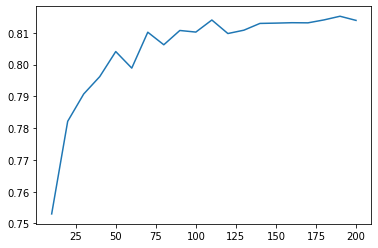

In [19]:
plt.plot(list(range(10,210,10)),r)

In [20]:
rf.feature_importances_

array([1.14524467e-01, 1.98558109e-02, 1.22056791e-03, 1.35494362e-02,
       1.25378020e-02, 1.39373639e-02, 3.01335718e-02, 1.14078624e-02,
       1.88641090e-02, 1.85713872e-02, 6.06572157e-03, 1.18408910e-02,
       2.05506168e-02, 1.93158988e-02, 2.71894261e-02, 1.63502772e-02,
       1.66643744e-02, 2.66677492e-03, 1.99838217e-02, 9.23511636e-03,
       7.60656866e-03, 2.04056672e-02, 5.10069789e-03, 8.85852280e-04,
       1.35974735e-02, 7.78646039e-03, 1.34782000e-02, 2.09917182e-02,
       7.97997029e-03, 2.02073802e-02, 2.03228554e-02, 1.11373348e-02,
       5.21662574e-06, 1.45717913e-03, 6.54820570e-03, 1.18782934e-02,
       2.04645341e-04, 1.25477854e-03, 1.95463873e-05, 1.32934985e-02,
       2.40462008e-02, 3.79136119e-03, 1.32875516e-04, 1.04279651e-06,
       1.33579712e-03, 1.93393136e-02, 8.89144960e-03, 2.48470000e-08,
       5.14412318e-04, 2.15007594e-02, 2.58707377e-02, 5.55783972e-08,
       2.24409374e-02, 2.19073257e-02, 2.13664698e-02, 2.21354214e-02,
      

# 2. Rank input attributes in the data. Create a plot that shows dependency between number of selected top attributes  and AUC of learned model. You can use any attribute selection method and two different classification methods of your choice. Use highUtilizationPredictionV2wco dataset. For all questions below, make sure sufficient detail are provided in areas where learning curves are "interesting".

In [21]:
res = pd.DataFrame()

In [22]:
res['features'] = features

In [23]:
res['vals'] = rf.feature_importances_

In [24]:
res.sort_values('vals',ascending=False)

features          vals
0            age  1.145245e-01
6          ELIX6  3.013357e-02
14        ELIX14  2.718943e-02
50          G-22  2.587074e-02
63  drugs_m11-12  2.544880e-02
62  drugs_m10-11  2.418314e-02
40          G-12  2.404620e-02
61   drugs_m9-10  2.269196e-02
52    drugs_m0-1  2.244094e-02
55    drugs_m3-4  2.213542e-02
60    drugs_m8-9  2.192221e-02
53    drugs_m1-2  2.190733e-02
49          G-21  2.150076e-02
54    drugs_m2-3  2.136647e-02
59    drugs_m7-8  2.135846e-02
58    drugs_m6-7  2.128710e-02
27        ELIX27  2.099172e-02
56    drugs_m4-5  2.087727e-02
57    drugs_m5-6  2.074180e-02
12        ELIX12  2.055062e-02
21        ELIX21  2.040567e-02
30           G-2  2.032286e-02
29        ELIX29  2.020738e-02
18        ELIX18  1.998382e-02
1          ELIX1  1.985581e-02
45          G-17  1.933931e-02
13        ELIX13  1.931590e-02
8          ELIX8  1.886411e-02
9          ELIX9  1.857139e-02
16        ELIX16  1.666437e-02
..           ...           ...
31           G-3  1.113733e-02
66             B  1.069186e-02
19        ELIX19  9.235116e-03
46          G-18  8.891450e-03
28        ELIX28  7.979970e-03
25        ELIX25  7.786460e-03
20        ELIX20  7.606569e-03
34           G-6  6.548206e-03
10        ELIX10  6.065722e-03
64             A  5.527948e-03
22        ELIX22  5.100698e-03
67             H  4.308999e-03
41          G-13  3.791361e-03
68             O  3.708376e-03
17        ELIX17  2.666775e-03
33           G-5  1.457179e-03
44          G-16  1.335797e-03
37           G-9  1.254779e-03
2          ELIX2  1.220568e-03
69             U  1.189256e-03
23        ELIX23  8.858523e-04
65          Am.N  8.506208e-04
48          G-20  5.144123e-04
36           G-8  2.046453e-04
42          G-14  1.328755e-04
38          G-10  1.954639e-05
32           G-4  5.216626e-06
43          G-15  1.042797e-06
51          G-23  5.557840e-08
47          G-19  2.484700e-08

[71 rows x 2 columns]

In [25]:
r_auc = []
for i in range(1,len(res.index)):
    c = list(res[:i]['features'])
    print(c)
    rf = RandomForestClassifier(n_estimators=150,n_jobs=-1)
    rf.fit(X_train[c],y_train)
    probs = rf.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    r_auc.append(a)

['age']
0.5269071847401477
['age', 'ELIX1']
0.5900871601947588
['age', 'ELIX1', 'ELIX2']
0.5914822848067249
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5950737083590686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6112006385009666
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6195888567142868
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.7016863965604371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6910469651150665
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6764784265282714
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6791070130828528
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6780507752653068
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6755683540953099
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7793416541667001
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7852400715506108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7841773203814963
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20'

0.8105779235884396
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.8100204544907632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17'

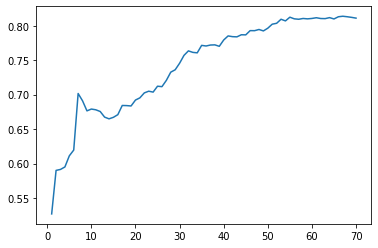

In [26]:
plt.plot(list(range(1,len(res.index),1)),r_auc)

In [27]:
log_auc= []
for i in range(1,len(res.index)):
    c = list(res[:i]['features'])
    print(c)
    log = LogisticRegression()
    log.fit(X_train[c],y_train)
    probs = log.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    log_auc.append(a)

['age']
0.5267488429175324
['age', 'ELIX1']
0.5854199748129015
['age', 'ELIX1', 'ELIX2']
0.5867371638043749
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6001156200117111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6208227678535618
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6352999430482806
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7255028997248671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.72915815733113
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7364334587340676
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.759854652795046
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7623389990935854
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7626432496169796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.764612736329582
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7682208924575069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.778500517378296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7782477159151981
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7805561856786479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7811811144889987
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7810550827404206
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7822738334924239
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7820629677460755
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.786725965973353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7878108721634434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7872234031459808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7877058243159778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7885442819671604
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7890508955858407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948930029598851
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.796553650926067
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.799697690647886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022982505394369
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802567800620854
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010098261769353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8016716051561359
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8103657583803252
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8122412346491051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113006168432705
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.810487667145275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113816968403826
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8183732342961649
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8173614509052115
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172337186264207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8189387087200302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8195968780832138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8181450744784105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8198559843422879
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.823157291023286
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8229818476421187
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8228695163916675
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8234150817778562
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8207509284734533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8215315680974116
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8228527517306103
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8168678319041928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8209856016427763
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8189509974572261
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172733762743949
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.82168585110735
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.819537872893388
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8182385073836701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8183121595931562
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8178711126440839
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151909647300408
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8176280651656013
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8179605188221423
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124533998572196
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134614934184667
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134694506164422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8156583538546689
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8131648150673394


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


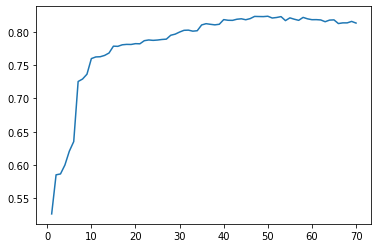

In [28]:
plt.plot(list(range(1,len(res.index),1)),log_auc)

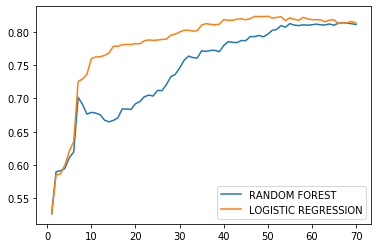

In [29]:
plt.plot(list(range(1,len(res.index),1)),r_auc)
plt.plot(list(range(1,len(res.index),1)),log_auc)
plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION'])

In [30]:
X_train.shape

(90419, 71)

# 3. Create a learning curve for the data to check AUC (y axis) based on size of data (x axis).# 

In [31]:
df1 = shuffle(X)
df1.head

<bound method NDFrame.head of         age  ELIX1  ELIX2  ELIX3  ELIX4  ELIX5  ELIX6  ELIX7  ELIX8  ELIX9  \
3484     72      0      0      0      0      0      1      0      0      1   
52343    77      0      0      0      0      0      0      0      0      0   
5627     76      0      0      1      0      0      1      0      1      0   
520      90      0      0      0      0      0      0      0      1      0   
41761    88      1      0      0      0      0      1      0      1      0   
39873    74      0      0      0      0      0      1      0      1      1   
5678     78      1      0      1      0      0      0      0      0      1   
111521   68      0      0      0      0      0      0      0      0      0   
112465   77      0      0      0      0      0      0      0      1      0   
9947     77      0      0      0      1      1      1      0      1      0   
79113    86      0      0      0      1      0      0      0      0      0   
86005    87      0      0      0  

In [32]:
sz=X.index.size

In [33]:
tr_x = X[:int(sz*0.8)]
ts_x = X[int(sz*0.8):]

tr_y = Y[:int(sz*0.8)]
ts_y = Y[int(sz*0.8):]


In [34]:
r = []
sz = []
for i in range(1, 1000, 5):
    s = int(i/1000.0*len(tr_x.index))
    print(s)
    sz.append(s)
    rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rf.fit(tr_x[:s],tr_y[:s])
    probs = rf.predict_proba(ts_x)[:,1]
    fpr, tpr, thresholds = roc_curve(ts_y, probs)
    a=auc(fpr,tpr)
    print(a)
    r.append(a)

90
0.7282947525349428
542
0.7403025679568613
994
0.7625490374218212
1446
0.7812194323947079
1898
0.7885401147457624
2350
0.7928151978792435
2802
0.7811750310224308
3255
0.789311781656195
3707
0.7892057939059661
4159
0.7892254013958842
4611
0.7912488423289223
5063
0.7915894696268275
5515
0.7936218526157984
5967
0.7914141565556944
6419
0.7954429754687864
6871
0.7895918793645769
7323
0.7934517259371063
7776
0.7919242927175181
8228
0.7936766755478084
8680
0.7934526364009832
9132
0.7909240018243094
9584
0.7932615202782742
10036
0.7937380993429248
10488
0.7967388419562825
10940
0.7938448674907622
11392
0.7897131824178758
11844
0.7939439779870645
12296
0.7904817927710079
12749
0.7921787511127982
13201
0.7940162623155683
13653
0.7921281065596515
14105
0.7978352680799103
14557
0.7928961478728604
15009
0.8010462790739568
15461
0.7980415694394215
15913
0.7960156572472892
16365
0.7936102279430859
16817
0.7948812029985217
17270
0.7956776637913134
17722
0.7925060953930723
18174
0.7921690449175403
18

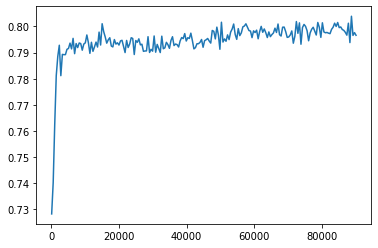

In [35]:
plt.plot(sz,r)

# 4. Create more learning curves (on one plot) for different numbers of input attributes. Do it for random forest, logistic regression, and naïve Bayes. 

# a. Use random selection of input attributes (repeat 10 times and compare) 

In [73]:
rf = RandomForestClassifier(n_estimators=150,n_jobs=-1)
log = LogisticRegression()
nB = GaussianNB()

# 1. Randomly selecting all attributes 

In [124]:
rF_auc = []
nB_auc= []
log_auc = []
for i in range(1,len(features)+1,1):
    c = random.choices(features,k= i)
    #c = list(res[:i]['features'])
    print(c)
    rf.fit(X_train[c],y_train)
    probs = rf.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    rF_auc.append(a)
    
    log.fit(X_train[c],y_train)
    probs = log.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    log_auc.append(a)
    
    nB.fit(X_train[c],y_train)
    probs = nB.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    nB_auc.append(a)

['ELIX1']
0.5807585006457202
0.5807585006457202
0.5807585006457202
['ELIX6', 'H']
0.6652978414496218
0.6652978414496218
0.6575969101686894
['W', 'G-7', 'G-8']
0.5714843061916948
0.5705258488613668
0.5706186400571123
['O', 'ELIX19', 'ELIX21', 'ELIX27']
0.6891364194213383
0.6901412402640634
0.6787215060922296
['ELIX16', 'G-11', 'drugs_m8-9', 'ELIX17', 'H']
0.7208770885639343
0.7226882494966591
0.7069220242726624
['G-20', 'ELIX17', 'ELIX5', 'G-2', 'drugs_m11-12', 'ELIX28']
0.6916659581124115
0.6878422838441609
0.6831739915133918
['ELIX29', 'ELIX13', 'A', 'O', 'G-21', 'ELIX7', 'ELIX10']
0.7100789623557157
0.709172964778169
0.6987602332614085
['ELIX10', 'drugs_m1-2', 'G-17', 'ELIX20', 'G-4', 'ELIX18', 'ELIX25', 'G-15']
0.7430988152438095
0.7409629813824027
0.724554212421892
['drugs_m11-12', 'G-12', 'ELIX7', 'ELIX11', 'ELIX21', 'ELIX11', 'ELIX15', 'ELIX7', 'ELIX25']
0.7190364410790347
0.7246376025732553
0.7082128550458422
['G-11', 'G-13', 'drugs_m9-10', 'ELIX11', 'G-15', 'A', 'ELIX10', 'ELIX

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.78728619442194
0.7620904970842324
['Am.N', 'G-18', 'U', 'ELIX21', 'ELIX28', 'ELIX4', 'A', 'G-14', 'drugs_m8-9', 'drugs_m3-4', 'G-12', 'ELIX17', 'G-18', 'drugs_m0-1', 'age']
0.6853725364370684


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7511993390392004
0.7382859297167654
['G-15', 'drugs_m0-1', 'drugs_m3-4', 'G-18', 'ELIX19', 'drugs_m6-7', 'G-22', 'drugs_m8-9', 'G-23', 'ELIX26', 'ELIX27', 'ELIX23', 'ELIX14', 'Am.N', 'G-3', 'H']
0.7323485124371325
0.7798256475250066
0.7489727514097556
['G-5', 'drugs_m3-4', 'G-19', 'drugs_m9-10', 'O', 'ELIX11', 'G-13', 'G-16', 'ELIX15', 'ELIX11', 'ELIX14', 'ELIX26', 'drugs_m9-10', 'G-4', 'G-11', 'ELIX6', 'ELIX27']
0.7575206429929331


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992780126256347
0.774371694193331
['G-14', 'ELIX12', 'Am.N', 'drugs_m7-8', 'drugs_m6-7', 'G-4', 'ELIX1', 'ELIX8', 'drugs_m3-4', 'W', 'G-10', 'drugs_m10-11', 'ELIX27', 'ELIX11', 'G-22', 'H', 'G-8', 'drugs_m2-3']
0.731351729006072


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7635114023759295
0.7296191133178789
['drugs_m1-2', 'ELIX20', 'ELIX6', 'G-18', 'ELIX19', 'G-9', 'drugs_m6-7', 'G-13', 'G-11', 'ELIX9', 'ELIX29', 'G-8', 'G-15', 'G-21', 'G-19', 'G-17', 'Am.N', 'ELIX9', 'G-6']
0.7479583370097941


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8099661498231289
0.7908737516744607
['drugs_m5-6', 'drugs_m11-12', 'ELIX20', 'drugs_m11-12', 'ELIX23', 'ELIX4', 'drugs_m9-10', 'G-6', 'G-13', 'G-7', 'G-6', 'ELIX11', 'ELIX14', 'ELIX20', 'ELIX20', 'drugs_m6-7', 'drugs_m1-2', 'ELIX28', 'G-13', 'ELIX12']
0.7351873551140238
0.7677539204440631
0.7484772554084079
['ELIX13', 'G-19', 'ELIX18', 'G-10', 'H', 'G-2', 'ELIX15', 'drugs_m2-3', 'drugs_m1-2', 'H', 'drugs_m0-1', 'O', 'G-18', 'drugs_m4-5', 'ELIX29', 'ELIX9', 'H', 'drugs_m3-4', 'ELIX25', 'ELIX7', 'G-23']
0.7386280892297079
0.7759809572701677
0.7435315199691979
['drugs_m7-8', 'ELIX8', 'ELIX22', 'ELIX11', 'drugs_m3-4', 'O', 'drugs_m7-8', 'G-11', 'drugs_m4-5', 'G-18', 'W', 'G-3', 'ELIX10', 'ELIX17', 'ELIX27', 'ELIX5', 'drugs_m2-3', 'G-4', 'G-21', 'ELIX6', 'ELIX13', 'drugs_m4-5']
0.7521194702687961
0.8044443036248565
0.7768740725292178
['G-20', 'Am.N', 'G-16', 'ELIX13', 'G-9', 'G-6', 'ELIX20', 'drugs_m5-6', 'drugs_m4-5', 'ELIX27', 'G-7', 'ELIX16', 'ELIX2', 'drugs_m6-7', 'age', 'H', 'ELIX24'

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7791298418988185
0.7614108464950627
['H', 'drugs_m9-10', 'G-23', 'G-18', 'drugs_m11-12', 'ELIX13', 'ELIX28', 'G-8', 'ELIX15', 'G-9', 'ELIX22', 'G-4', 'G-16', 'ELIX10', 'ELIX22', 'drugs_m8-9', 'ELIX20', 'drugs_m5-6', 'G-8', 'ELIX1', 'ELIX11', 'ELIX15', 'ELIX24', 'ELIX5']
0.6899434172635902


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.740845660840479
0.7232800340106043
['ELIX13', 'H', 'drugs_m7-8', 'ELIX18', 'H', 'G-3', 'G-3', 'ELIX25', 'G-18', 'G-9', 'ELIX4', 'drugs_m2-3', 'ELIX11', 'G-9', 'O', 'ELIX26', 'ELIX12', 'G-23', 'drugs_m3-4', 'drugs_m9-10', 'G-18', 'G-16', 'drugs_m2-3', 'G-18', 'G-4']
0.7067081906198112


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7521597696262843
0.7363258921767589
['ELIX16', 'drugs_m1-2', 'ELIX6', 'W', 'G-17', 'G-21', 'G-21', 'ELIX19', 'ELIX26', 'ELIX14', 'ELIX26', 'G-14', 'ELIX6', 'ELIX18', 'age', 'H', 'H', 'drugs_m5-6', 'ELIX24', 'ELIX25', 'ELIX26', 'drugs_m7-8', 'G-4', 'G-10', 'U', 'W']
0.7165499129681471


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7901292082106731
0.7567075168248213
['drugs_m6-7', 'drugs_m3-4', 'ELIX20', 'ELIX10', 'drugs_m5-6', 'U', 'ELIX22', 'drugs_m5-6', 'ELIX13', 'G-10', 'ELIX10', 'drugs_m9-10', 'ELIX11', 'ELIX22', 'ELIX11', 'G-20', 'G-20', 'ELIX22', 'drugs_m3-4', 'drugs_m6-7', 'age', 'ELIX24', 'ELIX11', 'ELIX13', 'ELIX15', 'drugs_m11-12', 'G-9']
0.6469190884516353


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6706679073050607
0.6819694546271267
['drugs_m10-11', 'G-6', 'G-9', 'ELIX17', 'ELIX7', 'ELIX4', 'ELIX17', 'ELIX22', 'G-16', 'ELIX22', 'G-10', 'G-23', 'G-23', 'G-11', 'H', 'G-13', 'ELIX13', 'ELIX28', 'G-3', 'H', 'ELIX1', 'G-5', 'drugs_m8-9', 'O', 'G-21', 'A', 'G-22', 'ELIX13']
0.7318346154154668


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7915482204593036
0.7755884235603648
['ELIX20', 'G-4', 'ELIX21', 'G-9', 'drugs_m3-4', 'G-13', 'ELIX16', 'G-23', 'ELIX20', 'drugs_m4-5', 'ELIX20', 'ELIX16', 'ELIX25', 'age', 'ELIX16', 'ELIX6', 'G-12', 'ELIX17', 'drugs_m7-8', 'ELIX29', 'age', 'Am.N', 'ELIX1', 'ELIX16', 'ELIX18', 'G-4', 'ELIX4', 'ELIX29', 'G-3']
0.7141758123641381


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7815542204432608
0.769185782925714
['G-15', 'G-6', 'G-5', 'drugs_m4-5', 'ELIX14', 'drugs_m5-6', 'drugs_m3-4', 'drugs_m4-5', 'G-5', 'ELIX21', 'ELIX26', 'drugs_m4-5', 'ELIX13', 'G-6', 'G-19', 'drugs_m1-2', 'ELIX19', 'ELIX6', 'drugs_m6-7', 'ELIX28', 'ELIX6', 'ELIX17', 'ELIX19', 'G-4', 'G-4', 'G-10', 'G-4', 'drugs_m2-3', 'G-11', 'G-22']
0.7813455846374743
0.810296710436603
0.7844203036890275
['ELIX26', 'drugs_m5-6', 'drugs_m10-11', 'G-16', 'G-23', 'G-12', 'ELIX15', 'age', 'drugs_m7-8', 'ELIX25', 'G-11', 'Am.N', 'ELIX20', 'G-17', 'ELIX9', 'G-7', 'ELIX13', 'ELIX17', 'ELIX29', 'G-18', 'ELIX22', 'ELIX13', 'ELIX10', 'ELIX5', 'G-8', 'G-23', 'G-20', 'H', 'ELIX19', 'A', 'ELIX11']
0.7290930398581821


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.792664570415587
0.7676334234400441
['G-20', 'G-19', 'ELIX26', 'H', 'ELIX5', 'ELIX17', 'drugs_m4-5', 'G-13', 'U', 'G-2', 'age', 'G-4', 'G-22', 'G-12', 'ELIX14', 'A', 'ELIX23', 'W', 'ELIX5', 'G-12', 'ELIX5', 'drugs_m8-9', 'drugs_m8-9', 'U', 'ELIX13', 'U', 'ELIX6', 'G-4', 'G-14', 'ELIX15', 'ELIX27', 'ELIX3']
0.737284670361844


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803089221686573
0.7828693399215509
['U', 'ELIX25', 'ELIX7', 'G-17', 'G-10', 'drugs_m2-3', 'G-7', 'ELIX26', 'G-6', 'ELIX20', 'ELIX19', 'ELIX14', 'ELIX27', 'A', 'ELIX6', 'ELIX29', 'ELIX19', 'G-5', 'ELIX10', 'ELIX16', 'G-4', 'ELIX13', 'Am.N', 'ELIX9', 'ELIX15', 'G-14', 'G-16', 'ELIX21', 'G-9', 'ELIX8', 'ELIX21', 'ELIX26', 'G-22']
0.7382321544594801


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.815512990606977
0.7879121660102514
['ELIX13', 'ELIX3', 'ELIX1', 'ELIX7', 'drugs_m11-12', 'G-8', 'G-23', 'G-19', 'drugs_m6-7', 'ELIX9', 'ELIX25', 'ELIX22', 'ELIX29', 'G-10', 'ELIX8', 'drugs_m8-9', 'ELIX3', 'ELIX6', 'ELIX8', 'G-11', 'B', 'ELIX20', 'G-15', 'ELIX25', 'O', 'G-9', 'G-2', 'drugs_m10-11', 'Am.N', 'G-6', 'drugs_m4-5', 'G-5', 'G-14', 'ELIX6']
0.7590779757273377


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8104533998572196
0.7830867029767301
['G-16', 'age', 'ELIX28', 'ELIX6', 'G-20', 'U', 'age', 'G-6', 'ELIX16', 'ELIX13', 'drugs_m5-6', 'ELIX12', 'H', 'G-9', 'ELIX25', 'ELIX7', 'ELIX28', 'G-12', 'ELIX3', 'G-19', 'G-4', 'ELIX5', 'ELIX12', 'G-8', 'ELIX4', 'ELIX17', 'G-23', 'ELIX3', 'ELIX4', 'ELIX19', 'ELIX1', 'drugs_m2-3', 'drugs_m3-4', 'age', 'ELIX10']
0.7252984671163981


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7837391771679755
0.7619713637129313
['G-19', 'ELIX6', 'drugs_m7-8', 'drugs_m2-3', 'drugs_m8-9', 'H', 'age', 'G-13', 'ELIX24', 'G-5', 'ELIX8', 'ELIX20', 'B', 'G-17', 'ELIX9', 'age', 'ELIX23', 'G-4', 'drugs_m4-5', 'drugs_m1-2', 'drugs_m8-9', 'G-7', 'ELIX22', 'ELIX10', 'ELIX22', 'ELIX11', 'drugs_m9-10', 'ELIX3', 'ELIX26', 'ELIX29', 'ELIX4', 'G-10', 'G-9', 'ELIX21', 'drugs_m7-8', 'G-16']
0.7360563581380799


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7924472073604081
0.7735256322844056
['G-14', 'G-21', 'G-20', 'G-14', 'drugs_m2-3', 'G-13', 'A', 'G-7', 'G-17', 'ELIX18', 'ELIX7', 'ELIX20', 'G-18', 'Am.N', 'ELIX25', 'ELIX21', 'G-5', 'ELIX9', 'G-22', 'ELIX7', 'G-19', 'ELIX9', 'ELIX9', 'G-20', 'G-22', 'ELIX4', 'ELIX27', 'G-14', 'ELIX22', 'G-21', 'ELIX15', 'drugs_m10-11', 'drugs_m9-10', 'G-13', 'drugs_m6-7', 'ELIX2', 'G-2']
0.7535836909526981


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8084093946272871
0.7907355114023759
['drugs_m8-9', 'ELIX29', 'G-12', 'G-10', 'G-11', 'ELIX6', 'ELIX10', 'ELIX12', 'A', 'ELIX29', 'drugs_m1-2', 'ELIX8', 'G-11', 'ELIX27', 'G-7', 'drugs_m10-11', 'ELIX12', 'G-22', 'G-2', 'O', 'drugs_m3-4', 'ELIX12', 'G-2', 'drugs_m0-1', 'G-15', 'G-17', 'G-12', 'ELIX2', 'drugs_m5-6', 'ELIX2', 'G-19', 'drugs_m8-9', 'G-23', 'G-17', 'G-3', 'drugs_m10-11', 'ELIX2', 'drugs_m8-9']
0.7710320614116005


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8084027850192914
0.7858918719468664
['G-13', 'ELIX21', 'U', 'ELIX10', 'ELIX16', 'ELIX25', 'drugs_m3-4', 'drugs_m2-3', 'A', 'ELIX21', 'ELIX17', 'G-19', 'G-7', 'drugs_m10-11', 'ELIX4', 'drugs_m11-12', 'ELIX26', 'ELIX14', 'G-5', 'G-7', 'G-10', 'G-6', 'ELIX3', 'drugs_m2-3', 'G-7', 'H', 'G-16', 'G-17', 'G-9', 'ELIX9', 'ELIX7', 'age', 'ELIX12', 'G-3', 'G-9', 'W', 'ELIX12', 'G-23', 'drugs_m10-11']
0.7268197839043211


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7926510624303144
0.7774494292796008
['ELIX21', 'G-21', 'G-12', 'G-4', 'ELIX28', 'ELIX22', 'G-7', 'W', 'ELIX13', 'G-2', 'drugs_m9-10', 'G-9', 'drugs_m7-8', 'ELIX2', 'G-6', 'drugs_m8-9', 'G-23', 'G-18', 'H', 'ELIX19', 'drugs_m3-4', 'W', 'drugs_m5-6', 'drugs_m5-6', 'ELIX21', 'ELIX6', 'drugs_m2-3', 'G-23', 'ELIX29', 'ELIX17', 'G-18', 'W', 'Am.N', 'ELIX22', 'G-4', 'drugs_m4-5', 'ELIX4', 'ELIX17', 'ELIX2', 'ELIX9']
0.7593119751016709


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047352065903566
0.7810782484538812
['ELIX25', 'ELIX9', 'G-23', 'drugs_m5-6', 'G-3', 'G-10', 'G-20', 'ELIX26', 'G-6', 'ELIX25', 'ELIX17', 'ELIX18', 'G-21', 'ELIX15', 'ELIX29', 'ELIX6', 'ELIX7', 'G-2', 'H', 'drugs_m2-3', 'ELIX17', 'drugs_m6-7', 'G-5', 'drugs_m5-6', 'ELIX19', 'G-14', 'ELIX6', 'ELIX15', 'G-17', 'drugs_m11-12', 'ELIX29', 'W', 'drugs_m4-5', 'G-10', 'age', 'G-14', 'drugs_m7-8', 'W', 'G-2', 'H', 'age']
0.7377599043852824


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7935144504961217
0.775594102689565
['G-21', 'drugs_m8-9', 'ELIX6', 'ELIX16', 'ELIX7', 'ELIX22', 'ELIX16', 'ELIX2', 'ELIX18', 'ELIX28', 'drugs_m2-3', 'ELIX21', 'drugs_m10-11', 'drugs_m5-6', 'drugs_m6-7', 'G-17', 'G-14', 'drugs_m6-7', 'G-2', 'G-5', 'G-6', 'drugs_m11-12', 'G-7', 'ELIX21', 'ELIX13', 'G-14', 'G-12', 'ELIX15', 'drugs_m2-3', 'ELIX14', 'ELIX10', 'G-10', 'ELIX15', 'G-6', 'G-20', 'A', 'G-15', 'G-11', 'ELIX21', 'ELIX29', 'G-14', 'ELIX19']
0.774316122149406


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8204176566372816
0.7997161077109419
['U', 'W', 'G-7', 'ELIX21', 'G-10', 'drugs_m3-4', 'ELIX22', 'B', 'Am.N', 'drugs_m6-7', 'A', 'ELIX5', 'G-10', 'ELIX10', 'ELIX8', 'ELIX26', 'U', 'Am.N', 'ELIX15', 'drugs_m9-10', 'A', 'G-19', 'drugs_m1-2', 'U', 'ELIX9', 'ELIX5', 'ELIX29', 'H', 'drugs_m6-7', 'G-8', 'Am.N', 'drugs_m2-3', 'ELIX23', 'ELIX9', 'G-12', 'G-20', 'B', 'G-16', 'drugs_m9-10', 'ELIX6', 'ELIX23', 'drugs_m3-4', 'B']
0.74559070162914


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.788837992411785
0.7478485405119237
['G-13', 'drugs_m1-2', 'ELIX29', 'A', 'Am.N', 'G-2', 'drugs_m1-2', 'ELIX29', 'G-20', 'ELIX25', 'G-11', 'Am.N', 'ELIX26', 'G-17', 'G-9', 'A', 'G-19', 'ELIX29', 'G-14', 'ELIX24', 'ELIX4', 'ELIX7', 'drugs_m6-7', 'A', 'G-13', 'ELIX27', 'ELIX4', 'O', 'ELIX16', 'G-11', 'drugs_m7-8', 'G-11', 'G-8', 'G-2', 'ELIX26', 'ELIX19', 'G-13', 'ELIX19', 'ELIX17', 'G-2', 'drugs_m11-12', 'ELIX17', 'ELIX29', 'drugs_m8-9']
0.7448189817674284


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7901935235467286
0.7704585977042842
['O', 'ELIX11', 'H', 'ELIX18', 'ELIX20', 'G-7', 'ELIX9', 'G-13', 'ELIX18', 'drugs_m7-8', 'ELIX1', 'H', 'ELIX14', 'G-15', 'G-18', 'G-13', 'O', 'ELIX28', 'ELIX19', 'ELIX12', 'G-15', 'G-13', 'G-10', 'G-3', 'W', 'G-6', 'ELIX17', 'G-17', 'G-10', 'drugs_m2-3', 'ELIX5', 'G-15', 'G-2', 'ELIX11', 'G-7', 'G-9', 'ELIX8', 'G-13', 'ELIX7', 'G-23', 'B', 'G-10', 'G-18', 'G-12', 'G-9']
0.7467090569276552


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8093666808377518
0.7844535442418603
['ELIX16', 'ELIX19', 'G-16', 'ELIX19', 'ELIX22', 'ELIX8', 'drugs_m5-6', 'G-18', 'drugs_m6-7', 'ELIX11', 'ELIX24', 'U', 'ELIX15', 'ELIX18', 'U', 'G-12', 'ELIX18', 'G-11', 'drugs_m4-5', 'drugs_m6-7', 'ELIX9', 'ELIX29', 'G-19', 'ELIX24', 'G-3', 'drugs_m0-1', 'ELIX24', 'G-23', 'ELIX1', 'ELIX22', 'G-11', 'drugs_m0-1', 'G-19', 'ELIX23', 'G-21', 'G-8', 'G-16', 'ELIX18', 'ELIX4', 'G-3', 'G-3', 'drugs_m5-6', 'drugs_m4-5', 'G-13', 'ELIX17', 'ELIX4']
0.7382066946345063


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8020160266951158
0.7754904184748169
['ELIX9', 'G-8', 'U', 'drugs_m7-8', 'ELIX5', 'ELIX7', 'drugs_m9-10', 'G-6', 'ELIX24', 'G-22', 'A', 'G-18', 'G-2', 'ELIX21', 'ELIX21', 'U', 'ELIX23', 'G-14', 'ELIX3', 'G-12', 'drugs_m0-1', 'drugs_m10-11', 'ELIX16', 'G-22', 'drugs_m6-7', 'ELIX6', 'ELIX9', 'drugs_m3-4', 'G-4', 'G-12', 'G-18', 'W', 'ELIX29', 'drugs_m0-1', 'ELIX21', 'G-19', 'ELIX27', 'drugs_m4-5', 'ELIX25', 'G-13', 'G-19', 'ELIX29', 'ELIX2', 'G-17', 'G-6', 'ELIX16', 'drugs_m2-3']
0.7688348480351657


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8199797861503044
0.7998958986740679
['G-8', 'ELIX6', 'ELIX6', 'ELIX22', 'drugs_m8-9', 'drugs_m1-2', 'drugs_m2-3', 'G-10', 'drugs_m0-1', 'G-11', 'drugs_m4-5', 'age', 'G-3', 'A', 'G-21', 'G-4', 'O', 'ELIX16', 'G-18', 'drugs_m5-6', 'ELIX3', 'B', 'G-12', 'drugs_m9-10', 'ELIX20', 'ELIX9', 'drugs_m8-9', 'drugs_m2-3', 'ELIX28', 'G-18', 'ELIX22', 'drugs_m10-11', 'G-23', 'G-20', 'G-2', 'drugs_m1-2', 'ELIX25', 'drugs_m10-11', 'G-22', 'ELIX28', 'G-21', 'Am.N', 'W', 'ELIX29', 'G-23', 'Am.N', 'ELIX15', 'ELIX20']
0.7600931120505026


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8008894093866059
0.7766545276616907
['ELIX19', 'G-18', 'ELIX5', 'G-4', 'G-23', 'drugs_m10-11', 'ELIX6', 'G-5', 'ELIX2', 'G-9', 'G-17', 'G-3', 'H', 'ELIX11', 'G-22', 'ELIX26', 'ELIX19', 'W', 'ELIX16', 'G-18', 'ELIX7', 'ELIX17', 'G-16', 'drugs_m1-2', 'ELIX10', 'G-23', 'G-3', 'G-10', 'ELIX19', 'drugs_m4-5', 'ELIX18', 'drugs_m2-3', 'ELIX6', 'G-13', 'G-22', 'drugs_m7-8', 'drugs_m6-7', 'ELIX13', 'ELIX21', 'G-10', 'G-4', 'ELIX8', 'ELIX27', 'G-20', 'ELIX23', 'ELIX23', 'B', 'G-14', 'G-14']
0.7606917468135111


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8162677212093016
0.7903839668877891
['G-21', 'ELIX1', 'G-13', 'drugs_m0-1', 'drugs_m7-8', 'G-9', 'ELIX3', 'O', 'drugs_m6-7', 'ELIX25', 'drugs_m10-11', 'ELIX19', 'drugs_m1-2', 'G-18', 'G-14', 'H', 'drugs_m11-12', 'G-12', 'A', 'G-5', 'ELIX4', 'G-2', 'drugs_m5-6', 'G-8', 'ELIX25', 'ELIX15', 'G-11', 'G-11', 'drugs_m5-6', 'ELIX26', 'G-3', 'ELIX4', 'W', 'drugs_m8-9', 'ELIX25', 'G-10', 'G-14', 'G-2', 'G-11', 'ELIX12', 'ELIX15', 'ELIX1', 'H', 'H', 'drugs_m8-9', 'G-6', 'ELIX20', 'G-2', 'drugs_m8-9', 'drugs_m6-7']
0.7420691923283627


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7867914524292716
0.7707960566950356
['ELIX25', 'drugs_m8-9', 'A', 'ELIX5', 'ELIX7', 'W', 'G-21', 'G-23', 'G-3', 'drugs_m8-9', 'drugs_m3-4', 'ELIX28', 'G-16', 'ELIX21', 'ELIX25', 'drugs_m1-2', 'A', 'ELIX20', 'ELIX16', 'drugs_m10-11', 'drugs_m9-10', 'G-3', 'ELIX22', 'ELIX26', 'G-18', 'drugs_m2-3', 'G-19', 'G-7', 'G-13', 'ELIX22', 'ELIX24', 'ELIX1', 'ELIX9', 'ELIX24', 'drugs_m9-10', 'G-4', 'G-11', 'drugs_m4-5', 'G-23', 'ELIX18', 'drugs_m6-7', 'G-5', 'ELIX18', 'G-9', 'G-13', 'G-21', 'ELIX22', 'G-13', 'G-6', 'ELIX26', 'ELIX26']
0.7459264600896788


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025485012072161
0.7749135216216
['ELIX13', 'ELIX1', 'ELIX2', 'ELIX7', 'drugs_m5-6', 'ELIX8', 'drugs_m1-2', 'drugs_m11-12', 'drugs_m1-2', 'G-20', 'ELIX5', 'G-20', 'H', 'G-11', 'Am.N', 'ELIX13', 'ELIX4', 'drugs_m8-9', 'drugs_m10-11', 'G-10', 'drugs_m5-6', 'G-20', 'G-5', 'Am.N', 'G-5', 'G-19', 'ELIX7', 'Am.N', 'ELIX5', 'G-9', 'ELIX27', 'ELIX26', 'G-10', 'G-10', 'G-3', 'ELIX21', 'G-8', 'age', 'G-10', 'ELIX9', 'G-18', 'G-12', 'ELIX27', 'ELIX14', 'ELIX26', 'G-17', 'H', 'G-16', 'drugs_m2-3', 'G-17', 'ELIX16', 'drugs_m4-5']
0.7563112932853121


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8062930526923725
0.7801265290734516
['drugs_m5-6', 'ELIX21', 'ELIX6', 'ELIX2', 'G-11', 'ELIX22', 'G-10', 'ELIX7', 'G-13', 'ELIX7', 'ELIX9', 'G-22', 'ELIX25', 'drugs_m1-2', 'G-19', 'ELIX14', 'ELIX1', 'G-9', 'ELIX2', 'drugs_m10-11', 'G-8', 'ELIX1', 'ELIX12', 'G-10', 'drugs_m8-9', 'G-8', 'ELIX18', 'Am.N', 'A', 'drugs_m3-4', 'A', 'U', 'G-21', 'G-6', 'ELIX6', 'ELIX21', 'G-15', 'age', 'drugs_m5-6', 'G-21', 'drugs_m8-9', 'drugs_m1-2', 'G-16', 'ELIX5', 'G-13', 'ELIX26', 'G-18', 'drugs_m8-9', 'drugs_m6-7', 'G-14', 'ELIX29', 'G-18', 'drugs_m2-3']
0.7670529490562861


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8043476300865506
0.7937285247900407
['ELIX1', 'ELIX23', 'ELIX20', 'ELIX12', 'ELIX12', 'drugs_m8-9', 'drugs_m0-1', 'ELIX11', 'G-8', 'G-4', 'ELIX5', 'ELIX13', 'G-6', 'ELIX26', 'A', 'drugs_m8-9', 'drugs_m9-10', 'O', 'Am.N', 'drugs_m6-7', 'G-13', 'G-5', 'ELIX16', 'ELIX6', 'drugs_m6-7', 'drugs_m11-12', 'G-12', 'G-13', 'ELIX12', 'U', 'G-4', 'ELIX5', 'ELIX2', 'O', 'ELIX23', 'G-2', 'ELIX9', 'Am.N', 'ELIX2', 'drugs_m7-8', 'ELIX6', 'ELIX20', 'G-5', 'H', 'O', 'ELIX5', 'ELIX25', 'G-15', 'G-5', 'drugs_m1-2', 'ELIX15', 'ELIX13', 'drugs_m7-8', 'ELIX27']
0.7706412603174857


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085274370924143
0.7734913008253989
['ELIX15', 'drugs_m0-1', 'G-11', 'G-21', 'ELIX23', 'G-15', 'ELIX26', 'drugs_m5-6', 'ELIX11', 'ELIX16', 'ELIX19', 'ELIX28', 'drugs_m0-1', 'drugs_m7-8', 'Am.N', 'ELIX7', 'G-11', 'drugs_m6-7', 'drugs_m11-12', 'G-10', 'G-4', 'ELIX2', 'drugs_m3-4', 'ELIX4', 'G-2', 'drugs_m8-9', 'ELIX1', 'drugs_m1-2', 'U', 'ELIX2', 'G-11', 'G-2', 'ELIX2', 'ELIX6', 'G-19', 'G-16', 'ELIX22', 'ELIX11', 'G-22', 'G-6', 'W', 'G-15', 'ELIX15', 'ELIX25', 'Am.N', 'G-10', 'G-5', 'ELIX18', 'ELIX12', 'G-17', 'drugs_m5-6', 'G-3', 'ELIX13', 'drugs_m5-6', 'ELIX3']
0.7645267793401622


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131584621431494
0.7870372111304516
['ELIX11', 'ELIX2', 'ELIX28', 'ELIX12', 'G-21', 'ELIX3', 'ELIX28', 'drugs_m1-2', 'ELIX2', 'G-9', 'ELIX22', 'ELIX9', 'ELIX14', 'ELIX12', 'ELIX26', 'ELIX29', 'ELIX25', 'U', 'O', 'drugs_m1-2', 'G-15', 'G-9', 'B', 'ELIX1', 'G-11', 'drugs_m4-5', 'ELIX8', 'G-16', 'ELIX13', 'drugs_m3-4', 'G-8', 'ELIX28', 'ELIX18', 'A', 'ELIX4', 'ELIX23', 'ELIX19', 'ELIX6', 'ELIX11', 'G-9', 'G-17', 'drugs_m10-11', 'ELIX25', 'G-11', 'ELIX27', 'drugs_m6-7', 'G-3', 'G-12', 'drugs_m2-3', 'drugs_m1-2', 'G-5', 'ELIX29', 'ELIX29', 'ELIX13', 'ELIX5', 'G-11']
0.7735927550995852


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8197950540239196
0.7866531319434975
['ELIX28', 'G-16', 'ELIX5', 'O', 'drugs_m8-9', 'G-11', 'G-2', 'G-10', 'ELIX15', 'ELIX20', 'G-9', 'G-5', 'ELIX7', 'ELIX6', 'ELIX11', 'G-11', 'G-16', 'ELIX29', 'ELIX20', 'ELIX15', 'G-11', 'G-6', 'G-11', 'drugs_m3-4', 'ELIX6', 'A', 'ELIX14', 'ELIX7', 'G-10', 'A', 'G-19', 'Am.N', 'G-14', 'G-5', 'ELIX27', 'G-14', 'U', 'G-10', 'ELIX3', 'G-19', 'A', 'G-7', 'ELIX24', 'Am.N', 'ELIX29', 'drugs_m9-10', 'G-17', 'G-22', 'ELIX7', 'G-5', 'ELIX8', 'drugs_m9-10', 'ELIX17', 'G-16', 'G-8', 'ELIX10', 'drugs_m3-4']
0.7574570495800814


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8156613859321231
0.7908858799842782
['ELIX9', 'drugs_m5-6', 'H', 'ELIX15', 'G-16', 'ELIX27', 'ELIX23', 'A', 'G-13', 'G-21', 'ELIX9', 'G-12', 'U', 'G-4', 'G-22', 'ELIX3', 'ELIX14', 'G-12', 'drugs_m6-7', 'age', 'G-19', 'ELIX12', 'ELIX8', 'drugs_m4-5', 'G-8', 'G-3', 'drugs_m7-8', 'G-11', 'G-18', 'G-6', 'ELIX2', 'ELIX8', 'B', 'ELIX2', 'ELIX23', 'G-22', 'G-4', 'W', 'G-3', 'G-12', 'G-8', 'G-19', 'G-3', 'ELIX4', 'G-22', 'G-14', 'drugs_m7-8', 'G-3', 'G-16', 'G-18', 'ELIX28', 'drugs_m0-1', 'drugs_m11-12', 'ELIX24', 'ELIX23', 'G-5', 'drugs_m10-11', 'G-8']
0.7531508097571932


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7982622827211692
0.7876094074614775
['ELIX5', 'ELIX5', 'drugs_m6-7', 'age', 'G-3', 'G-9', 'G-21', 'drugs_m8-9', 'drugs_m8-9', 'G-6', 'G-12', 'O', 'drugs_m5-6', 'ELIX7', 'ELIX23', 'U', 'ELIX1', 'ELIX26', 'G-16', 'age', 'G-7', 'drugs_m3-4', 'O', 'ELIX4', 'G-2', 'ELIX11', 'ELIX21', 'ELIX14', 'drugs_m9-10', 'ELIX2', 'drugs_m11-12', 'ELIX14', 'G-22', 'G-19', 'drugs_m4-5', 'ELIX27', 'G-21', 'G-2', 'W', 'ELIX2', 'G-19', 'ELIX13', 'ELIX11', 'ELIX27', 'ELIX7', 'G-21', 'ELIX22', 'ELIX23', 'age', 'G-11', 'ELIX26', 'G-23', 'ELIX29', 'W', 'drugs_m10-11', 'G-21', 'ELIX24', 'ELIX14', 'ELIX27']
0.7709369119333904


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995457659204119
0.7930981254060818
['drugs_m0-1', 'drugs_m7-8', 'G-16', 'G-22', 'ELIX17', 'ELIX11', 'G-4', 'ELIX29', 'ELIX26', 'H', 'ELIX27', 'ELIX1', 'O', 'ELIX28', 'drugs_m8-9', 'G-19', 'ELIX3', 'B', 'drugs_m4-5', 'G-13', 'ELIX8', 'ELIX8', 'ELIX10', 'ELIX14', 'G-6', 'G-19', 'G-8', 'G-5', 'G-20', 'A', 'ELIX10', 'ELIX19', 'ELIX14', 'G-15', 'ELIX7', 'H', 'ELIX19', 'ELIX14', 'drugs_m2-3', 'ELIX11', 'drugs_m9-10', 'W', 'G-20', 'ELIX6', 'G-15', 'drugs_m5-6', 'drugs_m1-2', 'ELIX21', 'G-18', 'G-3', 'ELIX15', 'G-10', 'ELIX1', 'ELIX6', 'G-4', 'drugs_m9-10', 'G-16', 'ELIX28', 'G-15', 'drugs_m8-9']
0.7652990767404365


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8181583418226154
0.7893063441006842
['ELIX14', 'G-7', 'age', 'G-21', 'drugs_m4-5', 'G-2', 'Am.N', 'G-20', 'G-16', 'drugs_m6-7', 'drugs_m2-3', 'G-13', 'Am.N', 'drugs_m4-5', 'ELIX3', 'drugs_m4-5', 'W', 'drugs_m11-12', 'G-18', 'ELIX2', 'drugs_m7-8', 'H', 'ELIX10', 'drugs_m4-5', 'G-17', 'G-10', 'G-15', 'ELIX27', 'drugs_m4-5', 'drugs_m5-6', 'ELIX17', 'A', 'G-4', 'ELIX14', 'ELIX22', 'O', 'ELIX4', 'drugs_m9-10', 'drugs_m7-8', 'A', 'O', 'G-19', 'G-18', 'ELIX23', 'ELIX22', 'ELIX13', 'G-3', 'drugs_m8-9', 'age', 'G-3', 'ELIX5', 'ELIX16', 'G-6', 'O', 'G-8', 'G-3', 'ELIX5', 'G-12', 'ELIX17', 'drugs_m6-7', 'G-18']
0.7508270673073068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794348480351657
0.7696043058708399
['ELIX8', 'ELIX10', 'ELIX10', 'drugs_m3-4', 'G-20', 'G-22', 'W', 'ELIX25', 'ELIX8', 'O', 'ELIX4', 'G-5', 'ELIX29', 'ELIX6', 'ELIX15', 'A', 'G-16', 'drugs_m7-8', 'ELIX20', 'ELIX9', 'H', 'ELIX24', 'ELIX7', 'ELIX3', 'ELIX2', 'drugs_m2-3', 'ELIX12', 'G-22', 'G-9', 'ELIX17', 'G-7', 'ELIX24', 'B', 'ELIX20', 'drugs_m10-11', 'drugs_m7-8', 'G-19', 'G-23', 'ELIX21', 'G-18', 'ELIX22', 'G-16', 'ELIX22', 'G-16', 'G-19', 'ELIX27', 'ELIX23', 'G-19', 'drugs_m4-5', 'ELIX18', 'G-2', 'G-15', 'ELIX21', 'ELIX7', 'drugs_m1-2', 'drugs_m1-2', 'G-7', 'drugs_m8-9', 'W', 'ELIX16', 'ELIX8', 'ELIX13']
0.7656355731669167


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8128146020999943
0.7797733000713901
['drugs_m2-3', 'G-5', 'ELIX26', 'drugs_m1-2', 'drugs_m9-10', 'A', 'ELIX25', 'ELIX16', 'G-20', 'G-11', 'drugs_m4-5', 'ELIX3', 'G-6', 'H', 'ELIX25', 'drugs_m10-11', 'A', 'G-2', 'ELIX8', 'ELIX5', 'ELIX11', 'G-23', 'ELIX22', 'Am.N', 'ELIX20', 'age', 'ELIX16', 'ELIX3', 'G-17', 'O', 'B', 'ELIX13', 'ELIX4', 'G-15', 'ELIX6', 'drugs_m6-7', 'ELIX11', 'ELIX5', 'A', 'G-18', 'ELIX6', 'ELIX11', 'drugs_m2-3', 'drugs_m7-8', 'ELIX11', 'drugs_m11-12', 'G-19', 'G-16', 'ELIX14', 'B', 'G-18', 'ELIX4', 'A', 'drugs_m1-2', 'G-22', 'H', 'ELIX23', 'G-13', 'ELIX24', 'ELIX16', 'ELIX5', 'G-8', 'ELIX22']
0.7626772120930159


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8043584268491261
0.7842853682209405
['drugs_m9-10', 'ELIX2', 'ELIX21', 'ELIX26', 'G-11', 'ELIX8', 'ELIX7', 'G-19', 'ELIX7', 'G-8', 'ELIX21', 'G-15', 'G-17', 'drugs_m2-3', 'ELIX1', 'B', 'G-7', 'drugs_m4-5', 'G-19', 'G-18', 'ELIX10', 'ELIX28', 'ELIX25', 'ELIX27', 'G-11', 'ELIX13', 'G-8', 'G-7', 'ELIX20', 'drugs_m6-7', 'ELIX3', 'ELIX25', 'A', 'G-2', 'ELIX12', 'ELIX28', 'G-20', 'G-4', 'ELIX24', 'ELIX29', 'drugs_m9-10', 'ELIX15', 'G-18', 'ELIX9', 'Am.N', 'G-13', 'G-5', 'G-8', 'G-21', 'H', 'G-21', 'drugs_m6-7', 'G-23', 'ELIX7', 'ELIX25', 'G-8', 'ELIX5', 'ELIX17', 'ELIX19', 'age', 'ELIX24', 'ELIX15', 'ELIX22', 'ELIX24']
0.7749531150986226


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.80068727088965
0.7843124162769618
['G-16', 'G-4', 'G-7', 'A', 'G-5', 'ELIX3', 'drugs_m7-8', 'ELIX20', 'ELIX7', 'ELIX23', 'G-16', 'ELIX28', 'ELIX15', 'ELIX12', 'ELIX5', 'G-15', 'ELIX26', 'G-2', 'G-14', 'drugs_m9-10', 'ELIX3', 'G-23', 'drugs_m0-1', 'G-5', 'ELIX6', 'G-3', 'G-11', 'G-20', 'G-2', 'ELIX26', 'G-9', 'ELIX2', 'drugs_m10-11', 'ELIX13', 'G-12', 'G-19', 'ELIX4', 'ELIX25', 'ELIX18', 'ELIX11', 'ELIX11', 'G-21', 'ELIX20', 'drugs_m6-7', 'drugs_m7-8', 'G-10', 'ELIX8', 'G-22', 'ELIX2', 'ELIX9', 'drugs_m10-11', 'drugs_m9-10', 'G-14', 'B', 'drugs_m1-2', 'ELIX3', 'ELIX7', 'ELIX25', 'drugs_m9-10', 'drugs_m2-3', 'ELIX13', 'H', 'ELIX20', 'drugs_m1-2', 'G-10']
0.7633503653733547


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130866708912543
0.7674911885262339
['ELIX8', 'G-2', 'Am.N', 'ELIX18', 'drugs_m11-12', 'B', 'drugs_m2-3', 'ELIX10', 'ELIX12', 'G-15', 'G-12', 'G-16', 'G-4', 'G-11', 'drugs_m5-6', 'ELIX16', 'G-10', 'ELIX25', 'ELIX29', 'U', 'G-21', 'ELIX4', 'ELIX7', 'drugs_m1-2', 'ELIX25', 'G-18', 'drugs_m8-9', 'ELIX23', 'G-5', 'drugs_m5-6', 'ELIX2', 'ELIX12', 'ELIX16', 'G-12', 'ELIX17', 'ELIX29', 'G-23', 'A', 'ELIX23', 'ELIX9', 'ELIX17', 'drugs_m10-11', 'G-20', 'ELIX27', 'U', 'ELIX25', 'drugs_m0-1', 'drugs_m11-12', 'U', 'ELIX21', 'G-10', 'drugs_m4-5', 'ELIX5', 'G-23', 'ELIX19', 'G-11', 'H', 'ELIX4', 'ELIX4', 'W', 'drugs_m9-10', 'H', 'G-7', 'G-19', 'ELIX29', 'ELIX15']
0.7628573399536365


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8111498311501842
0.7778902355876054
['drugs_m1-2', 'G-13', 'age', 'G-21', 'ELIX3', 'ELIX10', 'ELIX4', 'ELIX7', 'ELIX19', 'G-22', 'G-5', 'ELIX20', 'ELIX18', 'ELIX22', 'G-13', 'ELIX11', 'ELIX6', 'drugs_m4-5', 'W', 'drugs_m6-7', 'ELIX7', 'drugs_m8-9', 'drugs_m3-4', 'drugs_m10-11', 'ELIX17', 'ELIX11', 'ELIX22', 'ELIX28', 'ELIX16', 'ELIX23', 'drugs_m2-3', 'drugs_m2-3', 'drugs_m2-3', 'ELIX22', 'ELIX27', 'G-16', 'ELIX23', 'drugs_m7-8', 'drugs_m5-6', 'drugs_m1-2', 'ELIX25', 'ELIX15', 'drugs_m7-8', 'ELIX28', 'G-12', 'G-10', 'G-22', 'ELIX16', 'age', 'G-23', 'G-21', 'ELIX16', 'ELIX3', 'ELIX1', 'ELIX23', 'O', 'U', 'G-15', 'G-10', 'ELIX7', 'G-4', 'drugs_m11-12', 'G-3', 'ELIX23', 'ELIX22', 'G-9', 'G-18']
0.7577486102978334


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7938750591575958
0.7748205058275246
['G-7', 'ELIX23', 'drugs_m1-2', 'G-9', 'ELIX18', 'ELIX3', 'drugs_m4-5', 'G-7', 'B', 'ELIX13', 'W', 'Am.N', 'age', 'G-19', 'drugs_m2-3', 'G-21', 'G-22', 'ELIX10', 'G-10', 'A', 'W', 'G-9', 'ELIX25', 'drugs_m3-4', 'ELIX15', 'ELIX11', 'drugs_m4-5', 'ELIX26', 'ELIX21', 'ELIX15', 'U', 'G-7', 'G-10', 'G-15', 'ELIX26', 'ELIX26', 'ELIX13', 'G-13', 'ELIX22', 'drugs_m0-1', 'ELIX25', 'ELIX5', 'drugs_m5-6', 'ELIX18', 'ELIX2', 'ELIX12', 'G-20', 'ELIX4', 'G-13', 'ELIX22', 'ELIX1', 'ELIX8', 'drugs_m8-9', 'G-11', 'G-4', 'G-18', 'G-22', 'Am.N', 'drugs_m7-8', 'drugs_m0-1', 'ELIX26', 'drugs_m4-5', 'B', 'ELIX22', 'G-19', 'ELIX2', 'ELIX15', 'G-10']
0.7489991096280492


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7950489865000361
0.7766116293806701
['G-23', 'drugs_m11-12', 'ELIX2', 'ELIX3', 'ELIX3', 'ELIX15', 'drugs_m4-5', 'ELIX5', 'G-17', 'G-20', 'ELIX9', 'ELIX14', 'ELIX28', 'ELIX13', 'G-10', 'A', 'ELIX6', 'G-19', 'G-20', 'G-17', 'drugs_m10-11', 'G-4', 'ELIX12', 'ELIX14', 'G-18', 'ELIX28', 'drugs_m1-2', 'ELIX17', 'G-13', 'drugs_m4-5', 'drugs_m4-5', 'G-2', 'G-10', 'G-22', 'ELIX17', 'drugs_m8-9', 'ELIX7', 'ELIX5', 'A', 'G-23', 'G-14', 'ELIX3', 'ELIX28', 'G-16', 'B', 'G-12', 'G-3', 'G-12', 'ELIX2', 'drugs_m6-7', 'G-4', 'ELIX9', 'ELIX20', 'drugs_m2-3', 'ELIX3', 'G-10', 'ELIX11', 'ELIX28', 'age', 'ELIX2', 'drugs_m1-2', 'G-5', 'drugs_m7-8', 'ELIX11', 'ELIX12', 'G-6', 'drugs_m3-4', 'ELIX13', 'drugs_m0-1']
0.764195336376106


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8037956155197447
0.7835123809829385
['G-16', 'ELIX19', 'ELIX13', 'U', 'drugs_m11-12', 'ELIX17', 'G-8', 'G-13', 'ELIX27', 'ELIX21', 'B', 'drugs_m10-11', 'drugs_m6-7', 'ELIX17', 'ELIX18', 'drugs_m7-8', 'drugs_m11-12', 'age', 'ELIX16', 'drugs_m0-1', 'ELIX4', 'A', 'ELIX16', 'ELIX8', 'ELIX28', 'ELIX4', 'G-16', 'drugs_m5-6', 'G-17', 'G-23', 'ELIX19', 'drugs_m2-3', 'A', 'O', 'ELIX26', 'G-15', 'G-12', 'ELIX15', 'G-7', 'G-13', 'ELIX23', 'G-13', 'O', 'ELIX25', 'ELIX22', 'ELIX15', 'A', 'ELIX25', 'G-22', 'G-9', 'G-19', 'ELIX8', 'ELIX18', 'drugs_m8-9', 'G-6', 'A', 'G-12', 'ELIX6', 'G-8', 'G-7', 'ELIX25', 'G-8', 'drugs_m10-11', 'ELIX4', 'ELIX10', 'O', 'G-11', 'drugs_m4-5', 'ELIX2', 'G-7']
0.777424755548782


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8107065221750744
0.7877998187170623
['ELIX18', 'drugs_m10-11', 'H', 'ELIX20', 'G-11', 'ELIX2', 'ELIX21', 'ELIX20', 'drugs_m4-5', 'O', 'ELIX19', 'drugs_m8-9', 'G-13', 'drugs_m6-7', 'drugs_m0-1', 'drugs_m8-9', 'G-17', 'ELIX29', 'G-16', 'ELIX13', 'ELIX26', 'drugs_m10-11', 'A', 'ELIX13', 'G-21', 'drugs_m3-4', 'A', 'ELIX9', 'drugs_m7-8', 'ELIX13', 'G-3', 'G-22', 'ELIX21', 'ELIX20', 'W', 'G-2', 'ELIX18', 'ELIX6', 'G-15', 'G-8', 'G-7', 'O', 'G-14', 'ELIX1', 'G-16', 'ELIX16', 'G-19', 'B', 'ELIX9', 'drugs_m11-12', 'ELIX29', 'ELIX24', 'G-22', 'ELIX6', 'G-17', 'ELIX12', 'G-14', 'ELIX25', 'ELIX24', 'Am.N', 'ELIX11', 'Am.N', 'ELIX26', 'ELIX3', 'O', 'drugs_m9-10', 'ELIX14', 'ELIX16', 'ELIX14', 'ELIX20', 'ELIX2']
0.7729965909182062


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8238462784858863
0.7984906831799915


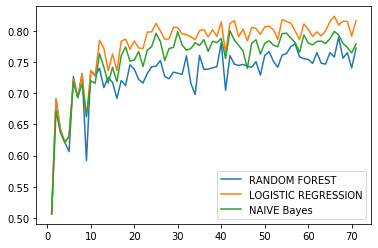

In [62]:
plt.plot(range(1,len(features)+1,1),rF_auc)
plt.plot(range(1,len(features)+1,1),log_auc)
plt.plot(range(1,len(features)+1,1),nB_auc)
plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION','NAIVE Bayes'])


In [43]:
len(features)

71

# Randomly selecting varible 10 times

In [75]:
rF_auc = []
nB_auc= []
log_auc = []

mean_rF_auc = []
mean_nB_auc= []
mean_log_auc = []


for j in range(1,len(features)+1,1):
    random_forest =[]
    nb = []
    logistic = []
    for i in range(1,11,1):    
        c = random.choices(features,k= j)
        #c = list(res[:i]['features'])
        print(c)
        rf.fit(X_train[c],y_train)
        probs = rf.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        rF_auc.append(a)
        random_forest.append(a)
    
        log.fit(X_train[c],y_train)
        probs = log.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        log_auc.append(a)
        logistic.append(a)
    
        nB.fit(X_train[c],y_train)
        probs = nB.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        nB_auc.append(a)
        nb.append(a)
        
    mean_rF_auc.append(st.mean(random_forest))
    mean_nB_auc.append(st.mean(nb))
    mean_log_auc.append(st.mean(logistic))

['ELIX17']
0.5064549560027913
0.5064549560027913
0.5064549560027913
['G-3']
0.5558648238908452
0.5558648238908452
0.5558648238908452
['O']
0.5028072384833195
0.5028072384833195
0.5028072384833195
['drugs_m10-11']
0.5849978262090207
0.5774807447038911
0.5774807447038911
['G-8']
0.4995350012433122
0.4995350012433122
0.4995350012433122
['ELIX7']
0.5320858767757305
0.5320858767757305
0.5320858767757305
['ELIX17']
0.5064549560027913
0.5064549560027913
0.5064549560027913
['G-23']
0.5
0.5
0.5
['ELIX2']
0.5015210119759038
0.5015210119759038
0.5015210119759038
['drugs_m1-2']
0.5805055547979818
0.5685379932139218
0.5685379932139218
['H', 'ELIX1']
0.5880187058323373
0.5880187058323373
0.5862395662043685
['ELIX27', 'G-7']
0.6498646634634667
0.6498646634634667
0.6498646634634667
['drugs_m2-3', 'G-19']
0.5857636583859402
0.5729176606479662
0.5729176606479662
['G-23', 'ELIX12']
0.5454745842925554
0.5454745842925554
0.5454745842925554
['ELIX11', 'ELIX10']
0.538958569629493
0.538958569629493
0.53895613

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7525638059791284
0.7468426127202868
['G-21', 'drugs_m11-12', 'G-20', 'ELIX5', 'ELIX9', 'G-10', 'ELIX14']
0.7588953933278253
0.7595574450335695
0.7511398846527148
['drugs_m2-3', 'ELIX29', 'age', 'U', 'G-2', 'ELIX18', 'drugs_m10-11']
0.6509010564142876
0.7250199812299967
0.7280978125726938
['ELIX19', 'ELIX26', 'U', 'drugs_m8-9', 'G-21', 'ELIX6', 'ELIX19']
0.744897735567552
0.7420649410028315
0.7332795527284687
['ELIX19', 'O', 'G-12', 'G-19', 'drugs_m11-12', 'ELIX19', 'drugs_m11-12']
0.6718291769273343
0.6701800155614556
0.6578358025780681
['O', 'G-14', 'G-8', 'ELIX24', 'ELIX11', 'drugs_m2-3', 'ELIX16']
0.6422034379587219
0.6371530236550171
0.6258586153512959
['G-23', 'drugs_m1-2', 'drugs_m3-4', 'ELIX6', 'G-4', 'G-10', 'G-8']
0.6971303071382162
0.6979309360135401
0.6888362758388347
['drugs_m6-7', 'ELIX29', 'H', 'drugs_m9-10', 'ELIX1', 'G-11', 'G-6']
0.7411754834880121
0.7536317389525695
0.7481780423046996
['U', 'drugs_m6-7', 'drugs_m5-6', 'ELIX1', 'ELIX26', 'ELIX7', 'ELIX19', 'drugs_m3-

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7362138978238026
0.7102634538410325
['drugs_m11-12', 'H', 'O', 'O', 'H', 'G-3', 'ELIX24', 'G-14', 'G-15']
0.6325202820313315
0.6333543279296046
0.6235283435071028
['ELIX27', 'G-10', 'G-14', 'G-17', 'W', 'ELIX7', 'G-11', 'G-6', 'ELIX25']
0.771547402279673
0.7729497621664114
0.7627292707773508
['ELIX3', 'U', 'ELIX9', 'ELIX18', 'ELIX14', 'ELIX10', 'drugs_m3-4', 'G-11', 'W']
0.7692810767885648
0.7844778971179223
0.7732710661201441
['ELIX17', 'ELIX2', 'ELIX27', 'G-16', 'drugs_m0-1', 'drugs_m3-4', 'ELIX14', 'G-22', 'ELIX4']
0.7390420079090697
0.7651304033946433
0.7531171520931762
['G-7', 'drugs_m4-5', 'G-10', 'ELIX9', 'O', 'G-18', 'ELIX1', 'drugs_m7-8', 'ELIX11']
0.7146868216929902
0.7380254598249738
0.7263362076571989
['ELIX23', 'drugs_m5-6', 'ELIX17', 'drugs_m8-9', 'G-17', 'G-4', 'ELIX8', 'ELIX21', 'ELIX21']
0.740818163587798
0.7609825695653221
0.7411308365485653
['drugs_m10-11', 'drugs_m11-12', 'A', 'ELIX10', 'G-6', 'G-8', 'ELIX4', 'ELIX16', 'ELIX28']
0.6927272012641676
0.69958051449060

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7038642623950204
0.7034991778096849
['H', 'G-8', 'ELIX16', 'G-22', 'drugs_m8-9', 'G-5', 'ELIX26', 'ELIX8', 'Am.N', 'G-14']
0.7413660391282375
0.7448115700225401
0.7216009048104151
['ELIX12', 'G-21', 'ELIX5', 'G-18', 'drugs_m7-8', 'ELIX18', 'ELIX29', 'G-3', 'ELIX5', 'age']
0.6501106146775009


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7580578019844868
0.7469223451274195
['G-17', 'W', 'drugs_m10-11', 'drugs_m5-6', 'G-22', 'ELIX6', 'ELIX15', 'G-3', 'ELIX29', 'G-8']
0.7293689909920028
0.7821115932845097
0.7685136403378601
['ELIX28', 'drugs_m2-3', 'G-21', 'ELIX15', 'drugs_m2-3', 'ELIX19', 'G-3', 'ELIX16', 'age', 'drugs_m9-10']
0.6367048537303376


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7116013058788613
0.7030876174127877
['B', 'G-19', 'G-13', 'G-5', 'G-16', 'drugs_m9-10', 'G-23', 'G-8', 'ELIX25', 'Am.N']
0.656748762703843
0.6575344237047493
0.6493562530581469
['ELIX19', 'drugs_m10-11', 'ELIX26', 'ELIX4', 'G-4', 'drugs_m9-10', 'A', 'G-19', 'ELIX23', 'ELIX3', 'G-14']
0.6485917845139451
0.6483528760618288
0.6458270753286757
['ELIX10', 'Am.N', 'G-23', 'drugs_m3-4', 'G-21', 'ELIX1', 'G-4', 'G-4', 'G-16', 'G-2', 'A']
0.7269701524862234
0.7266095759102247
0.7217539044013253
['G-23', 'G-5', 'A', 'drugs_m6-7', 'B', 'ELIX26', 'ELIX5', 'G-4', 'ELIX22', 'ELIX1', 'G-6']
0.7124927366504368
0.7185023462504111
0.7136836051240505
['ELIX13', 'ELIX12', 'G-8', 'drugs_m6-7', 'ELIX7', 'drugs_m9-10', 'G-17', 'H', 'Am.N', 'ELIX13', 'ELIX16']
0.7145311750503341
0.7469572701677268
0.7244560469089655
['ELIX9', 'G-10', 'G-11', 'G-10', 'ELIX8', 'ELIX8', 'G-14', 'drugs_m9-10', 'G-14', 'ELIX8', 'drugs_m4-5']
0.7529701845716991
0.7625354263758654
0.7468940617805834
['ELIX25', 'ELIX3', 'G-18', 'EL

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7287901208820295
0.7221133740284118
['drugs_m11-12', 'G-13', 'ELIX20', 'W', 'drugs_m5-6', 'G-23', 'H', 'G-4', 'ELIX5', 'G-23', 'O', 'drugs_m5-6']
0.6561611332590019
0.6614127395381296
0.6565153087825968
['drugs_m4-5', 'G-18', 'ELIX23', 'ELIX23', 'ELIX9', 'G-19', 'ELIX29', 'ELIX11', 'ELIX2', 'G-17', 'ELIX17', 'G-6']
0.7593394081834006
0.7692503228600993
0.7567515862257053
['G-23', 'ELIX16', 'drugs_m6-7', 'ELIX3', 'drugs_m4-5', 'G-11', 'G-17', 'drugs_m0-1', 'Am.N', 'ELIX5', 'drugs_m10-11', 'ELIX5']
0.6969363343948278
0.7670396496266053
0.7395012954510817
['G-7', 'ELIX15', 'ELIX12', 'ELIX15', 'O', 'ELIX24', 'drugs_m9-10', 'B', 'G-12', 'ELIX21', 'ELIX2', 'drugs_m3-4']
0.6843170686709393
0.7310594944933303
0.7135381937481452
['ELIX17', 'ELIX25', 'G-21', 'ELIX24', 'ELIX25', 'drugs_m2-3', 'ELIX17', 'ELIX16', 'drugs_m1-2', 'G-12', 'ELIX7', 'drugs_m7-8']
0.6772288576768511
0.7264909238210592
0.7120639463530846
['G-18', 'drugs_m7-8', 'G-12', 'H', 'ELIX29', 'G-22', 'ELIX21', 'ELIX17', 'H', 'ELI

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7020129625321856
0.6826012978574924
['drugs_m10-11', 'G-3', 'ELIX20', 'ELIX20', 'ELIX17', 'drugs_m4-5', 'G-11', 'ELIX20', 'ELIX28', 'ELIX25', 'G-15', 'ELIX15', 'drugs_m0-1']
0.6931268900350533
0.7361574273865578
0.7190014518677758
['G-20', 'ELIX12', 'drugs_m1-2', 'G-11', 'G-16', 'G-8', 'G-20', 'ELIX14', 'G-7', 'ELIX27', 'G-3', 'ELIX12', 'G-9']
0.7720978927863829
0.7787944524212501
0.7601255023382291
['G-7', 'G-18', 'drugs_m5-6', 'drugs_m8-9', 'ELIX8', 'ELIX11', 'ELIX11', 'G-4', 'ELIX3', 'G-22', 'drugs_m5-6', 'drugs_m0-1', 'ELIX2']
0.7034988088267143
0.7592787345488382
0.7343215285520627
['drugs_m2-3', 'G-19', 'drugs_m5-6', 'ELIX9', 'G-7', 'G-5', 'ELIX25', 'G-10', 'G-4', 'G-10', 'ELIX21', 'G-3', 'drugs_m5-6']
0.6846641853898787
0.7114286058058669
0.7031193980764757
['ELIX2', 'drugs_m5-6', 'G-17', 'Am.N', 'drugs_m2-3', 'G-18', 'drugs_m2-3', 'W', 'drugs_m0-1', 'ELIX20', 'drugs_m10-11', 'B', 'G-14']
0.6838439202034219


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7424795495199211
0.7043709722701277
['drugs_m6-7', 'drugs_m1-2', 'ELIX18', 'ELIX18', 'G-18', 'ELIX4', 'ELIX9', 'G-3', 'ELIX16', 'H', 'drugs_m3-4', 'ELIX25', 'ELIX13']
0.7041972935901241
0.7640134598570592
0.7538960270159706
['ELIX18', 'ELIX3', 'ELIX9', 'G-13', 'G-22', 'G-4', 'ELIX2', 'G-5', 'drugs_m5-6', 'ELIX27', 'G-6', 'ELIX6', 'G-4']
0.798773869588584
0.803012168416662
0.7952170983500044
['G-4', 'ELIX19', 'ELIX17', 'U', 'H', 'age', 'ELIX13', 'G-12', 'G-22', 'G-17', 'drugs_m4-5', 'drugs_m3-4', 'ELIX8', 'drugs_m9-10']
0.7047937946689983


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7739142194806966
0.7564625442177961
['G-15', 'ELIX17', 'ELIX3', 'ELIX6', 'ELIX15', 'G-5', 'drugs_m3-4', 'ELIX13', 'O', 'G-4', 'drugs_m9-10', 'ELIX18', 'ELIX22', 'ELIX26']
0.7178982569565322
0.7487176879206204
0.7369924679345777
['drugs_m9-10', 'ELIX14', 'A', 'B', 'G-19', 'ELIX24', 'G-19', 'ELIX22', 'G-11', 'G-2', 'ELIX23', 'drugs_m8-9', 'U', 'G-18']
0.7591376547121533
0.7852957879791765
0.7740457378456208
['G-7', 'G-21', 'ELIX9', 'ELIX8', 'G-9', 'G-3', 'G-13', 'ELIX20', 'ELIX21', 'G-20', 'G-3', 'Am.N', 'ELIX13', 'ELIX5']
0.7747950139170752
0.7743029350188901
0.7648909815749155
['G-4', 'G-9', 'ELIX7', 'drugs_m10-11', 'drugs_m10-11', 'ELIX25', 'ELIX23', 'H', 'ELIX21', 'ELIX19', 'G-18', 'ELIX3', 'ELIX22', 'drugs_m5-6']
0.7122459030858206
0.7344642768334844
0.7204212822960366
['ELIX29', 'A', 'ELIX6', 'ELIX24', 'ELIX19', 'G-8', 'G-20', 'ELIX2', 'ELIX12', 'ELIX24', 'G-22', 'ELIX27', 'ELIX21', 'G-3']
0.7733689268210512
0.7846505009344894
0.757946401212831
['ELIX22', 'G-10', 'G-21', 'ELIX5',

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7525057312680982
0.724109170831094
['drugs_m8-9', 'drugs_m2-3', 'drugs_m9-10', 'drugs_m10-11', 'G-5', 'drugs_m6-7', 'G-7', 'G-19', 'ELIX18', 'G-12', 'G-8', 'ELIX5', 'ELIX13', 'A', 'G-21']
0.713407108537143
0.7528401581813953
0.7355855839957648
['G-21', 'ELIX6', 'ELIX18', 'W', 'ELIX28', 'ELIX1', 'drugs_m5-6', 'ELIX2', 'G-3', 'G-17', 'ELIX5', 'drugs_m10-11', 'G-9', 'G-4', 'G-23']
0.715627214900495
0.7873658947435969
0.770358426849126
['drugs_m2-3', 'drugs_m0-1', 'ELIX10', 'G-19', 'ELIX27', 'G-15', 'ELIX28', 'G-16', 'G-6', 'ELIX6', 'A', 'ELIX22', 'drugs_m7-8', 'G-9', 'G-11']
0.7465466723351007
0.7979088451635157
0.7818854067235114
['drugs_m11-12', 'ELIX12', 'G-8', 'G-4', 'ELIX23', 'ELIX19', 'G-10', 'Am.N', 'ELIX13', 'ELIX10', 'G-4', 'ELIX5', 'Am.N', 'G-12', 'ELIX25']
0.7123373306488484


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7201158766955168
0.7098401982882396
['G-9', 'ELIX22', 'ELIX7', 'O', 'G-8', 'G-16', 'ELIX28', 'ELIX29', 'ELIX22', 'drugs_m3-4', 'drugs_m4-5', 'ELIX13', 'O', 'ELIX11', 'ELIX5']
0.6609404734211941
0.6991215157178723
0.6848054256539422
['drugs_m7-8', 'G-3', 'ELIX15', 'ELIX6', 'ELIX11', 'G-8', 'drugs_m8-9', 'G-7', 'drugs_m6-7', 'G-10', 'G-15', 'O', 'ELIX27', 'drugs_m0-1', 'drugs_m9-10']
0.7144017101558551
0.7562424378544443
0.7286239020751282
['G-12', 'G-15', 'ELIX12', 'ELIX15', 'ELIX25', 'G-5', 'H', 'G-10', 'ELIX24', 'ELIX28', 'ELIX27', 'ELIX18', 'drugs_m11-12', 'ELIX2', 'drugs_m10-11']
0.6956335999101607
0.7500291175692044
0.7311725797524606
['ELIX7', 'G-10', 'ELIX26', 'drugs_m0-1', 'drugs_m1-2', 'ELIX4', 'G-18', 'drugs_m0-1', 'B', 'G-11', 'ELIX23', 'Am.N', 'Am.N', 'B', 'H']
0.7129568530565427
0.7383108440886521
0.7197995941187324
['ELIX7', 'G-14', 'U', 'G-7', 'drugs_m2-3', 'ELIX21', 'ELIX7', 'G-23', 'G-19', 'ELIX16', 'H', 'G-12', 'ELIX27', 'ELIX23', 'ELIX19']
0.7268066930302325
0.75287

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7435716749420457
0.7113824187635862
['G-15', 'age', 'G-8', 'drugs_m7-8', 'G-21', 'ELIX4', 'ELIX4', 'drugs_m5-6', 'O', 'G-16', 'ELIX8', 'G-23', 'W', 'ELIX20', 'ELIX23', 'G-16']
0.6446033513279376


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7155780118234978
0.692605613353975
['G-23', 'ELIX17', 'G-14', 'ELIX15', 'G-20', 'drugs_m4-5', 'ELIX21', 'ELIX21', 'age', 'age', 'W', 'G-3', 'G-16', 'Am.N', 'ELIX8', 'ELIX15']
0.6523250739971284


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7241521011975902
0.7167663615872684
['G-23', 'O', 'drugs_m2-3', 'G-19', 'ELIX20', 'ELIX29', 'G-11', 'ELIX24', 'G-10', 'G-8', 'ELIX14', 'G-21', 'drugs_m3-4', 'ELIX1', 'ELIX17', 'G-8']
0.7331835690278903
0.781817834711672
0.7540282512613602
['drugs_m6-7', 'ELIX12', 'H', 'ELIX7', 'drugs_m3-4', 'ELIX4', 'ELIX7', 'A', 'drugs_m9-10', 'G-7', 'G-23', 'G-23', 'H', 'ELIX28', 'G-5', 'drugs_m2-3']
0.6361089141472884
0.664061507856931
0.6579816952361089
['Am.N', 'Am.N', 'G-4', 'A', 'A', 'G-5', 'ELIX16', 'ELIX26', 'ELIX20', 'ELIX27', 'G-15', 'ELIX23', 'ELIX20', 'drugs_m7-8', 'G-7', 'B']
0.7018155406001587
0.7153407878588559
0.6976090545212448
['ELIX10', 'ELIX7', 'G-3', 'G-11', 'drugs_m4-5', 'ELIX7', 'G-23', 'ELIX23', 'drugs_m1-2', 'ELIX1', 'G-12', 'G-3', 'G-5', 'G-5', 'ELIX2', 'G-16']
0.7268249496659099
0.7538022411704781
0.7383243039457114
['ELIX1', 'drugs_m8-9', 'W', 'drugs_m0-1', 'ELIX6', 'ELIX20', 'ELIX4', 'G-3', 'G-20', 'ELIX10', 'ELIX22', 'ELIX23', 'ELIX6', 'G-10', 'ELIX10', 'G-23']
0.717767

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7438118186849768
0.734356245036778
['ELIX16', 'G-18', 'ELIX7', 'G-17', 'B', 'ELIX26', 'G-20', 'O', 'ELIX21', 'G-14', 'G-23', 'drugs_m10-11', 'G-23', 'ELIX13', 'ELIX15', 'ELIX27', 'G-13']
0.74748613506381
0.7907615166804367
0.7756869901417375
['ELIX8', 'G-10', 'G-7', 'ELIX26', 'ELIX27', 'G-22', 'drugs_m1-2', 'ELIX26', 'G-11', 'G-15', 'G-14', 'ELIX3', 'G-23', 'G-5', 'G-12', 'G-16', 'G-13']
0.7792289860187539
0.7909047141585184
0.7701416573752476
['G-21', 'G-11', 'ELIX10', 'drugs_m9-10', 'G-7', 'drugs_m3-4', 'drugs_m0-1', 'G-15', 'ELIX10', 'G-23', 'ELIX10', 'ELIX19', 'ELIX16', 'G-15', 'drugs_m11-12', 'G-8', 'ELIX13']
0.7113814241138393
0.7699138825832017
0.7480816094074614
['G-3', 'B', 'ELIX3', 'age', 'G-16', 'G-9', 'drugs_m1-2', 'G-10', 'ELIX2', 'A', 'U', 'A', 'G-16', 'G-7', 'drugs_m7-8', 'G-12', 'ELIX19']
0.6197807278590164


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7070131149381954
0.6962644805762552
['drugs_m0-1', 'ELIX17', 'G-5', 'drugs_m2-3', 'drugs_m1-2', 'ELIX28', 'ELIX28', 'Am.N', 'G-9', 'ELIX4', 'Am.N', 'drugs_m11-12', 'ELIX2', 'ELIX28', 'G-13', 'H', 'drugs_m10-11']
0.625762358924174
0.654922730153128
0.6513484562875501
['ELIX10', 'ELIX1', 'ELIX28', 'G-8', 'ELIX28', 'B', 'ELIX9', 'ELIX12', 'G-6', 'ELIX26', 'drugs_m1-2', 'drugs_m5-6', 'ELIX29', 'ELIX25', 'ELIX15', 'drugs_m7-8', 'ELIX3']
0.6886345704958008


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7586810783928386
0.738443052291304
['ELIX1', 'ELIX23', 'ELIX14', 'ELIX28', 'G-16', 'ELIX3', 'ELIX26', 'G-18', 'ELIX23', 'O', 'age', 'ELIX27', 'drugs_m10-11', 'drugs_m1-2', 'G-11', 'ELIX21', 'G-6']
0.7112274940441337


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.797494685843086
0.7813273119590589
['ELIX18', 'drugs_m3-4', 'G-8', 'ELIX16', 'ELIX5', 'O', 'O', 'G-2', 'drugs_m2-3', 'A', 'A', 'ELIX15', 'B', 'A', 'G-16', 'ELIX28', 'ELIX13']
0.6837986155117232
0.7420746949874466
0.7246665115868675
['ELIX13', 'B', 'ELIX19', 'G-23', 'drugs_m2-3', 'G-14', 'ELIX5', 'ELIX15', 'G-3', 'W', 'drugs_m3-4', 'O', 'G-4', 'G-5', 'drugs_m10-11', 'drugs_m3-4', 'G-21']
0.6677925673995525


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7285719075617444
0.7042990526763298
['drugs_m2-3', 'ELIX1', 'G-7', 'G-18', 'drugs_m1-2', 'ELIX10', 'ELIX21', 'drugs_m4-5', 'G-14', 'G-2', 'ELIX1', 'G-21', 'ELIX13', 'drugs_m8-9', 'Am.N', 'G-17', 'O']
0.7447194686645222


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7892428309015216
0.7707777358884068
['G-17', 'A', 'drugs_m6-7', 'G-18', 'drugs_m9-10', 'ELIX15', 'G-4', 'drugs_m2-3', 'ELIX1', 'age', 'drugs_m4-5', 'A', 'H', 'drugs_m0-1', 'drugs_m0-1', 'G-16', 'G-21', 'ELIX16']
0.7158425565707044


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.762139523691113
0.7342281277322789
['ELIX4', 'drugs_m5-6', 'ELIX12', 'W', 'G-6', 'ELIX7', 'ELIX10', 'ELIX14', 'G-19', 'ELIX3', 'ELIX7', 'drugs_m2-3', 'ELIX18', 'ELIX3', 'G-3', 'ELIX6', 'G-16', 'ELIX23']
0.7153009376980276
0.7827571209702648
0.7621076628137358
['ELIX11', 'ELIX2', 'drugs_m4-5', 'drugs_m4-5', 'ELIX15', 'ELIX28', 'drugs_m2-3', 'drugs_m5-6', 'G-17', 'G-9', 'ELIX19', 'drugs_m0-1', 'ELIX15', 'ELIX1', 'drugs_m8-9', 'G-12', 'ELIX17', 'A']
0.7199421659300376


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.754256170438047
0.7156261721225343
['ELIX25', 'drugs_m0-1', 'drugs_m2-3', 'O', 'G-4', 'G-19', 'ELIX16', 'G-11', 'G-12', 'drugs_m6-7', 'drugs_m6-7', 'ELIX11', 'ELIX14', 'ELIX18', 'ELIX19', 'G-17', 'ELIX20', 'Am.N']
0.7372588575966375


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7971419220804221
0.7635793754562155
['G-19', 'G-4', 'drugs_m3-4', 'drugs_m6-7', 'Am.N', 'ELIX9', 'ELIX27', 'Am.N', 'G-3', 'G-4', 'G-13', 'ELIX10', 'G-12', 'drugs_m6-7', 'G-3', 'ELIX10', 'ELIX3', 'drugs_m10-11']
0.696524501271387
0.7566839500429142
0.7394807447038911
['drugs_m10-11', 'ELIX11', 'ELIX21', 'drugs_m0-1', 'ELIX28', 'H', 'G-17', 'G-13', 'ELIX9', 'drugs_m1-2', 'G-20', 'drugs_m6-7', 'ELIX28', 'drugs_m10-11', 'G-8', 'ELIX11', 'G-17', 'drugs_m10-11']
0.7145844208972703
0.7713816968403829
0.7456988136395357
['G-9', 'ELIX21', 'G-23', 'G-12', 'ELIX22', 'G-13', 'G-13', 'H', 'W', 'drugs_m11-12', 'drugs_m1-2', 'O', 'ELIX12', 'ELIX26', 'ELIX26', 'G-4', 'U', 'ELIX12']
0.7130128903398654
0.7422614164133251
0.7248234576912895
['ELIX7', 'ELIX28', 'G-20', 'drugs_m4-5', 'ELIX25', 'drugs_m6-7', 'G-21', 'ELIX11', 'G-21', 'G-4', 'G-9', 'age', 'G-17', 'B', 'ELIX19', 'ELIX17', 'drugs_m9-10', 'ELIX11']
0.6879993101622721


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7503195713380446
0.7253051408953453
['drugs_m11-12', 'G-12', 'G-12', 'G-22', 'ELIX24', 'G-17', 'G-5', 'ELIX6', 'G-7', 'ELIX13', 'ELIX25', 'ELIX11', 'G-6', 'G-21', 'ELIX20', 'O', 'G-15', 'ELIX6']
0.7633068253828198
0.8006243994000016
0.7816648672062374
['A', 'G-20', 'ELIX9', 'ELIX15', 'ELIX20', 'ELIX29', 'ELIX26', 'ELIX20', 'G-15', 'ELIX18', 'G-9', 'H', 'G-6', 'ELIX20', 'G-12', 'ELIX3', 'G-19', 'drugs_m11-12']
0.743321937641878
0.7744467902492239
0.7473903920042995
['ELIX5', 'ELIX5', 'G-15', 'G-9', 'G-11', 'ELIX6', 'G-19', 'A', 'ELIX12', 'G-10', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m6-7', 'drugs_m9-10', 'G-7', 'ELIX21', 'ELIX4', 'ELIX4', 'drugs_m4-5']
0.7378128133347236
0.7924884211539541
0.7602926355811883
['G-20', 'drugs_m8-9', 'ELIX9', 'ELIX16', 'drugs_m11-12', 'ELIX28', 'drugs_m8-9', 'drugs_m5-6', 'ELIX26', 'ELIX15', 'drugs_m11-12', 'ELIX2', 'ELIX11', 'ELIX21', 'G-11', 'ELIX19', 'ELIX3', 'ELIX1', 'G-4']
0.7095564664265603


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7739812781249248
0.7516666639928771
['G-9', 'ELIX7', 'Am.N', 'ELIX5', 'ELIX21', 'G-6', 'drugs_m2-3', 'G-11', 'ELIX27', 'W', 'ELIX7', 'G-18', 'ELIX28', 'ELIX25', 'ELIX24', 'ELIX9', 'G-13', 'G-8', 'G-22']
0.7538281501921118


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992019219199948
0.7808328747784097
['G-8', 'ELIX22', 'ELIX20', 'G-19', 'G-8', 'ELIX16', 'drugs_m10-11', 'G-5', 'ELIX1', 'drugs_m11-12', 'W', 'ELIX8', 'ELIX3', 'ELIX5', 'Am.N', 'G-21', 'ELIX1', 'drugs_m7-8', 'ELIX13']
0.6875328033882263
0.7533889642006305
0.7329048745858968
['ELIX16', 'ELIX1', 'ELIX26', 'ELIX23', 'ELIX28', 'W', 'G-13', 'ELIX20', 'ELIX12', 'drugs_m2-3', 'ELIX1', 'ELIX13', 'ELIX21', 'ELIX4', 'ELIX19', 'G-19', 'G-21', 'drugs_m5-6', 'drugs_m10-11']
0.7047175756214555
0.7698102144111914
0.7558518132304459
['drugs_m2-3', 'G-11', 'W', 'ELIX22', 'ELIX17', 'ELIX6', 'ELIX24', 'W', 'drugs_m8-9', 'G-16', 'ELIX10', 'ELIX13', 'G-8', 'G-22', 'G-7', 'ELIX19', 'ELIX18', 'drugs_m11-12', 'G-2']
0.7461475771455157


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7978192625153407
0.7774499747326878
['ELIX2', 'G-13', 'ELIX20', 'G-3', 'W', 'ELIX14', 'G-6', 'G-20', 'G-9', 'drugs_m2-3', 'ELIX17', 'drugs_m1-2', 'ELIX15', 'drugs_m2-3', 'G-23', 'drugs_m11-12', 'drugs_m4-5', 'ELIX17', 'ELIX25']
0.7182583843358707


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7631721947267521
0.7411569380830534
['ELIX7', 'ELIX21', 'drugs_m9-10', 'G-5', 'drugs_m7-8', 'ELIX7', 'ELIX12', 'G-6', 'drugs_m2-3', 'O', 'G-4', 'ELIX2', 'drugs_m5-6', 'G-22', 'G-16', 'G-3', 'G-3', 'O', 'ELIX25']
0.7130375480279465


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7685341108713614
0.7414701564969078
['drugs_m5-6', 'ELIX3', 'B', 'ELIX6', 'G-22', 'ELIX2', 'G-15', 'drugs_m0-1', 'drugs_m4-5', 'ELIX4', 'drugs_m8-9', 'drugs_m10-11', 'ELIX11', 'ELIX15', 'ELIX10', 'drugs_m8-9', 'drugs_m8-9', 'G-22', 'ELIX29']
0.7323869829225056
0.7710157940754169
0.7418498078882141
['G-20', 'ELIX24', 'G-5', 'drugs_m7-8', 'drugs_m2-3', 'A', 'drugs_m1-2', 'ELIX17', 'ELIX8', 'ELIX27', 'ELIX27', 'G-21', 'G-8', 'ELIX7', 'ELIX3', 'G-19', 'ELIX19', 'ELIX8', 'drugs_m0-1']
0.6970085908861207


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7462998387704846
0.7292983869027089
['G-12', 'G-14', 'G-21', 'O', 'ELIX4', 'ELIX14', 'drugs_m7-8', 'drugs_m0-1', 'ELIX29', 'G-14', 'G-21', 'ELIX5', 'G-16', 'G-17', 'G-16', 'G-16', 'ELIX15', 'ELIX12', 'ELIX7', 'ELIX7']
0.7102962291544676
0.7849880240961922
0.7538688024898329
['G-9', 'H', 'ELIX11', 'G-10', 'G-22', 'ELIX9', 'G-8', 'drugs_m3-4', 'ELIX4', 'ELIX13', 'G-5', 'ELIX16', 'ELIX14', 'ELIX15', 'G-22', 'G-7', 'drugs_m4-5', 'G-9', 'drugs_m6-7', 'ELIX4']
0.7256543271274677


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7790782965820947
0.7554823168922008
['ELIX6', 'drugs_m10-11', 'drugs_m6-7', 'ELIX27', 'O', 'drugs_m1-2', 'G-16', 'drugs_m3-4', 'G-5', 'ELIX1', 'G-4', 'G-7', 'drugs_m5-6', 'G-4', 'ELIX16', 'ELIX3', 'drugs_m10-11', 'ELIX1', 'G-4', 'drugs_m7-8']
0.7355489584252449


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7646734580923581
0.730731869700883
['G-8', 'G-3', 'W', 'G-4', 'ELIX19', 'ELIX20', 'G-9', 'G-9', 'B', 'drugs_m3-4', 'A', 'G-2', 'ELIX12', 'ELIX10', 'G-3', 'G-3', 'G-20', 'ELIX18', 'A', 'drugs_m2-3']
0.6737937706048913
0.7272520394330497
0.7082543576086694
['G-4', 'drugs_m7-8', 'ELIX2', 'drugs_m3-4', 'drugs_m9-10', 'drugs_m10-11', 'ELIX9', 'drugs_m6-7', 'drugs_m7-8', 'ELIX5', 'G-10', 'age', 'drugs_m11-12', 'U', 'drugs_m6-7', 'G-4', 'ELIX11', 'drugs_m0-1', 'G-8', 'G-23']
0.6710579864759719


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6721835128783079
0.6582797051344782
['ELIX15', 'ELIX23', 'ELIX26', 'G-21', 'ELIX26', 'ELIX20', 'drugs_m10-11', 'ELIX25', 'B', 'G-4', 'G-12', 'G-11', 'ELIX13', 'ELIX24', 'ELIX5', 'ELIX17', 'G-12', 'G-4', 'ELIX7', 'drugs_m9-10']
0.7126803725123729


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7751290558046636
0.749705792230502
['G-18', 'ELIX22', 'ELIX9', 'W', 'drugs_m9-10', 'drugs_m0-1', 'G-23', 'G-9', 'G-5', 'drugs_m3-4', 'ELIX12', 'ELIX3', 'ELIX2', 'drugs_m3-4', 'G-15', 'G-20', 'Am.N', 'G-18', 'ELIX24', 'ELIX1']
0.6682095181563685


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7333621888711527
0.7180445506830195
['ELIX6', 'drugs_m9-10', 'drugs_m0-1', 'G-11', 'ELIX1', 'ELIX23', 'ELIX25', 'G-6', 'A', 'ELIX15', 'G-13', 'ELIX23', 'ELIX23', 'G-10', 'ELIX24', 'ELIX15', 'H', 'G-8', 'Am.N', 'ELIX26']
0.7565166403298387
0.7923937850433556
0.7681736626372656
['G-18', 'W', 'G-20', 'drugs_m11-12', 'ELIX23', 'ELIX1', 'ELIX28', 'G-5', 'ELIX16', 'G-2', 'G-18', 'G-9', 'G-10', 'ELIX17', 'ELIX16', 'ELIX11', 'G-11', 'ELIX23', 'ELIX21', 'ELIX16']
0.7585763834856056
0.784074759158398
0.7614880120641387
['ELIX12', 'W', 'drugs_m8-9', 'ELIX24', 'ELIX25', 'ELIX9', 'ELIX12', 'A', 'G-20', 'drugs_m1-2', 'G-13', 'G-3', 'ELIX29', 'O', 'drugs_m5-6', 'drugs_m10-11', 'ELIX21', 'ELIX6', 'ELIX25', 'G-14']
0.7362845660840479


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7888378480271443
0.7619609840615399
['G-2', 'ELIX8', 'drugs_m11-12', 'G-4', 'G-21', 'ELIX17', 'G-13', 'G-5', 'W', 'O', 'drugs_m2-3', 'ELIX29', 'G-23', 'W', 'ELIX21', 'ELIX9', 'G-21', 'ELIX4', 'ELIX16', 'ELIX10', 'U']
0.7236728404469508


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7880088235058195
0.7807674685361804
['ELIX29', 'ELIX23', 'ELIX1', 'ELIX1', 'G-8', 'ELIX18', 'G-10', 'ELIX7', 'G-5', 'G-23', 'ELIX7', 'drugs_m6-7', 'G-9', 'G-9', 'drugs_m10-11', 'ELIX25', 'age', 'A', 'A', 'G-5', 'G-4']
0.6301806572709698


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7069370402752934
0.694886008326181
['G-14', 'G-8', 'ELIX15', 'G-8', 'drugs_m11-12', 'A', 'drugs_m4-5', 'U', 'A', 'G-14', 'G-2', 'ELIX1', 'G-18', 'G-12', 'G-4', 'U', 'ELIX8', 'drugs_m6-7', 'G-14', 'G-10', 'G-12']
0.7098841393472209


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7622030368902757
0.7590277138296422
['G-5', 'ELIX12', 'ELIX29', 'G-2', 'ELIX7', 'drugs_m11-12', 'Am.N', 'G-19', 'ELIX5', 'G-17', 'drugs_m4-5', 'drugs_m9-10', 'G-9', 'ELIX7', 'drugs_m6-7', 'G-3', 'G-21', 'ELIX27', 'ELIX22', 'age', 'G-11']
0.7087346932227454


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7885572926275598
0.7658157812412266
['ELIX26', 'ELIX12', 'ELIX29', 'W', 'ELIX12', 'G-20', 'Am.N', 'G-21', 'G-18', 'ELIX2', 'G-4', 'drugs_m5-6', 'G-4', 'O', 'drugs_m10-11', 'G-3', 'age', 'ELIX29', 'drugs_m7-8', 'ELIX13', 'H']
0.6672403121916787


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7481930101791172
0.7360624543784643
['Am.N', 'H', 'ELIX24', 'ELIX5', 'ELIX16', 'drugs_m4-5', 'ELIX20', 'ELIX8', 'drugs_m3-4', 'ELIX23', 'ELIX2', 'G-6', 'G-14', 'O', 'drugs_m11-12', 'G-16', 'ELIX10', 'ELIX19', 'ELIX6', 'ELIX19', 'G-10']
0.7241153633279055


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7741735984663143
0.7473539268611581
['ELIX28', 'G-18', 'ELIX5', 'G-7', 'ELIX5', 'ELIX19', 'H', 'G-7', 'ELIX5', 'G-5', 'Am.N', 'ELIX6', 'G-11', 'drugs_m0-1', 'ELIX9', 'ELIX2', 'ELIX13', 'ELIX9', 'drugs_m2-3', 'G-8', 'G-5']
0.7458057545300681


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7994775361563203
0.7676977387760996
['ELIX2', 'B', 'drugs_m2-3', 'ELIX10', 'W', 'G-6', 'G-5', 'ELIX17', 'ELIX24', 'ELIX6', 'ELIX24', 'drugs_m2-3', 'ELIX29', 'G-15', 'drugs_m11-12', 'ELIX22', 'ELIX26', 'H', 'ELIX8', 'ELIX15', 'ELIX21']
0.7269923556354126


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7915494236646425
0.7655340386790409
['Am.N', 'ELIX27', 'drugs_m9-10', 'drugs_m9-10', 'B', 'drugs_m7-8', 'Am.N', 'drugs_m11-12', 'G-15', 'G-18', 'B', 'G-8', 'Am.N', 'drugs_m2-3', 'ELIX1', 'G-14', 'ELIX14', 'ELIX3', 'G-2', 'ELIX19', 'ELIX10']
0.7407705968700619


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7781928978799522
0.7475391081842027
['drugs_m9-10', 'drugs_m3-4', 'drugs_m7-8', 'ELIX8', 'G-23', 'O', 'G-3', 'ELIX4', 'ELIX3', 'drugs_m0-1', 'G-21', 'G-21', 'ELIX7', 'ELIX5', 'ELIX23', 'drugs_m1-2', 'ELIX3', 'ELIX14', 'drugs_m5-6', 'ELIX18', 'ELIX22']
0.739150601201601
0.7696790971147137
0.7401509140349892
['ELIX18', 'drugs_m11-12', 'G-8', 'ELIX23', 'ELIX10', 'drugs_m10-11', 'A', 'ELIX7', 'ELIX11', 'ELIX26', 'B', 'ELIX9', 'U', 'G-13', 'H', 'ELIX2', 'age', 'ELIX27', 'ELIX20', 'ELIX24', 'ELIX1', 'A']
0.6744976938564335


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7684278277330809
0.7487149446124476
['ELIX21', 'ELIX4', 'H', 'Am.N', 'ELIX26', 'G-14', 'drugs_m0-1', 'ELIX6', 'G-19', 'drugs_m6-7', 'ELIX8', 'G-13', 'G-11', 'ELIX28', 'age', 'G-13', 'ELIX25', 'age', 'G-16', 'G-18', 'ELIX14', 'drugs_m5-6']
0.7422988762062134


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8018554709746766
0.7927577947652547
['drugs_m6-7', 'ELIX19', 'ELIX17', 'G-10', 'age', 'B', 'G-17', 'ELIX19', 'ELIX22', 'G-2', 'drugs_m0-1', 'ELIX3', 'ELIX6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m1-2', 'ELIX25', 'G-2', 'G-5', 'G-4', 'ELIX13', 'G-14']
0.7208522062775233


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.779826722388443
0.7481911010933125
['ELIX11', 'ELIX18', 'ELIX17', 'drugs_m9-10', 'ELIX6', 'ELIX15', 'G-22', 'W', 'A', 'O', 'G-8', 'drugs_m5-6', 'ELIX20', 'ELIX11', 'G-14', 'ELIX11', 'drugs_m7-8', 'G-16', 'G-23', 'G-2', 'drugs_m6-7', 'ELIX22']
0.7226587789872221


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7685829930936012
0.7359249681150584
['drugs_m2-3', 'ELIX23', 'age', 'ELIX26', 'drugs_m1-2', 'ELIX28', 'G-18', 'ELIX18', 'drugs_m4-5', 'ELIX27', 'G-10', 'ELIX23', 'ELIX17', 'drugs_m2-3', 'ELIX24', 'ELIX24', 'G-15', 'W', 'G-9', 'G-4', 'G-18', 'ELIX18']
0.684341116734982


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7443437798294656
0.7324961697963375
['G-13', 'ELIX17', 'G-3', 'G-7', 'H', 'G-19', 'G-12', 'G-14', 'drugs_m11-12', 'drugs_m5-6', 'drugs_m8-9', 'drugs_m6-7', 'drugs_m11-12', 'ELIX13', 'ELIX18', 'ELIX11', 'ELIX25', 'ELIX29', 'drugs_m8-9', 'ELIX25', 'drugs_m11-12', 'W']
0.7127456343699615


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7677959524172395
0.7503026943778226
['ELIX13', 'U', 'ELIX16', 'ELIX11', 'G-20', 'G-18', 'ELIX23', 'ELIX16', 'ELIX21', 'ELIX17', 'G-4', 'ELIX6', 'ELIX2', 'ELIX2', 'G-7', 'drugs_m1-2', 'drugs_m7-8', 'G-4', 'ELIX6', 'G-5', 'ELIX9', 'G-3']
0.7364619666792336


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7849114521084168
0.7745714262796088
['ELIX13', 'G-18', 'drugs_m7-8', 'G-8', 'drugs_m7-8', 'ELIX22', 'W', 'ELIX26', 'ELIX14', 'G-18', 'ELIX3', 'ELIX1', 'ELIX6', 'ELIX9', 'ELIX5', 'G-3', 'Am.N', 'ELIX13', 'G-15', 'ELIX18', 'ELIX26', 'drugs_m6-7']
0.7249655482204593


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7925089879438825
0.7727257734604986
['ELIX16', 'ELIX8', 'drugs_m4-5', 'ELIX20', 'ELIX10', 'ELIX12', 'G-19', 'drugs_m6-7', 'ELIX21', 'G-21', 'O', 'ELIX25', 'ELIX26', 'G-16', 'ELIX26', 'G-16', 'G-11', 'G-22', 'ELIX10', 'ELIX7', 'ELIX14', 'G-20']
0.7240627431477455


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8013422317052628
0.7754033224510095
['ELIX20', 'ELIX9', 'ELIX12', 'ELIX26', 'A', 'G-8', 'ELIX8', 'G-18', 'G-18', 'drugs_m2-3', 'ELIX4', 'ELIX9', 'drugs_m9-10', 'ELIX15', 'G-9', 'ELIX12', 'G-16', 'A', 'ELIX17', 'ELIX4', 'age', 'G-22']
0.6813872797131558


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7630589811257189
0.7513249055483808
['drugs_m5-6', 'G-4', 'ELIX8', 'G-4', 'drugs_m0-1', 'ELIX21', 'G-18', 'ELIX8', 'ELIX17', 'ELIX10', 'G-8', 'G-21', 'G-22', 'ELIX14', 'ELIX11', 'G-6', 'G-9', 'G-7', 'ELIX2', 'ELIX23', 'ELIX21', 'ELIX9', 'ELIX14']
0.7328253507343563


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7954582046572068
0.7856164181379194
['G-6', 'B', 'G-2', 'drugs_m8-9', 'ELIX27', 'ELIX26', 'G-16', 'G-15', 'G-8', 'drugs_m7-8', 'drugs_m5-6', 'drugs_m8-9', 'G-22', 'drugs_m7-8', 'ELIX13', 'G-16', 'drugs_m3-4', 'ELIX17', 'ELIX20', 'drugs_m10-11', 'G-16', 'ELIX17', 'ELIX23']
0.7339299092783175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7813901513632316
0.7523194590388795
['H', 'ELIX9', 'ELIX24', 'ELIX5', 'drugs_m10-11', 'ELIX18', 'drugs_m5-6', 'ELIX15', 'G-14', 'G-22', 'drugs_m1-2', 'W', 'ELIX4', 'ELIX19', 'ELIX15', 'G-13', 'G-3', 'drugs_m5-6', 'ELIX23', 'G-7', 'G-16', 'G-2', 'G-7']
0.7172731677188029


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7844380950853074
0.7602800259892354
['G-17', 'ELIX8', 'G-2', 'G-6', 'A', 'ELIX5', 'ELIX17', 'ELIX26', 'G-10', 'G-10', 'ELIX3', 'ELIX21', 'ELIX28', 'G-3', 'G-9', 'U', 'G-11', 'O', 'G-15', 'G-21', 'ELIX3', 'G-13', 'ELIX13']
0.7782162881917429
0.8011285905652659
0.7829301258552784
['drugs_m10-11', 'W', 'G-8', 'drugs_m8-9', 'G-23', 'ELIX11', 'drugs_m11-12', 'drugs_m4-5', 'G-22', 'ELIX8', 'ELIX1', 'U', 'ELIX18', 'age', 'G-20', 'drugs_m10-11', 'ELIX11', 'drugs_m5-6', 'G-11', 'drugs_m1-2', 'drugs_m5-6', 'G-2', 'drugs_m7-8']
0.7183409402648655


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.782369175483488
0.7467433242157107
['drugs_m8-9', 'G-2', 'G-17', 'drugs_m11-12', 'ELIX1', 'ELIX9', 'U', 'drugs_m1-2', 'age', 'G-2', 'G-14', 'G-6', 'ELIX4', 'ELIX26', 'drugs_m1-2', 'G-13', 'G-14', 'drugs_m7-8', 'U', 'G-16', 'drugs_m4-5', 'U', 'ELIX12']
0.7223090473020126


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7777717118403427
0.7671058259202514
['ELIX21', 'ELIX24', 'ELIX11', 'ELIX24', 'ELIX16', 'G-19', 'ELIX16', 'G-10', 'ELIX9', 'Am.N', 'ELIX14', 'H', 'ELIX13', 'G-4', 'G-3', 'ELIX23', 'G-5', 'drugs_m9-10', 'drugs_m9-10', 'ELIX29', 'drugs_m11-12', 'G-5', 'drugs_m2-3']
0.7204901858551179


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7750513447825006
0.7432592586650838
['G-12', 'G-14', 'ELIX11', 'ELIX18', 'G-22', 'ELIX4', 'ELIX2', 'drugs_m0-1', 'ELIX22', 'ELIX29', 'G-5', 'ELIX6', 'G-12', 'age', 'ELIX20', 'ELIX1', 'ELIX20', 'W', 'ELIX29', 'drugs_m1-2', 'ELIX20', 'G-19', 'drugs_m3-4']
0.6893397771663712


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7686806131534407
0.7588571634835201
['ELIX14', 'ELIX26', 'ELIX4', 'drugs_m9-10', 'Am.N', 'drugs_m7-8', 'ELIX24', 'ELIX8', 'ELIX15', 'ELIX19', 'ELIX12', 'B', 'drugs_m9-10', 'ELIX19', 'ELIX28', 'Am.N', 'ELIX28', 'ELIX20', 'ELIX28', 'G-15', 'ELIX10', 'G-2', 'drugs_m8-9']
0.6983113414135258
0.7557017013323494
0.7306803725123729
['G-6', 'drugs_m4-5', 'ELIX20', 'ELIX23', 'drugs_m9-10', 'ELIX3', 'ELIX19', 'G-4', 'G-10', 'ELIX22', 'G-16', 'G-12', 'drugs_m1-2', 'G-23', 'ELIX22', 'ELIX11', 'G-16', 'ELIX14', 'W', 'ELIX5', 'G-17', 'B', 'drugs_m1-2']
0.7347324953676595


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7871445370466924
0.7562762880313154
['age', 'ELIX22', 'ELIX4', 'drugs_m11-12', 'ELIX3', 'Am.N', 'ELIX10', 'G-3', 'G-4', 'G-8', 'G-14', 'ELIX16', 'G-16', 'ELIX12', 'G-20', 'G-17', 'drugs_m6-7', 'G-3', 'drugs_m3-4', 'ELIX9', 'G-21', 'drugs_m8-9', 'ELIX26', 'ELIX20']
0.6966392389325162


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7634233598305886
0.738728917837118
['ELIX16', 'A', 'G-5', 'drugs_m5-6', 'ELIX13', 'ELIX26', 'ELIX24', 'ELIX27', 'age', 'G-5', 'G-6', 'ELIX23', 'ELIX18', 'ELIX24', 'ELIX8', 'ELIX13', 'drugs_m2-3', 'G-11', 'ELIX14', 'G-8', 'G-10', 'ELIX16', 'ELIX22', 'ELIX11']
0.700027304739827


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7989645696134502
0.7778349362702238
['ELIX4', 'drugs_m0-1', 'G-12', 'ELIX6', 'U', 'ELIX15', 'A', 'U', 'ELIX5', 'G-13', 'ELIX18', 'drugs_m6-7', 'ELIX25', 'ELIX29', 'O', 'G-10', 'ELIX14', 'Am.N', 'G-3', 'ELIX8', 'G-9', 'G-4', 'ELIX14', 'ELIX15']
0.7257867438857115


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.791526466506774
0.7779925240841602
['O', 'age', 'G-9', 'ELIX7', 'ELIX8', 'drugs_m10-11', 'ELIX11', 'O', 'drugs_m8-9', 'G-22', 'ELIX11', 'ELIX27', 'drugs_m7-8', 'G-8', 'O', 'age', 'ELIX26', 'ELIX4', 'drugs_m4-5', 'ELIX24', 'drugs_m3-4', 'ELIX16', 'ELIX17', 'ELIX4']
0.7031642696142524


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7640897751610289
0.7212182694698677
['drugs_m6-7', 'G-7', 'A', 'ELIX12', 'U', 'drugs_m5-6', 'G-8', 'drugs_m1-2', 'ELIX14', 'ELIX28', 'G-21', 'G-7', 'G-16', 'drugs_m3-4', 'ELIX27', 'ELIX29', 'ELIX15', 'ELIX21', 'B', 'ELIX8', 'W', 'ELIX29', 'G-16', 'drugs_m11-12']
0.7535779636952842


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7872755741294809
0.7597488830243769
['W', 'Am.N', 'ELIX6', 'ELIX18', 'O', 'G-3', 'G-17', 'ELIX3', 'drugs_m11-12', 'ELIX15', 'ELIX23', 'G-6', 'G-4', 'W', 'ELIX5', 'G-18', 'G-23', 'drugs_m3-4', 'ELIX3', 'drugs_m10-11', 'A', 'drugs_m1-2', 'ELIX16', 'drugs_m2-3']
0.7562001973256757


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7972709859064548
0.7685788380244973
['G-13', 'ELIX7', 'ELIX1', 'drugs_m5-6', 'G-13', 'G-19', 'ELIX4', 'drugs_m3-4', 'H', 'G-16', 'ELIX8', 'G-20', 'ELIX22', 'ELIX11', 'ELIX22', 'ELIX8', 'ELIX13', 'ELIX29', 'ELIX2', 'B', 'G-10', 'G-9', 'ELIX29', 'drugs_m5-6']
0.6858656260277379


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7536373218253427
0.7536927173991513
['drugs_m10-11', 'G-14', 'ELIX9', 'G-10', 'G-2', 'ELIX15', 'ELIX3', 'G-20', 'W', 'drugs_m1-2', 'drugs_m7-8', 'drugs_m7-8', 'G-7', 'ELIX27', 'drugs_m8-9', 'ELIX4', 'G-3', 'age', 'G-7', 'ELIX21', 'ELIX9', 'drugs_m6-7', 'G-3', 'G-20']
0.6833726968644469


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7587524525335494
0.7427990406442764
['G-15', 'G-5', 'ELIX1', 'ELIX12', 'G-14', 'ELIX19', 'drugs_m2-3', 'G-2', 'drugs_m10-11', 'ELIX11', 'ELIX25', 'G-18', 'G-12', 'ELIX20', 'ELIX18', 'H', 'G-13', 'ELIX13', 'drugs_m10-11', 'G-6', 'G-17', 'drugs_m7-8', 'G-17', 'drugs_m0-1']
0.7467209445964049


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7918722516784715
0.7788716982040155
['ELIX12', 'ELIX6', 'drugs_m6-7', 'ELIX14', 'ELIX9', 'G-17', 'ELIX29', 'G-3', 'G-23', 'drugs_m5-6', 'ELIX15', 'G-6', 'ELIX10', 'G-6', 'ELIX25', 'O', 'drugs_m3-4', 'ELIX23', 'ELIX29', 'G-6', 'ELIX28', 'B', 'G-2', 'ELIX28']
0.7481545236510062
0.806799955080334
0.7845939502835554
['G-9', 'G-21', 'ELIX10', 'ELIX5', 'G-11', 'ELIX5', 'ELIX6', 'ELIX16', 'U', 'G-8', 'ELIX16', 'G-8', 'ELIX7', 'ELIX1', 'G-5', 'G-8', 'G-7', 'G-11', 'drugs_m0-1', 'ELIX10', 'G-17', 'ELIX16', 'ELIX12', 'ELIX18', 'G-18']
0.7394375255681135
0.8052584404854531
0.7792482212614406
['W', 'G-20', 'ELIX25', 'ELIX20', 'G-12', 'G-2', 'ELIX10', 'G-17', 'G-5', 'drugs_m9-10', 'drugs_m2-3', 'ELIX1', 'G-11', 'ELIX18', 'G-4', 'ELIX19', 'G-22', 'G-2', 'ELIX15', 'ELIX7', 'W', 'G-11', 'ELIX1', 'G-10', 'ELIX21']
0.7215381777054072


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8003342504431806
0.7780832457667227
['ELIX20', 'drugs_m10-11', 'G-8', 'drugs_m2-3', 'G-10', 'G-22', 'drugs_m9-10', 'W', 'ELIX28', 'drugs_m1-2', 'ELIX21', 'G-4', 'G-20', 'ELIX29', 'B', 'ELIX4', 'G-6', 'ELIX7', 'G-6', 'ELIX24', 'G-20', 'drugs_m5-6', 'age', 'G-16', 'G-10']
0.7198629308477785


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7756094555896909
0.7546624848596661
['ELIX21', 'H', 'ELIX1', 'G-23', 'ELIX13', 'ELIX10', 'G-7', 'G-9', 'G-6', 'ELIX27', 'ELIX1', 'ELIX27', 'drugs_m6-7', 'G-12', 'drugs_m5-6', 'G-23', 'W', 'U', 'ELIX28', 'drugs_m6-7', 'ELIX24', 'drugs_m0-1', 'ELIX26', 'A', 'ELIX15']
0.726990350293181
0.7853491782107535
0.7736632468897142
['ELIX4', 'ELIX17', 'ELIX10', 'ELIX7', 'ELIX17', 'G-4', 'ELIX5', 'G-23', 'ELIX9', 'G-10', 'ELIX16', 'drugs_m8-9', 'ELIX17', 'ELIX16', 'ELIX6', 'G-14', 'ELIX8', 'ELIX13', 'ELIX28', 'G-3', 'drugs_m1-2', 'ELIX18', 'G-20', 'drugs_m5-6', 'ELIX28']
0.7032361892080503


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.777487675166644
0.7557568241796145
['ELIX8', 'ELIX9', 'G-13', 'U', 'ELIX20', 'G-23', 'drugs_m0-1', 'G-13', 'drugs_m10-11', 'drugs_m9-10', 'drugs_m8-9', 'G-2', 'ELIX19', 'ELIX3', 'G-22', 'G-15', 'ELIX15', 'H', 'ELIX18', 'ELIX14', 'ELIX27', 'drugs_m1-2', 'ELIX17', 'drugs_m2-3', 'G-15']
0.7652474672527614
0.8032004299453745
0.7758532570768527
['ELIX14', 'drugs_m4-5', 'ELIX18', 'ELIX10', 'drugs_m8-9', 'G-14', 'Am.N', 'G-6', 'ELIX1', 'G-13', 'ELIX21', 'ELIX3', 'G-9', 'G-9', 'G-2', 'W', 'G-8', 'G-11', 'drugs_m5-6', 'ELIX3', 'ELIX16', 'G-9', 'G-8', 'ELIX28', 'G-8']
0.7490037620220266


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8061365397418724
0.7885618327223725
['ELIX2', 'H', 'G-17', 'G-14', 'G-15', 'drugs_m8-9', 'drugs_m8-9', 'ELIX19', 'G-21', 'G-17', 'B', 'ELIX11', 'ELIX3', 'ELIX17', 'G-8', 'ELIX14', 'drugs_m11-12', 'G-21', 'G-14', 'G-16', 'G-2', 'ELIX22', 'ELIX26', 'drugs_m0-1', 'ELIX28']
0.725620220266791


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7833219055564022
0.7581882936141882
['ELIX13', 'ELIX21', 'drugs_m8-9', 'G-16', 'G-10', 'G-8', 'age', 'ELIX14', 'B', 'ELIX8', 'drugs_m5-6', 'ELIX23', 'G-14', 'G-16', 'H', 'ELIX27', 'drugs_m11-12', 'O', 'drugs_m10-11', 'ELIX26', 'Am.N', 'G-3', 'G-14', 'W', 'ELIX27']
0.7028439282247908


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7740575292579432
0.7500598233694563
['G-4', 'G-14', 'G-14', 'ELIX11', 'ELIX7', 'ELIX12', 'ELIX9', 'G-12', 'ELIX5', 'G-6', 'ELIX26', 'A', 'ELIX22', 'drugs_m10-11', 'ELIX17', 'drugs_m3-4', 'ELIX13', 'ELIX21', 'drugs_m5-6', 'ELIX27', 'G-3', 'ELIX7', 'ELIX2', 'ELIX24', 'drugs_m10-11']
0.7199006473244723


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7848973826273191
0.7678280860211604
['drugs_m1-2', 'W', 'age', 'ELIX29', 'G-9', 'G-6', 'G-20', 'ELIX5', 'G-17', 'ELIX5', 'U', 'W', 'ELIX7', 'ELIX21', 'ELIX28', 'drugs_m11-12', 'ELIX24', 'ELIX1', 'ELIX8', 'H', 'drugs_m5-6', 'ELIX3', 'A', 'A', 'G-17', 'drugs_m11-12']
0.7147078216368405


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7910453287558055
0.7755793914989533
['G-8', 'G-5', 'drugs_m7-8', 'ELIX27', 'G-4', 'ELIX29', 'ELIX6', 'ELIX2', 'ELIX9', 'G-21', 'ELIX21', 'G-5', 'ELIX11', 'ELIX19', 'ELIX19', 'ELIX2', 'O', 'B', 'drugs_m8-9', 'H', 'ELIX14', 'G-23', 'W', 'drugs_m0-1', 'O', 'G-19']
0.7399185028917035


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7920484330255803
0.7556388298427009
['ELIX2', 'drugs_m8-9', 'drugs_m11-12', 'G-16', 'G-20', 'ELIX20', 'ELIX21', 'ELIX9', 'ELIX24', 'A', 'drugs_m4-5', 'O', 'ELIX25', 'G-8', 'G-11', 'ELIX6', 'G-18', 'G-12', 'drugs_m8-9', 'ELIX4', 'drugs_m7-8', 'G-11', 'G-4', 'ELIX17', 'W', 'drugs_m2-3']
0.7662443629829866


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029589867406771
0.774930607137414
['A', 'age', 'A', 'ELIX21', 'ELIX12', 'G-13', 'ELIX1', 'ELIX6', 'ELIX8', 'age', 'drugs_m1-2', 'ELIX6', 'G-13', 'G-17', 'ELIX8', 'ELIX4', 'drugs_m8-9', 'ELIX26', 'ELIX21', 'G-11', 'ELIX16', 'drugs_m10-11', 'G-11', 'G-9', 'ELIX5', 'ELIX13']
0.7376568297945726


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8060716789527301
0.8087592546543992
['W', 'ELIX2', 'ELIX1', 'G-2', 'ELIX13', 'drugs_m3-4', 'drugs_m9-10', 'drugs_m5-6', 'G-23', 'drugs_m3-4', 'G-6', 'G-12', 'G-8', 'G-13', 'ELIX23', 'drugs_m1-2', 'U', 'ELIX29', 'drugs_m5-6', 'age', 'ELIX10', 'drugs_m8-9', 'ELIX23', 'G-13', 'O', 'G-12']
0.7051030986548166


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7604362341277163
0.7588872757024714
['B', 'W', 'ELIX14', 'G-5', 'ELIX24', 'G-5', 'H', 'ELIX1', 'W', 'ELIX18', 'H', 'ELIX25', 'drugs_m6-7', 'ELIX2', 'ELIX12', 'G-17', 'drugs_m4-5', 'drugs_m11-12', 'ELIX7', 'Am.N', 'A', 'ELIX14', 'G-7', 'G-20', 'G-2', 'ELIX12']
0.729415322418924


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7820086951639167
0.7538506581533205
['drugs_m4-5', 'drugs_m8-9', 'drugs_m7-8', 'H', 'ELIX9', 'O', 'G-15', 'ELIX10', 'G-23', 'ELIX26', 'drugs_m8-9', 'G-23', 'drugs_m11-12', 'ELIX24', 'G-22', 'G-19', 'ELIX21', 'ELIX24', 'ELIX20', 'ELIX22', 'ELIX8', 'G-21', 'drugs_m7-8', 'ELIX20', 'G-5', 'age']
0.7211457242092936


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.764326758484603
0.7269942807639551
['G-13', 'ELIX4', 'G-13', 'G-9', 'ELIX22', 'ELIX22', 'drugs_m7-8', 'drugs_m10-11', 'G-9', 'G-14', 'U', 'G-22', 'ELIX6', 'G-6', 'drugs_m8-9', 'ELIX2', 'G-4', 'drugs_m11-12', 'ELIX4', 'G-7', 'G-20', 'G-20', 'age', 'Am.N', 'drugs_m5-6', 'ELIX25']
0.7437502947853081


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7791389220884436
0.7694922313041943
['ELIX6', 'U', 'G-17', 'drugs_m8-9', 'G-6', 'G-16', 'ELIX2', 'G-7', 'U', 'G-18', 'ELIX7', 'ELIX26', 'ELIX3', 'ELIX8', 'G-13', 'ELIX2', 'ELIX25', 'G-9', 'ELIX17', 'ELIX5', 'G-4', 'ELIX5', 'G-2', 'ELIX22', 'G-7', 'ELIX18']
0.7565879823850739
0.8015255360279786
0.7770973393119269
['G-11', 'ELIX19', 'G-21', 'G-19', 'G-9', 'drugs_m6-7', 'ELIX18', 'G-22', 'G-19', 'drugs_m4-5', 'ELIX14', 'G-22', 'ELIX29', 'ELIX25', 'ELIX29', 'drugs_m3-4', 'U', 'ELIX25', 'ELIX19', 'ELIX21', 'ELIX7', 'ELIX21', 'drugs_m8-9', 'ELIX23', 'drugs_m8-9', 'ELIX12']
0.7516897655353864
0.8033484723302879
0.77945279825455
['G-4', 'ELIX14', 'G-21', 'G-3', 'ELIX27', 'ELIX18', 'G-14', 'G-15', 'ELIX15', 'G-5', 'ELIX27', 'ELIX21', 'G-17', 'A', 'ELIX24', 'G-7', 'ELIX1', 'drugs_m1-2', 'ELIX7', 'G-14', 'ELIX23', 'ELIX10', 'ELIX8', 'ELIX16', 'drugs_m3-4', 'ELIX1', 'ELIX29']
0.7318240753366969


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036379314493811
0.7845158702784216
['ELIX14', 'drugs_m0-1', 'ELIX25', 'ELIX15', 'drugs_m2-3', 'drugs_m1-2', 'ELIX20', 'drugs_m8-9', 'ELIX20', 'G-23', 'O', 'G-20', 'ELIX21', 'G-14', 'ELIX25', 'G-10', 'ELIX8', 'ELIX9', 'G-2', 'drugs_m0-1', 'ELIX16', 'ELIX5', 'ELIX22', 'drugs_m1-2', 'ELIX17', 'G-18', 'ELIX19']
0.7408499923796995


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7860740051497188
0.7551850770452485
['ELIX3', 'drugs_m4-5', 'ELIX21', 'ELIX7', 'ELIX26', 'G-11', 'G-13', 'ELIX23', 'ELIX10', 'G-15', 'drugs_m6-7', 'drugs_m10-11', 'ELIX24', 'A', 'drugs_m8-9', 'G-16', 'G-12', 'drugs_m0-1', 'ELIX19', 'H', 'G-13', 'ELIX13', 'G-21', 'G-4', 'drugs_m3-4', 'G-20', 'H']
0.7593468680565024


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7891422589779172
0.7645473300873528
['ELIX6', 'ELIX8', 'ELIX22', 'ELIX24', 'ELIX10', 'drugs_m4-5', 'ELIX19', 'A', 'G-22', 'G-20', 'ELIX29', 'G-14', 'ELIX7', 'U', 'drugs_m4-5', 'G-18', 'ELIX11', 'G-14', 'G-10', 'G-9', 'ELIX5', 'Am.N', 'G-18', 'ELIX25', 'drugs_m7-8', 'ELIX29', 'ELIX6']
0.7435674236165143


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7885961320959034
0.7703722717318937
['G-7', 'G-11', 'G-22', 'ELIX15', 'G-22', 'G-4', 'G-3', 'drugs_m1-2', 'G-8', 'ELIX14', 'drugs_m9-10', 'G-14', 'G-18', 'G-7', 'G-14', 'drugs_m3-4', 'G-12', 'drugs_m6-7', 'G-17', 'G-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m11-12', 'ELIX23', 'ELIX9', 'G-16', 'ELIX11']
0.7749577514498623


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8056321721064916
0.7797771342857373
['ELIX22', 'ELIX8', 'ELIX8', 'ELIX24', 'G-19', 'U', 'G-15', 'ELIX10', 'G-17', 'ELIX10', 'G-15', 'drugs_m11-12', 'G-5', 'G-3', 'B', 'ELIX27', 'G-15', 'G-3', 'ELIX11', 'drugs_m10-11', 'W', 'O', 'ELIX22', 'ELIX13', 'ELIX28', 'G-14', 'ELIX27']
0.708764773356221


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7688260726575596
0.7467036505249987
['Am.N', 'drugs_m2-3', 'G-15', 'G-21', 'G-21', 'ELIX4', 'ELIX15', 'drugs_m6-7', 'ELIX13', 'ELIX19', 'ELIX26', 'G-16', 'ELIX22', 'U', 'G-18', 'G-8', 'G-15', 'B', 'G-9', 'ELIX4', 'ELIX21', 'G-4', 'H', 'G-4', 'G-11', 'ELIX5', 'drugs_m6-7']
0.7158068775217178


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.783514755308141
0.7651854460282193
['G-14', 'A', 'G-8', 'ELIX5', 'G-6', 'ELIX20', 'ELIX6', 'G-10', 'G-22', 'ELIX7', 'G-7', 'ELIX17', 'G-22', 'G-16', 'drugs_m11-12', 'drugs_m9-10', 'G-23', 'G-17', 'G-21', 'G-6', 'ELIX23', 'drugs_m1-2', 'G-5', 'G-7', 'G-19', 'G-20', 'ELIX11']
0.7351219328290566


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995524236566212
0.7782242453897181
['ELIX14', 'ELIX16', 'drugs_m11-12', 'U', 'ELIX6', 'drugs_m2-3', 'ELIX9', 'ELIX8', 'G-21', 'drugs_m2-3', 'G-7', 'ELIX20', 'G-22', 'G-10', 'ELIX13', 'G-17', 'G-21', 'ELIX20', 'ELIX7', 'G-14', 'ELIX4', 'drugs_m0-1', 'ELIX4', 'ELIX4', 'ELIX17', 'drugs_m0-1', 'G-18']
0.7533334242421813


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8115248301475129
0.7846439554974451
['ELIX2', 'ELIX6', 'ELIX2', 'ELIX20', 'ELIX24', 'G-19', 'ELIX5', 'B', 'ELIX23', 'ELIX18', 'ELIX23', 'drugs_m7-8', 'ELIX17', 'G-6', 'ELIX25', 'ELIX3', 'ELIX27', 'G-15', 'G-2', 'ELIX10', 'ELIX20', 'ELIX29', 'ELIX17', 'ELIX22', 'ELIX7', 'ELIX28', 'B']
0.744680147914043
0.7995224076940971
0.7686790890933446
['ELIX27', 'ELIX28', 'ELIX6', 'ELIX25', 'ELIX12', 'G-9', 'ELIX29', 'ELIX19', 'G-21', 'G-11', 'H', 'ELIX18', 'ELIX9', 'drugs_m6-7', 'B', 'drugs_m5-6', 'ELIX24', 'ELIX25', 'drugs_m9-10', 'drugs_m7-8', 'G-17', 'ELIX28', 'G-9', 'ELIX3', 'W', 'G-17', 'G-9', 'ELIX19']
0.7545557043965123
0.8142248550137565
0.7831823497798135
['ELIX8', 'G-10', 'G-13', 'ELIX17', 'ELIX18', 'G-20', 'ELIX20', 'G-20', 'ELIX28', 'W', 'drugs_m4-5', 'ELIX17', 'G-3', 'drugs_m2-3', 'O', 'ELIX23', 'H', 'G-10', 'Am.N', 'W', 'ELIX22', 'Am.N', 'G-17', 'Am.N', 'ELIX14', 'G-11', 'Am.N', 'drugs_m7-8']
0.7457070435640546


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8008667570407565
0.7744345656829794
['ELIX1', 'ELIX26', 'ELIX23', 'ELIX28', 'ELIX11', 'ELIX27', 'ELIX8', 'G-20', 'ELIX17', 'G-13', 'W', 'ELIX22', 'G-8', 'W', 'G-3', 'ELIX26', 'drugs_m4-5', 'drugs_m8-9', 'ELIX29', 'ELIX24', 'Am.N', 'G-18', 'drugs_m10-11', 'ELIX7', 'ELIX5', 'drugs_m8-9', 'ELIX15', 'ELIX22']
0.6991522054753864


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7772153496915783
0.7587128750992645
['G-2', 'U', 'ELIX24', 'G-10', 'G-17', 'G-19', 'ELIX18', 'ELIX26', 'ELIX29', 'drugs_m4-5', 'G-4', 'U', 'G-3', 'G-13', 'ELIX12', 'ELIX8', 'G-20', 'ELIX6', 'ELIX7', 'drugs_m0-1', 'G-17', 'drugs_m11-12', 'G-19', 'G-11', 'drugs_m3-4', 'ELIX22', 'ELIX10', 'G-2']
0.755949802273256


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8065435921294329
0.7904294801350799
['drugs_m11-12', 'drugs_m3-4', 'ELIX15', 'ELIX13', 'drugs_m11-12', 'ELIX28', 'ELIX18', 'G-4', 'ELIX17', 'G-9', 'ELIX15', 'ELIX7', 'ELIX24', 'ELIX1', 'G-5', 'drugs_m6-7', 'ELIX21', 'ELIX12', 'G-19', 'drugs_m10-11', 'ELIX5', 'A', 'ELIX24', 'G-19', 'ELIX12', 'drugs_m1-2', 'drugs_m11-12', 'ELIX15']
0.6960055187018217


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7452391571145531
0.7149025965171216
['ELIX6', 'drugs_m2-3', 'ELIX21', 'age', 'ELIX2', 'ELIX3', 'drugs_m11-12', 'ELIX15', 'ELIX12', 'O', 'ELIX27', 'ELIX6', 'G-16', 'ELIX8', 'G-15', 'ELIX11', 'age', 'ELIX20', 'G-14', 'ELIX3', 'H', 'G-15', 'ELIX11', 'G-6', 'G-16', 'G-23', 'G-7', 'ELIX3']
0.7109649706818966


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7920590533180393
0.7649688690671951
['G-9', 'ELIX14', 'ELIX21', 'G-3', 'W', 'G-11', 'ELIX5', 'G-20', 'G-17', 'G-3', 'ELIX21', 'ELIX15', 'G-2', 'drugs_m10-11', 'ELIX13', 'G-15', 'ELIX27', 'A', 'O', 'B', 'drugs_m5-6', 'drugs_m2-3', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'drugs_m9-10', 'ELIX21', 'ELIX29']
0.7570028636287068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078824869452221
0.7775059638877971
['G-17', 'G-19', 'drugs_m3-4', 'G-10', 'G-11', 'G-19', 'ELIX8', 'ELIX2', 'ELIX23', 'W', 'ELIX15', 'G-4', 'drugs_m6-7', 'ELIX12', 'drugs_m8-9', 'drugs_m7-8', 'ELIX18', 'ELIX29', 'G-9', 'A', 'ELIX13', 'G-7', 'G-4', 'G-2', 'drugs_m2-3', 'G-2', 'ELIX7', 'drugs_m2-3']
0.7317435247499338
0.7906068165593139
0.7701255023382291
['ELIX1', 'A', 'ELIX15', 'W', 'G-6', 'age', 'ELIX6', 'ELIX21', 'drugs_m3-4', 'ELIX9', 'ELIX9', 'ELIX17', 'drugs_m2-3', 'ELIX2', 'G-9', 'drugs_m10-11', 'ELIX14', 'U', 'drugs_m0-1', 'drugs_m10-11', 'G-3', 'ELIX4', 'ELIX9', 'ELIX9', 'ELIX27', 'ELIX20', 'O', 'ELIX5']
0.7256164181379195


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7987879069842059
0.7791545156296373
['drugs_m1-2', 'G-19', 'G-21', 'G-8', 'drugs_m6-7', 'G-15', 'ELIX8', 'O', 'G-18', 'G-18', 'Am.N', 'drugs_m11-12', 'A', 'ELIX7', 'ELIX9', 'G-10', 'ELIX10', 'ELIX16', 'ELIX15', 'ELIX25', 'G-18', 'G-17', 'G-6', 'G-7', 'G-12', 'drugs_m5-6', 'drugs_m2-3', 'ELIX18']
0.7577349418851822


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992840446950678
0.7712799858823907
['drugs_m8-9', 'drugs_m9-10', 'W', 'G-2', 'G-14', 'ELIX14', 'ELIX14', 'ELIX10', 'G-12', 'H', 'ELIX8', 'G-13', 'drugs_m11-12', 'ELIX5', 'G-13', 'G-8', 'ELIX15', 'G-23', 'ELIX26', 'drugs_m10-11', 'G-6', 'ELIX26', 'ELIX7', 'drugs_m9-10', 'W', 'ELIX16', 'G-18', 'ELIX11', 'ELIX4']
0.7401488284790683


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7878791660984863
0.7795288568747142
['G-14', 'G-3', 'H', 'ELIX16', 'G-4', 'drugs_m10-11', 'G-3', 'A', 'ELIX23', 'Am.N', 'drugs_m6-7', 'G-5', 'G-18', 'G-21', 'G-3', 'G-4', 'ELIX24', 'ELIX26', 'ELIX17', 'ELIX22', 'ELIX25', 'G-12', 'ELIX7', 'drugs_m8-9', 'ELIX5', 'G-6', 'ELIX14', 'G-5', 'G-23']
0.7188442651222858


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7803784802714432
0.7550862858655457
['drugs_m6-7', 'drugs_m10-11', 'drugs_m6-7', 'drugs_m8-9', 'drugs_m9-10', 'G-23', 'G-22', 'O', 'ELIX9', 'drugs_m5-6', 'G-19', 'G-20', 'ELIX26', 'G-11', 'drugs_m1-2', 'G-7', 'drugs_m5-6', 'ELIX14', 'drugs_m11-12', 'G-14', 'G-17', 'ELIX19', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m11-12', 'G-14', 'G-4', 'ELIX20', 'ELIX25']
0.7791908845163517


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8014808890885318
0.7451921037644285
['ELIX10', 'ELIX14', 'drugs_m8-9', 'G-12', 'drugs_m9-10', 'ELIX29', 'ELIX14', 'G-21', 'H', 'U', 'drugs_m9-10', 'G-6', 'drugs_m8-9', 'A', 'G-7', 'drugs_m11-12', 'ELIX11', 'G-7', 'G-18', 'drugs_m1-2', 'ELIX6', 'G-4', 'drugs_m7-8', 'ELIX2', 'ELIX6', 'drugs_m5-6', 'G-7', 'drugs_m2-3', 'ELIX2']
0.7744744800147594


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7936731131734942
0.771880962885126
['ELIX8', 'ELIX11', 'drugs_m2-3', 'ELIX26', 'G-21', 'ELIX5', 'ELIX9', 'A', 'age', 'drugs_m2-3', 'ELIX16', 'ELIX26', 'drugs_m6-7', 'ELIX3', 'G-10', 'G-22', 'A', 'ELIX14', 'G-11', 'drugs_m7-8', 'ELIX14', 'ELIX6', 'ELIX24', 'B', 'drugs_m6-7', 'ELIX23', 'drugs_m1-2', 'ELIX3', 'ELIX25']
0.7469061740476629


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113599268451155
0.781169692059647
['ELIX1', 'G-23', 'G-23', 'B', 'ELIX25', 'ELIX23', 'drugs_m1-2', 'G-10', 'ELIX1', 'ELIX19', 'Am.N', 'ELIX17', 'ELIX5', 'ELIX24', 'ELIX4', 'G-20', 'ELIX4', 'G-15', 'O', 'ELIX17', 'ELIX12', 'Am.N', 'ELIX6', 'ELIX23', 'ELIX14', 'ELIX28', 'G-13', 'G-15', 'G-22']
0.7496297817385513


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7972879270376282
0.7696058780591495
['ELIX9', 'O', 'G-14', 'ELIX8', 'ELIX12', 'G-6', 'G-3', 'drugs_m3-4', 'ELIX10', 'G-18', 'A', 'G-10', 'ELIX22', 'O', 'ELIX14', 'Am.N', 'ELIX23', 'G-15', 'G-23', 'drugs_m3-4', 'ELIX23', 'drugs_m0-1', 'W', 'drugs_m1-2', 'ELIX25', 'ELIX15', 'G-22', 'G-18', 'U']
0.7421444969398477


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7887520354223652
0.7579514225897791
['ELIX13', 'G-20', 'ELIX10', 'ELIX2', 'G-20', 'ELIX16', 'G-10', 'G-11', 'drugs_m2-3', 'W', 'ELIX1', 'ELIX12', 'ELIX24', 'ELIX27', 'ELIX23', 'ELIX29', 'ELIX13', 'G-9', 'ELIX24', 'ELIX11', 'B', 'ELIX1', 'drugs_m6-7', 'drugs_m0-1', 'ELIX1', 'ELIX29', 'drugs_m4-5', 'G-11', 'A']
0.7172277025997257


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7741296092791197
0.7604120095935574
['U', 'drugs_m3-4', 'U', 'G-13', 'drugs_m9-10', 'ELIX7', 'G-20', 'ELIX20', 'ELIX2', 'H', 'drugs_m11-12', 'drugs_m3-4', 'G-2', 'ELIX25', 'ELIX29', 'drugs_m0-1', 'age', 'ELIX18', 'G-7', 'ELIX26', 'drugs_m1-2', 'ELIX8', 'drugs_m6-7', 'ELIX17', 'ELIX25', 'G-6', 'G-20', 'ELIX6', 'ELIX28']
0.7338795029959814


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7786796826746454
0.7724597046531961
['ELIX28', 'G-2', 'ELIX7', 'ELIX15', 'ELIX9', 'W', 'G-13', 'ELIX23', 'G-10', 'ELIX3', 'ELIX25', 'ELIX25', 'U', 'drugs_m6-7', 'ELIX10', 'ELIX15', 'ELIX21', 'ELIX24', 'ELIX15', 'ELIX20', 'G-9', 'ELIX24', 'ELIX19', 'A', 'ELIX15', 'ELIX24', 'drugs_m1-2', 'O', 'A']
0.6983489776765304


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7669197141184115
0.7349167462119086
['ELIX22', 'G-15', 'ELIX11', 'G-8', 'ELIX10', 'G-23', 'ELIX12', 'G-20', 'ELIX19', 'ELIX17', 'ELIX23', 'ELIX19', 'drugs_m2-3', 'ELIX5', 'ELIX16', 'G-15', 'drugs_m4-5', 'ELIX1', 'ELIX20', 'G-2', 'G-10', 'drugs_m3-4', 'drugs_m11-12', 'ELIX28', 'ELIX12', 'G-23', 'ELIX12', 'ELIX10', 'G-12', 'G-14']
0.6934501832882799


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7408405592498415
0.7219044494533438
['Am.N', 'G-9', 'B', 'ELIX19', 'G-18', 'ELIX4', 'ELIX5', 'G-16', 'drugs_m7-8', 'ELIX23', 'drugs_m6-7', 'drugs_m8-9', 'W', 'ELIX29', 'ELIX26', 'ELIX14', 'G-15', 'drugs_m10-11', 'U', 'ELIX2', 'ELIX11', 'ELIX23', 'G-15', 'ELIX6', 'ELIX19', 'G-11', 'G-17', 'A', 'G-20', 'drugs_m8-9']
0.7511114729639761


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8087379980267433
0.7743913786326774
['G-14', 'ELIX23', 'W', 'drugs_m3-4', 'ELIX24', 'G-18', 'ELIX13', 'drugs_m8-9', 'G-6', 'drugs_m9-10', 'ELIX12', 'W', 'ELIX12', 'G-7', 'ELIX2', 'ELIX21', 'ELIX10', 'ELIX1', 'drugs_m1-2', 'ELIX10', 'G-20', 'ELIX8', 'drugs_m9-10', 'G-21', 'G-21', 'G-2', 'ELIX4', 'drugs_m9-10', 'drugs_m6-7', 'G-20']
0.7412405849182222


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7891438632517025
0.7737672680019572
['G-16', 'ELIX7', 'U', 'ELIX22', 'G-12', 'G-3', 'G-15', 'ELIX16', 'ELIX21', 'ELIX17', 'Am.N', 'A', 'G-3', 'ELIX5', 'W', 'G-4', 'G-4', 'ELIX10', 'G-19', 'ELIX3', 'age', 'G-23', 'G-8', 'A', 'G-17', 'G-14', 'ELIX12', 'ELIX5', 'G-19', 'drugs_m4-5']
0.6603358065887523


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7766165384584532
0.7456734981992027
['Am.N', 'ELIX26', 'O', 'ELIX21', 'ELIX2', 'drugs_m9-10', 'drugs_m8-9', 'G-8', 'Am.N', 'G-7', 'G-22', 'H', 'G-18', 'G-23', 'G-22', 'ELIX25', 'ELIX14', 'G-8', 'drugs_m9-10', 'ELIX20', 'ELIX22', 'drugs_m11-12', 'ELIX4', 'ELIX3', 'G-21', 'Am.N', 'U', 'G-15', 'ELIX12', 'ELIX20']
0.735617990326229


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7914900655345841
0.7603577530541363
['ELIX19', 'ELIX7', 'Am.N', 'ELIX25', 'G-13', 'ELIX17', 'ELIX6', 'ELIX27', 'ELIX13', 'G-8', 'G-5', 'ELIX1', 'ELIX19', 'drugs_m11-12', 'ELIX6', 'ELIX4', 'ELIX28', 'ELIX11', 'ELIX27', 'drugs_m9-10', 'drugs_m2-3', 'G-18', 'drugs_m3-4', 'drugs_m7-8', 'G-20', 'G-18', 'drugs_m2-3', 'G-9', 'G-17', 'G-17']
0.7462590100026469


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8014172154619909
0.7811961946625812
['A', 'G-6', 'drugs_m5-6', 'ELIX17', 'age', 'ELIX28', 'ELIX27', 'drugs_m6-7', 'drugs_m0-1', 'G-21', 'ELIX23', 'G-7', 'drugs_m1-2', 'ELIX27', 'ELIX4', 'ELIX22', 'G-13', 'ELIX11', 'G-10', 'ELIX21', 'drugs_m11-12', 'drugs_m2-3', 'ELIX7', 'A', 'G-2', 'W', 'G-20', 'ELIX24', 'G-21', 'G-17']
0.7210591094676218


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7838068614789799
0.7837128029069441
['ELIX3', 'ELIX8', 'G-17', 'G-23', 'ELIX3', 'U', 'ELIX2', 'G-10', 'drugs_m1-2', 'ELIX27', 'ELIX3', 'G-3', 'drugs_m9-10', 'ELIX20', 'G-4', 'G-14', 'ELIX16', 'drugs_m6-7', 'age', 'A', 'G-18', 'ELIX13', 'G-13', 'ELIX9', 'ELIX13', 'drugs_m5-6', 'ELIX21', 'ELIX25', 'ELIX20', 'B']
0.7149999438504175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7951643658706794
0.7765777150328474
['G-6', 'O', 'drugs_m5-6', 'ELIX27', 'ELIX7', 'ELIX19', 'drugs_m2-3', 'G-5', 'G-13', 'G-9', 'drugs_m0-1', 'ELIX29', 'G-19', 'drugs_m10-11', 'ELIX26', 'H', 'ELIX19', 'U', 'ELIX29', 'G-9', 'ELIX20', 'G-5', 'ELIX23', 'ELIX19', 'ELIX12', 'G-14', 'ELIX28', 'ELIX25', 'ELIX8', 'G-8']
0.7173538145619932


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7701727161157322
0.7457061932989484
['G-5', 'drugs_m6-7', 'ELIX5', 'ELIX20', 'ELIX5', 'G-18', 'G-10', 'ELIX5', 'G-23', 'ELIX23', 'ELIX21', 'ELIX10', 'ELIX10', 'G-11', 'ELIX20', 'G-11', 'drugs_m2-3', 'G-23', 'G-20', 'ELIX7', 'ELIX20', 'G-18', 'ELIX15', 'G-19', 'ELIX15', 'O', 'G-5', 'G-23', 'G-14', 'ELIX26']
0.7250553394242262


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7637522680420641
0.735915486856987
['drugs_m4-5', 'G-13', 'ELIX2', 'drugs_m10-11', 'G-3', 'ELIX24', 'G-5', 'ELIX29', 'ELIX15', 'G-21', 'G-22', 'drugs_m2-3', 'drugs_m9-10', 'ELIX24', 'ELIX23', 'ELIX23', 'ELIX17', 'ELIX24', 'drugs_m5-6', 'ELIX24', 'G-21', 'ELIX12', 'ELIX29', 'G-7', 'age', 'G-17', 'G-11', 'G-6', 'G-17', 'ELIX16', 'ELIX28']
0.7151925690038261


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7836801078071984
0.777470782163684
['G-22', 'ELIX22', 'A', 'ELIX28', 'G-23', 'G-18', 'B', 'ELIX15', 'G-19', 'ELIX8', 'drugs_m9-10', 'G-13', 'drugs_m2-3', 'drugs_m9-10', 'G-17', 'ELIX23', 'G-5', 'ELIX22', 'G-7', 'ELIX18', 'drugs_m0-1', 'H', 'ELIX29', 'G-16', 'drugs_m8-9', 'G-12', 'G-12', 'G-11', 'U', 'G-13', 'G-2']
0.7556561559995828


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8037269846872068
0.7895693968732703
['G-7', 'U', 'G-14', 'ELIX21', 'drugs_m11-12', 'G-6', 'Am.N', 'G-12', 'G-16', 'H', 'G-13', 'ELIX4', 'drugs_m3-4', 'ELIX24', 'drugs_m8-9', 'B', 'ELIX2', 'ELIX5', 'G-17', 'ELIX10', 'G-16', 'H', 'drugs_m0-1', 'W', 'ELIX3', 'ELIX20', 'ELIX4', 'ELIX28', 'G-5', 'drugs_m10-11', 'ELIX29']
0.7431289114200229


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7955345520466522
0.7700254598249736
['ELIX12', 'drugs_m7-8', 'ELIX20', 'G-2', 'drugs_m4-5', 'ELIX6', 'drugs_m8-9', 'ELIX24', 'ELIX29', 'G-12', 'ELIX28', 'ELIX22', 'ELIX28', 'G-14', 'ELIX7', 'ELIX13', 'drugs_m11-12', 'G-9', 'ELIX29', 'U', 'ELIX14', 'B', 'ELIX25', 'ELIX24', 'drugs_m8-9', 'drugs_m5-6', 'drugs_m5-6', 'ELIX26', 'ELIX5', 'G-9', 'ELIX20']
0.7397433643225553


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.785168601153473
0.7532029326124797
['G-16', 'ELIX24', 'drugs_m0-1', 'drugs_m11-12', 'drugs_m4-5', 'drugs_m2-3', 'age', 'G-15', 'G-4', 'G-11', 'age', 'ELIX4', 'drugs_m9-10', 'ELIX11', 'G-20', 'drugs_m6-7', 'drugs_m5-6', 'drugs_m5-6', 'W', 'G-7', 'ELIX4', 'ELIX6', 'G-13', 'G-9', 'ELIX23', 'ELIX22', 'G-23', 'drugs_m2-3', 'ELIX21', 'drugs_m11-12', 'G-10']
0.7355548942382507


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7789308156930062
0.7615187980780799
['G-10', 'ELIX9', 'ELIX15', 'drugs_m8-9', 'ELIX15', 'G-3', 'W', 'G-20', 'B', 'drugs_m3-4', 'ELIX28', 'ELIX1', 'ELIX17', 'ELIX9', 'G-21', 'G-17', 'G-8', 'drugs_m0-1', 'drugs_m6-7', 'B', 'drugs_m9-10', 'drugs_m8-9', 'A', 'G-16', 'O', 'ELIX7', 'ELIX23', 'G-15', 'G-7', 'ELIX27', 'ELIX23']
0.7364133571835371


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7861828230405801
0.7448927783615552
['ELIX3', 'ELIX12', 'W', 'ELIX17', 'ELIX12', 'ELIX12', 'G-16', 'drugs_m10-11', 'drugs_m3-4', 'G-3', 'G-22', 'ELIX22', 'G-20', 'drugs_m10-11', 'G-7', 'ELIX27', 'age', 'drugs_m5-6', 'ELIX21', 'drugs_m1-2', 'Am.N', 'ELIX2', 'ELIX6', 'G-2', 'G-13', 'drugs_m8-9', 'G-13', 'drugs_m7-8', 'drugs_m5-6', 'G-16', 'O']
0.7263102505073515


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7921577963695284
0.7712417239526097
['ELIX28', 'ELIX11', 'drugs_m1-2', 'ELIX17', 'G-13', 'ELIX20', 'G-16', 'U', 'drugs_m3-4', 'ELIX8', 'drugs_m4-5', 'G-20', 'G-11', 'ELIX13', 'drugs_m1-2', 'ELIX13', 'ELIX1', 'G-21', 'G-6', 'ELIX14', 'G-6', 'G-7', 'G-23', 'G-7', 'A', 'drugs_m6-7', 'ELIX22', 'ELIX4', 'drugs_m11-12', 'B', 'G-20']
0.7558810751842909


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8021535450439972
0.7834538731179863
['drugs_m4-5', 'G-21', 'ELIX3', 'ELIX13', 'G-19', 'ELIX20', 'ELIX13', 'G-15', 'G-6', 'G-20', 'ELIX26', 'G-17', 'ELIX12', 'G-16', 'ELIX3', 'drugs_m1-2', 'A', 'drugs_m7-8', 'drugs_m9-10', 'drugs_m3-4', 'ELIX27', 'G-7', 'G-15', 'B', 'drugs_m2-3', 'ELIX11', 'W', 'G-19', 'ELIX8', 'ELIX28', 'ELIX28']
0.7517711824299936


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7908433988144417
0.7632141625289772
['ELIX7', 'G-14', 'ELIX10', 'ELIX2', 'B', 'ELIX8', 'ELIX1', 'G-18', 'ELIX19', 'G-20', 'ELIX20', 'age', 'ELIX23', 'ELIX2', 'G-15', 'G-11', 'drugs_m6-7', 'G-10', 'ELIX22', 'ELIX1', 'ELIX5', 'ELIX17', 'drugs_m10-11', 'ELIX6', 'G-4', 'G-8', 'ELIX10', 'ELIX4', 'ELIX16', 'Am.N', 'drugs_m9-10']
0.7215126376667443


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7971553338092678
0.770156416694073
['G-16', 'drugs_m8-9', 'ELIX9', 'O', 'ELIX6', 'ELIX11', 'ELIX15', 'G-16', 'U', 'ELIX8', 'G-12', 'ELIX10', 'H', 'G-13', 'G-10', 'B', 'ELIX26', 'G-4', 'drugs_m0-1', 'ELIX20', 'drugs_m5-6', 'ELIX1', 'Am.N', 'G-23', 'G-23', 'drugs_m4-5', 'G-6', 'H', 'ELIX10', 'ELIX11', 'ELIX18', 'ELIX8']
0.7407001371654087


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7976004074855415
0.7733476381079194
['age', 'G-4', 'U', 'W', 'G-15', 'drugs_m7-8', 'ELIX20', 'B', 'G-18', 'G-19', 'drugs_m6-7', 'G-16', 'drugs_m11-12', 'ELIX21', 'ELIX5', 'drugs_m7-8', 'drugs_m10-11', 'ELIX19', 'ELIX17', 'B', 'U', 'ELIX11', 'G-8', 'ELIX2', 'B', 'ELIX29', 'ELIX22', 'ELIX27', 'ELIX20', 'ELIX13', 'G-19', 'W']
0.6937930968099016


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7623118868666126
0.7346585062606784
['G-22', 'G-10', 'drugs_m7-8', 'ELIX26', 'ELIX25', 'G-6', 'ELIX7', 'ELIX8', 'ELIX23', 'ELIX18', 'ELIX21', 'ELIX19', 'ELIX18', 'ELIX22', 'G-17', 'ELIX19', 'ELIX15', 'H', 'ELIX20', 'drugs_m9-10', 'drugs_m6-7', 'ELIX15', 'ELIX1', 'G-13', 'G-13', 'G-13', 'G-15', 'G-8', 'drugs_m1-2', 'drugs_m4-5', 'ELIX28', 'W']
0.7558220058235139


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8049432488148427
0.7807190355106003
['ELIX12', 'G-10', 'ELIX28', 'drugs_m6-7', 'ELIX4', 'ELIX11', 'G-18', 'G-14', 'G-21', 'G-9', 'ELIX21', 'ELIX27', 'age', 'drugs_m7-8', 'drugs_m7-8', 'drugs_m9-10', 'ELIX19', 'G-14', 'G-15', 'ELIX3', 'ELIX13', 'ELIX25', 'G-8', 'drugs_m4-5', 'ELIX23', 'G-18', 'G-8', 'ELIX11', 'ELIX15', 'G-20', 'ELIX10', 'G-6']
0.7192539966470678


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7657548669655962
0.7636644019668396
['ELIX19', 'drugs_m9-10', 'G-3', 'ELIX16', 'B', 'age', 'ELIX4', 'G-12', 'G-12', 'ELIX10', 'G-9', 'drugs_m7-8', 'ELIX3', 'drugs_m3-4', 'drugs_m11-12', 'ELIX28', 'drugs_m8-9', 'ELIX17', 'A', 'G-14', 'ELIX15', 'G-18', 'ELIX15', 'ELIX22', 'drugs_m10-11', 'O', 'ELIX17', 'drugs_m1-2', 'ELIX21', 'A', 'G-8', 'G-18']
0.7060169571739112


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7511644621271066
0.750607362012401
['G-22', 'drugs_m10-11', 'drugs_m1-2', 'G-19', 'G-12', 'ELIX15', 'A', 'G-13', 'drugs_m1-2', 'ELIX25', 'ELIX21', 'G-15', 'drugs_m0-1', 'G-19', 'G-20', 'H', 'ELIX29', 'H', 'ELIX17', 'G-4', 'ELIX6', 'ELIX11', 'H', 'ELIX8', 'G-3', 'ELIX23', 'G-23', 'drugs_m6-7', 'G-17', 'G-17', 'ELIX28', 'age']
0.732146229555536


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8007304739826899
0.7840528929067034
['ELIX12', 'ELIX29', 'ELIX13', 'ELIX20', 'G-5', 'G-2', 'age', 'ELIX15', 'ELIX7', 'drugs_m2-3', 'ELIX23', 'drugs_m4-5', 'H', 'U', 'ELIX10', 'ELIX27', 'drugs_m7-8', 'ELIX21', 'W', 'ELIX13', 'ELIX5', 'ELIX22', 'ELIX25', 'B', 'drugs_m7-8', 'ELIX1', 'ELIX7', 'G-7', 'ELIX20', 'ELIX18', 'ELIX3', 'G-11']
0.7264095871401414


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7931145852551196
0.7683449349065912
['ELIX24', 'ELIX5', 'ELIX16', 'ELIX1', 'ELIX28', 'ELIX12', 'G-21', 'H', 'ELIX1', 'G-13', 'ELIX21', 'ELIX3', 'ELIX23', 'drugs_m2-3', 'G-10', 'G-6', 'ELIX25', 'ELIX7', 'drugs_m7-8', 'ELIX4', 'ELIX20', 'drugs_m4-5', 'G-19', 'W', 'G-22', 'drugs_m1-2', 'drugs_m0-1', 'G-8', 'ELIX13', 'G-10', 'G-14', 'G-17']
0.748371469595001


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8052470340988394
0.7865356028459817
['drugs_m0-1', 'ELIX1', 'ELIX16', 'G-18', 'O', 'G-11', 'ELIX25', 'U', 'ELIX7', 'drugs_m4-5', 'drugs_m1-2', 'G-6', 'G-10', 'ELIX10', 'ELIX27', 'G-10', 'G-4', 'ELIX4', 'G-3', 'O', 'ELIX20', 'B', 'age', 'W', 'ELIX15', 'ELIX22', 'G-22', 'ELIX26', 'ELIX13', 'drugs_m2-3', 'G-13', 'ELIX27']
0.7353430498848934


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7895228729334948
0.7775516054769908
['ELIX22', 'ELIX19', 'ELIX29', 'drugs_m2-3', 'ELIX2', 'B', 'G-17', 'G-13', 'drugs_m10-11', 'ELIX13', 'G-12', 'G-8', 'G-6', 'H', 'G-22', 'ELIX6', 'G-2', 'G-17', 'ELIX15', 'drugs_m0-1', 'ELIX11', 'G-19', 'ELIX1', 'ELIX5', 'drugs_m6-7', 'ELIX11', 'ELIX24', 'H', 'U', 'ELIX15', 'ELIX29', 'G-11']
0.7503086622763041


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8135237552840768
0.7949450135160067
['ELIX10', 'G-5', 'ELIX29', 'G-19', 'ELIX4', 'ELIX5', 'G-20', 'ELIX21', 'G-7', 'ELIX21', 'drugs_m7-8', 'ELIX25', 'G-2', 'drugs_m7-8', 'ELIX6', 'drugs_m0-1', 'ELIX24', 'G-10', 'drugs_m2-3', 'ELIX4', 'B', 'G-19', 'drugs_m6-7', 'G-11', 'ELIX29', 'drugs_m3-4', 'ELIX19', 'ELIX20', 'ELIX6', 'G-15', 'ELIX8', 'ELIX3', 'age']
0.7316692147881958


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7958072625474263
0.7811108312544619
['ELIX18', 'ELIX20', 'G-13', 'drugs_m10-11', 'ELIX6', 'ELIX7', 'ELIX2', 'ELIX6', 'G-15', 'ELIX19', 'G-17', 'G-11', 'ELIX13', 'G-15', 'ELIX18', 'ELIX5', 'drugs_m10-11', 'ELIX10', 'W', 'ELIX9', 'ELIX21', 'drugs_m4-5', 'Am.N', 'Am.N', 'drugs_m6-7', 'G-3', 'G-4', 'G-14', 'ELIX19', 'W', 'ELIX5', 'Am.N', 'ELIX4']
0.7260143261649032


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131129649385964
0.7912441945342392
['G-20', 'age', 'drugs_m8-9', 'ELIX23', 'drugs_m11-12', 'drugs_m0-1', 'drugs_m3-4', 'ELIX21', 'ELIX15', 'drugs_m0-1', 'ELIX23', 'ELIX5', 'ELIX15', 'G-2', 'drugs_m5-6', 'drugs_m2-3', 'ELIX13', 'ELIX7', 'drugs_m5-6', 'ELIX17', 'W', 'drugs_m10-11', 'G-19', 'ELIX25', 'drugs_m10-11', 'G-7', 'ELIX6', 'ELIX5', 'G-14', 'ELIX21', 'ELIX24', 'drugs_m9-10', 'ELIX12']
0.7118695083702985


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7639926203405873
0.7413687182654594
['ELIX1', 'G-17', 'ELIX28', 'ELIX18', 'ELIX23', 'ELIX24', 'A', 'ELIX2', 'ELIX22', 'G-15', 'G-3', 'ELIX4', 'drugs_m7-8', 'ELIX14', 'drugs_m8-9', 'G-7', 'G-5', 'ELIX7', 'ELIX3', 'drugs_m10-11', 'G-6', 'ELIX22', 'G-3', 'ELIX20', 'G-19', 'age', 'G-5', 'G-9', 'ELIX9', 'ELIX3', 'G-2', 'ELIX13', 'ELIX4']
0.7357212574297931


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7964655923379884
0.7748934361138071
['W', 'G-15', 'drugs_m6-7', 'ELIX8', 'G-2', 'G-19', 'G-17', 'ELIX29', 'ELIX7', 'W', 'age', 'G-15', 'G-3', 'ELIX21', 'Am.N', 'G-2', 'G-2', 'U', 'H', 'drugs_m10-11', 'ELIX13', 'G-22', 'drugs_m2-3', 'ELIX27', 'ELIX28', 'ELIX19', 'age', 'G-11', 'ELIX4', 'ELIX11', 'ELIX12', 'G-13', 'G-16']
0.7488986660463474


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7957536477175194
0.7909632059807326
['drugs_m2-3', 'G-17', 'ELIX20', 'ELIX29', 'drugs_m3-4', 'G-19', 'ELIX5', 'ELIX7', 'ELIX10', 'ELIX20', 'ELIX19', 'G-2', 'ELIX5', 'H', 'A', 'G-12', 'G-5', 'drugs_m1-2', 'ELIX2', 'G-10', 'G-18', 'G-19', 'ELIX8', 'ELIX15', 'G-7', 'G-3', 'ELIX27', 'G-17', 'drugs_m1-2', 'drugs_m8-9', 'ELIX9', 'G-4', 'G-2']
0.7468316876158085


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7949639439466739
0.7657874818516529
['G-13', 'ELIX5', 'ELIX23', 'drugs_m8-9', 'G-5', 'ELIX12', 'G-3', 'ELIX21', 'ELIX23', 'G-23', 'ELIX10', 'ELIX16', 'G-18', 'drugs_m2-3', 'G-5', 'drugs_m7-8', 'G-12', 'ELIX13', 'G-14', 'G-3', 'drugs_m3-4', 'G-17', 'G-21', 'A', 'Am.N', 'drugs_m4-5', 'drugs_m1-2', 'ELIX29', 'G-8', 'G-13', 'G-7', 'drugs_m10-11', 'ELIX2']
0.757666439394547


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79899529145644
0.7720969623075875
['G-4', 'G-15', 'G-10', 'ELIX26', 'age', 'G-13', 'G-9', 'drugs_m5-6', 'ELIX5', 'drugs_m3-4', 'ELIX9', 'G-22', 'G-21', 'ELIX16', 'ELIX13', 'drugs_m8-9', 'ELIX23', 'G-18', 'G-22', 'ELIX22', 'G-5', 'drugs_m7-8', 'drugs_m8-9', 'ELIX20', 'G-8', 'ELIX9', 'ELIX24', 'ELIX2', 'G-9', 'G-16', 'ELIX29', 'ELIX3', 'ELIX2']
0.7264452661891279


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7750583394162047
0.7745933246167791
['G-8', 'drugs_m9-10', 'drugs_m5-6', 'G-23', 'drugs_m2-3', 'ELIX28', 'ELIX14', 'drugs_m7-8', 'G-10', 'drugs_m6-7', 'U', 'ELIX17', 'ELIX7', 'B', 'ELIX17', 'A', 'ELIX12', 'age', 'ELIX14', 'ELIX9', 'G-22', 'ELIX23', 'drugs_m11-12', 'drugs_m5-6', 'ELIX10', 'ELIX5', 'ELIX3', 'G-21', 'ELIX7', 'drugs_m9-10', 'drugs_m7-8', 'G-15', 'ELIX23']
0.7293571514514666


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.778143373948198
0.738897944123144
['drugs_m1-2', 'drugs_m10-11', 'A', 'ELIX9', 'ELIX15', 'drugs_m3-4', 'ELIX29', 'G-6', 'drugs_m0-1', 'ELIX21', 'ELIX28', 'W', 'G-8', 'G-11', 'G-10', 'G-3', 'drugs_m9-10', 'drugs_m10-11', 'ELIX19', 'Am.N', 'drugs_m9-10', 'G-21', 'ELIX3', 'ELIX26', 'Am.N', 'G-8', 'ELIX9', 'G-11', 'O', 'W', 'G-16', 'drugs_m1-2', 'G-9']
0.7457906262282721


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7890847297199739
0.7668541634915415
['G-17', 'drugs_m7-8', 'U', 'G-18', 'ELIX21', 'drugs_m5-6', 'ELIX27', 'G-13', 'ELIX6', 'G-3', 'ELIX13', 'ELIX28', 'ELIX17', 'ELIX7', 'ELIX10', 'ELIX16', 'G-15', 'drugs_m1-2', 'ELIX24', 'ELIX18', 'drugs_m7-8', 'G-15', 'ELIX10', 'G-20', 'ELIX24', 'ELIX11', 'G-3', 'G-21', 'ELIX19', 'G-16', 'H', 'drugs_m10-11', 'ELIX18', 'G-6']
0.7689922112507722


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8133821941652563
0.7906945061644222
['G-8', 'ELIX12', 'G-15', 'ELIX20', 'drugs_m0-1', 'G-12', 'G-2', 'U', 'G-10', 'drugs_m1-2', 'drugs_m5-6', 'drugs_m7-8', 'ELIX16', 'ELIX20', 'ELIX4', 'G-15', 'ELIX10', 'ELIX14', 'B', 'ELIX6', 'B', 'ELIX4', 'ELIX12', 'G-4', 'drugs_m7-8', 'drugs_m10-11', 'ELIX21', 'G-22', 'drugs_m5-6', 'G-7', 'ELIX3', 'G-16', 'drugs_m4-5', 'ELIX10']
0.746121122670795


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7939217916529635
0.7610023342183577
['G-11', 'ELIX22', 'ELIX5', 'ELIX24', 'G-2', 'G-14', 'ELIX24', 'ELIX28', 'drugs_m11-12', 'G-6', 'G-9', 'age', 'G-22', 'ELIX8', 'drugs_m9-10', 'G-2', 'ELIX15', 'drugs_m9-10', 'ELIX19', 'ELIX28', 'G-11', 'drugs_m2-3', 'ELIX20', 'ELIX16', 'G-11', 'drugs_m10-11', 'ELIX1', 'ELIX9', 'G-21', 'G-5', 'ELIX9', 'ELIX14', 'drugs_m11-12', 'ELIX24']
0.747487225969984


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7971790610185534
0.7865130788420354
['ELIX25', 'ELIX8', 'G-22', 'drugs_m6-7', 'G-8', 'G-19', 'ELIX8', 'G-23', 'B', 'ELIX19', 'O', 'drugs_m3-4', 'drugs_m6-7', 'ELIX28', 'ELIX26', 'G-15', 'ELIX29', 'ELIX4', 'ELIX3', 'G-17', 'ELIX26', 'drugs_m10-11', 'drugs_m1-2', 'drugs_m1-2', 'ELIX25', 'drugs_m11-12', 'drugs_m1-2', 'G-22', 'drugs_m3-4', 'O', 'U', 'G-5', 'G-2', 'G-20']
0.7285996454554935


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7748685538273962
0.7426792495207233
['ELIX21', 'drugs_m9-10', 'drugs_m0-1', 'G-14', 'drugs_m3-4', 'ELIX4', 'drugs_m7-8', 'G-17', 'ELIX27', 'Am.N', 'drugs_m6-7', 'drugs_m10-11', 'ELIX15', 'drugs_m7-8', 'B', 'ELIX18', 'ELIX22', 'G-5', 'drugs_m8-9', 'G-12', 'G-2', 'ELIX27', 'Am.N', 'G-20', 'ELIX24', 'ELIX18', 'H', 'G-6', 'G-22', 'drugs_m7-8', 'G-20', 'ELIX28', 'Am.N', 'ELIX2']
0.7606105063890203


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8042475073596059
0.7789878636688137
['H', 'drugs_m5-6', 'drugs_m3-4', 'drugs_m0-1', 'G-12', 'G-20', 'drugs_m4-5', 'G-7', 'G-13', 'G-3', 'age', 'ELIX3', 'G-20', 'drugs_m6-7', 'ELIX2', 'G-3', 'G-13', 'ELIX3', 'G-9', 'ELIX22', 'ELIX21', 'G-15', 'ELIX18', 'G-18', 'age', 'drugs_m1-2', 'ELIX3', 'drugs_m4-5', 'ELIX5', 'U', 'drugs_m8-9', 'ELIX25', 'ELIX9', 'ELIX1']
0.7238988665805707


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7649686925970787
0.7637474070924944
['ELIX5', 'ELIX13', 'O', 'ELIX6', 'ELIX2', 'ELIX23', 'drugs_m5-6', 'ELIX22', 'drugs_m11-12', 'G-12', 'drugs_m3-4', 'W', 'H', 'ELIX8', 'W', 'ELIX29', 'G-19', 'ELIX3', 'drugs_m9-10', 'ELIX2', 'G-19', 'G-7', 'drugs_m2-3', 'G-4', 'G-15', 'drugs_m7-8', 'G-12', 'ELIX15', 'ELIX27', 'G-20', 'drugs_m1-2', 'ELIX12', 'ELIX4', 'ELIX11']
0.7346067203028869


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.78007870567191
0.7564169988850297
['G-17', 'G-14', 'ELIX9', 'G-19', 'B', 'G-11', 'ELIX16', 'G-16', 'G-16', 'ELIX15', 'ELIX27', 'drugs_m8-9', 'ELIX28', 'G-21', 'G-7', 'ELIX25', 'ELIX14', 'drugs_m10-11', 'drugs_m6-7', 'G-16', 'drugs_m4-5', 'ELIX8', 'G-11', 'ELIX14', 'ELIX3', 'ELIX16', 'G-12', 'G-15', 'ELIX26', 'ELIX7', 'G-20', 'ELIX6', 'drugs_m1-2', 'ELIX21']
0.7630466603030472


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8206394474881082
0.8058332517827492
['ELIX28', 'H', 'G-9', 'G-16', 'ELIX19', 'age', 'G-10', 'drugs_m11-12', 'H', 'G-3', 'G-17', 'ELIX2', 'drugs_m1-2', 'ELIX6', 'G-20', 'ELIX21', 'ELIX13', 'B', 'ELIX12', 'drugs_m10-11', 'drugs_m2-3', 'drugs_m11-12', 'ELIX7', 'ELIX23', 'G-10', 'ELIX6', 'Am.N', 'ELIX14', 'A', 'ELIX23', 'ELIX8', 'G-8', 'ELIX25', 'G-18']
0.7418017438456046


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8045189665268274
0.7793923973465311
['G-4', 'drugs_m3-4', 'drugs_m9-10', 'G-21', 'ELIX25', 'drugs_m10-11', 'drugs_m1-2', 'ELIX8', 'G-12', 'U', 'G-3', 'ELIX5', 'drugs_m9-10', 'G-9', 'G-2', 'ELIX17', 'G-18', 'ELIX16', 'ELIX16', 'ELIX24', 'G-11', 'G-8', 'G-7', 'ELIX18', 'ELIX29', 'G-20', 'ELIX3', 'G-12', 'ELIX29', 'ELIX23', 'drugs_m6-7', 'G-18', 'G-9', 'U']
0.7511669808369497


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7980603367370676
0.7785590733714616
['ELIX1', 'ELIX22', 'G-4', 'ELIX26', 'B', 'ELIX17', 'ELIX24', 'ELIX20', 'drugs_m3-4', 'G-16', 'drugs_m11-12', 'G-19', 'ELIX4', 'G-10', 'ELIX24', 'G-10', 'drugs_m3-4', 'drugs_m8-9', 'ELIX21', 'G-12', 'drugs_m1-2', 'drugs_m3-4', 'ELIX19', 'G-14', 'ELIX12', 'W', 'ELIX26', 'G-23', 'drugs_m0-1', 'ELIX12', 'drugs_m4-5', 'ELIX10', 'G-8', 'G-3', 'drugs_m0-1']
0.7174750495319531


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7522754056807336
0.7170908580458342
['ELIX10', 'G-13', 'ELIX17', 'G-19', 'H', 'ELIX9', 'ELIX13', 'ELIX4', 'G-11', 'G-8', 'O', 'ELIX8', 'G-12', 'ELIX18', 'ELIX24', 'drugs_m10-11', 'G-8', 'ELIX19', 'G-7', 'ELIX7', 'B', 'O', 'ELIX3', 'A', 'ELIX11', 'ELIX11', 'G-7', 'ELIX7', 'ELIX25', 'ELIX7', 'ELIX23', 'G-18', 'ELIX26', 'drugs_m10-11', 'ELIX24']
0.7268338052572052


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025162873896059
0.7690070828687624
['drugs_m0-1', 'ELIX7', 'ELIX10', 'drugs_m11-12', 'ELIX14', 'ELIX14', 'G-17', 'ELIX3', 'G-15', 'G-15', 'drugs_m6-7', 'ELIX23', 'G-14', 'ELIX2', 'ELIX25', 'G-5', 'G-5', 'drugs_m11-12', 'drugs_m7-8', 'Am.N', 'G-12', 'G-9', 'ELIX12', 'Am.N', 'ELIX16', 'G-16', 'G-6', 'A', 'G-4', 'drugs_m2-3', 'ELIX27', 'ELIX18', 'ELIX4', 'ELIX29', 'ELIX10']
0.7543493627022388


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.801778353533814
0.7768044310041953
['ELIX27', 'ELIX17', 'G-21', 'O', 'ELIX28', 'G-11', 'ELIX26', 'ELIX25', 'G-13', 'G-14', 'drugs_m9-10', 'ELIX29', 'U', 'drugs_m4-5', 'G-17', 'G-7', 'age', 'G-4', 'G-12', 'ELIX5', 'Am.N', 'G-3', 'O', 'ELIX15', 'ELIX1', 'G-5', 'G-5', 'ELIX10', 'drugs_m1-2', 'ELIX20', 'drugs_m1-2', 'ELIX10', 'ELIX2', 'G-22', 'G-20']
0.7256994232635743


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794992885045762
0.7745331483070901
['ELIX11', 'G-6', 'G-13', 'G-18', 'ELIX22', 'Am.N', 'G-21', 'ELIX2', 'ELIX28', 'ELIX19', 'drugs_m5-6', 'G-23', 'G-15', 'U', 'ELIX7', 'drugs_m3-4', 'ELIX24', 'ELIX17', 'ELIX17', 'G-20', 'ELIX7', 'G-16', 'ELIX5', 'ELIX19', 'G-9', 'drugs_m3-4', 'G-9', 'G-14', 'G-5', 'ELIX12', 'drugs_m3-4', 'drugs_m11-12', 'G-2', 'G-18', 'G-21']
0.6986938163266943


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.763190948687303
0.7484198063641542
['ELIX13', 'ELIX15', 'ELIX8', 'ELIX16', 'ELIX12', 'drugs_m8-9', 'ELIX2', 'drugs_m8-9', 'H', 'ELIX26', 'ELIX24', 'ELIX9', 'G-10', 'ELIX29', 'ELIX8', 'ELIX29', 'drugs_m11-12', 'ELIX9', 'age', 'ELIX28', 'G-4', 'Am.N', 'ELIX23', 'W', 'ELIX2', 'ELIX23', 'ELIX14', 'G-9', 'ELIX20', 'ELIX7', 'drugs_m2-3', 'G-23', 'ELIX5', 'ELIX24', 'B']
0.6939445883834535


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7726835168889923
0.7500033529322114
['ELIX14', 'G-23', 'drugs_m8-9', 'G-21', 'drugs_m1-2', 'G-10', 'ELIX24', 'drugs_m7-8', 'G-23', 'H', 'ELIX22', 'O', 'U', 'ELIX14', 'ELIX26', 'drugs_m3-4', 'ELIX17', 'ELIX24', 'ELIX1', 'ELIX7', 'ELIX2', 'drugs_m6-7', 'ELIX14', 'G-6', 'A', 'G-7', 'G-5', 'ELIX25', 'ELIX29', 'drugs_m3-4', 'G-15', 'ELIX20', 'G-3', 'G-9', 'G-19']
0.7430161309729119


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7827065221750744
0.76081508338213
['G-3', 'drugs_m7-8', 'ELIX6', 'ELIX26', 'ELIX10', 'G-23', 'ELIX11', 'ELIX15', 'ELIX17', 'ELIX2', 'Am.N', 'ELIX9', 'G-13', 'ELIX20', 'G-17', 'ELIX28', 'G-5', 'G-10', 'ELIX9', 'ELIX19', 'ELIX14', 'ELIX7', 'drugs_m0-1', 'drugs_m1-2', 'ELIX24', 'ELIX11', 'ELIX10', 'G-11', 'ELIX21', 'ELIX6', 'G-16', 'ELIX2', 'G-13', 'G-2', 'drugs_m11-12']
0.762915494878356


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8171945743460578
0.7927389445482766
['G-2', 'ELIX13', 'G-7', 'B', 'drugs_m5-6', 'O', 'H', 'drugs_m3-4', 'ELIX11', 'ELIX12', 'ELIX1', 'G-13', 'G-18', 'ELIX27', 'G-8', 'ELIX5', 'drugs_m0-1', 'drugs_m1-2', 'ELIX4', 'ELIX5', 'G-22', 'G-21', 'G-3', 'drugs_m1-2', 'drugs_m9-10', 'ELIX18', 'O', 'ELIX29', 'ELIX18', 'ELIX22', 'G-21', 'G-20', 'drugs_m1-2', 'age', 'G-10']
0.7337352306544634


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7893887556450383
0.7805060039946417
['B', 'ELIX5', 'drugs_m3-4', 'Am.N', 'drugs_m9-10', 'G-12', 'ELIX14', 'ELIX21', 'drugs_m7-8', 'G-22', 'ELIX18', 'ELIX8', 'G-2', 'ELIX13', 'drugs_m8-9', 'ELIX17', 'ELIX10', 'ELIX27', 'G-3', 'G-10', 'G-19', 'ELIX5', 'ELIX14', 'G-4', 'G-12', 'G-6', 'G-11', 'ELIX1', 'G-2', 'ELIX29', 'G-5', 'Am.N', 'ELIX7', 'ELIX16', 'drugs_m2-3']
0.76526339769145


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8154609479653798
0.797743492664458
['G-14', 'drugs_m0-1', 'ELIX4', 'ELIX28', 'drugs_m4-5', 'ELIX13', 'ELIX3', 'G-23', 'drugs_m7-8', 'ELIX23', 'G-5', 'ELIX3', 'ELIX15', 'ELIX26', 'ELIX22', 'ELIX20', 'ELIX20', 'ELIX2', 'G-23', 'G-15', 'ELIX19', 'G-13', 'ELIX6', 'drugs_m9-10', 'drugs_m9-10', 'ELIX29', 'ELIX27', 'U', 'ELIX23', 'ELIX16', 'O', 'drugs_m8-9', 'drugs_m4-5', 'G-11', 'drugs_m2-3', 'ELIX4']
0.7605663407317093


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806092630768367
0.7644629613289804
['U', 'ELIX5', 'G-7', 'A', 'ELIX18', 'drugs_m0-1', 'age', 'H', 'A', 'G-14', 'H', 'drugs_m4-5', 'ELIX16', 'ELIX22', 'Am.N', 'ELIX6', 'ELIX8', 'Am.N', 'drugs_m6-7', 'ELIX19', 'B', 'Am.N', 'ELIX25', 'G-16', 'drugs_m4-5', 'ELIX6', 'ELIX8', 'drugs_m1-2', 'G-15', 'ELIX21', 'G-8', 'ELIX19', 'G-20', 'A', 'ELIX22', 'drugs_m3-4']
0.7011442964056245


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.76212781249248
0.7526722548870189
['drugs_m5-6', 'H', 'ELIX25', 'drugs_m4-5', 'G-15', 'G-20', 'ELIX25', 'ELIX29', 'ELIX16', 'ELIX23', 'age', 'ELIX26', 'G-6', 'ELIX4', 'ELIX25', 'G-10', 'G-9', 'ELIX1', 'G-10', 'G-21', 'G-19', 'drugs_m0-1', 'ELIX8', 'G-12', 'G-22', 'G-7', 'age', 'G-11', 'ELIX13', 'ELIX9', 'ELIX15', 'ELIX26', 'drugs_m1-2', 'A', 'drugs_m2-3', 'G-2']
0.7589092221678553


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7914616698885832
0.7845495600279143
['ELIX25', 'U', 'ELIX18', 'G-23', 'ELIX19', 'G-19', 'G-14', 'ELIX27', 'ELIX13', 'G-22', 'G-22', 'G-20', 'ELIX15', 'ELIX20', 'G-4', 'ELIX3', 'G-4', 'G-2', 'drugs_m0-1', 'ELIX26', 'ELIX29', 'ELIX25', 'ELIX15', 'ELIX28', 'ELIX3', 'drugs_m4-5', 'ELIX28', 'G-18', 'ELIX24', 'ELIX1', 'G-7', 'G-15', 'G-10', 'U', 'ELIX19', 'ELIX25']
0.7174525255280065


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7903197157226851
0.7622845339985722
['G-11', 'ELIX25', 'ELIX24', 'G-6', 'G-11', 'G-12', 'G-19', 'drugs_m8-9', 'drugs_m0-1', 'H', 'ELIX26', 'G-17', 'ELIX15', 'drugs_m8-9', 'G-22', 'ELIX24', 'ELIX2', 'drugs_m8-9', 'ELIX15', 'ELIX18', 'G-20', 'drugs_m1-2', 'drugs_m6-7', 'G-4', 'G-20', 'ELIX21', 'G-17', 'G-20', 'ELIX13', 'ELIX10', 'G-11', 'ELIX8', 'ELIX20', 'ELIX14', 'ELIX3', 'drugs_m10-11']
0.7587853561888871


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8129483183200044
0.7955509477247388
['Am.N', 'G-5', 'G-11', 'drugs_m0-1', 'drugs_m11-12', 'Am.N', 'drugs_m0-1', 'ELIX10', 'ELIX10', 'A', 'A', 'ELIX22', 'ELIX8', 'G-21', 'ELIX28', 'drugs_m7-8', 'ELIX7', 'ELIX28', 'drugs_m7-8', 'drugs_m9-10', 'ELIX3', 'ELIX6', 'drugs_m9-10', 'ELIX21', 'drugs_m11-12', 'G-21', 'G-7', 'drugs_m2-3', 'ELIX16', 'ELIX23', 'drugs_m9-10', 'ELIX29', 'ELIX11', 'ELIX5', 'ELIX28', 'drugs_m6-7']
0.7655083061275237


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095074237769418
0.7610804783944428
['ELIX23', 'ELIX21', 'G-5', 'ELIX6', 'W', 'G-15', 'G-5', 'drugs_m9-10', 'drugs_m11-12', 'G-23', 'ELIX3', 'ELIX28', 'ELIX22', 'ELIX8', 'G-13', 'G-19', 'O', 'G-11', 'drugs_m6-7', 'drugs_m8-9', 'ELIX12', 'ELIX10', 'ELIX20', 'ELIX23', 'drugs_m11-12', 'G-18', 'drugs_m1-2', 'G-10', 'ELIX21', 'age', 'ELIX25', 'G-11', 'G-11', 'ELIX21', 'drugs_m5-6', 'ELIX29']
0.7420591014462528


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7940844489720615
0.7869368156769634
['drugs_m0-1', 'Am.N', 'G-13', 'G-17', 'G-15', 'ELIX9', 'G-19', 'G-14', 'drugs_m6-7', 'Am.N', 'G-14', 'G-9', 'drugs_m0-1', 'G-2', 'ELIX7', 'ELIX22', 'ELIX12', 'G-8', 'ELIX13', 'age', 'G-21', 'drugs_m8-9', 'ELIX20', 'drugs_m8-9', 'drugs_m4-5', 'ELIX4', 'Am.N', 'G-13', 'G-7', 'G-16', 'ELIX2', 'ELIX17', 'drugs_m8-9', 'G-15', 'ELIX8', 'ELIX25']
0.726071133499643


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7884791965796882
0.7668725645118595
['ELIX10', 'ELIX5', 'G-10', 'drugs_m6-7', 'ELIX18', 'G-23', 'G-14', 'ELIX6', 'ELIX17', 'ELIX6', 'G-20', 'G-21', 'drugs_m11-12', 'G-21', 'G-16', 'ELIX29', 'ELIX4', 'drugs_m8-9', 'drugs_m9-10', 'G-13', 'G-16', 'G-13', 'G-11', 'G-20', 'H', 'G-4', 'G-10', 'ELIX24', 'A', 'ELIX26', 'ELIX3', 'A', 'ELIX9', 'ELIX5', 'ELIX17', 'drugs_m7-8']
0.7666700570319331


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8060948767516664
0.7894097074606753
['drugs_m4-5', 'ELIX27', 'ELIX22', 'drugs_m6-7', 'G-3', 'ELIX16', 'ELIX25', 'G-3', 'G-20', 'ELIX27', 'ELIX12', 'drugs_m1-2', 'G-16', 'ELIX5', 'G-3', 'drugs_m6-7', 'ELIX3', 'drugs_m3-4', 'drugs_m10-11', 'ELIX4', 'age', 'ELIX10', 'G-4', 'ELIX7', 'ELIX10', 'ELIX9', 'drugs_m10-11', 'Am.N', 'ELIX24', 'ELIX28', 'A', 'G-7', 'ELIX20', 'ELIX5', 'ELIX3', 'G-3']
0.6842757746637039


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7442909029655002
0.7334033705792231
['drugs_m5-6', 'ELIX1', 'O', 'G-22', 'ELIX15', 'ELIX4', 'ELIX18', 'ELIX28', 'drugs_m0-1', 'G-7', 'drugs_m10-11', 'H', 'drugs_m1-2', 'drugs_m1-2', 'W', 'ELIX20', 'ELIX9', 'ELIX10', 'B', 'drugs_m7-8', 'drugs_m6-7', 'drugs_m1-2', 'ELIX29', 'G-13', 'drugs_m6-7', 'drugs_m8-9', 'ELIX11', 'drugs_m11-12', 'drugs_m10-11', 'ELIX20', 'ELIX23', 'drugs_m1-2', 'ELIX12', 'ELIX27', 'G-10', 'G-22', 'ELIX8']
0.745407092494405


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802102368710244
0.7606347469659172
['drugs_m0-1', 'drugs_m1-2', 'G-9', 'ELIX2', 'drugs_m11-12', 'G-18', 'G-15', 'drugs_m7-8', 'ELIX4', 'ELIX19', 'G-22', 'A', 'W', 'ELIX24', 'G-7', 'ELIX26', 'G-20', 'G-19', 'O', 'drugs_m4-5', 'drugs_m9-10', 'G-16', 'G-20', 'A', 'ELIX26', 'ELIX10', 'age', 'drugs_m1-2', 'G-12', 'ELIX25', 'G-12', 'drugs_m11-12', 'ELIX12', 'ELIX5', 'ELIX11', 'G-19', 'drugs_m7-8']
0.7034233117023752


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7562728388426768
0.7415208996767388
['G-10', 'ELIX22', 'ELIX21', 'ELIX3', 'ELIX25', 'drugs_m4-5', 'drugs_m5-6', 'G-17', 'ELIX18', 'drugs_m10-11', 'ELIX19', 'ELIX5', 'G-2', 'drugs_m2-3', 'drugs_m3-4', 'ELIX20', 'drugs_m0-1', 'drugs_m10-11', 'ELIX7', 'ELIX10', 'ELIX8', 'ELIX12', 'G-3', 'age', 'ELIX22', 'G-11', 'ELIX15', 'ELIX28', 'G-13', 'drugs_m5-6', 'ELIX27', 'drugs_m9-10', 'ELIX16', 'drugs_m4-5', 'ELIX7', 'ELIX25', 'ELIX11']
0.748167919337114


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948185325707684
0.7783906887949497
['ELIX29', 'drugs_m5-6', 'A', 'ELIX24', 'G-3', 'G-11', 'drugs_m1-2', 'G-15', 'G-13', 'ELIX10', 'G-23', 'G-15', 'G-22', 'drugs_m2-3', 'ELIX26', 'G-4', 'ELIX22', 'ELIX29', 'drugs_m8-9', 'G-20', 'G-23', 'B', 'B', 'A', 'drugs_m0-1', 'ELIX14', 'ELIX7', 'drugs_m10-11', 'ELIX21', 'drugs_m7-8', 'ELIX3', 'drugs_m9-10', 'G-12', 'ELIX7', 'G-14', 'ELIX22', 'G-10']
0.7773877609952915


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8070189063665605
0.7771043981165826
['H', 'ELIX4', 'G-19', 'ELIX21', 'ELIX27', 'drugs_m9-10', 'ELIX24', 'drugs_m5-6', 'G-23', 'ELIX24', 'G-5', 'A', 'B', 'ELIX29', 'O', 'G-21', 'G-17', 'ELIX8', 'G-10', 'G-16', 'drugs_m7-8', 'G-7', 'drugs_m7-8', 'drugs_m11-12', 'G-12', 'ELIX2', 'G-21', 'G-13', 'ELIX4', 'drugs_m4-5', 'G-22', 'ELIX2', 'G-8', 'ELIX2', 'drugs_m3-4', 'ELIX18', 'ELIX29']
0.7513430980131068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088300191710718
0.7823999454546914
['ELIX6', 'ELIX9', 'ELIX2', 'H', 'G-6', 'ELIX4', 'ELIX7', 'G-14', 'drugs_m10-11', 'ELIX17', 'G-5', 'ELIX6', 'G-14', 'ELIX26', 'drugs_m9-10', 'ELIX26', 'U', 'ELIX16', 'ELIX1', 'G-2', 'ELIX12', 'G-4', 'ELIX21', 'ELIX5', 'G-18', 'ELIX25', 'drugs_m0-1', 'drugs_m0-1', 'age', 'age', 'ELIX2', 'A', 'ELIX1', 'G-7', 'ELIX8', 'G-11', 'G-2']
0.7513988625698862


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8027698909895963
0.7966857628722919
['ELIX3', 'G-13', 'drugs_m2-3', 'G-6', 'G-5', 'G-14', 'ELIX2', 'drugs_m10-11', 'G-4', 'ELIX10', 'ELIX19', 'G-19', 'G-3', 'ELIX6', 'ELIX2', 'G-14', 'ELIX29', 'drugs_m3-4', 'G-5', 'G-6', 'ELIX20', 'G-5', 'ELIX27', 'G-12', 'ELIX1', 'ELIX28', 'ELIX10', 'G-7', 'age', 'ELIX12', 'ELIX29', 'G-8', 'ELIX21', 'ELIX28', 'A', 'G-9', 'G-14']
0.7319825455012152


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.793596733698573
0.7877252841569942
['ELIX2', 'ELIX4', 'B', 'G-23', 'G-2', 'ELIX23', 'ELIX16', 'ELIX19', 'G-11', 'ELIX4', 'ELIX17', 'G-21', 'G-13', 'drugs_m7-8', 'G-13', 'G-2', 'ELIX2', 'drugs_m4-5', 'ELIX17', 'ELIX9', 'ELIX22', 'U', 'drugs_m8-9', 'ELIX23', 'ELIX13', 'ELIX18', 'H', 'ELIX8', 'ELIX24', 'G-16', 'G-23', 'G-7', 'ELIX15', 'ELIX20', 'ELIX21', 'G-7', 'drugs_m5-6']
0.745574915575092


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8046752548789976
0.7846413244884372
['drugs_m3-4', 'G-7', 'ELIX20', 'B', 'G-15', 'drugs_m3-4', 'G-19', 'age', 'ELIX24', 'ELIX28', 'age', 'drugs_m9-10', 'H', 'G-7', 'G-3', 'G-15', 'Am.N', 'A', 'ELIX24', 'G-9', 'ELIX15', 'G-16', 'drugs_m8-9', 'G-6', 'G-9', 'ELIX6', 'drugs_m9-10', 'G-20', 'ELIX21', 'ELIX19', 'ELIX28', 'G-6', 'G-23', 'drugs_m8-9', 'ELIX24', 'ELIX7', 'G-6']
0.7244295122205557


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.774573624134695
0.7626318753158415
['A', 'ELIX2', 'drugs_m10-11', 'G-23', 'G-21', 'drugs_m8-9', 'ELIX25', 'G-11', 'ELIX5', 'drugs_m2-3', 'ELIX15', 'drugs_m7-8', 'ELIX14', 'ELIX5', 'G-21', 'ELIX8', 'ELIX2', 'ELIX18', 'ELIX4', 'ELIX23', 'O', 'drugs_m2-3', 'drugs_m2-3', 'ELIX1', 'ELIX16', 'G-4', 'G-14', 'ELIX6', 'ELIX18', 'ELIX19', 'G-3', 'ELIX17', 'ELIX29', 'ELIX15', 'drugs_m8-9', 'age', 'G-12']
0.7436794981831599


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7990764195817659
0.775808401581814
['G-6', 'drugs_m5-6', 'ELIX18', 'ELIX14', 'ELIX11', 'H', 'drugs_m2-3', 'ELIX19', 'ELIX9', 'drugs_m10-11', 'ELIX14', 'ELIX15', 'ELIX8', 'G-7', 'drugs_m6-7', 'ELIX27', 'drugs_m9-10', 'ELIX24', 'G-7', 'G-20', 'G-12', 'G-4', 'G-16', 'G-22', 'G-17', 'G-3', 'G-7', 'ELIX12', 'O', 'ELIX16', 'drugs_m8-9', 'G-3', 'ELIX29', 'G-6', 'ELIX9', 'ELIX22', 'G-7', 'G-16']
0.7548024256619635


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8100256523378279
0.7833982208603719
['G-14', 'ELIX4', 'drugs_m3-4', 'drugs_m1-2', 'drugs_m2-3', 'G-19', 'Am.N', 'G-21', 'ELIX3', 'drugs_m11-12', 'G-6', 'G-20', 'G-16', 'drugs_m8-9', 'G-6', 'ELIX26', 'ELIX12', 'O', 'ELIX7', 'ELIX23', 'A', 'drugs_m10-11', 'B', 'G-13', 'G-10', 'W', 'drugs_m6-7', 'ELIX10', 'G-17', 'ELIX23', 'G-11', 'ELIX28', 'drugs_m7-8', 'ELIX8', 'G-3', 'ELIX10', 'G-3', 'ELIX9']
0.7602816302630205


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8018138400699464
0.7716095197606423
['ELIX29', 'G-19', 'drugs_m7-8', 'ELIX4', 'drugs_m8-9', 'G-6', 'G-7', 'O', 'ELIX26', 'G-6', 'ELIX21', 'G-9', 'drugs_m6-7', 'ELIX14', 'ELIX2', 'ELIX24', 'G-9', 'ELIX2', 'G-10', 'G-10', 'ELIX7', 'age', 'ELIX11', 'drugs_m2-3', 'ELIX2', 'ELIX21', 'drugs_m10-11', 'age', 'ELIX10', 'ELIX27', 'ELIX20', 'ELIX5', 'H', 'A', 'ELIX19', 'G-22', 'G-13', 'G-5']
0.746483399777006


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956998243320206
0.7848712169218799
['ELIX21', 'G-4', 'G-19', 'G-20', 'drugs_m9-10', 'Am.N', 'G-5', 'ELIX27', 'ELIX21', 'drugs_m2-3', 'drugs_m6-7', 'ELIX1', 'ELIX14', 'G-11', 'ELIX1', 'B', 'U', 'ELIX26', 'age', 'G-12', 'drugs_m4-5', 'ELIX13', 'ELIX8', 'G-12', 'G-15', 'G-15', 'ELIX3', 'drugs_m1-2', 'G-20', 'A', 'ELIX2', 'ELIX5', 'ELIX20', 'G-11', 'G-14', 'ELIX5', 'ELIX12', 'ELIX1']
0.73477935620493


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8020115186857788
0.7855128943505498
['ELIX6', 'ELIX12', 'drugs_m9-10', 'G-18', 'G-15', 'ELIX25', 'G-21', 'ELIX10', 'drugs_m9-10', 'ELIX28', 'ELIX23', 'G-14', 'ELIX18', 'H', 'O', 'ELIX7', 'G-21', 'drugs_m10-11', 'ELIX21', 'drugs_m8-9', 'G-5', 'drugs_m2-3', 'drugs_m1-2', 'ELIX18', 'ELIX15', 'G-7', 'ELIX9', 'G-2', 'drugs_m10-11', 'drugs_m9-10', 'ELIX23', 'G-4', 'G-10', 'drugs_m6-7', 'G-18', 'drugs_m1-2', 'drugs_m2-3', 'H']
0.7634036753912422


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7945596188245485
0.7639464814265203
['ELIX10', 'A', 'G-19', 'O', 'ELIX7', 'O', 'B', 'Am.N', 'drugs_m9-10', 'ELIX26', 'drugs_m9-10', 'drugs_m5-6', 'G-19', 'G-21', 'drugs_m8-9', 'G-5', 'ELIX20', 'ELIX28', 'ELIX6', 'G-12', 'G-16', 'drugs_m3-4', 'drugs_m4-5', 'A', 'ELIX18', 'ELIX29', 'drugs_m6-7', 'ELIX16', 'A', 'G-21', 'G-2', 'H', 'ELIX10', 'ELIX29', 'G-10', 'ELIX4', 'Am.N', 'ELIX24']
0.7474104133411408


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7833767877625997
0.753879984278117
['ELIX9', 'G-14', 'ELIX15', 'ELIX28', 'ELIX24', 'G-11', 'ELIX14', 'ELIX21', 'drugs_m8-9', 'U', 'G-11', 'B', 'age', 'ELIX25', 'drugs_m10-11', 'drugs_m0-1', 'ELIX29', 'drugs_m4-5', 'G-2', 'drugs_m10-11', 'ELIX26', 'ELIX22', 'drugs_m5-6', 'G-18', 'B', 'age', 'ELIX5', 'drugs_m3-4', 'G-15', 'Am.N', 'ELIX26', 'G-10', 'W', 'Am.N', 'G-10', 'G-9', 'G-23', 'A']
0.7391515958513479


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7836152470180561
0.7763326622121332
['G-2', 'U', 'ELIX25', 'drugs_m0-1', 'drugs_m11-12', 'G-17', 'G-6', 'H', 'O', 'ELIX11', 'drugs_m8-9', 'G-13', 'ELIX14', 'Am.N', 'H', 'G-4', 'G-23', 'G-21', 'ELIX9', 'drugs_m10-11', 'ELIX23', 'ELIX12', 'ELIX17', 'G-11', 'G-5', 'ELIX13', 'G-19', 'ELIX17', 'G-21', 'drugs_m9-10', 'G-17', 'G-21', 'B', 'G-7', 'ELIX22', 'drugs_m6-7', 'G-8', 'ELIX28']
0.7684521806091429


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8111376226266773
0.7864454266165064
['ELIX16', 'ELIX10', 'ELIX22', 'G-8', 'ELIX9', 'drugs_m2-3', 'G-20', 'ELIX6', 'age', 'drugs_m6-7', 'G-17', 'drugs_m6-7', 'G-8', 'G-3', 'G-18', 'drugs_m1-2', 'ELIX27', 'G-20', 'ELIX12', 'G-8', 'drugs_m0-1', 'H', 'H', 'G-14', 'A', 'G-19', 'ELIX1', 'ELIX29', 'U', 'drugs_m2-3', 'age', 'Am.N', 'ELIX1', 'ELIX11', 'drugs_m9-10', 'ELIX1', 'ELIX22', 'age']
0.7302434966751425


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7924137101237698
0.7620329196980757
['G-5', 'G-9', 'ELIX25', 'ELIX17', 'G-19', 'U', 'B', 'G-11', 'ELIX5', 'G-19', 'G-21', 'G-16', 'drugs_m5-6', 'G-8', 'drugs_m10-11', 'ELIX18', 'G-4', 'drugs_m2-3', 'ELIX3', 'ELIX1', 'G-15', 'ELIX3', 'drugs_m7-8', 'drugs_m6-7', 'G-23', 'H', 'ELIX29', 'G-22', 'ELIX28', 'G-16', 'age', 'drugs_m1-2', 'G-15', 'G-4', 'G-20', 'G-23', 'G-22', 'G-18']
0.7161718016796746


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7890079331338686
0.7697376370651416
['ELIX2', 'U', 'ELIX26', 'ELIX12', 'ELIX5', 'ELIX21', 'drugs_m4-5', 'ELIX20', 'G-3', 'drugs_m1-2', 'H', 'ELIX8', 'G-12', 'ELIX27', 'drugs_m4-5', 'age', 'ELIX4', 'ELIX22', 'ELIX14', 'ELIX17', 'ELIX26', 'G-23', 'ELIX11', 'G-6', 'G-12', 'ELIX5', 'U', 'ELIX7', 'W', 'ELIX26', 'ELIX3', 'ELIX13', 'ELIX27', 'age', 'ELIX27', 'ELIX19', 'G-11', 'G-21', 'G-12']
0.758495463915872


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802770789382916
0.7848505699182622
['drugs_m10-11', 'G-18', 'ELIX7', 'G-22', 'G-19', 'G-17', 'drugs_m11-12', 'U', 'drugs_m1-2', 'ELIX21', 'G-22', 'drugs_m7-8', 'drugs_m4-5', 'ELIX19', 'G-4', 'G-21', 'G-11', 'H', 'ELIX20', 'drugs_m1-2', 'O', 'ELIX26', 'ELIX17', 'ELIX8', 'G-13', 'drugs_m10-11', 'ELIX22', 'ELIX21', 'ELIX16', 'ELIX29', 'B', 'G-12', 'ELIX15', 'ELIX11', 'ELIX5', 'G-2', 'G-5', 'G-9', 'G-12']
0.7455158622570528


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8101393632637345
0.7942946088379443
['ELIX17', 'drugs_m2-3', 'G-15', 'drugs_m8-9', 'ELIX9', 'H', 'ELIX2', 'G-14', 'drugs_m5-6', 'G-21', 'G-5', 'G-14', 'G-16', 'G-9', 'ELIX25', 'ELIX12', 'drugs_m1-2', 'G-13', 'ELIX5', 'G-7', 'G-2', 'O', 'drugs_m7-8', 'drugs_m8-9', 'ELIX6', 'ELIX21', 'G-19', 'G-15', 'G-5', 'drugs_m5-6', 'ELIX20', 'ELIX16', 'ELIX8', 'drugs_m8-9', 'ELIX23', 'ELIX16', 'G-9', 'ELIX10', 'ELIX16']
0.7658031716492737


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8009551846118059
0.7692226010090882
['ELIX17', 'ELIX14', 'G-8', 'drugs_m4-5', 'ELIX15', 'ELIX1', 'ELIX4', 'drugs_m11-12', 'H', 'ELIX2', 'Am.N', 'G-17', 'O', 'age', 'drugs_m8-9', 'ELIX13', 'G-9', 'drugs_m6-7', 'ELIX24', 'ELIX19', 'drugs_m2-3', 'drugs_m9-10', 'G-9', 'drugs_m4-5', 'O', 'drugs_m3-4', 'G-11', 'G-14', 'Am.N', 'ELIX10', 'A', 'G-8', 'drugs_m9-10', 'drugs_m11-12', 'drugs_m6-7', 'ELIX12', 'G-19', 'ELIX3', 'G-17']
0.7126620196202684


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7861701813631514
0.7405350894783704
['G-10', 'ELIX25', 'ELIX12', 'ELIX2', 'G-18', 'ELIX23', 'drugs_m9-10', 'ELIX9', 'G-17', 'G-4', 'ELIX8', 'A', 'ELIX17', 'G-7', 'G-9', 'ELIX23', 'ELIX23', 'drugs_m10-11', 'ELIX4', 'ELIX6', 'ELIX28', 'G-20', 'G-5', 'ELIX11', 'G-21', 'drugs_m2-3', 'G-21', 'ELIX13', 'G-16', 'ELIX17', 'ELIX3', 'W', 'ELIX29', 'G-23', 'ELIX12', 'ELIX4', 'G-17', 'ELIX12', 'drugs_m5-6']
0.7509736498030755


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8066718377758348
0.7790022058764549
['G-9', 'ELIX22', 'drugs_m5-6', 'ELIX12', 'ELIX28', 'ELIX13', 'G-11', 'drugs_m0-1', 'G-10', 'G-4', 'ELIX15', 'G-12', 'ELIX1', 'ELIX28', 'G-15', 'ELIX19', 'U', 'ELIX8', 'B', 'drugs_m8-9', 'drugs_m10-11', 'drugs_m9-10', 'G-14', 'G-5', 'ELIX17', 'drugs_m1-2', 'G-10', 'ELIX18', 'G-2', 'G-5', 'drugs_m7-8', 'O', 'drugs_m10-11', 'G-21', 'G-21', 'G-4', 'W', 'G-16', 'drugs_m5-6']
0.7426142283042024


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.790640698821661
0.7571626974259427
['ELIX15', 'ELIX13', 'ELIX25', 'ELIX28', 'G-2', 'ELIX26', 'drugs_m6-7', 'G-5', 'drugs_m2-3', 'Am.N', 'drugs_m4-5', 'G-3', 'G-10', 'ELIX25', 'ELIX20', 'H', 'G-14', 'ELIX3', 'drugs_m7-8', 'ELIX13', 'ELIX2', 'G-3', 'A', 'G-9', 'ELIX21', 'ELIX1', 'A', 'G-12', 'ELIX7', 'ELIX12', 'ELIX6', 'H', 'ELIX4', 'ELIX2', 'G-15', 'ELIX11', 'H', 'ELIX15', 'drugs_m2-3']
0.7487408857195569


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.787834037876904
0.7567587733722638
['G-3', 'drugs_m10-11', 'ELIX21', 'drugs_m8-9', 'drugs_m9-10', 'G-23', 'ELIX14', 'G-5', 'ELIX8', 'ELIX8', 'ELIX1', 'G-10', 'G-16', 'ELIX14', 'ELIX15', 'age', 'G-18', 'ELIX21', 'G-23', 'ELIX13', 'G-15', 'ELIX29', 'ELIX29', 'drugs_m2-3', 'H', 'ELIX20', 'ELIX2', 'G-8', 'U', 'G-7', 'G-14', 'G-9', 'ELIX3', 'G-20', 'A', 'ELIX24', 'ELIX27', 'G-19', 'drugs_m5-6']
0.7346961906518966


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7859367274419053
0.7790327512493282
['ELIX9', 'G-7', 'ELIX21', 'ELIX11', 'drugs_m9-10', 'G-19', 'ELIX2', 'ELIX19', 'drugs_m0-1', 'drugs_m2-3', 'ELIX28', 'ELIX28', 'ELIX22', 'ELIX6', 'ELIX6', 'G-15', 'drugs_m2-3', 'G-11', 'drugs_m10-11', 'drugs_m7-8', 'ELIX22', 'O', 'drugs_m11-12', 'ELIX10', 'A', 'ELIX3', 'G-5', 'ELIX11', 'ELIX19', 'drugs_m9-10', 'ELIX20', 'ELIX14', 'G-16', 'ELIX9', 'ELIX23', 'ELIX14', 'G-15', 'drugs_m1-2', 'ELIX14']
0.7775940866468272


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8058225833620766
0.76835645359237
['ELIX5', 'drugs_m1-2', 'ELIX26', 'ELIX27', 'G-19', 'ELIX8', 'drugs_m1-2', 'drugs_m0-1', 'U', 'H', 'ELIX11', 'ELIX27', 'ELIX23', 'ELIX19', 'age', 'G-7', 'Am.N', 'ELIX13', 'drugs_m1-2', 'drugs_m8-9', 'ELIX4', 'ELIX23', 'ELIX18', 'drugs_m6-7', 'drugs_m0-1', 'G-21', 'ELIX18', 'drugs_m10-11', 'ELIX28', 'ELIX21', 'ELIX24', 'U', 'ELIX4', 'O', 'ELIX22', 'ELIX2', 'G-2', 'drugs_m9-10', 'drugs_m11-12']
0.7254295844128759


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.773954615094612
0.7592399592514458
['ELIX14', 'ELIX10', 'ELIX16', 'G-22', 'ELIX17', 'G-10', 'drugs_m11-12', 'ELIX22', 'ELIX8', 'drugs_m5-6', 'drugs_m1-2', 'drugs_m5-6', 'G-3', 'G-19', 'ELIX27', 'drugs_m0-1', 'G-5', 'G-7', 'G-7', 'ELIX4', 'drugs_m9-10', 'ELIX3', 'ELIX8', 'drugs_m10-11', 'ELIX16', 'ELIX22', 'ELIX19', 'drugs_m5-6', 'ELIX6', 'O', 'ELIX11', 'ELIX28', 'drugs_m11-12', 'ELIX13', 'drugs_m3-4', 'B', 'G-19', 'G-22', 'A', 'ELIX22']
0.7560761227911156


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7954694345737044
0.7641913417343804
['ELIX18', 'drugs_m10-11', 'G-13', 'ELIX27', 'ELIX27', 'G-20', 'ELIX13', 'ELIX12', 'W', 'ELIX18', 'drugs_m2-3', 'G-9', 'U', 'ELIX17', 'ELIX25', 'ELIX1', 'G-6', 'ELIX17', 'drugs_m4-5', 'ELIX13', 'G-7', 'G-4', 'G-13', 'G-7', 'G-13', 'U', 'ELIX2', 'ELIX10', 'O', 'G-22', 'B', 'G-5', 'ELIX28', 'drugs_m5-6', 'ELIX12', 'G-8', 'ELIX11', 'H', 'ELIX17', 'ELIX4']
0.7467447038911661


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7972330929596445
0.7789581364755709
['ELIX9', 'G-23', 'ELIX3', 'ELIX4', 'drugs_m9-10', 'H', 'drugs_m2-3', 'ELIX19', 'ELIX7', 'A', 'G-16', 'drugs_m11-12', 'G-3', 'ELIX9', 'ELIX10', 'ELIX17', 'H', 'drugs_m9-10', 'drugs_m11-12', 'ELIX2', 'G-11', 'G-21', 'ELIX8', 'G-21', 'ELIX21', 'drugs_m8-9', 'ELIX21', 'G-5', 'ELIX10', 'drugs_m6-7', 'drugs_m9-10', 'G-8', 'G-20', 'drugs_m9-10', 'G-12', 'ELIX8', 'ELIX28', 'drugs_m6-7', 'ELIX17', 'ELIX5']
0.7393331033874241


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7945111376707549
0.7622702399191446
['drugs_m3-4', 'ELIX17', 'G-19', 'ELIX12', 'G-4', 'ELIX2', 'ELIX13', 'U', 'G-20', 'ELIX16', 'G-18', 'G-6', 'drugs_m9-10', 'G-11', 'G-4', 'ELIX6', 'G-15', 'O', 'drugs_m11-12', 'ELIX9', 'ELIX8', 'ELIX21', 'Am.N', 'ELIX8', 'ELIX9', 'ELIX7', 'G-18', 'B', 'G-10', 'H', 'ELIX2', 'ELIX28', 'ELIX7', 'ELIX3', 'ELIX23', 'G-13', 'ELIX17', 'ELIX22', 'ELIX18', 'G-10']
0.7495347285167686


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8149847995058837
0.7977637706851052
['ELIX27', 'ELIX9', 'G-8', 'drugs_m2-3', 'ELIX2', 'G-3', 'B', 'drugs_m5-6', 'ELIX27', 'O', 'drugs_m11-12', 'ELIX19', 'G-12', 'ELIX28', 'drugs_m7-8', 'O', 'ELIX7', 'Am.N', 'H', 'ELIX15', 'ELIX14', 'Am.N', 'ELIX11', 'ELIX9', 'drugs_m3-4', 'age', 'ELIX20', 'drugs_m8-9', 'U', 'A', 'G-14', 'G-20', 'drugs_m1-2', 'ELIX18', 'ELIX1', 'ELIX10', 'Am.N', 'G-17', 'G-15', 'G-18']
0.7394338036529314


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7965907738214604
0.7647598482357
['G-19', 'drugs_m3-4', 'ELIX8', 'G-18', 'drugs_m0-1', 'ELIX20', 'ELIX2', 'ELIX17', 'ELIX3', 'G-5', 'drugs_m5-6', 'U', 'ELIX2', 'ELIX13', 'Am.N', 'drugs_m3-4', 'G-10', 'drugs_m2-3', 'G-14', 'drugs_m1-2', 'G-9', 'drugs_m0-1', 'G-17', 'ELIX14', 'ELIX9', 'B', 'ELIX27', 'G-5', 'G-10', 'ELIX17', 'ELIX6', 'drugs_m8-9', 'B', 'W', 'W', 'G-15', 'drugs_m11-12', 'ELIX9', 'ELIX19', 'drugs_m1-2']
0.756736473966647


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8075560011871625
0.7576914179373851
['B', 'G-13', 'drugs_m5-6', 'ELIX13', 'ELIX4', 'G-18', 'G-23', 'ELIX27', 'drugs_m4-5', 'B', 'ELIX5', 'G-6', 'G-20', 'ELIX3', 'ELIX14', 'drugs_m5-6', 'ELIX1', 'W', 'G-15', 'ELIX19', 'G-7', 'G-8', 'G-7', 'drugs_m5-6', 'G-8', 'G-6', 'ELIX24', 'G-23', 'G-5', 'G-5', 'G-15', 'ELIX9', 'ELIX4', 'ELIX22', 'ELIX24', 'G-22', 'ELIX25', 'G-23', 'G-16', 'G-10']
0.7320772297400275


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8066368485645761
0.7773794829425589
['ELIX8', 'ELIX29', 'G-14', 'ELIX11', 'B', 'drugs_m0-1', 'drugs_m1-2', 'ELIX10', 'G-9', 'drugs_m6-7', 'drugs_m5-6', 'ELIX22', 'G-6', 'ELIX17', 'G-22', 'ELIX28', 'G-21', 'ELIX6', 'drugs_m11-12', 'O', 'drugs_m8-9', 'B', 'drugs_m8-9', 'G-18', 'ELIX5', 'B', 'ELIX10', 'G-16', 'ELIX22', 'ELIX9', 'G-20', 'G-22', 'ELIX12', 'ELIX2', 'G-6', 'drugs_m2-3', 'G-4', 'drugs_m9-10', 'G-20', 'ELIX11']
0.7660223635765679


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8058490217940593
0.7743467477359686
['drugs_m5-6', 'ELIX9', 'drugs_m1-2', 'drugs_m6-7', 'ELIX18', 'U', 'G-3', 'G-14', 'ELIX23', 'ELIX20', 'age', 'ELIX13', 'ELIX22', 'G-3', 'ELIX19', 'ELIX26', 'G-2', 'G-9', 'G-14', 'G-3', 'ELIX9', 'W', 'G-13', 'ELIX20', 'drugs_m5-6', 'ELIX23', 'ELIX23', 'U', 'G-16', 'ELIX5', 'A', 'G-16', 'G-4', 'G-22', 'G-20', 'drugs_m8-9', 'ELIX20', 'drugs_m9-10', 'drugs_m0-1', 'U']
0.7115864342608709


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.776761372295796
0.7576813110125373
['ELIX8', 'drugs_m8-9', 'G-19', 'ELIX21', 'ELIX12', 'W', 'drugs_m7-8', 'drugs_m0-1', 'ELIX23', 'Am.N', 'ELIX12', 'drugs_m1-2', 'drugs_m1-2', 'G-18', 'drugs_m3-4', 'G-10', 'G-14', 'G-16', 'ELIX17', 'age', 'drugs_m10-11', 'ELIX5', 'ELIX16', 'drugs_m4-5', 'G-2', 'ELIX14', 'ELIX22', 'G-4', 'ELIX23', 'G-19', 'G-11', 'G-18', 'ELIX9', 'ELIX4', 'G-8', 'G-16', 'ELIX12', 'drugs_m4-5', 'Am.N', 'age']
0.7347839604706938


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7870478474656484
0.7674100924863837
['ELIX10', 'ELIX14', 'ELIX16', 'ELIX19', 'drugs_m1-2', 'ELIX25', 'drugs_m7-8', 'drugs_m8-9', 'G-12', 'G-22', 'drugs_m1-2', 'ELIX7', 'G-2', 'G-15', 'ELIX16', 'ELIX15', 'ELIX4', 'ELIX4', 'ELIX16', 'G-14', 'ELIX18', 'G-6', 'ELIX16', 'ELIX23', 'ELIX11', 'ELIX28', 'ELIX17', 'ELIX10', 'ELIX17', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m1-2', 'ELIX4', 'G-3', 'drugs_m0-1', 'G-14', 'drugs_m9-10', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX22']
0.74104417367868


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7910057834069962
0.7591686011534728
['ELIX15', 'ELIX22', 'G-23', 'G-4', 'G-16', 'G-14', 'drugs_m3-4', 'ELIX4', 'U', 'W', 'G-6', 'ELIX9', 'Am.N', 'drugs_m5-6', 'ELIX6', 'G-15', 'G-4', 'ELIX18', 'age', 'G-18', 'ELIX25', 'ELIX29', 'ELIX2', 'ELIX13', 'G-12', 'ELIX22', 'drugs_m1-2', 'ELIX10', 'G-19', 'ELIX22', 'drugs_m6-7', 'G-9', 'drugs_m2-3', 'G-6', 'G-15', 'G-3', 'ELIX26', 'G-9', 'ELIX27', 'G-6', 'H']
0.7437650220186577


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7946427843775818
0.7773353814561994
['ELIX2', 'drugs_m11-12', 'U', 'B', 'ELIX9', 'G-14', 'G-15', 'G-10', 'age', 'ELIX23', 'G-13', 'ELIX26', 'G-19', 'ELIX10', 'ELIX29', 'ELIX22', 'G-4', 'ELIX27', 'G-11', 'drugs_m2-3', 'ELIX13', 'drugs_m4-5', 'Am.N', 'drugs_m6-7', 'ELIX18', 'age', 'G-22', 'ELIX18', 'ELIX19', 'G-12', 'B', 'ELIX19', 'ELIX29', 'ELIX7', 'ELIX4', 'G-11', 'Am.N', 'ELIX21', 'G-23', 'ELIX24', 'G-6']
0.7510854035149639


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7982435768888319
0.7946445009505323
['ELIX7', 'ELIX10', 'G-10', 'G-15', 'ELIX3', 'G-16', 'ELIX5', 'ELIX29', 'ELIX9', 'G-12', 'ELIX29', 'G-9', 'ELIX10', 'G-6', 'ELIX15', 'G-21', 'U', 'ELIX3', 'ELIX29', 'ELIX15', 'drugs_m4-5', 'ELIX6', 'G-14', 'W', 'ELIX9', 'ELIX20', 'ELIX18', 'ELIX23', 'ELIX14', 'G-8', 'drugs_m1-2', 'ELIX23', 'drugs_m1-2', 'drugs_m7-8', 'drugs_m1-2', 'ELIX26', 'G-20', 'U', 'ELIX5', 'age', 'G-9']
0.7410500453207344


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7932571731091629
0.773624359293157
['H', 'G-18', 'G-4', 'drugs_m8-9', 'ELIX17', 'ELIX12', 'G-21', 'G-22', 'G-17', 'ELIX27', 'ELIX2', 'W', 'ELIX19', 'ELIX15', 'G-7', 'G-15', 'ELIX13', 'drugs_m10-11', 'drugs_m1-2', 'age', 'G-11', 'ELIX8', 'G-17', 'drugs_m9-10', 'drugs_m10-11', 'ELIX5', 'ELIX12', 'Am.N', 'drugs_m1-2', 'G-19', 'drugs_m8-9', 'ELIX7', 'ELIX27', 'drugs_m2-3', 'G-21', 'G-21', 'ELIX10', 'ELIX23', 'ELIX21', 'ELIX4', 'G-15']
0.7481943417263591


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7999224814906911
0.7862364539132249
['A', 'drugs_m0-1', 'G-13', 'ELIX1', 'G-23', 'G-18', 'G-5', 'G-8', 'U', 'ELIX4', 'drugs_m1-2', 'ELIX5', 'ELIX8', 'ELIX11', 'ELIX19', 'G-19', 'G-20', 'G-14', 'G-11', 'age', 'drugs_m6-7', 'G-7', 'ELIX28', 'G-4', 'ELIX24', 'G-14', 'G-13', 'drugs_m5-6', 'ELIX28', 'drugs_m2-3', 'drugs_m8-9', 'A', 'ELIX21', 'drugs_m4-5', 'ELIX9', 'G-9', 'ELIX27', 'ELIX20', 'G-2', 'G-15', 'ELIX9']
0.7307632492961249


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7918238346956291
0.7827231424514907
['ELIX23', 'ELIX15', 'ELIX29', 'G-9', 'drugs_m4-5', 'ELIX15', 'ELIX26', 'O', 'W', 'G-23', 'G-7', 'ELIX10', 'G-2', 'G-14', 'G-7', 'B', 'drugs_m7-8', 'ELIX25', 'ELIX1', 'ELIX18', 'drugs_m4-5', 'ELIX19', 'H', 'ELIX10', 'ELIX27', 'G-16', 'ELIX20', 'ELIX15', 'G-6', 'ELIX13', 'G-13', 'ELIX3', 'G-2', 'age', 'drugs_m1-2', 'G-13', 'ELIX4', 'G-6', 'O', 'drugs_m10-11', 'G-21']
0.7246524741912455


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7784600094652152
0.7715907978855672
['ELIX11', 'G-14', 'ELIX7', 'ELIX23', 'ELIX17', 'G-2', 'ELIX16', 'G-22', 'H', 'G-12', 'ELIX26', 'ELIX10', 'ELIX21', 'ELIX27', 'ELIX1', 'G-23', 'G-21', 'drugs_m0-1', 'ELIX21', 'ELIX4', 'drugs_m7-8', 'ELIX22', 'ELIX21', 'ELIX28', 'drugs_m1-2', 'G-23', 'W', 'ELIX17', 'ELIX14', 'G-14', 'ELIX11', 'G-7', 'Am.N', 'drugs_m7-8', 'G-3', 'ELIX27', 'G-21', 'G-7', 'ELIX1', 'drugs_m2-3', 'ELIX12']
0.7483477263429777


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7990692163924695
0.7798512036064074
['drugs_m3-4', 'G-10', 'G-18', 'G-20', 'drugs_m11-12', 'ELIX20', 'G-21', 'ELIX26', 'ELIX3', 'ELIX11', 'W', 'ELIX19', 'ELIX6', 'G-23', 'drugs_m2-3', 'G-18', 'Am.N', 'ELIX22', 'drugs_m10-11', 'ELIX28', 'A', 'U', 'drugs_m8-9', 'ELIX15', 'drugs_m6-7', 'ELIX9', 'ELIX15', 'drugs_m5-6', 'A', 'ELIX20', 'G-15', 'ELIX15', 'G-17', 'ELIX9', 'G-11', 'ELIX14', 'drugs_m0-1', 'U', 'H', 'ELIX1', 'ELIX27']
0.7634037876904072


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8182909190082379
0.775146991585584
['drugs_m6-7', 'G-19', 'G-15', 'G-14', 'ELIX12', 'age', 'drugs_m3-4', 'ELIX11', 'drugs_m2-3', 'ELIX6', 'drugs_m2-3', 'drugs_m10-11', 'G-3', 'G-4', 'ELIX7', 'age', 'ELIX27', 'drugs_m6-7', 'G-8', 'ELIX11', 'ELIX6', 'ELIX8', 'ELIX22', 'G-18', 'G-14', 'W', 'drugs_m6-7', 'ELIX7', 'ELIX12', 'drugs_m11-12', 'G-22', 'ELIX16', 'G-12', 'G-5', 'ELIX26', 'G-5', 'U', 'ELIX1', 'G-16', 'ELIX18', 'G-9']
0.7505764797420329


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7921486038807383
0.7740223956620438
['drugs_m0-1', 'ELIX1', 'ELIX14', 'ELIX6', 'U', 'Am.N', 'ELIX8', 'ELIX12', 'G-9', 'drugs_m11-12', 'ELIX13', 'G-8', 'G-13', 'ELIX27', 'ELIX16', 'ELIX10', 'ELIX22', 'G-3', 'O', 'ELIX27', 'ELIX7', 'H', 'G-14', 'G-8', 'G-11', 'G-21', 'ELIX17', 'ELIX9', 'G-16', 'G-13', 'drugs_m9-10', 'G-20', 'ELIX18', 'drugs_m4-5', 'ELIX22', 'G-14', 'G-12', 'drugs_m6-7', 'ELIX25', 'drugs_m11-12', 'ELIX12', 'drugs_m9-10']
0.7546160090481041


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8174065951695316
0.7928346234368358
['drugs_m8-9', 'ELIX5', 'ELIX27', 'drugs_m1-2', 'ELIX6', 'G-17', 'drugs_m6-7', 'ELIX20', 'ELIX26', 'ELIX27', 'G-3', 'ELIX26', 'ELIX22', 'G-9', 'G-15', 'ELIX21', 'ELIX16', 'G-13', 'drugs_m5-6', 'ELIX6', 'G-14', 'G-12', 'ELIX18', 'A', 'G-5', 'age', 'drugs_m7-8', 'G-9', 'G-18', 'drugs_m0-1', 'A', 'ELIX1', 'ELIX21', 'ELIX19', 'ELIX15', 'ELIX13', 'G-15', 'drugs_m11-12', 'ELIX17', 'G-18', 'drugs_m8-9', 'ELIX29']
0.7628234416485516


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047747679819037
0.7930669383236942
['G-21', 'ELIX14', 'ELIX21', 'ELIX16', 'G-13', 'G-13', 'G-18', 'G-21', 'ELIX4', 'ELIX26', 'G-5', 'ELIX16', 'G-10', 'G-12', 'ELIX20', 'ELIX14', 'ELIX7', 'G-6', 'ELIX5', 'G-11', 'ELIX7', 'ELIX18', 'G-8', 'ELIX24', 'ELIX10', 'G-5', 'ELIX28', 'drugs_m1-2', 'G-14', 'W', 'G-5', 'H', 'drugs_m7-8', 'G-17', 'ELIX18', 'G-21', 'ELIX12', 'ELIX18', 'ELIX1', 'ELIX28', 'G-5', 'G-2']
0.746708431260879


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151371573872798
0.7977233750711896
['G-4', 'drugs_m8-9', 'G-3', 'drugs_m7-8', 'G-15', 'ELIX27', 'A', 'drugs_m9-10', 'U', 'ELIX9', 'ELIX12', 'G-7', 'G-16', 'G-10', 'ELIX26', 'G-8', 'G-2', 'ELIX24', 'G-4', 'ELIX28', 'G-14', 'G-14', 'G-23', 'ELIX20', 'ELIX17', 'ELIX5', 'G-9', 'ELIX11', 'B', 'drugs_m11-12', 'G-4', 'ELIX12', 'ELIX2', 'drugs_m11-12', 'ELIX19', 'H', 'ELIX4', 'ELIX28', 'G-21', 'ELIX7', 'drugs_m1-2', 'drugs_m11-12']
0.7249773396327817


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7750832537880914
0.7418933318360111
['B', 'G-4', 'drugs_m9-10', 'drugs_m4-5', 'ELIX4', 'G-2', 'ELIX23', 'G-5', 'drugs_m11-12', 'drugs_m10-11', 'ELIX13', 'G-16', 'G-20', 'G-14', 'G-15', 'ELIX11', 'H', 'ELIX18', 'ELIX15', 'G-20', 'ELIX8', 'ELIX25', 'ELIX29', 'G-8', 'ELIX10', 'ELIX17', 'ELIX14', 'ELIX2', 'U', 'ELIX28', 'ELIX1', 'ELIX5', 'drugs_m6-7', 'G-11', 'ELIX24', 'drugs_m0-1', 'drugs_m5-6', 'ELIX27', 'G-9', 'ELIX16', 'H', 'drugs_m5-6']
0.7480057593428895


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010409170028957
0.7659925561696359
['A', 'G-16', 'ELIX27', 'ELIX26', 'drugs_m4-5', 'B', 'A', 'A', 'drugs_m2-3', 'G-10', 'ELIX28', 'G-3', 'drugs_m5-6', 'ELIX29', 'drugs_m4-5', 'drugs_m1-2', 'ELIX28', 'drugs_m11-12', 'ELIX4', 'drugs_m5-6', 'ELIX27', 'ELIX2', 'drugs_m10-11', 'G-19', 'drugs_m1-2', 'G-20', 'ELIX14', 'drugs_m0-1', 'H', 'ELIX13', 'drugs_m4-5', 'drugs_m0-1', 'ELIX17', 'G-16', 'ELIX5', 'ELIX12', 'G-6', 'G-20', 'ELIX12', 'ELIX16', 'ELIX4', 'ELIX11']
0.7460570800612831


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7878067491798151
0.7496227710621094
['drugs_m6-7', 'drugs_m3-4', 'drugs_m6-7', 'G-7', 'drugs_m3-4', 'drugs_m3-4', 'ELIX7', 'ELIX16', 'ELIX26', 'ELIX1', 'ELIX20', 'ELIX19', 'ELIX20', 'ELIX11', 'G-2', 'ELIX1', 'U', 'ELIX6', 'ELIX1', 'ELIX7', 'G-7', 'ELIX5', 'G-20', 'ELIX17', 'G-23', 'ELIX6', 'ELIX12', 'drugs_m2-3', 'A', 'ELIX10', 'ELIX18', 'Am.N', 'ELIX16', 'ELIX10', 'ELIX12', 'G-3', 'drugs_m0-1', 'ELIX4', 'G-4', 'drugs_m8-9', 'age', 'ELIX22']
0.7196495945198007


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7600658073106756
0.7551505691161253
['B', 'G-15', 'ELIX23', 'G-9', 'O', 'ELIX29', 'ELIX9', 'Am.N', 'ELIX19', 'H', 'U', 'ELIX14', 'G-6', 'G-18', 'W', 'drugs_m8-9', 'ELIX1', 'drugs_m10-11', 'ELIX8', 'ELIX8', 'ELIX25', 'ELIX15', 'G-5', 'H', 'ELIX27', 'drugs_m10-11', 'G-17', 'G-23', 'ELIX26', 'drugs_m3-4', 'ELIX25', 'G-10', 'ELIX28', 'G-22', 'G-4', 'G-7', 'W', 'ELIX17', 'G-12', 'G-21', 'B', 'ELIX1']
0.7555074077342039


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.811052724457956
0.7819943208707998
['B', 'G-14', 'G-18', 'ELIX21', 'ELIX14', 'G-10', 'drugs_m6-7', 'ELIX12', 'ELIX13', 'ELIX18', 'G-18', 'G-22', 'ELIX17', 'H', 'drugs_m4-5', 'G-5', 'ELIX27', 'W', 'ELIX15', 'ELIX17', 'O', 'drugs_m2-3', 'B', 'drugs_m1-2', 'ELIX3', 'ELIX28', 'ELIX22', 'U', 'G-6', 'ELIX17', 'O', 'A', 'ELIX29', 'ELIX4', 'ELIX28', 'ELIX17', 'ELIX12', 'ELIX21', 'ELIX18', 'ELIX21', 'B', 'G-4']
0.753968764789399


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.807380028395646
0.7802461276841506
['drugs_m7-8', 'G-17', 'drugs_m2-3', 'U', 'ELIX18', 'A', 'ELIX4', 'drugs_m3-4', 'A', 'ELIX6', 'G-4', 'ELIX26', 'ELIX2', 'G-11', 'G-23', 'ELIX27', 'age', 'drugs_m9-10', 'ELIX11', 'G-2', 'ELIX28', 'G-22', 'ELIX1', 'G-5', 'ELIX3', 'ELIX22', 'ELIX16', 'G-10', 'drugs_m8-9', 'G-16', 'ELIX5', 'ELIX9', 'G-17', 'G-23', 'ELIX26', 'ELIX9', 'ELIX21', 'ELIX21', 'ELIX29', 'age', 'G-13', 'ELIX21']
0.7708022331491093


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088729334948304
0.8079251606279128
['ELIX13', 'Am.N', 'ELIX18', 'G-11', 'ELIX17', 'drugs_m8-9', 'ELIX17', 'G-14', 'drugs_m8-9', 'ELIX26', 'ELIX23', 'ELIX19', 'ELIX10', 'G-4', 'drugs_m2-3', 'Am.N', 'drugs_m0-1', 'drugs_m7-8', 'ELIX10', 'drugs_m11-12', 'drugs_m1-2', 'drugs_m10-11', 'ELIX17', 'drugs_m9-10', 'drugs_m10-11', 'ELIX25', 'ELIX4', 'ELIX23', 'G-10', 'ELIX18', 'G-3', 'ELIX3', 'ELIX2', 'ELIX25', 'G-14', 'age', 'drugs_m3-4', 'ELIX9', 'ELIX29', 'G-12', 'G-10', 'ELIX22', 'ELIX8']
0.7192141304435014


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7789637514338197
0.751686942013524
['G-12', 'ELIX29', 'ELIX10', 'O', 'G-21', 'drugs_m5-6', 'G-9', 'ELIX9', 'W', 'ELIX1', 'G-17', 'drugs_m6-7', 'G-3', 'ELIX27', 'ELIX1', 'W', 'H', 'ELIX17', 'ELIX26', 'ELIX5', 'ELIX20', 'G-4', 'ELIX2', 'ELIX1', 'ELIX16', 'ELIX19', 'O', 'age', 'ELIX13', 'drugs_m11-12', 'G-17', 'ELIX11', 'ELIX7', 'ELIX2', 'drugs_m2-3', 'U', 'ELIX3', 'ELIX8', 'G-12', 'G-4', 'ELIX23', 'A', 'ELIX9']
0.7480951173927343


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7977338188935323
0.7736254983275446
['G-10', 'ELIX16', 'drugs_m11-12', 'G-15', 'G-10', 'ELIX8', 'G-23', 'G-14', 'drugs_m8-9', 'G-15', 'G-8', 'ELIX21', 'drugs_m8-9', 'G-16', 'ELIX21', 'ELIX9', 'G-4', 'G-5', 'ELIX5', 'G-3', 'ELIX16', 'drugs_m9-10', 'ELIX16', 'G-9', 'G-15', 'ELIX3', 'ELIX16', 'G-9', 'G-11', 'Am.N', 'G-5', 'G-4', 'drugs_m10-11', 'G-23', 'G-13', 'ELIX18', 'ELIX26', 'G-4', 'ELIX25', 'drugs_m1-2', 'ELIX1', 'H', 'G-22']
0.7520557645567794


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8054313330713019
0.7726440677966101
['ELIX26', 'G-10', 'ELIX16', 'ELIX12', 'G-10', 'ELIX27', 'drugs_m6-7', 'G-22', 'ELIX28', 'G-12', 'ELIX26', 'drugs_m2-3', 'ELIX28', 'drugs_m0-1', 'G-22', 'G-3', 'drugs_m7-8', 'drugs_m9-10', 'ELIX25', 'drugs_m10-11', 'ELIX8', 'G-7', 'G-4', 'ELIX26', 'ELIX27', 'G-21', 'Am.N', 'G-22', 'W', 'U', 'ELIX28', 'ELIX9', 'G-2', 'G-15', 'ELIX2', 'W', 'G-4', 'drugs_m11-12', 'ELIX1', 'ELIX6', 'drugs_m2-3', 'ELIX29', 'Am.N']
0.7625198809628851


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8076668565057313
0.7775921936037604
['G-11', 'B', 'ELIX9', 'drugs_m4-5', 'B', 'Am.N', 'ELIX19', 'ELIX29', 'ELIX29', 'G-2', 'G-4', 'ELIX15', 'G-23', 'G-11', 'ELIX14', 'G-7', 'drugs_m3-4', 'G-11', 'A', 'drugs_m3-4', 'ELIX19', 'drugs_m8-9', 'age', 'U', 'ELIX26', 'ELIX16', 'ELIX19', 'drugs_m0-1', 'ELIX4', 'ELIX9', 'H', 'ELIX28', 'ELIX9', 'ELIX14', 'ELIX4', 'ELIX11', 'G-5', 'G-14', 'G-6', 'ELIX14', 'G-3', 'G-15', 'ELIX15']
0.7228747463242077


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7831181146574475
0.785732984671164
['ELIX27', 'drugs_m2-3', 'A', 'G-2', 'drugs_m11-12', 'ELIX15', 'G-11', 'ELIX15', 'G-5', 'G-12', 'G-8', 'G-15', 'drugs_m5-6', 'G-13', 'G-22', 'G-21', 'ELIX22', 'B', 'W', 'G-21', 'drugs_m5-6', 'G-7', 'G-18', 'ELIX7', 'G-14', 'drugs_m1-2', 'drugs_m4-5', 'G-20', 'G-12', 'G-20', 'ELIX12', 'G-3', 'ELIX23', 'G-19', 'drugs_m5-6', 'G-11', 'G-6', 'drugs_m4-5', 'ELIX28', 'ELIX5', 'ELIX2', 'G-10', 'ELIX2']
0.7467941957374445


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7994213384456191
0.7840407004259347
['ELIX18', 'drugs_m4-5', 'drugs_m6-7', 'ELIX13', 'A', 'ELIX12', 'ELIX27', 'G-5', 'drugs_m2-3', 'ELIX23', 'ELIX17', 'G-17', 'G-10', 'ELIX22', 'ELIX21', 'drugs_m1-2', 'ELIX19', 'ELIX9', 'ELIX3', 'ELIX3', 'ELIX20', 'ELIX29', 'G-3', 'G-17', 'ELIX27', 'ELIX25', 'B', 'G-23', 'G-4', 'G-4', 'G-7', 'ELIX8', 'G-2', 'ELIX13', 'G-16', 'ELIX18', 'ELIX14', 'G-14', 'G-11', 'O', 'ELIX25', 'drugs_m0-1', 'ELIX3']
0.748076732415154


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134695468728693
0.7817363696888511
['ELIX17', 'ELIX19', 'G-21', 'G-20', 'ELIX25', 'Am.N', 'G-17', 'ELIX8', 'ELIX26', 'ELIX14', 'ELIX2', 'ELIX27', 'Am.N', 'drugs_m2-3', 'G-2', 'ELIX22', 'ELIX9', 'G-7', 'ELIX18', 'G-5', 'G-2', 'G-23', 'age', 'ELIX17', 'ELIX27', 'G-8', 'ELIX21', 'G-18', 'ELIX25', 'drugs_m0-1', 'ELIX8', 'Am.N', 'O', 'drugs_m0-1', 'B', 'W', 'drugs_m3-4', 'drugs_m10-11', 'G-2', 'G-23', 'ELIX24', 'ELIX27', 'drugs_m11-12']
0.7510552912960126


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8044005069505161
0.7768431581733738
['G-15', 'ELIX20', 'ELIX5', 'G-10', 'G-17', 'ELIX26', 'U', 'G-13', 'G-2', 'O', 'G-8', 'drugs_m6-7', 'G-15', 'ELIX1', 'ELIX3', 'ELIX15', 'drugs_m11-12', 'W', 'ELIX9', 'ELIX13', 'G-23', 'ELIX29', 'G-10', 'G-2', 'drugs_m7-8', 'ELIX14', 'G-2', 'ELIX8', 'ELIX26', 'G-18', 'drugs_m10-11', 'ELIX17', 'ELIX9', 'ELIX21', 'G-23', 'drugs_m2-3', 'drugs_m10-11', 'G-11', 'drugs_m6-7', 'W', 'ELIX13', 'ELIX25', 'drugs_m4-5']
0.7520046363512396


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.814061491814193
0.7897572573335365
['G-18', 'ELIX21', 'ELIX17', 'G-19', 'drugs_m2-3', 'G-21', 'G-6', 'ELIX20', 'ELIX26', 'drugs_m8-9', 'ELIX15', 'ELIX16', 'ELIX22', 'ELIX22', 'drugs_m3-4', 'G-7', 'G-20', 'ELIX24', 'ELIX13', 'drugs_m2-3', 'G-14', 'drugs_m7-8', 'Am.N', 'A', 'ELIX19', 'G-2', 'W', 'ELIX19', 'O', 'ELIX5', 'G-5', 'ELIX17', 'drugs_m7-8', 'ELIX17', 'A', 'ELIX16', 'ELIX27', 'W', 'ELIX5', 'drugs_m0-1', 'G-19', 'drugs_m4-5', 'G-10']
0.7495121242991328


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.792098871393392
0.7617307226451266
['G-18', 'ELIX23', 'age', 'ELIX18', 'ELIX13', 'ELIX20', 'ELIX8', 'ELIX9', 'drugs_m6-7', 'ELIX20', 'G-7', 'ELIX24', 'drugs_m2-3', 'ELIX2', 'ELIX28', 'A', 'G-6', 'ELIX4', 'G-14', 'drugs_m0-1', 'G-23', 'G-13', 'ELIX20', 'drugs_m1-2', 'ELIX15', 'G-18', 'G-16', 'G-21', 'A', 'ELIX23', 'ELIX3', 'G-13', 'drugs_m11-12', 'G-15', 'ELIX6', 'ELIX9', 'ELIX22', 'drugs_m0-1', 'ELIX22', 'drugs_m1-2', 'G-15', 'ELIX25', 'G-2', 'W']
0.7480341549888905


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7852795687712065
0.7829721097002414
['G-18', 'ELIX24', 'G-6', 'ELIX14', 'G-20', 'G-19', 'ELIX2', 'drugs_m0-1', 'ELIX29', 'ELIX16', 'ELIX18', 'drugs_m1-2', 'W', 'ELIX26', 'ELIX20', 'W', 'B', 'ELIX23', 'ELIX25', 'G-10', 'ELIX9', 'ELIX24', 'G-6', 'ELIX18', 'drugs_m6-7', 'B', 'ELIX19', 'G-4', 'drugs_m4-5', 'G-21', 'G-18', 'ELIX12', 'ELIX22', 'G-19', 'ELIX15', 'O', 'G-5', 'A', 'ELIX25', 'ELIX8', 'drugs_m10-11', 'ELIX28', 'drugs_m4-5', 'G-4']
0.7420868874682153


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956794179694707
0.7666810944355763
['G-4', 'G-13', 'drugs_m3-4', 'ELIX24', 'drugs_m8-9', 'G-9', 'Am.N', 'A', 'drugs_m8-9', 'drugs_m8-9', 'ELIX21', 'age', 'ELIX3', 'ELIX16', 'drugs_m11-12', 'G-5', 'W', 'Am.N', 'ELIX10', 'G-12', 'drugs_m4-5', 'ELIX9', 'G-5', 'G-10', 'drugs_m5-6', 'G-23', 'H', 'drugs_m10-11', 'drugs_m2-3', 'G-21', 'ELIX1', 'ELIX12', 'G-21', 'drugs_m1-2', 'ELIX18', 'ELIX16', 'B', 'G-21', 'G-8', 'G-9', 'G-16', 'drugs_m8-9', 'G-14', 'Am.N']
0.7072180929997514


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7672835152847185
0.7532397827813295
['ELIX21', 'ELIX7', 'G-11', 'ELIX4', 'G-9', 'G-4', 'G-17', 'ELIX29', 'G-11', 'ELIX3', 'ELIX12', 'G-22', 'ELIX4', 'Am.N', 'B', 'ELIX1', 'ELIX2', 'ELIX16', 'drugs_m0-1', 'ELIX29', 'ELIX13', 'ELIX17', 'ELIX27', 'ELIX21', 'ELIX13', 'ELIX15', 'ELIX13', 'ELIX12', 'ELIX10', 'drugs_m3-4', 'ELIX27', 'G-6', 'drugs_m5-6', 'G-19', 'G-5', 'G-13', 'G-19', 'drugs_m4-5', 'drugs_m6-7', 'G-15', 'ELIX24', 'G-14', 'G-8', 'G-5']
0.7447793882904057


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8108776821452349
0.798294095470333
['ELIX8', 'G-10', 'ELIX3', 'ELIX8', 'ELIX4', 'ELIX19', 'G-17', 'ELIX8', 'ELIX14', 'G-18', 'G-11', 'ELIX21', 'G-5', 'ELIX10', 'ELIX11', 'drugs_m5-6', 'G-22', 'ELIX7', 'drugs_m9-10', 'ELIX4', 'ELIX12', 'age', 'G-8', 'A', 'G-11', 'ELIX6', 'G-23', 'ELIX10', 'drugs_m5-6', 'ELIX16', 'ELIX22', 'ELIX17', 'drugs_m7-8', 'ELIX25', 'U', 'ELIX13', 'ELIX7', 'drugs_m0-1', 'ELIX29', 'G-22', 'ELIX23', 'ELIX24', 'H', 'ELIX4']
0.7804844746404421


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8123303841433578
0.791300231817562
['drugs_m0-1', 'ELIX5', 'G-16', 'ELIX16', 'drugs_m10-11', 'G-14', 'G-14', 'G-14', 'G-22', 'ELIX22', 'ELIX26', 'ELIX18', 'ELIX27', 'G-23', 'G-20', 'ELIX2', 'ELIX13', 'ELIX1', 'ELIX6', 'ELIX2', 'ELIX4', 'drugs_m7-8', 'ELIX7', 'U', 'drugs_m0-1', 'drugs_m10-11', 'G-21', 'ELIX10', 'ELIX22', 'G-23', 'ELIX21', 'G-13', 'ELIX7', 'ELIX17', 'drugs_m0-1', 'ELIX16', 'W', 'ELIX27', 'G-21', 'ELIX5', 'G-19', 'drugs_m6-7', 'ELIX23', 'G-17']
0.7585027312761198


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.817294632902051
0.7919879519038718
['ELIX21', 'ELIX22', 'drugs_m11-12', 'ELIX9', 'ELIX16', 'ELIX5', 'A', 'drugs_m10-11', 'G-15', 'ELIX10', 'ELIX6', 'G-2', 'G-7', 'ELIX17', 'drugs_m9-10', 'G-8', 'G-10', 'G-14', 'G-7', 'ELIX20', 'G-10', 'G-15', 'G-15', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m10-11', 'ELIX25', 'B', 'drugs_m1-2', 'ELIX4', 'G-20', 'ELIX23', 'ELIX16', 'ELIX25', 'drugs_m10-11', 'drugs_m7-8', 'Am.N', 'G-16', 'ELIX20', 'drugs_m11-12', 'drugs_m11-12', 'ELIX16', 'W', 'G-14']
0.7415642311116816


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7853816487121692
0.7379864599292515
['G-20', 'G-12', 'G-20', 'ELIX21', 'G-20', 'G-6', 'ELIX18', 'G-6', 'G-19', 'ELIX11', 'G-17', 'ELIX14', 'G-23', 'G-16', 'ELIX2', 'G-14', 'Am.N', 'G-4', 'ELIX7', 'drugs_m2-3', 'U', 'ELIX23', 'ELIX24', 'ELIX27', 'Am.N', 'G-10', 'G-2', 'ELIX10', 'ELIX13', 'G-23', 'drugs_m7-8', 'ELIX11', 'G-4', 'G-5', 'G-5', 'drugs_m3-4', 'ELIX25', 'G-5', 'drugs_m8-9', 'G-7', 'G-7', 'H', 'ELIX13', 'ELIX5']
0.7586654688089068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8074763329509815
0.7826476613698894
['G-12', 'ELIX6', 'ELIX27', 'ELIX1', 'ELIX28', 'G-2', 'drugs_m8-9', 'A', 'G-3', 'G-8', 'A', 'O', 'ELIX27', 'W', 'ELIX15', 'ELIX26', 'drugs_m10-11', 'ELIX23', 'ELIX12', 'ELIX20', 'ELIX9', 'ELIX14', 'G-16', 'G-14', 'drugs_m10-11', 'ELIX13', 'H', 'Am.N', 'G-17', 'ELIX20', 'ELIX3', 'ELIX4', 'ELIX13', 'ELIX14', 'drugs_m0-1', 'ELIX18', 'drugs_m4-5', 'G-6', 'G-23', 'ELIX27', 'G-8', 'ELIX28', 'G-20', 'A']
0.7709985802177


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131543552022588
0.7901974861029782
['ELIX16', 'Am.N', 'G-14', 'ELIX5', 'G-22', 'G-16', 'drugs_m2-3', 'A', 'ELIX22', 'W', 'G-22', 'U', 'G-8', 'W', 'drugs_m2-3', 'ELIX4', 'drugs_m4-5', 'ELIX22', 'drugs_m0-1', 'G-15', 'age', 'drugs_m6-7', 'ELIX20', 'ELIX8', 'ELIX1', 'drugs_m10-11', 'Am.N', 'Am.N', 'ELIX14', 'G-20', 'G-12', 'G-21', 'ELIX9', 'ELIX12', 'ELIX6', 'ELIX8', 'ELIX20', 'drugs_m6-7', 'ELIX24', 'ELIX6', 'G-19', 'ELIX5', 'G-9', 'drugs_m5-6']
0.7579472996061509


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7970859489680509
0.7733499482621704
['Am.N', 'ELIX16', 'ELIX19', 'ELIX24', 'ELIX23', 'ELIX7', 'ELIX6', 'B', 'Am.N', 'G-21', 'G-17', 'ELIX8', 'drugs_m11-12', 'ELIX22', 'G-12', 'ELIX13', 'G-14', 'drugs_m2-3', 'G-22', 'G-10', 'O', 'Am.N', 'O', 'ELIX27', 'G-16', 'ELIX26', 'G-21', 'ELIX20', 'G-2', 'ELIX8', 'A', 'drugs_m10-11', 'G-20', 'G-4', 'G-16', 'drugs_m3-4', 'Am.N', 'ELIX5', 'ELIX29', 'ELIX5', 'ELIX1', 'G-10', 'G-9', 'ELIX5', 'G-22']
0.7516072416918671


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8071044141593204
0.779343755765359
['ELIX26', 'drugs_m3-4', 'drugs_m8-9', 'ELIX11', 'ELIX15', 'G-17', 'G-6', 'ELIX26', 'G-13', 'G-13', 'G-6', 'B', 'ELIX12', 'ELIX1', 'ELIX21', 'G-16', 'ELIX19', 'ELIX21', 'drugs_m11-12', 'drugs_m4-5', 'G-8', 'ELIX6', 'G-21', 'G-3', 'G-9', 'ELIX28', 'drugs_m5-6', 'ELIX21', 'drugs_m7-8', 'G-21', 'drugs_m8-9', 'ELIX17', 'G-16', 'G-2', 'ELIX24', 'ELIX4', 'drugs_m7-8', 'ELIX21', 'U', 'G-20', 'ELIX18', 'drugs_m5-6', 'ELIX24', 'B', 'G-22']
0.7586339127435489


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8136309047302013
0.7912745153087826
['drugs_m9-10', 'drugs_m8-9', 'ELIX13', 'H', 'G-14', 'H', 'ELIX2', 'G-19', 'ELIX3', 'ELIX1', 'drugs_m2-3', 'G-22', 'ELIX1', 'B', 'G-6', 'G-13', 'age', 'drugs_m4-5', 'drugs_m10-11', 'G-15', 'ELIX16', 'G-3', 'ELIX16', 'ELIX5', 'G-11', 'ELIX1', 'G-3', 'G-9', 'A', 'ELIX29', 'ELIX2', 'ELIX13', 'G-13', 'G-18', 'ELIX17', 'ELIX5', 'B', 'G-23', 'G-8', 'age', 'G-18', 'ELIX10', 'G-20', 'G-7', 'ELIX16']
0.7219228183881861


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7791748578212357
0.7799556257870968
['drugs_m11-12', 'ELIX9', 'G-6', 'ELIX3', 'ELIX13', 'H', 'drugs_m9-10', 'ELIX18', 'ELIX24', 'ELIX18', 'G-5', 'G-22', 'ELIX20', 'ELIX21', 'drugs_m11-12', 'drugs_m4-5', 'drugs_m4-5', 'ELIX18', 'O', 'ELIX9', 'ELIX2', 'G-3', 'ELIX10', 'G-5', 'ELIX23', 'ELIX13', 'ELIX22', 'ELIX5', 'Am.N', 'drugs_m4-5', 'ELIX14', 'ELIX14', 'G-20', 'ELIX13', 'G-9', 'drugs_m1-2', 'drugs_m0-1', 'drugs_m1-2', 'ELIX15', 'ELIX20', 'G-8', 'ELIX24', 'drugs_m0-1', 'A', 'drugs_m10-11']
0.7591755797444392


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.801758524709827
0.7664772874938838
['G-6', 'drugs_m1-2', 'ELIX8', 'age', 'Am.N', 'G-18', 'G-8', 'G-18', 'ELIX25', 'ELIX12', 'ELIX19', 'G-8', 'ELIX10', 'ELIX23', 'ELIX27', 'ELIX21', 'drugs_m8-9', 'G-18', 'drugs_m8-9', 'ELIX11', 'G-12', 'A', 'G-18', 'G-23', 'W', 'G-9', 'A', 'G-7', 'ELIX1', 'G-17', 'G-6', 'drugs_m5-6', 'ELIX21', 'ELIX18', 'U', 'drugs_m1-2', 'Am.N', 'drugs_m2-3', 'ELIX2', 'G-17', 'G-8', 'drugs_m4-5', 'ELIX20', 'Am.N', 'ELIX28']
0.730855864021754


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7904895120601283
0.7798623693519535
['ELIX3', 'G-2', 'G-15', 'ELIX26', 'G-9', 'G-13', 'ELIX15', 'ELIX16', 'G-15', 'ELIX26', 'drugs_m2-3', 'drugs_m3-4', 'G-22', 'ELIX3', 'G-18', 'ELIX16', 'G-20', 'ELIX29', 'A', 'G-12', 'ELIX9', 'G-12', 'G-9', 'A', 'ELIX24', 'G-12', 'ELIX8', 'ELIX11', 'G-6', 'A', 'G-2', 'ELIX2', 'G-20', 'G-16', 'ELIX1', 'ELIX29', 'ELIX22', 'O', 'ELIX29', 'ELIX3', 'ELIX4', 'ELIX25', 'G-16', 'ELIX5', 'ELIX14']
0.7542507319499145


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805214306913618
0.7808435752845582
['ELIX29', 'drugs_m10-11', 'ELIX2', 'ELIX25', 'ELIX5', 'G-16', 'ELIX25', 'drugs_m10-11', 'G-15', 'H', 'ELIX3', 'G-18', 'drugs_m4-5', 'drugs_m7-8', 'drugs_m1-2', 'G-20', 'drugs_m1-2', 'G-16', 'ELIX5', 'ELIX24', 'A', 'drugs_m7-8', 'O', 'G-22', 'ELIX17', 'drugs_m3-4', 'ELIX1', 'drugs_m6-7', 'G-21', 'ELIX17', 'ELIX27', 'ELIX15', 'ELIX9', 'ELIX24', 'G-3', 'G-20', 'drugs_m11-12', 'ELIX6', 'ELIX18', 'B', 'ELIX25', 'Am.N', 'O', 'B', 'ELIX26']
0.7572373924133893


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.809259338878773
0.7595592257774711
['G-5', 'ELIX27', 'ELIX4', 'ELIX18', 'ELIX12', 'ELIX16', 'G-17', 'ELIX12', 'B', 'ELIX26', 'ELIX5', 'G-10', 'G-14', 'ELIX25', 'ELIX26', 'drugs_m4-5', 'G-7', 'G-20', 'W', 'ELIX4', 'ELIX26', 'G-6', 'G-15', 'ELIX25', 'drugs_m7-8', 'G-19', 'ELIX22', 'G-3', 'G-15', 'G-9', 'G-5', 'G-17', 'G-9', 'ELIX22', 'drugs_m3-4', 'ELIX5', 'drugs_m6-7', 'ELIX1', 'G-19', 'ELIX28', 'U', 'G-20', 'G-15', 'U', 'ELIX22']
0.7317816422950741


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.791676546319395
0.7665801214435255
['G-8', 'drugs_m7-8', 'G-6', 'Am.N', 'drugs_m4-5', 'drugs_m2-3', 'ELIX6', 'ELIX5', 'ELIX16', 'drugs_m8-9', 'ELIX2', 'G-21', 'ELIX4', 'drugs_m6-7', 'ELIX13', 'ELIX9', 'G-5', 'ELIX25', 'ELIX1', 'ELIX17', 'ELIX24', 'G-3', 'Am.N', 'G-20', 'ELIX6', 'G-15', 'U', 'ELIX15', 'drugs_m1-2', 'ELIX15', 'drugs_m9-10', 'age', 'ELIX17', 'ELIX24', 'drugs_m0-1', 'ELIX21', 'G-22', 'ELIX14', 'ELIX29', 'G-7', 'G-22', 'G-19', 'G-14', 'age', 'G-15']
0.7695799048665646


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8009513824829345
0.7882935339745081
['W', 'G-18', 'B', 'G-2', 'ELIX14', 'drugs_m9-10', 'ELIX22', 'age', 'G-6', 'ELIX29', 'ELIX23', 'ELIX26', 'drugs_m1-2', 'ELIX1', 'G-23', 'ELIX12', 'G-4', 'U', 'G-21', 'ELIX25', 'G-7', 'G-2', 'U', 'H', 'G-2', 'G-5', 'G-7', 'ELIX12', 'G-21', 'H', 'ELIX13', 'age', 'ELIX2', 'ELIX26', 'ELIX1', 'W', 'ELIX28', 'G-23', 'ELIX17', 'G-2', 'ELIX28', 'G-4', 'drugs_m2-3', 'drugs_m6-7', 'ELIX23']
0.733258809468424


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7851473926540303
0.7660125454210016
['ELIX12', 'ELIX28', 'ELIX10', 'G-15', 'ELIX26', 'ELIX20', 'G-9', 'drugs_m11-12', 'G-20', 'O', 'ELIX3', 'G-17', 'ELIX11', 'ELIX8', 'drugs_m9-10', 'G-22', 'drugs_m11-12', 'G-3', 'ELIX14', 'ELIX23', 'ELIX10', 'G-4', 'G-19', 'ELIX15', 'G-9', 'G-14', 'ELIX3', 'ELIX27', 'G-7', 'G-20', 'Am.N', 'G-10', 'G-19', 'G-8', 'drugs_m10-11', 'ELIX25', 'W', 'drugs_m8-9', 'G-5', 'drugs_m2-3', 'O', 'G-16', 'age', 'drugs_m10-11', 'ELIX15', 'O']
0.7259112034459801


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.785317766530036
0.7415280226523457
['G-3', 'G-7', 'G-20', 'ELIX5', 'ELIX28', 'drugs_m2-3', 'drugs_m4-5', 'ELIX27', 'A', 'G-18', 'ELIX11', 'drugs_m4-5', 'ELIX19', 'age', 'G-22', 'ELIX25', 'ELIX24', 'G-11', 'G-2', 'G-19', 'G-11', 'G-8', 'G-2', 'drugs_m2-3', 'drugs_m7-8', 'G-17', 'G-19', 'ELIX2', 'ELIX23', 'ELIX3', 'drugs_m10-11', 'G-8', 'ELIX16', 'ELIX23', 'G-10', 'drugs_m6-7', 'ELIX10', 'U', 'U', 'ELIX6', 'ELIX24', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX4', 'G-5']
0.7588969173879214


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026561319354761
0.7828349924198064
['drugs_m0-1', 'ELIX16', 'ELIX15', 'ELIX1', 'G-9', 'G-5', 'ELIX27', 'G-5', 'drugs_m1-2', 'ELIX8', 'drugs_m5-6', 'ELIX6', 'ELIX19', 'ELIX7', 'G-15', 'ELIX5', 'ELIX19', 'G-3', 'G-9', 'ELIX21', 'W', 'G-18', 'ELIX14', 'G-21', 'ELIX17', 'drugs_m6-7', 'ELIX19', 'ELIX18', 'ELIX18', 'ELIX13', 'Am.N', 'ELIX10', 'drugs_m5-6', 'A', 'ELIX28', 'O', 'G-8', 'U', 'ELIX21', 'drugs_m5-6', 'ELIX29', 'G-10', 'ELIX9', 'ELIX2', 'G-17', 'ELIX16']
0.7663029991898418


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8158345512445154
0.7837096104021113
['drugs_m9-10', 'ELIX26', 'drugs_m3-4', 'drugs_m4-5', 'ELIX19', 'G-9', 'G-19', 'G-3', 'ELIX20', 'ELIX13', 'G-3', 'ELIX6', 'G-5', 'G-18', 'G-13', 'G-13', 'drugs_m9-10', 'G-18', 'G-16', 'G-17', 'drugs_m7-8', 'ELIX13', 'G-14', 'Am.N', 'G-18', 'ELIX7', 'ELIX20', 'ELIX26', 'ELIX16', 'ELIX29', 'drugs_m0-1', 'ELIX2', 'ELIX20', 'G-21', 'G-12', 'ELIX16', 'G-19', 'ELIX22', 'ELIX7', 'G-14', 'ELIX27', 'G-10', 'ELIX27', 'G-9', 'ELIX28', 'G-23']
0.7625525279344173


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8079480054866164
0.7751207456664555
['H', 'G-8', 'H', 'drugs_m7-8', 'ELIX1', 'ELIX29', 'ELIX10', 'ELIX27', 'B', 'G-19', 'ELIX1', 'drugs_m2-3', 'G-19', 'drugs_m0-1', 'ELIX21', 'ELIX26', 'ELIX13', 'W', 'ELIX27', 'G-11', 'G-10', 'G-23', 'ELIX16', 'G-7', 'G-5', 'G-2', 'ELIX9', 'G-12', 'G-14', 'ELIX11', 'G-3', 'G-16', 'ELIX26', 'ELIX16', 'G-13', 'drugs_m7-8', 'drugs_m6-7', 'G-15', 'ELIX4', 'ELIX27', 'age', 'ELIX24', 'G-9', 'ELIX6', 'ELIX24', 'ELIX28']
0.7552388683452717


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8106244154427396
0.795123424803677
['G-3', 'ELIX6', 'drugs_m9-10', 'ELIX13', 'drugs_m7-8', 'G-23', 'ELIX3', 'drugs_m2-3', 'ELIX6', 'drugs_m11-12', 'ELIX6', 'G-16', 'ELIX19', 'drugs_m3-4', 'drugs_m10-11', 'ELIX19', 'drugs_m6-7', 'ELIX3', 'G-19', 'G-22', 'ELIX14', 'ELIX4', 'ELIX12', 'ELIX11', 'ELIX18', 'O', 'drugs_m11-12', 'drugs_m2-3', 'ELIX2', 'ELIX13', 'ELIX26', 'ELIX22', 'G-12', 'G-19', 'A', 'ELIX9', 'ELIX3', 'ELIX6', 'ELIX2', 'ELIX27', 'G-19', 'G-15', 'ELIX3', 'G-14', 'ELIX29', 'ELIX16']
0.7586457522840848


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805734637073163
0.7741289996550813
['ELIX26', 'A', 'G-16', 'ELIX8', 'U', 'ELIX26', 'ELIX6', 'ELIX20', 'G-13', 'ELIX16', 'G-12', 'G-6', 'ELIX14', 'ELIX24', 'G-10', 'drugs_m6-7', 'G-15', 'drugs_m2-3', 'H', 'drugs_m1-2', 'ELIX25', 'G-10', 'B', 'G-3', 'ELIX25', 'ELIX23', 'drugs_m7-8', 'G-19', 'ELIX27', 'G-14', 'ELIX29', 'G-4', 'G-6', 'ELIX29', 'G-8', 'drugs_m11-12', 'ELIX22', 'ELIX1', 'G-7', 'G-16', 'drugs_m7-8', 'A', 'ELIX14', 'G-19', 'ELIX7', 'G-20']
0.7629770508635004


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8096961826305277
0.7865649931417295
['drugs_m9-10', 'G-19', 'G-4', 'ELIX24', 'A', 'G-8', 'G-10', 'G-5', 'ELIX15', 'G-5', 'ELIX25', 'G-20', 'drugs_m0-1', 'drugs_m2-3', 'ELIX18', 'U', 'Am.N', 'G-18', 'ELIX28', 'drugs_m11-12', 'Am.N', 'ELIX13', 'drugs_m3-4', 'G-6', 'G-11', 'G-10', 'ELIX6', 'W', 'ELIX12', 'ELIX7', 'ELIX13', 'G-23', 'G-15', 'ELIX29', 'G-18', 'G-8', 'G-13', 'ELIX17', 'ELIX20', 'drugs_m4-5', 'ELIX10', 'ELIX13', 'G-6', 'ELIX27', 'drugs_m5-6', 'G-23']
0.7666824420255561


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8098060112138737
0.7785741375023061
['drugs_m3-4', 'ELIX3', 'drugs_m5-6', 'ELIX24', 'ELIX13', 'ELIX9', 'G-17', 'G-7', 'H', 'G-15', 'G-17', 'ELIX1', 'G-14', 'G-21', 'ELIX22', 'G-10', 'drugs_m5-6', 'ELIX24', 'G-11', 'ELIX12', 'ELIX10', 'ELIX22', 'ELIX27', 'W', 'G-18', 'G-20', 'ELIX29', 'Am.N', 'G-23', 'drugs_m4-5', 'G-17', 'U', 'G-10', 'drugs_m5-6', 'B', 'drugs_m5-6', 'drugs_m9-10', 'ELIX21', 'ELIX20', 'ELIX7', 'W', 'ELIX24', 'ELIX13', 'ELIX16', 'ELIX8', 'ELIX14']
0.7499761284060736


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8169414359854654
0.7902214058251181
['drugs_m10-11', 'ELIX29', 'ELIX5', 'ELIX12', 'U', 'G-5', 'ELIX8', 'ELIX6', 'drugs_m2-3', 'W', 'ELIX14', 'G-10', 'G-22', 'ELIX17', 'G-20', 'drugs_m9-10', 'ELIX25', 'ELIX23', 'G-18', 'G-23', 'G-2', 'G-18', 'drugs_m7-8', 'H', 'drugs_m0-1', 'G-13', 'G-10', 'ELIX15', 'G-2', 'drugs_m11-12', 'G-2', 'G-13', 'ELIX10', 'ELIX17', 'G-18', 'W', 'drugs_m10-11', 'G-3', 'ELIX29', 'ELIX11', 'ELIX16', 'B', 'ELIX26', 'ELIX8', 'ELIX1', 'ELIX22']
0.7582516784714479


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8087645166724153
0.7831319916256909
['G-7', 'G-4', 'G-10', 'G-15', 'ELIX6', 'ELIX22', 'drugs_m4-5', 'ELIX16', 'ELIX29', 'ELIX7', 'ELIX10', 'ELIX1', 'drugs_m9-10', 'ELIX12', 'ELIX4', 'age', 'G-16', 'ELIX23', 'O', 'ELIX21', 'drugs_m5-6', 'ELIX17', 'ELIX20', 'ELIX10', 'ELIX29', 'B', 'ELIX23', 'ELIX3', 'ELIX25', 'ELIX1', 'ELIX16', 'G-20', 'W', 'ELIX7', 'drugs_m0-1', 'ELIX2', 'drugs_m5-6', 'G-23', 'drugs_m11-12', 'ELIX11', 'drugs_m6-7', 'drugs_m2-3', 'Am.N', 'ELIX10', 'A', 'A', 'age']
0.7184474319587381


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7749483664482181
0.7481467589658851
['drugs_m11-12', 'drugs_m10-11', 'G-9', 'U', 'drugs_m4-5', 'G-18', 'ELIX16', 'G-11', 'drugs_m4-5', 'drugs_m10-11', 'drugs_m1-2', 'O', 'ELIX13', 'ELIX10', 'ELIX6', 'G-2', 'ELIX10', 'ELIX3', 'ELIX23', 'drugs_m11-12', 'drugs_m8-9', 'ELIX7', 'G-18', 'drugs_m5-6', 'ELIX23', 'drugs_m11-12', 'ELIX11', 'drugs_m0-1', 'G-17', 'drugs_m7-8', 'ELIX26', 'G-20', 'G-2', 'ELIX26', 'W', 'ELIX24', 'drugs_m11-12', 'ELIX10', 'G-13', 'ELIX5', 'ELIX9', 'ELIX16', 'G-18', 'H', 'drugs_m8-9', 'ELIX17', 'G-21']
0.7714445041590798


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.815834487073564
0.7748764147689444
['ELIX29', 'ELIX2', 'drugs_m8-9', 'drugs_m3-4', 'drugs_m2-3', 'ELIX8', 'ELIX29', 'ELIX15', 'G-11', 'ELIX21', 'H', 'ELIX22', 'drugs_m11-12', 'ELIX23', 'ELIX14', 'drugs_m1-2', 'drugs_m4-5', 'G-2', 'ELIX25', 'ELIX6', 'ELIX2', 'ELIX18', 'ELIX6', 'ELIX12', 'A', 'U', 'O', 'ELIX13', 'B', 'A', 'G-2', 'drugs_m6-7', 'ELIX7', 'ELIX8', 'ELIX29', 'drugs_m2-3', 'ELIX13', 'ELIX12', 'ELIX29', 'G-10', 'G-2', 'drugs_m3-4', 'G-5', 'drugs_m3-4', 'Am.N', 'drugs_m4-5', 'ELIX15']
0.746801270584838


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8072621624006353
0.7745150520987911
['G-16', 'ELIX18', 'ELIX15', 'ELIX20', 'ELIX22', 'G-7', 'ELIX13', 'ELIX12', 'G-13', 'ELIX17', 'B', 'G-16', 'ELIX8', 'G-17', 'O', 'U', 'G-12', 'drugs_m2-3', 'drugs_m1-2', 'ELIX27', 'drugs_m3-4', 'G-9', 'ELIX6', 'ELIX27', 'drugs_m9-10', 'drugs_m10-11', 'ELIX21', 'ELIX4', 'G-22', 'G-8', 'ELIX10', 'Am.N', 'age', 'G-17', 'drugs_m3-4', 'ELIX11', 'W', 'ELIX20', 'ELIX21', 'A', 'ELIX9', 'ELIX11', 'ELIX4', 'G-12', 'ELIX16', 'ELIX13', 'ELIX3']
0.7744101486359662


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8071217724016779
0.7977816262523362
['ELIX28', 'drugs_m8-9', 'G-5', 'drugs_m2-3', 'ELIX10', 'G-16', 'B', 'ELIX14', 'G-13', 'G-7', 'drugs_m11-12', 'G-20', 'ELIX10', 'ELIX14', 'ELIX13', 'ELIX22', 'G-10', 'G-2', 'G-10', 'O', 'ELIX16', 'ELIX19', 'G-11', 'ELIX11', 'drugs_m6-7', 'ELIX6', 'ELIX1', 'ELIX19', 'drugs_m11-12', 'ELIX7', 'ELIX11', 'ELIX25', 'G-20', 'G-2', 'drugs_m3-4', 'drugs_m5-6', 'drugs_m9-10', 'G-13', 'drugs_m10-11', 'ELIX19', 'ELIX8', 'O', 'drugs_m7-8', 'ELIX21', 'ELIX19', 'drugs_m11-12', 'ELIX25']
0.7717751289435054


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.816264705174585
0.7801800476469315
['ELIX29', 'drugs_m11-12', 'B', 'ELIX2', 'G-16', 'ELIX24', 'G-20', 'ELIX24', 'drugs_m0-1', 'drugs_m6-7', 'drugs_m2-3', 'G-8', 'G-23', 'ELIX4', 'ELIX11', 'ELIX8', 'G-4', 'G-18', 'G-11', 'W', 'ELIX6', 'G-9', 'ELIX1', 'ELIX23', 'G-23', 'ELIX16', 'drugs_m9-10', 'G-5', 'G-22', 'G-22', 'drugs_m10-11', 'G-21', 'ELIX8', 'G-18', 'ELIX1', 'G-23', 'ELIX7', 'ELIX13', 'ELIX23', 'G-19', 'ELIX27', 'G-5', 'G-6', 'G-12', 'G-3', 'ELIX1', 'G-20']
0.7707461637803108


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8149438423961434
0.7968787088804574
['ELIX13', 'ELIX23', 'U', 'ELIX14', 'G-18', 'drugs_m4-5', 'G-5', 'ELIX24', 'drugs_m9-10', 'ELIX11', 'ELIX3', 'ELIX24', 'ELIX25', 'drugs_m5-6', 'ELIX3', 'G-2', 'age', 'G-12', 'ELIX7', 'ELIX25', 'ELIX11', 'ELIX29', 'drugs_m3-4', 'G-19', 'G-15', 'ELIX13', 'G-2', 'ELIX24', 'ELIX12', 'ELIX11', 'G-16', 'ELIX19', 'ELIX10', 'G-7', 'G-21', 'ELIX24', 'G-8', 'age', 'G-23', 'drugs_m2-3', 'ELIX15', 'Am.N', 'drugs_m1-2', 'drugs_m8-9', 'G-11', 'G-15', 'ELIX27']
0.7549428637891342


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7917959042890259
0.7636811024569453
['drugs_m9-10', 'drugs_m11-12', 'ELIX13', 'ELIX28', 'G-3', 'drugs_m6-7', 'drugs_m11-12', 'G-13', 'ELIX25', 'ELIX29', 'G-13', 'ELIX21', 'ELIX28', 'G-16', 'ELIX25', 'G-22', 'ELIX9', 'A', 'A', 'G-2', 'ELIX24', 'ELIX28', 'drugs_m7-8', 'G-14', 'ELIX8', 'G-18', 'ELIX24', 'G-22', 'ELIX6', 'G-19', 'ELIX21', 'G-9', 'G-7', 'ELIX27', 'A', 'ELIX19', 'ELIX29', 'ELIX27', 'G-16', 'U', 'ELIX25', 'ELIX25', 'ELIX12', 'ELIX12', 'ELIX18', 'B', 'ELIX25']
0.7541641653364564


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8158443854428197
0.7972796489848959
['H', 'drugs_m4-5', 'G-2', 'drugs_m11-12', 'G-21', 'drugs_m11-12', 'ELIX12', 'ELIX15', 'O', 'U', 'ELIX5', 'drugs_m7-8', 'ELIX12', 'ELIX5', 'H', 'G-14', 'G-10', 'G-23', 'ELIX8', 'G-21', 'ELIX18', 'ELIX14', 'ELIX24', 'ELIX29', 'ELIX4', 'drugs_m0-1', 'ELIX18', 'H', 'G-7', 'ELIX29', 'drugs_m9-10', 'ELIX5', 'drugs_m3-4', 'G-4', 'ELIX3', 'G-5', 'drugs_m7-8', 'U', 'G-6', 'drugs_m3-4', 'ELIX3', 'G-9', 'ELIX13', 'ELIX12', 'drugs_m4-5', 'ELIX23', 'ELIX27']
0.750130122646731


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7974913008253988
0.7680383100579944
['drugs_m1-2', 'ELIX16', 'G-13', 'G-5', 'G-8', 'ELIX15', 'drugs_m5-6', 'G-6', 'Am.N', 'G-11', 'ELIX19', 'drugs_m4-5', 'G-4', 'G-4', 'ELIX21', 'ELIX15', 'G-8', 'ELIX15', 'G-2', 'ELIX25', 'ELIX27', 'ELIX15', 'drugs_m0-1', 'ELIX15', 'ELIX11', 'G-22', 'drugs_m6-7', 'ELIX4', 'ELIX8', 'G-19', 'ELIX15', 'G-17', 'U', 'G-23', 'drugs_m2-3', 'ELIX17', 'drugs_m5-6', 'drugs_m1-2', 'ELIX15', 'ELIX10', 'ELIX20', 'drugs_m7-8', 'ELIX21', 'W', 'G-5', 'drugs_m0-1', 'ELIX22']
0.7636939045617526


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8101424434694026
0.773137237600969
['drugs_m2-3', 'ELIX16', 'ELIX4', 'drugs_m2-3', 'ELIX25', 'drugs_m8-9', 'drugs_m2-3', 'ELIX2', 'ELIX18', 'ELIX4', 'G-22', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m2-3', 'G-20', 'ELIX17', 'drugs_m10-11', 'ELIX8', 'G-19', 'drugs_m0-1', 'ELIX2', 'ELIX29', 'G-19', 'ELIX13', 'A', 'ELIX9', 'ELIX5', 'ELIX18', 'ELIX13', 'drugs_m3-4', 'drugs_m7-8', 'O', 'G-15', 'ELIX3', 'G-18', 'ELIX3', 'drugs_m0-1', 'ELIX7', 'ELIX9', 'ELIX22', 'G-23', 'ELIX5', 'G-14', 'ELIX23', 'ELIX16', 'ELIX20', 'ELIX24', 'ELIX19']
0.7397109740348287


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7944611645423407
0.7549821203686621
['drugs_m11-12', 'drugs_m8-9', 'G-8', 'G-22', 'G-22', 'ELIX1', 'ELIX17', 'G-5', 'G-3', 'ELIX18', 'ELIX22', 'ELIX25', 'G-10', 'G-11', 'drugs_m6-7', 'ELIX5', 'G-22', 'H', 'drugs_m0-1', 'ELIX13', 'ELIX24', 'ELIX1', 'Am.N', 'G-16', 'ELIX6', 'drugs_m1-2', 'B', 'A', 'ELIX16', 'drugs_m6-7', 'ELIX16', 'H', 'G-22', 'G-12', 'drugs_m4-5', 'G-21', 'drugs_m2-3', 'drugs_m6-7', 'drugs_m8-9', 'G-8', 'G-14', 'B', 'G-23', 'G-16', 'ELIX25', 'ELIX25', 'ELIX15', 'Am.N']
0.7648689228103669


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8062267640995612
0.7709664947419926
['ELIX19', 'ELIX5', 'G-13', 'ELIX10', 'G-21', 'ELIX2', 'G-20', 'drugs_m8-9', 'drugs_m1-2', 'G-21', 'ELIX27', 'G-22', 'ELIX21', 'ELIX18', 'G-22', 'drugs_m7-8', 'G-12', 'ELIX19', 'G-7', 'ELIX9', 'ELIX11', 'B', 'ELIX18', 'ELIX16', 'drugs_m1-2', 'G-21', 'G-2', 'G-16', 'ELIX11', 'ELIX28', 'drugs_m2-3', 'ELIX3', 'ELIX1', 'G-2', 'ELIX21', 'Am.N', 'drugs_m1-2', 'drugs_m9-10', 'drugs_m3-4', 'ELIX10', 'ELIX7', 'H', 'ELIX3', 'age', 'ELIX7', 'drugs_m1-2', 'ELIX15', 'ELIX18']
0.743132103924856


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7937955192633175
0.7907410942751489
['drugs_m8-9', 'A', 'ELIX22', 'ELIX20', 'drugs_m1-2', 'A', 'H', 'G-23', 'ELIX18', 'G-9', 'drugs_m5-6', 'G-22', 'drugs_m10-11', 'ELIX17', 'H', 'G-21', 'G-12', 'U', 'ELIX23', 'ELIX24', 'drugs_m3-4', 'ELIX26', 'ELIX8', 'ELIX28', 'drugs_m10-11', 'ELIX12', 'ELIX13', 'drugs_m4-5', 'ELIX4', 'ELIX27', 'G-6', 'G-11', 'ELIX5', 'A', 'ELIX4', 'G-5', 'B', 'ELIX22', 'ELIX22', 'ELIX5', 'drugs_m11-12', 'G-23', 'G-2', 'drugs_m10-11', 'ELIX15', 'G-5', 'G-10', 'drugs_m4-5']
0.7492462640474225


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069664305710413
0.7762311437669953
['age', 'Am.N', 'ELIX9', 'G-10', 'ELIX9', 'U', 'ELIX8', 'G-7', 'drugs_m9-10', 'Am.N', 'ELIX26', 'G-23', 'drugs_m9-10', 'G-4', 'drugs_m7-8', 'ELIX2', 'ELIX8', 'ELIX8', 'O', 'B', 'B', 'ELIX26', 'ELIX29', 'G-5', 'drugs_m10-11', 'drugs_m9-10', 'Am.N', 'drugs_m0-1', 'G-10', 'ELIX23', 'G-9', 'ELIX25', 'G-20', 'G-11', 'U', 'ELIX25', 'O', 'G-21', 'ELIX15', 'ELIX15', 'age', 'U', 'ELIX4', 'G-3', 'ELIX20', 'ELIX11', 'G-19', 'drugs_m0-1']
0.7178295940385185


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7701519728556875
0.7453011943818332
['drugs_m5-6', 'ELIX23', 'G-18', 'ELIX2', 'A', 'drugs_m10-11', 'ELIX11', 'ELIX7', 'ELIX14', 'G-19', 'ELIX14', 'ELIX10', 'drugs_m11-12', 'ELIX2', 'drugs_m0-1', 'ELIX2', 'G-2', 'G-4', 'ELIX25', 'ELIX27', 'G-5', 'drugs_m5-6', 'age', 'drugs_m8-9', 'ELIX5', 'ELIX22', 'drugs_m9-10', 'Am.N', 'ELIX11', 'ELIX12', 'ELIX12', 'drugs_m8-9', 'ELIX10', 'G-14', 'G-4', 'G-7', 'G-4', 'drugs_m2-3', 'O', 'G-21', 'drugs_m1-2', 'ELIX6', 'ELIX2', 'ELIX7', 'ELIX29', 'ELIX21', 'G-22', 'G-14']
0.7510224518116262


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025835225039504
0.7707503509348905
['G-8', 'ELIX23', 'G-20', 'G-13', 'drugs_m9-10', 'age', 'G-21', 'G-17', 'ELIX24', 'G-20', 'drugs_m5-6', 'H', 'ELIX6', 'G-3', 'ELIX12', 'ELIX23', 'G-12', 'ELIX17', 'G-3', 'G-15', 'age', 'G-8', 'G-21', 'ELIX12', 'ELIX11', 'drugs_m9-10', 'ELIX1', 'ELIX12', 'ELIX15', 'drugs_m11-12', 'ELIX2', 'ELIX28', 'G-16', 'ELIX1', 'G-23', 'W', 'drugs_m1-2', 'G-12', 'ELIX11', 'G-16', 'drugs_m10-11', 'G-2', 'ELIX26', 'W', 'ELIX13', 'A', 'G-12', 'B']
0.7452738575565306


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7877398188774897
0.776976649795054
['ELIX14', 'ELIX23', 'B', 'drugs_m10-11', 'drugs_m5-6', 'G-10', 'ELIX15', 'G-22', 'ELIX10', 'G-14', 'ELIX22', 'G-18', 'Am.N', 'ELIX12', 'G-13', 'drugs_m6-7', 'G-6', 'ELIX29', 'ELIX21', 'O', 'G-19', 'ELIX8', 'drugs_m0-1', 'ELIX4', 'ELIX1', 'drugs_m10-11', 'drugs_m0-1', 'ELIX20', 'G-17', 'O', 'ELIX21', 'ELIX29', 'B', 'U', 'ELIX1', 'ELIX8', 'ELIX22', 'ELIX7', 'A', 'ELIX25', 'G-20', 'ELIX1', 'drugs_m3-4', 'drugs_m10-11', 'G-5', 'G-23', 'drugs_m11-12', 'ELIX14']
0.7604649345857365


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8107688963398495
0.7849792487185865
['drugs_m11-12', 'G-18', 'ELIX27', 'G-5', 'ELIX20', 'ELIX4', 'G-4', 'G-12', 'ELIX28', 'G-7', 'O', 'ELIX1', 'ELIX19', 'ELIX11', 'ELIX24', 'drugs_m3-4', 'G-16', 'ELIX23', 'drugs_m9-10', 'drugs_m7-8', 'G-18', 'ELIX22', 'drugs_m10-11', 'G-13', 'drugs_m7-8', 'G-2', 'G-20', 'ELIX23', 'drugs_m11-12', 'G-17', 'G-22', 'G-2', 'ELIX12', 'G-22', 'G-12', 'G-7', 'ELIX25', 'G-13', 'G-14', 'G-23', 'G-19', 'age', 'drugs_m6-7', 'ELIX6', 'G-6', 'drugs_m7-8', 'ELIX3', 'G-4']
0.7642185341750424


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7944086887468216
0.7861753952529539
['A', 'drugs_m8-9', 'ELIX14', 'ELIX18', 'A', 'drugs_m5-6', 'drugs_m8-9', 'H', 'drugs_m2-3', 'B', 'G-23', 'G-20', 'drugs_m2-3', 'ELIX11', 'drugs_m3-4', 'G-8', 'drugs_m9-10', 'ELIX24', 'ELIX26', 'G-20', 'G-10', 'G-17', 'G-16', 'G-6', 'G-10', 'G-10', 'drugs_m5-6', 'G-22', 'ELIX24', 'drugs_m9-10', 'G-5', 'ELIX10', 'ELIX18', 'ELIX15', 'U', 'Am.N', 'G-21', 'G-15', 'ELIX27', 'ELIX14', 'ELIX2', 'Am.N', 'O', 'G-11', 'ELIX1', 'ELIX12', 'ELIX1', 'G-8']
0.7606128646714849


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095804342769136
0.7784614212261465
['G-10', 'G-17', 'drugs_m11-12', 'G-11', 'ELIX5', 'drugs_m0-1', 'drugs_m6-7', 'drugs_m3-4', 'ELIX21', 'ELIX23', 'ELIX6', 'G-14', 'G-23', 'ELIX6', 'H', 'ELIX9', 'G-16', 'drugs_m2-3', 'G-3', 'G-14', 'G-12', 'drugs_m1-2', 'G-16', 'H', 'drugs_m5-6', 'ELIX22', 'drugs_m6-7', 'G-19', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m1-2', 'ELIX25', 'G-20', 'ELIX13', 'ELIX1', 'G-6', 'O', 'G-6', 'drugs_m0-1', 'ELIX10', 'O', 'ELIX1', 'G-20', 'age', 'G-14', 'G-5', 'W', 'ELIX2', 'H']
0.742045513247291


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8020687431317028
0.7744132930125855
['G-23', 'G-15', 'ELIX24', 'ELIX10', 'ELIX6', 'ELIX23', 'G-2', 'drugs_m1-2', 'ELIX23', 'G-8', 'G-9', 'ELIX3', 'ELIX7', 'ELIX15', 'G-7', 'ELIX24', 'Am.N', 'ELIX7', 'drugs_m11-12', 'G-12', 'G-23', 'ELIX25', 'ELIX2', 'G-8', 'G-11', 'G-15', 'ELIX7', 'G-14', 'drugs_m8-9', 'ELIX15', 'drugs_m0-1', 'ELIX8', 'G-21', 'G-22', 'G-7', 'G-17', 'A', 'G-7', 'G-13', 'ELIX6', 'ELIX16', 'ELIX19', 'ELIX8', 'ELIX1', 'drugs_m11-12', 'drugs_m9-10', 'ELIX9', 'G-23', 'ELIX19']
0.7653616273753279


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8182802345448275
0.7855440493474617
['ELIX21', 'G-15', 'drugs_m2-3', 'Am.N', 'W', 'G-12', 'ELIX23', 'ELIX29', 'G-18', 'G-17', 'ELIX9', 'G-15', 'G-12', 'ELIX16', 'drugs_m9-10', 'ELIX24', 'G-17', 'ELIX15', 'ELIX14', 'G-5', 'G-12', 'G-6', 'G-20', 'G-9', 'drugs_m2-3', 'ELIX25', 'G-13', 'drugs_m3-4', 'ELIX22', 'age', 'ELIX20', 'G-5', 'drugs_m10-11', 'G-21', 'G-19', 'drugs_m7-8', 'G-15', 'ELIX16', 'drugs_m11-12', 'G-7', 'G-22', 'G-11', 'U', 'ELIX15', 'ELIX1', 'G-20', 'Am.N', 'ELIX1', 'ELIX27']
0.7683346675543646


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8035512846222337
0.7953365365333247
['ELIX26', 'drugs_m6-7', 'ELIX1', 'ELIX29', 'ELIX3', 'G-18', 'ELIX14', 'G-3', 'G-9', 'drugs_m11-12', 'ELIX16', 'A', 'drugs_m9-10', 'G-20', 'ELIX9', 'drugs_m2-3', 'G-10', 'ELIX17', 'ELIX4', 'G-18', 'G-17', 'G-15', 'ELIX8', 'drugs_m0-1', 'drugs_m11-12', 'ELIX1', 'drugs_m6-7', 'drugs_m8-9', 'G-14', 'ELIX20', 'ELIX26', 'W', 'ELIX14', 'ELIX5', 'drugs_m6-7', 'drugs_m0-1', 'ELIX11', 'G-19', 'G-3', 'ELIX23', 'ELIX25', 'drugs_m5-6', 'G-15', 'ELIX21', 'drugs_m10-11', 'ELIX3', 'G-7', 'drugs_m4-5', 'G-18']
0.742484378384015


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8048544683035608
0.7686428645912712
['ELIX17', 'ELIX13', 'G-3', 'drugs_m11-12', 'ELIX29', 'U', 'G-7', 'drugs_m3-4', 'drugs_m5-6', 'ELIX8', 'ELIX16', 'ELIX14', 'G-18', 'ELIX24', 'A', 'age', 'H', 'H', 'G-14', 'ELIX28', 'A', 'ELIX17', 'B', 'drugs_m2-3', 'drugs_m3-4', 'W', 'G-14', 'ELIX8', 'G-8', 'ELIX3', 'ELIX22', 'ELIX6', 'drugs_m9-10', 'ELIX27', 'age', 'G-20', 'drugs_m11-12', 'ELIX23', 'ELIX3', 'age', 'drugs_m0-1', 'ELIX12', 'G-13', 'A', 'G-17', 'ELIX12', 'ELIX17', 'ELIX14', 'U']
0.7555499530749917


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010632645367258
0.7892609912807719
['G-19', 'G-20', 'Am.N', 'ELIX26', 'ELIX28', 'G-7', 'ELIX2', 'G-12', 'ELIX4', 'U', 'ELIX23', 'G-3', 'G-9', 'ELIX24', 'ELIX21', 'ELIX13', 'ELIX13', 'ELIX5', 'G-10', 'ELIX18', 'drugs_m2-3', 'ELIX25', 'drugs_m9-10', 'ELIX24', 'G-13', 'drugs_m4-5', 'ELIX1', 'G-22', 'ELIX5', 'O', 'drugs_m7-8', 'drugs_m8-9', 'G-7', 'G-13', 'ELIX9', 'B', 'G-14', 'G-16', 'G-2', 'drugs_m7-8', 'ELIX28', 'drugs_m4-5', 'ELIX12', 'ELIX14', 'G-8', 'G-4', 'ELIX3', 'ELIX2', 'ELIX29']
0.7513125686829715


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8108539549359493
0.7853671139916738
['U', 'B', 'ELIX24', 'G-9', 'W', 'ELIX18', 'ELIX17', 'ELIX4', 'drugs_m6-7', 'ELIX26', 'ELIX20', 'ELIX19', 'drugs_m0-1', 'G-15', 'H', 'G-10', 'Am.N', 'G-22', 'drugs_m6-7', 'G-23', 'G-15', 'G-3', 'G-16', 'G-16', 'drugs_m8-9', 'ELIX2', 'G-6', 'Am.N', 'ELIX21', 'G-4', 'G-15', 'G-6', 'ELIX9', 'G-12', 'ELIX25', 'G-11', 'G-22', 'G-4', 'B', 'ELIX7', 'ELIX5', 'drugs_m3-4', 'ELIX12', 'G-12', 'ELIX10', 'W', 'G-4', 'ELIX23', 'drugs_m8-9']
0.7430205908540349


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803420375881348
0.7770261737268083
['G-21', 'ELIX3', 'G-8', 'Am.N', 'G-16', 'ELIX27', 'ELIX3', 'ELIX28', 'ELIX4', 'ELIX26', 'ELIX12', 'G-4', 'ELIX14', 'ELIX3', 'ELIX22', 'ELIX4', 'G-12', 'ELIX5', 'G-8', 'O', 'ELIX3', 'ELIX23', 'G-17', 'ELIX23', 'Am.N', 'ELIX29', 'ELIX10', 'ELIX18', 'G-11', 'drugs_m11-12', 'drugs_m6-7', 'G-21', 'ELIX6', 'G-11', 'ELIX27', 'ELIX16', 'G-3', 'drugs_m11-12', 'ELIX10', 'ELIX17', 'drugs_m0-1', 'ELIX8', 'drugs_m1-2', 'G-11', 'drugs_m7-8', 'drugs_m11-12', 'G-20', 'drugs_m11-12', 'ELIX12']
0.7612721891117938


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.815028820778554
0.7866157523642985
['drugs_m6-7', 'ELIX26', 'ELIX24', 'ELIX6', 'ELIX3', 'ELIX11', 'H', 'G-6', 'G-15', 'G-17', 'G-12', 'ELIX29', 'ELIX28', 'ELIX1', 'ELIX16', 'drugs_m3-4', 'ELIX20', 'ELIX23', 'ELIX28', 'G-8', 'drugs_m6-7', 'Am.N', 'drugs_m8-9', 'G-11', 'ELIX9', 'ELIX4', 'G-23', 'ELIX29', 'drugs_m0-1', 'ELIX8', 'drugs_m2-3', 'ELIX16', 'G-15', 'G-5', 'ELIX6', 'drugs_m10-11', 'G-4', 'G-4', 'ELIX21', 'A', 'G-17', 'ELIX21', 'ELIX20', 'G-19', 'G-7', 'ELIX21', 'ELIX3', 'ELIX9', 'ELIX27']
0.7576457763481916


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8218053695043597
0.7975173061034596
['ELIX16', 'ELIX29', 'Am.N', 'G-5', 'ELIX18', 'G-3', 'G-11', 'H', 'G-5', 'G-4', 'drugs_m6-7', 'B', 'drugs_m3-4', 'drugs_m1-2', 'ELIX6', 'ELIX22', 'G-4', 'drugs_m0-1', 'drugs_m7-8', 'G-23', 'ELIX15', 'drugs_m11-12', 'drugs_m8-9', 'ELIX16', 'ELIX27', 'ELIX12', 'drugs_m10-11', 'drugs_m8-9', 'G-16', 'ELIX26', 'ELIX8', 'ELIX11', 'G-16', 'G-4', 'W', 'drugs_m11-12', 'age', 'B', 'G-5', 'G-10', 'ELIX23', 'G-10', 'Am.N', 'drugs_m7-8', 'ELIX6', 'U', 'O', 'ELIX26', 'W']
0.7232916168673345


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7915438568346074
0.7593248413774294
['B', 'ELIX6', 'ELIX8', 'G-8', 'G-2', 'G-20', 'G-9', 'ELIX7', 'G-7', 'ELIX15', 'ELIX24', 'B', 'ELIX27', 'drugs_m1-2', 'ELIX12', 'drugs_m9-10', 'G-18', 'ELIX4', 'ELIX5', 'ELIX3', 'ELIX22', 'ELIX18', 'drugs_m7-8', 'ELIX26', 'drugs_m3-4', 'G-6', 'ELIX18', 'G-7', 'ELIX19', 'drugs_m0-1', 'G-3', 'G-19', 'G-3', 'drugs_m5-6', 'age', 'ELIX7', 'G-14', 'ELIX20', 'G-18', 'G-20', 'W', 'ELIX12', 'G-23', 'G-7', 'drugs_m4-5', 'G-21', 'ELIX10', 'drugs_m9-10', 'ELIX7', 'G-4']
0.7438045031965155


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7880889409386604
0.770862762399031
['G-9', 'ELIX4', 'G-5', 'ELIX27', 'ELIX1', 'G-12', 'ELIX29', 'G-20', 'drugs_m10-11', 'ELIX21', 'ELIX24', 'G-4', 'ELIX23', 'G-15', 'G-21', 'ELIX2', 'ELIX27', 'ELIX25', 'G-17', 'ELIX26', 'G-13', 'G-2', 'A', 'ELIX16', 'drugs_m2-3', 'ELIX2', 'drugs_m1-2', 'H', 'drugs_m7-8', 'drugs_m6-7', 'G-17', 'ELIX16', 'ELIX27', 'G-3', 'ELIX2', 'drugs_m8-9', 'drugs_m6-7', 'drugs_m2-3', 'ELIX20', 'G-9', 'ELIX17', 'G-3', 'ELIX28', 'ELIX11', 'O', 'ELIX11', 'drugs_m7-8', 'ELIX16', 'ELIX23', 'ELIX13']
0.7585788219817595


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022350742377695
0.7795273649000939
['U', 'ELIX10', 'G-16', 'ELIX4', 'G-21', 'ELIX29', 'drugs_m0-1', 'G-18', 'G-6', 'ELIX2', 'Am.N', 'ELIX29', 'ELIX25', 'ELIX11', 'B', 'ELIX20', 'U', 'ELIX25', 'drugs_m1-2', 'ELIX8', 'G-16', 'ELIX7', 'ELIX25', 'ELIX3', 'G-22', 'W', 'ELIX17', 'ELIX9', 'G-2', 'G-9', 'ELIX2', 'ELIX20', 'drugs_m11-12', 'drugs_m10-11', 'Am.N', 'ELIX20', 'drugs_m9-10', 'ELIX13', 'ELIX9', 'G-9', 'ELIX7', 'G-9', 'Am.N', 'drugs_m3-4', 'ELIX10', 'G-15', 'G-23', 'ELIX12', 'ELIX29', 'G-6']
0.7485815652899324


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7966915863861327
0.7705268595538515
['G-9', 'ELIX19', 'B', 'ELIX7', 'G-16', 'drugs_m8-9', 'G-10', 'G-8', 'Am.N', 'drugs_m3-4', 'ELIX10', 'drugs_m4-5', 'G-12', 'ELIX25', 'A', 'ELIX11', 'G-4', 'ELIX7', 'Am.N', 'G-8', 'G-18', 'G-13', 'ELIX6', 'G-11', 'G-11', 'G-11', 'ELIX1', 'G-17', 'ELIX19', 'Am.N', 'ELIX29', 'ELIX26', 'ELIX16', 'G-6', 'drugs_m8-9', 'G-12', 'O', 'G-18', 'A', 'age', 'G-16', 'G-11', 'G-2', 'ELIX6', 'ELIX5', 'ELIX8', 'ELIX12', 'H', 'ELIX25', 'ELIX19']
0.7496940168609174


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8112698789575429
0.7907546985168488
['ELIX9', 'ELIX3', 'ELIX8', 'G-6', 'G-20', 'drugs_m1-2', 'G-2', 'Am.N', 'ELIX24', 'ELIX17', 'drugs_m3-4', 'H', 'ELIX25', 'ELIX28', 'ELIX14', 'ELIX14', 'ELIX1', 'O', 'drugs_m1-2', 'ELIX21', 'U', 'ELIX23', 'ELIX5', 'ELIX14', 'ELIX26', 'drugs_m5-6', 'B', 'ELIX13', 'ELIX20', 'U', 'O', 'H', 'ELIX5', 'G-14', 'drugs_m9-10', 'ELIX7', 'ELIX13', 'G-22', 'ELIX4', 'drugs_m3-4', 'ELIX14', 'ELIX7', 'drugs_m2-3', 'drugs_m4-5', 'ELIX13', 'drugs_m6-7', 'ELIX23', 'H', 'ELIX22', 'G-22']
0.753587733722637


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8041367322547266
0.778654495576215
['U', 'drugs_m10-11', 'H', 'ELIX6', 'ELIX17', 'drugs_m9-10', 'B', 'ELIX2', 'ELIX23', 'ELIX25', 'A', 'ELIX28', 'G-15', 'G-10', 'ELIX27', 'G-5', 'B', 'G-14', 'G-2', 'drugs_m0-1', 'H', 'G-17', 'ELIX5', 'ELIX6', 'ELIX13', 'G-4', 'G-22', 'A', 'ELIX4', 'G-22', 'drugs_m7-8', 'ELIX22', 'G-15', 'drugs_m0-1', 'ELIX16', 'G-12', 'G-10', 'age', 'ELIX17', 'A', 'ELIX22', 'G-20', 'G-19', 'G-7', 'ELIX9', 'G-8', 'O', 'ELIX24', 'ELIX25', 'G-20']
0.7522580474383758


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8011580450319652
0.7796563485124371
['A', 'W', 'G-4', 'ELIX19', 'U', 'G-12', 'ELIX7', 'A', 'drugs_m11-12', 'G-12', 'ELIX29', 'ELIX3', 'ELIX12', 'ELIX12', 'ELIX29', 'G-17', 'ELIX8', 'G-9', 'ELIX28', 'W', 'ELIX27', 'G-19', 'ELIX28', 'G-3', 'drugs_m10-11', 'drugs_m11-12', 'ELIX19', 'ELIX23', 'G-17', 'ELIX14', 'drugs_m4-5', 'ELIX17', 'G-3', 'ELIX11', 'ELIX1', 'ELIX6', 'drugs_m0-1', 'drugs_m10-11', 'W', 'drugs_m1-2', 'drugs_m9-10', 'G-6', 'ELIX8', 'G-12', 'ELIX8', 'ELIX10', 'ELIX6', 'drugs_m11-12', 'G-14', 'ELIX14']
0.7647562225769451


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8090136122630687
0.7835346483030794
['drugs_m4-5', 'G-18', 'ELIX10', 'G-19', 'G-5', 'G-15', 'G-8', 'ELIX21', 'G-18', 'drugs_m4-5', 'G-22', 'drugs_m6-7', 'B', 'ELIX21', 'ELIX19', 'A', 'G-16', 'ELIX6', 'ELIX29', 'ELIX16', 'G-7', 'ELIX19', 'G-5', 'ELIX26', 'G-23', 'G-6', 'ELIX11', 'G-11', 'drugs_m8-9', 'drugs_m4-5', 'G-3', 'ELIX17', 'ELIX22', 'G-23', 'ELIX28', 'ELIX9', 'ELIX3', 'drugs_m1-2', 'ELIX9', 'ELIX26', 'ELIX28', 'G-17', 'ELIX20', 'ELIX12', 'ELIX3', 'drugs_m7-8', 'ELIX27', 'age', 'ELIX10', 'ELIX9']
0.765707220034171


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8096454554934345
0.7843823144857902
['G-8', 'G-16', 'ELIX6', 'ELIX13', 'drugs_m9-10', 'W', 'A', 'W', 'drugs_m3-4', 'G-6', 'G-2', 'B', 'ELIX27', 'ELIX8', 'G-13', 'ELIX7', 'U', 'G-21', 'G-23', 'ELIX2', 'ELIX1', 'ELIX9', 'ELIX18', 'ELIX15', 'ELIX4', 'G-10', 'ELIX23', 'ELIX17', 'drugs_m9-10', 'W', 'W', 'ELIX6', 'drugs_m10-11', 'ELIX23', 'ELIX28', 'G-15', 'G-10', 'G-7', 'O', 'ELIX13', 'G-2', 'G-12', 'ELIX14', 'G-8', 'drugs_m5-6', 'G-3', 'ELIX25', 'G-10', 'G-2', 'ELIX1']
0.7610837190274892


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8145619931497509
0.8007337787866877
['drugs_m7-8', 'ELIX2', 'ELIX1', 'ELIX29', 'ELIX16', 'Am.N', 'G-19', 'G-8', 'ELIX3', 'ELIX13', 'G-14', 'ELIX25', 'ELIX28', 'drugs_m2-3', 'drugs_m7-8', 'ELIX6', 'ELIX6', 'ELIX13', 'age', 'ELIX16', 'ELIX22', 'ELIX28', 'ELIX19', 'G-15', 'G-22', 'ELIX24', 'drugs_m7-8', 'A', 'A', 'G-16', 'O', 'G-3', 'A', 'ELIX19', 'drugs_m1-2', 'ELIX23', 'G-16', 'U', 'ELIX26', 'H', 'age', 'ELIX18', 'ELIX2', 'drugs_m11-12', 'G-3', 'ELIX18', 'G-4', 'ELIX20', 'G-8', 'drugs_m7-8']
0.7296723431220773


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7773539749893718
0.7591038687062334
['ELIX5', 'drugs_m2-3', 'ELIX14', 'ELIX12', 'G-11', 'ELIX4', 'G-8', 'O', 'ELIX2', 'G-17', 'drugs_m3-4', 'drugs_m7-8', 'ELIX21', 'G-10', 'ELIX3', 'G-23', 'drugs_m2-3', 'ELIX10', 'G-9', 'G-19', 'A', 'ELIX12', 'G-11', 'H', 'G-19', 'G-12', 'G-5', 'ELIX12', 'G-3', 'ELIX11', 'O', 'drugs_m10-11', 'ELIX9', 'ELIX25', 'G-23', 'ELIX7', 'G-22', 'G-10', 'drugs_m11-12', 'G-22', 'G-5', 'ELIX21', 'ELIX2', 'ELIX14', 'drugs_m2-3', 'G-23', 'drugs_m11-12', 'G-7', 'G-17', 'G-21', 'U']
0.7485215173221461


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.811221959299574
0.788507848909495
['G-3', 'G-20', 'drugs_m10-11', 'ELIX3', 'ELIX10', 'G-14', 'drugs_m1-2', 'ELIX11', 'drugs_m6-7', 'ELIX20', 'G-23', 'G-13', 'ELIX17', 'G-7', 'ELIX7', 'G-22', 'ELIX28', 'ELIX27', 'G-13', 'ELIX6', 'G-21', 'ELIX28', 'drugs_m6-7', 'ELIX17', 'G-19', 'drugs_m3-4', 'B', 'drugs_m2-3', 'ELIX4', 'drugs_m7-8', 'ELIX20', 'ELIX24', 'age', 'ELIX18', 'O', 'G-19', 'drugs_m4-5', 'drugs_m8-9', 'drugs_m11-12', 'G-4', 'G-8', 'O', 'ELIX28', 'G-18', 'ELIX5', 'ELIX7', 'drugs_m4-5', 'age', 'ELIX27', 'G-22', 'G-19']
0.7519556578725725


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7874755949850402
0.7741855182205395
['O', 'ELIX12', 'ELIX8', 'G-6', 'ELIX23', 'ELIX21', 'ELIX5', 'G-23', 'drugs_m4-5', 'G-21', 'ELIX27', 'G-7', 'G-17', 'G-6', 'drugs_m2-3', 'G-11', 'G-21', 'ELIX2', 'drugs_m4-5', 'drugs_m9-10', 'G-11', 'ELIX29', 'G-15', 'ELIX17', 'G-4', 'O', 'ELIX18', 'G-2', 'ELIX16', 'Am.N', 'ELIX20', 'ELIX13', 'drugs_m0-1', 'drugs_m11-12', 'ELIX29', 'G-5', 'drugs_m4-5', 'O', 'drugs_m1-2', 'ELIX14', 'ELIX16', 'drugs_m8-9', 'drugs_m0-1', 'drugs_m10-11', 'ELIX27', 'ELIX20', 'ELIX3', 'ELIX5', 'drugs_m1-2', 'ELIX15', 'G-10']
0.7629916818404228


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8170997938508185
0.7862259780054064
['ELIX23', 'drugs_m7-8', 'ELIX3', 'G-10', 'G-16', 'drugs_m2-3', 'B', 'H', 'G-13', 'drugs_m4-5', 'ELIX15', 'G-5', 'ELIX20', 'G-6', 'G-11', 'G-4', 'drugs_m2-3', 'ELIX23', 'G-12', 'drugs_m1-2', 'ELIX7', 'drugs_m3-4', 'ELIX17', 'ELIX22', 'G-19', 'ELIX7', 'G-20', 'ELIX14', 'ELIX14', 'drugs_m6-7', 'ELIX26', 'ELIX16', 'drugs_m5-6', 'drugs_m9-10', 'ELIX20', 'G-16', 'drugs_m2-3', 'ELIX26', 'G-16', 'drugs_m2-3', 'W', 'ELIX11', 'G-18', 'drugs_m7-8', 'U', 'B', 'ELIX22', 'ELIX6', 'ELIX26', 'G-17', 'drugs_m7-8']
0.7744027850192914


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8148297464445282
0.768518565458381
['drugs_m6-7', 'ELIX11', 'G-21', 'Am.N', 'G-9', 'ELIX9', 'ELIX20', 'A', 'drugs_m8-9', 'ELIX2', 'G-11', 'drugs_m7-8', 'B', 'G-17', 'ELIX7', 'G-19', 'ELIX24', 'ELIX10', 'ELIX23', 'G-19', 'G-11', 'G-22', 'G-13', 'ELIX16', 'G-11', 'ELIX5', 'ELIX21', 'ELIX16', 'ELIX3', 'ELIX27', 'drugs_m11-12', 'G-2', 'Am.N', 'G-3', 'G-12', 'G-4', 'ELIX28', 'drugs_m2-3', 'ELIX23', 'G-20', 'ELIX1', 'G-17', 'ELIX10', 'ELIX12', 'ELIX9', 'G-3', 'G-11', 'G-13', 'U', 'ELIX3', 'ELIX2']
0.7514651511626975


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8139447488108321
0.7954277555407605
['ELIX2', 'ELIX8', 'drugs_m2-3', 'ELIX15', 'ELIX16', 'drugs_m1-2', 'G-4', 'ELIX25', 'ELIX20', 'drugs_m7-8', 'O', 'Am.N', 'drugs_m4-5', 'ELIX12', 'ELIX10', 'G-9', 'U', 'ELIX27', 'A', 'drugs_m10-11', 'G-12', 'ELIX8', 'ELIX15', 'G-10', 'G-14', 'G-8', 'age', 'ELIX29', 'A', 'drugs_m4-5', 'ELIX6', 'drugs_m0-1', 'ELIX10', 'ELIX26', 'drugs_m8-9', 'G-5', 'G-4', 'ELIX24', 'ELIX23', 'ELIX14', 'G-5', 'G-15', 'ELIX11', 'ELIX24', 'G-7', 'ELIX22', 'ELIX10', 'G-19', 'drugs_m4-5', 'ELIX28', 'drugs_m10-11']
0.7337804872179486


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7803237584926243
0.7492744511378311
['drugs_m11-12', 'ELIX5', 'ELIX19', 'drugs_m9-10', 'drugs_m9-10', 'G-7', 'U', 'ELIX7', 'G-2', 'G-4', 'H', 'drugs_m0-1', 'Am.N', 'G-11', 'ELIX12', 'A', 'ELIX26', 'ELIX26', 'G-8', 'drugs_m3-4', 'ELIX12', 'G-20', 'drugs_m3-4', 'ELIX13', 'ELIX1', 'B', 'G-15', 'G-16', 'G-21', 'G-13', 'ELIX18', 'H', 'ELIX10', 'ELIX27', 'ELIX11', 'ELIX12', 'drugs_m6-7', 'G-19', 'G-20', 'ELIX25', 'drugs_m10-11', 'ELIX1', 'U', 'drugs_m0-1', 'O', 'U', 'ELIX15', 'U', 'A', 'ELIX5', 'ELIX16']
0.745792824083358


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7983914909318425
0.7694728998050807
['G-11', 'ELIX19', 'G-2', 'G-22', 'ELIX28', 'ELIX18', 'ELIX15', 'G-20', 'age', 'drugs_m5-6', 'ELIX27', 'G-19', 'ELIX28', 'A', 'G-4', 'drugs_m0-1', 'G-16', 'ELIX6', 'G-17', 'G-2', 'ELIX13', 'W', 'ELIX8', 'ELIX29', 'B', 'G-3', 'drugs_m2-3', 'drugs_m3-4', 'ELIX8', 'ELIX3', 'ELIX3', 'ELIX3', 'drugs_m5-6', 'G-23', 'G-17', 'ELIX19', 'G-3', 'G-18', 'G-4', 'ELIX1', 'ELIX11', 'ELIX8', 'ELIX8', 'G-7', 'G-11', 'ELIX8', 'G-6', 'drugs_m11-12', 'G-23', 'G-23', 'G-19']
0.7651446814313331


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8039006954526859
0.7888441528231208
['G-8', 'Am.N', 'ELIX4', 'age', 'drugs_m7-8', 'drugs_m3-4', 'G-3', 'drugs_m9-10', 'ELIX8', 'ELIX4', 'ELIX1', 'ELIX15', 'ELIX15', 'ELIX1', 'ELIX9', 'drugs_m5-6', 'G-10', 'G-20', 'W', 'ELIX19', 'drugs_m7-8', 'drugs_m7-8', 'ELIX22', 'ELIX24', 'ELIX24', 'drugs_m6-7', 'drugs_m2-3', 'B', 'B', 'ELIX16', 'ELIX8', 'ELIX18', 'ELIX5', 'ELIX3', 'drugs_m4-5', 'G-15', 'ELIX3', 'drugs_m5-6', 'G-3', 'drugs_m5-6', 'ELIX17', 'G-6', 'ELIX7', 'B', 'G-17', 'ELIX13', 'drugs_m6-7', 'drugs_m1-2', 'ELIX22', 'drugs_m8-9', 'drugs_m10-11']
0.7263535658995565


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7802986836933592
0.753384969558905
['G-2', 'G-7', 'ELIX1', 'ELIX18', 'ELIX5', 'G-15', 'ELIX1', 'ELIX3', 'ELIX6', 'drugs_m3-4', 'ELIX12', 'G-13', 'G-22', 'ELIX9', 'drugs_m10-11', 'ELIX23', 'ELIX7', 'ELIX27', 'ELIX22', 'drugs_m4-5', 'O', 'G-22', 'G-8', 'W', 'ELIX5', 'ELIX8', 'drugs_m2-3', 'drugs_m2-3', 'ELIX20', 'drugs_m1-2', 'ELIX8', 'drugs_m6-7', 'G-11', 'ELIX14', 'G-5', 'B', 'age', 'drugs_m8-9', 'ELIX5', 'drugs_m0-1', 'ELIX23', 'ELIX19', 'G-3', 'G-15', 'G-16', 'ELIX9', 'ELIX2', 'ELIX27', 'A', 'ELIX20', 'G-20']
0.7639279360215614


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088542276624929
0.7915896909366552
['ELIX9', 'ELIX5', 'G-20', 'drugs_m11-12', 'ELIX10', 'ELIX6', 'G-5', 'ELIX21', 'ELIX9', 'ELIX10', 'G-20', 'G-20', 'ELIX10', 'O', 'ELIX3', 'G-19', 'ELIX1', 'G-22', 'G-8', 'ELIX12', 'G-20', 'ELIX27', 'G-16', 'drugs_m5-6', 'G-22', 'G-23', 'drugs_m11-12', 'G-17', 'ELIX6', 'G-20', 'drugs_m5-6', 'G-4', 'ELIX21', 'U', 'ELIX15', 'G-22', 'B', 'drugs_m10-11', 'drugs_m3-4', 'ELIX13', 'B', 'drugs_m11-12', 'drugs_m10-11', 'drugs_m2-3', 'ELIX16', 'G-15', 'ELIX15', 'G-20', 'ELIX27', 'ELIX12', 'ELIX14', 'ELIX10']
0.7374870334571298


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134240015401029
0.7916619955561617
['ELIX18', 'ELIX6', 'O', 'drugs_m5-6', 'ELIX19', 'ELIX6', 'ELIX13', 'ELIX22', 'ELIX25', 'G-11', 'G-22', 'U', 'ELIX5', 'ELIX13', 'drugs_m4-5', 'ELIX15', 'ELIX15', 'B', 'G-21', 'ELIX27', 'ELIX7', 'ELIX3', 'drugs_m0-1', 'ELIX12', 'ELIX19', 'Am.N', 'G-16', 'ELIX10', 'G-4', 'G-14', 'ELIX19', 'ELIX12', 'G-22', 'Am.N', 'G-20', 'G-5', 'drugs_m0-1', 'ELIX5', 'ELIX9', 'drugs_m1-2', 'ELIX9', 'G-16', 'G-18', 'U', 'ELIX4', 'G-19', 'ELIX19', 'G-22', 'G-8', 'G-23', 'drugs_m1-2', 'ELIX26']
0.751072232427186


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8147556450383824
0.7840712618415459
['drugs_m6-7', 'ELIX16', 'ELIX8', 'ELIX29', 'ELIX21', 'G-17', 'G-10', 'G-14', 'drugs_m7-8', 'ELIX27', 'ELIX15', 'ELIX27', 'ELIX29', 'ELIX28', 'ELIX23', 'ELIX10', 'drugs_m10-11', 'ELIX23', 'A', 'ELIX26', 'drugs_m1-2', 'ELIX10', 'drugs_m2-3', 'G-6', 'ELIX22', 'ELIX20', 'G-18', 'drugs_m2-3', 'G-2', 'ELIX7', 'G-4', 'drugs_m11-12', 'G-18', 'ELIX16', 'G-6', 'G-19', 'drugs_m3-4', 'drugs_m9-10', 'drugs_m6-7', 'O', 'ELIX27', 'G-5', 'ELIX9', 'drugs_m3-4', 'G-18', 'G-20', 'G-21', 'ELIX10', 'drugs_m3-4', 'drugs_m3-4', 'ELIX12', 'ELIX13']
0.7537124660094492


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8050989917139258
0.7732186224101005
['G-8', 'ELIX10', 'B', 'G-3', 'ELIX15', 'G-7', 'drugs_m0-1', 'ELIX13', 'W', 'ELIX2', 'ELIX27', 'drugs_m3-4', 'G-12', 'G-8', 'drugs_m1-2', 'ELIX24', 'ELIX23', 'G-15', 'Am.N', 'A', 'drugs_m3-4', 'G-9', 'Am.N', 'ELIX4', 'drugs_m0-1', 'G-19', 'drugs_m7-8', 'G-5', 'drugs_m9-10', 'G-22', 'G-7', 'ELIX19', 'ELIX20', 'ELIX25', 'G-14', 'ELIX28', 'G-12', 'G-16', 'drugs_m2-3', 'ELIX21', 'G-7', 'ELIX19', 'G-9', 'ELIX28', 'G-19', 'G-2', 'U', 'drugs_m0-1', 'ELIX4', 'G-15', 'ELIX5', 'ELIX20']
0.7401212670554357


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7848261368285112
0.7440599356686212
['G-22', 'ELIX20', 'G-3', 'G-13', 'G-15', 'G-4', 'W', 'ELIX22', 'ELIX8', 'O', 'O', 'U', 'G-8', 'G-20', 'G-6', 'drugs_m0-1', 'ELIX8', 'B', 'G-13', 'ELIX22', 'G-7', 'drugs_m4-5', 'ELIX13', 'G-18', 'G-3', 'ELIX23', 'ELIX21', 'ELIX12', 'ELIX5', 'G-17', 'ELIX28', 'A', 'ELIX24', 'drugs_m1-2', 'G-2', 'age', 'G-2', 'O', 'drugs_m0-1', 'U', 'ELIX22', 'G-6', 'B', 'ELIX14', 'age', 'G-10', 'G-20', 'ELIX3', 'G-22', 'ELIX25', 'ELIX14', 'U']
0.7534824773195793


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7997527653669375
0.7894389694145203
['G-17', 'ELIX22', 'G-21', 'drugs_m7-8', 'A', 'drugs_m4-5', 'ELIX20', 'ELIX17', 'G-2', 'ELIX6', 'G-17', 'ELIX12', 'drugs_m8-9', 'O', 'ELIX13', 'ELIX8', 'G-6', 'G-14', 'ELIX24', 'ELIX24', 'ELIX26', 'ELIX28', 'G-17', 'drugs_m7-8', 'ELIX2', 'G-3', 'Am.N', 'H', 'drugs_m1-2', 'drugs_m7-8', 'ELIX25', 'G-21', 'ELIX21', 'ELIX25', 'drugs_m5-6', 'ELIX29', 'ELIX8', 'G-12', 'ELIX23', 'drugs_m5-6', 'G-2', 'drugs_m7-8', 'G-2', 'ELIX26', 'G-17', 'H', 'G-9', 'ELIX13', 'G-19', 'ELIX27', 'G-21', 'ELIX20']
0.769323253146382


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8116939526899661
0.7827336825302607
['ELIX6', 'ELIX20', 'G-2', 'G-13', 'G-13', 'ELIX25', 'ELIX19', 'O', 'G-17', 'drugs_m1-2', 'ELIX5', 'ELIX23', 'ELIX21', 'G-8', 'drugs_m7-8', 'ELIX23', 'drugs_m3-4', 'ELIX5', 'drugs_m2-3', 'ELIX7', 'G-3', 'ELIX13', 'ELIX19', 'ELIX10', 'ELIX9', 'ELIX28', 'ELIX16', 'O', 'G-15', 'ELIX15', 'ELIX16', 'ELIX21', 'ELIX28', 'ELIX11', 'G-18', 'ELIX27', 'ELIX14', 'G-22', 'G-8', 'H', 'G-23', 'ELIX20', 'G-3', 'ELIX1', 'ELIX9', 'ELIX2', 'G-22', 'ELIX15', 'drugs_m8-9', 'ELIX13', 'ELIX6', 'ELIX17']
0.7738902035021297


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8203692396544393
0.796253090232379
['G-11', 'ELIX14', 'ELIX25', 'drugs_m5-6', 'G-15', 'drugs_m1-2', 'ELIX4', 'drugs_m3-4', 'age', 'G-19', 'G-5', 'drugs_m4-5', 'G-6', 'G-17', 'ELIX8', 'G-3', 'drugs_m4-5', 'ELIX14', 'G-7', 'ELIX1', 'G-2', 'drugs_m8-9', 'drugs_m8-9', 'G-23', 'ELIX21', 'ELIX25', 'G-14', 'ELIX10', 'G-20', 'drugs_m9-10', 'ELIX18', 'drugs_m0-1', 'ELIX15', 'ELIX5', 'drugs_m3-4', 'drugs_m2-3', 'ELIX14', 'G-5', 'ELIX7', 'drugs_m3-4', 'U', 'ELIX20', 'ELIX4', 'ELIX26', 'G-18', 'G-20', 'O', 'G-10', 'ELIX26', 'drugs_m6-7', 'G-3', 'ELIX22']
0.7437277226531479


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805731123713573
0.774853008414416
['ELIX29', 'G-18', 'G-3', 'ELIX2', 'G-11', 'ELIX26', 'G-23', 'G-21', 'H', 'G-23', 'ELIX8', 'G-13', 'ELIX29', 'drugs_m1-2', 'G-16', 'A', 'ELIX22', 'age', 'drugs_m6-7', 'ELIX17', 'ELIX28', 'ELIX11', 'drugs_m9-10', 'ELIX22', 'ELIX24', 'age', 'G-20', 'drugs_m5-6', 'ELIX18', 'drugs_m1-2', 'G-23', 'ELIX8', 'O', 'ELIX3', 'G-13', 'G-21', 'G-23', 'ELIX21', 'drugs_m2-3', 'ELIX28', 'ELIX24', 'ELIX4', 'ELIX8', 'ELIX4', 'ELIX20', 'ELIX24', 'G-18', 'ELIX8', 'G-23', 'ELIX10', 'drugs_m11-12', 'G-10']
0.733202339031179


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.789987502707212
0.7781469835642151
['drugs_m8-9', 'ELIX22', 'ELIX18', 'drugs_m6-7', 'ELIX10', 'ELIX24', 'G-7', 'ELIX1', 'ELIX29', 'G-21', 'ELIX27', 'W', 'ELIX9', 'G-3', 'G-12', 'ELIX7', 'ELIX8', 'ELIX14', 'ELIX6', 'ELIX19', 'ELIX25', 'G-2', 'drugs_m10-11', 'ELIX20', 'G-18', 'G-11', 'drugs_m10-11', 'drugs_m4-5', 'ELIX12', 'ELIX23', 'G-15', 'G-4', 'drugs_m9-10', 'G-9', 'G-23', 'drugs_m5-6', 'drugs_m4-5', 'ELIX24', 'drugs_m10-11', 'ELIX29', 'drugs_m5-6', 'drugs_m1-2', 'drugs_m4-5', 'G-21', 'G-22', 'ELIX10', 'G-13', 'drugs_m5-6', 'ELIX12', 'G-2', 'H', 'G-19']
0.779860460266149


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.820586089342007
0.7906597255087553
['G-14', 'ELIX15', 'ELIX19', 'ELIX27', 'W', 'ELIX25', 'ELIX29', 'ELIX13', 'G-2', 'G-7', 'G-16', 'G-12', 'G-18', 'B', 'G-21', 'drugs_m2-3', 'drugs_m10-11', 'ELIX29', 'drugs_m8-9', 'G-18', 'drugs_m10-11', 'G-9', 'drugs_m2-3', 'drugs_m7-8', 'G-19', 'G-2', 'ELIX1', 'G-10', 'ELIX2', 'G-3', 'drugs_m8-9', 'ELIX10', 'G-4', 'ELIX11', 'ELIX19', 'ELIX28', 'U', 'ELIX11', 'ELIX6', 'G-15', 'O', 'drugs_m11-12', 'ELIX11', 'drugs_m6-7', 'G-17', 'G-18', 'drugs_m9-10', 'drugs_m9-10', 'G-21', 'G-4', 'B', 'ELIX2', 'ELIX26']
0.7591822856088621


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805022788709121
0.7723053574723062
['ELIX22', 'ELIX25', 'drugs_m5-6', 'Am.N', 'ELIX29', 'ELIX3', 'G-17', 'ELIX3', 'drugs_m1-2', 'G-9', 'ELIX18', 'W', 'ELIX1', 'ELIX20', 'G-23', 'G-20', 'drugs_m1-2', 'ELIX22', 'G-13', 'age', 'ELIX8', 'ELIX5', 'ELIX23', 'O', 'ELIX19', 'ELIX26', 'ELIX10', 'O', 'ELIX25', 'G-16', 'drugs_m1-2', 'ELIX4', 'drugs_m3-4', 'ELIX4', 'ELIX2', 'A', 'ELIX16', 'G-11', 'G-3', 'ELIX26', 'drugs_m6-7', 'drugs_m6-7', 'G-19', 'ELIX7', 'ELIX1', 'ELIX25', 'W', 'ELIX5', 'ELIX12', 'G-23', 'ELIX14', 'ELIX17', 'ELIX6']
0.7611449702006143


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8044584693623813
0.7742224967312922
['G-23', 'drugs_m0-1', 'drugs_m11-12', 'ELIX28', 'drugs_m10-11', 'ELIX20', 'ELIX17', 'ELIX14', 'drugs_m3-4', 'G-23', 'G-11', 'G-7', 'ELIX13', 'G-23', 'G-2', 'ELIX11', 'drugs_m3-4', 'G-8', 'ELIX24', 'ELIX18', 'ELIX29', 'ELIX21', 'G-6', 'ELIX6', 'G-12', 'ELIX3', 'ELIX1', 'G-4', 'ELIX14', 'ELIX1', 'drugs_m7-8', 'G-14', 'ELIX20', 'ELIX12', 'drugs_m3-4', 'G-7', 'drugs_m0-1', 'H', 'G-18', 'B', 'W', 'G-16', 'ELIX4', 'ELIX4', 'drugs_m9-10', 'ELIX25', 'drugs_m9-10', 'drugs_m2-3', 'drugs_m8-9', 'ELIX6', 'G-7', 'ELIX9', 'ELIX11']
0.7652563709722701


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8191326012497292
0.7892791997882358
['G-6', 'ELIX20', 'ELIX14', 'ELIX1', 'O', 'G-11', 'G-4', 'ELIX10', 'G-3', 'ELIX5', 'age', 'Am.N', 'ELIX7', 'ELIX24', 'drugs_m2-3', 'age', 'G-12', 'ELIX11', 'ELIX23', 'drugs_m10-11', 'ELIX6', 'ELIX24', 'drugs_m10-11', 'G-12', 'ELIX10', 'ELIX20', 'G-3', 'G-23', 'G-23', 'G-10', 'G-21', 'ELIX4', 'ELIX10', 'ELIX11', 'drugs_m5-6', 'ELIX16', 'ELIX18', 'ELIX20', 'drugs_m9-10', 'ELIX28', 'G-20', 'ELIX14', 'ELIX22', 'ELIX7', 'ELIX15', 'ELIX2', 'G-3', 'ELIX11', 'G-12', 'G-17', 'ELIX9', 'ELIX25', 'drugs_m0-1']
0.7711434140550426


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8053248253346916
0.7766971371734299
['G-20', 'G-8', 'ELIX20', 'G-2', 'ELIX10', 'drugs_m11-12', 'drugs_m4-5', 'drugs_m1-2', 'G-19', 'G-14', 'Am.N', 'G-19', 'ELIX3', 'G-23', 'ELIX5', 'H', 'G-2', 'ELIX28', 'drugs_m4-5', 'ELIX18', 'Am.N', 'G-7', 'G-22', 'H', 'ELIX28', 'ELIX4', 'drugs_m8-9', 'ELIX1', 'ELIX13', 'G-23', 'drugs_m1-2', 'drugs_m6-7', 'G-11', 'ELIX10', 'G-5', 'G-18', 'G-20', 'drugs_m8-9', 'G-8', 'B', 'G-14', 'ELIX27', 'ELIX6', 'G-5', 'age', 'ELIX16', 'G-13', 'G-21', 'ELIX8', 'drugs_m1-2', 'drugs_m9-10', 'ELIX23', 'drugs_m4-5']
0.7682037908989549


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8033499482621703
0.7870868473613708
['ELIX10', 'G-10', 'ELIX4', 'drugs_m3-4', 'ELIX25', 'W', 'ELIX2', 'ELIX3', 'ELIX17', 'ELIX25', 'drugs_m9-10', 'ELIX24', 'drugs_m5-6', 'ELIX26', 'G-8', 'G-20', 'ELIX5', 'ELIX13', 'G-4', 'A', 'drugs_m8-9', 'ELIX10', 'drugs_m6-7', 'G-7', 'ELIX14', 'G-21', 'drugs_m3-4', 'ELIX27', 'G-22', 'ELIX11', 'drugs_m7-8', 'ELIX21', 'G-17', 'ELIX6', 'ELIX7', 'drugs_m0-1', 'G-3', 'drugs_m6-7', 'G-4', 'ELIX13', 'Am.N', 'B', 'ELIX14', 'ELIX12', 'ELIX19', 'ELIX16', 'ELIX23', 'drugs_m10-11', 'drugs_m6-7', 'ELIX24', 'G-4', 'ELIX3', 'ELIX24']
0.7715503381007004


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8138935403916032
0.772576335357392
['ELIX17', 'G-11', 'ELIX10', 'drugs_m11-12', 'G-16', 'ELIX10', 'G-15', 'G-3', 'ELIX25', 'ELIX25', 'ELIX21', 'G-8', 'ELIX8', 'U', 'ELIX10', 'drugs_m6-7', 'G-9', 'B', 'drugs_m8-9', 'ELIX7', 'ELIX15', 'ELIX17', 'ELIX8', 'ELIX22', 'drugs_m2-3', 'drugs_m1-2', 'G-16', 'drugs_m9-10', 'G-10', 'G-16', 'ELIX10', 'ELIX2', 'G-19', 'drugs_m4-5', 'ELIX25', 'drugs_m9-10', 'A', 'G-17', 'G-22', 'W', 'ELIX26', 'W', 'G-3', 'ELIX6', 'ELIX4', 'H', 'drugs_m11-12', 'G-16', 'ELIX12', 'H', 'drugs_m10-11', 'G-3', 'ELIX3']
0.7663574963703306


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8119314493811515
0.7625409611204248
['ELIX10', 'ELIX15', 'ELIX8', 'G-22', 'drugs_m11-12', 'G-18', 'drugs_m10-11', 'drugs_m3-4', 'ELIX28', 'ELIX29', 'drugs_m9-10', 'G-19', 'ELIX8', 'H', 'U', 'ELIX4', 'G-18', 'ELIX2', 'G-19', 'B', 'ELIX29', 'drugs_m1-2', 'G-18', 'ELIX12', 'drugs_m8-9', 'ELIX7', 'drugs_m6-7', 'ELIX5', 'G-19', 'drugs_m10-11', 'drugs_m5-6', 'ELIX17', 'age', 'ELIX14', 'drugs_m9-10', 'ELIX28', 'G-17', 'age', 'ELIX10', 'ELIX23', 'ELIX7', 'B', 'G-11', 'G-6', 'drugs_m3-4', 'drugs_m6-7', 'G-20', 'G-7', 'G-2', 'ELIX28', 'drugs_m7-8', 'G-15', 'B']
0.7458762463201969


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7918634923436033
0.7716453431942695
['drugs_m10-11', 'ELIX26', 'H', 'drugs_m8-9', 'G-8', 'ELIX16', 'G-6', 'drugs_m11-12', 'ELIX21', 'G-8', 'ELIX27', 'drugs_m5-6', 'ELIX6', 'G-5', 'ELIX8', 'ELIX9', 'drugs_m10-11', 'ELIX12', 'G-21', 'drugs_m6-7', 'drugs_m8-9', 'ELIX1', 'ELIX21', 'drugs_m4-5', 'ELIX18', 'G-16', 'drugs_m2-3', 'G-2', 'ELIX29', 'drugs_m1-2', 'G-12', 'W', 'ELIX29', 'ELIX25', 'G-7', 'drugs_m9-10', 'drugs_m7-8', 'drugs_m0-1', 'ELIX28', 'G-12', 'drugs_m9-10', 'G-13', 'drugs_m10-11', 'ELIX19', 'ELIX9', 'G-17', 'ELIX1', 'ELIX3', 'ELIX10', 'drugs_m10-11', 'ELIX25', 'A', 'G-10']
0.7809333344028491


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8211542589458316
0.7874481298178347
['U', 'ELIX17', 'ELIX2', 'drugs_m2-3', 'H', 'B', 'ELIX4', 'ELIX12', 'ELIX2', 'G-3', 'drugs_m5-6', 'G-22', 'ELIX27', 'ELIX25', 'H', 'G-9', 'drugs_m3-4', 'G-19', 'ELIX21', 'drugs_m1-2', 'G-13', 'H', 'G-12', 'G-14', 'G-3', 'U', 'G-19', 'Am.N', 'Am.N', 'ELIX25', 'ELIX15', 'ELIX19', 'ELIX11', 'ELIX22', 'ELIX6', 'drugs_m4-5', 'ELIX2', 'Am.N', 'G-18', 'ELIX8', 'age', 'ELIX25', 'ELIX10', 'O', 'drugs_m11-12', 'G-17', 'ELIX13', 'ELIX17', 'G-13', 'G-21', 'ELIX7', 'G-6', 'G-17']
0.774139218879094


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8091693551621519
0.7874363063200367
['H', 'ELIX13', 'G-12', 'ELIX25', 'age', 'ELIX7', 'ELIX29', 'G-6', 'drugs_m3-4', 'ELIX11', 'B', 'ELIX20', 'H', 'ELIX8', 'ELIX23', 'drugs_m8-9', 'ELIX11', 'ELIX26', 'drugs_m7-8', 'G-15', 'G-20', 'O', 'drugs_m5-6', 'ELIX26', 'G-18', 'ELIX8', 'G-7', 'ELIX26', 'G-6', 'G-10', 'G-3', 'G-22', 'ELIX2', 'ELIX16', 'ELIX10', 'G-19', 'ELIX25', 'A', 'drugs_m4-5', 'Am.N', 'drugs_m8-9', 'drugs_m7-8', 'G-7', 'ELIX20', 'ELIX11', 'drugs_m10-11', 'drugs_m10-11', 'drugs_m6-7', 'G-3', 'ELIX13', 'G-18', 'G-12', 'drugs_m3-4', 'G-13']
0.727892465528167


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7779195135841883
0.7680808072705687
['drugs_m11-12', 'G-23', 'ELIX23', 'ELIX14', 'G-7', 'ELIX16', 'B', 'ELIX22', 'ELIX23', 'G-14', 'G-6', 'Am.N', 'B', 'U', 'drugs_m8-9', 'G-14', 'ELIX7', 'G-9', 'drugs_m1-2', 'ELIX5', 'ELIX20', 'ELIX8', 'ELIX3', 'ELIX19', 'ELIX5', 'ELIX25', 'G-10', 'G-13', 'drugs_m1-2', 'ELIX24', 'ELIX6', 'ELIX1', 'drugs_m3-4', 'ELIX26', 'G-23', 'ELIX21', 'G-10', 'drugs_m1-2', 'drugs_m6-7', 'G-17', 'Am.N', 'ELIX9', 'G-10', 'ELIX11', 'G-15', 'G-20', 'drugs_m1-2', 'ELIX7', 'drugs_m3-4', 'ELIX12', 'drugs_m6-7', 'ELIX27', 'ELIX2', 'ELIX2']
0.75713625899396


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8204709506124316
0.7866166026294047
['G-12', 'age', 'G-19', 'ELIX19', 'G-12', 'drugs_m2-3', 'H', 'age', 'drugs_m6-7', 'ELIX26', 'H', 'drugs_m4-5', 'ELIX29', 'ELIX19', 'ELIX2', 'drugs_m9-10', 'ELIX7', 'drugs_m7-8', 'drugs_m0-1', 'G-14', 'G-10', 'drugs_m1-2', 'G-8', 'G-20', 'G-19', 'age', 'ELIX21', 'ELIX13', 'G-8', 'W', 'ELIX1', 'drugs_m6-7', 'G-11', 'G-5', 'ELIX5', 'ELIX10', 'drugs_m0-1', 'drugs_m0-1', 'ELIX1', 'ELIX13', 'G-5', 'G-5', 'ELIX26', 'ELIX15', 'drugs_m7-8', 'ELIX19', 'G-15', 'ELIX22', 'G-18', 'G-19', 'G-8', 'G-15', 'ELIX10', 'drugs_m9-10']
0.7108105753727931


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7767071799273264
0.7461473044189721
['G-20', 'drugs_m2-3', 'ELIX26', 'ELIX21', 'G-22', 'G-3', 'G-6', 'ELIX28', 'G-3', 'age', 'ELIX20', 'ELIX17', 'ELIX25', 'ELIX11', 'drugs_m8-9', 'ELIX18', 'W', 'G-15', 'ELIX4', 'ELIX24', 'ELIX7', 'drugs_m0-1', 'ELIX13', 'age', 'U', 'drugs_m0-1', 'ELIX26', 'G-2', 'ELIX23', 'ELIX21', 'G-22', 'ELIX3', 'ELIX22', 'G-11', 'G-14', 'ELIX1', 'A', 'drugs_m0-1', 'G-20', 'ELIX12', 'G-16', 'ELIX12', 'G-8', 'G-18', 'G-7', 'H', 'ELIX16', 'U', 'G-22', 'ELIX26', 'ELIX22', 'G-10', 'ELIX17', 'G-6']
0.7564255175788299


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7915982256731933
0.7851459808930992
['G-23', 'age', 'drugs_m3-4', 'W', 'G-12', 'ELIX13', 'U', 'G-5', 'ELIX25', 'U', 'G-6', 'ELIX25', 'ELIX15', 'G-5', 'G-4', 'ELIX12', 'W', 'G-20', 'ELIX13', 'G-9', 'G-23', 'G-5', 'ELIX3', 'G-9', 'G-6', 'G-14', 'drugs_m7-8', 'G-5', 'drugs_m9-10', 'A', 'A', 'drugs_m7-8', 'drugs_m7-8', 'ELIX21', 'ELIX6', 'G-9', 'ELIX18', 'drugs_m9-10', 'G-7', 'ELIX25', 'drugs_m5-6', 'drugs_m11-12', 'drugs_m11-12', 'G-11', 'G-14', 'ELIX28', 'G-20', 'ELIX14', 'ELIX28', 'drugs_m9-10', 'U', 'G-14', 'ELIX11', 'ELIX2']
0.751383862609993


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803022034700442
0.7832339592674885
['ELIX5', 'ELIX23', 'A', 'drugs_m5-6', 'drugs_m11-12', 'G-16', 'W', 'ELIX1', 'G-10', 'ELIX27', 'age', 'ELIX10', 'ELIX24', 'G-17', 'ELIX27', 'G-10', 'G-5', 'ELIX14', 'B', 'G-10', 'ELIX15', 'age', 'age', 'drugs_m7-8', 'G-7', 'ELIX14', 'ELIX6', 'ELIX29', 'ELIX1', 'G-19', 'G-21', 'G-22', 'G-16', 'ELIX26', 'ELIX4', 'Am.N', 'G-5', 'G-19', 'ELIX21', 'G-10', 'ELIX8', 'ELIX17', 'U', 'ELIX15', 'B', 'ELIX1', 'drugs_m4-5', 'G-19', 'ELIX19', 'ELIX25', 'ELIX1', 'G-12', 'ELIX16', 'ELIX25']
0.7843797636904715


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8042732880393368
0.7853180713420553
['drugs_m9-10', 'ELIX21', 'B', 'ELIX12', 'G-22', 'ELIX8', 'ELIX24', 'G-18', 'ELIX1', 'ELIX25', 'Am.N', 'drugs_m4-5', 'ELIX29', 'G-8', 'G-2', 'drugs_m5-6', 'G-22', 'ELIX10', 'ELIX8', 'drugs_m6-7', 'W', 'G-2', 'drugs_m6-7', 'drugs_m0-1', 'ELIX2', 'ELIX1', 'G-23', 'drugs_m11-12', 'ELIX10', 'A', 'ELIX25', 'G-10', 'G-20', 'G-13', 'G-21', 'G-12', 'G-2', 'G-3', 'drugs_m9-10', 'G-19', 'G-7', 'G-13', 'drugs_m0-1', 'age', 'G-11', 'ELIX23', 'ELIX1', 'ELIX24', 'ELIX29', 'ELIX14', 'G-19', 'drugs_m9-10', 'G-12', 'drugs_m3-4']
0.7568218534175043


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7960400105882071
0.7874667875219585
['ELIX2', 'H', 'ELIX12', 'drugs_m11-12', 'ELIX13', 'ELIX27', 'G-14', 'ELIX1', 'W', 'ELIX14', 'ELIX11', 'G-8', 'ELIX27', 'G-10', 'ELIX12', 'ELIX27', 'drugs_m6-7', 'ELIX29', 'G-7', 'U', 'ELIX26', 'ELIX9', 'G-7', 'G-9', 'ELIX9', 'H', 'G-22', 'drugs_m6-7', 'G-3', 'ELIX3', 'ELIX19', 'G-12', 'ELIX24', 'ELIX14', 'G-15', 'G-10', 'O', 'ELIX14', 'ELIX4', 'ELIX19', 'G-16', 'ELIX6', 'G-14', 'ELIX5', 'G-15', 'drugs_m5-6', 'ELIX21', 'A', 'ELIX29', 'drugs_m10-11', 'Am.N', 'ELIX14', 'G-12', 'G-19']
0.7561238178507544


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8090141095879423
0.7842760473902476
['Am.N', 'G-19', 'G-19', 'G-2', 'ELIX26', 'ELIX1', 'drugs_m8-9', 'age', 'ELIX24', 'ELIX24', 'ELIX11', 'Am.N', 'ELIX2', 'G-14', 'G-11', 'ELIX19', 'ELIX22', 'ELIX26', 'H', 'B', 'G-4', 'ELIX17', 'drugs_m6-7', 'drugs_m9-10', 'G-10', 'ELIX14', 'ELIX12', 'drugs_m0-1', 'drugs_m10-11', 'ELIX7', 'W', 'ELIX8', 'ELIX16', 'drugs_m3-4', 'ELIX25', 'O', 'ELIX10', 'ELIX3', 'age', 'ELIX6', 'drugs_m3-4', 'ELIX7', 'U', 'G-10', 'ELIX26', 'ELIX25', 'G-5', 'G-19', 'W', 'ELIX14', 'W', 'ELIX4', 'ELIX8', 'G-23']
0.7468534736538137


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7917435568354096
0.7630307138216208
['ELIX29', 'ELIX23', 'ELIX24', 'drugs_m6-7', 'ELIX20', 'ELIX10', 'G-12', 'G-7', 'ELIX10', 'drugs_m10-11', 'G-7', 'drugs_m2-3', 'ELIX5', 'G-11', 'G-10', 'ELIX15', 'H', 'G-20', 'ELIX26', 'G-22', 'G-20', 'drugs_m3-4', 'ELIX10', 'ELIX7', 'drugs_m10-11', 'ELIX27', 'U', 'G-23', 'ELIX20', 'ELIX25', 'ELIX11', 'ELIX11', 'ELIX17', 'ELIX28', 'drugs_m1-2', 'G-2', 'ELIX8', 'ELIX24', 'A', 'drugs_m3-4', 'A', 'U', 'ELIX24', 'drugs_m11-12', 'G-23', 'A', 'G-21', 'G-3', 'ELIX3', 'ELIX15', 'G-18', 'ELIX11', 'drugs_m5-6', 'ELIX7']
0.7548246608966287


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8005537632252319
0.763734412474833
['drugs_m1-2', 'ELIX25', 'ELIX28', 'drugs_m0-1', 'U', 'ELIX7', 'ELIX29', 'drugs_m2-3', 'G-21', 'ELIX6', 'drugs_m10-11', 'ELIX19', 'drugs_m0-1', 'ELIX2', 'ELIX26', 'G-22', 'G-5', 'Am.N', 'ELIX5', 'G-21', 'G-9', 'G-2', 'ELIX25', 'O', 'B', 'G-13', 'G-13', 'ELIX22', 'ELIX12', 'drugs_m9-10', 'O', 'drugs_m1-2', 'G-11', 'G-6', 'drugs_m11-12', 'G-22', 'ELIX3', 'ELIX3', 'drugs_m9-10', 'ELIX14', 'G-9', 'G-19', 'ELIX12', 'ELIX15', 'G-22', 'ELIX18', 'ELIX16', 'drugs_m1-2', 'ELIX6', 'ELIX18', 'G-9', 'ELIX18', 'ELIX12', 'ELIX6', 'ELIX11']
0.765127146718859


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8156883056462414
0.7986727682546303
['Am.N', 'U', 'ELIX21', 'ELIX10', 'drugs_m1-2', 'G-18', 'ELIX22', 'G-8', 'drugs_m2-3', 'G-7', 'ELIX9', 'ELIX7', 'A', 'G-5', 'G-5', 'ELIX9', 'ELIX4', 'ELIX5', 'drugs_m8-9', 'G-17', 'G-9', 'ELIX23', 'G-21', 'G-20', 'ELIX25', 'ELIX3', 'ELIX29', 'G-4', 'G-15', 'age', 'ELIX28', 'ELIX27', 'drugs_m10-11', 'drugs_m6-7', 'ELIX7', 'G-13', 'W', 'G-8', 'G-19', 'G-22', 'G-11', 'G-23', 'G-3', 'ELIX25', 'ELIX12', 'G-7', 'ELIX28', 'ELIX10', 'ELIX9', 'ELIX13', 'ELIX17', 'ELIX4', 'ELIX22', 'A', 'ELIX27']
0.7667358482998708


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022949296927013
0.7858290967136452
['G-14', 'G-18', 'ELIX2', 'ELIX1', 'ELIX18', 'G-12', 'ELIX10', 'drugs_m4-5', 'U', 'drugs_m8-9', 'G-13', 'ELIX8', 'ELIX11', 'A', 'drugs_m0-1', 'ELIX12', 'ELIX28', 'G-2', 'G-11', 'G-16', 'ELIX17', 'drugs_m6-7', 'drugs_m5-6', 'ELIX6', 'G-8', 'drugs_m2-3', 'ELIX6', 'G-12', 'ELIX26', 'ELIX28', 'G-4', 'ELIX27', 'ELIX14', 'ELIX13', 'ELIX22', 'G-17', 'G-8', 'G-5', 'ELIX4', 'ELIX20', 'G-13', 'G-3', 'ELIX18', 'ELIX4', 'ELIX6', 'ELIX9', 'ELIX20', 'W', 'drugs_m10-11', 'ELIX4', 'ELIX26', 'G-6', 'ELIX25', 'G-3', 'drugs_m2-3']
0.7709457996101614


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8225749877674122
0.795912310394892
['G-21', 'G-18', 'drugs_m9-10', 'G-14', 'drugs_m10-11', 'drugs_m3-4', 'ELIX12', 'G-14', 'drugs_m5-6', 'drugs_m4-5', 'O', 'ELIX3', 'drugs_m6-7', 'G-23', 'drugs_m8-9', 'G-8', 'drugs_m0-1', 'ELIX17', 'G-20', 'O', 'G-9', 'G-18', 'G-17', 'drugs_m4-5', 'ELIX23', 'drugs_m4-5', 'G-3', 'ELIX11', 'G-6', 'drugs_m9-10', 'ELIX1', 'drugs_m3-4', 'ELIX28', 'ELIX29', 'G-12', 'G-23', 'drugs_m7-8', 'U', 'ELIX14', 'G-15', 'drugs_m7-8', 'G-14', 'ELIX13', 'ELIX15', 'G-21', 'drugs_m5-6', 'drugs_m5-6', 'drugs_m4-5', 'G-14', 'ELIX21', 'G-15', 'Am.N', 'G-23', 'G-7', 'G-3']
0.7539523370258367


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069935909262275
0.7616427603134751
['A', 'ELIX3', 'ELIX4', 'U', 'ELIX3', 'ELIX15', 'ELIX29', 'ELIX7', 'ELIX17', 'H', 'ELIX9', 'ELIX29', 'ELIX16', 'ELIX26', 'ELIX11', 'ELIX2', 'G-21', 'drugs_m8-9', 'G-11', 'ELIX10', 'G-4', 'G-13', 'G-20', 'drugs_m6-7', 'ELIX21', 'G-15', 'U', 'ELIX27', 'ELIX4', 'ELIX7', 'G-7', 'drugs_m11-12', 'G-23', 'ELIX3', 'drugs_m2-3', 'U', 'G-6', 'ELIX29', 'ELIX27', 'U', 'G-11', 'G-10', 'ELIX8', 'ELIX22', 'G-7', 'A', 'drugs_m0-1', 'ELIX18', 'B', 'G-6', 'ELIX7', 'W', 'G-9', 'G-9', 'ELIX23']
0.7554786431052324


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8123392718201288
0.7893503974588303
['G-7', 'G-20', 'drugs_m2-3', 'G-7', 'G-16', 'ELIX15', 'G-7', 'G-17', 'ELIX7', 'ELIX22', 'G-18', 'ELIX22', 'drugs_m2-3', 'drugs_m6-7', 'drugs_m4-5', 'G-22', 'ELIX15', 'ELIX3', 'G-2', 'W', 'G-20', 'G-2', 'G-19', 'drugs_m4-5', 'ELIX17', 'Am.N', 'ELIX19', 'ELIX19', 'ELIX10', 'B', 'G-2', 'ELIX6', 'drugs_m4-5', 'ELIX25', 'G-12', 'G-17', 'ELIX12', 'G-8', 'ELIX17', 'drugs_m0-1', 'ELIX17', 'U', 'ELIX15', 'age', 'G-22', 'G-10', 'drugs_m0-1', 'ELIX2', 'ELIX24', 'ELIX4', 'ELIX24', 'ELIX17', 'ELIX4', 'ELIX4', 'A']
0.7323532290020617


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7957938026903671
0.7609966871746332
['G-19', 'G-22', 'ELIX2', 'ELIX3', 'drugs_m1-2', 'G-22', 'G-17', 'Am.N', 'ELIX3', 'G-13', 'age', 'ELIX19', 'G-12', 'ELIX19', 'drugs_m9-10', 'ELIX25', 'ELIX25', 'G-18', 'G-12', 'ELIX18', 'drugs_m11-12', 'drugs_m3-4', 'ELIX2', 'ELIX7', 'drugs_m9-10', 'A', 'G-19', 'G-8', 'U', 'O', 'W', 'G-19', 'G-20', 'ELIX13', 'ELIX9', 'drugs_m4-5', 'ELIX26', 'ELIX3', 'G-2', 'U', 'ELIX1', 'ELIX15', 'ELIX25', 'O', 'G-7', 'ELIX29', 'ELIX27', 'O', 'G-3', 'drugs_m10-11', 'ELIX21', 'G-7', 'ELIX13', 'ELIX22', 'ELIX7']
0.761740989997353


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8041225023462504
0.7792118363319884
['ELIX9', 'drugs_m2-3', 'ELIX7', 'drugs_m7-8', 'G-19', 'ELIX17', 'ELIX9', 'ELIX1', 'drugs_m6-7', 'drugs_m1-2', 'G-23', 'ELIX27', 'ELIX19', 'ELIX12', 'ELIX2', 'G-19', 'ELIX5', 'G-4', 'ELIX14', 'ELIX12', 'ELIX29', 'ELIX2', 'ELIX25', 'age', 'drugs_m11-12', 'G-9', 'ELIX1', 'O', 'ELIX1', 'ELIX6', 'ELIX29', 'ELIX7', 'G-2', 'G-17', 'Am.N', 'G-23', 'ELIX15', 'ELIX7', 'Am.N', 'ELIX5', 'G-16', 'ELIX20', 'ELIX1', 'G-18', 'drugs_m2-3', 'G-20', 'ELIX26', 'ELIX25', 'ELIX14', 'ELIX26', 'ELIX16', 'U', 'ELIX20', 'W', 'G-22']
0.7699202996783431


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8068376394715522
0.7729180296309368
['B', 'G-16', 'G-14', 'ELIX19', 'O', 'ELIX16', 'drugs_m1-2', 'G-4', 'ELIX2', 'G-20', 'G-22', 'G-10', 'ELIX2', 'G-18', 'G-17', 'G-19', 'ELIX20', 'G-11', 'G-21', 'drugs_m9-10', 'drugs_m5-6', 'G-19', 'ELIX8', 'G-9', 'ELIX21', 'drugs_m1-2', 'drugs_m8-9', 'G-15', 'G-13', 'G-23', 'G-10', 'G-2', 'G-10', 'ELIX9', 'ELIX8', 'drugs_m0-1', 'G-12', 'W', 'G-23', 'ELIX9', 'ELIX19', 'ELIX13', 'G-14', 'H', 'G-8', 'ELIX2', 'ELIX14', 'G-16', 'G-7', 'ELIX3', 'G-9', 'B', 'G-5', 'ELIX10', 'ELIX6']
0.7698362517747278


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8230314999157755
0.8007706610410132
['ELIX28', 'A', 'G-11', 'ELIX10', 'ELIX24', 'G-11', 'G-17', 'G-8', 'ELIX21', 'ELIX12', 'G-7', 'G-2', 'ELIX8', 'G-4', 'ELIX19', 'G-23', 'H', 'U', 'drugs_m0-1', 'ELIX24', 'G-17', 'ELIX11', 'G-4', 'G-12', 'G-11', 'G-9', 'ELIX18', 'ELIX26', 'H', 'ELIX17', 'G-17', 'ELIX23', 'drugs_m1-2', 'ELIX29', 'ELIX2', 'ELIX4', 'drugs_m4-5', 'ELIX15', 'G-22', 'G-14', 'Am.N', 'G-15', 'drugs_m6-7', 'drugs_m10-11', 'G-7', 'ELIX17', 'U', 'drugs_m4-5', 'ELIX25', 'A', 'A', 'ELIX19', 'ELIX18', 'ELIX8', 'G-12']
0.748847858695565


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8053246007363617
0.7835120119999679
['ELIX18', 'ELIX5', 'G-15', 'ELIX4', 'Am.N', 'ELIX24', 'ELIX20', 'ELIX4', 'G-19', 'A', 'Am.N', 'drugs_m7-8', 'ELIX16', 'G-15', 'ELIX16', 'G-21', 'G-5', 'G-20', 'H', 'G-15', 'drugs_m1-2', 'G-19', 'ELIX23', 'ELIX18', 'G-18', 'ELIX17', 'ELIX2', 'ELIX29', 'Am.N', 'ELIX1', 'drugs_m10-11', 'ELIX28', 'ELIX4', 'G-21', 'drugs_m2-3', 'ELIX23', 'ELIX6', 'ELIX4', 'G-9', 'ELIX2', 'G-3', 'ELIX6', 'G-18', 'ELIX29', 'Am.N', 'ELIX25', 'ELIX21', 'drugs_m1-2', 'ELIX9', 'W', 'G-9', 'ELIX7', 'G-15', 'drugs_m1-2', 'drugs_m9-10', 'Am.N']
0.7541861759727915


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8009956604394105
0.776103812556651
['ELIX8', 'B', 'U', 'ELIX17', 'G-17', 'G-7', 'G-14', 'ELIX24', 'drugs_m5-6', 'G-6', 'ELIX29', 'G-5', 'ELIX24', 'G-21', 'ELIX28', 'drugs_m8-9', 'ELIX1', 'A', 'ELIX10', 'G-15', 'G-8', 'G-10', 'G-5', 'ELIX18', 'drugs_m7-8', 'ELIX13', 'ELIX8', 'ELIX4', 'ELIX8', 'ELIX16', 'ELIX28', 'ELIX17', 'drugs_m5-6', 'ELIX22', 'A', 'G-2', 'G-18', 'A', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'G-21', 'G-13', 'U', 'G-5', 'ELIX10', 'ELIX9', 'ELIX29', 'A', 'ELIX7', 'G-5', 'G-2', 'ELIX2', 'G-20', 'ELIX16', 'ELIX4']
0.7409449012168416


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8064506084208332
0.7855443220740052
['drugs_m2-3', 'W', 'G-2', 'B', 'ELIX4', 'U', 'ELIX24', 'drugs_m6-7', 'ELIX5', 'Am.N', 'ELIX15', 'ELIX3', 'ELIX6', 'B', 'ELIX6', 'drugs_m2-3', 'G-19', 'G-2', 'ELIX11', 'drugs_m4-5', 'ELIX19', 'G-17', 'ELIX29', 'G-19', 'ELIX22', 'ELIX13', 'ELIX11', 'drugs_m11-12', 'ELIX1', 'G-19', 'G-16', 'drugs_m5-6', 'G-13', 'G-16', 'ELIX9', 'G-8', 'ELIX4', 'G-6', 'A', 'G-15', 'drugs_m4-5', 'drugs_m9-10', 'Am.N', 'G-17', 'G-4', 'U', 'ELIX19', 'G-6', 'ELIX13', 'ELIX28', 'ELIX16', 'ELIX3', 'ELIX27', 'G-11', 'drugs_m2-3', 'age']
0.7719542300689036


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8098369576551934
0.7958946473405151
['U', 'A', 'O', 'G-5', 'G-18', 'H', 'drugs_m0-1', 'G-12', 'ELIX20', 'G-11', 'ELIX23', 'G-23', 'drugs_m8-9', 'ELIX2', 'ELIX29', 'ELIX4', 'G-16', 'G-13', 'drugs_m8-9', 'ELIX5', 'G-12', 'G-14', 'drugs_m2-3', 'ELIX21', 'Am.N', 'G-6', 'drugs_m9-10', 'B', 'G-15', 'drugs_m8-9', 'ELIX20', 'drugs_m2-3', 'drugs_m4-5', 'G-9', 'ELIX6', 'ELIX23', 'drugs_m11-12', 'ELIX29', 'G-15', 'G-10', 'drugs_m11-12', 'ELIX20', 'ELIX2', 'H', 'G-16', 'Am.N', 'ELIX28', 'G-20', 'G-15', 'G-5', 'drugs_m10-11', 'ELIX22', 'W', 'drugs_m5-6', 'G-4', 'G-15']
0.7883659829786552


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124140630640025
0.7662378817168938
['ELIX7', 'G-22', 'drugs_m11-12', 'ELIX4', 'ELIX5', 'ELIX16', 'age', 'ELIX15', 'G-17', 'Am.N', 'ELIX10', 'ELIX22', 'ELIX4', 'G-2', 'W', 'G-6', 'U', 'G-8', 'ELIX9', 'G-13', 'H', 'G-17', 'drugs_m2-3', 'G-3', 'Am.N', 'ELIX24', 'ELIX21', 'G-14', 'G-5', 'drugs_m11-12', 'G-14', 'ELIX10', 'drugs_m9-10', 'ELIX25', 'H', 'drugs_m4-5', 'O', 'drugs_m3-4', 'ELIX24', 'G-8', 'ELIX10', 'drugs_m11-12', 'ELIX27', 'ELIX7', 'G-11', 'drugs_m3-4', 'ELIX16', 'G-22', 'G-4', 'age', 'ELIX24', 'ELIX29', 'O', 'O', 'ELIX17', 'G-21']
0.7555544771270666


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7941042777960488
0.7806858591287189
['ELIX6', 'G-20', 'ELIX29', 'ELIX19', 'ELIX9', 'G-7', 'ELIX5', 'ELIX23', 'H', 'ELIX16', 'ELIX26', 'G-6', 'A', 'G-7', 'ELIX26', 'ELIX21', 'ELIX26', 'ELIX17', 'G-21', 'ELIX18', 'ELIX19', 'ELIX29', 'drugs_m1-2', 'ELIX24', 'ELIX15', 'ELIX26', 'drugs_m3-4', 'age', 'G-12', 'G-12', 'ELIX20', 'G-16', 'ELIX8', 'ELIX13', 'ELIX12', 'drugs_m6-7', 'drugs_m5-6', 'G-16', 'ELIX26', 'drugs_m0-1', 'G-10', 'ELIX5', 'G-12', 'drugs_m9-10', 'G-15', 'U', 'G-10', 'ELIX9', 'ELIX13', 'A', 'ELIX22', 'G-17', 'ELIX25', 'G-7', 'drugs_m4-5', 'ELIX3']
0.7801583739080912


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802542918334443
0.7758512677773588
['A', 'W', 'G-15', 'G-19', 'W', 'drugs_m0-1', 'ELIX11', 'ELIX22', 'ELIX17', 'ELIX17', 'drugs_m10-11', 'drugs_m11-12', 'drugs_m10-11', 'ELIX14', 'drugs_m1-2', 'age', 'ELIX21', 'ELIX23', 'drugs_m4-5', 'drugs_m1-2', 'G-14', 'G-3', 'ELIX2', 'G-8', 'ELIX28', 'ELIX27', 'ELIX11', 'drugs_m8-9', 'ELIX18', 'ELIX17', 'G-13', 'ELIX20', 'G-9', 'drugs_m6-7', 'G-16', 'G-11', 'drugs_m0-1', 'ELIX17', 'Am.N', 'ELIX29', 'G-18', 'O', 'ELIX1', 'U', 'ELIX28', 'ELIX21', 'drugs_m10-11', 'G-10', 'G-19', 'drugs_m0-1', 'ELIX2', 'ELIX7', 'drugs_m5-6', 'drugs_m5-6', 'ELIX27', 'G-21']
0.7374203277531344


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79895889048425
0.7724115764396353
['drugs_m0-1', 'drugs_m11-12', 'drugs_m2-3', 'ELIX14', 'ELIX3', 'Am.N', 'ELIX4', 'ELIX16', 'B', 'ELIX11', 'ELIX25', 'ELIX21', 'age', 'ELIX7', 'drugs_m1-2', 'G-12', 'drugs_m6-7', 'G-10', 'ELIX5', 'G-22', 'G-7', 'G-4', 'ELIX19', 'G-16', 'ELIX7', 'G-23', 'G-3', 'ELIX28', 'ELIX9', 'ELIX18', 'ELIX10', 'ELIX2', 'G-22', 'G-4', 'ELIX10', 'drugs_m6-7', 'G-8', 'G-23', 'ELIX19', 'ELIX24', 'ELIX23', 'G-4', 'drugs_m6-7', 'ELIX19', 'ELIX16', 'G-20', 'G-14', 'Am.N', 'ELIX3', 'ELIX2', 'ELIX25', 'drugs_m3-4', 'drugs_m4-5', 'ELIX25', 'O', 'ELIX17']
0.7462236838938933


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7855876535089479
0.7564263678439362
['ELIX15', 'ELIX15', 'ELIX6', 'ELIX20', 'drugs_m4-5', 'age', 'ELIX3', 'ELIX2', 'ELIX28', 'ELIX28', 'G-17', 'drugs_m9-10', 'B', 'ELIX20', 'H', 'ELIX29', 'ELIX23', 'H', 'ELIX9', 'drugs_m10-11', 'drugs_m4-5', 'drugs_m9-10', 'ELIX3', 'G-5', 'ELIX1', 'Am.N', 'ELIX17', 'ELIX11', 'U', 'ELIX1', 'G-8', 'ELIX5', 'G-6', 'ELIX24', 'H', 'ELIX8', 'G-16', 'ELIX10', 'ELIX17', 'drugs_m4-5', 'ELIX16', 'ELIX28', 'drugs_m11-12', 'ELIX19', 'ELIX21', 'ELIX16', 'drugs_m4-5', 'G-11', 'A', 'G-12', 'drugs_m4-5', 'ELIX3', 'G-9', 'drugs_m10-11', 'G-3', 'O']
0.7754123063842077


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.813457081665557
0.7706987093617397
['drugs_m6-7', 'drugs_m4-5', 'G-14', 'ELIX26', 'G-2', 'age', 'ELIX24', 'drugs_m10-11', 'ELIX10', 'G-16', 'ELIX12', 'drugs_m3-4', 'ELIX2', 'ELIX28', 'G-8', 'drugs_m8-9', 'G-21', 'G-19', 'G-10', 'G-15', 'ELIX28', 'ELIX18', 'G-4', 'ELIX28', 'Am.N', 'ELIX3', 'ELIX18', 'ELIX17', 'drugs_m9-10', 'drugs_m10-11', 'W', 'G-9', 'ELIX3', 'ELIX20', 'G-2', 'drugs_m2-3', 'G-2', 'drugs_m5-6', 'ELIX5', 'Am.N', 'ELIX14', 'ELIX18', 'ELIX19', 'ELIX26', 'ELIX3', 'Am.N', 'G-3', 'ELIX21', 'G-8', 'Am.N', 'ELIX21', 'drugs_m0-1', 'U', 'G-12', 'ELIX21', 'ELIX23']
0.7369100884756992


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.781196643859241
0.7601158285673032
['G-21', 'A', 'G-13', 'drugs_m6-7', 'drugs_m0-1', 'G-16', 'G-21', 'G-18', 'ELIX16', 'G-9', 'ELIX26', 'G-12', 'ELIX12', 'ELIX14', 'G-10', 'drugs_m2-3', 'G-18', 'G-3', 'G-11', 'ELIX16', 'drugs_m3-4', 'ELIX2', 'ELIX16', 'B', 'G-14', 'G-5', 'ELIX18', 'drugs_m0-1', 'H', 'ELIX15', 'ELIX4', 'ELIX28', 'G-14', 'G-11', 'ELIX4', 'G-4', 'ELIX24', 'drugs_m4-5', 'G-3', 'age', 'drugs_m11-12', 'G-20', 'ELIX18', 'age', 'G-12', 'ELIX8', 'G-23', 'ELIX25', 'G-15', 'ELIX24', 'ELIX13', 'ELIX21', 'G-10', 'drugs_m1-2', 'ELIX13', 'G-23', 'G-5']
0.7589786390945479


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7967058323373467
0.7927724578276529
['ELIX1', 'G-22', 'ELIX19', 'G-5', 'ELIX9', 'G-2', 'drugs_m11-12', 'drugs_m5-6', 'O', 'drugs_m6-7', 'drugs_m11-12', 'ELIX18', 'age', 'ELIX24', 'G-16', 'W', 'Am.N', 'drugs_m6-7', 'G-11', 'drugs_m7-8', 'G-21', 'U', 'ELIX23', 'drugs_m11-12', 'G-21', 'G-15', 'G-22', 'G-22', 'G-18', 'G-6', 'A', 'ELIX11', 'G-21', 'G-4', 'ELIX25', 'ELIX18', 'ELIX11', 'ELIX10', 'G-9', 'G-18', 'G-21', 'drugs_m0-1', 'G-2', 'Am.N', 'ELIX12', 'age', 'drugs_m4-5', 'G-21', 'ELIX28', 'drugs_m3-4', 'ELIX18', 'drugs_m3-4', 'ELIX3', 'ELIX7', 'ELIX8', 'G-4', 'ELIX17']
0.7551697883160741


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7860188181315024
0.7838192143871273
['drugs_m6-7', 'ELIX6', 'G-14', 'G-8', 'G-3', 'ELIX16', 'ELIX17', 'ELIX24', 'ELIX26', 'G-2', 'G-10', 'G-22', 'drugs_m2-3', 'ELIX1', 'drugs_m10-11', 'ELIX26', 'G-7', 'ELIX22', 'ELIX16', 'ELIX9', 'G-11', 'ELIX11', 'U', 'drugs_m7-8', 'W', 'W', 'G-14', 'age', 'drugs_m5-6', 'G-22', 'G-12', 'G-21', 'drugs_m3-4', 'ELIX20', 'G-20', 'drugs_m8-9', 'G-19', 'G-17', 'drugs_m6-7', 'ELIX28', 'G-10', 'age', 'drugs_m8-9', 'ELIX29', 'G-20', 'ELIX1', 'age', 'ELIX13', 'H', 'drugs_m9-10', 'drugs_m9-10', 'drugs_m10-11', 'ELIX20', 'ELIX29', 'ELIX22', 'G-17', 'drugs_m0-1']
0.7855612632051786


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8005150841842668
0.7791980235346964
['age', 'G-11', 'ELIX14', 'ELIX15', 'ELIX21', 'G-8', 'G-8', 'G-10', 'G-9', 'age', 'G-14', 'age', 'ELIX2', 'drugs_m7-8', 'ELIX1', 'drugs_m9-10', 'W', 'G-22', 'G-15', 'drugs_m9-10', 'ELIX18', 'ELIX28', 'G-20', 'G-10', 'G-5', 'drugs_m8-9', 'Am.N', 'G-18', 'ELIX18', 'drugs_m4-5', 'ELIX22', 'ELIX16', 'drugs_m6-7', 'G-3', 'ELIX15', 'G-12', 'G-5', 'drugs_m1-2', 'G-13', 'G-11', 'O', 'G-22', 'ELIX2', 'G-4', 'ELIX22', 'G-18', 'G-15', 'G-6', 'G-17', 'ELIX28', 'G-11', 'drugs_m6-7', 'drugs_m10-11', 'G-12', 'ELIX16', 'G-14', 'G-8']
0.7490177673321731


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7975613113333921
0.7949842380100589
['ELIX7', 'ELIX1', 'drugs_m0-1', 'ELIX6', 'ELIX26', 'ELIX14', 'ELIX25', 'drugs_m6-7', 'ELIX9', 'ELIX20', 'G-9', 'G-12', 'G-12', 'drugs_m2-3', 'ELIX17', 'ELIX7', 'A', 'O', 'ELIX27', 'H', 'ELIX23', 'ELIX18', 'drugs_m0-1', 'ELIX13', 'ELIX14', 'ELIX10', 'ELIX1', 'A', 'ELIX10', 'ELIX15', 'drugs_m11-12', 'ELIX15', 'ELIX23', 'G-15', 'ELIX16', 'ELIX2', 'H', 'G-6', 'ELIX3', 'ELIX29', 'G-9', 'ELIX24', 'drugs_m7-8', 'G-13', 'H', 'drugs_m9-10', 'ELIX11', 'G-14', 'U', 'age', 'G-15', 'ELIX29', 'G-2', 'Am.N', 'ELIX10', 'G-11', 'ELIX29']
0.7793942583041222


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.808661281654327
0.7944003946513511
['drugs_m2-3', 'G-18', 'ELIX11', 'G-13', 'G-2', 'age', 'drugs_m4-5', 'G-11', 'G-11', 'G-23', 'ELIX9', 'ELIX14', 'ELIX12', 'ELIX17', 'drugs_m1-2', 'drugs_m1-2', 'drugs_m10-11', 'ELIX12', 'ELIX18', 'G-10', 'G-14', 'ELIX18', 'G-12', 'G-3', 'ELIX3', 'ELIX4', 'ELIX14', 'G-7', 'ELIX5', 'drugs_m1-2', 'drugs_m5-6', 'Am.N', 'ELIX27', 'G-17', 'ELIX3', 'ELIX11', 'ELIX7', 'U', 'ELIX6', 'drugs_m11-12', 'ELIX25', 'G-21', 'drugs_m10-11', 'ELIX4', 'U', 'ELIX26', 'ELIX22', 'ELIX3', 'G-5', 'ELIX24', 'ELIX10', 'drugs_m2-3', 'H', 'drugs_m4-5', 'G-6', 'drugs_m0-1', 'ELIX16']
0.7826555864823891


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120953901192778
0.7949445964048225
['drugs_m3-4', 'G-13', 'ELIX19', 'ELIX9', 'ELIX2', 'ELIX16', 'G-17', 'ELIX5', 'G-21', 'O', 'G-17', 'G-5', 'ELIX5', 'ELIX24', 'drugs_m10-11', 'drugs_m9-10', 'Am.N', 'drugs_m3-4', 'G-11', 'G-23', 'ELIX3', 'G-21', 'G-22', 'ELIX18', 'drugs_m4-5', 'G-7', 'B', 'ELIX17', 'ELIX13', 'ELIX23', 'drugs_m9-10', 'G-18', 'U', 'G-19', 'ELIX14', 'ELIX21', 'G-21', 'O', 'ELIX15', 'G-17', 'G-5', 'ELIX10', 'ELIX12', 'drugs_m10-11', 'drugs_m10-11', 'ELIX28', 'ELIX27', 'G-18', 'ELIX26', 'G-16', 'G-11', 'drugs_m10-11', 'ELIX27', 'ELIX17', 'G-21', 'drugs_m5-6', 'G-10']
0.75927393777022


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8210893660712137
0.7965107366023085
['drugs_m0-1', 'ELIX27', 'U', 'ELIX18', 'U', 'G-11', 'ELIX27', 'ELIX24', 'ELIX27', 'ELIX21', 'ELIX6', 'drugs_m6-7', 'G-20', 'G-22', 'ELIX25', 'ELIX3', 'ELIX9', 'ELIX11', 'G-2', 'drugs_m1-2', 'ELIX6', 'G-4', 'age', 'W', 'ELIX6', 'G-15', 'G-5', 'age', 'B', 'ELIX28', 'G-23', 'ELIX15', 'G-2', 'G-23', 'drugs_m4-5', 'G-7', 'A', 'G-19', 'B', 'ELIX10', 'drugs_m7-8', 'drugs_m6-7', 'ELIX6', 'G-8', 'ELIX22', 'G-4', 'G-4', 'W', 'ELIX29', 'ELIX3', 'ELIX20', 'ELIX18', 'ELIX10', 'B', 'ELIX14', 'U', 'ELIX11']
0.7606943457370434


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8100805505867632
0.7912536757923108
['ELIX28', 'ELIX1', 'drugs_m10-11', 'drugs_m11-12', 'drugs_m0-1', 'ELIX27', 'ELIX15', 'ELIX4', 'ELIX1', 'ELIX12', 'G-19', 'ELIX24', 'Am.N', 'ELIX12', 'ELIX27', 'drugs_m1-2', 'G-3', 'ELIX14', 'G-8', 'G-11', 'G-16', 'ELIX19', 'ELIX23', 'drugs_m11-12', 'Am.N', 'G-8', 'age', 'drugs_m7-8', 'G-10', 'drugs_m8-9', 'ELIX10', 'ELIX18', 'ELIX26', 'G-11', 'drugs_m5-6', 'G-5', 'ELIX20', 'ELIX4', 'age', 'drugs_m3-4', 'ELIX25', 'ELIX20', 'ELIX10', 'U', 'ELIX17', 'H', 'ELIX8', 'ELIX10', 'ELIX10', 'G-17', 'Am.N', 'ELIX6', 'ELIX25', 'ELIX22', 'G-16', 'ELIX11', 'drugs_m2-3']
0.7558091395477552


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8048385699503477
0.7680341710316283
['G-21', 'drugs_m6-7', 'ELIX10', 'W', 'G-23', 'G-10', 'ELIX16', 'ELIX16', 'ELIX21', 'drugs_m0-1', 'drugs_m7-8', 'drugs_m5-6', 'ELIX10', 'ELIX12', 'ELIX9', 'ELIX21', 'drugs_m3-4', 'G-7', 'ELIX14', 'ELIX14', 'ELIX8', 'G-10', 'ELIX9', 'G-20', 'drugs_m10-11', 'ELIX13', 'ELIX27', 'ELIX13', 'G-17', 'U', 'ELIX16', 'drugs_m11-12', 'H', 'drugs_m0-1', 'ELIX19', 'W', 'ELIX4', 'G-22', 'Am.N', 'ELIX14', 'G-6', 'G-7', 'ELIX23', 'G-23', 'ELIX7', 'ELIX3', 'ELIX23', 'ELIX9', 'ELIX11', 'drugs_m11-12', 'drugs_m8-9', 'Am.N', 'ELIX27', 'Am.N', 'drugs_m3-4', 'G-12', 'G-14']
0.7618761019355563


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130872003016034
0.7905453087023832
['ELIX26', 'G-2', 'G-6', 'ELIX10', 'G-13', 'Am.N', 'drugs_m2-3', 'ELIX5', 'drugs_m5-6', 'G-12', 'ELIX27', 'drugs_m1-2', 'ELIX21', 'ELIX23', 'U', 'G-23', 'drugs_m10-11', 'G-2', 'G-6', 'ELIX28', 'drugs_m8-9', 'drugs_m10-11', 'ELIX3', 'G-22', 'G-23', 'ELIX14', 'G-20', 'ELIX27', 'drugs_m4-5', 'ELIX21', 'G-10', 'ELIX1', 'ELIX12', 'H', 'U', 'G-4', 'ELIX13', 'ELIX19', 'ELIX1', 'drugs_m1-2', 'ELIX12', 'drugs_m1-2', 'G-15', 'G-10', 'ELIX18', 'G-17', 'ELIX28', 'G-3', 'ELIX22', 'drugs_m4-5', 'ELIX6', 'H', 'ELIX12', 'age', 'ELIX27', 'ELIX16', 'drugs_m8-9', 'ELIX6']
0.7819394386646026


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078894976216641
0.802508715217339
['ELIX17', 'ELIX15', 'ELIX7', 'ELIX1', 'drugs_m5-6', 'H', 'drugs_m1-2', 'G-6', 'ELIX19', 'ELIX23', 'ELIX1', 'W', 'G-17', 'ELIX18', 'drugs_m9-10', 'ELIX18', 'G-15', 'ELIX15', 'ELIX14', 'G-12', 'drugs_m9-10', 'ELIX14', 'G-18', 'G-19', 'ELIX28', 'ELIX18', 'drugs_m5-6', 'drugs_m11-12', 'ELIX3', 'U', 'G-10', 'drugs_m8-9', 'ELIX28', 'G-19', 'G-19', 'ELIX22', 'G-11', 'G-2', 'Am.N', 'G-23', 'ELIX20', 'ELIX26', 'drugs_m11-12', 'ELIX22', 'G-6', 'ELIX7', 'ELIX15', 'G-9', 'ELIX20', 'drugs_m7-8', 'ELIX24', 'G-23', 'drugs_m8-9', 'ELIX20', 'W', 'ELIX25', 'ELIX22', 'drugs_m10-11']
0.7586452870446871


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8056040973152478
0.7754483865016404
['G-15', 'G-11', 'G-17', 'G-2', 'drugs_m11-12', 'drugs_m0-1', 'ELIX8', 'G-5', 'G-23', 'ELIX19', 'G-9', 'ELIX27', 'W', 'drugs_m11-12', 'G-7', 'ELIX18', 'G-4', 'ELIX1', 'drugs_m8-9', 'B', 'G-11', 'G-18', 'G-10', 'ELIX14', 'drugs_m2-3', 'G-3', 'drugs_m4-5', 'ELIX8', 'G-18', 'ELIX17', 'ELIX19', 'drugs_m5-6', 'G-21', 'ELIX24', 'ELIX17', 'ELIX5', 'drugs_m6-7', 'H', 'G-16', 'drugs_m5-6', 'ELIX12', 'drugs_m10-11', 'ELIX15', 'G-15', 'ELIX20', 'G-7', 'G-22', 'ELIX24', 'ELIX9', 'G-8', 'G-9', 'ELIX8', 'ELIX19', 'drugs_m3-4', 'drugs_m8-9', 'drugs_m5-6', 'ELIX6', 'drugs_m9-10']
0.7780887002975929


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8205712979377061
0.7802565394210175
['ELIX26', 'G-12', 'ELIX22', 'ELIX13', 'ELIX20', 'drugs_m6-7', 'ELIX6', 'ELIX23', 'ELIX5', 'drugs_m10-11', 'G-11', 'ELIX15', 'G-2', 'age', 'ELIX2', 'G-6', 'G-9', 'ELIX11', 'age', 'ELIX13', 'ELIX18', 'ELIX29', 'B', 'drugs_m11-12', 'G-2', 'G-7', 'drugs_m10-11', 'age', 'A', 'drugs_m4-5', 'ELIX27', 'drugs_m4-5', 'ELIX12', 'ELIX6', 'ELIX3', 'ELIX21', 'G-11', 'G-3', 'G-9', 'Am.N', 'G-13', 'G-22', 'age', 'O', 'ELIX9', 'G-22', 'ELIX3', 'G-4', 'G-10', 'U', 'G-13', 'ELIX19', 'G-17', 'age', 'ELIX25', 'ELIX17', 'G-11', 'U']
0.7903429937353108


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8098547330087352
0.8064056566693671
['Am.N', 'ELIX29', 'drugs_m7-8', 'ELIX12', 'ELIX2', 'O', 'G-8', 'G-14', 'G-12', 'G-9', 'drugs_m11-12', 'ELIX3', 'G-8', 'ELIX21', 'ELIX6', 'ELIX27', 'ELIX19', 'G-18', 'G-15', 'G-9', 'G-5', 'W', 'ELIX8', 'ELIX11', 'W', 'ELIX6', 'ELIX7', 'Am.N', 'B', 'W', 'ELIX22', 'drugs_m5-6', 'ELIX25', 'drugs_m9-10', 'drugs_m0-1', 'drugs_m6-7', 'drugs_m6-7', 'ELIX10', 'ELIX8', 'ELIX28', 'drugs_m11-12', 'drugs_m9-10', 'ELIX9', 'G-3', 'ELIX1', 'G-11', 'ELIX1', 'drugs_m11-12', 'drugs_m10-11', 'G-9', 'ELIX7', 'G-3', 'drugs_m0-1', 'U', 'ELIX19', 'G-23', 'ELIX19', 'drugs_m8-9']
0.7656789366873349


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8166836933591087
0.7719467862385395
['drugs_m3-4', 'G-21', 'drugs_m0-1', 'drugs_m11-12', 'G-7', 'G-15', 'age', 'ELIX8', 'G-22', 'ELIX19', 'ELIX4', 'ELIX8', 'ELIX1', 'ELIX8', 'drugs_m7-8', 'drugs_m1-2', 'drugs_m3-4', 'ELIX14', 'G-4', 'ELIX18', 'drugs_m4-5', 'G-21', 'ELIX2', 'ELIX10', 'ELIX10', 'B', 'G-13', 'ELIX27', 'ELIX4', 'ELIX7', 'drugs_m2-3', 'drugs_m6-7', 'drugs_m10-11', 'G-2', 'G-12', 'ELIX26', 'G-15', 'G-6', 'ELIX21', 'ELIX15', 'ELIX1', 'ELIX9', 'A', 'G-17', 'G-5', 'G-3', 'G-16', 'ELIX4', 'G-13', 'ELIX24', 'ELIX14', 'G-19', 'ELIX4', 'drugs_m1-2', 'ELIX27', 'U', 'ELIX10', 'G-20']
0.7785075761829514


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8037606744366994
0.7972131518364924
['ELIX3', 'ELIX6', 'ELIX19', 'W', 'drugs_m11-12', 'ELIX2', 'ELIX3', 'G-13', 'ELIX11', 'G-2', 'drugs_m3-4', 'drugs_m9-10', 'ELIX9', 'drugs_m5-6', 'ELIX4', 'G-4', 'G-11', 'A', 'drugs_m0-1', 'drugs_m9-10', 'ELIX20', 'ELIX29', 'ELIX24', 'B', 'O', 'ELIX16', 'G-17', 'drugs_m8-9', 'G-6', 'U', 'ELIX26', 'G-21', 'drugs_m3-4', 'G-7', 'G-16', 'drugs_m5-6', 'H', 'A', 'O', 'G-10', 'G-12', 'G-14', 'ELIX19', 'ELIX17', 'ELIX26', 'A', 'ELIX27', 'drugs_m11-12', 'ELIX14', 'U', 'drugs_m3-4', 'ELIX2', 'G-9', 'drugs_m10-11', 'G-18', 'G-13', 'ELIX9', 'drugs_m4-5']
0.7728630030400987


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8232622105288488
0.7855469370402753
['W', 'ELIX17', 'drugs_m11-12', 'ELIX22', 'ELIX5', 'B', 'G-6', 'G-4', 'ELIX5', 'ELIX16', 'ELIX22', 'drugs_m5-6', 'G-13', 'drugs_m3-4', 'ELIX11', 'ELIX6', 'G-10', 'G-16', 'G-4', 'ELIX27', 'Am.N', 'ELIX18', 'G-23', 'G-10', 'drugs_m10-11', 'G-4', 'G-15', 'drugs_m3-4', 'drugs_m1-2', 'ELIX12', 'drugs_m3-4', 'G-18', 'ELIX3', 'G-7', 'ELIX15', 'ELIX1', 'drugs_m1-2', 'ELIX16', 'ELIX7', 'ELIX11', 'drugs_m8-9', 'ELIX18', 'G-2', 'ELIX3', 'drugs_m6-7', 'G-21', 'drugs_m8-9', 'ELIX28', 'ELIX4', 'G-21', 'ELIX20', 'G-2', 'G-23', 'ELIX5', 'G-16', 'ELIX13', 'G-18', 'W']
0.7634563757850915


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085059879519039
0.7829936871826546
['drugs_m8-9', 'Am.N', 'G-22', 'W', 'ELIX17', 'ELIX4', 'ELIX17', 'G-8', 'ELIX9', 'drugs_m7-8', 'G-10', 'ELIX8', 'drugs_m7-8', 'U', 'G-9', 'ELIX27', 'ELIX28', 'ELIX14', 'ELIX20', 'G-8', 'age', 'G-6', 'G-21', 'G-8', 'ELIX14', 'drugs_m6-7', 'ELIX16', 'ELIX7', 'ELIX15', 'drugs_m10-11', 'ELIX1', 'G-5', 'ELIX11', 'ELIX7', 'G-22', 'G-3', 'H', 'drugs_m1-2', 'drugs_m3-4', 'A', 'G-2', 'ELIX3', 'drugs_m3-4', 'drugs_m8-9', 'drugs_m2-3', 'ELIX25', 'ELIX3', 'drugs_m2-3', 'drugs_m1-2', 'G-3', 'G-10', 'ELIX29', 'G-22', 'G-9', 'B', 'ELIX11', 'G-18', 'G-7']
0.7692939591070611


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948777463161864
0.7773530124251005
['G-10', 'G-21', 'ELIX4', 'G-2', 'ELIX16', 'drugs_m0-1', 'Am.N', 'ELIX4', 'ELIX5', 'drugs_m5-6', 'ELIX15', 'drugs_m2-3', 'ELIX17', 'ELIX11', 'drugs_m11-12', 'ELIX21', 'ELIX21', 'ELIX1', 'G-15', 'drugs_m8-9', 'A', 'ELIX25', 'drugs_m8-9', 'ELIX29', 'drugs_m4-5', 'ELIX6', 'ELIX17', 'ELIX12', 'ELIX17', 'ELIX21', 'ELIX20', 'G-6', 'G-3', 'ELIX18', 'ELIX17', 'drugs_m5-6', 'ELIX16', 'G-23', 'G-10', 'drugs_m8-9', 'ELIX11', 'drugs_m3-4', 'G-4', 'drugs_m7-8', 'G-23', 'ELIX26', 'G-16', 'drugs_m11-12', 'ELIX10', 'G-4', 'ELIX17', 'G-18', 'age', 'G-18', 'G-15', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m1-2']
0.7462268282705127


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7891814674292315
0.7704082716356373
['age', 'ELIX5', 'ELIX18', 'G-15', 'ELIX2', 'ELIX9', 'ELIX4', 'age', 'G-4', 'drugs_m2-3', 'ELIX23', 'ELIX3', 'G-2', 'W', 'ELIX11', 'drugs_m2-3', 'ELIX26', 'drugs_m4-5', 'W', 'O', 'G-9', 'drugs_m0-1', 'G-8', 'ELIX6', 'G-15', 'ELIX14', 'G-15', 'G-13', 'drugs_m8-9', 'W', 'ELIX24', 'ELIX4', 'ELIX5', 'ELIX5', 'ELIX2', 'drugs_m1-2', 'B', 'W', 'G-16', 'G-3', 'drugs_m6-7', 'ELIX9', 'ELIX7', 'A', 'ELIX6', 'ELIX24', 'ELIX11', 'G-7', 'G-5', 'drugs_m1-2', 'G-10', 'ELIX17', 'ELIX8', 'ELIX14', 'G-9', 'drugs_m8-9', 'drugs_m4-5', 'drugs_m1-2', 'ELIX22']
0.7347360408127251


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7783221863043147
0.7767936823698333
['ELIX26', 'O', 'ELIX22', 'ELIX27', 'G-14', 'G-6', 'drugs_m2-3', 'G-10', 'drugs_m6-7', 'G-8', 'drugs_m9-10', 'ELIX25', 'ELIX29', 'G-5', 'ELIX9', 'ELIX4', 'G-21', 'G-7', 'G-3', 'ELIX5', 'G-5', 'G-8', 'G-19', 'Am.N', 'drugs_m11-12', 'G-9', 'ELIX20', 'ELIX15', 'ELIX24', 'drugs_m1-2', 'ELIX17', 'G-20', 'G-19', 'O', 'drugs_m5-6', 'Am.N', 'G-21', 'A', 'G-22', 'drugs_m7-8', 'Am.N', 'G-10', 'G-22', 'ELIX2', 'ELIX19', 'drugs_m10-11', 'ELIX11', 'ELIX9', 'ELIX7', 'ELIX24', 'G-9', 'ELIX16', 'G-23', 'drugs_m4-5', 'ELIX21', 'G-9', 'ELIX20', 'G-9', 'G-9']
0.7574450014839533


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8001156200117112
0.7660455453327666
['ELIX23', 'G-2', 'ELIX8', 'ELIX15', 'ELIX23', 'drugs_m5-6', 'ELIX1', 'drugs_m8-9', 'ELIX23', 'drugs_m9-10', 'ELIX29', 'drugs_m9-10', 'ELIX9', 'ELIX5', 'ELIX8', 'G-5', 'ELIX2', 'ELIX12', 'drugs_m5-6', 'drugs_m11-12', 'ELIX7', 'G-5', 'drugs_m7-8', 'drugs_m6-7', 'G-10', 'G-2', 'G-3', 'B', 'ELIX20', 'ELIX2', 'ELIX16', 'G-7', 'G-22', 'ELIX26', 'ELIX26', 'G-10', 'ELIX16', 'ELIX25', 'ELIX8', 'G-19', 'G-11', 'ELIX12', 'ELIX11', 'ELIX6', 'G-18', 'G-23', 'drugs_m6-7', 'ELIX18', 'U', 'ELIX17', 'ELIX24', 'A', 'ELIX29', 'G-3', 'G-4', 'age', 'G-13', 'drugs_m5-6', 'G-15']
0.7699077863428173


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026798431020238
0.788701949994786
['G-9', 'G-10', 'ELIX3', 'ELIX2', 'ELIX5', 'ELIX11', 'ELIX24', 'G-12', 'ELIX7', 'ELIX5', 'ELIX3', 'B', 'G-15', 'ELIX25', 'G-2', 'ELIX18', 'ELIX13', 'G-21', 'G-4', 'W', 'B', 'ELIX16', 'ELIX11', 'ELIX6', 'G-6', 'ELIX19', 'ELIX12', 'ELIX14', 'ELIX13', 'G-3', 'drugs_m4-5', 'ELIX22', 'ELIX25', 'drugs_m7-8', 'ELIX20', 'G-15', 'ELIX8', 'G-17', 'G-6', 'ELIX12', 'U', 'G-15', 'ELIX27', 'drugs_m8-9', 'drugs_m11-12', 'ELIX1', 'O', 'G-11', 'drugs_m3-4', 'ELIX17', 'drugs_m9-10', 'ELIX16', 'ELIX22', 'drugs_m8-9', 'ELIX25', 'G-23', 'G-9', 'A', 'drugs_m9-10']
0.780533693760177


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8182009032061413
0.7922262186464742
['ELIX1', 'H', 'ELIX11', 'U', 'ELIX11', 'drugs_m4-5', 'W', 'G-10', 'G-22', 'ELIX15', 'O', 'drugs_m11-12', 'O', 'G-22', 'W', 'G-5', 'G-22', 'G-6', 'B', 'G-10', 'G-22', 'ELIX29', 'U', 'B', 'G-18', 'drugs_m7-8', 'ELIX5', 'ELIX12', 'G-15', 'A', 'ELIX7', 'ELIX15', 'G-12', 'drugs_m10-11', 'drugs_m6-7', 'G-16', 'ELIX5', 'G-8', 'O', 'W', 'G-9', 'ELIX3', 'G-5', 'G-20', 'ELIX27', 'drugs_m11-12', 'ELIX14', 'G-12', 'ELIX13', 'drugs_m5-6', 'ELIX16', 'G-15', 'G-2', 'ELIX29', 'ELIX26', 'drugs_m6-7', 'G-16', 'drugs_m3-4', 'W']
0.7589119173478145


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010649811096762
0.780224919184708
['G-23', 'ELIX11', 'G-22', 'G-11', 'G-23', 'drugs_m1-2', 'ELIX2', 'ELIX1', 'G-8', 'ELIX9', 'ELIX1', 'drugs_m10-11', 'G-2', 'ELIX1', 'G-21', 'ELIX24', 'drugs_m0-1', 'ELIX12', 'ELIX13', 'ELIX19', 'ELIX16', 'ELIX10', 'ELIX8', 'G-13', 'B', 'ELIX12', 'G-18', 'U', 'Am.N', 'drugs_m0-1', 'G-8', 'G-22', 'ELIX21', 'drugs_m7-8', 'ELIX19', 'ELIX19', 'drugs_m2-3', 'G-10', 'ELIX29', 'W', 'G-22', 'G-6', 'ELIX21', 'ELIX18', 'ELIX10', 'drugs_m11-12', 'ELIX24', 'G-11', 'ELIX23', 'drugs_m9-10', 'drugs_m8-9', 'age', 'G-20', 'ELIX19', 'ELIX10', 'ELIX29', 'A', 'ELIX19', 'ELIX1']
0.7612414512260663


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7974647821797267
0.7911985529450457
['drugs_m3-4', 'ELIX26', 'G-22', 'drugs_m10-11', 'G-16', 'ELIX3', 'G-5', 'drugs_m3-4', 'A', 'drugs_m9-10', 'ELIX7', 'G-17', 'ELIX14', 'ELIX2', 'drugs_m3-4', 'G-21', 'ELIX24', 'ELIX17', 'ELIX9', 'ELIX14', 'ELIX8', 'G-13', 'G-3', 'G-19', 'G-15', 'G-5', 'ELIX1', 'ELIX7', 'ELIX24', 'drugs_m0-1', 'drugs_m7-8', 'ELIX21', 'ELIX3', 'G-15', 'ELIX7', 'ELIX19', 'drugs_m5-6', 'G-9', 'G-21', 'ELIX6', 'drugs_m6-7', 'G-11', 'ELIX13', 'G-21', 'G-17', 'drugs_m8-9', 'G-6', 'ELIX3', 'drugs_m6-7', 'ELIX7', 'G-5', 'ELIX3', 'G-11', 'ELIX9', 'G-16', 'ELIX17', 'G-22', 'ELIX23', 'ELIX10']
0.7617490274090175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8223760417752893
0.795038911660664
['ELIX7', 'drugs_m1-2', 'G-9', 'G-12', 'ELIX20', 'G-13', 'G-2', 'drugs_m5-6', 'ELIX5', 'drugs_m3-4', 'G-14', 'drugs_m4-5', 'ELIX28', 'drugs_m5-6', 'ELIX5', 'ELIX26', 'ELIX8', 'G-20', 'G-10', 'G-21', 'ELIX19', 'ELIX16', 'G-16', 'ELIX22', 'G-12', 'G-11', 'G-21', 'G-19', 'G-9', 'G-20', 'ELIX13', 'drugs_m7-8', 'G-14', 'W', 'Am.N', 'G-12', 'ELIX22', 'G-9', 'G-16', 'ELIX6', 'G-22', 'ELIX29', 'ELIX16', 'G-13', 'ELIX29', 'drugs_m6-7', 'drugs_m0-1', 'G-9', 'G-12', 'G-3', 'drugs_m6-7', 'ELIX18', 'G-5', 'W', 'ELIX13', 'G-21', 'ELIX24', 'ELIX29', 'ELIX1']
0.7615792471143126


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8119624279079467
0.7895488140406042
['G-16', 'ELIX14', 'ELIX14', 'B', 'ELIX18', 'ELIX2', 'G-22', 'G-6', 'ELIX2', 'drugs_m10-11', 'age', 'G-17', 'ELIX1', 'G-15', 'G-17', 'drugs_m7-8', 'Am.N', 'ELIX15', 'G-21', 'ELIX28', 'G-10', 'ELIX17', 'H', 'drugs_m2-3', 'ELIX15', 'ELIX27', 'ELIX8', 'ELIX25', 'drugs_m7-8', 'B', 'ELIX19', 'G-13', 'drugs_m9-10', 'G-16', 'G-9', 'ELIX28', 'ELIX16', 'G-23', 'ELIX24', 'G-11', 'O', 'drugs_m2-3', 'G-16', 'A', 'ELIX24', 'ELIX12', 'drugs_m7-8', 'B', 'G-22', 'ELIX12', 'G-11', 'G-5', 'W', 'ELIX20', 'drugs_m2-3', 'ELIX6', 'G-18', 'drugs_m0-1', 'ELIX1']
0.7747415916000224


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8115755251991303
0.7988181315023222
['A', 'ELIX29', 'drugs_m10-11', 'ELIX2', 'drugs_m1-2', 'G-5', 'G-4', 'drugs_m11-12', 'G-17', 'G-13', 'ELIX27', 'O', 'ELIX14', 'ELIX27', 'drugs_m9-10', 'age', 'G-9', 'ELIX8', 'ELIX5', 'ELIX13', 'ELIX8', 'ELIX15', 'drugs_m9-10', 'ELIX19', 'G-2', 'drugs_m4-5', 'ELIX19', 'drugs_m0-1', 'ELIX14', 'ELIX19', 'ELIX28', 'ELIX22', 'ELIX28', 'ELIX19', 'drugs_m1-2', 'ELIX23', 'G-17', 'ELIX11', 'G-10', 'G-21', 'drugs_m11-12', 'ELIX7', 'A', 'ELIX1', 'drugs_m1-2', 'G-20', 'G-21', 'G-21', 'ELIX25', 'drugs_m2-3', 'U', 'G-19', 'ELIX19', 'G-3', 'G-16', 'G-14', 'Am.N', 'ELIX13', 'ELIX25']
0.7523387744952552


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7930387031050719
0.7737249633022372
['Am.N', 'G-14', 'W', 'ELIX24', 'drugs_m0-1', 'G-17', 'G-16', 'ELIX4', 'ELIX7', 'ELIX21', 'ELIX27', 'drugs_m0-1', 'drugs_m7-8', 'ELIX19', 'ELIX11', 'ELIX2', 'ELIX7', 'ELIX12', 'ELIX8', 'G-16', 'G-2', 'ELIX29', 'ELIX26', 'ELIX2', 'ELIX29', 'ELIX13', 'ELIX19', 'G-8', 'drugs_m3-4', 'G-6', 'W', 'ELIX20', 'G-4', 'drugs_m2-3', 'ELIX23', 'O', 'A', 'ELIX2', 'U', 'G-9', 'drugs_m1-2', 'ELIX28', 'ELIX22', 'G-2', 'G-21', 'drugs_m2-3', 'B', 'G-4', 'ELIX3', 'G-5', 'G-2', 'G-5', 'ELIX20', 'drugs_m5-6', 'drugs_m3-4', 'G-21', 'G-16', 'ELIX5', 'ELIX29', 'ELIX16']
0.7491283820096738


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047478322250474
0.7707920299678344
['G-14', 'ELIX16', 'G-13', 'G-5', 'G-9', 'drugs_m9-10', 'drugs_m10-11', 'G-17', 'ELIX16', 'G-4', 'G-6', 'ELIX20', 'G-3', 'ELIX8', 'U', 'ELIX5', 'G-11', 'ELIX1', 'G-15', 'A', 'ELIX6', 'ELIX27', 'G-4', 'ELIX21', 'ELIX29', 'ELIX8', 'ELIX6', 'A', 'G-6', 'G-6', 'ELIX13', 'drugs_m3-4', 'H', 'G-19', 'ELIX7', 'U', 'ELIX24', 'G-12', 'G-22', 'ELIX1', 'G-14', 'G-22', 'ELIX4', 'G-2', 'G-5', 'Am.N', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m2-3', 'A', 'G-21', 'ELIX11', 'ELIX27', 'G-16', 'age', 'drugs_m5-6', 'drugs_m11-12', 'G-5', 'ELIX2', 'age']
0.7882569565322017


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067971315584717
0.8096566372817184
['ELIX8', 'drugs_m2-3', 'ELIX21', 'G-15', 'ELIX16', 'drugs_m11-12', 'ELIX12', 'O', 'G-18', 'G-21', 'drugs_m3-4', 'drugs_m10-11', 'ELIX21', 'drugs_m0-1', 'ELIX18', 'G-19', 'ELIX22', 'ELIX25', 'G-16', 'ELIX4', 'drugs_m1-2', 'G-3', 'G-22', 'G-21', 'G-20', 'drugs_m9-10', 'drugs_m3-4', 'ELIX10', 'G-12', 'ELIX18', 'G-2', 'ELIX10', 'A', 'ELIX24', 'drugs_m5-6', 'ELIX16', 'G-5', 'G-8', 'ELIX5', 'drugs_m1-2', 'ELIX11', 'drugs_m11-12', 'G-7', 'ELIX1', 'ELIX27', 'ELIX27', 'drugs_m11-12', 'ELIX27', 'drugs_m5-6', 'ELIX15', 'ELIX17', 'ELIX29', 'ELIX21', 'U', 'ELIX6', 'ELIX5', 'ELIX26', 'ELIX3', 'drugs_m9-10', 'G-15']
0.7701427803668974


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120429143237585
0.7861007483937209
['G-16', 'G-18', 'ELIX18', 'G-17', 'drugs_m8-9', 'ELIX3', 'drugs_m6-7', 'Am.N', 'Am.N', 'G-5', 'G-15', 'ELIX5', 'drugs_m1-2', 'drugs_m3-4', 'ELIX2', 'G-19', 'G-21', 'G-11', 'drugs_m5-6', 'A', 'G-23', 'G-2', 'ELIX11', 'ELIX24', 'G-3', 'drugs_m7-8', 'drugs_m11-12', 'G-18', 'drugs_m9-10', 'ELIX19', 'ELIX6', 'H', 'B', 'G-6', 'ELIX10', 'G-13', 'ELIX2', 'ELIX3', 'G-21', 'drugs_m9-10', 'ELIX7', 'ELIX14', 'ELIX28', 'G-5', 'drugs_m8-9', 'drugs_m7-8', 'ELIX9', 'G-3', 'ELIX22', 'drugs_m2-3', 'H', 'ELIX8', 'ELIX5', 'G-8', 'ELIX9', 'ELIX8', 'G-15', 'G-19', 'drugs_m10-11', 'drugs_m4-5']
0.7706768912382587


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8204126192175958
0.7847953989427836
['G-3', 'ELIX1', 'G-15', 'drugs_m1-2', 'ELIX4', 'ELIX18', 'ELIX23', 'drugs_m4-5', 'ELIX6', 'G-19', 'G-13', 'ELIX22', 'ELIX1', 'drugs_m1-2', 'ELIX29', 'G-12', 'ELIX12', 'drugs_m7-8', 'ELIX17', 'ELIX26', 'drugs_m0-1', 'ELIX8', 'ELIX26', 'ELIX16', 'drugs_m4-5', 'ELIX11', 'ELIX1', 'ELIX22', 'ELIX6', 'ELIX5', 'ELIX8', 'G-11', 'ELIX8', 'drugs_m2-3', 'ELIX12', 'O', 'H', 'ELIX10', 'G-5', 'G-14', 'G-21', 'ELIX3', 'drugs_m4-5', 'G-20', 'drugs_m7-8', 'G-14', 'ELIX5', 'age', 'G-8', 'ELIX20', 'G-5', 'G-8', 'G-21', 'drugs_m0-1', 'drugs_m11-12', 'ELIX16', 'drugs_m4-5', 'ELIX12', 'ELIX17', 'drugs_m10-11']
0.7482485661803043


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7939951871786439
0.780158277651664
['drugs_m4-5', 'ELIX24', 'G-16', 'G-17', 'ELIX3', 'drugs_m7-8', 'G-22', 'G-18', 'G-2', 'G-16', 'G-23', 'drugs_m7-8', 'G-19', 'ELIX9', 'A', 'drugs_m11-12', 'ELIX25', 'ELIX7', 'drugs_m11-12', 'ELIX17', 'H', 'G-11', 'ELIX13', 'ELIX1', 'ELIX12', 'age', 'ELIX28', 'drugs_m11-12', 'G-16', 'ELIX17', 'ELIX1', 'G-3', 'A', 'G-22', 'B', 'drugs_m10-11', 'G-3', 'drugs_m9-10', 'G-16', 'ELIX24', 'ELIX16', 'G-7', 'G-22', 'G-8', 'ELIX22', 'G-15', 'Am.N', 'G-11', 'drugs_m1-2', 'G-20', 'ELIX1', 'drugs_m7-8', 'O', 'ELIX15', 'drugs_m9-10', 'G-2', 'G-22', 'G-9', 'ELIX2', 'G-10']
0.7496185678647919


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7863462985393088
0.7817897117922145
['U', 'drugs_m8-9', 'drugs_m1-2', 'G-10', 'ELIX9', 'ELIX20', 'ELIX22', 'ELIX8', 'G-16', 'G-11', 'drugs_m5-6', 'ELIX4', 'G-21', 'drugs_m8-9', 'G-5', 'ELIX27', 'W', 'ELIX28', 'ELIX28', 'W', 'ELIX12', 'G-17', 'ELIX25', 'G-14', 'drugs_m11-12', 'ELIX19', 'ELIX16', 'ELIX1', 'G-15', 'drugs_m8-9', 'ELIX2', 'B', 'ELIX2', 'G-8', 'drugs_m2-3', 'ELIX28', 'drugs_m4-5', 'drugs_m2-3', 'ELIX28', 'ELIX29', 'G-2', 'ELIX4', 'drugs_m1-2', 'U', 'ELIX3', 'ELIX8', 'O', 'drugs_m8-9', 'ELIX19', 'drugs_m1-2', 'B', 'ELIX1', 'drugs_m6-7', 'ELIX7', 'G-22', 'ELIX3', 'G-14', 'G-19', 'ELIX16', 'G-16']
0.7519532835473702


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.810121122670795
0.758516495945198
['ELIX15', 'drugs_m5-6', 'ELIX4', 'drugs_m7-8', 'ELIX25', 'G-14', 'ELIX5', 'O', 'ELIX2', 'ELIX11', 'ELIX15', 'G-11', 'ELIX25', 'G-7', 'ELIX29', 'H', 'ELIX27', 'ELIX6', 'ELIX15', 'G-8', 'ELIX26', 'ELIX20', 'ELIX28', 'ELIX20', 'A', 'drugs_m5-6', 'U', 'ELIX10', 'ELIX23', 'ELIX24', 'G-21', 'ELIX15', 'drugs_m8-9', 'ELIX14', 'drugs_m8-9', 'ELIX28', 'G-12', 'drugs_m4-5', 'ELIX28', 'G-22', 'G-9', 'G-12', 'ELIX6', 'ELIX12', 'Am.N', 'ELIX21', 'G-17', 'ELIX13', 'ELIX23', 'G-20', 'ELIX9', 'ELIX26', 'W', 'ELIX11', 'G-3', 'ELIX23', 'ELIX14', 'G-14', 'ELIX20', 'G-19']
0.7787996021401014


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8214220603688227
0.7817164125229612
['drugs_m9-10', 'G-12', 'G-7', 'drugs_m9-10', 'B', 'drugs_m5-6', 'ELIX12', 'ELIX21', 'ELIX24', 'G-4', 'ELIX23', 'ELIX2', 'ELIX4', 'G-3', 'ELIX18', 'G-13', 'B', 'drugs_m7-8', 'G-2', 'drugs_m7-8', 'B', 'G-17', 'G-8', 'G-17', 'drugs_m5-6', 'G-12', 'ELIX29', 'G-17', 'B', 'drugs_m6-7', 'ELIX23', 'ELIX16', 'ELIX26', 'drugs_m11-12', 'G-4', 'ELIX12', 'drugs_m11-12', 'ELIX17', 'ELIX22', 'drugs_m11-12', 'G-4', 'G-14', 'drugs_m6-7', 'ELIX5', 'G-17', 'ELIX12', 'drugs_m4-5', 'ELIX3', 'G-13', 'G-5', 'ELIX6', 'O', 'G-14', 'ELIX14', 'H', 'W', 'G-4', 'G-5', 'ELIX23', 'ELIX12']
0.7600297592787186


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8159976256747976
0.7866269983235339
['drugs_m7-8', 'G-15', 'age', 'ELIX26', 'ELIX16', 'G-18', 'G-20', 'drugs_m3-4', 'ELIX21', 'B', 'ELIX5', 'drugs_m6-7', 'ELIX21', 'G-16', 'ELIX27', 'ELIX24', 'G-7', 'ELIX11', 'G-19', 'age', 'age', 'drugs_m0-1', 'G-9', 'ELIX10', 'drugs_m1-2', 'ELIX14', 'G-3', 'ELIX21', 'G-21', 'ELIX12', 'ELIX28', 'W', 'ELIX3', 'ELIX11', 'ELIX17', 'ELIX15', 'drugs_m5-6', 'G-17', 'drugs_m2-3', 'ELIX2', 'ELIX10', 'ELIX3', 'ELIX16', 'ELIX16', 'G-15', 'G-5', 'ELIX21', 'G-21', 'G-2', 'G-9', 'A', 'drugs_m5-6', 'W', 'ELIX29', 'G-21', 'G-17', 'drugs_m10-11', 'A', 'drugs_m8-9', 'ELIX15']
0.7653687343081971


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956109956925248
0.7807252761356254
['ELIX23', 'ELIX22', 'ELIX11', 'G-16', 'drugs_m11-12', 'O', 'ELIX6', 'ELIX9', 'A', 'ELIX20', 'G-14', 'ELIX6', 'drugs_m1-2', 'ELIX24', 'G-16', 'Am.N', 'drugs_m8-9', 'ELIX4', 'G-23', 'ELIX16', 'G-4', 'G-16', 'ELIX6', 'ELIX19', 'W', 'ELIX22', 'drugs_m6-7', 'ELIX22', 'B', 'ELIX24', 'G-14', 'drugs_m6-7', 'ELIX1', 'ELIX26', 'Am.N', 'G-5', 'ELIX7', 'G-7', 'G-15', 'ELIX4', 'O', 'ELIX19', 'G-18', 'A', 'G-22', 'G-5', 'ELIX19', 'drugs_m1-2', 'U', 'G-10', 'ELIX7', 'ELIX18', 'ELIX29', 'O', 'G-4', 'ELIX18', 'G-13', 'drugs_m1-2', 'ELIX22', 'ELIX12', 'ELIX10']
0.7458745457899845


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8099552568041262
0.775471664514266
['W', 'Am.N', 'H', 'G-20', 'drugs_m4-5', 'A', 'U', 'ELIX7', 'ELIX2', 'ELIX1', 'W', 'ELIX14', 'G-12', 'G-12', 'G-13', 'A', 'ELIX2', 'ELIX16', 'drugs_m4-5', 'U', 'ELIX1', 'G-15', 'ELIX18', 'ELIX19', 'G-4', 'ELIX17', 'ELIX17', 'drugs_m0-1', 'ELIX4', 'G-15', 'G-10', 'G-17', 'A', 'ELIX26', 'ELIX12', 'drugs_m11-12', 'drugs_m10-11', 'drugs_m3-4', 'H', 'G-6', 'ELIX6', 'drugs_m7-8', 'age', 'U', 'ELIX26', 'age', 'ELIX19', 'A', 'G-2', 'ELIX17', 'G-19', 'ELIX4', 'ELIX17', 'W', 'drugs_m6-7', 'ELIX11', 'drugs_m9-10', 'G-6', 'drugs_m7-8', 'G-7', 'ELIX26']
0.7569215911187404


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7946744687848428
0.7821002189833717
['ELIX15', 'ELIX4', 'drugs_m11-12', 'ELIX15', 'ELIX5', 'drugs_m3-4', 'G-17', 'G-4', 'age', 'ELIX28', 'age', 'ELIX24', 'A', 'drugs_m11-12', 'G-13', 'W', 'drugs_m9-10', 'drugs_m2-3', 'G-2', 'G-5', 'ELIX16', 'O', 'ELIX19', 'ELIX25', 'ELIX10', 'G-2', 'drugs_m4-5', 'ELIX12', 'ELIX27', 'G-19', 'ELIX16', 'ELIX19', 'G-12', 'Am.N', 'ELIX26', 'drugs_m2-3', 'G-14', 'G-11', 'ELIX12', 'ELIX8', 'Am.N', 'ELIX11', 'ELIX8', 'G-2', 'W', 'ELIX7', 'G-12', 'ELIX19', 'ELIX8', 'G-8', 'age', 'G-16', 'ELIX23', 'ELIX2', 'B', 'ELIX27', 'drugs_m7-8', 'G-10', 'G-3', 'G-18', 'ELIX4']
0.7420738928505538


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7848553987823562
0.7784996350277138
['ELIX28', 'ELIX15', 'ELIX25', 'ELIX28', 'ELIX18', 'G-5', 'G-19', 'ELIX26', 'ELIX23', 'ELIX1', 'ELIX11', 'O', 'drugs_m6-7', 'G-14', 'G-2', 'age', 'ELIX3', 'G-5', 'G-14', 'age', 'drugs_m11-12', 'ELIX3', 'G-4', 'G-7', 'ELIX9', 'ELIX14', 'G-5', 'ELIX13', 'ELIX1', 'G-17', 'G-19', 'drugs_m0-1', 'ELIX22', 'G-9', 'drugs_m3-4', 'G-19', 'ELIX24', 'G-23', 'G-19', 'ELIX26', 'drugs_m2-3', 'G-2', 'G-18', 'ELIX17', 'G-13', 'O', 'G-2', 'ELIX22', 'ELIX14', 'drugs_m1-2', 'ELIX29', 'G-5', 'ELIX6', 'G-3', 'W', 'G-11', 'G-7', 'G-18', 'O', 'drugs_m0-1', 'drugs_m5-6']
0.7794048946393191


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067141424755548
0.7870304731805531
['ELIX11', 'G-19', 'G-21', 'ELIX14', 'ELIX10', 'B', 'drugs_m7-8', 'drugs_m7-8', 'A', 'G-22', 'B', 'drugs_m6-7', 'ELIX15', 'G-18', 'W', 'ELIX28', 'W', 'ELIX27', 'ELIX23', 'ELIX13', 'ELIX5', 'drugs_m4-5', 'G-13', 'ELIX23', 'drugs_m1-2', 'G-15', 'ELIX19', 'drugs_m6-7', 'G-10', 'G-15', 'ELIX4', 'G-23', 'G-14', 'drugs_m2-3', 'ELIX13', 'G-19', 'G-6', 'ELIX20', 'ELIX22', 'ELIX17', 'ELIX3', 'G-12', 'G-11', 'G-9', 'ELIX24', 'drugs_m4-5', 'G-12', 'ELIX19', 'G-20', 'drugs_m1-2', 'ELIX26', 'ELIX3', 'ELIX20', 'G-13', 'G-20', 'G-9', 'G-6', 'drugs_m1-2', 'G-15', 'W', 'drugs_m1-2']
0.7639984117689524


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8094475362365341
0.7775776909687407
['ELIX26', 'ELIX18', 'ELIX10', 'ELIX22', 'ELIX15', 'ELIX5', 'ELIX27', 'ELIX16', 'G-12', 'G-22', 'H', 'ELIX4', 'G-12', 'O', 'G-18', 'age', 'ELIX6', 'H', 'drugs_m10-11', 'G-12', 'G-17', 'G-20', 'H', 'ELIX3', 'drugs_m9-10', 'U', 'G-11', 'B', 'ELIX10', 'drugs_m7-8', 'ELIX5', 'ELIX23', 'ELIX26', 'drugs_m9-10', 'drugs_m0-1', 'ELIX2', 'ELIX13', 'G-19', 'drugs_m3-4', 'ELIX26', 'G-12', 'G-19', 'G-7', 'drugs_m3-4', 'G-16', 'ELIX16', 'ELIX26', 'G-2', 'drugs_m9-10', 'ELIX11', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m4-5', 'age', 'G-23', 'ELIX28', 'drugs_m7-8', 'ELIX28', 'G-8', 'G-15', 'ELIX29']
0.7787142547747198


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8045674476806213
0.7779462247427147
['Am.N', 'ELIX18', 'G-12', 'G-10', 'ELIX9', 'U', 'drugs_m6-7', 'G-10', 'G-9', 'ELIX7', 'ELIX3', 'ELIX12', 'G-9', 'drugs_m11-12', 'G-22', 'ELIX20', 'G-19', 'ELIX23', 'G-14', 'G-12', 'G-10', 'ELIX22', 'drugs_m3-4', 'ELIX8', 'G-10', 'ELIX28', 'drugs_m6-7', 'G-16', 'G-8', 'G-4', 'O', 'U', 'O', 'ELIX8', 'drugs_m7-8', 'drugs_m7-8', 'ELIX23', 'H', 'drugs_m10-11', 'W', 'ELIX11', 'ELIX7', 'ELIX24', 'ELIX8', 'G-8', 'G-22', 'G-22', 'ELIX22', 'drugs_m3-4', 'A', 'W', 'G-15', 'ELIX24', 'G-19', 'drugs_m4-5', 'G-19', 'G-4', 'drugs_m8-9', 'G-21', 'G-13', 'age']
0.7283125767043404


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7796034716484715
0.7714990815532577
['G-18', 'O', 'G-17', 'G-8', 'drugs_m10-11', 'age', 'ELIX10', 'G-10', 'ELIX21', 'ELIX5', 'drugs_m9-10', 'ELIX17', 'drugs_m8-9', 'drugs_m0-1', 'ELIX17', 'drugs_m10-11', 'G-21', 'ELIX10', 'ELIX3', 'drugs_m4-5', 'ELIX6', 'drugs_m4-5', 'G-18', 'G-6', 'G-8', 'ELIX13', 'drugs_m5-6', 'G-12', 'ELIX10', 'ELIX1', 'drugs_m10-11', 'G-11', 'ELIX2', 'ELIX12', 'G-14', 'G-20', 'G-9', 'G-6', 'ELIX27', 'G-21', 'B', 'G-17', 'ELIX27', 'G-15', 'ELIX13', 'G-8', 'U', 'drugs_m5-6', 'drugs_m1-2', 'G-18', 'drugs_m5-6', 'G-12', 'Am.N', 'ELIX11', 'ELIX15', 'G-2', 'drugs_m8-9', 'G-2', 'ELIX4', 'O', 'drugs_m11-12']
0.7742518388988264


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095795519263317
0.787529322114112
['ELIX14', 'ELIX15', 'G-7', 'ELIX11', 'ELIX14', 'G-20', 'G-10', 'ELIX15', 'G-15', 'ELIX14', 'Am.N', 'drugs_m10-11', 'ELIX12', 'G-3', 'drugs_m11-12', 'G-7', 'ELIX17', 'ELIX16', 'ELIX21', 'ELIX5', 'G-11', 'ELIX6', 'G-19', 'B', 'G-5', 'G-15', 'drugs_m7-8', 'drugs_m11-12', 'ELIX15', 'ELIX17', 'drugs_m11-12', 'G-12', 'ELIX1', 'A', 'G-20', 'ELIX18', 'drugs_m3-4', 'G-13', 'ELIX3', 'drugs_m8-9', 'G-11', 'drugs_m7-8', 'drugs_m0-1', 'G-11', 'ELIX14', 'ELIX23', 'ELIX29', 'drugs_m3-4', 'G-5', 'G-7', 'ELIX22', 'ELIX4', 'G-17', 'drugs_m7-8', 'G-13', 'B', 'G-21', 'ELIX21', 'drugs_m1-2', 'G-7', 'drugs_m6-7']
0.7731609327247788


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8231314140871281
0.7948480993366329
['ELIX22', 'drugs_m8-9', 'ELIX18', 'G-9', 'G-16', 'B', 'ELIX24', 'ELIX3', 'ELIX3', 'ELIX15', 'ELIX16', 'ELIX18', 'drugs_m4-5', 'ELIX22', 'G-10', 'drugs_m10-11', 'ELIX27', 'ELIX29', 'drugs_m10-11', 'ELIX23', 'drugs_m7-8', 'drugs_m1-2', 'G-8', 'ELIX8', 'G-23', 'G-9', 'W', 'ELIX25', 'ELIX2', 'ELIX27', 'ELIX2', 'G-3', 'G-14', 'ELIX9', 'ELIX24', 'ELIX20', 'ELIX17', 'G-11', 'drugs_m9-10', 'ELIX17', 'H', 'drugs_m11-12', 'ELIX6', 'ELIX26', 'ELIX17', 'drugs_m10-11', 'ELIX4', 'ELIX13', 'G-18', 'ELIX24', 'G-11', 'W', 'ELIX17', 'G-6', 'G-6', 'ELIX22', 'W', 'drugs_m8-9', 'G-18', 'G-15', 'G-19']
0.7568056823377478


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8169659653316435
0.78485761268018
['G-11', 'ELIX22', 'ELIX11', 'ELIX17', 'ELIX23', 'G-6', 'ELIX3', 'drugs_m9-10', 'G-13', 'drugs_m8-9', 'G-8', 'ELIX28', 'G-10', 'ELIX14', 'ELIX26', 'ELIX20', 'G-17', 'ELIX15', 'G-9', 'ELIX21', 'ELIX16', 'ELIX5', 'ELIX26', 'drugs_m7-8', 'G-20', 'Am.N', 'G-22', 'ELIX4', 'ELIX9', 'A', 'ELIX5', 'G-4', 'ELIX10', 'G-3', 'G-10', 'ELIX22', 'ELIX18', 'G-13', 'ELIX1', 'G-10', 'drugs_m11-12', 'drugs_m0-1', 'drugs_m6-7', 'ELIX13', 'ELIX11', 'ELIX22', 'ELIX27', 'G-14', 'ELIX4', 'drugs_m1-2', 'ELIX13', 'ELIX25', 'drugs_m11-12', 'G-18', 'drugs_m2-3', 'drugs_m0-1', 'G-15', 'ELIX8', 'G-9', 'G-9', 'H', 'G-8']
0.7663976513431783


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8212790554035951
0.7919312408255592
['ELIX3', 'G-18', 'G-17', 'ELIX7', 'G-14', 'ELIX8', 'ELIX10', 'ELIX25', 'ELIX22', 'B', 'ELIX25', 'G-23', 'ELIX22', 'drugs_m10-11', 'G-17', 'G-23', 'drugs_m4-5', 'G-6', 'G-13', 'U', 'ELIX15', 'H', 'ELIX14', 'G-23', 'ELIX16', 'G-17', 'ELIX18', 'G-7', 'G-10', 'ELIX12', 'ELIX27', 'G-20', 'G-11', 'O', 'A', 'ELIX6', 'G-20', 'drugs_m4-5', 'ELIX23', 'ELIX4', 'G-10', 'G-11', 'G-3', 'G-17', 'ELIX12', 'drugs_m10-11', 'drugs_m1-2', 'G-8', 'G-4', 'G-20', 'ELIX16', 'ELIX6', 'drugs_m3-4', 'G-19', 'G-3', 'G-5', 'ELIX24', 'drugs_m1-2', 'G-22', 'G-12', 'ELIX29', 'age']
0.7807616450223396


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078514282047374
0.8002493201889835
['drugs_m9-10', 'drugs_m9-10', 'Am.N', 'ELIX4', 'G-9', 'ELIX8', 'ELIX12', 'ELIX15', 'O', 'drugs_m10-11', 'ELIX14', 'ELIX22', 'ELIX12', 'G-18', 'drugs_m7-8', 'G-17', 'G-10', 'ELIX15', 'G-10', 'ELIX12', 'ELIX6', 'ELIX11', 'ELIX26', 'G-6', 'drugs_m2-3', 'age', 'ELIX2', 'ELIX23', 'W', 'O', 'G-18', 'G-11', 'B', 'G-13', 'ELIX20', 'drugs_m4-5', 'G-12', 'ELIX18', 'drugs_m5-6', 'ELIX9', 'ELIX5', 'ELIX4', 'ELIX19', 'drugs_m4-5', 'G-17', 'G-11', 'drugs_m7-8', 'ELIX3', 'O', 'ELIX7', 'drugs_m7-8', 'ELIX24', 'ELIX20', 'B', 'G-17', 'ELIX20', 'ELIX27', 'ELIX5', 'G-7', 'ELIX24', 'U', 'G-20']
0.7790676762896355


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085302766570143
0.7891853979000056
['ELIX16', 'G-8', 'age', 'ELIX22', 'ELIX17', 'ELIX7', 'ELIX28', 'G-6', 'ELIX16', 'drugs_m0-1', 'G-11', 'G-9', 'ELIX21', 'ELIX14', 'ELIX11', 'ELIX25', 'G-8', 'ELIX7', 'drugs_m0-1', 'G-2', 'G-23', 'G-2', 'G-4', 'G-12', 'drugs_m6-7', 'G-19', 'age', 'G-10', 'G-4', 'ELIX3', 'age', 'B', 'drugs_m4-5', 'ELIX22', 'drugs_m10-11', 'ELIX9', 'G-22', 'G-8', 'ELIX17', 'drugs_m2-3', 'ELIX26', 'ELIX11', 'ELIX3', 'drugs_m9-10', 'ELIX21', 'G-13', 'B', 'G-6', 'Am.N', 'G-21', 'drugs_m1-2', 'G-21', 'ELIX23', 'G-2', 'ELIX17', 'age', 'G-10', 'G-22', 'ELIX29', 'G-4', 'ELIX18', 'G-2']
0.7662310795960436


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7990958152518309
0.7952236919152623
['ELIX11', 'drugs_m0-1', 'G-13', 'Am.N', 'ELIX11', 'ELIX27', 'ELIX15', 'ELIX14', 'G-10', 'ELIX29', 'G-14', 'O', 'G-15', 'G-2', 'G-18', 'ELIX15', 'ELIX9', 'G-16', 'B', 'drugs_m8-9', 'drugs_m8-9', 'ELIX6', 'ELIX18', 'G-23', 'G-22', 'G-8', 'drugs_m9-10', 'ELIX8', 'ELIX26', 'ELIX2', 'G-3', 'W', 'G-4', 'drugs_m9-10', 'G-21', 'drugs_m3-4', 'ELIX19', 'O', 'G-9', 'ELIX24', 'G-14', 'G-16', 'ELIX15', 'ELIX1', 'ELIX2', 'G-5', 'ELIX4', 'drugs_m1-2', 'G-23', 'ELIX27', 'G-22', 'ELIX13', 'ELIX24', 'W', 'drugs_m5-6', 'G-16', 'drugs_m3-4', 'ELIX8', 'G-18', 'G-6', 'G-17', 'G-16']
0.7768025700466041


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8198121395397338
0.7945565707043565
['G-16', 'drugs_m10-11', 'G-12', 'ELIX8', 'G-5', 'ELIX8', 'ELIX5', 'ELIX14', 'ELIX23', 'drugs_m7-8', 'drugs_m0-1', 'ELIX28', 'G-3', 'ELIX28', 'G-22', 'drugs_m0-1', 'W', 'ELIX12', 'B', 'ELIX25', 'drugs_m8-9', 'G-2', 'ELIX9', 'ELIX4', 'drugs_m0-1', 'drugs_m7-8', 'drugs_m0-1', 'ELIX18', 'H', 'ELIX24', 'ELIX23', 'G-13', 'ELIX24', 'ELIX4', 'ELIX25', 'drugs_m2-3', 'ELIX20', 'ELIX19', 'drugs_m7-8', 'ELIX16', 'G-6', 'A', 'U', 'G-9', 'ELIX24', 'G-12', 'ELIX11', 'ELIX10', 'drugs_m6-7', 'ELIX15', 'ELIX24', 'G-5', 'G-18', 'ELIX28', 'G-21', 'ELIX10', 'G-18', 'ELIX25', 'drugs_m10-11', 'Am.N', 'ELIX5', 'ELIX17']
0.7671538578773853


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8083906887949498
0.7743232290822752
['G-8', 'ELIX14', 'ELIX4', 'U', 'drugs_m5-6', 'G-19', 'ELIX26', 'ELIX4', 'ELIX24', 'G-16', 'drugs_m9-10', 'G-10', 'ELIX23', 'age', 'G-2', 'G-9', 'ELIX10', 'ELIX13', 'G-14', 'drugs_m9-10', 'G-17', 'G-9', 'G-5', 'ELIX27', 'G-21', 'drugs_m6-7', 'ELIX29', 'G-2', 'O', 'Am.N', 'ELIX1', 'ELIX14', 'age', 'ELIX10', 'drugs_m4-5', 'ELIX21', 'G-12', 'ELIX14', 'drugs_m10-11', 'G-16', 'drugs_m0-1', 'G-6', 'ELIX4', 'G-20', 'ELIX28', 'G-20', 'drugs_m10-11', 'ELIX2', 'ELIX27', 'G-20', 'ELIX3', 'G-3', 'ELIX27', 'ELIX4', 'drugs_m8-9', 'ELIX23', 'B', 'G-19', 'H', 'G-7', 'G-9', 'O']
0.7686639607915486


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7985143141328499
0.7845785332124781
['G-12', 'G-9', 'G-7', 'ELIX29', 'G-8', 'ELIX27', 'ELIX23', 'ELIX9', 'drugs_m2-3', 'ELIX27', 'ELIX5', 'ELIX21', 'drugs_m0-1', 'ELIX19', 'ELIX21', 'G-12', 'Am.N', 'drugs_m10-11', 'ELIX9', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m11-12', 'drugs_m8-9', 'G-11', 'A', 'drugs_m5-6', 'ELIX18', 'drugs_m3-4', 'G-4', 'U', 'G-13', 'U', 'ELIX21', 'ELIX6', 'ELIX21', 'G-13', 'ELIX17', 'drugs_m9-10', 'ELIX12', 'G-3', 'drugs_m8-9', 'ELIX4', 'ELIX25', 'ELIX2', 'ELIX19', 'ELIX21', 'ELIX8', 'ELIX5', 'A', 'drugs_m2-3', 'drugs_m5-6', 'A', 'ELIX24', 'W', 'G-16', 'Am.N', 'G-17', 'G-19', 'H', 'G-19', 'drugs_m5-6', 'ELIX21']
0.7584745602284486


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8212500822190315
0.7869393023013307
['drugs_m7-8', 'B', 'G-13', 'ELIX26', 'ELIX28', 'drugs_m6-7', 'G-7', 'G-17', 'drugs_m3-4', 'G-12', 'ELIX21', 'ELIX4', 'ELIX24', 'G-7', 'G-11', 'drugs_m8-9', 'drugs_m10-11', 'drugs_m10-11', 'G-13', 'B', 'drugs_m3-4', 'Am.N', 'ELIX14', 'ELIX3', 'ELIX7', 'H', 'G-11', 'H', 'ELIX15', 'ELIX3', 'G-4', 'ELIX28', 'G-22', 'G-9', 'G-4', 'ELIX25', 'drugs_m9-10', 'ELIX25', 'G-17', 'ELIX22', 'G-23', 'G-21', 'ELIX6', 'age', 'U', 'G-14', 'ELIX7', 'Am.N', 'ELIX25', 'G-23', 'G-16', 'ELIX15', 'G-18', 'drugs_m8-9', 'W', 'ELIX19', 'G-22', 'ELIX26', 'drugs_m2-3', 'G-20', 'G-16', 'ELIX20']
0.7709950508153722


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8136776693110446
0.7896742201224062
['drugs_m3-4', 'G-22', 'G-3', 'ELIX8', 'ELIX9', 'G-8', 'G-23', 'ELIX22', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m0-1', 'G-14', 'drugs_m6-7', 'ELIX9', 'G-7', 'G-11', 'ELIX29', 'G-12', 'G-8', 'G-17', 'ELIX13', 'ELIX20', 'W', 'ELIX26', 'G-19', 'G-7', 'ELIX5', 'ELIX9', 'ELIX17', 'G-13', 'ELIX13', 'drugs_m2-3', 'G-5', 'ELIX3', 'drugs_m1-2', 'ELIX12', 'ELIX5', 'G-7', 'drugs_m7-8', 'drugs_m10-11', 'drugs_m2-3', 'drugs_m6-7', 'ELIX13', 'ELIX8', 'A', 'ELIX21', 'ELIX29', 'ELIX8', 'drugs_m9-10', 'ELIX5', 'drugs_m9-10', 'G-8', 'O', 'ELIX19', 'G-23', 'G-8', 'G-2', 'drugs_m8-9', 'drugs_m2-3', 'ELIX20', 'G-13', 'ELIX25']
0.7538741447215381


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8119292515260654
0.7817840968339657
['ELIX28', 'G-17', 'drugs_m5-6', 'G-2', 'ELIX7', 'G-17', 'G-18', 'ELIX3', 'G-17', 'drugs_m2-3', 'drugs_m0-1', 'drugs_m10-11', 'G-11', 'G-12', 'drugs_m9-10', 'ELIX5', 'ELIX15', 'Am.N', 'Am.N', 'ELIX23', 'drugs_m9-10', 'G-8', 'drugs_m5-6', 'G-3', 'ELIX22', 'ELIX17', 'drugs_m0-1', 'G-21', 'G-22', 'ELIX14', 'ELIX22', 'drugs_m7-8', 'ELIX6', 'ELIX4', 'G-14', 'O', 'G-5', 'drugs_m7-8', 'ELIX14', 'age', 'ELIX1', 'drugs_m5-6', 'drugs_m8-9', 'ELIX19', 'ELIX6', 'G-8', 'W', 'ELIX22', 'G-3', 'ELIX1', 'ELIX20', 'drugs_m9-10', 'ELIX12', 'ELIX2', 'ELIX1', 'ELIX28', 'ELIX6', 'drugs_m10-11', 'ELIX6', 'ELIX19', 'age', 'G-18', 'G-18']
0.7638900430747512


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026420624543784
0.7874827340033851
['G-12', 'H', 'G-18', 'ELIX6', 'ELIX14', 'drugs_m1-2', 'drugs_m3-4', 'G-19', 'ELIX23', 'ELIX1', 'Am.N', 'ELIX28', 'drugs_m0-1', 'G-10', 'drugs_m8-9', 'drugs_m2-3', 'G-3', 'H', 'G-3', 'G-7', 'U', 'G-10', 'drugs_m7-8', 'ELIX23', 'drugs_m3-4', 'ELIX2', 'G-15', 'ELIX24', 'drugs_m0-1', 'W', 'ELIX18', 'drugs_m9-10', 'ELIX22', 'G-3', 'ELIX22', 'ELIX24', 'ELIX27', 'drugs_m9-10', 'G-6', 'drugs_m4-5', 'ELIX8', 'G-7', 'G-8', 'ELIX17', 'ELIX19', 'G-3', 'ELIX26', 'ELIX3', 'G-6', 'ELIX26', 'ELIX10', 'G-15', 'O', 'G-14', 'drugs_m1-2', 'G-22', 'ELIX15', 'ELIX5', 'drugs_m10-11', 'drugs_m2-3', 'ELIX1', 'G-2', 'drugs_m8-9']
0.7676910970826281


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8083161702776196
0.7723457691289596
['G-20', 'ELIX23', 'U', 'ELIX21', 'drugs_m2-3', 'G-10', 'G-11', 'ELIX21', 'drugs_m3-4', 'G-7', 'G-9', 'ELIX3', 'ELIX7', 'G-19', 'ELIX15', 'G-11', 'ELIX25', 'ELIX7', 'G-14', 'H', 'B', 'drugs_m11-12', 'G-6', 'ELIX15', 'ELIX20', 'G-10', 'ELIX9', 'ELIX9', 'G-14', 'ELIX14', 'G-23', 'G-2', 'drugs_m2-3', 'G-5', 'G-6', 'ELIX26', 'U', 'G-13', 'drugs_m10-11', 'G-20', 'ELIX11', 'drugs_m8-9', 'ELIX18', 'G-6', 'G-17', 'G-19', 'ELIX3', 'drugs_m10-11', 'ELIX22', 'ELIX7', 'G-17', 'ELIX28', 'G-14', 'ELIX26', 'drugs_m8-9', 'drugs_m8-9', 'drugs_m0-1', 'ELIX16', 'ELIX5', 'drugs_m1-2', 'ELIX8', 'G-13', 'ELIX10']
0.768057545300681


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8176088940938661
0.7924840896147337
['G-14', 'G-7', 'U', 'ELIX28', 'ELIX27', 'ELIX12', 'H', 'G-16', 'G-20', 'G-21', 'G-2', 'ELIX17', 'G-3', 'G-12', 'G-17', 'G-23', 'G-16', 'ELIX24', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m1-2', 'ELIX22', 'O', 'ELIX15', 'ELIX18', 'ELIX24', 'G-9', 'ELIX12', 'age', 'ELIX21', 'G-16', 'H', 'ELIX6', 'G-4', 'G-3', 'ELIX8', 'ELIX9', 'ELIX14', 'drugs_m8-9', 'G-18', 'drugs_m2-3', 'drugs_m5-6', 'ELIX15', 'ELIX28', 'drugs_m5-6', 'ELIX18', 'G-7', 'ELIX15', 'drugs_m7-8', 'ELIX23', 'ELIX17', 'ELIX10', 'G-13', 'G-5', 'ELIX15', 'ELIX24', 'G-9', 'ELIX28', 'ELIX27', 'G-10', 'O', 'ELIX2', 'ELIX13']
0.7816984125710894


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8090923500204544
0.7829254253330873
['ELIX12', 'G-15', 'ELIX23', 'ELIX27', 'drugs_m1-2', 'ELIX6', 'G-12', 'ELIX24', 'G-5', 'U', 'ELIX18', 'G-13', 'G-8', 'ELIX16', 'drugs_m5-6', 'ELIX7', 'U', 'G-2', 'ELIX11', 'ELIX5', 'ELIX25', 'ELIX9', 'drugs_m4-5', 'W', 'ELIX2', 'ELIX9', 'G-23', 'G-23', 'drugs_m10-11', 'drugs_m6-7', 'drugs_m8-9', 'ELIX26', 'H', 'G-22', 'G-21', 'ELIX18', 'ELIX3', 'ELIX9', 'G-8', 'drugs_m9-10', 'ELIX26', 'ELIX6', 'drugs_m5-6', 'G-20', 'G-4', 'A', 'ELIX16', 'drugs_m9-10', 'ELIX2', 'drugs_m11-12', 'U', 'U', 'W', 'G-22', 'A', 'G-22', 'ELIX4', 'drugs_m10-11', 'G-9', 'drugs_m11-12', 'ELIX15', 'H', 'B']
0.7602432881195504


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134607714952634
0.7901161654647982
['ELIX17', 'ELIX25', 'A', 'G-23', 'drugs_m10-11', 'G-20', 'G-17', 'G-18', 'drugs_m11-12', 'ELIX3', 'drugs_m9-10', 'Am.N', 'age', 'ELIX7', 'drugs_m6-7', 'B', 'ELIX22', 'drugs_m8-9', 'H', 'ELIX2', 'ELIX15', 'G-14', 'G-12', 'ELIX19', 'ELIX6', 'ELIX3', 'ELIX9', 'G-21', 'ELIX15', 'G-17', 'ELIX3', 'U', 'G-13', 'W', 'G-14', 'G-14', 'Am.N', 'G-23', 'drugs_m4-5', 'G-21', 'ELIX17', 'ELIX29', 'drugs_m1-2', 'drugs_m10-11', 'G-9', 'drugs_m0-1', 'ELIX14', 'W', 'ELIX29', 'ELIX22', 'drugs_m11-12', 'G-3', 'drugs_m0-1', 'G-20', 'G-3', 'ELIX4', 'G-2', 'O', 'G-14', 'drugs_m0-1', 'G-21', 'ELIX12', 'G-8']
0.7597493001355612


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7975102633415418
0.777078152197454
['ELIX4', 'U', 'ELIX6', 'G-19', 'ELIX2', 'G-22', 'H', 'H', 'G-23', 'ELIX5', 'W', 'ELIX22', 'G-6', 'ELIX11', 'G-21', 'ELIX5', 'ELIX5', 'drugs_m5-6', 'ELIX3', 'ELIX29', 'ELIX13', 'G-23', 'B', 'G-13', 'H', 'G-2', 'ELIX24', 'G-21', 'G-20', 'A', 'G-22', 'G-22', 'G-22', 'G-6', 'U', 'G-22', 'ELIX13', 'G-4', 'drugs_m2-3', 'drugs_m7-8', 'G-18', 'Am.N', 'ELIX10', 'ELIX26', 'ELIX3', 'G-21', 'ELIX6', 'ELIX19', 'G-9', 'ELIX21', 'ELIX16', 'drugs_m1-2', 'ELIX23', 'drugs_m5-6', 'A', 'ELIX8', 'age', 'drugs_m10-11', 'ELIX26', 'drugs_m3-4', 'G-5', 'O', 'G-8']
0.7654617501022726


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8043447263509991
0.7951442643201488
['G-22', 'drugs_m11-12', 'ELIX3', 'ELIX22', 'G-19', 'G-3', 'G-15', 'ELIX3', 'drugs_m7-8', 'G-21', 'G-21', 'G-15', 'ELIX2', 'drugs_m1-2', 'drugs_m8-9', 'G-8', 'ELIX1', 'age', 'drugs_m7-8', 'W', 'H', 'ELIX20', 'drugs_m4-5', 'drugs_m1-2', 'drugs_m4-5', 'G-13', 'ELIX15', 'ELIX16', 'G-15', 'drugs_m7-8', 'ELIX20', 'age', 'ELIX18', 'ELIX11', 'ELIX8', 'drugs_m4-5', 'G-4', 'ELIX12', 'ELIX18', 'G-3', 'O', 'ELIX9', 'ELIX21', 'G-7', 'G-9', 'ELIX6', 'G-14', 'G-10', 'G-23', 'G-6', 'G-13', 'ELIX3', 'W', 'ELIX7', 'G-3', 'G-11', 'ELIX17', 'age', 'ELIX23', 'drugs_m5-6', 'A', 'ELIX12', 'ELIX4']
0.7744297528616233


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010327031211146
0.7865283996566854
['drugs_m3-4', 'ELIX22', 'ELIX26', 'Am.N', 'drugs_m4-5', 'ELIX18', 'drugs_m6-7', 'ELIX3', 'age', 'ELIX5', 'G-21', 'drugs_m5-6', 'G-13', 'B', 'G-10', 'G-4', 'ELIX16', 'G-13', 'G-8', 'ELIX13', 'B', 'drugs_m3-4', 'H', 'drugs_m5-6', 'O', 'G-11', 'ELIX24', 'drugs_m2-3', 'age', 'ELIX10', 'ELIX13', 'G-11', 'ELIX12', 'drugs_m7-8', 'ELIX28', 'ELIX19', 'G-8', 'G-19', 'ELIX17', 'ELIX10', 'ELIX5', 'ELIX4', 'ELIX22', 'drugs_m8-9', 'ELIX20', 'drugs_m2-3', 'U', 'G-21', 'G-19', 'G-19', 'age', 'G-7', 'ELIX18', 'U', 'ELIX20', 'G-2', 'drugs_m2-3', 'ELIX13', 'G-6', 'G-7', 'G-10', 'A', 'drugs_m9-10']
0.729701412563068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7759633102585286
0.7802069192328362
['drugs_m2-3', 'drugs_m7-8', 'drugs_m11-12', 'ELIX17', 'ELIX16', 'G-10', 'ELIX6', 'G-15', 'ELIX12', 'drugs_m11-12', 'G-14', 'G-12', 'G-3', 'drugs_m2-3', 'drugs_m6-7', 'ELIX3', 'ELIX13', 'drugs_m7-8', 'drugs_m6-7', 'G-19', 'G-11', 'ELIX9', 'ELIX3', 'ELIX24', 'ELIX21', 'ELIX4', 'G-6', 'G-4', 'ELIX21', 'G-4', 'drugs_m4-5', 'ELIX26', 'ELIX26', 'drugs_m6-7', 'ELIX12', 'drugs_m8-9', 'drugs_m8-9', 'drugs_m9-10', 'ELIX21', 'ELIX21', 'ELIX2', 'G-6', 'ELIX26', 'ELIX20', 'G-12', 'drugs_m4-5', 'ELIX21', 'ELIX18', 'G-3', 'B', 'B', 'ELIX25', 'drugs_m8-9', 'ELIX5', 'drugs_m1-2', 'G-6', 'age', 'G-3', 'G-19', 'ELIX26', 'G-16', 'ELIX21', 'G-22']
0.7590875692845741


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7999754385683461
0.7789114039802032
['ELIX6', 'drugs_m10-11', 'G-4', 'H', 'G-5', 'ELIX19', 'G-15', 'ELIX11', 'drugs_m11-12', 'G-8', 'drugs_m11-12', 'G-15', 'ELIX29', 'drugs_m0-1', 'H', 'G-12', 'ELIX14', 'ELIX26', 'ELIX28', 'G-13', 'ELIX29', 'U', 'ELIX24', 'G-21', 'G-11', 'G-13', 'U', 'H', 'ELIX4', 'ELIX27', 'G-5', 'ELIX24', 'ELIX22', 'drugs_m0-1', 'drugs_m7-8', 'ELIX19', 'G-23', 'ELIX5', 'ELIX25', 'U', 'drugs_m3-4', 'G-12', 'drugs_m8-9', 'G-17', 'G-17', 'ELIX2', 'G-20', 'G-13', 'age', 'G-17', 'ELIX23', 'ELIX15', 'ELIX10', 'B', 'ELIX4', 'ELIX10', 'ELIX15', 'G-15', 'G-16', 'ELIX23', 'ELIX1', 'G-5', 'G-5', 'ELIX1']
0.7655032847505755


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8091074301940371
0.7848960510800773
['drugs_m7-8', 'G-8', 'B', 'G-22', 'ELIX15', 'G-4', 'G-12', 'ELIX7', 'ELIX28', 'A', 'ELIX25', 'ELIX20', 'G-2', 'age', 'G-11', 'drugs_m3-4', 'drugs_m0-1', 'ELIX9', 'ELIX26', 'G-18', 'ELIX8', 'U', 'ELIX16', 'ELIX4', 'G-4', 'ELIX3', 'ELIX5', 'ELIX19', 'G-14', 'ELIX18', 'ELIX5', 'G-22', 'G-22', 'G-5', 'ELIX18', 'G-2', 'ELIX12', 'ELIX1', 'ELIX29', 'G-11', 'G-9', 'ELIX18', 'ELIX7', 'ELIX23', 'G-10', 'ELIX22', 'age', 'G-14', 'G-12', 'ELIX29', 'ELIX27', 'ELIX7', 'ELIX2', 'G-12', 'ELIX26', 'drugs_m5-6', 'ELIX24', 'B', 'B', 'G-19', 'ELIX22', 'drugs_m5-6', 'ELIX14', 'G-9']
0.7848125486295492


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8008937730113022
0.7926826987093617
['ELIX20', 'ELIX15', 'G-8', 'ELIX6', 'G-13', 'ELIX1', 'H', 'ELIX4', 'G-8', 'ELIX25', 'G-13', 'drugs_m1-2', 'G-5', 'Am.N', 'ELIX5', 'G-17', 'ELIX16', 'G-22', 'drugs_m7-8', 'G-3', 'drugs_m2-3', 'A', 'ELIX11', 'ELIX15', 'G-19', 'age', 'G-9', 'ELIX6', 'H', 'ELIX2', 'ELIX12', 'drugs_m4-5', 'G-10', 'ELIX8', 'ELIX27', 'ELIX4', 'Am.N', 'U', 'G-5', 'G-10', 'ELIX22', 'G-22', 'G-18', 'drugs_m2-3', 'ELIX19', 'ELIX4', 'G-19', 'ELIX17', 'G-4', 'U', 'G-5', 'ELIX8', 'drugs_m8-9', 'drugs_m8-9', 'ELIX2', 'ELIX20', 'ELIX14', 'G-2', 'G-21', 'W', 'ELIX19', 'G-11', 'B', 'G-6']
0.7773450070989115


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8097345087312602
0.7947839604706939
['ELIX10', 'drugs_m0-1', 'B', 'ELIX25', 'G-18', 'ELIX29', 'drugs_m9-10', 'ELIX6', 'drugs_m6-7', 'G-10', 'drugs_m11-12', 'G-17', 'G-14', 'age', 'G-13', 'ELIX16', 'G-19', 'ELIX7', 'ELIX28', 'drugs_m9-10', 'drugs_m1-2', 'drugs_m3-4', 'G-4', 'drugs_m5-6', 'drugs_m9-10', 'G-14', 'A', 'G-8', 'ELIX3', 'ELIX24', 'ELIX21', 'G-6', 'O', 'ELIX10', 'ELIX6', 'G-12', 'ELIX23', 'G-21', 'ELIX28', 'ELIX7', 'ELIX25', 'G-4', 'age', 'G-11', 'G-6', 'G-14', 'ELIX12', 'G-19', 'drugs_m8-9', 'ELIX10', 'O', 'G-20', 'drugs_m4-5', 'O', 'G-4', 'G-18', 'H', 'ELIX18', 'ELIX14', 'drugs_m9-10', 'H', 'G-2', 'W', 'ELIX1']
0.7902010957189954


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8101031868898745
0.7921186841746413
['G-6', 'A', 'Am.N', 'ELIX7', 'ELIX1', 'ELIX18', 'drugs_m1-2', 'G-11', 'drugs_m4-5', 'ELIX24', 'G-16', 'ELIX21', 'G-6', 'ELIX4', 'ELIX9', 'drugs_m0-1', 'ELIX25', 'B', 'ELIX4', 'ELIX16', 'drugs_m11-12', 'drugs_m0-1', 'ELIX13', 'G-2', 'ELIX21', 'ELIX2', 'drugs_m4-5', 'ELIX27', 'drugs_m2-3', 'drugs_m8-9', 'G-12', 'ELIX4', 'ELIX25', 'ELIX15', 'drugs_m0-1', 'G-11', 'ELIX24', 'G-6', 'G-14', 'drugs_m11-12', 'G-8', 'ELIX14', 'ELIX10', 'ELIX8', 'ELIX11', 'drugs_m7-8', 'drugs_m11-12', 'G-6', 'H', 'ELIX17', 'G-15', 'ELIX28', 'drugs_m6-7', 'ELIX11', 'ELIX10', 'G-10', 'G-17', 'ELIX26', 'drugs_m8-9', 'drugs_m6-7', 'ELIX19', 'G-13', 'ELIX1', 'G-20']
0.7729287782652987


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.82079863957583
0.7913709802914966
['ELIX2', 'H', 'ELIX15', 'drugs_m3-4', 'ELIX1', 'ELIX21', 'G-5', 'ELIX7', 'ELIX11', 'ELIX16', 'age', 'G-16', 'U', 'G-23', 'G-15', 'B', 'drugs_m8-9', 'G-9', 'ELIX3', 'G-23', 'A', 'G-15', 'G-23', 'ELIX11', 'ELIX11', 'G-2', 'ELIX27', 'G-22', 'ELIX2', 'W', 'ELIX5', 'ELIX24', 'ELIX16', 'ELIX15', 'G-14', 'ELIX21', 'drugs_m2-3', 'ELIX1', 'G-7', 'G-13', 'G-19', 'ELIX24', 'ELIX10', 'ELIX4', 'G-11', 'drugs_m8-9', 'ELIX24', 'G-9', 'A', 'ELIX28', 'ELIX22', 'drugs_m11-12', 'G-23', 'G-9', 'G-19', 'ELIX26', 'ELIX3', 'G-3', 'ELIX5', 'G-10', 'ELIX8', 'ELIX12', 'G-12', 'ELIX12']
0.7614000016042738


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7939237809524573
0.7870273769321472
['ELIX19', 'G-7', 'G-14', 'G-17', 'G-4', 'ELIX24', 'drugs_m4-5', 'ELIX24', 'ELIX23', 'G-9', 'drugs_m11-12', 'O', 'ELIX21', 'ELIX8', 'drugs_m11-12', 'G-13', 'ELIX2', 'ELIX29', 'ELIX2', 'drugs_m4-5', 'drugs_m7-8', 'ELIX19', 'G-7', 'ELIX19', 'drugs_m3-4', 'ELIX13', 'O', 'G-16', 'G-12', 'G-7', 'G-9', 'ELIX8', 'ELIX22', 'ELIX24', 'B', 'ELIX21', 'age', 'G-5', 'G-5', 'ELIX10', 'G-23', 'ELIX3', 'ELIX3', 'ELIX15', 'drugs_m10-11', 'ELIX6', 'drugs_m10-11', 'drugs_m10-11', 'ELIX27', 'drugs_m4-5', 'G-21', 'drugs_m0-1', 'ELIX8', 'ELIX7', 'G-9', 'drugs_m7-8', 'ELIX8', 'O', 'drugs_m1-2', 'ELIX7', 'drugs_m3-4', 'G-21', 'G-8', 'W']
0.7577226691907241


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7993045152285687
0.7675749316178299
['B', 'ELIX19', 'A', 'G-21', 'ELIX29', 'G-4', 'ELIX5', 'ELIX6', 'A', 'H', 'G-9', 'ELIX7', 'drugs_m10-11', 'ELIX8', 'ELIX22', 'drugs_m2-3', 'O', 'ELIX25', 'G-2', 'U', 'G-21', 'G-15', 'G-20', 'drugs_m3-4', 'G-12', 'ELIX1', 'A', 'G-6', 'G-16', 'ELIX25', 'ELIX6', 'ELIX7', 'ELIX4', 'G-3', 'G-20', 'G-2', 'G-11', 'ELIX17', 'ELIX12', 'ELIX9', 'ELIX5', 'ELIX9', 'G-18', 'G-5', 'ELIX16', 'G-10', 'drugs_m10-11', 'G-19', 'drugs_m7-8', 'age', 'G-2', 'G-18', 'G-22', 'ELIX2', 'H', 'ELIX20', 'O', 'G-9', 'drugs_m8-9', 'ELIX5', 'G-23', 'G-20', 'G-20', 'G-5']
0.7761262563469081


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8019947219392461
0.7881563846085973
['ELIX6', 'drugs_m8-9', 'W', 'ELIX21', 'ELIX7', 'G-20', 'G-10', 'G-22', 'G-23', 'ELIX25', 'ELIX29', 'Am.N', 'G-14', 'drugs_m1-2', 'U', 'ELIX27', 'ELIX15', 'ELIX16', 'G-17', 'ELIX13', 'ELIX26', 'drugs_m9-10', 'ELIX20', 'B', 'ELIX13', 'ELIX24', 'G-15', 'ELIX15', 'ELIX8', 'ELIX24', 'ELIX15', 'ELIX28', 'ELIX5', 'G-3', 'ELIX20', 'ELIX21', 'G-2', 'ELIX19', 'ELIX2', 'G-12', 'G-11', 'ELIX27', 'ELIX3', 'G-3', 'ELIX12', 'ELIX13', 'ELIX4', 'ELIX24', 'ELIX21', 'G-14', 'ELIX7', 'ELIX1', 'A', 'ELIX1', 'A', 'G-22', 'ELIX16', 'G-2', 'drugs_m4-5', 'ELIX5', 'G-10', 'W', 'ELIX4', 'drugs_m11-12']
0.7748591367402762


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8188339496418459
0.7920708286876239
['ELIX18', 'drugs_m4-5', 'G-15', 'B', 'ELIX12', 'G-16', 'ELIX13', 'ELIX29', 'G-3', 'drugs_m5-6', 'drugs_m0-1', 'A', 'G-13', 'G-23', 'G-18', 'ELIX2', 'ELIX15', 'ELIX22', 'ELIX18', 'drugs_m0-1', 'ELIX11', 'O', 'G-22', 'G-22', 'ELIX1', 'G-4', 'G-8', 'age', 'ELIX23', 'ELIX23', 'drugs_m6-7', 'drugs_m5-6', 'drugs_m11-12', 'W', 'ELIX11', 'ELIX9', 'ELIX22', 'ELIX6', 'drugs_m10-11', 'G-14', 'G-13', 'ELIX25', 'G-9', 'B', 'G-19', 'ELIX17', 'G-4', 'ELIX20', 'ELIX23', 'Am.N', 'ELIX8', 'G-6', 'ELIX10', 'drugs_m4-5', 'ELIX26', 'ELIX9', 'G-20', 'G-11', 'G-13', 'G-17', 'ELIX12', 'G-7', 'A', 'ELIX17']
0.7756795783968491


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078920323742451
0.7914599533156329
['drugs_m3-4', 'G-22', 'H', 'ELIX10', 'ELIX11', 'ELIX28', 'ELIX15', 'G-17', 'ELIX23', 'drugs_m10-11', 'drugs_m5-6', 'G-22', 'ELIX1', 'ELIX14', 'ELIX1', 'G-7', 'drugs_m4-5', 'ELIX11', 'ELIX22', 'G-14', 'U', 'drugs_m8-9', 'ELIX12', 'drugs_m11-12', 'H', 'age', 'ELIX3', 'G-13', 'ELIX24', 'G-10', 'age', 'G-12', 'age', 'ELIX21', 'G-21', 'ELIX12', 'ELIX1', 'G-5', 'ELIX14', 'G-16', 'ELIX22', 'U', 'ELIX26', 'drugs_m4-5', 'age', 'H', 'ELIX28', 'G-13', 'G-15', 'age', 'drugs_m8-9', 'ELIX1', 'G-17', 'ELIX21', 'G-10', 'W', 'ELIX27', 'G-4', 'G-9', 'Am.N', 'G-20', 'Am.N', 'drugs_m6-7', 'ELIX12', 'ELIX10']
0.7578013748626341


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956481185879183
0.7862798495191189
['G-17', 'ELIX1', 'ELIX1', 'O', 'drugs_m8-9', 'ELIX1', 'drugs_m1-2', 'ELIX20', 'G-13', 'B', 'H', 'ELIX17', 'ELIX10', 'ELIX15', 'ELIX9', 'G-15', 'drugs_m3-4', 'G-23', 'drugs_m10-11', 'ELIX13', 'G-8', 'G-8', 'drugs_m8-9', 'A', 'G-3', 'ELIX24', 'G-3', 'ELIX27', 'ELIX5', 'ELIX18', 'drugs_m5-6', 'G-9', 'G-12', 'ELIX28', 'G-2', 'ELIX6', 'drugs_m10-11', 'ELIX27', 'ELIX4', 'ELIX5', 'O', 'G-22', 'ELIX24', 'ELIX5', 'drugs_m3-4', 'age', 'G-20', 'G-22', 'ELIX8', 'drugs_m5-6', 'drugs_m7-8', 'U', 'G-23', 'ELIX25', 'ELIX22', 'ELIX22', 'drugs_m0-1', 'G-12', 'ELIX23', 'G-4', 'drugs_m0-1', 'ELIX5', 'H', 'U', 'O']
0.7733075633487612


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8014968195272205
0.7788459816952361
['G-6', 'age', 'U', 'U', 'ELIX29', 'ELIX27', 'G-18', 'G-7', 'W', 'ELIX19', 'ELIX11', 'G-5', 'G-5', 'ELIX9', 'ELIX14', 'G-5', 'G-18', 'G-6', 'ELIX22', 'G-12', 'G-15', 'drugs_m3-4', 'G-20', 'ELIX1', 'ELIX29', 'ELIX3', 'G-19', 'G-10', 'ELIX28', 'drugs_m11-12', 'ELIX4', 'ELIX13', 'G-22', 'G-20', 'B', 'G-6', 'drugs_m4-5', 'ELIX27', 'G-14', 'drugs_m2-3', 'ELIX27', 'G-16', 'drugs_m8-9', 'drugs_m7-8', 'ELIX26', 'G-14', 'Am.N', 'ELIX24', 'ELIX23', 'G-19', 'ELIX20', 'ELIX10', 'G-7', 'drugs_m2-3', 'Am.N', 'drugs_m9-10', 'G-6', 'ELIX18', 'drugs_m7-8', 'G-14', 'ELIX16', 'G-9', 'ELIX8', 'age', 'ELIX26']
0.7841794059374172


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7961975021457162
0.7835855839957647
['G-18', 'H', 'W', 'G-3', 'drugs_m6-7', 'G-11', 'drugs_m10-11', 'G-9', 'ELIX20', 'G-21', 'G-9', 'drugs_m2-3', 'ELIX19', 'G-18', 'ELIX20', 'ELIX26', 'drugs_m4-5', 'ELIX7', 'H', 'ELIX28', 'ELIX15', 'ELIX13', 'G-13', 'ELIX21', 'Am.N', 'ELIX28', 'ELIX20', 'ELIX20', 'Am.N', 'ELIX15', 'ELIX29', 'G-3', 'ELIX8', 'ELIX29', 'ELIX25', 'ELIX2', 'G-12', 'ELIX5', 'ELIX15', 'G-5', 'O', 'G-19', 'B', 'G-8', 'ELIX10', 'drugs_m3-4', 'age', 'G-9', 'G-10', 'ELIX3', 'drugs_m1-2', 'drugs_m9-10', 'G-13', 'ELIX8', 'ELIX5', 'ELIX5', 'H', 'ELIX3', 'G-7', 'G-5', 'G-16', 'ELIX15', 'ELIX27', 'G-16', 'ELIX28']
0.755583241756038


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7964528223186569
0.7726711158526315
['U', 'G-7', 'drugs_m1-2', 'B', 'age', 'G-15', 'ELIX28', 'ELIX27', 'G-8', 'G-8', 'drugs_m4-5', 'drugs_m5-6', 'G-17', 'A', 'drugs_m10-11', 'A', 'G-10', 'drugs_m9-10', 'ELIX24', 'H', 'G-22', 'drugs_m1-2', 'O', 'drugs_m0-1', 'ELIX22', 'drugs_m8-9', 'ELIX29', 'ELIX28', 'W', 'G-9', 'drugs_m10-11', 'G-7', 'drugs_m2-3', 'ELIX5', 'G-20', 'ELIX13', 'G-18', 'drugs_m11-12', 'ELIX13', 'drugs_m10-11', 'W', 'G-4', 'G-8', 'G-13', 'G-15', 'G-18', 'ELIX21', 'ELIX17', 'G-5', 'G-16', 'ELIX19', 'ELIX18', 'ELIX24', 'ELIX21', 'ELIX10', 'ELIX29', 'drugs_m10-11', 'ELIX27', 'ELIX26', 'ELIX11', 'U', 'G-19', 'G-13', 'ELIX16', 'G-8']
0.7539765776027338


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7934056646907361
0.7787050302004539
['G-4', 'ELIX5', 'ELIX10', 'G-22', 'O', 'drugs_m8-9', 'drugs_m8-9', 'G-18', 'ELIX26', 'G-16', 'ELIX17', 'ELIX20', 'H', 'G-20', 'ELIX14', 'ELIX5', 'G-20', 'O', 'G-15', 'G-5', 'ELIX28', 'G-11', 'G-16', 'G-18', 'ELIX18', 'ELIX15', 'G-6', 'G-3', 'ELIX11', 'ELIX3', 'ELIX22', 'ELIX2', 'G-21', 'G-8', 'G-7', 'drugs_m5-6', 'ELIX29', 'G-13', 'G-7', 'ELIX10', 'ELIX14', 'G-9', 'drugs_m4-5', 'ELIX14', 'ELIX16', 'ELIX4', 'drugs_m8-9', 'drugs_m4-5', 'ELIX19', 'ELIX17', 'ELIX26', 'age', 'ELIX11', 'drugs_m9-10', 'G-3', 'G-10', 'drugs_m9-10', 'G-9', 'drugs_m0-1', 'ELIX22', 'ELIX18', 'Am.N', 'W', 'G-8', 'ELIX25']
0.751975454611084


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7963413092478363
0.7798205459343691
['ELIX11', 'ELIX19', 'drugs_m2-3', 'G-12', 'drugs_m10-11', 'age', 'G-2', 'ELIX5', 'G-16', 'G-5', 'U', 'ELIX9', 'G-23', 'G-21', 'drugs_m9-10', 'ELIX2', 'H', 'G-12', 'ELIX11', 'H', 'G-9', 'ELIX4', 'G-5', 'G-16', 'ELIX14', 'drugs_m11-12', 'ELIX18', 'H', 'ELIX11', 'ELIX1', 'ELIX4', 'ELIX14', 'G-4', 'G-6', 'ELIX2', 'ELIX13', 'ELIX25', 'drugs_m7-8', 'ELIX27', 'G-22', 'G-8', 'ELIX3', 'U', 'G-3', 'ELIX9', 'ELIX2', 'drugs_m8-9', 'G-3', 'drugs_m4-5', 'ELIX18', 'G-21', 'drugs_m3-4', 'ELIX21', 'G-13', 'ELIX6', 'G-12', 'drugs_m8-9', 'ELIX26', 'ELIX19', 'ELIX1', 'drugs_m9-10', 'G-21', 'drugs_m9-10', 'G-2', 'ELIX3']
0.7781738070219064


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047025917043004
0.792849174200069
['G-12', 'ELIX24', 'Am.N', 'ELIX1', 'G-4', 'drugs_m7-8', 'G-23', 'drugs_m8-9', 'G-10', 'ELIX21', 'ELIX4', 'ELIX27', 'ELIX23', 'drugs_m5-6', 'ELIX25', 'ELIX28', 'ELIX10', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m3-4', 'ELIX21', 'U', 'A', 'H', 'ELIX3', 'drugs_m6-7', 'ELIX17', 'G-16', 'G-23', 'ELIX19', 'drugs_m4-5', 'ELIX19', 'drugs_m5-6', 'G-3', 'G-21', 'ELIX4', 'U', 'ELIX13', 'ELIX29', 'drugs_m5-6', 'drugs_m0-1', 'H', 'ELIX27', 'ELIX29', 'G-8', 'B', 'ELIX12', 'G-21', 'ELIX29', 'drugs_m9-10', 'ELIX11', 'drugs_m3-4', 'G-9', 'ELIX12', 'G-5', 'ELIX11', 'G-20', 'ELIX28', 'ELIX15', 'G-20', 'G-3', 'ELIX9', 'G-23', 'ELIX9', 'ELIX13']
0.7300230373715577


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7875996053486488
0.7551320557966423
['drugs_m5-6', 'G-15', 'G-15', 'ELIX13', 'ELIX29', 'ELIX27', 'O', 'ELIX28', 'G-14', 'drugs_m10-11', 'ELIX29', 'G-5', 'ELIX13', 'ELIX17', 'drugs_m6-7', 'ELIX26', 'G-5', 'G-21', 'ELIX16', 'G-13', 'drugs_m10-11', 'drugs_m3-4', 'ELIX25', 'drugs_m5-6', 'drugs_m4-5', 'ELIX12', 'drugs_m11-12', 'drugs_m4-5', 'G-10', 'G-3', 'G-3', 'G-10', 'G-7', 'drugs_m8-9', 'drugs_m1-2', 'drugs_m0-1', 'ELIX4', 'ELIX9', 'G-14', 'ELIX28', 'ELIX17', 'ELIX16', 'age', 'W', 'G-20', 'ELIX26', 'B', 'W', 'ELIX20', 'drugs_m7-8', 'ELIX11', 'drugs_m1-2', 'G-6', 'G-23', 'G-16', 'ELIX2', 'G-15', 'drugs_m4-5', 'drugs_m4-5', 'W', 'ELIX18', 'ELIX18', 'G-7', 'ELIX22', 'ELIX28']
0.7269698958024176


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7828126288432384
0.7673593011783391
['drugs_m7-8', 'G-18', 'G-8', 'G-23', 'ELIX27', 'G-21', 'G-8', 'ELIX12', 'G-2', 'G-18', 'ELIX6', 'ELIX19', 'drugs_m8-9', 'ELIX27', 'ELIX16', 'age', 'age', 'G-8', 'G-19', 'G-5', 'G-4', 'ELIX11', 'ELIX17', 'ELIX15', 'G-8', 'ELIX5', 'G-21', 'G-9', 'W', 'G-15', 'G-14', 'ELIX13', 'ELIX13', 'G-9', 'G-22', 'ELIX25', 'ELIX4', 'drugs_m8-9', 'drugs_m6-7', 'ELIX10', 'ELIX8', 'ELIX8', 'ELIX4', 'O', 'G-4', 'ELIX8', 'G-4', 'drugs_m5-6', 'ELIX9', 'G-5', 'ELIX8', 'ELIX22', 'G-18', 'A', 'ELIX3', 'G-19', 'ELIX21', 'drugs_m1-2', 'drugs_m5-6', 'drugs_m7-8', 'drugs_m5-6', 'drugs_m9-10', 'G-23', 'ELIX17', 'Am.N']
0.7735076323325338


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995582311277243
0.7799374974933222
['drugs_m3-4', 'G-10', 'drugs_m3-4', 'ELIX8', 'G-4', 'drugs_m7-8', 'drugs_m1-2', 'G-21', 'G-18', 'G-4', 'B', 'age', 'ELIX2', 'G-19', 'ELIX6', 'ELIX20', 'G-21', 'drugs_m8-9', 'drugs_m11-12', 'G-7', 'ELIX8', 'drugs_m4-5', 'G-2', 'ELIX9', 'H', 'G-8', 'ELIX22', 'ELIX29', 'drugs_m0-1', 'ELIX26', 'G-3', 'G-23', 'G-9', 'G-16', 'ELIX27', 'ELIX19', 'ELIX12', 'ELIX20', 'drugs_m0-1', 'ELIX1', 'O', 'Am.N', 'Am.N', 'ELIX20', 'ELIX20', 'G-16', 'drugs_m2-3', 'ELIX6', 'A', 'G-7', 'G-21', 'ELIX11', 'ELIX8', 'ELIX29', 'B', 'drugs_m4-5', 'drugs_m0-1', 'ELIX12', 'drugs_m0-1', 'H', 'ELIX27', 'age', 'G-7', 'G-17', 'ELIX12', 'G-9']
0.7655559691016869


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992330287886931
0.765441183312344
['ELIX4', 'drugs_m2-3', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m4-5', 'ELIX23', 'ELIX4', 'ELIX12', 'drugs_m8-9', 'G-14', 'ELIX16', 'ELIX27', 'W', 'ELIX23', 'drugs_m3-4', 'B', 'G-22', 'ELIX13', 'G-6', 'ELIX26', 'drugs_m2-3', 'drugs_m9-10', 'ELIX5', 'Am.N', 'drugs_m9-10', 'U', 'ELIX17', 'G-20', 'G-21', 'G-17', 'ELIX7', 'G-5', 'G-4', 'drugs_m10-11', 'ELIX15', 'age', 'ELIX16', 'ELIX2', 'ELIX7', 'drugs_m9-10', 'drugs_m5-6', 'A', 'G-3', 'G-19', 'G-19', 'age', 'G-18', 'ELIX23', 'G-23', 'G-14', 'H', 'ELIX8', 'G-8', 'drugs_m0-1', 'B', 'W', 'drugs_m5-6', 'G-20', 'B', 'G-8', 'drugs_m9-10', 'G-15', 'ELIX23', 'ELIX22', 'G-10', 'drugs_m3-4']
0.7461825503140366


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7840134919425348
0.7528601795182365
['drugs_m0-1', 'ELIX11', 'ELIX13', 'drugs_m0-1', 'Am.N', 'W', 'ELIX18', 'G-7', 'G-23', 'ELIX16', 'ELIX15', 'ELIX2', 'W', 'drugs_m3-4', 'G-6', 'ELIX20', 'ELIX28', 'G-19', 'ELIX18', 'ELIX20', 'ELIX11', 'ELIX25', 'ELIX24', 'drugs_m11-12', 'ELIX3', 'ELIX18', 'ELIX3', 'U', 'ELIX26', 'drugs_m2-3', 'Am.N', 'G-17', 'G-21', 'G-13', 'G-5', 'ELIX16', 'drugs_m11-12', 'ELIX22', 'ELIX5', 'G-20', 'ELIX23', 'G-5', 'ELIX27', 'drugs_m9-10', 'ELIX20', 'G-2', 'G-13', 'G-10', 'Am.N', 'G-20', 'G-23', 'G-6', 'ELIX28', 'ELIX6', 'ELIX26', 'G-19', 'G-13', 'ELIX23', 'B', 'ELIX9', 'drugs_m2-3', 'G-23', 'drugs_m8-9', 'ELIX26', 'ELIX3', 'ELIX13']
0.7721412242213256


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8174396271667723
0.7834953115098624
['U', 'U', 'ELIX20', 'ELIX5', 'B', 'G-21', 'drugs_m9-10', 'ELIX18', 'H', 'G-5', 'drugs_m6-7', 'G-14', 'G-23', 'G-10', 'ELIX8', 'G-4', 'ELIX15', 'ELIX29', 'ELIX13', 'ELIX27', 'H', 'drugs_m5-6', 'G-3', 'drugs_m1-2', 'ELIX5', 'ELIX19', 'G-2', 'ELIX19', 'ELIX12', 'G-15', 'ELIX19', 'ELIX4', 'O', 'ELIX21', 'drugs_m5-6', 'G-7', 'G-8', 'G-21', 'G-3', 'W', 'ELIX2', 'W', 'ELIX19', 'ELIX8', 'drugs_m1-2', 'Am.N', 'drugs_m2-3', 'ELIX19', 'ELIX8', 'drugs_m7-8', 'G-22', 'drugs_m4-5', 'ELIX23', 'ELIX4', 'H', 'ELIX26', 'G-20', 'G-19', 'G-18', 'drugs_m7-8', 'O', 'drugs_m5-6', 'G-16', 'ELIX2', 'ELIX6', 'G-10']
0.7593045152285689


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085098382089887
0.7623191060986467
['G-23', 'G-21', 'G-17', 'ELIX16', 'G-13', 'G-18', 'W', 'G-20', 'ELIX18', 'G-9', 'G-16', 'ELIX2', 'U', 'drugs_m3-4', 'ELIX20', 'drugs_m9-10', 'ELIX16', 'G-2', 'ELIX20', 'drugs_m7-8', 'drugs_m10-11', 'ELIX25', 'G-23', 'G-19', 'ELIX2', 'ELIX18', 'ELIX10', 'drugs_m4-5', 'G-18', 'G-18', 'G-12', 'ELIX16', 'G-7', 'ELIX22', 'ELIX24', 'ELIX1', 'ELIX5', 'ELIX11', 'G-23', 'ELIX1', 'ELIX22', 'G-3', 'drugs_m10-11', 'drugs_m5-6', 'Am.N', 'drugs_m5-6', 'ELIX26', 'G-7', 'H', 'ELIX22', 'G-9', 'U', 'ELIX28', 'ELIX25', 'ELIX8', 'ELIX1', 'ELIX11', 'drugs_m9-10', 'G-15', 'G-5', 'ELIX22', 'G-21', 'G-2', 'G-2', 'ELIX3', 'ELIX20']
0.7373917235515414


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.797370162111866
0.7733880818500485
['ELIX13', 'U', 'ELIX25', 'drugs_m4-5', 'H', 'drugs_m10-11', 'ELIX28', 'ELIX24', 'ELIX11', 'G-6', 'ELIX9', 'drugs_m4-5', 'ELIX11', 'U', 'ELIX26', 'age', 'drugs_m8-9', 'ELIX6', 'G-10', 'G-10', 'ELIX6', 'G-23', 'ELIX5', 'G-11', 'G-5', 'G-17', 'drugs_m0-1', 'G-23', 'O', 'G-13', 'ELIX2', 'ELIX1', 'ELIX14', 'G-3', 'drugs_m6-7', 'ELIX10', 'ELIX13', 'ELIX12', 'drugs_m8-9', 'drugs_m9-10', 'G-23', 'G-18', 'ELIX4', 'G-13', 'ELIX19', 'ELIX6', 'drugs_m1-2', 'ELIX6', 'G-11', 'O', 'ELIX10', 'G-16', 'ELIX7', 'ELIX26', 'ELIX11', 'drugs_m6-7', 'G-11', 'G-9', 'G-12', 'ELIX27', 'ELIX29', 'G-11', 'ELIX28', 'ELIX2', 'G-11', 'ELIX9']
0.7810047245862979


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8084244427153937
0.8032551196387174
['G-5', 'ELIX10', 'G-18', 'ELIX12', 'drugs_m1-2', 'G-3', 'ELIX3', 'drugs_m9-10', 'G-8', 'drugs_m3-4', 'ELIX29', 'ELIX2', 'G-23', 'G-10', 'drugs_m8-9', 'ELIX2', 'drugs_m6-7', 'G-21', 'G-23', 'H', 'G-10', 'drugs_m0-1', 'drugs_m6-7', 'drugs_m1-2', 'G-2', 'W', 'ELIX5', 'G-19', 'drugs_m3-4', 'ELIX9', 'ELIX1', 'drugs_m4-5', 'ELIX8', 'G-13', 'drugs_m6-7', 'G-22', 'ELIX20', 'G-18', 'ELIX22', 'G-11', 'ELIX20', 'ELIX5', 'ELIX21', 'G-3', 'ELIX15', 'ELIX3', 'G-3', 'drugs_m8-9', 'ELIX27', 'ELIX11', 'ELIX25', 'ELIX17', 'G-12', 'G-12', 'G-23', 'ELIX1', 'drugs_m11-12', 'G-20', 'G-22', 'ELIX4', 'G-8', 'B', 'ELIX15', 'G-20', 'A', 'U']
0.7592701035558728


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8133261568819334
0.7803839668877891
['drugs_m6-7', 'ELIX7', 'G-10', 'drugs_m4-5', 'ELIX9', 'G-3', 'G-8', 'ELIX21', 'ELIX13', 'G-8', 'A', 'ELIX6', 'ELIX14', 'ELIX12', 'drugs_m11-12', 'G-10', 'ELIX23', 'W', 'ELIX28', 'G-13', 'ELIX28', 'G-22', 'drugs_m4-5', 'ELIX4', 'ELIX14', 'G-9', 'ELIX1', 'G-23', 'ELIX29', 'ELIX11', 'drugs_m10-11', 'G-12', 'ELIX11', 'ELIX13', 'drugs_m0-1', 'ELIX14', 'ELIX22', 'A', 'ELIX6', 'G-12', 'drugs_m8-9', 'ELIX13', 'ELIX29', 'ELIX11', 'ELIX19', 'drugs_m1-2', 'ELIX10', 'ELIX1', 'ELIX8', 'G-19', 'G-4', 'drugs_m3-4', 'G-5', 'ELIX10', 'ELIX10', 'drugs_m7-8', 'H', 'ELIX26', 'ELIX9', 'ELIX3', 'Am.N', 'G-16', 'G-4', 'ELIX16', 'ELIX5', 'G-15']
0.7692324993783439


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8179085243087585
0.7931953764829506
['ELIX26', 'G-14', 'ELIX15', 'ELIX28', 'drugs_m1-2', 'G-10', 'drugs_m11-12', 'G-5', 'ELIX16', 'drugs_m7-8', 'Am.N', 'G-11', 'G-9', 'G-23', 'ELIX19', 'G-2', 'ELIX17', 'W', 'ELIX27', 'drugs_m8-9', 'G-15', 'G-9', 'G-17', 'ELIX23', 'ELIX1', 'G-9', 'ELIX22', 'G-16', 'G-23', 'G-19', 'drugs_m4-5', 'O', 'G-23', 'ELIX9', 'drugs_m1-2', 'U', 'G-23', 'A', 'G-21', 'drugs_m1-2', 'ELIX22', 'ELIX6', 'G-15', 'O', 'age', 'ELIX2', 'ELIX14', 'U', 'drugs_m7-8', 'G-17', 'B', 'ELIX5', 'drugs_m5-6', 'ELIX14', 'ELIX24', 'ELIX3', 'G-20', 'W', 'A', 'G-3', 'drugs_m9-10', 'ELIX8', 'drugs_m6-7', 'ELIX8', 'ELIX9', 'G-17']
0.7831503605605332


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143663038334121
0.7850170614517074
['ELIX8', 'ELIX12', 'ELIX3', 'G-19', 'G-6', 'G-12', 'drugs_m9-10', 'W', 'O', 'ELIX7', 'ELIX21', 'ELIX17', 'G-12', 'H', 'G-17', 'ELIX9', 'G-4', 'ELIX16', 'G-12', 'ELIX29', 'ELIX28', 'G-14', 'ELIX27', 'ELIX22', 'G-7', 'ELIX11', 'B', 'drugs_m0-1', 'ELIX21', 'ELIX8', 'ELIX26', 'ELIX22', 'G-3', 'A', 'ELIX23', 'ELIX24', 'ELIX12', 'drugs_m11-12', 'G-15', 'G-3', 'G-23', 'drugs_m1-2', 'ELIX19', 'ELIX23', 'ELIX26', 'ELIX14', 'G-7', 'ELIX7', 'ELIX17', 'G-15', 'ELIX15', 'drugs_m7-8', 'ELIX9', 'ELIX12', 'ELIX8', 'age', 'G-11', 'A', 'G-7', 'U', 'G-6', 'drugs_m2-3', 'Am.N', 'G-10', 'ELIX9', 'ELIX28']
0.774348031154997


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8150170293662317
0.7898361073900871
['drugs_m9-10', 'ELIX29', 'O', 'ELIX3', 'G-22', 'ELIX11', 'G-2', 'ELIX9', 'G-6', 'A', 'G-22', 'A', 'ELIX1', 'ELIX7', 'ELIX25', 'G-13', 'ELIX2', 'ELIX13', 'ELIX18', 'ELIX5', 'G-19', 'ELIX28', 'G-8', 'G-23', 'drugs_m4-5', 'age', 'G-7', 'G-15', 'G-8', 'ELIX20', 'drugs_m5-6', 'G-16', 'ELIX16', 'G-5', 'U', 'ELIX6', 'ELIX17', 'drugs_m4-5', 'A', 'drugs_m2-3', 'drugs_m5-6', 'drugs_m10-11', 'drugs_m11-12', 'G-17', 'G-5', 'ELIX25', 'G-18', 'ELIX3', 'G-8', 'drugs_m5-6', 'ELIX10', 'ELIX29', 'O', 'G-7', 'G-2', 'ELIX9', 'ELIX21', 'ELIX12', 'drugs_m1-2', 'drugs_m8-9', 'ELIX21', 'ELIX2', 'drugs_m3-4', 'G-9', 'ELIX24', 'age', 'G-20']
0.7835902684752181


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803897422734164
0.7911837615407445
['ELIX1', 'W', 'drugs_m5-6', 'G-12', 'ELIX14', 'drugs_m9-10', 'drugs_m8-9', 'ELIX14', 'ELIX20', 'G-10', 'G-13', 'G-22', 'W', 'G-19', 'G-21', 'G-22', 'drugs_m2-3', 'H', 'ELIX14', 'G-15', 'drugs_m6-7', 'ELIX13', 'drugs_m4-5', 'ELIX27', 'drugs_m1-2', 'G-17', 'drugs_m11-12', 'ELIX12', 'G-12', 'G-11', 'ELIX2', 'drugs_m3-4', 'ELIX6', 'G-18', 'ELIX2', 'ELIX13', 'H', 'ELIX10', 'ELIX9', 'ELIX9', 'G-16', 'ELIX6', 'ELIX14', 'G-17', 'G-10', 'drugs_m10-11', 'ELIX7', 'drugs_m5-6', 'ELIX15', 'ELIX24', 'G-22', 'G-7', 'ELIX18', 'G-21', 'ELIX1', 'ELIX25', 'G-7', 'G-14', 'ELIX14', 'G-12', 'G-19', 'ELIX21', 'ELIX1', 'ELIX10', 'ELIX26', 'G-18', 'ELIX15']
0.7667401798390914


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.823697578348721
0.8078351608685539
['ELIX14', 'drugs_m10-11', 'G-9', 'O', 'ELIX21', 'ELIX29', 'B', 'ELIX29', 'ELIX25', 'ELIX1', 'G-6', 'W', 'drugs_m5-6', 'ELIX28', 'G-8', 'G-22', 'G-17', 'G-15', 'ELIX28', 'G-14', 'drugs_m0-1', 'ELIX7', 'ELIX25', 'G-5', 'G-7', 'ELIX7', 'G-7', 'drugs_m2-3', 'ELIX7', 'ELIX12', 'drugs_m6-7', 'ELIX24', 'H', 'ELIX10', 'drugs_m7-8', 'ELIX29', 'ELIX6', 'ELIX7', 'ELIX24', 'ELIX12', 'B', 'ELIX25', 'G-13', 'G-5', 'ELIX22', 'G-6', 'ELIX14', 'ELIX7', 'drugs_m8-9', 'G-10', 'G-14', 'G-16', 'drugs_m8-9', 'drugs_m0-1', 'Am.N', 'ELIX8', 'drugs_m6-7', 'G-22', 'G-11', 'ELIX12', 'drugs_m8-9', 'drugs_m8-9', 'ELIX5', 'drugs_m8-9', 'drugs_m8-9', 'ELIX28', 'G-3']
0.7747777038029311


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8228486768751955
0.7843236622361972
['O', 'drugs_m0-1', 'ELIX17', 'G-11', 'G-8', 'G-23', 'drugs_m10-11', 'Am.N', 'G-19', 'drugs_m2-3', 'G-2', 'drugs_m11-12', 'G-23', 'ELIX20', 'drugs_m7-8', 'Am.N', 'drugs_m1-2', 'ELIX29', 'G-21', 'ELIX11', 'G-14', 'drugs_m3-4', 'G-9', 'U', 'G-16', 'G-4', 'G-6', 'ELIX24', 'G-20', 'ELIX15', 'G-14', 'ELIX1', 'ELIX6', 'G-5', 'ELIX4', 'W', 'ELIX23', 'ELIX22', 'ELIX5', 'B', 'ELIX6', 'ELIX9', 'G-15', 'G-13', 'drugs_m11-12', 'ELIX10', 'B', 'G-8', 'G-22', 'G-18', 'G-8', 'Am.N', 'ELIX15', 'ELIX3', 'ELIX13', 'ELIX29', 'ELIX19', 'G-3', 'G-17', 'ELIX21', 'ELIX8', 'Am.N', 'drugs_m5-6', 'G-9', 'age', 'ELIX21', 'ELIX15']
0.7913361515076162


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8147496771399008
0.7975044719131766
['ELIX27', 'Am.N', 'G-7', 'H', 'G-17', 'ELIX11', 'G-5', 'ELIX12', 'ELIX13', 'ELIX13', 'drugs_m11-12', 'drugs_m3-4', 'H', 'ELIX25', 'drugs_m4-5', 'drugs_m0-1', 'G-20', 'ELIX2', 'ELIX6', 'B', 'ELIX7', 'G-22', 'drugs_m1-2', 'G-7', 'ELIX6', 'G-13', 'G-5', 'A', 'ELIX28', 'G-8', 'G-14', 'G-3', 'ELIX16', 'ELIX26', 'ELIX4', 'G-16', 'G-9', 'ELIX1', 'drugs_m6-7', 'ELIX11', 'drugs_m2-3', 'ELIX29', 'G-21', 'G-2', 'age', 'G-6', 'drugs_m5-6', 'ELIX25', 'W', 'ELIX7', 'drugs_m7-8', 'ELIX7', 'ELIX1', 'ELIX5', 'G-3', 'ELIX2', 'G-22', 'age', 'drugs_m7-8', 'ELIX15', 'G-2', 'G-5', 'G-4', 'ELIX16', 'ELIX10', 'G-7', 'B']
0.7815965411857188


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8011636760329519
0.7873524348865377
['ELIX24', 'ELIX28', 'G-19', 'drugs_m11-12', 'G-15', 'U', 'drugs_m8-9', 'drugs_m6-7', 'G-22', 'A', 'G-3', 'ELIX12', 'drugs_m10-11', 'drugs_m6-7', 'G-9', 'drugs_m11-12', 'ELIX23', 'drugs_m4-5', 'ELIX11', 'W', 'drugs_m0-1', 'G-2', 'ELIX22', 'G-7', 'G-2', 'ELIX14', 'ELIX7', 'ELIX22', 'G-14', 'G-19', 'ELIX16', 'drugs_m0-1', 'ELIX20', 'A', 'O', 'W', 'G-3', 'G-21', 'drugs_m5-6', 'ELIX19', 'ELIX7', 'ELIX8', 'Am.N', 'ELIX17', 'G-21', 'G-15', 'ELIX22', 'ELIX23', 'G-12', 'ELIX17', 'drugs_m7-8', 'G-2', 'ELIX20', 'ELIX20', 'G-19', 'drugs_m7-8', 'ELIX2', 'drugs_m5-6', 'age', 'W', 'G-8', 'ELIX13', 'B', 'drugs_m5-6', 'ELIX7', 'ELIX10', 'O']
0.745156633271034


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7775313916272951
0.7501487322226412
['ELIX4', 'ELIX7', 'H', 'ELIX23', 'ELIX26', 'G-15', 'drugs_m8-9', 'O', 'ELIX25', 'drugs_m0-1', 'G-7', 'ELIX8', 'ELIX4', 'drugs_m5-6', 'drugs_m3-4', 'O', 'W', 'ELIX18', 'drugs_m8-9', 'ELIX6', 'drugs_m7-8', 'ELIX13', 'ELIX16', 'drugs_m5-6', 'ELIX17', 'ELIX10', 'ELIX9', 'drugs_m7-8', 'ELIX15', 'G-3', 'ELIX11', 'drugs_m10-11', 'A', 'ELIX28', 'drugs_m9-10', 'ELIX24', 'G-16', 'ELIX12', 'G-17', 'drugs_m4-5', 'A', 'drugs_m5-6', 'drugs_m4-5', 'H', 'G-15', 'drugs_m8-9', 'ELIX28', 'ELIX23', 'ELIX29', 'H', 'ELIX15', 'G-6', 'G-6', 'G-11', 'O', 'H', 'ELIX20', 'ELIX26', 'W', 'ELIX28', 'ELIX21', 'G-11', 'G-21', 'Am.N', 'G-19', 'ELIX17', 'G-20']
0.7708388587196291


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8205727738695886
0.7760030641629301
['ELIX4', 'G-22', 'G-15', 'ELIX22', 'ELIX24', 'A', 'ELIX15', 'H', 'G-8', 'ELIX28', 'ELIX2', 'ELIX27', 'ELIX26', 'ELIX5', 'A', 'drugs_m3-4', 'ELIX8', 'ELIX1', 'G-7', 'U', 'G-4', 'G-5', 'ELIX13', 'H', 'G-13', 'G-8', 'ELIX3', 'G-16', 'ELIX5', 'G-4', 'drugs_m4-5', 'drugs_m8-9', 'G-11', 'G-4', 'ELIX1', 'ELIX10', 'H', 'Am.N', 'ELIX18', 'G-5', 'ELIX25', 'drugs_m10-11', 'G-20', 'ELIX25', 'G-7', 'B', 'drugs_m5-6', 'ELIX27', 'ELIX4', 'G-6', 'ELIX29', 'G-9', 'ELIX20', 'G-22', 'G-19', 'ELIX29', 'ELIX10', 'G-14', 'O', 'ELIX20', 'drugs_m1-2', 'ELIX28', 'ELIX12', 'ELIX1', 'G-5', 'ELIX5', 'G-17']
0.7527364258384335


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8100147272333496
0.782184603784482
['G-9', 'ELIX19', 'G-3', 'G-12', 'ELIX6', 'G-12', 'G-4', 'drugs_m10-11', 'drugs_m8-9', 'G-6', 'G-23', 'ELIX17', 'age', 'G-23', 'G-22', 'ELIX28', 'ELIX8', 'G-22', 'ELIX13', 'G-23', 'drugs_m1-2', 'G-14', 'ELIX20', 'ELIX8', 'G-8', 'drugs_m3-4', 'U', 'G-18', 'ELIX1', 'ELIX24', 'ELIX7', 'drugs_m6-7', 'drugs_m7-8', 'O', 'ELIX6', 'ELIX29', 'drugs_m8-9', 'B', 'G-21', 'G-14', 'G-21', 'ELIX5', 'G-23', 'G-21', 'ELIX7', 'W', 'drugs_m8-9', 'G-10', 'ELIX11', 'ELIX17', 'ELIX15', 'G-11', 'O', 'ELIX28', 'ELIX12', 'ELIX4', 'B', 'ELIX16', 'drugs_m9-10', 'ELIX8', 'ELIX13', 'ELIX4', 'G-7', 'drugs_m0-1', 'drugs_m9-10', 'G-12', 'ELIX5']
0.7755128462223363


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8015661081120103
0.7938216849687568
['G-21', 'G-17', 'drugs_m3-4', 'ELIX29', 'ELIX23', 'G-2', 'G-3', 'O', 'ELIX24', 'G-8', 'G-21', 'ELIX13', 'G-8', 'ELIX13', 'ELIX7', 'drugs_m2-3', 'ELIX10', 'G-18', 'ELIX19', 'ELIX20', 'G-23', 'G-9', 'ELIX6', 'A', 'G-23', 'G-20', 'G-16', 'ELIX4', 'ELIX27', 'O', 'ELIX2', 'G-8', 'ELIX6', 'ELIX6', 'drugs_m8-9', 'drugs_m3-4', 'ELIX23', 'G-3', 'G-22', 'ELIX23', 'drugs_m4-5', 'ELIX15', 'drugs_m10-11', 'G-10', 'ELIX29', 'age', 'drugs_m2-3', 'G-5', 'drugs_m1-2', 'drugs_m4-5', 'ELIX20', 'G-19', 'ELIX13', 'G-17', 'G-8', 'ELIX26', 'drugs_m3-4', 'G-16', 'G-23', 'ELIX12', 'ELIX29', 'G-3', 'ELIX14', 'ELIX8', 'G-16', 'W', 'drugs_m8-9']
0.7683624856618031


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025925064371486
0.7776385250306816
['G-23', 'drugs_m5-6', 'G-4', 'ELIX3', 'ELIX13', 'ELIX9', 'ELIX10', 'ELIX21', 'G-22', 'G-17', 'G-4', 'drugs_m4-5', 'ELIX14', 'G-15', 'G-16', 'G-4', 'G-6', 'G-12', 'O', 'ELIX6', 'G-17', 'ELIX8', 'G-2', 'ELIX6', 'drugs_m6-7', 'ELIX15', 'ELIX9', 'ELIX15', 'ELIX3', 'drugs_m6-7', 'drugs_m7-8', 'U', 'G-10', 'ELIX24', 'ELIX25', 'drugs_m10-11', 'ELIX12', 'B', 'G-9', 'drugs_m1-2', 'ELIX3', 'ELIX10', 'ELIX7', 'G-19', 'G-3', 'G-20', 'drugs_m3-4', 'G-7', 'B', 'ELIX20', 'G-22', 'drugs_m7-8', 'drugs_m11-12', 'G-3', 'ELIX24', 'ELIX16', 'ELIX13', 'ELIX4', 'ELIX15', 'G-18', 'ELIX2', 'ELIX26', 'ELIX25', 'ELIX29', 'ELIX6', 'ELIX8', 'G-12', 'ELIX3']
0.7800374277074125


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172316330704998
0.7904906029663022
['G-5', 'drugs_m9-10', 'ELIX18', 'ELIX26', 'G-13', 'ELIX25', 'B', 'G-19', 'ELIX24', 'G-15', 'ELIX11', 'G-3', 'G-14', 'G-5', 'ELIX12', 'G-16', 'drugs_m4-5', 'ELIX1', 'G-17', 'ELIX23', 'drugs_m8-9', 'Am.N', 'G-19', 'G-18', 'ELIX21', 'G-4', 'drugs_m5-6', 'G-23', 'ELIX28', 'ELIX28', 'drugs_m11-12', 'drugs_m3-4', 'ELIX15', 'W', 'G-18', 'G-4', 'G-15', 'W', 'G-10', 'G-11', 'ELIX22', 'age', 'ELIX13', 'W', 'ELIX23', 'G-7', 'age', 'drugs_m7-8', 'ELIX20', 'G-20', 'ELIX17', 'ELIX14', 'ELIX8', 'G-23', 'ELIX23', 'G-2', 'G-8', 'ELIX18', 'G-5', 'ELIX17', 'age', 'age', 'ELIX12', 'drugs_m5-6', 'ELIX20', 'ELIX18', 'ELIX22', 'G-17']
0.7673605043836782


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.798244555495841
0.7860312191678631
['G-23', 'G-7', 'drugs_m7-8', 'ELIX16', 'G-17', 'G-20', 'ELIX22', 'ELIX25', 'ELIX24', 'drugs_m6-7', 'ELIX27', 'ELIX29', 'G-12', 'U', 'G-11', 'ELIX26', 'G-20', 'G-9', 'drugs_m7-8', 'drugs_m1-2', 'G-10', 'drugs_m4-5', 'ELIX11', 'G-4', 'G-21', 'H', 'ELIX2', 'ELIX12', 'G-21', 'ELIX12', 'G-8', 'drugs_m3-4', 'W', 'ELIX28', 'ELIX23', 'ELIX16', 'G-15', 'G-4', 'drugs_m9-10', 'B', 'G-8', 'ELIX18', 'ELIX14', 'ELIX16', 'G-14', 'drugs_m11-12', 'ELIX14', 'ELIX15', 'G-22', 'G-12', 'G-9', 'G-16', 'G-14', 'drugs_m7-8', 'drugs_m11-12', 'O', 'G-15', 'ELIX19', 'ELIX18', 'G-14', 'ELIX20', 'G-17', 'ELIX22', 'G-19', 'drugs_m4-5', 'ELIX14', 'drugs_m11-12', 'drugs_m5-6']
0.7502078015834183


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8109023077478402
0.7792917131237618
['ELIX1', 'G-8', 'ELIX8', 'ELIX14', 'ELIX16', 'ELIX16', 'G-5', 'drugs_m1-2', 'G-14', 'ELIX13', 'H', 'ELIX4', 'G-22', 'drugs_m11-12', 'G-9', 'ELIX15', 'ELIX5', 'ELIX26', 'ELIX4', 'ELIX18', 'G-10', 'ELIX5', 'G-5', 'G-13', 'ELIX27', 'ELIX3', 'G-10', 'ELIX16', 'G-14', 'G-10', 'G-10', 'ELIX8', 'O', 'ELIX21', 'drugs_m8-9', 'G-10', 'G-19', 'ELIX23', 'drugs_m11-12', 'ELIX20', 'drugs_m11-12', 'ELIX23', 'H', 'U', 'ELIX11', 'U', 'ELIX26', 'drugs_m5-6', 'ELIX25', 'ELIX9', 'G-3', 'G-9', 'drugs_m6-7', 'age', 'drugs_m1-2', 'G-4', 'ELIX17', 'ELIX5', 'G-3', 'G-17', 'ELIX5', 'ELIX5', 'ELIX28', 'ELIX8', 'ELIX4', 'ELIX19', 'ELIX29', 'ELIX27']
0.7831044302020581


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8035497445193996
0.7819044815388194
['ELIX11', 'ELIX2', 'G-18', 'age', 'ELIX9', 'ELIX13', 'G-19', 'ELIX3', 'ELIX23', 'G-23', 'G-16', 'drugs_m2-3', 'G-7', 'Am.N', 'G-19', 'drugs_m3-4', 'ELIX12', 'drugs_m3-4', 'G-7', 'G-12', 'G-3', 'ELIX13', 'W', 'ELIX12', 'ELIX1', 'G-18', 'ELIX19', 'drugs_m10-11', 'G-22', 'drugs_m8-9', 'age', 'age', 'ELIX14', 'G-11', 'G-13', 'ELIX13', 'G-16', 'G-22', 'ELIX11', 'B', 'ELIX8', 'ELIX23', 'G-3', 'ELIX20', 'G-21', 'ELIX15', 'H', 'Am.N', 'ELIX4', 'ELIX3', 'G-23', 'ELIX22', 'G-8', 'B', 'drugs_m2-3', 'ELIX29', 'ELIX28', 'G-20', 'ELIX5', 'drugs_m11-12', 'W', 'ELIX24', 'ELIX29', 'ELIX8', 'ELIX4', 'drugs_m11-12', 'G-3', 'ELIX5']
0.7856950435961401


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7964546511907722
0.7867348055219103
['ELIX19', 'drugs_m3-4', 'G-3', 'G-18', 'Am.N', 'drugs_m9-10', 'G-6', 'drugs_m8-9', 'ELIX3', 'drugs_m9-10', 'G-22', 'ELIX10', 'ELIX2', 'ELIX3', 'ELIX26', 'ELIX25', 'ELIX17', 'ELIX14', 'G-6', 'ELIX22', 'ELIX20', 'ELIX17', 'Am.N', 'drugs_m2-3', 'ELIX8', 'ELIX1', 'ELIX4', 'drugs_m11-12', 'U', 'G-23', 'ELIX24', 'G-9', 'G-2', 'G-16', 'G-7', 'ELIX6', 'G-23', 'ELIX14', 'G-15', 'ELIX18', 'age', 'Am.N', 'G-2', 'ELIX1', 'ELIX12', 'drugs_m11-12', 'ELIX1', 'drugs_m5-6', 'B', 'ELIX5', 'drugs_m11-12', 'ELIX20', 'G-16', 'G-23', 'W', 'ELIX27', 'ELIX28', 'ELIX4', 'A', 'ELIX22', 'G-15', 'G-8', 'drugs_m9-10', 'ELIX16', 'drugs_m0-1', 'ELIX12', 'drugs_m5-6', 'A']
0.7694956002791435


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995940545613516
0.7827954470709972
['Am.N', 'G-3', 'G-22', 'drugs_m4-5', 'H', 'drugs_m2-3', 'ELIX17', 'G-23', 'drugs_m6-7', 'ELIX24', 'G-16', 'O', 'G-17', 'G-22', 'G-3', 'G-6', 'ELIX18', 'ELIX7', 'ELIX27', 'G-14', 'G-19', 'ELIX3', 'ELIX7', 'O', 'ELIX29', 'ELIX1', 'drugs_m4-5', 'ELIX8', 'drugs_m9-10', 'drugs_m10-11', 'G-2', 'G-13', 'G-4', 'G-12', 'G-22', 'B', 'drugs_m4-5', 'G-18', 'G-15', 'B', 'G-16', 'G-2', 'ELIX28', 'G-13', 'ELIX19', 'O', 'G-15', 'ELIX17', 'ELIX27', 'ELIX17', 'G-14', 'ELIX8', 'B', 'G-10', 'ELIX16', 'G-3', 'ELIX27', 'ELIX6', 'ELIX24', 'ELIX12', 'ELIX7', 'ELIX27', 'ELIX14', 'ELIX16', 'Am.N', 'ELIX9', 'A', 'G-14']
0.7832588736393754


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8220706040892939
0.7966013941139195
['ELIX11', 'G-10', 'G-13', 'ELIX9', 'drugs_m2-3', 'U', 'ELIX29', 'H', 'ELIX26', 'G-3', 'G-19', 'ELIX8', 'drugs_m9-10', 'G-16', 'ELIX26', 'drugs_m11-12', 'ELIX2', 'drugs_m4-5', 'ELIX27', 'drugs_m10-11', 'G-13', 'G-23', 'G-14', 'B', 'drugs_m11-12', 'ELIX3', 'ELIX12', 'ELIX27', 'G-13', 'ELIX7', 'drugs_m7-8', 'drugs_m5-6', 'drugs_m5-6', 'W', 'drugs_m9-10', 'drugs_m8-9', 'ELIX25', 'drugs_m2-3', 'G-10', 'ELIX9', 'ELIX15', 'B', 'ELIX10', 'ELIX16', 'drugs_m5-6', 'G-8', 'G-6', 'ELIX12', 'G-23', 'G-4', 'G-17', 'A', 'drugs_m0-1', 'ELIX12', 'ELIX16', 'G-14', 'drugs_m2-3', 'ELIX1', 'G-15', 'ELIX13', 'drugs_m0-1', 'drugs_m5-6', 'drugs_m5-6', 'ELIX29', 'G-8', 'Am.N', 'drugs_m2-3', 'Am.N']
0.7349251205210682


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8030046925008222
0.7627634257662413
['G-11', 'G-21', 'ELIX26', 'G-5', 'ELIX12', 'ELIX17', 'ELIX9', 'drugs_m11-12', 'G-5', 'ELIX20', 'U', 'ELIX28', 'ELIX13', 'ELIX13', 'ELIX4', 'drugs_m8-9', 'ELIX17', 'G-18', 'ELIX23', 'ELIX20', 'ELIX15', 'drugs_m3-4', 'B', 'G-19', 'G-19', 'G-22', 'drugs_m6-7', 'drugs_m3-4', 'G-8', 'G-13', 'ELIX27', 'G-3', 'ELIX22', 'G-12', 'ELIX9', 'G-20', 'ELIX7', 'ELIX16', 'ELIX4', 'G-12', 'G-14', 'ELIX29', 'ELIX13', 'ELIX8', 'G-13', 'ELIX7', 'ELIX28', 'drugs_m5-6', 'drugs_m10-11', 'G-5', 'ELIX27', 'B', 'G-2', 'ELIX15', 'G-5', 'Am.N', 'G-18', 'O', 'G-5', 'G-6', 'drugs_m3-4', 'ELIX24', 'G-19', 'G-18', 'drugs_m2-3', 'G-2', 'drugs_m6-7', 'drugs_m3-4']
0.7594319587380782


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124129400723528
0.786455982738014
['ELIX29', 'ELIX29', 'ELIX17', 'age', 'ELIX16', 'ELIX11', 'ELIX1', 'drugs_m8-9', 'ELIX22', 'ELIX14', 'Am.N', 'ELIX9', 'ELIX25', 'drugs_m4-5', 'ELIX17', 'G-13', 'ELIX23', 'ELIX7', 'ELIX16', 'Am.N', 'ELIX15', 'G-13', 'drugs_m10-11', 'G-6', 'drugs_m1-2', 'Am.N', 'B', 'drugs_m11-12', 'W', 'ELIX27', 'ELIX19', 'G-12', 'G-16', 'G-22', 'drugs_m11-12', 'U', 'ELIX1', 'ELIX27', 'drugs_m9-10', 'ELIX28', 'H', 'ELIX13', 'ELIX15', 'G-6', 'B', 'G-13', 'ELIX1', 'drugs_m11-12', 'ELIX27', 'ELIX17', 'drugs_m2-3', 'ELIX27', 'ELIX23', 'ELIX9', 'ELIX2', 'ELIX15', 'ELIX17', 'ELIX10', 'ELIX14', 'G-4', 'ELIX3', 'drugs_m0-1', 'drugs_m7-8', 'age', 'G-3', 'ELIX27', 'A', 'ELIX7']
0.7632404726190571


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7936424234159801
0.7891981518765994
['drugs_m4-5', 'H', 'ELIX26', 'G-5', 'age', 'ELIX16', 'G-4', 'W', 'ELIX16', 'ELIX21', 'ELIX14', 'G-23', 'G-8', 'drugs_m8-9', 'ELIX14', 'ELIX1', 'ELIX13', 'G-2', 'ELIX23', 'drugs_m0-1', 'ELIX8', 'G-16', 'ELIX19', 'ELIX3', 'drugs_m2-3', 'drugs_m3-4', 'ELIX4', 'G-3', 'W', 'G-19', 'Am.N', 'G-2', 'ELIX27', 'G-5', 'G-16', 'G-16', 'G-12', 'drugs_m0-1', 'G-19', 'ELIX7', 'drugs_m0-1', 'ELIX1', 'G-22', 'ELIX3', 'ELIX5', 'ELIX1', 'ELIX15', 'ELIX28', 'ELIX20', 'B', 'A', 'ELIX16', 'A', 'H', 'G-13', 'drugs_m8-9', 'G-22', 'O', 'ELIX6', 'drugs_m3-4', 'G-9', 'G-7', 'ELIX1', 'G-22', 'ELIX18', 'ELIX11', 'ELIX11', 'ELIX6', 'ELIX17']
0.7782573255151725


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8028578854067234
0.7974051031949112
['O', 'ELIX10', 'ELIX15', 'ELIX6', 'ELIX19', 'ELIX27', 'ELIX21', 'ELIX5', 'ELIX29', 'ELIX6', 'Am.N', 'ELIX21', 'ELIX15', 'drugs_m5-6', 'G-7', 'ELIX11', 'ELIX19', 'G-3', 'G-17', 'H', 'drugs_m3-4', 'U', 'G-10', 'G-14', 'drugs_m11-12', 'G-3', 'G-14', 'G-4', 'G-8', 'ELIX3', 'G-11', 'G-13', 'G-16', 'G-21', 'W', 'G-6', 'W', 'G-17', 'G-15', 'ELIX8', 'G-3', 'drugs_m9-10', 'G-7', 'drugs_m7-8', 'drugs_m5-6', 'G-18', 'ELIX25', 'age', 'ELIX12', 'Am.N', 'G-13', 'drugs_m11-12', 'G-2', 'G-15', 'drugs_m9-10', 'ELIX29', 'G-21', 'ELIX25', 'ELIX18', 'G-11', 'G-22', 'G-14', 'G-10', 'ELIX19', 'G-23', 'B', 'U', 'drugs_m10-11', 'ELIX28']
0.7808137518348882


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124225336295893
0.7975953540231175
['G-16', 'G-6', 'H', 'drugs_m7-8', 'G-10', 'drugs_m9-10', 'G-23', 'G-16', 'ELIX20', 'G-21', 'G-14', 'G-11', 'ELIX8', 'drugs_m3-4', 'ELIX2', 'G-6', 'ELIX5', 'G-16', 'G-19', 'ELIX23', 'ELIX15', 'drugs_m6-7', 'ELIX11', 'O', 'G-6', 'ELIX5', 'ELIX12', 'drugs_m10-11', 'G-7', 'ELIX29', 'ELIX9', 'G-22', 'ELIX23', 'drugs_m10-11', 'ELIX7', 'drugs_m3-4', 'ELIX9', 'G-18', 'U', 'G-4', 'G-19', 'age', 'ELIX16', 'G-14', 'ELIX3', 'G-2', 'G-6', 'G-23', 'ELIX15', 'ELIX11', 'drugs_m11-12', 'ELIX5', 'G-21', 'ELIX20', 'ELIX4', 'G-4', 'ELIX3', 'ELIX10', 'ELIX13', 'ELIX18', 'ELIX10', 'G-7', 'G-14', 'drugs_m6-7', 'ELIX25', 'ELIX29', 'ELIX25', 'G-22', 'ELIX1']
0.767958770163716


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7931865850626068
0.7834008679121178
['G-3', 'ELIX14', 'G-19', 'G-16', 'ELIX9', 'ELIX11', 'ELIX11', 'H', 'H', 'drugs_m11-12', 'ELIX4', 'ELIX4', 'G-16', 'drugs_m3-4', 'ELIX8', 'ELIX15', 'ELIX24', 'ELIX19', 'ELIX9', 'ELIX18', 'drugs_m8-9', 'ELIX29', 'G-11', 'A', 'G-16', 'ELIX16', 'ELIX7', 'G-22', 'ELIX18', 'ELIX15', 'ELIX28', 'drugs_m3-4', 'ELIX8', 'drugs_m8-9', 'ELIX26', 'ELIX8', 'drugs_m4-5', 'ELIX9', 'drugs_m3-4', 'ELIX11', 'B', 'drugs_m4-5', 'ELIX23', 'ELIX4', 'B', 'ELIX15', 'U', 'G-22', 'drugs_m1-2', 'ELIX21', 'ELIX15', 'ELIX14', 'ELIX27', 'drugs_m6-7', 'G-14', 'G-8', 'ELIX13', 'ELIX23', 'W', 'age', 'drugs_m6-7', 'ELIX13', 'ELIX24', 'ELIX25', 'G-7', 'ELIX25', 'ELIX17', 'G-11', 'G-4']
0.7581195344397476


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802480335614076
0.7830227084954319
['G-5', 'W', 'G-14', 'ELIX21', 'drugs_m5-6', 'G-2', 'A', 'ELIX28', 'ELIX25', 'ELIX10', 'ELIX2', 'G-10', 'O', 'ELIX25', 'drugs_m6-7', 'H', 'drugs_m7-8', 'ELIX22', 'ELIX14', 'G-5', 'ELIX5', 'G-2', 'G-16', 'ELIX20', 'ELIX24', 'G-7', 'drugs_m7-8', 'ELIX13', 'ELIX13', 'G-2', 'G-4', 'G-21', 'Am.N', 'drugs_m11-12', 'ELIX26', 'ELIX26', 'ELIX12', 'ELIX23', 'ELIX17', 'G-7', 'ELIX22', 'drugs_m0-1', 'ELIX21', 'G-3', 'G-12', 'ELIX20', 'G-2', 'U', 'U', 'drugs_m2-3', 'Am.N', 'G-20', 'G-19', 'G-12', 'ELIX24', 'ELIX4', 'ELIX29', 'ELIX12', 'ELIX27', 'drugs_m6-7', 'G-8', 'G-15', 'O', 'G-8', 'ELIX3', 'ELIX28', 'drugs_m10-11', 'ELIX1', 'ELIX29']
0.7574403170045


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7991812428309015
0.763452493442531
['ELIX25', 'ELIX22', 'age', 'drugs_m3-4', 'ELIX28', 'H', 'U', 'G-2', 'ELIX12', 'G-18', 'A', 'ELIX1', 'G-9', 'Am.N', 'drugs_m7-8', 'G-12', 'ELIX28', 'G-9', 'A', 'G-15', 'ELIX11', 'ELIX28', 'G-19', 'G-21', 'Am.N', 'ELIX1', 'G-15', 'ELIX17', 'ELIX16', 'drugs_m8-9', 'ELIX11', 'G-16', 'G-11', 'ELIX22', 'G-13', 'age', 'ELIX17', 'drugs_m3-4', 'ELIX19', 'ELIX11', 'G-2', 'G-13', 'G-13', 'ELIX28', 'ELIX11', 'drugs_m1-2', 'ELIX16', 'ELIX11', 'O', 'G-4', 'drugs_m11-12', 'age', 'ELIX25', 'ELIX12', 'ELIX24', 'G-2', 'G-9', 'H', 'G-20', 'O', 'ELIX13', 'ELIX3', 'ELIX28', 'ELIX20', 'G-5', 'drugs_m7-8', 'ELIX28', 'W', 'ELIX11']
0.7327419445402553


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7727083991754031
0.7630867029767301
['G-6', 'ELIX10', 'O', 'U', 'ELIX18', 'ELIX17', 'drugs_m0-1', 'drugs_m9-10', 'G-15', 'G-8', 'ELIX3', 'ELIX3', 'G-3', 'ELIX12', 'ELIX6', 'G-18', 'G-19', 'ELIX14', 'drugs_m2-3', 'ELIX6', 'ELIX17', 'ELIX27', 'Am.N', 'G-3', 'ELIX25', 'drugs_m10-11', 'ELIX21', 'ELIX7', 'drugs_m11-12', 'U', 'ELIX27', 'drugs_m0-1', 'ELIX15', 'A', 'G-14', 'H', 'ELIX2', 'ELIX20', 'ELIX10', 'ELIX13', 'ELIX17', 'G-2', 'ELIX21', 'ELIX17', 'ELIX16', 'G-2', 'ELIX17', 'drugs_m1-2', 'ELIX10', 'ELIX18', 'drugs_m5-6', 'ELIX9', 'drugs_m3-4', 'ELIX1', 'G-23', 'G-21', 'drugs_m3-4', 'O', 'ELIX6', 'ELIX27', 'G-8', 'G-23', 'ELIX2', 'ELIX7', 'G-12', 'ELIX7', 'G-3', 'ELIX21', 'G-16']
0.7647392012320822


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8126448538907649
0.7920229892433442
['drugs_m9-10', 'W', 'G-21', 'G-23', 'drugs_m5-6', 'ELIX19', 'drugs_m3-4', 'ELIX5', 'drugs_m0-1', 'O', 'ELIX17', 'G-18', 'ELIX23', 'G-5', 'drugs_m7-8', 'G-14', 'ELIX8', 'ELIX21', 'B', 'drugs_m8-9', 'G-9', 'drugs_m7-8', 'H', 'drugs_m0-1', 'ELIX4', 'ELIX13', 'G-12', 'ELIX26', 'ELIX28', 'ELIX17', 'G-16', 'ELIX26', 'G-22', 'U', 'O', 'G-19', 'ELIX12', 'ELIX1', 'drugs_m4-5', 'G-21', 'ELIX27', 'ELIX3', 'G-16', 'ELIX29', 'G-5', 'ELIX20', 'ELIX29', 'ELIX29', 'ELIX22', 'G-13', 'ELIX18', 'H', 'G-23', 'ELIX1', 'G-14', 'G-10', 'W', 'ELIX20', 'ELIX1', 'G-6', 'ELIX4', 'drugs_m5-6', 'ELIX11', 'ELIX13', 'G-13', 'G-17', 'ELIX6', 'ELIX16', 'G-16']
0.7830201256146374


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8223426087096024
0.7929161045023945
['Am.N', 'ELIX4', 'ELIX29', 'ELIX6', 'ELIX15', 'ELIX21', 'ELIX7', 'G-9', 'ELIX1', 'G-22', 'ELIX17', 'ELIX7', 'ELIX11', 'ELIX26', 'ELIX8', 'age', 'G-23', 'ELIX11', 'ELIX11', 'ELIX6', 'drugs_m2-3', 'drugs_m2-3', 'ELIX26', 'ELIX10', 'G-8', 'G-16', 'G-11', 'ELIX13', 'drugs_m7-8', 'G-2', 'ELIX8', 'ELIX11', 'ELIX19', 'G-3', 'drugs_m10-11', 'drugs_m9-10', 'B', 'ELIX15', 'age', 'drugs_m7-8', 'drugs_m0-1', 'ELIX5', 'G-16', 'ELIX21', 'G-14', 'drugs_m10-11', 'ELIX12', 'G-21', 'ELIX7', 'ELIX28', 'G-13', 'ELIX28', 'ELIX3', 'G-9', 'ELIX9', 'drugs_m7-8', 'ELIX21', 'G-13', 'G-7', 'A', 'ELIX4', 'G-3', 'ELIX1', 'drugs_m3-4', 'G-8', 'ELIX8', 'ELIX8', 'G-12', 'ELIX23']
0.7911971572268524


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8032290983179189
0.7943525872925474
['ELIX5', 'ELIX20', 'G-7', 'G-12', 'G-9', 'drugs_m2-3', 'drugs_m7-8', 'ELIX28', 'G-7', 'G-8', 'drugs_m1-2', 'ELIX4', 'drugs_m11-12', 'G-16', 'drugs_m9-10', 'ELIX10', 'G-2', 'U', 'ELIX1', 'G-18', 'G-5', 'drugs_m8-9', 'ELIX26', 'drugs_m5-6', 'drugs_m4-5', 'G-12', 'ELIX10', 'A', 'ELIX8', 'ELIX13', 'ELIX12', 'W', 'G-6', 'ELIX29', 'G-7', 'H', 'G-8', 'H', 'G-11', 'G-3', 'age', 'drugs_m8-9', 'drugs_m10-11', 'G-22', 'ELIX2', 'drugs_m7-8', 'age', 'ELIX8', 'ELIX4', 'ELIX5', 'ELIX10', 'ELIX2', 'ELIX19', 'ELIX19', 'ELIX20', 'ELIX12', 'drugs_m1-2', 'G-6', 'ELIX7', 'drugs_m3-4', 'ELIX3', 'G-20', 'ELIX7', 'ELIX1', 'ELIX12', 'drugs_m3-4', 'G-6', 'Am.N', 'ELIX4']
0.7486004957205996


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7874608035807391
0.7720610907457467
['drugs_m9-10', 'ELIX17', 'G-10', 'G-22', 'ELIX28', 'drugs_m10-11', 'G-2', 'G-11', 'age', 'G-18', 'ELIX13', 'ELIX23', 'ELIX29', 'drugs_m5-6', 'ELIX10', 'G-13', 'ELIX9', 'drugs_m9-10', 'G-5', 'G-8', 'ELIX11', 'ELIX2', 'drugs_m3-4', 'ELIX9', 'drugs_m0-1', 'ELIX10', 'ELIX15', 'G-2', 'drugs_m6-7', 'G-13', 'G-7', 'B', 'ELIX1', 'G-14', 'ELIX12', 'G-20', 'ELIX8', 'ELIX9', 'ELIX17', 'ELIX10', 'ELIX20', 'ELIX24', 'drugs_m1-2', 'ELIX9', 'G-13', 'ELIX10', 'ELIX22', 'ELIX2', 'G-3', 'drugs_m6-7', 'G-3', 'ELIX5', 'drugs_m11-12', 'ELIX24', 'ELIX1', 'G-9', 'H', 'G-23', 'ELIX8', 'ELIX23', 'ELIX24', 'ELIX14', 'G-11', 'drugs_m5-6', 'drugs_m3-4', 'G-6', 'drugs_m6-7', 'age', 'drugs_m4-5', 'A']
0.7658661875235628


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7924797259900376
0.7870486335598034
['G-17', 'ELIX9', 'ELIX27', 'G-10', 'G-19', 'ELIX3', 'ELIX8', 'G-6', 'drugs_m5-6', 'ELIX7', 'G-10', 'G-23', 'ELIX25', 'drugs_m7-8', 'drugs_m2-3', 'ELIX18', 'B', 'W', 'ELIX12', 'drugs_m3-4', 'ELIX11', 'G-12', 'ELIX5', 'ELIX7', 'drugs_m6-7', 'G-3', 'drugs_m1-2', 'G-19', 'G-12', 'ELIX13', 'G-14', 'ELIX19', 'B', 'G-18', 'O', 'G-8', 'drugs_m2-3', 'ELIX9', 'ELIX2', 'drugs_m11-12', 'A', 'drugs_m3-4', 'G-4', 'ELIX9', 'ELIX6', 'ELIX13', 'ELIX23', 'drugs_m6-7', 'G-13', 'G-14', 'G-18', 'G-21', 'ELIX19', 'ELIX7', 'ELIX5', 'ELIX8', 'drugs_m1-2', 'G-10', 'ELIX8', 'G-3', 'drugs_m9-10', 'drugs_m11-12', 'G-7', 'G-5', 'ELIX26', 'G-12', 'ELIX26', 'ELIX17', 'G-7', 'G-20']
0.7677449044253892


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8164183785604852
0.7856758725244051
['G-8', 'drugs_m6-7', 'G-10', 'Am.N', 'ELIX9', 'drugs_m7-8', 'ELIX10', 'G-13', 'ELIX19', 'ELIX29', 'ELIX13', 'G-10', 'ELIX14', 'G-21', 'ELIX9', 'G-17', 'G-22', 'G-14', 'ELIX28', 'ELIX4', 'G-8', 'G-3', 'G-22', 'ELIX14', 'ELIX28', 'drugs_m0-1', 'drugs_m5-6', 'ELIX27', 'ELIX18', 'ELIX5', 'ELIX2', 'G-7', 'drugs_m0-1', 'ELIX26', 'ELIX14', 'ELIX28', 'drugs_m10-11', 'ELIX27', 'ELIX11', 'G-14', 'G-3', 'drugs_m3-4', 'G-6', 'G-11', 'G-17', 'ELIX7', 'G-16', 'ELIX29', 'drugs_m5-6', 'ELIX14', 'ELIX17', 'ELIX7', 'G-17', 'ELIX5', 'G-18', 'ELIX21', 'G-6', 'drugs_m0-1', 'G-6', 'ELIX22', 'G-19', 'G-12', 'G-12', 'G-17', 'ELIX6', 'ELIX3', 'G-11', 'ELIX5', 'ELIX20', 'ELIX20']
0.7825079772513978


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8254866163459456
0.8044017261985931
['drugs_m6-7', 'Am.N', 'G-15', 'ELIX16', 'ELIX25', 'G-5', 'ELIX26', 'O', 'U', 'ELIX25', 'G-4', 'ELIX10', 'ELIX24', 'ELIX5', 'G-9', 'ELIX29', 'W', 'drugs_m11-12', 'ELIX24', 'G-22', 'drugs_m7-8', 'drugs_m6-7', 'O', 'drugs_m1-2', 'G-9', 'ELIX13', 'G-18', 'G-15', 'G-20', 'drugs_m9-10', 'G-15', 'ELIX19', 'ELIX4', 'ELIX13', 'ELIX15', 'G-12', 'ELIX20', 'ELIX28', 'ELIX15', 'ELIX23', 'G-18', 'drugs_m3-4', 'O', 'ELIX29', 'G-3', 'G-2', 'ELIX19', 'G-21', 'B', 'drugs_m3-4', 'O', 'G-7', 'G-11', 'G-15', 'G-2', 'ELIX3', 'drugs_m7-8', 'ELIX26', 'drugs_m2-3', 'ELIX20', 'ELIX23', 'G-10', 'ELIX1', 'ELIX10', 'ELIX26', 'G-8', 'G-14', 'G-10', 'G-12', 'ELIX3']
0.7454367876021721


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7990073235098303
0.7634963703305606
['G-2', 'ELIX7', 'ELIX13', 'ELIX12', 'ELIX27', 'G-12', 'G-19', 'G-17', 'drugs_m6-7', 'G-17', 'ELIX9', 'drugs_m3-4', 'B', 'G-11', 'G-23', 'ELIX17', 'G-7', 'ELIX13', 'W', 'ELIX15', 'H', 'G-20', 'ELIX8', 'ELIX17', 'ELIX10', 'U', 'ELIX15', 'ELIX14', 'G-18', 'H', 'ELIX14', 'ELIX28', 'H', 'ELIX27', 'G-3', 'G-17', 'ELIX26', 'G-8', 'ELIX9', 'G-12', 'G-18', 'G-16', 'drugs_m8-9', 'G-22', 'ELIX20', 'drugs_m10-11', 'G-9', 'drugs_m1-2', 'ELIX1', 'O', 'ELIX13', 'G-14', 'ELIX1', 'G-23', 'ELIX6', 'G-11', 'G-23', 'O', 'ELIX24', 'W', 'ELIX5', 'G-21', 'G-17', 'drugs_m1-2', 'ELIX19', 'ELIX10', 'drugs_m6-7', 'ELIX2', 'ELIX29', 'ELIX12']
0.785358226314903


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8216180384544426
0.8001809139547755
['ELIX21', 'ELIX2', 'ELIX18', 'G-5', 'ELIX18', 'ELIX2', 'drugs_m10-11', 'ELIX13', 'ELIX14', 'drugs_m7-8', 'drugs_m0-1', 'drugs_m1-2', 'ELIX18', 'G-5', 'G-23', 'ELIX4', 'G-4', 'O', 'ELIX12', 'drugs_m5-6', 'drugs_m4-5', 'G-14', 'ELIX12', 'ELIX20', 'ELIX20', 'G-23', 'ELIX21', 'drugs_m2-3', 'G-18', 'ELIX17', 'G-4', 'B', 'G-20', 'ELIX5', 'drugs_m6-7', 'ELIX5', 'G-23', 'ELIX28', 'ELIX25', 'ELIX19', 'drugs_m4-5', 'ELIX15', 'O', 'G-14', 'ELIX20', 'ELIX7', 'G-16', 'drugs_m2-3', 'drugs_m9-10', 'B', 'W', 'G-7', 'A', 'G-21', 'Am.N', 'G-21', 'drugs_m1-2', 'age', 'G-10', 'ELIX7', 'O', 'ELIX5', 'ELIX16', 'ELIX8', 'ELIX22', 'G-23', 'G-2', 'B', 'ELIX7', 'ELIX18']
0.7408885270360239


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7845764476565571
0.7609412595153489
['ELIX18', 'G-4', 'ELIX21', 'ELIX17', 'ELIX13', 'B', 'ELIX10', 'age', 'age', 'drugs_m10-11', 'ELIX15', 'G-22', 'ELIX19', 'ELIX15', 'drugs_m6-7', 'G-7', 'Am.N', 'drugs_m11-12', 'drugs_m4-5', 'A', 'ELIX7', 'Am.N', 'drugs_m10-11', 'O', 'ELIX28', 'ELIX16', 'G-10', 'drugs_m4-5', 'G-12', 'ELIX2', 'G-8', 'H', 'drugs_m11-12', 'W', 'G-7', 'ELIX17', 'drugs_m0-1', 'G-7', 'ELIX2', 'age', 'ELIX13', 'drugs_m5-6', 'G-6', 'ELIX15', 'ELIX22', 'drugs_m2-3', 'O', 'G-6', 'ELIX13', 'ELIX29', 'drugs_m0-1', 'ELIX7', 'ELIX5', 'U', 'ELIX21', 'ELIX23', 'ELIX17', 'age', 'G-20', 'G-13', 'ELIX10', 'G-5', 'A', 'drugs_m3-4', 'G-6', 'ELIX13', 'ELIX24', 'G-7', 'ELIX18', 'ELIX26']
0.7507159232194567


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7844158758933799
0.7776980275453809
['drugs_m4-5', 'ELIX11', 'G-13', 'drugs_m8-9', 'ELIX11', 'G-5', 'U', 'U', 'ELIX8', 'drugs_m8-9', 'ELIX14', 'ELIX4', 'G-13', 'G-12', 'G-16', 'ELIX22', 'ELIX15', 'U', 'G-6', 'ELIX27', 'ELIX13', 'G-12', 'ELIX2', 'ELIX27', 'drugs_m10-11', 'ELIX28', 'ELIX13', 'ELIX4', 'drugs_m10-11', 'G-15', 'G-22', 'drugs_m3-4', 'ELIX23', 'G-10', 'ELIX24', 'ELIX25', 'ELIX3', 'drugs_m9-10', 'ELIX21', 'ELIX1', 'G-10', 'ELIX20', 'ELIX14', 'G-18', 'G-22', 'drugs_m1-2', 'G-3', 'ELIX24', 'ELIX6', 'U', 'G-20', 'ELIX1', 'G-19', 'drugs_m7-8', 'G-17', 'ELIX6', 'ELIX7', 'G-16', 'G-12', 'ELIX15', 'ELIX16', 'ELIX28', 'A', 'ELIX15', 'ELIX24', 'U', 'ELIX5', 'H', 'ELIX21', 'ELIX16']
0.7766365597952947


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8217467653829802
0.8054433009537407
['ELIX13', 'drugs_m6-7', 'G-19', 'G-15', 'age', 'ELIX12', 'ELIX28', 'ELIX12', 'ELIX9', 'G-5', 'ELIX19', 'ELIX22', 'G-22', 'drugs_m7-8', 'G-6', 'drugs_m10-11', 'W', 'ELIX14', 'G-12', 'G-15', 'A', 'ELIX11', 'G-10', 'G-22', 'G-15', 'H', 'A', 'G-4', 'G-4', 'U', 'ELIX19', 'drugs_m5-6', 'U', 'G-2', 'G-7', 'O', 'drugs_m6-7', 'G-20', 'ELIX10', 'ELIX11', 'G-22', 'G-22', 'G-3', 'ELIX10', 'H', 'ELIX17', 'ELIX24', 'G-12', 'G-12', 'drugs_m7-8', 'G-12', 'drugs_m2-3', 'G-18', 'A', 'G-6', 'ELIX17', 'G-15', 'drugs_m5-6', 'W', 'drugs_m9-10', 'ELIX19', 'G-20', 'G-15', 'ELIX4', 'ELIX13', 'drugs_m4-5', 'Am.N', 'G-17', 'ELIX10', 'ELIX22']
0.7440667859176848


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.792511795423007
0.7736708992756705
['G-15', 'ELIX21', 'ELIX1', 'ELIX27', 'G-17', 'G-16', 'ELIX22', 'G-22', 'drugs_m8-9', 'ELIX25', 'ELIX11', 'G-2', 'G-9', 'ELIX23', 'drugs_m2-3', 'ELIX29', 'G-18', 'ELIX17', 'ELIX15', 'drugs_m6-7', 'G-17', 'ELIX3', 'ELIX1', 'drugs_m2-3', 'A', 'ELIX21', 'ELIX10', 'G-5', 'ELIX27', 'G-6', 'H', 'ELIX24', 'G-4', 'U', 'ELIX7', 'ELIX14', 'G-5', 'O', 'ELIX2', 'ELIX4', 'G-13', 'ELIX8', 'G-5', 'G-9', 'ELIX22', 'G-15', 'ELIX21', 'drugs_m0-1', 'G-9', 'drugs_m11-12', 'G-13', 'G-6', 'ELIX26', 'drugs_m9-10', 'G-2', 'drugs_m10-11', 'O', 'ELIX9', 'G-22', 'ELIX6', 'ELIX21', 'ELIX1', 'drugs_m7-8', 'ELIX20', 'G-17', 'drugs_m0-1', 'ELIX17', 'G-11', 'H', 'G-9']
0.7761023526675063


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8247677252199861
0.8016884981590958
['H', 'ELIX17', 'ELIX8', 'drugs_m9-10', 'age', 'ELIX5', 'drugs_m4-5', 'G-14', 'drugs_m11-12', 'drugs_m11-12', 'G-11', 'ELIX29', 'G-19', 'O', 'ELIX20', 'G-7', 'ELIX9', 'ELIX23', 'ELIX3', 'drugs_m7-8', 'ELIX10', 'ELIX23', 'ELIX16', 'ELIX28', 'ELIX3', 'ELIX20', 'drugs_m7-8', 'drugs_m6-7', 'drugs_m8-9', 'G-15', 'ELIX2', 'G-3', 'ELIX16', 'drugs_m9-10', 'drugs_m5-6', 'G-14', 'G-23', 'A', 'ELIX8', 'drugs_m5-6', 'H', 'Am.N', 'ELIX28', 'ELIX12', 'G-6', 'G-17', 'drugs_m11-12', 'ELIX11', 'ELIX23', 'ELIX18', 'drugs_m3-4', 'ELIX8', 'G-7', 'drugs_m0-1', 'G-12', 'ELIX10', 'drugs_m8-9', 'G-8', 'ELIX18', 'W', 'drugs_m3-4', 'ELIX14', 'G-7', 'ELIX5', 'ELIX9', 'ELIX27', 'ELIX12', 'G-17', 'O', 'ELIX5', 'ELIX19']
0.7665597471664514


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8028422918655298
0.7736519367595274
['G-4', 'age', 'drugs_m3-4', 'ELIX16', 'ELIX17', 'G-23', 'G-5', 'G-4', 'G-2', 'ELIX7', 'G-14', 'ELIX5', 'G-15', 'U', 'ELIX5', 'G-13', 'ELIX24', 'G-14', 'G-3', 'G-8', 'A', 'ELIX14', 'drugs_m7-8', 'W', 'G-9', 'ELIX7', 'G-3', 'ELIX20', 'G-13', 'ELIX1', 'G-12', 'H', 'G-19', 'ELIX29', 'ELIX2', 'drugs_m9-10', 'G-13', 'W', 'ELIX1', 'ELIX15', 'drugs_m5-6', 'ELIX12', 'drugs_m6-7', 'G-2', 'U', 'ELIX27', 'G-2', 'ELIX15', 'ELIX14', 'age', 'G-16', 'ELIX21', 'ELIX24', 'drugs_m5-6', 'drugs_m5-6', 'ELIX12', 'ELIX16', 'ELIX12', 'ELIX28', 'ELIX18', 'G-14', 'ELIX28', 'ELIX21', 'G-19', 'ELIX24', 'G-17', 'age', 'G-18', 'G-10', 'ELIX12', 'G-17']
0.7630726655811081


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8033452637827171
0.7876802040636255
['G-3', 'drugs_m11-12', 'ELIX27', 'ELIX26', 'ELIX14', 'G-20', 'ELIX19', 'ELIX28', 'G-10', 'ELIX26', 'ELIX8', 'age', 'G-10', 'U', 'ELIX13', 'G-7', 'G-12', 'ELIX16', 'G-15', 'G-16', 'ELIX11', 'ELIX9', 'ELIX8', 'ELIX11', 'age', 'ELIX10', 'drugs_m5-6', 'U', 'drugs_m1-2', 'G-2', 'G-12', 'drugs_m1-2', 'ELIX22', 'U', 'ELIX28', 'A', 'G-7', 'ELIX20', 'ELIX16', 'H', 'H', 'drugs_m6-7', 'drugs_m7-8', 'ELIX18', 'G-8', 'ELIX25', 'drugs_m2-3', 'ELIX4', 'G-9', 'G-19', 'ELIX22', 'G-12', 'ELIX27', 'G-10', 'G-18', 'H', 'ELIX5', 'age', 'ELIX29', 'G-4', 'H', 'drugs_m1-2', 'G-16', 'A', 'A', 'drugs_m6-7', 'B', 'drugs_m8-9', 'drugs_m4-5', 'G-3', 'ELIX7']
0.7664446244796137


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7873513118948879
0.767467605701589
['ELIX29', 'Am.N', 'ELIX7', 'drugs_m2-3', 'ELIX28', 'ELIX10', 'drugs_m3-4', 'ELIX1', 'ELIX21', 'drugs_m5-6', 'O', 'ELIX7', 'Am.N', 'G-20', 'ELIX12', 'ELIX23', 'G-6', 'G-21', 'drugs_m0-1', 'ELIX18', 'ELIX11', 'ELIX5', 'G-9', 'ELIX4', 'G-7', 'U', 'ELIX5', 'G-20', 'G-5', 'ELIX8', 'G-15', 'ELIX13', 'ELIX22', 'G-10', 'ELIX12', 'G-10', 'ELIX2', 'B', 'ELIX8', 'G-18', 'G-14', 'drugs_m1-2', 'G-20', 'G-15', 'G-17', 'ELIX29', 'H', 'ELIX6', 'G-15', 'drugs_m0-1', 'G-10', 'ELIX11', 'drugs_m5-6', 'Am.N', 'G-19', 'ELIX17', 'ELIX11', 'ELIX25', 'ELIX4', 'ELIX15', 'G-19', 'ELIX12', 'ELIX29', 'ELIX2', 'age', 'ELIX10', 'ELIX13', 'ELIX23', 'ELIX14', 'drugs_m9-10', 'O']
0.7799420375881349


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.804064443677958
0.7787301210424571
['ELIX4', 'ELIX22', 'age', 'G-12', 'G-21', 'ELIX28', 'G-19', 'G-11', 'ELIX15', 'G-6', 'ELIX23', 'G-3', 'G-8', 'drugs_m1-2', 'G-21', 'G-18', 'ELIX26', 'G-17', 'drugs_m9-10', 'ELIX10', 'H', 'drugs_m2-3', 'ELIX3', 'drugs_m2-3', 'drugs_m4-5', 'drugs_m4-5', 'ELIX8', 'ELIX17', 'drugs_m10-11', 'drugs_m10-11', 'G-14', 'drugs_m9-10', 'drugs_m4-5', 'drugs_m0-1', 'G-17', 'G-9', 'B', 'ELIX5', 'G-8', 'ELIX19', 'G-18', 'G-4', 'ELIX22', 'ELIX4', 'drugs_m1-2', 'ELIX10', 'drugs_m3-4', 'drugs_m1-2', 'G-23', 'G-15', 'G-15', 'ELIX15', 'G-5', 'ELIX7', 'drugs_m9-10', 'drugs_m9-10', 'ELIX3', 'ELIX25', 'G-2', 'drugs_m3-4', 'G-5', 'drugs_m3-4', 'G-6', 'ELIX1', 'ELIX18', 'G-15', 'drugs_m5-6', 'G-2', 'drugs_m11-12', 'ELIX18', 'G-5']
0.7305493033441087


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7845732070235106
0.7700437325033891
['G-4', 'drugs_m9-10', 'ELIX20', 'ELIX1', 'W', 'B', 'drugs_m8-9', 'ELIX28', 'A', 'G-10', 'drugs_m9-10', 'ELIX29', 'drugs_m6-7', 'ELIX11', 'ELIX11', 'G-9', 'Am.N', 'G-5', 'G-16', 'W', 'ELIX3', 'drugs_m9-10', 'ELIX27', 'ELIX14', 'ELIX21', 'G-18', 'drugs_m9-10', 'H', 'ELIX11', 'G-22', 'drugs_m4-5', 'U', 'W', 'G-11', 'drugs_m8-9', 'drugs_m11-12', 'G-22', 'ELIX27', 'drugs_m5-6', 'drugs_m6-7', 'ELIX28', 'G-22', 'ELIX21', 'ELIX8', 'G-6', 'G-14', 'G-12', 'G-11', 'drugs_m3-4', 'ELIX11', 'ELIX27', 'ELIX21', 'G-21', 'G-3', 'ELIX10', 'ELIX24', 'G-23', 'ELIX27', 'G-9', 'ELIX16', 'ELIX8', 'G-18', 'ELIX29', 'ELIX8', 'ELIX14', 'G-7', 'ELIX17', 'ELIX29', 'ELIX14', 'G-19', 'G-12']
0.7663264055443703


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8155240119678824
0.798056566693672
['B', 'G-18', 'H', 'ELIX22', 'drugs_m11-12', 'ELIX26', 'G-8', 'G-2', 'ELIX1', 'ELIX25', 'ELIX9', 'drugs_m2-3', 'B', 'ELIX8', 'W', 'ELIX11', 'G-23', 'ELIX9', 'drugs_m11-12', 'ELIX22', 'G-3', 'G-11', 'age', 'A', 'drugs_m5-6', 'B', 'G-12', 'G-15', 'ELIX17', 'ELIX15', 'ELIX21', 'ELIX29', 'ELIX15', 'G-22', 'drugs_m9-10', 'G-10', 'G-12', 'G-10', 'ELIX13', 'G-22', 'drugs_m9-10', 'ELIX20', 'ELIX25', 'G-17', 'age', 'ELIX3', 'O', 'ELIX9', 'ELIX3', 'G-3', 'G-20', 'ELIX4', 'G-21', 'drugs_m10-11', 'U', 'drugs_m0-1', 'O', 'G-12', 'ELIX29', 'drugs_m8-9', 'drugs_m2-3', 'G-18', 'ELIX29', 'age', 'ELIX8', 'O', 'ELIX23', 'ELIX16', 'W', 'A', 'ELIX22']
0.7804068759174441


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.796503565498488
0.783452589698958
['ELIX22', 'ELIX2', 'G-14', 'G-11', 'ELIX1', 'G-12', 'ELIX16', 'ELIX13', 'G-16', 'G-20', 'ELIX11', 'ELIX15', 'G-23', 'G-17', 'ELIX27', 'drugs_m1-2', 'G-21', 'ELIX2', 'ELIX3', 'H', 'ELIX2', 'ELIX2', 'Am.N', 'ELIX3', 'A', 'age', 'ELIX3', 'ELIX24', 'G-10', 'drugs_m4-5', 'G-3', 'H', 'G-10', 'ELIX28', 'G-9', 'ELIX13', 'G-9', 'G-13', 'ELIX2', 'G-22', 'drugs_m11-12', 'drugs_m2-3', 'ELIX25', 'drugs_m11-12', 'ELIX2', 'G-13', 'G-14', 'H', 'G-14', 'G-4', 'ELIX3', 'Am.N', 'G-3', 'drugs_m3-4', 'age', 'B', 'drugs_m9-10', 'ELIX17', 'ELIX29', 'drugs_m10-11', 'drugs_m9-10', 'G-15', 'ELIX13', 'G-18', 'ELIX12', 'ELIX13', 'ELIX12', 'ELIX10', 'ELIX18', 'G-8', 'G-11']
0.7675193595739048


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7945380252993975
0.7839111713605044
['G-10', 'W', 'O', 'ELIX21', 'ELIX27', 'G-2', 'ELIX13', 'G-11', 'ELIX10', 'ELIX24', 'G-21', 'drugs_m2-3', 'ELIX17', 'B', 'ELIX15', 'ELIX8', 'G-4', 'drugs_m3-4', 'drugs_m10-11', 'G-12', 'ELIX16', 'ELIX18', 'ELIX2', 'O', 'drugs_m8-9', 'G-18', 'G-17', 'ELIX11', 'G-10', 'ELIX21', 'drugs_m11-12', 'ELIX26', 'drugs_m9-10', 'ELIX1', 'G-13', 'G-22', 'G-5', 'ELIX19', 'ELIX25', 'G-17', 'U', 'drugs_m2-3', 'ELIX24', 'ELIX16', 'ELIX4', 'ELIX5', 'drugs_m7-8', 'ELIX12', 'ELIX19', 'ELIX24', 'ELIX16', 'ELIX22', 'H', 'drugs_m1-2', 'Am.N', 'ELIX14', 'ELIX28', 'G-8', 'ELIX27', 'drugs_m3-4', 'ELIX9', 'ELIX24', 'drugs_m6-7', 'ELIX23', 'G-4', 'ELIX15', 'U', 'drugs_m2-3', 'G-22', 'ELIX6', 'G-6']
0.7924757634337877


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8268003882342561
0.7986247523402343
['drugs_m1-2', 'G-2', 'drugs_m3-4', 'ELIX14', 'drugs_m7-8', 'drugs_m11-12', 'G-14', 'G-14', 'ELIX14', 'G-14', 'ELIX15', 'G-14', 'ELIX18', 'Am.N', 'drugs_m9-10', 'ELIX9', 'ELIX18', 'Am.N', 'ELIX7', 'ELIX15', 'ELIX13', 'drugs_m1-2', 'G-15', 'drugs_m2-3', 'ELIX11', 'ELIX27', 'B', 'G-15', 'ELIX10', 'ELIX1', 'ELIX11', 'ELIX4', 'ELIX3', 'drugs_m0-1', 'drugs_m4-5', 'G-19', 'drugs_m11-12', 'ELIX11', 'ELIX16', 'G-21', 'ELIX3', 'ELIX2', 'ELIX11', 'G-23', 'ELIX28', 'W', 'ELIX21', 'ELIX7', 'ELIX19', 'ELIX1', 'G-6', 'drugs_m8-9', 'A', 'G-3', 'Am.N', 'ELIX18', 'G-10', 'ELIX4', 'G-21', 'drugs_m7-8', 'ELIX9', 'ELIX16', 'ELIX12', 'ELIX20', 'B', 'ELIX2', 'drugs_m0-1', 'G-22', 'ELIX19', 'G-23', 'ELIX17']
0.7646200518180433


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120781762615609
0.77752515100227


In [82]:
len(rF_auc)

710

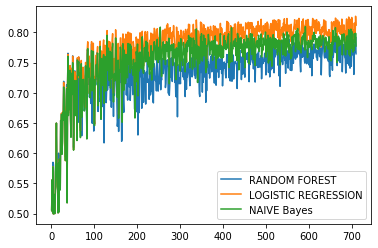

In [84]:
plt.plot(range(1,711,1),rF_auc)
plt.plot(range(1,711,1),log_auc)
plt.plot(range(1,711,1),nB_auc)
plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION','NAIVE Bayes'])

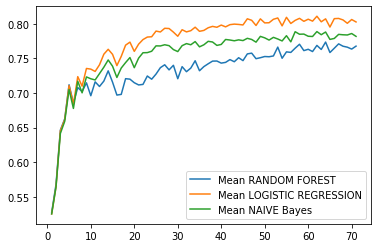

In [81]:
plt.plot(range(1,72,1),mean_rF_auc)
plt.plot(range(1,72,1),mean_log_auc)
plt.plot(range(1,72,1),mean_nB_auc)
plt.legend(['Mean RANDOM FOREST','Mean LOGISTIC REGRESSION','Mean NAIVE Bayes'])

In [127]:
rF_auc = []
nB_auc= []
log_auc = []

for i in range(1,11,1):
    for j in range(1,len(features)+1,1):
        c = random.choices(features,k= j)
        #c = list(res[:i]['features'])
        print(c)
        rf.fit(X_train[c],y_train)
        probs = rf.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        rF_auc.append(a)
    
        log.fit(X_train[c],y_train)
        probs = log.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        log_auc.append(a)
    
        nB.fit(X_train[c],y_train)
        probs = nB.predict_proba(X_test[c])[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        a=auc(fpr,tpr)
        print(a)
        nB_auc.append(a)
    

['G-21']
0.6299248397731557
0.6299248397731557
0.6299248397731557
['ELIX15', 'ELIX21']
0.6359495937176639
0.6359495937176639
0.6359495937176639
['ELIX12', 'drugs_m11-12', 'ELIX5']
0.6347401958818293
0.6286050037299366
0.6297922625875332
['ELIX9', 'ELIX6', 'ELIX8', 'ELIX27']
0.7539436899901337
0.7540715506108272
0.7550862216945945
['drugs_m1-2', 'G-5', 'B', 'drugs_m10-11', 'ELIX2']
0.6064133732262748
0.5879389092542533
0.5876496105625386
['G-9', 'drugs_m2-3', 'drugs_m10-11', 'ELIX9', 'drugs_m9-10', 'drugs_m8-9']
0.6081203205339023
0.6548117304499186
0.639233477985353
['ELIX5', 'G-11', 'G-6', 'ELIX23', 'ELIX26', 'drugs_m3-4', 'G-11']
0.7298940056310009
0.7344785548701741
0.7337914123224271
['ELIX10', 'drugs_m7-8', 'G-11', 'G-18', 'drugs_m10-11', 'ELIX2', 'drugs_m1-2', 'G-2']
0.7220244170470133
0.7567281959139147
0.7494668998211234
['drugs_m1-2', 'G-12', 'drugs_m5-6', 'ELIX26', 'ELIX11', 'G-22', 'G-22', 'G-20', 'drugs_m8-9']
0.6797624070523877
0.7364395870599276
0.7331581092029167
['ELIX2

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7326266293405632
0.7219126954206005
['ELIX10', 'G-8', 'age', 'ELIX12', 'ELIX28', 'G-11', 'drugs_m4-5', 'G-16', 'ELIX24', 'ELIX10', 'ELIX8', 'G-17', 'ELIX12', 'ELIX14', 'G-13', 'ELIX29', 'ELIX7']
0.6933981887748963


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7965420199411231
0.7799546792655635
['ELIX13', 'G-20', 'drugs_m6-7', 'ELIX26', 'ELIX22', 'G-10', 'G-23', 'G-3', 'G-20', 'ELIX25', 'ELIX19', 'G-18', 'ELIX16', 'G-21', 'drugs_m3-4', 'G-10', 'G-12', 'drugs_m5-6']
0.704359084601378


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7573045793995202
0.741384087208323
['ELIX2', 'G-16', 'G-21', 'ELIX19', 'ELIX9', 'ELIX28', 'drugs_m9-10', 'ELIX23', 'ELIX4', 'ELIX20', 'G-13', 'G-22', 'G-2', 'ELIX12', 'G-23', 'Am.N', 'G-17', 'B', 'ELIX21']
0.7431561680316362
0.7955443702022188
0.776877104606672
['G-18', 'G-14', 'G-14', 'Am.N', 'G-22', 'A', 'drugs_m5-6', 'drugs_m1-2', 'G-12', 'G-20', 'G-8', 'G-17', 'ELIX2', 'G-18', 'ELIX25', 'ELIX2', 'drugs_m10-11', 'G-12', 'ELIX18', 'ELIX4']
0.7152676329742433


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7828068213721353
0.7629992540126899
['drugs_m1-2', 'drugs_m6-7', 'G-3', 'ELIX21', 'ELIX16', 'G-3', 'Am.N', 'G-7', 'U', 'drugs_m2-3', 'ELIX7', 'drugs_m3-4', 'ELIX21', 'ELIX24', 'drugs_m8-9', 'G-10', 'G-19', 'ELIX5', 'ELIX2', 'ELIX11', 'ELIX13']
0.697535129585215
0.7416704821644862
0.7328649281686412
['ELIX7', 'G-17', 'ELIX8', 'W', 'ELIX5', 'ELIX10', 'ELIX20', 'ELIX1', 'ELIX20', 'Am.N', 'G-18', 'ELIX20', 'A', 'G-6', 'G-18', 'O', 'O', 'ELIX10', 'ELIX17', 'ELIX17', 'G-17', 'drugs_m5-6']
0.7484359774439105
0.7740824436298298
0.7484225978005405
['age', 'G-8', 'G-23', 'ELIX1', 'G-6', 'drugs_m2-3', 'G-5', 'G-2', 'ELIX5', 'drugs_m8-9', 'drugs_m2-3', 'ELIX19', 'A', 'ELIX18', 'B', 'ELIX1', 'G-22', 'G-16', 'G-7', 'G-22', 'G-15', 'ELIX28', 'ELIX14']
0.6983059510536068


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7889481739353638
0.7792135849904144
['ELIX28', 'G-19', 'ELIX7', 'ELIX9', 'G-17', 'ELIX22', 'G-7', 'G-9', 'ELIX29', 'drugs_m11-12', 'ELIX4', 'ELIX11', 'ELIX3', 'G-22', 'B', 'ELIX15', 'drugs_m9-10', 'G-13', 'ELIX3', 'ELIX3', 'G-8', 'ELIX1', 'ELIX3', 'age']
0.6972042962451972


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.789538546688378
0.7620276095518461
['ELIX26', 'G-13', 'W', 'G-18', 'ELIX16', 'G-13', 'ELIX2', 'drugs_m4-5', 'ELIX20', 'G-4', 'ELIX29', 'ELIX5', 'ELIX19', 'ELIX25', 'ELIX14', 'ELIX13', 'H', 'ELIX2', 'G-16', 'ELIX4', 'G-4', 'drugs_m1-2', 'G-12', 'ELIX5', 'ELIX12']
0.7148280779997914


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7853371942855767
0.7645639343210313
['G-16', 'ELIX19', 'ELIX14', 'drugs_m2-3', 'ELIX4', 'drugs_m11-12', 'ELIX1', 'U', 'ELIX7', 'ELIX4', 'U', 'drugs_m5-6', 'G-3', 'drugs_m0-1', 'G-8', 'ELIX12', 'ELIX9', 'ELIX25', 'G-6', 'G-17', 'ELIX22', 'ELIX11', 'U', 'ELIX23', 'ELIX13', 'ELIX23']
0.7437842251758685


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7963922128550458
0.7649374413437396
['drugs_m10-11', 'ELIX27', 'G-20', 'ELIX20', 'ELIX9', 'G-20', 'ELIX13', 'O', 'G-13', 'ELIX22', 'ELIX11', 'G-3', 'age', 'ELIX4', 'ELIX8', 'ELIX23', 'G-3', 'U', 'G-4', 'G-20', 'G-17', 'H', 'drugs_m9-10', 'ELIX26', 'drugs_m8-9', 'G-10', 'age']
0.7099816310651575


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7843014270015322
0.7619861551172323
['G-8', 'ELIX25', 'U', 'drugs_m3-4', 'G-17', 'G-12', 'ELIX26', 'drugs_m6-7', 'W', 'G-4', 'ELIX14', 'ELIX6', 'G-4', 'ELIX23', 'ELIX19', 'G-21', 'drugs_m1-2', 'U', 'G-22', 'drugs_m1-2', 'G-7', 'drugs_m6-7', 'G-6', 'G-5', 'G-9', 'G-8', 'ELIX25', 'drugs_m3-4']
0.7551659059735134


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8021870583233733
0.7732058042625555
['W', 'drugs_m5-6', 'G-14', 'ELIX28', 'G-9', 'ELIX18', 'ELIX16', 'drugs_m9-10', 'ELIX5', 'G-16', 'ELIX13', 'ELIX29', 'G-23', 'drugs_m11-12', 'ELIX20', 'drugs_m9-10', 'ELIX2', 'G-19', 'drugs_m3-4', 'ELIX20', 'ELIX13', 'ELIX15', 'ELIX2', 'drugs_m9-10', 'G-16', 'drugs_m9-10', 'ELIX23', 'G-4', 'ELIX24']
0.6728986179181339


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7336308886874634
0.7093208146502282
['G-15', 'drugs_m6-7', 'G-16', 'W', 'ELIX10', 'G-5', 'G-6', 'drugs_m11-12', 'G-15', 'G-19', 'G-7', 'G-9', 'drugs_m3-4', 'drugs_m9-10', 'G-2', 'ELIX6', 'ELIX10', 'drugs_m11-12', 'ELIX20', 'drugs_m1-2', 'ELIX6', 'G-15', 'G-18', 'drugs_m8-9', 'ELIX24', 'ELIX23', 'drugs_m9-10', 'drugs_m1-2', 'drugs_m9-10', 'ELIX15']
0.7512629805802659


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7790690399223532
0.7552108416822416
['drugs_m0-1', 'ELIX21', 'G-3', 'drugs_m8-9', 'drugs_m6-7', 'ELIX28', 'ELIX14', 'G-11', 'drugs_m2-3', 'G-3', 'ELIX11', 'ELIX12', 'ELIX10', 'ELIX25', 'H', 'ELIX13', 'G-17', 'G-5', 'ELIX12', 'ELIX6', 'ELIX2', 'G-9', 'drugs_m1-2', 'W', 'ELIX26', 'drugs_m7-8', 'ELIX7', 'drugs_m1-2', 'ELIX20', 'G-16', 'drugs_m8-9']
0.7726485597632092


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.811453792904297
0.7675087232387079
['ELIX3', 'drugs_m4-5', 'drugs_m4-5', 'drugs_m7-8', 'O', 'A', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m11-12', 'ELIX3', 'U', 'G-3', 'ELIX6', 'ELIX9', 'ELIX12', 'A', 'ELIX23', 'G-23', 'ELIX29', 'ELIX8', 'G-4', 'ELIX27', 'drugs_m10-11', 'drugs_m1-2', 'ELIX11', 'Am.N', 'G-17', 'ELIX24', 'ELIX12', 'ELIX11', 'ELIX13', 'O']
0.7448427571049275
0.7978413052371518
0.7500766522014648
['drugs_m5-6', 'G-8', 'W', 'G-9', 'ELIX23', 'drugs_m11-12', 'G-4', 'drugs_m11-12', 'ELIX7', 'ELIX3', 'ELIX10', 'drugs_m6-7', 'G-4', 'G-6', 'ELIX3', 'ELIX2', 'G-16', 'G-4', 'G-23', 'ELIX22', 'G-7', 'ELIX23', 'drugs_m8-9', 'drugs_m3-4', 'ELIX2', 'ELIX25', 'W', 'ELIX8', 'ELIX23', 'G-13', 'ELIX18', 'ELIX18', 'ELIX14']
0.7470329116767067


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7832259539412996
0.7634325683621166
['ELIX9', 'A', 'ELIX15', 'G-4', 'ELIX21', 'ELIX27', 'G-14', 'drugs_m5-6', 'G-19', 'ELIX12', 'drugs_m11-12', 'B', 'G-16', 'drugs_m2-3', 'G-18', 'drugs_m1-2', 'ELIX17', 'O', 'ELIX16', 'drugs_m0-1', 'B', 'ELIX11', 'ELIX29', 'A', 'G-9', 'ELIX5', 'G-2', 'ELIX16', 'G-3', 'ELIX22', 'ELIX3', 'G-14', 'ELIX11', 'O']
0.7385151162697426


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7875977764765334
0.7580374437501505
['ELIX28', 'ELIX23', 'drugs_m5-6', 'G-9', 'ELIX6', 'drugs_m6-7', 'ELIX25', 'age', 'ELIX28', 'drugs_m10-11', 'ELIX21', 'G-19', 'W', 'ELIX19', 'Am.N', 'G-2', 'W', 'ELIX23', 'drugs_m10-11', 'ELIX7', 'G-15', 'drugs_m5-6', 'ELIX22', 'ELIX17', 'drugs_m10-11', 'ELIX4', 'drugs_m8-9', 'G-13', 'G-17', 'G-12', 'age', 'ELIX8', 'G-10', 'ELIX24', 'ELIX17']
0.7368770725211965


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7971297295996534
0.7746008967890461
['ELIX1', 'ELIX25', 'ELIX20', 'ELIX15', 'G-3', 'ELIX9', 'ELIX17', 'G-23', 'ELIX4', 'ELIX2', 'ELIX2', 'drugs_m9-10', 'ELIX7', 'ELIX2', 'G-7', 'G-22', 'ELIX27', 'G-17', 'G-11', 'G-7', 'drugs_m10-11', 'drugs_m7-8', 'ELIX6', 'drugs_m5-6', 'G-16', 'W', 'U', 'G-21', 'drugs_m5-6', 'drugs_m8-9', 'ELIX18', 'drugs_m11-12', 'drugs_m8-9', 'A', 'G-4', 'G-11']
0.7639054761885664


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8159121980957271
0.7817282039352835
['ELIX3', 'drugs_m10-11', 'ELIX15', 'G-3', 'drugs_m3-4', 'G-8', 'ELIX29', 'ELIX9', 'O', 'drugs_m2-3', 'ELIX18', 'ELIX20', 'ELIX22', 'ELIX13', 'ELIX10', 'U', 'ELIX11', 'G-18', 'drugs_m3-4', 'drugs_m11-12', 'ELIX2', 'ELIX25', 'G-23', 'G-3', 'G-3', 'G-12', 'drugs_m11-12', 'ELIX15', 'ELIX6', 'ELIX16', 'G-18', 'ELIX17', 'ELIX16', 'drugs_m0-1', 'ELIX24', 'G-23', 'ELIX19']
0.7434950387833187


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7961392349218317
0.762953644508972
['G-10', 'age', 'H', 'ELIX21', 'drugs_m10-11', 'B', 'drugs_m0-1', 'ELIX22', 'ELIX25', 'ELIX20', 'drugs_m4-5', 'G-22', 'ELIX29', 'G-17', 'ELIX24', 'ELIX20', 'drugs_m3-4', 'drugs_m6-7', 'G-15', 'G-18', 'G-9', 'H', 'G-19', 'ELIX7', 'G-13', 'ELIX20', 'G-2', 'G-12', 'ELIX19', 'Am.N', 'G-9', 'drugs_m9-10', 'G-23', 'B', 'G-16', 'ELIX17', 'ELIX17', 'G-16']
0.7327029767300087


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7809817513856916
0.7672987398429416
['G-20', 'G-9', 'ELIX19', 'ELIX10', 'G-5', 'ELIX19', 'G-17', 'G-15', 'U', 'ELIX28', 'drugs_m0-1', 'ELIX27', 'ELIX20', 'ELIX17', 'ELIX29', 'ELIX26', 'ELIX18', 'ELIX22', 'drugs_m8-9', 'G-9', 'drugs_m8-9', 'ELIX24', 'drugs_m0-1', 'B', 'age', 'ELIX22', 'G-9', 'G-7', 'G-12', 'ELIX26', 'G-23', 'ELIX10', 'drugs_m6-7', 'drugs_m1-2', 'A', 'ELIX20', 'ELIX20', 'drugs_m6-7', 'G-21']
0.7093019965187259


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.778889297087441
0.7374546431694033
['ELIX21', 'G-12', 'G-11', 'A', 'drugs_m4-5', 'G-19', 'drugs_m3-4', 'G-8', 'ELIX25', 'G-13', 'ELIX25', 'G-19', 'drugs_m2-3', 'ELIX29', 'ELIX27', 'ELIX5', 'A', 'U', 'G-23', 'G-16', 'G-22', 'U', 'G-17', 'drugs_m10-11', 'ELIX9', 'drugs_m3-4', 'G-7', 'ELIX21', 'drugs_m11-12', 'drugs_m1-2', 'ELIX1', 'ELIX10', 'ELIX4', 'G-11', 'ELIX4', 'O', 'ELIX1', 'ELIX2', 'drugs_m7-8', 'ELIX7']
0.7570449918583104


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.809192055636215
0.7866942173951407
['G-7', 'G-9', 'drugs_m10-11', 'U', 'ELIX14', 'ELIX28', 'drugs_m9-10', 'ELIX29', 'G-11', 'drugs_m4-5', 'drugs_m7-8', 'drugs_m4-5', 'G-15', 'ELIX25', 'ELIX23', 'W', 'drugs_m9-10', 'G-19', 'G-10', 'drugs_m5-6', 'drugs_m10-11', 'ELIX13', 'ELIX4', 'ELIX4', 'B', 'ELIX29', 'ELIX14', 'ELIX7', 'ELIX1', 'ELIX27', 'drugs_m11-12', 'G-3', 'drugs_m3-4', 'H', 'G-13', 'age', 'ELIX17', 'drugs_m1-2', 'ELIX14', 'ELIX8', 'ELIX12']
0.7238929788957784


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7909114681511547
0.7798447704685282
['ELIX18', 'ELIX3', 'G-23', 'U', 'ELIX22', 'G-7', 'G-6', 'G-19', 'G-9', 'ELIX2', 'ELIX4', 'drugs_m4-5', 'drugs_m0-1', 'ELIX10', 'Am.N', 'ELIX8', 'drugs_m3-4', 'ELIX5', 'drugs_m1-2', 'G-15', 'ELIX8', 'ELIX11', 'G-21', 'drugs_m4-5', 'ELIX1', 'drugs_m5-6', 'G-3', 'ELIX20', 'G-12', 'G-8', 'W', 'ELIX19', 'G-12', 'ELIX6', 'ELIX29', 'ELIX3', 'ELIX29', 'ELIX28', 'drugs_m6-7', 'W', 'O', 'ELIX25']
0.7484523410365214


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7951993069537246
0.7722178122518388
['ELIX1', 'A', 'O', 'G-8', 'ELIX24', 'G-3', 'ELIX1', 'drugs_m5-6', 'ELIX8', 'ELIX3', 'age', 'ELIX16', 'ELIX29', 'drugs_m9-10', 'drugs_m8-9', 'Am.N', 'ELIX18', 'ELIX29', 'drugs_m8-9', 'drugs_m4-5', 'G-17', 'ELIX6', 'age', 'G-13', 'G-13', 'ELIX26', 'ELIX14', 'G-6', 'age', 'G-21', 'G-16', 'ELIX8', 'ELIX18', 'ELIX7', 'ELIX29', 'G-22', 'G-4', 'ELIX20', 'ELIX27', 'G-19', 'drugs_m8-9', 'G-5', 'G-23']
0.7820836949633825


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036069850080616
0.7971866171480825
['ELIX20', 'drugs_m1-2', 'ELIX17', 'G-23', 'G-18', 'G-16', 'ELIX28', 'ELIX12', 'drugs_m7-8', 'ELIX19', 'ELIX23', 'U', 'O', 'G-7', 'ELIX13', 'U', 'ELIX20', 'ELIX20', 'G-4', 'ELIX17', 'G-16', 'G-12', 'W', 'ELIX13', 'Am.N', 'ELIX3', 'G-7', 'ELIX17', 'G-16', 'drugs_m8-9', 'ELIX3', 'ELIX13', 'drugs_m5-6', 'ELIX23', 'drugs_m9-10', 'ELIX28', 'ELIX19', 'drugs_m4-5', 'ELIX10', 'ELIX28', 'G-14', 'drugs_m5-6', 'ELIX11', 'G-12']
0.7096190170614517


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7568596501078875
0.7307705006136347
['drugs_m1-2', 'ELIX14', 'ELIX10', 'drugs_m7-8', 'age', 'ELIX3', 'ELIX16', 'ELIX18', 'ELIX6', 'ELIX2', 'G-13', 'G-9', 'G-3', 'drugs_m7-8', 'G-12', 'ELIX4', 'ELIX4', 'ELIX7', 'G-20', 'ELIX13', 'ELIX20', 'ELIX8', 'G-23', 'ELIX7', 'G-14', 'G-6', 'ELIX20', 'A', 'ELIX23', 'ELIX29', 'ELIX10', 'G-20', 'ELIX28', 'ELIX18', 'drugs_m1-2', 'ELIX22', 'ELIX22', 'ELIX1', 'G-8', 'ELIX22', 'ELIX12', 'ELIX18', 'G-4', 'drugs_m2-3', 'ELIX2']
0.7484174641244276


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948537784658329
0.7885109612006385
['ELIX8', 'drugs_m5-6', 'W', 'G-17', 'ELIX17', 'ELIX12', 'ELIX28', 'B', 'ELIX28', 'G-6', 'G-8', 'drugs_m5-6', 'G-9', 'ELIX6', 'drugs_m0-1', 'drugs_m5-6', 'G-8', 'ELIX1', 'ELIX1', 'ELIX27', 'drugs_m4-5', 'drugs_m10-11', 'G-2', 'G-9', 'G-5', 'ELIX17', 'G-2', 'ELIX16', 'G-14', 'A', 'ELIX29', 'G-5', 'drugs_m7-8', 'ELIX21', 'G-22', 'ELIX20', 'ELIX25', 'drugs_m3-4', 'G-2', 'ELIX22', 'ELIX9', 'drugs_m3-4', 'G-2', 'B', 'Am.N', 'drugs_m9-10']
0.7526030465159184


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8187032494565523
0.7805170413982851
['G-2', 'Am.N', 'G-22', 'G-6', 'ELIX27', 'drugs_m6-7', 'G-2', 'drugs_m1-2', 'ELIX10', 'G-6', 'G-9', 'ELIX19', 'G-6', 'drugs_m11-12', 'ELIX5', 'B', 'G-19', 'A', 'G-20', 'drugs_m7-8', 'G-11', 'G-16', 'drugs_m8-9', 'ELIX2', 'ELIX26', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m0-1', 'G-9', 'W', 'G-20', 'G-3', 'ELIX2', 'G-9', 'drugs_m3-4', 'ELIX3', 'G-23', 'drugs_m3-4', 'ELIX28', 'ELIX28', 'ELIX8', 'ELIX5', 'G-4', 'ELIX20', 'ELIX6', 'drugs_m6-7', 'G-13']
0.7731794941724754


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8140972510768688
0.7839376579207007
['G-8', 'O', 'drugs_m3-4', 'ELIX21', 'ELIX26', 'ELIX10', 'ELIX15', 'ELIX15', 'ELIX12', 'ELIX9', 'age', 'ELIX25', 'ELIX7', 'G-8', 'U', 'drugs_m11-12', 'ELIX28', 'ELIX27', 'ELIX6', 'G-3', 'ELIX5', 'ELIX28', 'drugs_m4-5', 'ELIX10', 'ELIX10', 'G-15', 'G-23', 'ELIX23', 'ELIX15', 'ELIX23', 'G-17', 'ELIX20', 'ELIX20', 'ELIX21', 'ELIX12', 'G-8', 'ELIX23', 'ELIX14', 'ELIX1', 'G-13', 'drugs_m1-2', 'ELIX18', 'H', 'G-6', 'H', 'A', 'ELIX27', 'G-19']
0.7605784048705753


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8055993807503189
0.7886955168569068
['B', 'G-2', 'G-12', 'ELIX29', 'ELIX21', 'ELIX3', 'ELIX18', 'ELIX20', 'G-11', 'drugs_m2-3', 'G-4', 'drugs_m1-2', 'ELIX17', 'ELIX5', 'ELIX24', 'ELIX15', 'drugs_m5-6', 'ELIX20', 'ELIX29', 'G-7', 'G-16', 'ELIX5', 'G-11', 'ELIX28', 'drugs_m1-2', 'G-7', 'drugs_m5-6', 'ELIX20', 'ELIX19', 'ELIX22', 'G-19', 'G-13', 'ELIX6', 'ELIX17', 'G-22', 'drugs_m4-5', 'ELIX7', 'ELIX21', 'ELIX26', 'G-10', 'B', 'G-8', 'ELIX26', 'G-16', 'drugs_m3-4', 'ELIX19', 'ELIX9', 'G-22', 'ELIX5']
0.7580284116887388


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8168787409659333
0.7883425926668646
['G-12', 'ELIX12', 'ELIX18', 'G-6', 'ELIX15', 'ELIX1', 'G-6', 'drugs_m7-8', 'ELIX10', 'drugs_m1-2', 'G-4', 'G-8', 'G-9', 'ELIX12', 'A', 'G-11', 'ELIX27', 'ELIX13', 'drugs_m9-10', 'ELIX12', 'G-4', 'G-6', 'drugs_m1-2', 'ELIX4', 'ELIX7', 'G-23', 'ELIX16', 'G-13', 'G-2', 'drugs_m10-11', 'G-23', 'ELIX8', 'G-7', 'ELIX15', 'drugs_m2-3', 'drugs_m0-1', 'G-12', 'ELIX7', 'G-12', 'drugs_m5-6', 'G-3', 'G-5', 'drugs_m11-12', 'Am.N', 'drugs_m3-4', 'ELIX6', 'ELIX1', 'drugs_m11-12', 'ELIX1', 'G-16']
0.7590311951037565


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8139224654479533
0.7884749292114193
['ELIX27', 'ELIX20', 'drugs_m5-6', 'G-12', 'ELIX15', 'G-13', 'drugs_m9-10', 'ELIX26', 'ELIX22', 'drugs_m1-2', 'drugs_m3-4', 'Am.N', 'ELIX3', 'ELIX17', 'G-9', 'G-7', 'G-2', 'G-19', 'G-4', 'G-13', 'ELIX4', 'G-22', 'ELIX20', 'drugs_m4-5', 'ELIX20', 'ELIX1', 'ELIX29', 'G-6', 'ELIX1', 'ELIX3', 'ELIX28', 'G-8', 'drugs_m3-4', 'G-23', 'ELIX12', 'G-15', 'ELIX6', 'drugs_m5-6', 'ELIX18', 'ELIX14', 'ELIX21', 'G-5', 'G-21', 'G-13', 'G-22', 'drugs_m0-1', 'ELIX9', 'ELIX24', 'ELIX25', 'U', 'ELIX15']
0.7752347132761676


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8196797388242277
0.7940375720920533
['G-18', 'G-22', 'G-14', 'G-7', 'G-11', 'G-4', 'drugs_m9-10', 'G-21', 'W', 'drugs_m1-2', 'A', 'G-7', 'ELIX17', 'drugs_m11-12', 'drugs_m3-4', 'A', 'ELIX29', 'ELIX19', 'ELIX28', 'G-17', 'ELIX18', 'ELIX5', 'ELIX26', 'G-6', 'G-16', 'Am.N', 'age', 'ELIX12', 'G-15', 'U', 'G-13', 'drugs_m9-10', 'W', 'drugs_m5-6', 'G-14', 'U', 'ELIX15', 'G-5', 'G-4', 'ELIX3', 'G-7', 'Am.N', 'drugs_m7-8', 'G-4', 'drugs_m5-6', 'ELIX17', 'drugs_m10-11', 'G-16', 'G-6', 'drugs_m1-2', 'G-13', 'drugs_m2-3']
0.7329984518757972


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7839064547955753
0.7721808979120377
['G-15', 'G-11', 'ELIX24', 'ELIX20', 'G-8', 'G-15', 'drugs_m9-10', 'ELIX24', 'G-5', 'ELIX25', 'ELIX27', 'ELIX1', 'ELIX15', 'ELIX7', 'G-16', 'G-17', 'drugs_m1-2', 'ELIX12', 'ELIX16', 'H', 'drugs_m1-2', 'A', 'G-15', 'ELIX28', 'ELIX23', 'drugs_m8-9', 'ELIX3', 'ELIX13', 'ELIX18', 'ELIX20', 'ELIX12', 'drugs_m3-4', 'drugs_m11-12', 'G-14', 'G-14', 'A', 'G-6', 'ELIX23', 'G-18', 'G-13', 'drugs_m0-1', 'ELIX21', 'ELIX6', 'ELIX12', 'G-10', 'ELIX9', 'A', 'U', 'Am.N', 'ELIX20', 'B', 'ELIX14', 'G-9']
0.7589352274459159


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8241931545637579
0.791965812925634
['drugs_m9-10', 'G-16', 'ELIX19', 'G-8', 'drugs_m11-12', 'G-16', 'drugs_m11-12', 'G-9', 'G-21', 'ELIX8', 'ELIX7', 'ELIX14', 'G-21', 'ELIX8', 'ELIX22', 'ELIX21', 'G-8', 'drugs_m6-7', 'G-22', 'ELIX17', 'ELIX13', 'Am.N', 'ELIX7', 'ELIX4', 'ELIX20', 'drugs_m10-11', 'G-20', 'G-19', 'ELIX26', 'G-9', 'ELIX7', 'G-3', 'ELIX15', 'ELIX15', 'A', 'H', 'ELIX8', 'G-10', 'ELIX20', 'drugs_m1-2', 'drugs_m4-5', 'G-16', 'ELIX15', 'ELIX4', 'G-23', 'drugs_m6-7', 'G-14', 'G-11', 'ELIX29', 'ELIX26', 'G-8', 'drugs_m5-6', 'A', 'H']
0.7608636287068752


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8058202732078257
0.7584741270745264
['G-11', 'drugs_m10-11', 'B', 'ELIX13', 'G-7', 'G-18', 'A', 'drugs_m8-9', 'ELIX28', 'age', 'ELIX22', 'G-18', 'G-14', 'O', 'G-19', 'G-13', 'ELIX16', 'ELIX26', 'ELIX20', 'G-7', 'ELIX24', 'ELIX1', 'G-18', 'U', 'ELIX5', 'G-14', 'G-22', 'ELIX15', 'ELIX10', 'G-22', 'drugs_m6-7', 'drugs_m10-11', 'ELIX1', 'ELIX3', 'G-5', 'ELIX6', 'G-23', 'G-19', 'ELIX1', 'G-18', 'ELIX10', 'drugs_m1-2', 'G-18', 'G-12', 'G-9', 'ELIX13', 'ELIX15', 'O', 'B', 'drugs_m5-6', 'age', 'ELIX8', 'G-3', 'G-21', 'G-6']
0.7803324215710652


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7999412194085043
0.788306592763121
['ELIX6', 'G-9', 'ELIX22', 'ELIX5', 'ELIX29', 'G-22', 'Am.N', 'ELIX13', 'A', 'ELIX20', 'G-13', 'G-8', 'drugs_m1-2', 'U', 'ELIX6', 'O', 'Am.N', 'ELIX9', 'drugs_m6-7', 'G-2', 'G-17', 'ELIX20', 'G-22', 'ELIX12', 'ELIX16', 'G-3', 'ELIX19', 'drugs_m7-8', 'G-19', 'drugs_m7-8', 'ELIX14', 'drugs_m1-2', 'G-11', 'G-17', 'ELIX18', 'ELIX22', 'G-11', 'drugs_m11-12', 'G-9', 'ELIX22', 'G-8', 'ELIX15', 'drugs_m5-6', 'G-15', 'drugs_m8-9', 'Am.N', 'ELIX11', 'G-3', 'ELIX23', 'ELIX8', 'ELIX14', 'ELIX28', 'drugs_m4-5', 'ELIX18', 'G-4', 'ELIX19']
0.7676848564576031


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8206101374060497
0.7973948197999472
['ELIX23', 'G-19', 'ELIX11', 'G-12', 'G-13', 'ELIX13', 'G-17', 'G-11', 'ELIX18', 'ELIX21', 'ELIX7', 'G-17', 'drugs_m5-6', 'ELIX9', 'ELIX3', 'G-19', 'G-13', 'ELIX5', 'G-8', 'ELIX22', 'drugs_m7-8', 'G-23', 'ELIX3', 'G-17', 'G-11', 'drugs_m1-2', 'G-8', 'ELIX3', 'G-16', 'G-9', 'G-4', 'ELIX6', 'G-19', 'drugs_m2-3', 'ELIX3', 'G-12', 'G-17', 'O', 'drugs_m4-5', 'ELIX10', 'B', 'drugs_m2-3', 'G-7', 'drugs_m3-4', 'G-16', 'drugs_m7-8', 'drugs_m7-8', 'ELIX1', 'ELIX3', 'G-15', 'G-10', 'ELIX13', 'G-13', 'ELIX20', 'ELIX9', 'ELIX6', 'G-19']
0.7587918214122422


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8179276472522801
0.7896803163627906
['Am.N', 'G-2', 'ELIX20', 'ELIX3', 'drugs_m2-3', 'O', 'ELIX22', 'ELIX4', 'ELIX12', 'ELIX2', 'G-8', 'G-5', 'ELIX1', 'drugs_m7-8', 'G-17', 'drugs_m3-4', 'ELIX20', 'G-21', 'A', 'G-10', 'G-18', 'G-3', 'ELIX8', 'ELIX28', 'G-18', 'ELIX17', 'G-6', 'G-17', 'ELIX21', 'G-15', 'G-5', 'G-14', 'drugs_m6-7', 'G-18', 'ELIX17', 'G-2', 'ELIX13', 'ELIX25', 'drugs_m8-9', 'ELIX23', 'age', 'B', 'ELIX27', 'ELIX7', 'ELIX17', 'G-15', 'G-19', 'ELIX17', 'G-23', 'drugs_m11-12', 'ELIX20', 'G-20', 'G-23', 'drugs_m1-2', 'G-7', 'G-21', 'ELIX16', 'drugs_m4-5']
0.7562636142684112


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8000339945615119
0.7785479236686533
['ELIX11', 'G-3', 'ELIX17', 'ELIX15', 'G-10', 'ELIX13', 'ELIX4', 'G-8', 'ELIX9', 'G-20', 'G-18', 'drugs_m7-8', 'G-18', 'G-14', 'ELIX14', 'ELIX9', 'age', 'ELIX26', 'ELIX4', 'G-7', 'ELIX4', 'drugs_m1-2', 'G-3', 'G-16', 'G-13', 'O', 'H', 'drugs_m1-2', 'O', 'ELIX2', 'G-12', 'ELIX20', 'G-2', 'ELIX8', 'ELIX5', 'G-8', 'ELIX24', 'ELIX20', 'ELIX26', 'B', 'G-5', 'W', 'G-20', 'G-14', 'G-22', 'G-22', 'ELIX11', 'ELIX13', 'G-19', 'drugs_m0-1', 'ELIX20', 'ELIX17', 'ELIX28', 'O', 'ELIX18', 'G-6', 'age', 'G-13', 'G-10']
0.7598491822214379


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7989847513776702
0.7784010042753897
['drugs_m1-2', 'ELIX10', 'ELIX15', 'ELIX9', 'G-5', 'drugs_m4-5', 'G-8', 'ELIX29', 'G-17', 'ELIX14', 'ELIX29', 'drugs_m11-12', 'ELIX10', 'B', 'ELIX20', 'G-12', 'drugs_m6-7', 'ELIX5', 'drugs_m11-12', 'ELIX22', 'age', 'drugs_m2-3', 'G-21', 'drugs_m4-5', 'G-3', 'drugs_m1-2', 'ELIX15', 'G-8', 'Am.N', 'Am.N', 'G-14', 'age', 'G-6', 'drugs_m7-8', 'ELIX17', 'U', 'drugs_m7-8', 'A', 'ELIX26', 'G-12', 'G-15', 'drugs_m8-9', 'G-17', 'ELIX21', 'G-21', 'G-6', 'drugs_m8-9', 'ELIX24', 'G-2', 'drugs_m11-12', 'ELIX29', 'ELIX20', 'ELIX19', 'ELIX14', 'ELIX10', 'ELIX6', 'ELIX5', 'ELIX16', 'G-4', 'G-8']
0.7670526763297424


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8012086438271555
0.7816223218654494
['G-4', 'G-23', 'G-13', 'Am.N', 'drugs_m7-8', 'drugs_m3-4', 'ELIX27', 'G-4', 'O', 'A', 'G-23', 'ELIX6', 'W', 'ELIX11', 'G-19', 'ELIX2', 'A', 'ELIX29', 'G-22', 'G-3', 'ELIX12', 'G-21', 'drugs_m0-1', 'G-22', 'ELIX29', 'ELIX21', 'ELIX24', 'G-19', 'ELIX11', 'drugs_m5-6', 'ELIX26', 'drugs_m1-2', 'ELIX1', 'ELIX19', 'ELIX2', 'ELIX28', 'W', 'drugs_m10-11', 'G-20', 'drugs_m1-2', 'G-8', 'ELIX3', 'A', 'ELIX15', 'ELIX24', 'ELIX23', 'W', 'drugs_m5-6', 'ELIX1', 'ELIX9', 'G-7', 'G-5', 'ELIX29', 'ELIX12', 'ELIX12', 'drugs_m4-5', 'ELIX13', 'G-18', 'G-17', 'ELIX11', 'ELIX12']
0.7629428317036585


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8192594672206759
0.7876965355707605
['drugs_m3-4', 'age', 'G-8', 'age', 'G-8', 'ELIX6', 'G-10', 'ELIX24', 'H', 'ELIX12', 'H', 'U', 'ELIX29', 'G-23', 'O', 'ELIX2', 'ELIX7', 'G-10', 'ELIX17', 'drugs_m9-10', 'drugs_m7-8', 'ELIX24', 'G-22', 'ELIX29', 'ELIX19', 'Am.N', 'G-14', 'ELIX2', 'ELIX6', 'U', 'G-14', 'ELIX25', 'ELIX8', 'drugs_m9-10', 'G-16', 'G-6', 'ELIX28', 'ELIX17', 'ELIX27', 'drugs_m5-6', 'ELIX9', 'ELIX24', 'drugs_m11-12', 'G-20', 'G-3', 'G-5', 'age', 'ELIX14', 'A', 'ELIX15', 'ELIX2', 'H', 'G-3', 'ELIX7', 'G-15', 'G-4', 'ELIX20', 'ELIX26', 'B', 'ELIX4', 'ELIX9', 'ELIX4']
0.7627465167205435


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.796726302870848
0.7723617156103861
['G-3', 'G-18', 'ELIX24', 'drugs_m6-7', 'drugs_m2-3', 'G-18', 'G-12', 'ELIX24', 'ELIX6', 'W', 'ELIX13', 'age', 'drugs_m4-5', 'age', 'ELIX19', 'Am.N', 'ELIX14', 'G-5', 'W', 'ELIX8', 'G-19', 'drugs_m6-7', 'G-22', 'G-18', 'drugs_m6-7', 'ELIX10', 'ELIX11', 'drugs_m7-8', 'G-23', 'ELIX21', 'O', 'ELIX7', 'A', 'drugs_m10-11', 'G-17', 'ELIX4', 'ELIX16', 'G-20', 'ELIX27', 'ELIX3', 'G-22', 'ELIX2', 'ELIX17', 'drugs_m5-6', 'G-15', 'G-2', 'ELIX26', 'ELIX19', 'G-11', 'ELIX9', 'G-2', 'ELIX16', 'ELIX1', 'H', 'ELIX23', 'G-3', 'ELIX28', 'G-8', 'ELIX8', 'G-6', 'drugs_m10-11', 'ELIX26', 'ELIX22']
0.7973194028892971


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8141962668549014
0.7903480151122592
['G-14', 'ELIX2', 'G-2', 'drugs_m6-7', 'ELIX27', 'ELIX16', 'ELIX5', 'drugs_m10-11', 'ELIX11', 'ELIX27', 'ELIX10', 'ELIX14', 'drugs_m11-12', 'ELIX5', 'G-17', 'ELIX13', 'ELIX21', 'G-8', 'ELIX20', 'ELIX21', 'H', 'ELIX5', 'ELIX15', 'G-14', 'ELIX24', 'ELIX27', 'ELIX21', 'G-23', 'G-14', 'G-2', 'drugs_m10-11', 'H', 'G-21', 'drugs_m3-4', 'G-9', 'G-8', 'drugs_m5-6', 'drugs_m4-5', 'ELIX11', 'ELIX13', 'G-23', 'G-15', 'Am.N', 'A', 'G-2', 'G-9', 'drugs_m6-7', 'ELIX15', 'G-17', 'G-20', 'Am.N', 'ELIX1', 'ELIX24', 'drugs_m1-2', 'H', 'drugs_m2-3', 'G-7', 'G-19', 'ELIX28', 'ELIX12', 'ELIX3', 'ELIX22', 'drugs_m1-2', 'H']
0.753010740612993


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8046993831567295
0.7711344461645825
['ELIX13', 'drugs_m6-7', 'ELIX24', 'Am.N', 'G-20', 'ELIX13', 'G-6', 'G-23', 'G-13', 'ELIX1', 'Am.N', 'drugs_m8-9', 'drugs_m7-8', 'B', 'ELIX24', 'ELIX2', 'G-3', 'H', 'ELIX1', 'ELIX29', 'ELIX22', 'ELIX5', 'Am.N', 'drugs_m7-8', 'ELIX24', 'G-17', 'drugs_m10-11', 'ELIX17', 'H', 'G-9', 'Am.N', 'drugs_m2-3', 'ELIX26', 'ELIX26', 'ELIX26', 'G-20', 'G-4', 'G-14', 'G-14', 'ELIX18', 'ELIX23', 'ELIX6', 'ELIX27', 'ELIX4', 'ELIX18', 'ELIX12', 'G-10', 'drugs_m9-10', 'age', 'G-12', 'G-8', 'ELIX3', 'G-6', 'B', 'ELIX16', 'ELIX19', 'G-8', 'ELIX11', 'ELIX20', 'U', 'G-14', 'ELIX16', 'A', 'O', 'ELIX8']
0.776643538386261


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7982985553514563
0.7866522495929156
['G-13', 'A', 'ELIX29', 'ELIX22', 'G-12', 'drugs_m4-5', 'drugs_m10-11', 'Am.N', 'drugs_m7-8', 'ELIX27', 'ELIX15', 'G-6', 'ELIX25', 'ELIX3', 'G-8', 'ELIX27', 'G-4', 'ELIX8', 'B', 'drugs_m9-10', 'drugs_m10-11', 'G-12', 'ELIX16', 'ELIX23', 'ELIX1', 'drugs_m0-1', 'G-17', 'drugs_m9-10', 'ELIX8', 'ELIX12', 'W', 'ELIX24', 'G-17', 'drugs_m8-9', 'ELIX28', 'ELIX17', 'ELIX26', 'ELIX22', 'G-18', 'G-22', 'ELIX9', 'Am.N', 'G-12', 'G-7', 'G-14', 'G-11', 'drugs_m9-10', 'ELIX6', 'drugs_m6-7', 'G-14', 'drugs_m6-7', 'A', 'ELIX7', 'ELIX26', 'age', 'G-10', 'ELIX17', 'Am.N', 'G-4', 'ELIX5', 'ELIX11', 'ELIX4', 'G-15', 'G-20', 'ELIX28', 'drugs_m9-10']
0.7960732511410398


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8126797468455966
0.7948931633872637
['U', 'G-14', 'ELIX14', 'U', 'G-10', 'ELIX27', 'drugs_m0-1', 'ELIX17', 'G-9', 'O', 'G-12', 'drugs_m11-12', 'Am.N', 'ELIX2', 'ELIX28', 'B', 'ELIX12', 'ELIX15', 'ELIX6', 'drugs_m9-10', 'G-10', 'ELIX28', 'drugs_m4-5', 'ELIX1', 'G-15', 'ELIX6', 'ELIX12', 'ELIX10', 'ELIX28', 'ELIX9', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m10-11', 'W', 'drugs_m7-8', 'A', 'drugs_m4-5', 'B', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m9-10', 'ELIX8', 'G-17', 'G-3', 'drugs_m4-5', 'drugs_m8-9', 'ELIX16', 'G-5', 'ELIX2', 'ELIX26', 'ELIX29', 'ELIX4', 'ELIX8', 'drugs_m8-9', 'ELIX7', 'G-11', 'H', 'drugs_m6-7', 'drugs_m9-10', 'ELIX27', 'drugs_m9-10', 'ELIX27', 'G-20', 'G-7', 'ELIX6', 'ELIX25', 'drugs_m6-7']
0.7656109956925249


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8196055411616547
0.7725306135545091
['drugs_m0-1', 'ELIX11', 'ELIX18', 'ELIX12', 'G-18', 'U', 'G-23', 'drugs_m6-7', 'ELIX11', 'A', 'G-11', 'ELIX19', 'G-9', 'ELIX23', 'ELIX9', 'ELIX14', 'drugs_m6-7', 'G-16', 'G-6', 'ELIX20', 'drugs_m11-12', 'drugs_m4-5', 'U', 'ELIX2', 'ELIX22', 'drugs_m2-3', 'drugs_m6-7', 'ELIX26', 'ELIX8', 'drugs_m10-11', 'drugs_m11-12', 'O', 'H', 'drugs_m11-12', 'ELIX13', 'ELIX29', 'ELIX8', 'ELIX10', 'ELIX23', 'ELIX24', 'Am.N', 'G-10', 'G-2', 'G-6', 'ELIX2', 'ELIX14', 'drugs_m7-8', 'ELIX7', 'ELIX22', 'G-12', 'G-15', 'G-12', 'ELIX24', 'G-13', 'ELIX28', 'ELIX14', 'G-8', 'ELIX11', 'drugs_m5-6', 'ELIX4', 'ELIX2', 'drugs_m0-1', 'ELIX7', 'B', 'G-14', 'drugs_m4-5', 'ELIX2', 'ELIX5']
0.7615182526249931


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8126955970705961
0.7841689781578125
['drugs_m5-6', 'O', 'B', 'ELIX29', 'G-17', 'U', 'ELIX11', 'ELIX11', 'ELIX11', 'drugs_m7-8', 'ELIX7', 'drugs_m9-10', 'ELIX7', 'ELIX17', 'G-13', 'G-3', 'ELIX2', 'drugs_m4-5', 'ELIX3', 'ELIX11', 'G-10', 'ELIX15', 'G-18', 'ELIX3', 'G-19', 'ELIX28', 'G-20', 'G-14', 'G-14', 'G-17', 'H', 'B', 'ELIX16', 'ELIX27', 'age', 'ELIX16', 'G-5', 'ELIX2', 'ELIX29', 'G-21', 'G-6', 'ELIX2', 'ELIX15', 'drugs_m2-3', 'G-10', 'drugs_m4-5', 'drugs_m4-5', 'ELIX9', 'G-13', 'ELIX18', 'U', 'drugs_m4-5', 'G-16', 'ELIX24', 'O', 'drugs_m1-2', 'G-3', 'Am.N', 'ELIX4', 'G-16', 'ELIX2', 'ELIX2', 'ELIX4', 'drugs_m5-6', 'ELIX7', 'G-20', 'ELIX5', 'ELIX10', 'G-15']
0.7370071149542381


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7876435624503677
0.7684495496001348
['ELIX22', 'ELIX4', 'G-11', 'drugs_m3-4', 'ELIX9', 'O', 'drugs_m0-1', 'ELIX4', 'ELIX28', 'ELIX29', 'G-4', 'ELIX26', 'G-16', 'A', 'G-2', 'ELIX12', 'G-15', 'G-9', 'ELIX4', 'U', 'ELIX23', 'ELIX6', 'ELIX19', 'drugs_m5-6', 'G-15', 'ELIX4', 'ELIX9', 'G-2', 'G-18', 'ELIX15', 'ELIX11', 'drugs_m9-10', 'ELIX5', 'Am.N', 'G-13', 'ELIX2', 'drugs_m3-4', 'G-11', 'W', 'G-10', 'G-9', 'G-15', 'A', 'drugs_m8-9', 'ELIX28', 'G-22', 'drugs_m10-11', 'G-8', 'ELIX6', 'G-8', 'G-21', 'G-12', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m11-12', 'ELIX3', 'G-14', 'drugs_m3-4', 'ELIX23', 'drugs_m9-10', 'drugs_m8-9', 'ELIX16', 'W', 'ELIX14', 'ELIX8', 'G-23', 'G-7', 'O', 'G-6', 'ELIX5']
0.7734863115339263


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8213023173734829
0.7967038109523772
['H', 'G-7', 'G-15', 'G-20', 'ELIX11', 'Am.N', 'drugs_m6-7', 'G-20', 'ELIX16', 'G-23', 'B', 'drugs_m10-11', 'G-14', 'G-2', 'G-6', 'G-7', 'ELIX17', 'drugs_m6-7', 'G-6', 'O', 'Am.N', 'ELIX22', 'U', 'drugs_m1-2', 'ELIX19', 'G-5', 'G-19', 'G-13', 'G-23', 'Am.N', 'drugs_m4-5', 'G-17', 'O', 'ELIX17', 'O', 'G-22', 'ELIX21', 'drugs_m2-3', 'ELIX28', 'G-10', 'ELIX15', 'G-14', 'drugs_m6-7', 'drugs_m9-10', 'ELIX4', 'ELIX15', 'ELIX15', 'G-8', 'ELIX1', 'drugs_m7-8', 'ELIX19', 'ELIX21', 'drugs_m4-5', 'G-2', 'drugs_m2-3', 'G-16', 'G-19', 'ELIX15', 'G-21', 'H', 'H', 'A', 'G-17', 'G-8', 'G-13', 'ELIX18', 'Am.N', 'drugs_m3-4', 'ELIX7', 'drugs_m3-4', 'ELIX16']
0.7595933486808859


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8075609904786352
0.7756720864382716
['ELIX17']
0.5064549560027913
0.5064549560027913
0.5064549560027913
['ELIX27', 'drugs_m9-10']
0.6672566436988137
0.6638478827596718
0.6617996743324217
['drugs_m2-3', 'ELIX21', 'drugs_m9-10']
0.6635890492271411
0.6540341229034147
0.652509260670426
['G-2', 'ELIX1', 'ELIX17', 'G-4']
0.6674129641364595
0.6675011991946546
0.667241483311542
['ELIX19', 'G-21', 'ELIX10', 'drugs_m3-4', 'ELIX17']
0.673785043355499
0.6766248646393994
0.6702034860869357
['ELIX13', 'G-16', 'G-12', 'drugs_m0-1', 'G-21', 'ELIX6']
0.7566992387720889
0.7539674813703706
0.7544066031909006
['G-15', 'ELIX16', 'ELIX14', 'A', 'ELIX21', 'ELIX20', 'Am.N']
0.7275703754802794
0.7276456159208131
0.7079795615519744
['ELIX24', 'ELIX21', 'G-9', 'ELIX23', 'ELIX23', 'ELIX20', 'ELIX22', 'ELIX5']
0.6616176053005205
0.6620307058002518
0.6463128173454081
['G-15', 'Am.N', 'drugs_m0-1', 'ELIX9', 'ELIX23', 'G-4', 'ELIX6', 'ELIX13', 'G-23']
0.7419029895641992
0.7418718345672873
0.7407205595706964
['ELIX1

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7173203814963063
0.7157977171184035
['G-13', 'A', 'ELIX14', 'ELIX23', 'G-13', 'G-18', 'ELIX29', 'drugs_m7-8', 'G-7', 'ELIX3', 'ELIX14', 'ELIX12', 'ELIX7', 'G-2', 'G-18', 'drugs_m10-11']
0.7315724129079869
0.7781003152397988
0.7680504864960255
['ELIX12', 'drugs_m8-9', 'drugs_m9-10', 'G-5', 'ELIX19', 'ELIX5', 'G-3', 'H', 'ELIX9', 'H', 'ELIX11', 'Am.N', 'ELIX12', 'ELIX27', 'G-12', 'G-11', 'W']
0.713186777575461
0.7800955024184427
0.7486313940337057
['drugs_m1-2', 'drugs_m2-3', 'ELIX1', 'G-23', 'G-20', 'G-8', 'G-20', 'G-20', 'Am.N', 'ELIX20', 'ELIX26', 'ELIX26', 'G-17', 'G-11', 'drugs_m8-9', 'drugs_m9-10', 'G-3', 'ELIX14']
0.7454050390239598


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7895612952906543
0.747995620332566
['ELIX24', 'drugs_m9-10', 'age', 'ELIX24', 'drugs_m2-3', 'B', 'ELIX23', 'ELIX10', 'ELIX3', 'G-12', 'drugs_m11-12', 'ELIX14', 'G-9', 'age', 'ELIX6', 'ELIX15', 'Am.N', 'drugs_m4-5', 'ELIX1']
0.698336063272558


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7682530581469034
0.7470885318488454
['drugs_m7-8', 'age', 'ELIX29', 'G-16', 'ELIX21', 'G-5', 'G-3', 'ELIX3', 'ELIX15', 'G-5', 'ELIX19', 'G-18', 'H', 'ELIX2', 'G-4', 'U', 'G-17', 'ELIX19', 'age', 'U']
0.6832744190523555


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7763964000096257
0.7509960454651191
['ELIX3', 'drugs_m4-5', 'G-4', 'drugs_m3-4', 'G-2', 'G-20', 'A', 'drugs_m8-9', 'G-14', 'ELIX7', 'ELIX26', 'drugs_m1-2', 'ELIX26', 'drugs_m3-4', 'ELIX4', 'ELIX9', 'drugs_m4-5', 'ELIX10', 'G-18', 'ELIX8', 'ELIX23']
0.7088746981959941


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7634882527052067
0.7361472402480208
['ELIX24', 'ELIX4', 'drugs_m7-8', 'ELIX7', 'G-22', 'ELIX25', 'ELIX13', 'drugs_m4-5', 'drugs_m3-4', 'G-2', 'A', 'G-17', 'ELIX20', 'G-17', 'W', 'G-13', 'G-20', 'G-12', 'G-11', 'G-23', 'ELIX8', 'B']
0.7322176839099359


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7981672936703379
0.7866490891735585
['ELIX2', 'G-8', 'Am.N', 'ELIX10', 'ELIX12', 'drugs_m10-11', 'G-23', 'ELIX15', 'ELIX16', 'drugs_m5-6', 'B', 'drugs_m11-12', 'ELIX16', 'drugs_m2-3', 'ELIX2', 'ELIX24', 'drugs_m1-2', 'B', 'Am.N', 'G-7', 'G-19', 'ELIX9', 'ELIX26']
0.6748330993767396


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7219514225897792
0.703791075424932
['G-20', 'G-18', 'ELIX29', 'ELIX12', 'ELIX26', 'ELIX28', 'G-17', 'ELIX20', 'ELIX18', 'drugs_m11-12', 'ELIX23', 'drugs_m10-11', 'ELIX28', 'A', 'ELIX18', 'G-9', 'G-14', 'G-22', 'ELIX5', 'ELIX6', 'G-5', 'ELIX19', 'drugs_m9-10', 'ELIX16']
0.7436167389926764


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7998882944163253
0.7748666447415915
['ELIX14', 'ELIX4', 'drugs_m6-7', 'G-18', 'W', 'ELIX21', 'G-15', 'ELIX22', 'drugs_m11-12', 'ELIX27', 'ELIX1', 'drugs_m7-8', 'drugs_m9-10', 'ELIX17', 'ELIX1', 'drugs_m5-6', 'A', 'G-6', 'G-10', 'G-4', 'ELIX10', 'ELIX13', 'ELIX24', 'G-14', 'ELIX1']
0.7578182678655939


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794751506012016
0.7722625714904506
['drugs_m7-8', 'G-2', 'O', 'ELIX3', 'drugs_m4-5', 'drugs_m3-4', 'drugs_m1-2', 'drugs_m10-11', 'ELIX24', 'O', 'G-15', 'ELIX2', 'ELIX3', 'ELIX4', 'G-13', 'drugs_m0-1', 'G-2', 'ELIX2', 'G-23', 'drugs_m5-6', 'ELIX16', 'drugs_m3-4', 'G-22', 'ELIX23', 'ELIX15', 'ELIX8']
0.7413707396504287
0.769022467854364
0.7453111087938268
['H', 'ELIX29', 'ELIX26', 'ELIX28', 'ELIX15', 'drugs_m10-11', 'G-22', 'G-22', 'A', 'G-6', 'drugs_m9-10', 'ELIX16', 'drugs_m3-4', 'G-11', 'ELIX13', 'drugs_m1-2', 'ELIX6', 'ELIX9', 'G-15', 'ELIX1', 'ELIX9', 'ELIX9', 'ELIX14', 'ELIX3', 'ELIX10', 'ELIX11', 'ELIX21']
0.7644315656910008
0.8181094114721619
0.8073760337539204
['G-6', 'ELIX11', 'ELIX25', 'ELIX24', 'drugs_m0-1', 'ELIX3', 'ELIX17', 'drugs_m2-3', 'drugs_m0-1', 'ELIX13', 'drugs_m4-5', 'ELIX25', 'ELIX16', 'ELIX13', 'drugs_m3-4', 'G-4', 'ELIX9', 'ELIX19', 'drugs_m11-12', 'G-9', 'G-8', 'ELIX26', 'G-20', 'G-15', 'G-11', 'ELIX25', 'G-15', 'G-9']
0.7423597263108922


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.78069668797677
0.757870342592667
['G-17', 'B', 'U', 'drugs_m10-11', 'G-13', 'ELIX24', 'G-19', 'ELIX6', 'G-6', 'ELIX24', 'ELIX27', 'U', 'drugs_m7-8', 'Am.N', 'ELIX27', 'ELIX17', 'drugs_m6-7', 'ELIX20', 'A', 'G-22', 'G-23', 'ELIX27', 'drugs_m2-3', 'H', 'drugs_m1-2', 'G-10', 'G-17', 'drugs_m11-12', 'ELIX22']
0.7794230389758315


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806813880176791
0.7833462584324641
['G-19', 'G-21', 'Am.N', 'ELIX10', 'G-18', 'drugs_m9-10', 'ELIX7', 'ELIX26', 'G-2', 'G-3', 'ELIX26', 'G-21', 'drugs_m3-4', 'drugs_m4-5', 'ELIX27', 'drugs_m10-11', 'drugs_m11-12', 'ELIX23', 'G-21', 'ELIX7', 'G-16', 'ELIX28', 'ELIX13', 'W', 'drugs_m1-2', 'ELIX28', 'G-5', 'ELIX15', 'G-10', 'G-2']
0.7383227317574017


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7717056318031236
0.7524281806733136
['H', 'drugs_m5-6', 'drugs_m6-7', 'G-6', 'G-13', 'drugs_m2-3', 'ELIX14', 'ELIX8', 'ELIX7', 'ELIX18', 'ELIX24', 'ELIX12', 'age', 'G-11', 'drugs_m4-5', 'ELIX15', 'ELIX5', 'drugs_m0-1', 'ELIX10', 'W', 'ELIX25', 'drugs_m4-5', 'G-18', 'G-2', 'drugs_m6-7', 'G-3', 'ELIX5', 'O', 'ELIX2', 'ELIX18', 'ELIX20']
0.7351728685217419


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7887061211066281
0.7796486479982674
['G-7', 'G-10', 'ELIX9', 'G-7', 'drugs_m5-6', 'G-4', 'drugs_m1-2', 'ELIX14', 'ELIX3', 'G-3', 'G-18', 'drugs_m0-1', 'drugs_m1-2', 'G-14', 'ELIX6', 'drugs_m1-2', 'ELIX20', 'ELIX7', 'G-4', 'G-23', 'G-11', 'drugs_m2-3', 'G-4', 'ELIX13', 'drugs_m9-10', 'ELIX12', 'Am.N', 'drugs_m1-2', 'G-17', 'drugs_m0-1', 'ELIX26', 'ELIX20']
0.7630611148098535
0.8131268739923155
0.7701012938468079
['G-17', 'ELIX14', 'W', 'ELIX9', 'G-14', 'G-14', 'U', 'ELIX26', 'ELIX18', 'age', 'ELIX29', 'H', 'drugs_m8-9', 'drugs_m7-8', 'G-17', 'ELIX21', 'drugs_m7-8', 'G-12', 'ELIX6', 'G-21', 'G-12', 'ELIX29', 'ELIX19', 'ELIX24', 'ELIX7', 'ELIX15', 'G-20', 'ELIX16', 'drugs_m11-12', 'ELIX2', 'drugs_m0-1', 'ELIX18', 'G-9']
0.7584367154098519


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7996204288223829
0.79115270280026
['drugs_m0-1', 'age', 'ELIX6', 'ELIX16', 'Am.N', 'ELIX14', 'ELIX6', 'ELIX15', 'G-9', 'ELIX17', 'drugs_m11-12', 'G-13', 'age', 'ELIX25', 'U', 'drugs_m10-11', 'G-21', 'ELIX1', 'G-6', 'H', 'ELIX23', 'G-19', 'drugs_m2-3', 'G-19', 'ELIX20', 'G-14', 'G-8', 'G-11', 'drugs_m3-4', 'G-14', 'ELIX6', 'ELIX24', 'ELIX9', 'G-21']
0.7368292651623927


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029114360656789
0.7923790257245302
['G-11', 'ELIX4', 'ELIX17', 'O', 'ELIX21', 'ELIX16', 'ELIX19', 'drugs_m10-11', 'drugs_m2-3', 'drugs_m5-6', 'G-9', 'drugs_m4-5', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX12', 'G-9', 'ELIX19', 'G-5', 'W', 'G-15', 'drugs_m10-11', 'A', 'G-17', 'G-18', 'drugs_m3-4', 'G-12', 'drugs_m9-10', 'G-6', 'ELIX20', 'G-3', 'G-12', 'U', 'age', 'ELIX3']
0.726922393255633


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7941806893564456
0.7716813430980132
['ELIX27', 'drugs_m11-12', 'age', 'ELIX19', 'ELIX18', 'G-21', 'ELIX3', 'ELIX17', 'ELIX8', 'ELIX16', 'G-8', 'ELIX19', 'drugs_m11-12', 'G-7', 'ELIX10', 'ELIX5', 'drugs_m9-10', 'G-9', 'G-19', 'G-4', 'G-3', 'ELIX24', 'drugs_m10-11', 'G-3', 'ELIX6', 'drugs_m3-4', 'age', 'G-17', 'G-22', 'A', 'G-19', 'U', 'ELIX3', 'ELIX24', 'ELIX27', 'ELIX29']
0.7576080598714977


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.80136841345344
0.7711619113317878
['G-16', 'ELIX23', 'ELIX1', 'drugs_m8-9', 'G-22', 'G-21', 'ELIX1', 'G-12', 'G-3', 'ELIX8', 'ELIX27', 'ELIX12', 'drugs_m7-8', 'ELIX13', 'G-23', 'G-23', 'ELIX20', 'drugs_m0-1', 'ELIX19', 'drugs_m6-7', 'G-21', 'G-22', 'ELIX7', 'ELIX26', 'G-19', 'O', 'ELIX18', 'G-20', 'ELIX3', 'ELIX29', 'Am.N', 'ELIX9', 'ELIX11', 'H', 'drugs_m4-5', 'A', 'W']
0.7442060368822544


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8004895120601282
0.7755995893059109
['ELIX10', 'G-12', 'ELIX21', 'G-14', 'ELIX2', 'drugs_m8-9', 'ELIX18', 'ELIX13', 'ELIX2', 'drugs_m5-6', 'H', 'G-2', 'drugs_m6-7', 'drugs_m2-3', 'O', 'ELIX21', 'G-21', 'G-12', 'age', 'G-19', 'ELIX25', 'ELIX1', 'ELIX18', 'drugs_m6-7', 'G-13', 'ELIX17', 'ELIX23', 'Am.N', 'age', 'ELIX5', 'drugs_m7-8', 'ELIX6', 'ELIX15', 'ELIX9', 'ELIX7', 'ELIX4', 'ELIX19', 'ELIX18']
0.745132617292467


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.784433635204184
0.7862268282705127
['G-14', 'G-20', 'drugs_m0-1', 'drugs_m7-8', 'G-17', 'ELIX16', 'G-12', 'O', 'G-6', 'ELIX17', 'ELIX21', 'ELIX18', 'W', 'drugs_m5-6', 'ELIX21', 'ELIX24', 'drugs_m3-4', 'ELIX26', 'A', 'ELIX23', 'G-4', 'ELIX7', 'G-9', 'ELIX9', 'Am.N', 'G-22', 'drugs_m6-7', 'drugs_m0-1', 'G-7', 'ELIX22', 'Am.N', 'ELIX12', 'ELIX3', 'ELIX11', 'U', 'ELIX26', 'drugs_m6-7', 'ELIX19', 'G-10']
0.7537065943673948


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8037364819880162
0.776953965363729
['ELIX14', 'G-4', 'ELIX16', 'drugs_m9-10', 'ELIX27', 'ELIX25', 'ELIX21', 'ELIX16', 'H', 'ELIX29', 'drugs_m0-1', 'G-18', 'ELIX6', 'drugs_m10-11', 'drugs_m0-1', 'ELIX4', 'ELIX5', 'drugs_m8-9', 'ELIX2', 'ELIX20', 'G-18', 'ELIX27', 'ELIX28', 'ELIX25', 'ELIX18', 'ELIX8', 'G-3', 'G-10', 'ELIX6', 'G-5', 'ELIX10', 'drugs_m2-3', 'ELIX24', 'G-12', 'drugs_m6-7', 'G-18', 'drugs_m9-10', 'G-17', 'ELIX22', 'G-16']
0.7689788957783535


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.812913954775522
0.7862486624367313
['ELIX10', 'U', 'ELIX25', 'G-2', 'ELIX21', 'ELIX17', 'drugs_m7-8', 'ELIX21', 'ELIX18', 'ELIX12', 'G-16', 'ELIX9', 'W', 'ELIX8', 'ELIX14', 'G-10', 'W', 'U', 'age', 'W', 'G-22', 'G-12', 'drugs_m7-8', 'G-17', 'G-16', 'ELIX18', 'drugs_m9-10', 'G-13', 'drugs_m9-10', 'G-22', 'G-17', 'ELIX14', 'ELIX5', 'B', 'G-16', 'ELIX28', 'ELIX14', 'ELIX14', 'G-15', 'U', 'ELIX21']
0.7458209149173398


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069235162472828
0.8025714262796089
['U', 'drugs_m8-9', 'G-16', 'ELIX2', 'G-3', 'G-17', 'ELIX20', 'ELIX15', 'G-11', 'ELIX8', 'ELIX21', 'ELIX12', 'ELIX6', 'U', 'drugs_m1-2', 'drugs_m4-5', 'G-13', 'O', 'ELIX25', 'G-20', 'G-9', 'G-13', 'drugs_m8-9', 'ELIX20', 'drugs_m8-9', 'H', 'ELIX1', 'G-10', 'G-3', 'G-17', 'ELIX29', 'ELIX2', 'ELIX10', 'G-5', 'G-17', 'ELIX18', 'ELIX28', 'drugs_m3-4', 'ELIX3', 'G-5', 'ELIX24', 'ELIX19']
0.7442477640434116


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8150991681840422
0.7855266108914147
['ELIX12', 'ELIX23', 'G-6', 'G-10', 'ELIX8', 'drugs_m4-5', 'G-18', 'ELIX27', 'drugs_m1-2', 'ELIX7', 'drugs_m10-11', 'ELIX5', 'ELIX29', 'ELIX23', 'G-2', 'G-15', 'ELIX9', 'G-17', 'ELIX20', 'G-4', 'B', 'age', 'drugs_m6-7', 'ELIX19', 'G-23', 'G-18', 'G-23', 'U', 'G-5', 'drugs_m0-1', 'Am.N', 'ELIX18', 'G-23', 'ELIX16', 'G-21', 'G-14', 'drugs_m5-6', 'ELIX9', 'G-2', 'ELIX1', 'ELIX25', 'G-2', 'ELIX15']
0.7520114545148275


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7895191510183128
0.7822581918230166
['ELIX22', 'ELIX29', 'ELIX6', 'U', 'drugs_m8-9', 'ELIX12', 'ELIX20', 'drugs_m2-3', 'ELIX24', 'G-21', 'ELIX13', 'ELIX24', 'ELIX11', 'ELIX28', 'Am.N', 'ELIX23', 'age', 'G-23', 'G-2', 'G-16', 'ELIX21', 'drugs_m4-5', 'drugs_m1-2', 'G-22', 'ELIX22', 'drugs_m5-6', 'G-3', 'G-5', 'ELIX25', 'drugs_m9-10', 'A', 'G-4', 'ELIX1', 'G-3', 'drugs_m6-7', 'ELIX18', 'G-15', 'G-5', 'ELIX12', 'A', 'G-20', 'ELIX27', 'ELIX6', 'drugs_m0-1']
0.7578171448739442


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995602845981695
0.773430883874642
['drugs_m7-8', 'ELIX6', 'age', 'G-20', 'ELIX3', 'ELIX14', 'ELIX28', 'G-19', 'G-23', 'ELIX6', 'ELIX9', 'A', 'G-15', 'ELIX1', 'ELIX10', 'ELIX11', 'G-4', 'ELIX7', 'ELIX20', 'ELIX26', 'drugs_m11-12', 'drugs_m11-12', 'ELIX19', 'drugs_m0-1', 'ELIX19', 'ELIX26', 'A', 'drugs_m3-4', 'ELIX23', 'G-16', 'ELIX4', 'ELIX15', 'G-9', 'ELIX28', 'ELIX1', 'drugs_m6-7', 'age', 'G-16', 'ELIX28', 'drugs_m5-6', 'ELIX27', 'ELIX13', 'ELIX23', 'G-13', 'ELIX25']
0.7449740027433082


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7908818051288634
0.7728934842420208
['G-18', 'A', 'G-4', 'drugs_m0-1', 'A', 'G-10', 'ELIX19', 'ELIX15', 'ELIX1', 'ELIX19', 'A', 'W', 'ELIX6', 'ELIX11', 'ELIX17', 'ELIX12', 'B', 'G-5', 'drugs_m8-9', 'G-11', 'ELIX4', 'G-20', 'W', 'ELIX28', 'ELIX3', 'ELIX3', 'drugs_m10-11', 'drugs_m8-9', 'ELIX6', 'G-11', 'ELIX9', 'G-17', 'G-14', 'ELIX8', 'ELIX11', 'G-4', 'G-20', 'G-17', 'O', 'drugs_m2-3', 'ELIX13', 'H', 'G-20', 'G-19', 'G-3', 'G-21']
0.7469109066553297


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8138355138087866
0.7886269501953205
['ELIX14', 'drugs_m6-7', 'drugs_m7-8', 'ELIX18', 'ELIX1', 'ELIX22', 'drugs_m3-4', 'B', 'G-20', 'drugs_m5-6', 'G-11', 'ELIX10', 'G-14', 'G-8', 'ELIX26', 'ELIX27', 'drugs_m3-4', 'ELIX6', 'G-18', 'G-19', 'W', 'G-3', 'drugs_m4-5', 'ELIX8', 'drugs_m0-1', 'ELIX22', 'ELIX16', 'drugs_m0-1', 'ELIX2', 'ELIX3', 'G-21', 'G-7', 'G-13', 'Am.N', 'ELIX19', 'G-13', 'ELIX28', 'H', 'ELIX22', 'ELIX11', 'ELIX26', 'B', 'ELIX23', 'ELIX29', 'ELIX21', 'ELIX6', 'G-11']
0.7674058251181146


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8206185117152093
0.7997900326469716
['G-17', 'G-15', 'ELIX8', 'G-3', 'G-19', 'drugs_m10-11', 'ELIX21', 'O', 'G-16', 'H', 'ELIX7', 'ELIX3', 'ELIX8', 'G-23', 'G-2', 'G-12', 'A', 'drugs_m7-8', 'G-15', 'W', 'ELIX17', 'G-23', 'G-12', 'drugs_m10-11', 'ELIX25', 'ELIX13', 'ELIX25', 'ELIX28', 'drugs_m10-11', 'drugs_m7-8', 'drugs_m5-6', 'G-21', 'G-9', 'G-19', 'G-7', 'G-3', 'O', 'G-19', 'drugs_m4-5', 'G-15', 'ELIX15', 'ELIX2', 'ELIX8', 'G-2', 'G-20', 'drugs_m5-6', 'G-16', 'G-23']
0.7371980235346964


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.792740211924567
0.742881404060417
['ELIX22', 'G-5', 'ELIX22', 'G-13', 'G-17', 'ELIX5', 'ELIX7', 'ELIX18', 'ELIX28', 'G-11', 'G-16', 'G-5', 'drugs_m7-8', 'ELIX9', 'G-19', 'ELIX2', 'W', 'G-13', 'G-3', 'G-18', 'G-6', 'G-23', 'ELIX22', 'ELIX15', 'ELIX6', 'ELIX26', 'drugs_m6-7', 'G-11', 'G-2', 'drugs_m11-12', 'ELIX29', 'ELIX23', 'ELIX28', 'ELIX11', 'G-2', 'ELIX27', 'ELIX28', 'ELIX28', 'ELIX9', 'W', 'ELIX12', 'ELIX22', 'G-18', 'G-2', 'H', 'ELIX13', 'ELIX28', 'ELIX12', 'ELIX10']
0.7664754907072441


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.818920532298042
0.7908740244010043
['G-9', 'G-5', 'drugs_m4-5', 'drugs_m3-4', 'G-7', 'G-14', 'G-9', 'G-21', 'drugs_m10-11', 'ELIX12', 'ELIX12', 'drugs_m6-7', 'ELIX14', 'G-19', 'G-7', 'G-12', 'G-20', 'G-3', 'ELIX27', 'ELIX21', 'G-20', 'drugs_m9-10', 'drugs_m2-3', 'drugs_m5-6', 'ELIX10', 'drugs_m4-5', 'G-15', 'ELIX22', 'G-6', 'drugs_m7-8', 'G-21', 'G-4', 'G-3', 'ELIX1', 'ELIX17', 'ELIX25', 'ELIX13', 'H', 'G-15', 'ELIX11', 'G-7', 'G-2', 'ELIX12', 'ELIX3', 'ELIX6', 'ELIX2', 'G-2', 'ELIX15', 'ELIX18', 'G-13']
0.7661901224863035


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130370186175974
0.7852727024794051
['G-3', 'ELIX27', 'G-3', 'ELIX24', 'ELIX4', 'O', 'drugs_m9-10', 'G-12', 'G-8', 'H', 'A', 'drugs_m0-1', 'G-5', 'ELIX5', 'drugs_m10-11', 'ELIX14', 'ELIX29', 'ELIX25', 'G-20', 'ELIX16', 'G-13', 'G-3', 'ELIX1', 'Am.N', 'G-2', 'G-16', 'G-6', 'ELIX4', 'drugs_m0-1', 'drugs_m11-12', 'G-13', 'ELIX15', 'ELIX4', 'H', 'age', 'ELIX19', 'G-8', 'ELIX2', 'G-5', 'ELIX3', 'ELIX18', 'G-14', 'ELIX14', 'drugs_m3-4', 'drugs_m11-12', 'ELIX12', 'G-19', 'G-19', 'ELIX21', 'G-20', 'drugs_m9-10']
0.7598563212397829


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7930940986788806
0.7820702671917988
['ELIX3', 'G-14', 'W', 'ELIX1', 'B', 'G-10', 'G-4', 'ELIX21', 'G-7', 'ELIX28', 'ELIX10', 'Am.N', 'ELIX23', 'age', 'G-23', 'ELIX23', 'ELIX17', 'B', 'ELIX19', 'ELIX13', 'ELIX9', 'ELIX15', 'G-7', 'G-23', 'ELIX11', 'G-18', 'drugs_m0-1', 'H', 'ELIX27', 'ELIX26', 'ELIX17', 'drugs_m0-1', 'ELIX27', 'drugs_m4-5', 'ELIX21', 'G-7', 'ELIX21', 'ELIX7', 'ELIX8', 'G-11', 'ELIX25', 'ELIX26', 'G-20', 'H', 'ELIX18', 'G-12', 'ELIX15', 'ELIX24', 'W', 'ELIX2', 'G-23', 'ELIX27']
0.7492827131478258


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8016914179373852
0.7791474889104575
['G-13', 'A', 'drugs_m7-8', 'ELIX2', 'age', 'drugs_m8-9', 'ELIX22', 'drugs_m0-1', 'G-2', 'ELIX16', 'B', 'drugs_m4-5', 'ELIX19', 'ELIX6', 'G-15', 'drugs_m11-12', 'ELIX13', 'G-16', 'ELIX6', 'G-5', 'B', 'G-22', 'G-13', 'drugs_m4-5', 'ELIX17', 'G-11', 'G-20', 'drugs_m11-12', 'G-8', 'G-11', 'ELIX6', 'ELIX17', 'drugs_m0-1', 'ELIX3', 'ELIX24', 'drugs_m0-1', 'ELIX5', 'G-21', 'ELIX18', 'drugs_m8-9', 'G-8', 'G-16', 'G-12', 'H', 'G-10', 'G-13', 'G-14', 'G-2', 'drugs_m10-11', 'ELIX15', 'ELIX26', 'drugs_m2-3', 'ELIX22']
0.7554980387752974


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7969016820810639
0.7912356277122253
['drugs_m1-2', 'H', 'ELIX7', 'O', 'drugs_m1-2', 'G-18', 'drugs_m4-5', 'B', 'G-21', 'ELIX24', 'G-4', 'G-6', 'G-17', 'ELIX12', 'G-7', 'ELIX19', 'ELIX21', 'ELIX20', 'ELIX11', 'drugs_m5-6', 'ELIX2', 'ELIX4', 'G-12', 'B', 'G-23', 'drugs_m8-9', 'drugs_m1-2', 'G-10', 'ELIX15', 'G-5', 'ELIX14', 'G-11', 'drugs_m8-9', 'drugs_m3-4', 'ELIX7', 'drugs_m11-12', 'ELIX18', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m8-9', 'drugs_m7-8', 'drugs_m4-5', 'ELIX24', 'ELIX16', 'G-22', 'G-10', 'ELIX12', 'B', 'ELIX18', 'G-6', 'ELIX18', 'ELIX24', 'H', 'G-6']
0.7609254574185631


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8146030625586563
0.7814582688281582
['ELIX21', 'ELIX17', 'ELIX7', 'ELIX13', 'U', 'G-21', 'G-13', 'B', 'G-19', 'ELIX26', 'ELIX26', 'ELIX18', 'G-18', 'ELIX17', 'G-7', 'ELIX13', 'ELIX11', 'G-13', 'G-22', 'drugs_m11-12', 'G-16', 'ELIX9', 'drugs_m7-8', 'G-3', 'G-13', 'U', 'G-18', 'drugs_m11-12', 'G-23', 'ELIX16', 'G-18', 'ELIX6', 'ELIX2', 'G-15', 'ELIX12', 'ELIX19', 'G-20', 'G-13', 'ELIX9', 'drugs_m10-11', 'ELIX2', 'G-21', 'drugs_m4-5', 'drugs_m0-1', 'ELIX2', 'ELIX22', 'G-22', 'ELIX21', 'ELIX2', 'ELIX10', 'G-11', 'drugs_m4-5', 'ELIX29', 'ELIX19', 'drugs_m11-12']
0.7553519054761885


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8190062646891318
0.7952530501255344
['G-23', 'ELIX20', 'G-6', 'G-6', 'ELIX17', 'ELIX11', 'B', 'G-17', 'ELIX27', 'G-16', 'G-19', 'G-8', 'ELIX5', 'drugs_m7-8', 'ELIX24', 'ELIX22', 'ELIX1', 'G-16', 'ELIX4', 'ELIX1', 'G-13', 'ELIX9', 'G-5', 'ELIX22', 'drugs_m11-12', 'G-8', 'G-14', 'B', 'G-16', 'Am.N', 'ELIX28', 'age', 'drugs_m1-2', 'U', 'G-14', 'ELIX24', 'Am.N', 'ELIX29', 'G-21', 'ELIX13', 'G-20', 'drugs_m1-2', 'ELIX7', 'ELIX24', 'W', 'G-6', 'U', 'G-12', 'G-17', 'ELIX7', 'G-5', 'O', 'drugs_m9-10', 'drugs_m0-1', 'G-17', 'ELIX22']
0.7428679442033577


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.783690006176454
0.7760683741487322
['G-21', 'ELIX16', 'ELIX15', 'drugs_m7-8', 'ELIX28', 'ELIX21', 'drugs_m7-8', 'ELIX21', 'H', 'drugs_m7-8', 'ELIX16', 'ELIX29', 'G-6', 'G-14', 'G-17', 'G-12', 'H', 'G-17', 'G-22', 'drugs_m1-2', 'ELIX23', 'G-20', 'ELIX9', 'ELIX3', 'ELIX2', 'ELIX19', 'ELIX10', 'ELIX1', 'ELIX7', 'ELIX4', 'ELIX17', 'G-23', 'G-14', 'B', 'ELIX4', 'ELIX12', 'G-20', 'drugs_m9-10', 'ELIX27', 'ELIX20', 'ELIX11', 'ELIX22', 'ELIX5', 'age', 'G-10', 'drugs_m10-11', 'ELIX22', 'drugs_m1-2', 'G-21', 'age', 'ELIX5', 'ELIX26', 'ELIX6', 'drugs_m6-7', 'ELIX13', 'ELIX8', 'ELIX25']
0.8014069801952401


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069653717503429
0.7951398204817635
['W', 'ELIX15', 'G-12', 'O', 'ELIX19', 'ELIX18', 'ELIX14', 'ELIX4', 'G-16', 'ELIX2', 'drugs_m11-12', 'G-20', 'ELIX9', 'G-15', 'drugs_m1-2', 'G-8', 'ELIX23', 'G-8', 'G-5', 'ELIX13', 'G-22', 'ELIX25', 'drugs_m10-11', 'ELIX18', 'G-14', 'ELIX4', 'G-4', 'ELIX7', 'ELIX16', 'G-12', 'drugs_m10-11', 'G-23', 'drugs_m10-11', 'ELIX7', 'G-14', 'drugs_m8-9', 'ELIX22', 'G-22', 'ELIX1', 'G-22', 'ELIX12', 'ELIX2', 'G-19', 'B', 'G-3', 'drugs_m11-12', 'drugs_m0-1', 'O', 'G-22', 'ELIX22', 'ELIX2', 'ELIX4', 'ELIX10', 'A', 'ELIX24', 'ELIX11', 'ELIX9', 'W']
0.7375094932901249


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794054368838586
0.7675662204111755
['G-13', 'drugs_m11-12', 'drugs_m10-11', 'ELIX10', 'age', 'drugs_m0-1', 'drugs_m6-7', 'ELIX18', 'drugs_m5-6', 'ELIX26', 'drugs_m4-5', 'ELIX14', 'ELIX7', 'drugs_m6-7', 'ELIX1', 'ELIX23', 'G-11', 'G-12', 'drugs_m6-7', 'ELIX1', 'ELIX4', 'A', 'ELIX13', 'G-19', 'ELIX5', 'G-17', 'G-18', 'G-3', 'drugs_m3-4', 'G-5', 'drugs_m6-7', 'G-20', 'ELIX23', 'ELIX18', 'ELIX15', 'G-2', 'ELIX7', 'G-17', 'G-2', 'drugs_m2-3', 'ELIX18', 'ELIX27', 'drugs_m9-10', 'drugs_m11-12', 'drugs_m1-2', 'drugs_m8-9', 'ELIX20', 'G-19', 'ELIX7', 'G-8', 'drugs_m10-11', 'drugs_m0-1', 'drugs_m1-2', 'ELIX18', 'G-4', 'ELIX8', 'G-20', 'drugs_m4-5', 'G-12']
0.7547932973441247


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.798128903398654
0.7769503236622362
['G-2', 'ELIX4', 'drugs_m9-10', 'ELIX14', 'W', 'ELIX26', 'ELIX20', 'ELIX13', 'Am.N', 'G-4', 'ELIX4', 'G-18', 'G-4', 'ELIX4', 'G-13', 'ELIX4', 'ELIX20', 'ELIX24', 'ELIX5', 'ELIX28', 'G-10', 'O', 'G-3', 'ELIX1', 'ELIX8', 'ELIX19', 'ELIX9', 'G-7', 'G-20', 'ELIX4', 'ELIX23', 'ELIX8', 'G-10', 'G-20', 'ELIX25', 'drugs_m6-7', 'G-11', 'B', 'ELIX5', 'ELIX7', 'ELIX10', 'drugs_m4-5', 'G-11', 'ELIX10', 'drugs_m9-10', 'drugs_m0-1', 'G-22', 'G-11', 'ELIX19', 'G-9', 'G-11', 'drugs_m6-7', 'H', 'drugs_m3-4', 'G-2', 'ELIX23', 'ELIX9', 'drugs_m10-11', 'ELIX21', 'ELIX19']
0.7583499241980637


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8132820072673603
0.7877184659934064
['drugs_m9-10', 'ELIX4', 'ELIX23', 'G-20', 'G-10', 'drugs_m11-12', 'G-2', 'ELIX14', 'ELIX20', 'ELIX6', 'drugs_m9-10', 'ELIX27', 'ELIX2', 'G-15', 'G-22', 'G-16', 'ELIX14', 'ELIX10', 'drugs_m5-6', 'ELIX8', 'ELIX24', 'ELIX22', 'G-7', 'U', 'G-18', 'G-11', 'G-12', 'G-14', 'drugs_m10-11', 'G-5', 'ELIX1', 'U', 'ELIX12', 'ELIX19', 'ELIX5', 'G-10', 'ELIX23', 'ELIX7', 'ELIX17', 'age', 'G-7', 'G-9', 'G-8', 'G-14', 'drugs_m11-12', 'drugs_m0-1', 'ELIX11', 'G-15', 'ELIX4', 'G-5', 'ELIX2', 'ELIX8', 'ELIX1', 'ELIX24', 'A', 'drugs_m11-12', 'U', 'G-14', 'U', 'G-8', 'Am.N']
0.7614633062478443


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8048383774374935
0.7789835481723311
['ELIX5', 'Am.N', 'ELIX15', 'G-9', 'O', 'G-14', 'ELIX19', 'G-12', 'ELIX6', 'drugs_m1-2', 'G-10', 'ELIX22', 'G-19', 'G-8', 'ELIX24', 'G-21', 'G-6', 'G-21', 'G-19', 'G-23', 'B', 'A', 'G-7', 'ELIX16', 'ELIX10', 'ELIX19', 'drugs_m0-1', 'G-6', 'drugs_m8-9', 'ELIX17', 'ELIX8', 'drugs_m9-10', 'G-11', 'ELIX7', 'ELIX17', 'ELIX10', 'G-9', 'O', 'drugs_m4-5', 'ELIX5', 'ELIX10', 'G-10', 'ELIX10', 'G-10', 'G-13', 'drugs_m8-9', 'G-11', 'O', 'ELIX24', 'G-5', 'G-9', 'ELIX13', 'ELIX21', 'G-21', 'G-18', 'ELIX4', 'drugs_m4-5', 'drugs_m5-6', 'ELIX6', 'ELIX22', 'drugs_m0-1', 'G-22']
0.7714152582479726


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8188631634674775
0.7923444375817177
['ELIX26', 'ELIX10', 'ELIX23', 'G-12', 'G-15', 'ELIX12', 'G-3', 'Am.N', 'G-3', 'ELIX28', 'G-16', 'ELIX14', 'G-20', 'drugs_m2-3', 'G-17', 'G-13', 'Am.N', 'H', 'G-15', 'H', 'ELIX12', 'ELIX23', 'drugs_m9-10', 'ELIX21', 'drugs_m2-3', 'ELIX17', 'ELIX8', 'U', 'G-5', 'ELIX29', 'ELIX16', 'ELIX20', 'drugs_m8-9', 'G-6', 'ELIX15', 'ELIX22', 'O', 'drugs_m3-4', 'G-19', 'G-8', 'ELIX19', 'G-6', 'G-13', 'drugs_m6-7', 'ELIX29', 'G-7', 'O', 'drugs_m4-5', 'G-23', 'G-22', 'G-14', 'ELIX16', 'B', 'ELIX28', 'ELIX8', 'ELIX2', 'A', 'drugs_m3-4', 'W', 'ELIX13', 'ELIX22', 'ELIX5', 'ELIX11']
0.7631643819134174


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8136003914428036
0.7835199210697298
['A', 'Am.N', 'G-5', 'ELIX24', 'ELIX22', 'ELIX10', 'drugs_m6-7', 'G-3', 'ELIX16', 'drugs_m9-10', 'G-5', 'drugs_m11-12', 'ELIX24', 'ELIX19', 'ELIX20', 'G-13', 'drugs_m2-3', 'G-3', 'G-21', 'ELIX5', 'ELIX10', 'G-16', 'ELIX12', 'G-4', 'ELIX16', 'ELIX1', 'ELIX21', 'ELIX15', 'ELIX27', 'drugs_m1-2', 'G-12', 'G-2', 'G-5', 'W', 'age', 'ELIX23', 'B', 'ELIX12', 'W', 'ELIX28', 'ELIX1', 'G-18', 'ELIX19', 'ELIX17', 'ELIX14', 'drugs_m9-10', 'G-20', 'age', 'drugs_m5-6', 'G-14', 'G-16', 'ELIX23', 'drugs_m4-5', 'W', 'G-7', 'G-9', 'drugs_m0-1', 'G-11', 'H', 'ELIX2', 'ELIX10', 'G-12', 'ELIX5', 'ELIX29']
0.7735623701540905


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7965255921775611
0.7812591463659188
['G-23', 'ELIX26', 'ELIX7', 'drugs_m6-7', 'ELIX20', 'A', 'G-8', 'ELIX13', 'ELIX19', 'ELIX25', 'ELIX4', 'ELIX22', 'ELIX9', 'ELIX27', 'G-7', 'drugs_m11-12', 'A', 'ELIX25', 'ELIX21', 'B', 'ELIX6', 'G-17', 'ELIX21', 'ELIX15', 'G-17', 'G-10', 'ELIX22', 'ELIX17', 'ELIX27', 'drugs_m10-11', 'G-18', 'G-8', 'ELIX14', 'Am.N', 'G-12', 'ELIX24', 'drugs_m7-8', 'ELIX9', 'ELIX20', 'G-13', 'ELIX12', 'drugs_m6-7', 'G-20', 'O', 'ELIX14', 'ELIX1', 'W', 'G-6', 'ELIX16', 'A', 'ELIX12', 'ELIX29', 'ELIX5', 'G-15', 'drugs_m2-3', 'G-18', 'drugs_m4-5', 'ELIX20', 'H', 'G-3', 'drugs_m2-3', 'drugs_m0-1', 'ELIX11', 'G-12', 'G-8']
0.7811563605444904


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8225277579471713
0.7955876053807343
['ELIX13', 'ELIX6', 'ELIX19', 'ELIX24', 'ELIX7', 'ELIX22', 'drugs_m8-9', 'G-10', 'G-7', 'G-11', 'ELIX13', 'G-6', 'ELIX8', 'A', 'G-22', 'G-16', 'G-15', 'G-23', 'ELIX24', 'ELIX19', 'G-15', 'G-17', 'G-4', 'G-10', 'ELIX2', 'G-16', 'ELIX6', 'age', 'G-4', 'ELIX11', 'ELIX10', 'ELIX14', 'G-8', 'ELIX22', 'G-11', 'G-4', 'ELIX7', 'G-20', 'G-4', 'H', 'G-22', 'drugs_m9-10', 'G-3', 'ELIX29', 'drugs_m4-5', 'drugs_m5-6', 'ELIX19', 'U', 'G-9', 'ELIX11', 'drugs_m0-1', 'G-4', 'A', 'ELIX22', 'ELIX23', 'G-15', 'ELIX10', 'O', 'G-8', 'drugs_m0-1', 'ELIX18', 'G-11', 'ELIX8', 'ELIX11', 'G-18', 'G-18']
0.7632565313996487


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069153023655016
0.790804671645263
['G-8', 'ELIX2', 'G-8', 'drugs_m8-9', 'ELIX4', 'ELIX5', 'G-7', 'G-12', 'G-3', 'G-8', 'ELIX26', 'ELIX7', 'ELIX22', 'ELIX3', 'drugs_m6-7', 'G-12', 'O', 'ELIX25', 'G-13', 'ELIX14', 'drugs_m8-9', 'G-4', 'ELIX6', 'G-15', 'ELIX9', 'G-17', 'G-14', 'G-9', 'G-3', 'G-15', 'B', 'G-18', 'G-2', 'ELIX16', 'G-14', 'G-3', 'G-22', 'A', 'ELIX9', 'W', 'drugs_m1-2', 'ELIX2', 'G-23', 'ELIX9', 'ELIX23', 'G-20', 'ELIX11', 'O', 'ELIX18', 'ELIX16', 'drugs_m0-1', 'ELIX18', 'H', 'G-4', 'ELIX1', 'ELIX28', 'ELIX14', 'ELIX4', 'drugs_m5-6', 'G-3', 'drugs_m11-12', 'drugs_m11-12', 'ELIX20', 'ELIX24', 'drugs_m1-2', 'ELIX26', 'G-22']
0.7739135456857067


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8183892128630672
0.7902483576247121
['H', 'ELIX19', 'B', 'G-4', 'ELIX10', 'ELIX8', 'O', 'G-23', 'G-17', 'ELIX28', 'ELIX28', 'G-21', 'ELIX2', 'ELIX18', 'U', 'ELIX16', 'ELIX13', 'ELIX6', 'W', 'H', 'G-23', 'G-7', 'ELIX11', 'H', 'ELIX18', 'drugs_m11-12', 'G-6', 'G-12', 'G-5', 'drugs_m0-1', 'drugs_m8-9', 'ELIX12', 'G-17', 'G-10', 'A', 'ELIX8', 'ELIX26', 'U', 'G-9', 'drugs_m3-4', 'ELIX18', 'G-6', 'ELIX25', 'O', 'drugs_m5-6', 'ELIX7', 'H', 'Am.N', 'drugs_m2-3', 'ELIX25', 'drugs_m9-10', 'B', 'drugs_m4-5', 'U', 'ELIX4', 'G-14', 'G-10', 'G-17', 'drugs_m4-5', 'G-12', 'ELIX24', 'drugs_m8-9', 'ELIX14', 'ELIX8', 'drugs_m10-11', 'G-11', 'G-12', 'G-18']
0.7669882968227357


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172920339785188
0.7896872949537568
['G-13', 'G-17', 'G-18', 'B', 'ELIX4', 'G-21', 'G-19', 'ELIX16', 'G-11', 'drugs_m10-11', 'G-2', 'G-16', 'ELIX18', 'drugs_m10-11', 'G-14', 'drugs_m0-1', 'ELIX29', 'U', 'ELIX16', 'G-13', 'G-13', 'G-19', 'Am.N', 'ELIX26', 'ELIX5', 'G-16', 'ELIX16', 'ELIX28', 'drugs_m4-5', 'age', 'ELIX5', 'B', 'G-22', 'G-11', 'ELIX16', 'O', 'G-4', 'ELIX3', 'ELIX2', 'G-7', 'ELIX12', 'G-19', 'ELIX17', 'ELIX14', 'G-23', 'ELIX7', 'G-23', 'ELIX12', 'ELIX24', 'G-9', 'ELIX4', 'G-7', 'drugs_m6-7', 'ELIX12', 'H', 'G-23', 'G-11', 'age', 'G-9', 'G-17', 'G-15', 'drugs_m7-8', 'O', 'G-8', 'ELIX24', 'ELIX25', 'ELIX9', 'G-10', 'G-18']
0.7761552616169476


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7987096505089558
0.7891002751329542
['ELIX25', 'U', 'ELIX16', 'ELIX25', 'A', 'ELIX15', 'G-11', 'ELIX1', 'ELIX10', 'ELIX19', 'G-4', 'ELIX26', 'H', 'G-12', 'drugs_m8-9', 'ELIX14', 'G-4', 'drugs_m0-1', 'G-23', 'drugs_m0-1', 'G-21', 'ELIX15', 'G-11', 'drugs_m6-7', 'drugs_m0-1', 'ELIX7', 'drugs_m5-6', 'ELIX15', 'ELIX20', 'G-15', 'ELIX19', 'ELIX7', 'drugs_m3-4', 'ELIX29', 'G-5', 'U', 'H', 'ELIX1', 'O', 'drugs_m7-8', 'G-2', 'G-22', 'ELIX5', 'G-4', 'G-8', 'ELIX19', 'ELIX29', 'U', 'ELIX28', 'U', 'drugs_m8-9', 'G-22', 'G-17', 'H', 'ELIX3', 'ELIX8', 'ELIX8', 'G-16', 'ELIX20', 'ELIX27', 'ELIX1', 'ELIX1', 'G-5', 'ELIX10', 'O', 'G-3', 'drugs_m1-2', 'G-11', 'ELIX16', 'G-23']
0.7638724602340636


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067313082050583
0.770211780182406
['G-4', 'ELIX18', 'ELIX16', 'ELIX18', 'G-16', 'W', 'G-2', 'drugs_m8-9', 'G-22', 'ELIX14', 'G-19', 'G-7', 'ELIX10', 'B', 'G-15', 'drugs_m2-3', 'ELIX5', 'age', 'ELIX13', 'ELIX8', 'Am.N', 'drugs_m10-11', 'ELIX21', 'drugs_m3-4', 'ELIX4', 'G-10', 'ELIX16', 'drugs_m10-11', 'ELIX13', 'ELIX1', 'ELIX9', 'G-18', 'drugs_m1-2', 'ELIX13', 'drugs_m1-2', 'W', 'ELIX23', 'ELIX9', 'ELIX23', 'G-15', 'drugs_m2-3', 'A', 'ELIX22', 'ELIX2', 'drugs_m2-3', 'drugs_m10-11', 'drugs_m3-4', 'U', 'G-22', 'ELIX1', 'ELIX21', 'drugs_m8-9', 'drugs_m7-8', 'ELIX10', 'G-17', 'ELIX5', 'H', 'ELIX29', 'G-16', 'G-7', 'G-17', 'ELIX1', 'G-3', 'ELIX27', 'ELIX23', 'ELIX22', 'drugs_m11-12', 'drugs_m3-4', 'age', 'G-19', 'ELIX8']
0.7738820377485622


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8005285440413261
0.7858414335790547
['G-22']
0.6670895264985923
0.6670895264985923
0.6670895264985923
['ELIX17', 'W']
0.5225423889240938
0.5225423889240938
0.522541715129104
['A', 'G-18', 'ELIX8']
0.688412250234625
0.6860381175451402
0.6882049459760803
['ELIX16', 'drugs_m10-11', 'drugs_m9-10', 'drugs_m1-2']
0.6159550161630583
0.6170877136692148
0.6170622378015032
['drugs_m7-8', 'G-13', 'G-7', 'A', 'ELIX22']
0.6786942494806163
0.6771010291416334
0.6761841706305598
['G-14', 'ELIX18', 'ELIX24', 'ELIX21', 'ELIX6', 'ELIX27']
0.7481796947066987
0.7486930623180152
0.7383045874208892
['ELIX20', 'H', 'ELIX17', 'G-9', 'ELIX24', 'G-14', 'G-13']
0.6026413886593885
0.6026242871008366
0.6011482429191366
['ELIX27', 'drugs_m3-4', 'ELIX11', 'ELIX28', 'G-15', 'ELIX12', 'ELIX21', 'ELIX15']
0.7081905235547499
0.7222197855085948
0.7138022251277403
['G-14', 'G-21', 'ELIX25', 'G-18', 'G-16', 'G-15', 'ELIX13', 'drugs_m5-6', 'ELIX4']
0.7378327223723998
0.7339902460153849
0.7309973288841473
['ELIX28', 'G-15',

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7607469338317276
0.7400911708792222
['drugs_m11-12', 'G-15', 'G-8', 'ELIX9', 'drugs_m8-9', 'G-6', 'G-7', 'drugs_m3-4', 'drugs_m11-12', 'ELIX20', 'ELIX5', 'ELIX25', 'ELIX28', 'ELIX22']
0.6946604795174345
0.7406447095061242
0.7322547426343781
['O', 'A', 'drugs_m10-11', 'G-3', 'drugs_m11-12', 'ELIX6', 'G-23', 'ELIX10', 'ELIX29', 'A', 'ELIX19', 'G-20', 'H', 'G-22', 'G-10']
0.7345941909246233
0.7641030264624961
0.7400639784385603
['ELIX26', 'ELIX3', 'ELIX17', 'ELIX27', 'ELIX15', 'ELIX20', 'drugs_m6-7', 'ELIX19', 'G-18', 'G-22', 'G-16', 'G-4', 'G-3', 'ELIX2', 'U', 'G-11']
0.757213745417793


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7805649129280403
0.7572610714944612
['A', 'ELIX9', 'drugs_m9-10', 'B', 'drugs_m6-7', 'drugs_m10-11', 'drugs_m5-6', 'ELIX16', 'ELIX13', 'U', 'ELIX26', 'G-18', 'ELIX22', 'drugs_m0-1', 'G-14', 'ELIX10', 'drugs_m2-3']
0.714355025788701


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7484437902572453
0.7249123023735232
['drugs_m4-5', 'ELIX26', 'G-4', 'ELIX2', 'B', 'G-12', 'ELIX28', 'G-12', 'A', 'ELIX11', 'G-19', 'ELIX2', 'drugs_m1-2', 'G-19', 'G-13', 'ELIX18', 'G-11', 'ELIX23']
0.7302219352354673


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7741861920155293
0.7633608252384351
['ELIX5', 'G-8', 'drugs_m6-7', 'G-14', 'G-21', 'G-21', 'H', 'G-5', 'G-16', 'drugs_m5-6', 'drugs_m5-6', 'drugs_m8-9', 'G-3', 'ELIX10', 'G-8', 'G-6', 'drugs_m6-7', 'ELIX13', 'G-14']
0.6949724786832121


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7469997673803012
0.7342042882238282
['ELIX10', 'ELIX18', 'ELIX2', 'G-18', 'ELIX12', 'ELIX21', 'age', 'drugs_m10-11', 'ELIX1', 'G-2', 'G-10', 'ELIX14', 'ELIX21', 'G-6', 'ELIX8', 'A', 'drugs_m10-11', 'ELIX9', 'G-16', 'G-3']
0.6893914829104736


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7943135553113495
0.784590918206101
['ELIX29', 'drugs_m11-12', 'G-6', 'drugs_m9-10', 'ELIX4', 'drugs_m0-1', 'ELIX25', 'H', 'drugs_m3-4', 'ELIX17', 'G-4', 'H', 'A', 'G-5', 'ELIX12', 'G-17', 'G-9', 'Am.N', 'ELIX11', 'ELIX4', 'drugs_m3-4']
0.7039790642271011


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7603888759655724
0.730087689605108
['ELIX27', 'ELIX20', 'ELIX22', 'drugs_m4-5', 'ELIX5', 'G-10', 'ELIX15', 'ELIX23', 'drugs_m2-3', 'G-8', 'ELIX13', 'G-8', 'G-10', 'ELIX3', 'H', 'G-9', 'ELIX14', 'G-3', 'G-14', 'ELIX19', 'drugs_m6-7', 'drugs_m11-12']
0.7165676081079998


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7601915984181862
0.7314775040708448
['ELIX13', 'G-15', 'G-14', 'A', 'ELIX11', 'G-23', 'ELIX26', 'ELIX14', 'G-21', 'drugs_m10-11', 'ELIX13', 'ELIX15', 'G-9', 'G-2', 'ELIX15', 'A', 'ELIX3', 'G-8', 'ELIX8', 'ELIX14', 'H', 'G-4', 'G-19']
0.734619634706859


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7698344068598748
0.7564526137630648
['ELIX20', 'G-8', 'G-16', 'G-10', 'ELIX27', 'ELIX20', 'G-4', 'G-14', 'O', 'B', 'G-9', 'drugs_m11-12', 'ELIX21', 'ELIX19', 'ELIX20', 'ELIX28', 'G-12', 'G-12', 'ELIX7', 'G-6', 'ELIX10', 'G-5', 'drugs_m8-9', 'ELIX23']
0.7199919786310732


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7723468600351336
0.7472761997962574
['drugs_m1-2', 'G-3', 'drugs_m7-8', 'G-6', 'B', 'ELIX6', 'G-15', 'ELIX27', 'G-2', 'G-22', 'G-4', 'ELIX6', 'ELIX10', 'G-4', 'ELIX9', 'ELIX17', 'age', 'ELIX15', 'G-21', 'ELIX5', 'drugs_m5-6', 'Am.N', 'ELIX1', 'ELIX19', 'G-14']
0.7271883978919842


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8017901770316123
0.7922748441849086
['ELIX2', 'G-3', 'H', 'G-18', 'G-12', 'drugs_m3-4', 'G-15', 'H', 'ELIX17', 'G-11', 'ELIX14', 'H', 'G-8', 'ELIX12', 'G-5', 'G-8', 'B', 'G-18', 'G-21', 'ELIX20', 'G-19', 'ELIX7', 'G-19', 'G-9', 'G-6', 'ELIX17']
0.7583292932371839


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79039285456456
0.7609522648335165
['U', 'G-19', 'ELIX1', 'B', 'drugs_m11-12', 'G-19', 'ELIX11', 'O', 'ELIX29', 'ELIX9', 'G-12', 'G-8', 'ELIX21', 'G-20', 'drugs_m8-9', 'drugs_m8-9', 'ELIX4', 'ELIX22', 'G-14', 'ELIX26', 'Am.N', 'B', 'G-11', 'W', 'ELIX25', 'ELIX14', 'ELIX21']
0.7264010844890789


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992159111874033
0.7694850922858494
['ELIX16', 'ELIX4', 'ELIX2', 'ELIX17', 'ELIX13', 'G-14', 'drugs_m11-12', 'G-13', 'ELIX26', 'ELIX10', 'ELIX27', 'ELIX24', 'G-22', 'drugs_m10-11', 'ELIX15', 'drugs_m11-12', 'G-23', 'A', 'ELIX6', 'G-18', 'drugs_m3-4', 'A', 'G-13', 'G-2', 'G-15', 'drugs_m8-9', 'ELIX26', 'ELIX7']
0.7629339440268876


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805024104213625
0.7849532755260012
['G-15', 'ELIX10', 'ELIX28', 'ELIX27', 'drugs_m8-9', 'ELIX29', 'G-3', 'G-13', 'drugs_m11-12', 'G-4', 'drugs_m2-3', 'ELIX3', 'ELIX26', 'G-9', 'U', 'Am.N', 'ELIX10', 'ELIX8', 'W', 'ELIX23', 'G-20', 'G-15', 'G-6', 'ELIX4', 'G-23', 'ELIX11', 'ELIX25', 'G-3', 'G-6']
0.7104272341517802


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7770542806035277
0.7611317188991474
['ELIX10', 'ELIX16', 'ELIX4', 'ELIX25', 'drugs_m2-3', 'ELIX14', 'G-8', 'G-5', 'ELIX21', 'G-4', 'G-7', 'ELIX22', 'ELIX4', 'ELIX6', 'G-9', 'drugs_m2-3', 'ELIX25', 'O', 'G-4', 'ELIX9', 'ELIX1', 'drugs_m6-7', 'drugs_m1-2', 'G-20', 'G-4', 'U', 'ELIX27', 'G-16', 'age', 'ELIX14']
0.6919598450271524


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.788923596460972
0.7693855791829434
['G-10', 'G-2', 'ELIX21', 'ELIX6', 'G-3', 'drugs_m2-3', 'G-19', 'G-21', 'G-10', 'ELIX3', 'ELIX19', 'ELIX8', 'drugs_m0-1', 'ELIX18', 'drugs_m9-10', 'G-18', 'ELIX1', 'ELIX25', 'drugs_m1-2', 'G-20', 'G-6', 'ELIX7', 'ELIX18', 'G-13', 'G-17', 'A', 'drugs_m0-1', 'G-22', 'G-7', 'ELIX12', 'ELIX6']
0.7533601033152317


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8140718233373708
0.8033022852880073
['G-7', 'ELIX16', 'ELIX20', 'G-16', 'G-16', 'G-9', 'G-9', 'G-10', 'ELIX21', 'G-2', 'G-16', 'drugs_m0-1', 'G-4', 'G-13', 'drugs_m4-5', 'G-22', 'drugs_m8-9', 'ELIX27', 'ELIX9', 'ELIX4', 'G-11', 'ELIX26', 'G-19', 'G-23', 'G-21', 'ELIX9', 'ELIX24', 'G-13', 'ELIX15', 'drugs_m1-2', 'drugs_m1-2', 'G-19']
0.7485504102930206
0.8024847473669856
0.7879052676329743
['ELIX29', 'W', 'G-14', 'ELIX14', 'G-10', 'ELIX22', 'ELIX17', 'G-21', 'G-2', 'ELIX16', 'ELIX7', 'ELIX16', 'G-21', 'ELIX26', 'G-17', 'ELIX9', 'G-11', 'ELIX25', 'drugs_m6-7', 'ELIX4', 'ELIX5', 'G-13', 'drugs_m8-9', 'ELIX1', 'G-14', 'G-4', 'drugs_m5-6', 'ELIX27', 'drugs_m11-12', 'U', 'ELIX11', 'ELIX9', 'ELIX7']
0.7501853417504232


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8132847345327954
0.7916260277378938
['G-20', 'G-4', 'G-2', 'G-19', 'G-9', 'drugs_m3-4', 'ELIX12', 'B', 'ELIX22', 'ELIX8', 'G-21', 'G-11', 'drugs_m5-6', 'ELIX6', 'ELIX10', 'ELIX1', 'U', 'ELIX3', 'drugs_m1-2', 'ELIX2', 'ELIX26', 'B', 'drugs_m10-11', 'G-5', 'ELIX27', 'G-20', 'ELIX16', 'drugs_m3-4', 'ELIX13', 'ELIX2', 'ELIX4', 'G-19', 'ELIX10', 'ELIX6']
0.7391753391033714


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8057597439579038
0.7899443798278614
['ELIX19', 'G-15', 'ELIX16', 'drugs_m6-7', 'W', 'ELIX9', 'ELIX9', 'ELIX18', 'ELIX19', 'G-21', 'drugs_m5-6', 'G-21', 'G-16', 'drugs_m7-8', 'ELIX10', 'ELIX14', 'G-16', 'U', 'ELIX22', 'ELIX14', 'ELIX13', 'ELIX11', 'ELIX6', 'Am.N', 'G-6', 'drugs_m8-9', 'G-7', 'ELIX5', 'ELIX22', 'G-9', 'O', 'G-17', 'G-14', 'G-20', 'ELIX24']
0.7516921238178508


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8098996205892498
0.7873648359228985
['ELIX15', 'ELIX19', 'U', 'drugs_m1-2', 'G-9', 'ELIX17', 'drugs_m7-8', 'G-19', 'G-8', 'ELIX23', 'drugs_m8-9', 'G-6', 'G-8', 'ELIX8', 'ELIX13', 'ELIX10', 'G-9', 'ELIX8', 'ELIX21', 'ELIX10', 'drugs_m8-9', 'G-23', 'drugs_m7-8', 'ELIX8', 'ELIX26', 'drugs_m1-2', 'drugs_m6-7', 'ELIX28', 'ELIX9', 'ELIX6', 'G-14', 'G-3', 'ELIX12', 'drugs_m9-10', 'ELIX13', 'ELIX20']
0.7508342223683896


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7940132352587292
0.7664084160202781
['ELIX17', 'drugs_m11-12', 'G-8', 'ELIX19', 'G-4', 'ELIX2', 'ELIX22', 'G-21', 'ELIX28', 'G-23', 'ELIX5', 'A', 'ELIX28', 'ELIX23', 'G-5', 'G-12', 'ELIX19', 'ELIX10', 'G-11', 'U', 'ELIX11', 'drugs_m2-3', 'ELIX17', 'B', 'ELIX24', 'G-4', 'G-17', 'ELIX10', 'ELIX16', 'G-19', 'G-3', 'G-14', 'ELIX3', 'U', 'drugs_m1-2', 'ELIX16', 'ELIX2']
0.7164490362325234


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.788210785532659
0.753781433739482
['G-2', 'G-20', 'G-7', 'ELIX3', 'drugs_m3-4', 'G-20', 'ELIX2', 'drugs_m10-11', 'ELIX14', 'W', 'ELIX24', 'drugs_m6-7', 'ELIX20', 'ELIX3', 'G-6', 'drugs_m9-10', 'U', 'G-2', 'G-7', 'G-14', 'ELIX28', 'ELIX25', 'W', 'ELIX13', 'G-6', 'drugs_m10-11', 'ELIX6', 'G-13', 'ELIX27', 'ELIX16', 'drugs_m10-11', 'G-8', 'ELIX10', 'ELIX27', 'G-4', 'ELIX12', 'G-17', 'ELIX9']
0.7624414480175188


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8175430226122391
0.791292338790538
['G-4', 'age', 'drugs_m4-5', 'G-8', 'ELIX13', 'G-12', 'ELIX25', 'ELIX28', 'G-2', 'G-3', 'G-15', 'G-16', 'ELIX6', 'ELIX19', 'G-17', 'G-20', 'ELIX10', 'ELIX5', 'G-23', 'Am.N', 'ELIX18', 'drugs_m1-2', 'G-8', 'G-16', 'G-14', 'G-10', 'drugs_m3-4', 'ELIX28', 'drugs_m0-1', 'ELIX3', 'drugs_m7-8', 'ELIX20', 'ELIX26', 'ELIX29', 'G-17', 'ELIX9', 'G-17', 'drugs_m11-12', 'drugs_m7-8']
0.7425591214996752


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7887872331892162
0.7706037203109083
['W', 'Am.N', 'ELIX20', 'G-21', 'ELIX19', 'ELIX24', 'ELIX7', 'G-2', 'ELIX18', 'ELIX9', 'ELIX7', 'ELIX24', 'ELIX6', 'G-23', 'H', 'G-16', 'G-23', 'G-19', 'G-2', 'ELIX18', 'ELIX9', 'ELIX10', 'G-22', 'ELIX12', 'G-15', 'ELIX11', 'drugs_m9-10', 'drugs_m2-3', 'ELIX17', 'G-17', 'G-22', 'ELIX5', 'W', 'drugs_m0-1', 'H', 'G-15', 'G-18', 'ELIX29', 'G-8', 'Am.N']
0.7500837751770717


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.807248157090489
0.7773806380196844
['ELIX8', 'G-14', 'drugs_m4-5', 'G-5', 'G-20', 'drugs_m1-2', 'G-16', 'ELIX26', 'Am.N', 'ELIX4', 'drugs_m10-11', 'G-13', 'ELIX18', 'ELIX29', 'G-21', 'drugs_m0-1', 'B', 'ELIX8', 'G-6', 'ELIX29', 'drugs_m11-12', 'ELIX3', 'G-18', 'drugs_m8-9', 'ELIX27', 'ELIX20', 'ELIX23', 'age', 'drugs_m5-6', 'Am.N', 'G-5', 'W', 'ELIX27', 'drugs_m8-9', 'ELIX6', 'G-10', 'G-11', 'G-13', 'ELIX14', 'drugs_m7-8', 'H']
0.7542779564760522


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8006588592009112
0.7869841417536316
['G-14', 'ELIX19', 'ELIX12', 'age', 'drugs_m2-3', 'G-15', 'G-10', 'ELIX5', 'ELIX24', 'ELIX23', 'drugs_m7-8', 'G-20', 'G-18', 'ELIX27', 'G-10', 'G-10', 'drugs_m4-5', 'ELIX9', 'A', 'ELIX3', 'G-15', 'ELIX25', 'drugs_m7-8', 'ELIX6', 'ELIX10', 'ELIX19', 'ELIX26', 'ELIX1', 'ELIX17', 'ELIX12', 'ELIX29', 'G-18', 'drugs_m5-6', 'B', 'ELIX4', 'G-9', 'drugs_m4-5', 'ELIX22', 'ELIX3', 'G-8', 'G-9', 'drugs_m1-2']
0.7236578404870574


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7905193996807496
0.7522789190403234
['G-2', 'ELIX23', 'ELIX20', 'G-7', 'G-16', 'ELIX2', 'ELIX9', 'ELIX25', 'drugs_m0-1', 'U', 'G-18', 'G-21', 'ELIX18', 'G-13', 'ELIX17', 'drugs_m3-4', 'Am.N', 'A', 'drugs_m2-3', 'ELIX17', 'G-18', 'ELIX6', 'ELIX17', 'Am.N', 'ELIX3', 'ELIX29', 'ELIX10', 'G-22', 'drugs_m3-4', 'ELIX27', 'drugs_m6-7', 'ELIX29', 'G-19', 'ELIX9', 'ELIX23', 'ELIX14', 'drugs_m7-8', 'U', 'O', 'ELIX27', 'G-22', 'ELIX5', 'G-20']
0.7694749211900503


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8153600551870182
0.7915050013235259
['G-5', 'ELIX9', 'ELIX23', 'drugs_m1-2', 'ELIX1', 'ELIX17', 'ELIX8', 'H', 'ELIX2', 'ELIX15', 'ELIX3', 'G-2', 'G-22', 'ELIX9', 'G-18', 'H', 'ELIX2', 'ELIX5', 'drugs_m7-8', 'G-6', 'ELIX29', 'ELIX26', 'ELIX22', 'G-23', 'G-10', 'drugs_m3-4', 'Am.N', 'ELIX25', 'ELIX21', 'U', 'ELIX29', 'G-12', 'ELIX11', 'ELIX13', 'G-8', 'ELIX1', 'drugs_m11-12', 'ELIX27', 'ELIX11', 'G-8', 'ELIX3', 'drugs_m4-5', 'drugs_m2-3', 'ELIX23']
0.7502122454218036


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8059145403354536
0.7805419557701717
['drugs_m7-8', 'ELIX15', 'drugs_m10-11', 'drugs_m6-7', 'drugs_m2-3', 'ELIX14', 'H', 'ELIX1', 'ELIX3', 'G-17', 'ELIX10', 'G-2', 'B', 'ELIX17', 'G-5', 'drugs_m10-11', 'drugs_m6-7', 'ELIX25', 'drugs_m9-10', 'G-6', 'drugs_m0-1', 'G-22', 'G-13', 'drugs_m3-4', 'ELIX25', 'drugs_m9-10', 'drugs_m7-8', 'ELIX5', 'ELIX14', 'drugs_m9-10', 'drugs_m9-10', 'age', 'H', 'ELIX17', 'O', 'drugs_m2-3', 'H', 'G-18', 'B', 'drugs_m2-3', 'G-17', 'ELIX24', 'ELIX5', 'drugs_m2-3', 'G-16']
0.732503886353245


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7814829265162392
0.7647528856874715
['ELIX25', 'ELIX26', 'ELIX12', 'H', 'ELIX19', 'G-9', 'drugs_m8-9', 'ELIX7', 'drugs_m8-9', 'ELIX6', 'ELIX12', 'G-4', 'drugs_m4-5', 'ELIX14', 'G-18', 'drugs_m11-12', 'drugs_m0-1', 'drugs_m6-7', 'G-20', 'drugs_m6-7', 'ELIX6', 'G-17', 'G-10', 'ELIX16', 'drugs_m2-3', 'G-15', 'G-4', 'G-15', 'G-5', 'Am.N', 'Am.N', 'H', 'ELIX27', 'G-23', 'W', 'W', 'ELIX16', 'drugs_m6-7', 'G-23', 'ELIX18', 'ELIX7', 'drugs_m3-4', 'ELIX15', 'ELIX8', 'drugs_m3-4', 'ELIX6']
0.7599768182438015


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.80116540864864
0.7603777102200262
['ELIX29', 'G-16', 'ELIX9', 'drugs_m2-3', 'ELIX28', 'G-13', 'G-14', 'ELIX2', 'W', 'ELIX3', 'Am.N', 'ELIX24', 'ELIX20', 'W', 'drugs_m6-7', 'ELIX29', 'ELIX20', 'ELIX25', 'B', 'G-23', 'ELIX19', 'G-17', 'G-17', 'ELIX2', 'ELIX29', 'drugs_m1-2', 'ELIX12', 'U', 'age', 'age', 'G-23', 'G-11', 'ELIX25', 'ELIX3', 'G-2', 'ELIX7', 'G-12', 'ELIX8', 'ELIX7', 'age', 'G-22', 'G-16', 'drugs_m10-11', 'ELIX2', 'ELIX21', 'drugs_m10-11', 'ELIX5']
0.7591506653725525


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7869724626404743
0.7857464445282231
['ELIX16', 'ELIX10', 'ELIX1', 'G-17', 'ELIX19', 'age', 'G-20', 'G-16', 'ELIX12', 'ELIX12', 'ELIX10', 'ELIX15', 'ELIX10', 'ELIX8', 'ELIX14', 'G-7', 'ELIX7', 'ELIX14', 'drugs_m5-6', 'drugs_m6-7', 'U', 'drugs_m4-5', 'drugs_m4-5', 'drugs_m7-8', 'ELIX22', 'G-14', 'ELIX21', 'G-5', 'G-21', 'ELIX19', 'ELIX14', 'ELIX20', 'O', 'G-4', 'ELIX17', 'G-19', 'G-10', 'ELIX29', 'ELIX16', 'ELIX27', 'O', 'Am.N', 'drugs_m2-3', 'G-23', 'drugs_m3-4', 'ELIX10', 'ELIX26', 'G-22']
0.7574353597985033


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025132873976273
0.7676968885109933
['U', 'drugs_m6-7', 'ELIX21', 'ELIX6', 'ELIX23', 'ELIX1', 'G-16', 'A', 'drugs_m5-6', 'ELIX9', 'G-14', 'G-10', 'U', 'ELIX19', 'G-5', 'G-17', 'ELIX11', 'ELIX6', 'G-10', 'G-11', 'G-8', 'ELIX15', 'ELIX4', 'ELIX4', 'drugs_m1-2', 'ELIX10', 'G-3', 'ELIX28', 'G-13', 'drugs_m3-4', 'G-21', 'drugs_m11-12', 'drugs_m4-5', 'G-14', 'drugs_m8-9', 'ELIX8', 'drugs_m5-6', 'ELIX15', 'ELIX14', 'G-14', 'ELIX8', 'O', 'G-23', 'G-13', 'ELIX16', 'G-12', 'G-18', 'ELIX22', 'ELIX9']
0.7688540191069008


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8219944973409162
0.7997509685802979
['G-4', 'G-5', 'ELIX20', 'G-16', 'age', 'ELIX16', 'ELIX27', 'drugs_m3-4', 'G-19', 'ELIX9', 'G-6', 'ELIX20', 'G-18', 'ELIX17', 'drugs_m5-6', 'drugs_m4-5', 'G-21', 'drugs_m10-11', 'G-18', 'drugs_m10-11', 'drugs_m2-3', 'ELIX14', 'ELIX10', 'G-2', 'ELIX8', 'ELIX13', 'U', 'G-18', 'drugs_m2-3', 'ELIX4', 'G-12', 'G-17', 'ELIX12', 'G-21', 'W', 'G-15', 'ELIX26', 'ELIX13', 'G-20', 'G-16', 'ELIX15', 'drugs_m3-4', 'G-21', 'ELIX19', 'O', 'drugs_m2-3', 'drugs_m4-5', 'G-17', 'ELIX28', 'H']
0.7610300721121067


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7962572613442209
0.7762125021056094
['G-10', 'G-5', 'ELIX24', 'ELIX28', 'G-2', 'drugs_m4-5', 'H', 'ELIX1', 'G-3', 'drugs_m8-9', 'ELIX8', 'ELIX3', 'ELIX15', 'G-12', 'G-9', 'drugs_m11-12', 'ELIX8', 'ELIX27', 'drugs_m5-6', 'G-19', 'G-6', 'ELIX28', 'ELIX13', 'H', 'ELIX29', 'W', 'G-4', 'drugs_m4-5', 'Am.N', 'G-17', 'drugs_m2-3', 'O', 'G-11', 'ELIX2', 'W', 'G-6', 'drugs_m7-8', 'ELIX26', 'ELIX4', 'age', 'G-15', 'U', 'drugs_m0-1', 'G-3', 'ELIX21', 'ELIX8', 'O', 'drugs_m11-12', 'drugs_m0-1', 'ELIX14', 'ELIX15']
0.7733864615335253


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8038196314983114
0.7849198264175765
['ELIX2', 'ELIX17', 'A', 'ELIX12', 'ELIX16', 'G-20', 'G-16', 'ELIX23', 'H', 'A', 'A', 'G-21', 'G-18', 'drugs_m3-4', 'ELIX18', 'ELIX4', 'U', 'O', 'drugs_m0-1', 'G-9', 'G-2', 'drugs_m6-7', 'drugs_m0-1', 'ELIX2', 'ELIX11', 'ELIX2', 'ELIX6', 'G-19', 'ELIX17', 'G-12', 'ELIX22', 'ELIX26', 'ELIX10', 'drugs_m9-10', 'ELIX7', 'ELIX14', 'G-23', 'ELIX13', 'G-9', 'G-17', 'ELIX6', 'drugs_m6-7', 'G-2', 'ELIX26', 'G-19', 'G-23', 'G-13', 'G-9', 'G-16', 'G-17', 'drugs_m0-1', 'drugs_m6-7']
0.7564482661811065


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092452212694619
0.7911468953291569
['ELIX15', 'drugs_m2-3', 'drugs_m0-1', 'ELIX23', 'ELIX13', 'G-2', 'drugs_m4-5', 'ELIX20', 'drugs_m3-4', 'G-9', 'ELIX25', 'G-17', 'G-11', 'drugs_m11-12', 'ELIX18', 'drugs_m0-1', 'ELIX1', 'ELIX7', 'G-21', 'ELIX12', 'drugs_m4-5', 'G-16', 'Am.N', 'G-23', 'drugs_m0-1', 'G-23', 'ELIX1', 'ELIX12', 'ELIX18', 'G-8', 'drugs_m9-10', 'Am.N', 'O', 'G-15', 'W', 'drugs_m0-1', 'G-17', 'ELIX12', 'drugs_m1-2', 'drugs_m8-9', 'G-2', 'G-15', 'ELIX24', 'drugs_m11-12', 'ELIX28', 'drugs_m6-7', 'drugs_m10-11', 'drugs_m8-9', 'G-3', 'W', 'ELIX23', 'ELIX18', 'A']
0.7447332172908628


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7950824356084609
0.7552125261697161
['G-7', 'Am.N', 'G-12', 'G-11', 'G-20', 'ELIX17', 'ELIX19', 'G-6', 'ELIX9', 'ELIX3', 'G-2', 'ELIX26', 'ELIX18', 'ELIX15', 'ELIX6', 'A', 'ELIX28', 'ELIX13', 'G-12', 'G-2', 'ELIX3', 'G-11', 'U', 'G-17', 'ELIX11', 'ELIX24', 'G-16', 'G-7', 'G-9', 'G-6', 'ELIX21', 'A', 'drugs_m7-8', 'ELIX17', 'ELIX10', 'drugs_m9-10', 'ELIX12', 'drugs_m1-2', 'ELIX10', 'drugs_m10-11', 'G-5', 'G-10', 'G-13', 'G-10', 'G-15', 'G-13', 'drugs_m3-4', 'G-13', 'G-7', 'ELIX16', 'drugs_m0-1', 'G-5', 'G-18', 'ELIX16']
0.7627381263686461


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8209802273255954
0.7954601779139627
['ELIX18', 'ELIX28', 'B', 'ELIX12', 'ELIX11', 'drugs_m6-7', 'ELIX18', 'G-20', 'ELIX1', 'O', 'G-19', 'ELIX22', 'ELIX21', 'drugs_m9-10', 'ELIX19', 'G-14', 'ELIX21', 'G-2', 'ELIX17', 'G-21', 'G-23', 'G-5', 'drugs_m1-2', 'G-2', 'drugs_m3-4', 'ELIX4', 'ELIX29', 'G-16', 'G-20', 'G-22', 'G-9', 'ELIX24', 'G-18', 'ELIX6', 'G-3', 'drugs_m4-5', 'G-21', 'G-19', 'G-12', 'G-6', 'ELIX14', 'G-7', 'G-17', 'ELIX22', 'ELIX1', 'G-5', 'ELIX3', 'G-4', 'U', 'ELIX1', 'G-14', 'ELIX28', 'ELIX4', 'drugs_m0-1', 'ELIX12']
0.7694721778818773


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8153270552752533
0.796717960647164
['ELIX29', 'ELIX16', 'O', 'G-11', 'drugs_m3-4', 'G-14', 'G-18', 'ELIX24', 'G-16', 'ELIX29', 'ELIX17', 'G-23', 'G-13', 'G-7', 'drugs_m5-6', 'U', 'G-12', 'ELIX12', 'G-18', 'ELIX23', 'ELIX10', 'G-18', 'ELIX8', 'W', 'G-10', 'drugs_m9-10', 'G-23', 'ELIX6', 'ELIX29', 'B', 'ELIX3', 'ELIX19', 'G-7', 'drugs_m0-1', 'G-22', 'ELIX4', 'ELIX15', 'G-11', 'G-23', 'G-18', 'G-21', 'ELIX7', 'ELIX21', 'drugs_m7-8', 'G-17', 'ELIX27', 'drugs_m1-2', 'ELIX26', 'ELIX14', 'ELIX25', 'G-11', 'drugs_m10-11', 'ELIX4', 'G-4', 'ELIX4', 'drugs_m3-4']
0.7814687607787145


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8246444367795807
0.7953285793353493
['G-14', 'Am.N', 'drugs_m6-7', 'ELIX16', 'G-14', 'ELIX28', 'drugs_m10-11', 'G-4', 'ELIX15', 'ELIX10', 'G-19', 'G-8', 'ELIX6', 'ELIX3', 'ELIX25', 'G-6', 'A', 'G-9', 'ELIX28', 'ELIX7', 'ELIX13', 'G-16', 'ELIX24', 'drugs_m4-5', 'B', 'ELIX8', 'G-20', 'ELIX12', 'G-2', 'ELIX14', 'G-23', 'drugs_m10-11', 'A', 'U', 'drugs_m1-2', 'ELIX6', 'ELIX10', 'G-11', 'ELIX14', 'G-5', 'ELIX8', 'W', 'G-10', 'G-20', 'G-7', 'G-18', 'G-7', 'G-3', 'ELIX19', 'G-7', 'drugs_m9-10', 'G-6', 'ELIX20', 'ELIX19', 'ELIX20', 'G-20', 'G-19']
0.7637041237857652


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.811621952882479
0.7865355868032438
['G-16', 'ELIX26', 'ELIX1', 'G-19', 'ELIX2', 'G-5', 'ELIX21', 'ELIX21', 'ELIX29', 'ELIX14', 'ELIX8', 'G-11', 'G-21', 'ELIX23', 'drugs_m7-8', 'ELIX9', 'G-19', 'ELIX15', 'ELIX13', 'G-7', 'G-9', 'G-12', 'drugs_m3-4', 'drugs_m0-1', 'G-8', 'ELIX24', 'ELIX10', 'U', 'G-19', 'G-14', 'ELIX21', 'ELIX18', 'G-18', 'drugs_m7-8', 'U', 'Am.N', 'ELIX3', 'ELIX27', 'drugs_m10-11', 'ELIX19', 'ELIX24', 'ELIX19', 'age', 'G-2', 'ELIX24', 'G-16', 'ELIX29', 'G-14', 'G-3', 'ELIX19', 'drugs_m0-1', 'G-6', 'Am.N', 'age', 'ELIX25', 'G-7', 'ELIX19', 'ELIX20']
0.7847373723599669


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8023824588704309
0.7804844585977042
['ELIX23', 'G-20', 'G-4', 'age', 'G-14', 'G-17', 'G-20', 'G-2', 'G-15', 'G-16', 'G-17', 'G-2', 'G-10', 'ELIX12', 'Am.N', 'G-8', 'G-22', 'O', 'U', 'G-2', 'ELIX19', 'drugs_m7-8', 'drugs_m4-5', 'G-20', 'U', 'ELIX9', 'ELIX7', 'drugs_m1-2', 'drugs_m9-10', 'ELIX2', 'G-20', 'ELIX21', 'ELIX2', 'G-16', 'G-20', 'drugs_m11-12', 'ELIX13', 'drugs_m3-4', 'ELIX14', 'G-22', 'U', 'ELIX2', 'ELIX5', 'ELIX29', 'G-2', 'ELIX16', 'drugs_m1-2', 'G-13', 'drugs_m0-1', 'drugs_m9-10', 'G-21', 'G-19', 'G-3', 'G-19', 'drugs_m3-4', 'drugs_m0-1', 'ELIX17', 'G-8', 'ELIX25']
0.7558918559041287


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7976675784289347
0.782882270368261
['G-16', 'G-8', 'drugs_m9-10', 'H', 'ELIX28', 'ELIX4', 'Am.N', 'ELIX8', 'ELIX22', 'H', 'U', 'ELIX17', 'ELIX21', 'ELIX1', 'drugs_m1-2', 'ELIX9', 'G-9', 'ELIX22', 'A', 'ELIX23', 'G-21', 'G-5', 'drugs_m1-2', 'ELIX1', 'A', 'ELIX13', 'ELIX17', 'age', 'G-5', 'G-2', 'ELIX4', 'G-22', 'ELIX29', 'drugs_m8-9', 'G-2', 'G-7', 'drugs_m9-10', 'ELIX28', 'ELIX3', 'drugs_m3-4', 'age', 'ELIX5', 'ELIX24', 'ELIX1', 'ELIX26', 'ELIX12', 'ELIX10', 'G-16', 'G-19', 'G-18', 'drugs_m3-4', 'ELIX29', 'drugs_m1-2', 'G-4', 'ELIX1', 'drugs_m5-6', 'ELIX22', 'G-2', 'ELIX1', 'ELIX12']
0.75451341573953


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7857106050518581
0.7691782749243986
['drugs_m11-12', 'ELIX24', 'drugs_m1-2', 'Am.N', 'drugs_m11-12', 'A', 'drugs_m9-10', 'B', 'A', 'G-13', 'ELIX21', 'ELIX28', 'ELIX27', 'U', 'drugs_m5-6', 'ELIX25', 'ELIX1', 'G-13', 'G-20', 'ELIX17', 'ELIX17', 'B', 'G-12', 'G-19', 'W', 'G-21', 'drugs_m3-4', 'G-22', 'ELIX18', 'drugs_m3-4', 'G-7', 'G-7', 'U', 'G-8', 'age', 'ELIX2', 'G-3', 'ELIX8', 'G-14', 'ELIX9', 'drugs_m1-2', 'ELIX21', 'Am.N', 'ELIX24', 'drugs_m1-2', 'ELIX6', 'drugs_m5-6', 'drugs_m11-12', 'G-17', 'ELIX11', 'drugs_m3-4', 'G-8', 'G-4', 'ELIX7', 'ELIX1', 'ELIX17', 'ELIX16', 'drugs_m1-2', 'G-5', 'drugs_m11-12', 'G-23']
0.7771559273905685


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8037245782765288
0.7863725444584373
['G-21', 'G-19', 'G-19', 'G-2', 'G-22', 'G-21', 'drugs_m9-10', 'ELIX21', 'H', 'ELIX24', 'ELIX1', 'drugs_m10-11', 'drugs_m7-8', 'drugs_m2-3', 'drugs_m7-8', 'ELIX7', 'ELIX20', 'ELIX15', 'ELIX21', 'ELIX13', 'ELIX29', 'ELIX16', 'ELIX25', 'G-21', 'G-4', 'ELIX11', 'drugs_m1-2', 'ELIX10', 'ELIX27', 'ELIX20', 'ELIX29', 'ELIX11', 'ELIX11', 'ELIX2', 'ELIX25', 'drugs_m1-2', 'B', 'G-5', 'ELIX27', 'ELIX12', 'G-20', 'drugs_m6-7', 'ELIX13', 'ELIX21', 'Am.N', 'G-4', 'ELIX21', 'ELIX12', 'G-20', 'G-7', 'ELIX9', 'G-2', 'G-8', 'ELIX12', 'drugs_m7-8', 'ELIX2', 'ELIX26', 'ELIX3', 'ELIX6', 'G-16', 'ELIX14', 'ELIX26']
0.7678947596396801


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8129587300568715
0.7811598418186048
['G-5', 'G-3', 'drugs_m3-4', 'G-22', 'G-7', 'ELIX24', 'G-15', 'ELIX29', 'age', 'ELIX15', 'drugs_m1-2', 'drugs_m3-4', 'G-18', 'ELIX13', 'ELIX21', 'ELIX26', 'drugs_m10-11', 'drugs_m9-10', 'ELIX25', 'G-18', 'ELIX14', 'ELIX17', 'A', 'O', 'ELIX11', 'ELIX7', 'drugs_m0-1', 'G-5', 'ELIX20', 'ELIX27', 'G-23', 'G-15', 'G-13', 'G-19', 'G-8', 'ELIX25', 'ELIX17', 'drugs_m11-12', 'G-16', 'ELIX5', 'drugs_m5-6', 'ELIX9', 'ELIX22', 'G-10', 'G-19', 'G-12', 'ELIX11', 'B', 'G-10', 'drugs_m0-1', 'ELIX2', 'G-16', 'G-18', 'ELIX22', 'drugs_m3-4', 'ELIX26', 'drugs_m6-7', 'G-4', 'G-4', 'G-10', 'ELIX2', 'B', 'ELIX9']
0.7594573543921006


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8023640738928506
0.7735518782035341
['ELIX20', 'ELIX8', 'drugs_m2-3', 'G-19', 'W', 'ELIX25', 'ELIX10', 'A', 'A', 'W', 'drugs_m6-7', 'G-14', 'ELIX8', 'G-22', 'ELIX29', 'ELIX20', 'G-5', 'ELIX12', 'ELIX18', 'drugs_m1-2', 'drugs_m1-2', 'drugs_m7-8', 'G-4', 'ELIX1', 'G-22', 'G-3', 'ELIX28', 'age', 'drugs_m8-9', 'drugs_m0-1', 'ELIX1', 'ELIX19', 'G-2', 'drugs_m3-4', 'ELIX14', 'G-20', 'B', 'G-7', 'ELIX8', 'drugs_m0-1', 'ELIX1', 'B', 'H', 'B', 'ELIX11', 'drugs_m3-4', 'drugs_m4-5', 'ELIX25', 'ELIX28', 'age', 'ELIX27', 'ELIX1', 'ELIX27', 'G-4', 'ELIX29', 'ELIX1', 'O', 'ELIX8', 'G-12', 'drugs_m6-7', 'ELIX14', 'ELIX6', 'drugs_m3-4', 'ELIX6']
0.7558136154716164


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7875992203229405
0.7709432969430563
['drugs_m5-6', 'ELIX5', 'ELIX14', 'G-14', 'Am.N', 'H', 'ELIX8', 'G-5', 'ELIX29', 'G-22', 'ELIX8', 'ELIX20', 'drugs_m8-9', 'ELIX24', 'drugs_m8-9', 'ELIX13', 'H', 'ELIX2', 'G-22', 'ELIX10', 'drugs_m2-3', 'ELIX11', 'ELIX11', 'G-7', 'G-15', 'G-14', 'G-5', 'ELIX2', 'ELIX7', 'drugs_m3-4', 'ELIX1', 'G-11', 'W', 'ELIX6', 'G-16', 'G-7', 'drugs_m7-8', 'drugs_m10-11', 'ELIX10', 'G-6', 'G-20', 'drugs_m3-4', 'ELIX27', 'G-20', 'H', 'ELIX4', 'W', 'ELIX16', 'ELIX27', 'G-16', 'G-7', 'drugs_m2-3', 'drugs_m3-4', 'W', 'ELIX5', 'drugs_m5-6', 'drugs_m3-4', 'ELIX24', 'ELIX11', 'G-7', 'G-22', 'G-9', 'ELIX4', 'drugs_m0-1', 'G-5']
0.7662184860468289


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8144764211860397
0.7722403843839989
['ELIX20', 'ELIX16', 'ELIX3', 'A', 'ELIX21', 'drugs_m10-11', 'G-18', 'ELIX15', 'ELIX13', 'ELIX26', 'drugs_m7-8', 'age', 'ELIX3', 'ELIX16', 'G-23', 'ELIX9', 'drugs_m2-3', 'ELIX1', 'ELIX10', 'G-19', 'G-4', 'G-22', 'G-6', 'U', 'G-2', 'ELIX5', 'G-3', 'ELIX10', 'drugs_m3-4', 'ELIX7', 'ELIX27', 'G-4', 'G-18', 'G-21', 'drugs_m6-7', 'drugs_m10-11', 'G-11', 'ELIX26', 'G-12', 'H', 'ELIX8', 'ELIX15', 'G-9', 'G-2', 'G-13', 'H', 'G-3', 'O', 'H', 'drugs_m3-4', 'ELIX6', 'ELIX22', 'ELIX24', 'age', 'G-7', 'ELIX7', 'ELIX24', 'B', 'G-23', 'drugs_m9-10', 'ELIX4', 'ELIX1', 'G-8', 'G-6', 'ELIX12', 'ELIX10']
0.8004433571033233


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092768575485092
0.7959288665003569
['A', 'U', 'age', 'drugs_m6-7', 'drugs_m1-2', 'ELIX15', 'drugs_m9-10', 'ELIX15', 'age', 'G-10', 'ELIX9', 'G-16', 'ELIX27', 'G-15', 'ELIX12', 'ELIX8', 'ELIX13', 'G-10', 'drugs_m6-7', 'G-17', 'G-17', 'W', 'drugs_m1-2', 'W', 'ELIX7', 'age', 'G-18', 'G-19', 'O', 'ELIX18', 'ELIX28', 'ELIX5', 'ELIX18', 'ELIX28', 'ELIX24', 'ELIX11', 'ELIX6', 'ELIX16', 'ELIX9', 'drugs_m2-3', 'ELIX9', 'G-16', 'ELIX10', 'ELIX16', 'H', 'drugs_m9-10', 'ELIX20', 'ELIX9', 'drugs_m10-11', 'ELIX27', 'G-16', 'drugs_m10-11', 'G-6', 'G-9', 'U', 'W', 'ELIX11', 'G-20', 'ELIX23', 'ELIX21', 'drugs_m8-9', 'G-8', 'drugs_m11-12', 'ELIX22', 'ELIX20', 'drugs_m7-8', 'W']
0.7722043684375175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7994591351360023
0.7787967946609768
['ELIX27', 'ELIX28', 'drugs_m4-5', 'G-12', 'ELIX25', 'G-22', 'ELIX18', 'drugs_m2-3', 'ELIX19', 'ELIX2', 'ELIX5', 'G-8', 'drugs_m3-4', 'W', 'ELIX3', 'drugs_m4-5', 'ELIX26', 'drugs_m7-8', 'ELIX13', 'G-3', 'drugs_m11-12', 'G-13', 'Am.N', 'A', 'H', 'G-8', 'G-10', 'drugs_m9-10', 'G-17', 'ELIX29', 'age', 'drugs_m3-4', 'drugs_m0-1', 'ELIX3', 'ELIX6', 'ELIX5', 'drugs_m1-2', 'drugs_m4-5', 'ELIX21', 'ELIX20', 'B', 'drugs_m7-8', 'G-5', 'ELIX2', 'G-14', 'G-13', 'Am.N', 'G-20', 'ELIX23', 'G-16', 'Am.N', 'ELIX13', 'ELIX10', 'ELIX21', 'ELIX19', 'G-17', 'G-10', 'ELIX13', 'ELIX26', 'ELIX7', 'G-5', 'ELIX25', 'ELIX23', 'W', 'ELIX1', 'G-21', 'drugs_m7-8', 'ELIX14']
0.785542477159152


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8087478482677855
0.7850485854315897
['G-13', 'G-22', 'age', 'ELIX5', 'ELIX19', 'ELIX20', 'ELIX8', 'G-10', 'G-10', 'ELIX3', 'ELIX22', 'ELIX19', 'ELIX22', 'G-10', 'U', 'ELIX14', 'ELIX21', 'G-10', 'ELIX14', 'drugs_m3-4', 'ELIX24', 'G-8', 'G-7', 'ELIX2', 'ELIX2', 'ELIX24', 'ELIX3', 'ELIX6', 'G-18', 'G-17', 'ELIX5', 'ELIX8', 'G-15', 'ELIX9', 'G-12', 'G-7', 'drugs_m2-3', 'ELIX22', 'G-2', 'G-15', 'H', 'G-10', 'W', 'ELIX29', 'ELIX23', 'ELIX21', 'ELIX13', 'age', 'ELIX4', 'G-21', 'ELIX13', 'drugs_m11-12', 'drugs_m1-2', 'ELIX20', 'ELIX5', 'Am.N', 'drugs_m0-1', 'U', 'ELIX9', 'ELIX12', 'ELIX9', 'ELIX4', 'drugs_m9-10', 'H', 'G-10', 'drugs_m5-6', 'age', 'G-19', 'ELIX8']
0.7888511955850386


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8045592498415779
0.7956419260911067
['ELIX16', 'G-22', 'ELIX28', 'G-21', 'ELIX17', 'drugs_m11-12', 'ELIX7', 'drugs_m5-6', 'G-6', 'H', 'ELIX28', 'ELIX24', 'G-11', 'ELIX26', 'ELIX29', 'G-8', 'G-7', 'ELIX20', 'ELIX17', 'ELIX9', 'G-9', 'B', 'ELIX19', 'ELIX26', 'ELIX10', 'U', 'G-11', 'drugs_m11-12', 'G-6', 'G-2', 'G-11', 'ELIX3', 'drugs_m9-10', 'G-15', 'G-12', 'ELIX7', 'ELIX2', 'ELIX16', 'G-8', 'drugs_m9-10', 'ELIX11', 'H', 'ELIX18', 'drugs_m8-9', 'ELIX16', 'age', 'ELIX10', 'G-7', 'ELIX26', 'drugs_m7-8', 'age', 'ELIX25', 'ELIX8', 'G-23', 'ELIX22', 'drugs_m1-2', 'drugs_m1-2', 'drugs_m11-12', 'G-23', 'G-17', 'G-20', 'ELIX27', 'A', 'ELIX23', 'drugs_m6-7', 'ELIX23', 'U', 'ELIX12', 'ELIX24', 'ELIX1']
0.7904913730177193


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7979556739153104
0.7865454691297618
['ELIX13', 'ELIX1', 'ELIX25', 'ELIX28', 'ELIX28', 'ELIX13', 'ELIX15', 'ELIX7', 'ELIX20', 'ELIX21', 'G-20', 'ELIX20', 'drugs_m8-9', 'G-17', 'drugs_m0-1', 'G-21', 'G-19', 'ELIX4', 'age', 'G-13', 'G-7', 'drugs_m10-11', 'drugs_m3-4', 'ELIX26', 'G-16', 'ELIX28', 'ELIX5', 'G-10', 'ELIX1', 'drugs_m3-4', 'ELIX23', 'ELIX6', 'G-8', 'G-18', 'drugs_m4-5', 'drugs_m10-11', 'ELIX11', 'drugs_m6-7', 'G-18', 'ELIX6', 'W', 'G-3', 'A', 'drugs_m3-4', 'ELIX29', 'ELIX10', 'ELIX7', 'ELIX17', 'G-8', 'ELIX4', 'G-15', 'drugs_m8-9', 'drugs_m10-11', 'ELIX19', 'H', 'drugs_m5-6', 'drugs_m8-9', 'ELIX16', 'drugs_m0-1', 'ELIX1', 'G-19', 'ELIX21', 'G-16', 'G-14', 'ELIX27', 'G-23', 'ELIX7', 'G-17', 'ELIX18', 'A', 'G-21']
0.7743370739650429


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029409867888053
0.7867827572653547
['ELIX8']
0.6190769008639014
0.6190769008639014
0.6190769008639014
['G-5', 'age']
0.5290602324592715
0.5272429592434245
0.5275759743957904
['G-18', 'ELIX13', 'G-20']
0.6801104061219087
0.6801274114240335
0.6801102938227437
['G-2', 'drugs_m3-4', 'ELIX29', 'ELIX19']
0.6971161414006914
0.6982927157948776
0.6955527124259027
['drugs_m3-4', 'drugs_m8-9', 'ELIX29', 'G-22', 'ELIX29']
0.7226417415996214
0.722790201095719
0.7077471504086886
['G-5', 'ELIX19', 'G-7', 'ELIX24', 'G-6', 'G-15']
0.6572393977556211
0.6576644340523153
0.6506402014967875
['G-8', 'G-20', 'drugs_m7-8', 'ELIX14', 'G-8', 'G-11', 'ELIX7']
0.7638679361819889
0.7648600672190715
0.7539549038638935
['O', 'ELIX6', 'G-11', 'G-6', 'ELIX20', 'drugs_m4-5', 'A', 'Am.N']
0.777320942992131
0.778066320678287
0.7638731821572671
['ELIX22', 'G-16', 'ELIX16', 'drugs_m10-11', 'G-17', 'W', 'ELIX6', 'G-13', 'G-13']
0.7845829770508636
0.7845238114336593
0.7779131125317845
['drugs_m11-12', 'ELIX29', 'G-22', 'U

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7596455998780752
0.750892024352876
['ELIX4', 'drugs_m4-5', 'ELIX11', 'ELIX10', 'G-23', 'B', 'drugs_m7-8', 'ELIX11', 'ELIX4', 'ELIX24', 'drugs_m5-6', 'drugs_m6-7', 'G-3']
0.6156473485365013
0.6634709265483247
0.6632216063593412
['G-6', 'ELIX19', 'G-8', 'ELIX27', 'G-10', 'G-19', 'ELIX13', 'ELIX6', 'ELIX29', 'H', 'drugs_m0-1', 'Am.N', 'G-4', 'ELIX2']
0.7665446990783448
0.7815709209333664
0.7683152077133483
['ELIX19', 'G-17', 'G-4', 'G-9', 'G-7', 'ELIX24', 'G-2', 'G-21', 'Am.N', 'ELIX15', 'drugs_m6-7', 'drugs_m1-2', 'U', 'G-20', 'ELIX10']
0.7233077237761397


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7595264183785604
0.7365225921855825
['drugs_m7-8', 'G-21', 'ELIX19', 'drugs_m9-10', 'ELIX23', 'ELIX4', 'A', 'drugs_m10-11', 'O', 'drugs_m1-2', 'G-12', 'drugs_m3-4', 'G-17', 'drugs_m0-1', 'A', 'G-15']
0.7287383028387624


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.75943725284157
0.7154944131165425
['G-2', 'drugs_m3-4', 'age', 'drugs_m11-12', 'ELIX13', 'G-11', 'drugs_m7-8', 'ELIX5', 'ELIX19', 'G-8', 'ELIX19', 'ELIX9', 'drugs_m10-11', 'G-3', 'W', 'G-8', 'ELIX23']
0.7054485790144946


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7757940112459591
0.7544013572156225
['G-21', 'ELIX4', 'drugs_m11-12', 'G-21', 'ELIX14', 'G-10', 'ELIX26', 'ELIX12', 'ELIX20', 'drugs_m3-4', 'ELIX9', 'drugs_m10-11', 'drugs_m10-11', 'ELIX23', 'drugs_m9-10', 'G-2', 'ELIX13', 'ELIX10']
0.7375412418683372
0.7800529410349171
0.753323894855896
['ELIX7', 'G-22', 'G-18', 'U', 'B', 'G-11', 'G-14', 'G-18', 'ELIX5', 'ELIX26', 'G-23', 'G-23', 'ELIX9', 'G-13', 'G-16', 'ELIX13', 'ELIX23', 'ELIX8', 'ELIX13']
0.781166627896717
0.7914262314806646
0.7766520731227993
['drugs_m5-6', 'G-23', 'ELIX11', 'drugs_m8-9', 'drugs_m5-6', 'ELIX5', 'ELIX23', 'G-8', 'Am.N', 'ELIX25', 'G-8', 'ELIX18', 'G-16', 'ELIX1', 'ELIX23', 'drugs_m4-5', 'ELIX1', 'G-15', 'G-22', 'ELIX9']
0.6992706971371735


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7687261745289452
0.7329270937778242
['G-12', 'G-3', 'ELIX10', 'ELIX22', 'A', 'G-18', 'ELIX13', 'ELIX7', 'ELIX6', 'drugs_m0-1', 'G-13', 'drugs_m9-10', 'G-15', 'ELIX4', 'ELIX28', 'U', 'ELIX24', 'G-6', 'G-2', 'drugs_m7-8', 'Am.N']
0.7507183456728725
0.796781650316443
0.7805047366183513
['ELIX24', 'ELIX2', 'G-18', 'ELIX27', 'ELIX27', 'ELIX15', 'G-5', 'ELIX21', 'drugs_m3-4', 'ELIX3', 'drugs_m9-10', 'ELIX6', 'G-8', 'G-19', 'drugs_m8-9', 'O', 'G-5', 'ELIX7', 'ELIX23', 'G-20', 'ELIX10', 'G-13']
0.7251589113398091


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7919830428260886
0.7718522142988924
['G-23', 'ELIX29', 'age', 'drugs_m10-11', 'ELIX23', 'ELIX1', 'G-20', 'ELIX12', 'G-17', 'ELIX3', 'ELIX8', 'G-19', 'drugs_m8-9', 'ELIX13', 'ELIX23', 'drugs_m9-10', 'drugs_m9-10', 'drugs_m6-7', 'Am.N', 'drugs_m9-10', 'G-9', 'ELIX19', 'ELIX12']
0.6636919633904721


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7556367763722558
0.7247979978663159
['G-8', 'Am.N', 'G-13', 'ELIX6', 'A', 'W', 'ELIX28', 'drugs_m6-7', 'G-12', 'ELIX16', 'drugs_m5-6', 'ELIX10', 'G-15', 'G-20', 'ELIX27', 'G-13', 'drugs_m7-8', 'ELIX16', 'G-23', 'ELIX24', 'G-22', 'ELIX7', 'G-16', 'drugs_m2-3']
0.7586737468616394


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992912157988883
0.7725817578027867
['drugs_m2-3', 'ELIX11', 'ELIX3', 'ELIX9', 'ELIX29', 'ELIX19', 'drugs_m3-4', 'G-23', 'drugs_m9-10', 'drugs_m11-12', 'ELIX5', 'ELIX19', 'G-7', 'G-10', 'ELIX1', 'ELIX20', 'drugs_m10-11', 'G-8', 'G-17', 'ELIX22', 'ELIX16', 'ELIX14', 'ELIX16', 'ELIX17', 'drugs_m4-5']
0.7434149694786912


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7908194149213504
0.7445676883216888
['G-11', 'G-21', 'drugs_m11-12', 'drugs_m10-11', 'H', 'drugs_m5-6', 'ELIX6', 'drugs_m2-3', 'ELIX16', 'Am.N', 'ELIX19', 'ELIX28', 'ELIX23', 'G-16', 'ELIX14', 'ELIX1', 'age', 'Am.N', 'drugs_m1-2', 'ELIX18', 'O', 'ELIX5', 'drugs_m9-10', 'ELIX12', 'ELIX9', 'drugs_m10-11']
0.7390896067122815


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802815949689974
0.7678798238507383
['drugs_m10-11', 'G-11', 'age', 'ELIX8', 'ELIX5', 'ELIX6', 'ELIX6', 'W', 'G-13', 'G-5', 'G-9', 'ELIX10', 'ELIX23', 'ELIX10', 'ELIX8', 'ELIX28', 'G-8', 'drugs_m11-12', 'B', 'ELIX20', 'G-23', 'ELIX6', 'ELIX3', 'G-18', 'ELIX13', 'age', 'ELIX18']
0.7190748153079803


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7886505811481788
0.7921532081465021
['ELIX23', 'ELIX16', 'G-14', 'G-19', 'drugs_m8-9', 'O', 'drugs_m10-11', 'ELIX14', 'Am.N', 'drugs_m0-1', 'G-22', 'drugs_m5-6', 'G-11', 'G-3', 'ELIX8', 'ELIX23', 'ELIX14', 'ELIX23', 'ELIX23', 'G-22', 'drugs_m9-10', 'G-3', 'G-23', 'B', 'drugs_m5-6', 'G-14', 'G-16', 'Am.N']
0.7572430875853272


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7898937489471953
0.7623185766882976
['ELIX12', 'G-6', 'ELIX4', 'drugs_m7-8', 'ELIX10', 'G-18', 'ELIX18', 'G-17', 'ELIX2', 'ELIX21', 'G-2', 'W', 'G-13', 'ELIX13', 'G-9', 'ELIX4', 'drugs_m2-3', 'drugs_m9-10', 'ELIX1', 'G-9', 'G-6', 'ELIX20', 'G-16', 'ELIX27', 'ELIX13', 'G-17', 'B', 'ELIX20', 'ELIX4']
0.742351303873519


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036006641693472
0.787449413236863
['ELIX12', 'G-19', 'ELIX17', 'G-22', 'ELIX12', 'H', 'drugs_m3-4', 'G-2', 'drugs_m5-6', 'drugs_m7-8', 'ELIX13', 'ELIX25', 'G-6', 'G-13', 'G-10', 'drugs_m6-7', 'drugs_m10-11', 'G-5', 'W', 'drugs_m2-3', 'drugs_m9-10', 'ELIX24', 'ELIX5', 'G-15', 'ELIX15', 'ELIX14', 'ELIX7', 'drugs_m3-4', 'drugs_m2-3', 'ELIX19']
0.7620572886168754


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7925680733473974
0.7647041478498722
['ELIX1', 'ELIX8', 'drugs_m8-9', 'G-2', 'G-2', 'drugs_m4-5', 'ELIX1', 'ELIX19', 'ELIX18', 'drugs_m10-11', 'ELIX28', 'ELIX2', 'ELIX6', 'Am.N', 'ELIX16', 'ELIX6', 'ELIX1', 'ELIX16', 'ELIX26', 'Am.N', 'ELIX19', 'ELIX2', 'G-8', 'ELIX20', 'drugs_m4-5', 'ELIX19', 'G-15', 'B', 'G-23', 'G-16', 'G-7']
0.7093953331675583


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7709552327400194
0.7574800709089013
['ELIX12', 'ELIX20', 'ELIX14', 'U', 'G-6', 'ELIX22', 'ELIX15', 'G-17', 'ELIX27', 'G-23', 'G-6', 'drugs_m0-1', 'U', 'ELIX19', 'drugs_m11-12', 'ELIX16', 'G-13', 'drugs_m9-10', 'B', 'G-11', 'ELIX13', 'G-2', 'G-5', 'drugs_m3-4', 'drugs_m6-7', 'G-4', 'drugs_m0-1', 'drugs_m4-5', 'ELIX21', 'ELIX11', 'ELIX19', 'G-15']
0.7645037900968179


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8144640843206302
0.7884111112002374
['G-11', 'ELIX8', 'Am.N', 'ELIX29', 'ELIX25', 'B', 'ELIX9', 'Am.N', 'drugs_m8-9', 'ELIX10', 'G-10', 'drugs_m0-1', 'ELIX15', 'drugs_m7-8', 'G-23', 'ELIX17', 'G-6', 'ELIX26', 'B', 'ELIX3', 'G-19', 'G-10', 'ELIX2', 'drugs_m10-11', 'ELIX22', 'G-10', 'ELIX17', 'G-3', 'drugs_m5-6', 'ELIX7', 'ELIX12', 'ELIX2', 'ELIX14']
0.7447079018505298


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8014690174625201
0.7693790818741126
['drugs_m6-7', 'ELIX19', 'G-10', 'G-12', 'G-23', 'G-23', 'ELIX21', 'G-23', 'G-14', 'G-3', 'G-10', 'G-22', 'ELIX19', 'G-15', 'G-8', 'G-9', 'ELIX16', 'ELIX14', 'ELIX9', 'U', 'G-23', 'ELIX26', 'A', 'G-3', 'Am.N', 'A', 'ELIX18', 'ELIX6', 'ELIX14', 'G-12', 'ELIX16', 'ELIX2', 'ELIX7', 'ELIX2']
0.7359156472843655


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7959397113911459
0.7711060505185814
['G-15', 'drugs_m3-4', 'drugs_m5-6', 'G-11', 'ELIX25', 'G-8', 'G-20', 'G-8', 'drugs_m4-5', 'ELIX8', 'ELIX17', 'H', 'A', 'drugs_m4-5', 'H', 'ELIX4', 'W', 'ELIX8', 'ELIX14', 'ELIX19', 'drugs_m3-4', 'G-16', 'A', 'G-16', 'ELIX25', 'ELIX21', 'ELIX19', 'ELIX23', 'ELIX6', 'G-14', 'ELIX21', 'ELIX3', 'drugs_m11-12', 'drugs_m4-5', 'drugs_m10-11']
0.7647056398244925


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8019332301250532
0.7566685971427883
['ELIX11', 'drugs_m5-6', 'drugs_m0-1', 'ELIX21', 'ELIX24', 'ELIX17', 'ELIX1', 'ELIX10', 'G-12', 'G-6', 'ELIX22', 'ELIX19', 'H', 'drugs_m2-3', 'ELIX26', 'W', 'drugs_m5-6', 'ELIX22', 'ELIX29', 'B', 'ELIX8', 'G-14', 'drugs_m3-4', 'G-23', 'drugs_m7-8', 'ELIX3', 'ELIX13', 'G-10', 'G-13', 'ELIX25', 'ELIX21', 'G-10', 'ELIX18', 'G-19', 'G-2', 'A']
0.7441665396616586


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8031108312544619
0.7850557084071969
['drugs_m8-9', 'ELIX14', 'ELIX27', 'ELIX28', 'Am.N', 'Am.N', 'G-14', 'drugs_m7-8', 'H', 'drugs_m7-8', 'ELIX23', 'G-13', 'ELIX26', 'W', 'ELIX5', 'ELIX6', 'ELIX18', 'drugs_m7-8', 'ELIX5', 'O', 'B', 'G-10', 'ELIX23', 'ELIX25', 'G-21', 'ELIX21', 'G-13', 'G-9', 'G-23', 'ELIX27', 'ELIX6', 'G-11', 'G-11', 'G-18', 'ELIX15', 'A', 'drugs_m0-1']
0.7544637634658732


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8142835393488254
0.8003860364009723
['ELIX21', 'G-23', 'drugs_m11-12', 'ELIX11', 'drugs_m2-3', 'G-21', 'ELIX6', 'H', 'drugs_m10-11', 'G-5', 'drugs_m11-12', 'ELIX20', 'ELIX28', 'Am.N', 'drugs_m8-9', 'G-12', 'G-17', 'G-23', 'ELIX10', 'ELIX7', 'G-21', 'drugs_m8-9', 'ELIX28', 'drugs_m10-11', 'ELIX23', 'G-13', 'G-16', 'G-23', 'ELIX27', 'ELIX20', 'ELIX8', 'drugs_m3-4', 'Am.N', 'drugs_m3-4', 'ELIX28', 'G-9', 'ELIX22', 'ELIX18']
0.7709520883634001


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8103363199563638
0.7699478771447135
['G-19', 'G-10', 'ELIX13', 'ELIX22', 'ELIX14', 'ELIX25', 'G-4', 'Am.N', 'U', 'G-22', 'age', 'G-14', 'G-17', 'U', 'drugs_m2-3', 'drugs_m3-4', 'W', 'ELIX22', 'ELIX10', 'ELIX4', 'drugs_m2-3', 'G-3', 'ELIX10', 'drugs_m6-7', 'G-11', 'G-13', 'ELIX14', 'G-20', 'U', 'G-9', 'ELIX2', 'Am.N', 'G-8', 'ELIX21', 'G-22', 'G-12', 'U', 'ELIX9', 'ELIX12']
0.7362055556001187


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8004803516568137
0.7912457667225489
['ELIX7', 'ELIX15', 'U', 'A', 'drugs_m6-7', 'ELIX9', 'G-16', 'ELIX15', 'ELIX24', 'G-23', 'ELIX28', 'G-16', 'O', 'ELIX9', 'ELIX22', 'ELIX18', 'G-20', 'B', 'ELIX19', 'W', 'ELIX27', 'H', 'G-5', 'G-13', 'ELIX2', 'ELIX20', 'drugs_m10-11', 'ELIX17', 'U', 'ELIX13', 'O', 'drugs_m2-3', 'G-5', 'ELIX3', 'drugs_m8-9', 'ELIX13', 'A', 'ELIX1', 'O', 'ELIX28']
0.7241961705984742


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7797581396841184
0.7505875492311518
['O', 'ELIX22', 'A', 'ELIX22', 'G-2', 'ELIX13', 'G-7', 'G-3', 'G-18', 'drugs_m5-6', 'ELIX27', 'drugs_m3-4', 'ELIX26', 'ELIX13', 'ELIX25', 'G-3', 'ELIX9', 'ELIX23', 'G-13', 'ELIX12', 'ELIX7', 'G-17', 'H', 'ELIX2', 'ELIX16', 'ELIX20', 'drugs_m1-2', 'G-11', 'ELIX6', 'ELIX9', 'U', 'B', 'U', 'ELIX3', 'ELIX21', 'G-15', 'W', 'G-14', 'U', 'ELIX10', 'drugs_m9-10']
0.7670217619738984


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8217004499987968
0.7952323068654896
['ELIX2', 'G-18', 'ELIX29', 'ELIX27', 'W', 'O', 'ELIX23', 'ELIX17', 'age', 'ELIX12', 'ELIX21', 'ELIX20', 'ELIX16', 'drugs_m7-8', 'ELIX23', 'G-14', 'drugs_m10-11', 'drugs_m2-3', 'ELIX10', 'ELIX16', 'drugs_m9-10', 'G-16', 'G-14', 'ELIX1', 'ELIX3', 'ELIX6', 'ELIX19', 'ELIX8', 'O', 'ELIX7', 'ELIX22', 'G-22', 'ELIX27', 'drugs_m5-6', 'ELIX7', 'Am.N', 'ELIX23', 'drugs_m1-2', 'ELIX24', 'G-22', 'ELIX15', 'drugs_m3-4']
0.7504631057136212


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8042068390191469
0.7752061090745748
['ELIX6', 'ELIX29', 'G-21', 'ELIX22', 'ELIX17', 'ELIX2', 'G-9', 'G-17', 'ELIX22', 'G-18', 'G-3', 'G-19', 'G-10', 'ELIX29', 'ELIX17', 'G-3', 'G-11', 'drugs_m3-4', 'ELIX4', 'ELIX27', 'ELIX1', 'ELIX6', 'drugs_m0-1', 'ELIX20', 'G-2', 'G-15', 'drugs_m2-3', 'ELIX3', 'ELIX15', 'drugs_m4-5', 'G-22', 'drugs_m10-11', 'age', 'G-5', 'H', 'drugs_m8-9', 'drugs_m8-9', 'drugs_m4-5', 'G-16', 'ELIX4', 'H', 'G-3', 'G-19']
0.7363261488605645


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8016720543527958
0.7811489167141263
['drugs_m5-6', 'drugs_m2-3', 'ELIX9', 'ELIX8', 'G-20', 'G-5', 'ELIX25', 'G-7', 'ELIX3', 'Am.N', 'G-16', 'B', 'ELIX9', 'G-4', 'ELIX24', 'ELIX13', 'drugs_m6-7', 'ELIX29', 'ELIX2', 'Am.N', 'G-16', 'ELIX27', 'ELIX24', 'drugs_m8-9', 'ELIX24', 'G-16', 'G-11', 'G-10', 'G-15', 'ELIX10', 'ELIX9', 'G-23', 'drugs_m5-6', 'G-4', 'W', 'G-4', 'ELIX9', 'G-9', 'ELIX3', 'ELIX29', 'ELIX14', 'G-11', 'G-12', 'W']
0.7462158229523451


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8045977524124267
0.7759160162673362
['ELIX22', 'ELIX24', 'G-5', 'ELIX16', 'drugs_m1-2', 'ELIX26', 'ELIX25', 'ELIX1', 'drugs_m0-1', 'drugs_m3-4', 'G-4', 'ELIX12', 'ELIX5', 'ELIX10', 'G-8', 'ELIX20', 'age', 'ELIX23', 'drugs_m2-3', 'ELIX5', 'ELIX15', 'H', 'H', 'ELIX11', 'G-16', 'G-18', 'G-14', 'drugs_m4-5', 'G-11', 'age', 'age', 'G-9', 'G-21', 'ELIX4', 'G-20', 'ELIX27', 'ELIX28', 'ELIX16', 'drugs_m5-6', 'ELIX19', 'ELIX12', 'G-2', 'ELIX12', 'G-5', 'drugs_m7-8']
0.7220317646209502


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7718498239309521
0.7566444528223187
['ELIX21', 'ELIX5', 'ELIX3', 'drugs_m8-9', 'age', 'G-10', 'A', 'ELIX14', 'age', 'ELIX4', 'G-9', 'ELIX4', 'ELIX28', 'ELIX7', 'ELIX28', 'drugs_m0-1', 'drugs_m9-10', 'drugs_m10-11', 'G-14', 'G-14', 'ELIX10', 'H', 'ELIX11', 'ELIX6', 'drugs_m5-6', 'G-22', 'U', 'G-16', 'ELIX23', 'ELIX21', 'drugs_m7-8', 'H', 'W', 'ELIX26', 'G-5', 'A', 'drugs_m5-6', 'drugs_m3-4', 'drugs_m7-8', 'ELIX1', 'ELIX6', 'G-21', 'ELIX28', 'G-12', 'B', 'ELIX17']
0.7548444255496642


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7917972679217435
0.7690657351183552
['G-15', 'ELIX19', 'ELIX9', 'W', 'ELIX28', 'B', 'ELIX19', 'ELIX29', 'G-18', 'G-13', 'G-15', 'drugs_m8-9', 'G-4', 'ELIX12', 'ELIX26', 'ELIX8', 'drugs_m3-4', 'G-9', 'G-12', 'H', 'G-20', 'ELIX11', 'ELIX15', 'H', 'G-20', 'ELIX11', 'drugs_m9-10', 'ELIX10', 'ELIX17', 'G-23', 'G-23', 'drugs_m5-6', 'ELIX9', 'G-14', 'ELIX26', 'G-5', 'G-9', 'ELIX4', 'ELIX18', 'drugs_m1-2', 'ELIX23', 'W', 'ELIX29', 'ELIX3', 'ELIX14', 'G-21', 'drugs_m7-8']
0.7451645583835337


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8011458365084585
0.7681292884243625
['ELIX2', 'G-8', 'G-17', 'G-23', 'G-2', 'ELIX3', 'H', 'ELIX8', 'ELIX24', 'G-9', 'ELIX16', 'ELIX12', 'ELIX15', 'drugs_m1-2', 'G-19', 'G-17', 'G-18', 'G-16', 'U', 'G-20', 'G-3', 'ELIX7', 'drugs_m10-11', 'G-20', 'G-23', 'ELIX27', 'ELIX14', 'ELIX14', 'ELIX10', 'G-15', 'drugs_m9-10', 'ELIX27', 'G-2', 'G-13', 'G-14', 'ELIX25', 'ELIX17', 'ELIX28', 'drugs_m10-11', 'ELIX17', 'G-21', 'ELIX24', 'ELIX21', 'ELIX14', 'G-11', 'G-5', 'G-19', 'ELIX18']
0.7546586185598434


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8166892922746196
0.7996324127475596
['ELIX22', 'drugs_m3-4', 'G-9', 'U', 'ELIX24', 'ELIX18', 'drugs_m10-11', 'age', 'ELIX21', 'ELIX13', 'ELIX23', 'G-6', 'ELIX27', 'G-11', 'ELIX27', 'ELIX14', 'G-16', 'W', 'G-6', 'Am.N', 'Am.N', 'drugs_m2-3', 'drugs_m10-11', 'ELIX20', 'ELIX24', 'ELIX5', 'G-4', 'drugs_m10-11', 'G-21', 'ELIX1', 'ELIX23', 'G-10', 'drugs_m3-4', 'drugs_m10-11', 'ELIX5', 'G-6', 'drugs_m5-6', 'drugs_m1-2', 'ELIX12', 'G-5', 'ELIX18', 'G-13', 'G-16', 'drugs_m11-12', 'drugs_m4-5', 'G-22', 'ELIX13', 'G-13', 'age']
0.7562695019532033


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8074436859794493
0.7861578284550041
['G-22', 'G-9', 'G-7', 'ELIX2', 'G-13', 'G-23', 'ELIX25', 'ELIX1', 'ELIX29', 'A', 'G-13', 'ELIX11', 'ELIX14', 'G-19', 'ELIX1', 'ELIX6', 'G-12', 'ELIX29', 'ELIX4', 'ELIX20', 'drugs_m8-9', 'ELIX23', 'G-2', 'G-17', 'G-4', 'G-23', 'ELIX23', 'drugs_m8-9', 'G-10', 'G-16', 'ELIX11', 'B', 'ELIX21', 'B', 'G-17', 'ELIX13', 'ELIX18', 'H', 'drugs_m5-6', 'G-14', 'G-19', 'ELIX7', 'G-2', 'drugs_m8-9', 'G-14', 'ELIX15', 'drugs_m11-12', 'G-16', 'drugs_m9-10', 'drugs_m4-5']
0.7640880425453409


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8163234536806051
0.7956417656637281
['G-8', 'B', 'ELIX9', 'ELIX29', 'H', 'H', 'G-23', 'G-13', 'G-18', 'G-6', 'G-22', 'ELIX28', 'H', 'ELIX6', 'G-15', 'drugs_m4-5', 'U', 'ELIX26', 'ELIX29', 'G-3', 'drugs_m3-4', 'ELIX21', 'drugs_m9-10', 'ELIX11', 'ELIX25', 'ELIX2', 'ELIX4', 'Am.N', 'drugs_m1-2', 'drugs_m6-7', 'ELIX7', 'H', 'ELIX7', 'ELIX12', 'drugs_m6-7', 'drugs_m5-6', 'U', 'G-4', 'ELIX21', 'drugs_m5-6', 'ELIX12', 'G-4', 'G-22', 'drugs_m0-1', 'G-2', 'G-19', 'ELIX15', 'drugs_m5-6', 'ELIX13', 'ELIX16', 'G-9']
0.7609008157732199


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134488998692517
0.7868959387809125
['ELIX3', 'drugs_m10-11', 'ELIX16', 'ELIX11', 'drugs_m2-3', 'G-23', 'G-18', 'G-5', 'G-19', 'B', 'ELIX24', 'G-9', 'drugs_m9-10', 'ELIX26', 'G-4', 'ELIX4', 'G-19', 'G-16', 'ELIX3', 'drugs_m7-8', 'G-8', 'ELIX2', 'ELIX12', 'ELIX23', 'W', 'ELIX12', 'drugs_m6-7', 'H', 'ELIX6', 'ELIX19', 'G-20', 'ELIX25', 'B', 'G-2', 'ELIX12', 'drugs_m7-8', 'ELIX15', 'ELIX26', 'drugs_m2-3', 'age', 'G-17', 'ELIX14', 'drugs_m11-12', 'ELIX16', 'B', 'G-7', 'ELIX23', 'G-12', 'ELIX3', 'G-14', 'drugs_m1-2', 'ELIX1']
0.7539345937577707


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7955803219777488
0.7618622410100507
['G-7', 'G-7', 'ELIX25', 'G-3', 'drugs_m4-5', 'ELIX10', 'ELIX8', 'O', 'drugs_m9-10', 'drugs_m3-4', 'B', 'ELIX3', 'drugs_m9-10', 'G-16', 'drugs_m1-2', 'drugs_m6-7', 'drugs_m5-6', 'ELIX1', 'drugs_m5-6', 'G-5', 'G-16', 'drugs_m7-8', 'ELIX6', 'drugs_m10-11', 'G-5', 'O', 'G-3', 'ELIX18', 'G-13', 'ELIX7', 'ELIX7', 'drugs_m3-4', 'G-18', 'ELIX13', 'ELIX19', 'drugs_m8-9', 'drugs_m10-11', 'G-12', 'drugs_m8-9', 'ELIX15', 'H', 'ELIX12', 'A', 'drugs_m9-10', 'ELIX26', 'G-5', 'drugs_m6-7', 'G-15', 'G-18', 'ELIX3', 'H', 'drugs_m9-10', 'G-14']
0.7573555471776814


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7973676754874987
0.7629732326918911
['ELIX9', 'W', 'ELIX10', 'ELIX14', 'drugs_m0-1', 'drugs_m9-10', 'ELIX17', 'G-22', 'ELIX28', 'G-19', 'ELIX3', 'ELIX22', 'ELIX21', 'ELIX9', 'ELIX25', 'ELIX16', 'drugs_m4-5', 'ELIX18', 'ELIX17', 'ELIX4', 'ELIX2', 'A', 'G-6', 'ELIX7', 'ELIX9', 'age', 'drugs_m5-6', 'G-21', 'G-8', 'ELIX6', 'ELIX24', 'drugs_m11-12', 'G-21', 'G-9', 'drugs_m6-7', 'W', 'drugs_m7-8', 'G-21', 'ELIX18', 'G-19', 'ELIX2', 'drugs_m8-9', 'drugs_m6-7', 'drugs_m10-11', 'ELIX5', 'G-15', 'ELIX27', 'G-11', 'Am.N', 'U', 'drugs_m2-3', 'U', 'G-23', 'ELIX27']
0.7672471624407422


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8105439129841898
0.7925883513680445
['G-19', 'drugs_m5-6', 'ELIX8', 'B', 'G-20', 'G-4', 'H', 'ELIX11', 'drugs_m10-11', 'ELIX26', 'G-18', 'G-11', 'ELIX6', 'ELIX12', 'drugs_m9-10', 'drugs_m1-2', 'ELIX11', 'G-10', 'B', 'G-15', 'drugs_m2-3', 'Am.N', 'H', 'W', 'ELIX16', 'drugs_m9-10', 'G-20', 'ELIX21', 'ELIX4', 'drugs_m1-2', 'ELIX15', 'ELIX4', 'G-16', 'G-15', 'G-9', 'ELIX15', 'H', 'ELIX17', 'G-23', 'ELIX4', 'B', 'G-3', 'G-7', 'G-3', 'ELIX25', 'drugs_m11-12', 'ELIX28', 'G-19', 'ELIX17', 'Am.N', 'ELIX20', 'ELIX16', 'B', 'G-21', 'ELIX18']
0.7626210143823146


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8104542501223259
0.7637373964240738
['G-6', 'drugs_m2-3', 'ELIX3', 'drugs_m11-12', 'G-23', 'drugs_m9-10', 'ELIX15', 'G-13', 'ELIX16', 'drugs_m2-3', 'G-2', 'ELIX2', 'U', 'G-23', 'G-12', 'ELIX3', 'drugs_m6-7', 'G-11', 'ELIX13', 'ELIX28', 'G-3', 'drugs_m3-4', 'G-4', 'ELIX4', 'ELIX11', 'G-14', 'ELIX29', 'ELIX20', 'drugs_m8-9', 'G-14', 'ELIX17', 'ELIX3', 'drugs_m8-9', 'ELIX17', 'ELIX9', 'ELIX20', 'ELIX28', 'G-10', 'G-5', 'ELIX15', 'ELIX4', 'ELIX24', 'Am.N', 'ELIX3', 'G-12', 'G-22', 'drugs_m0-1', 'G-23', 'ELIX19', 'ELIX12', 'ELIX22', 'Am.N', 'O', 'drugs_m0-1', 'G-14', 'ELIX13']
0.759265258649041


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036115732310876
0.7734932901248928
['G-18', 'drugs_m7-8', 'drugs_m1-2', 'ELIX1', 'G-8', 'G-9', 'ELIX1', 'ELIX26', 'drugs_m6-7', 'ELIX10', 'drugs_m8-9', 'drugs_m8-9', 'ELIX18', 'G-22', 'G-19', 'drugs_m11-12', 'ELIX10', 'age', 'drugs_m11-12', 'drugs_m8-9', 'ELIX25', 'ELIX3', 'age', 'ELIX1', 'ELIX27', 'ELIX24', 'ELIX10', 'drugs_m1-2', 'drugs_m4-5', 'G-9', 'ELIX19', 'ELIX27', 'G-13', 'G-22', 'age', 'ELIX17', 'ELIX17', 'G-16', 'ELIX23', 'ELIX3', 'ELIX11', 'drugs_m9-10', 'ELIX6', 'U', 'G-4', 'G-15', 'G-11', 'G-15', 'W', 'drugs_m8-9', 'G-6', 'G-21', 'ELIX4', 'ELIX23', 'ELIX8', 'ELIX27', 'ELIX25']
0.7516913056382203


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8002253844241058
0.7845949449333023
['ELIX22', 'drugs_m9-10', 'A', 'G-4', 'G-15', 'U', 'G-4', 'G-7', 'G-21', 'ELIX9', 'ELIX4', 'drugs_m3-4', 'ELIX10', 'drugs_m1-2', 'G-18', 'drugs_m6-7', 'ELIX13', 'ELIX26', 'ELIX9', 'ELIX3', 'drugs_m7-8', 'ELIX19', 'ELIX25', 'G-17', 'ELIX2', 'G-16', 'ELIX25', 'G-5', 'drugs_m3-4', 'drugs_m2-3', 'ELIX8', 'G-16', 'ELIX12', 'G-11', 'ELIX21', 'ELIX26', 'ELIX23', 'G-10', 'ELIX5', 'ELIX19', 'drugs_m5-6', 'G-16', 'ELIX21', 'ELIX7', 'W', 'ELIX12', 'ELIX10', 'drugs_m7-8', 'ELIX28', 'ELIX28', 'ELIX21', 'ELIX9', 'ELIX9', 'drugs_m9-10', 'ELIX12', 'drugs_m6-7', 'ELIX5', 'G-8']
0.7437270969863717


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069302381544434
0.7674651511626974
['drugs_m2-3', 'ELIX13', 'G-8', 'drugs_m2-3', 'G-3', 'drugs_m0-1', 'ELIX25', 'G-9', 'G-7', 'drugs_m9-10', 'ELIX15', 'ELIX2', 'ELIX28', 'ELIX26', 'ELIX17', 'G-15', 'ELIX20', 'ELIX25', 'G-4', 'drugs_m3-4', 'ELIX19', 'ELIX2', 'age', 'drugs_m8-9', 'drugs_m2-3', 'H', 'G-8', 'ELIX17', 'G-15', 'ELIX29', 'ELIX14', 'G-9', 'drugs_m6-7', 'drugs_m10-11', 'ELIX25', 'ELIX20', 'ELIX10', 'G-13', 'B', 'age', 'Am.N', 'ELIX20', 'G-22', 'G-9', 'ELIX17', 'drugs_m11-12', 'G-5', 'ELIX14', 'G-6', 'drugs_m2-3', 'drugs_m9-10', 'H', 'ELIX20', 'ELIX18', 'G-5', 'G-23', 'drugs_m2-3', 'ELIX26', 'G-4']
0.7380535185734799


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7882316410918687
0.75675566108112
['G-12', 'G-6', 'ELIX2', 'G-19', 'ELIX1', 'G-23', 'G-15', 'drugs_m2-3', 'G-19', 'G-21', 'drugs_m1-2', 'A', 'G-6', 'G-20', 'drugs_m6-7', 'ELIX2', 'ELIX28', 'G-5', 'ELIX23', 'ELIX7', 'ELIX15', 'ELIX13', 'G-23', 'G-10', 'ELIX6', 'G-10', 'ELIX19', 'G-2', 'ELIX22', 'drugs_m3-4', 'G-4', 'ELIX2', 'ELIX21', 'G-22', 'ELIX16', 'ELIX22', 'ELIX23', 'ELIX13', 'G-3', 'U', 'drugs_m1-2', 'ELIX17', 'O', 'Am.N', 'ELIX20', 'ELIX12', 'ELIX25', 'drugs_m9-10', 'G-15', 'ELIX9', 'G-10', 'drugs_m1-2', 'ELIX14', 'G-23', 'A', 'ELIX29', 'ELIX3', 'ELIX5', 'H', 'ELIX8']
0.7834118251020719


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8148043507905058
0.7874123865978968
['G-16', 'ELIX7', 'ELIX17', 'ELIX25', 'A', 'G-22', 'drugs_m9-10', 'ELIX26', 'G-22', 'ELIX16', 'ELIX11', 'G-15', 'ELIX7', 'ELIX10', 'ELIX2', 'ELIX6', 'drugs_m0-1', 'ELIX8', 'ELIX15', 'G-4', 'G-18', 'ELIX28', 'G-6', 'ELIX22', 'G-22', 'ELIX29', 'drugs_m0-1', 'G-5', 'G-3', 'G-15', 'ELIX19', 'ELIX4', 'ELIX29', 'ELIX23', 'drugs_m8-9', 'G-16', 'ELIX17', 'ELIX23', 'ELIX25', 'ELIX12', 'ELIX28', 'A', 'G-13', 'G-14', 'G-22', 'G-8', 'ELIX3', 'ELIX17', 'G-17', 'ELIX4', 'G-19', 'drugs_m5-6', 'G-9', 'G-5', 'age', 'ELIX18', 'G-12', 'age', 'ELIX2', 'ELIX14', 'G-4']
0.7826460891815796


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7970749596926211
0.7872186063673627
['G-17', 'G-7', 'ELIX18', 'G-18', 'ELIX14', 'W', 'G-9', 'ELIX29', 'G-9', 'drugs_m3-4', 'G-13', 'G-3', 'ELIX3', 'ELIX25', 'ELIX3', 'drugs_m2-3', 'ELIX18', 'ELIX13', 'ELIX16', 'ELIX29', 'age', 'ELIX24', 'G-14', 'O', 'G-11', 'G-17', 'ELIX3', 'G-20', 'G-10', 'G-8', 'G-12', 'ELIX8', 'drugs_m11-12', 'U', 'G-9', 'ELIX22', 'drugs_m5-6', 'G-12', 'G-2', 'H', 'ELIX9', 'G-23', 'ELIX5', 'ELIX26', 'ELIX14', 'ELIX29', 'ELIX13', 'drugs_m10-11', 'G-12', 'A', 'ELIX3', 'G-9', 'ELIX22', 'ELIX26', 'ELIX10', 'G-2', 'drugs_m3-4', 'G-10', 'drugs_m3-4', 'G-14', 'G-17', 'drugs_m0-1']
0.7725627311156923


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.808138994280764
0.7925166724153145
['ELIX11', 'ELIX13', 'G-4', 'ELIX17', 'ELIX13', 'B', 'G-5', 'ELIX23', 'ELIX8', 'drugs_m6-7', 'ELIX8', 'ELIX18', 'ELIX8', 'G-23', 'ELIX19', 'G-4', 'drugs_m0-1', 'G-3', 'G-22', 'W', 'ELIX29', 'ELIX23', 'drugs_m5-6', 'drugs_m9-10', 'ELIX28', 'ELIX5', 'ELIX25', 'ELIX11', 'drugs_m0-1', 'ELIX23', 'ELIX8', 'G-17', 'B', 'G-20', 'ELIX18', 'G-11', 'ELIX22', 'G-15', 'ELIX8', 'G-21', 'G-15', 'G-17', 'ELIX29', 'drugs_m8-9', 'ELIX14', 'W', 'ELIX22', 'drugs_m10-11', 'ELIX1', 'drugs_m7-8', 'G-12', 'ELIX6', 'drugs_m3-4', 'ELIX21', 'ELIX17', 'ELIX19', 'H', 'ELIX3', 'ELIX21', 'ELIX24', 'G-3', 'ELIX11', 'ELIX1']
0.7814999318183641


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8192141464862392
0.7858360432191357
['G-23', 'ELIX5', 'ELIX6', 'ELIX5', 'ELIX22', 'G-2', 'ELIX10', 'ELIX5', 'G-6', 'G-7', 'G-21', 'G-21', 'ELIX10', 'O', 'drugs_m9-10', 'drugs_m7-8', 'G-6', 'ELIX23', 'G-16', 'ELIX16', 'A', 'W', 'G-23', 'B', 'O', 'G-12', 'G-14', 'G-16', 'ELIX12', 'ELIX18', 'ELIX18', 'ELIX12', 'ELIX14', 'ELIX7', 'drugs_m9-10', 'drugs_m3-4', 'ELIX18', 'ELIX22', 'ELIX23', 'G-7', 'drugs_m4-5', 'drugs_m8-9', 'ELIX17', 'ELIX20', 'G-2', 'ELIX8', 'ELIX17', 'G-23', 'ELIX6', 'drugs_m4-5', 'ELIX4', 'G-10', 'drugs_m10-11', 'G-12', 'drugs_m7-8', 'G-8', 'drugs_m0-1', 'ELIX14', 'H', 'G-2', 'G-2', 'G-9', 'G-10', 'G-3']
0.7592341678230807


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992682425982818
0.7850255159745563
['G-3', 'G-22', 'ELIX2', 'ELIX20', 'drugs_m6-7', 'ELIX12', 'A', 'G-17', 'ELIX20', 'drugs_m3-4', 'G-18', 'G-7', 'ELIX21', 'G-10', 'Am.N', 'ELIX6', 'G-11', 'G-22', 'ELIX23', 'ELIX15', 'G-2', 'ELIX21', 'ELIX15', 'G-13', 'G-9', 'G-16', 'ELIX21', 'ELIX23', 'W', 'ELIX14', 'G-7', 'drugs_m11-12', 'ELIX5', 'ELIX16', 'ELIX27', 'ELIX20', 'G-5', 'drugs_m2-3', 'G-12', 'ELIX29', 'drugs_m5-6', 'ELIX14', 'G-8', 'G-22', 'G-3', 'drugs_m1-2', 'G-4', 'W', 'G-11', 'ELIX17', 'G-14', 'ELIX21', 'ELIX21', 'B', 'ELIX22', 'G-8', 'ELIX29', 'ELIX23', 'G-4', 'drugs_m3-4', 'G-17', 'ELIX17', 'drugs_m4-5', 'ELIX29', 'ELIX12']
0.7727438536260598


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8234926484153786
0.7973259804118171
['G-23', 'drugs_m11-12', 'G-14', 'ELIX21', 'drugs_m3-4', 'ELIX25', 'G-13', 'G-22', 'ELIX5', 'G-6', 'G-11', 'ELIX6', 'G-8', 'ELIX13', 'G-5', 'G-9', 'G-20', 'ELIX14', 'ELIX19', 'drugs_m7-8', 'ELIX3', 'G-7', 'G-10', 'G-23', 'G-10', 'ELIX3', 'G-18', 'drugs_m5-6', 'ELIX12', 'G-4', 'ELIX23', 'ELIX21', 'G-23', 'ELIX13', 'ELIX16', 'ELIX29', 'drugs_m5-6', 'drugs_m9-10', 'G-7', 'ELIX14', 'H', 'ELIX22', 'ELIX19', 'G-14', 'G-21', 'ELIX10', 'drugs_m5-6', 'drugs_m4-5', 'ELIX18', 'G-19', 'G-6', 'G-21', 'H', 'G-10', 'ELIX17', 'ELIX7', 'G-10', 'O', 'drugs_m11-12', 'G-7', 'G-19', 'ELIX12', 'ELIX19', 'ELIX7', 'drugs_m3-4', 'G-14']
0.7651332910874571


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8209196339047222
0.7897389204841698
['drugs_m9-10', 'drugs_m11-12', 'G-19', 'ELIX2', 'drugs_m11-12', 'ELIX2', 'ELIX2', 'G-15', 'ELIX15', 'G-3', 'G-22', 'B', 'W', 'G-6', 'ELIX21', 'G-18', 'drugs_m11-12', 'G-21', 'drugs_m8-9', 'ELIX28', 'ELIX4', 'ELIX26', 'ELIX21', 'ELIX16', 'G-14', 'G-16', 'G-17', 'G-15', 'G-4', 'drugs_m4-5', 'G-11', 'G-19', 'G-2', 'G-12', 'ELIX5', 'ELIX16', 'G-18', 'G-23', 'drugs_m3-4', 'drugs_m1-2', 'ELIX23', 'ELIX24', 'drugs_m7-8', 'A', 'G-20', 'O', 'G-3', 'ELIX29', 'G-17', 'Am.N', 'drugs_m7-8', 'ELIX19', 'drugs_m5-6', 'G-4', 'drugs_m6-7', 'G-19', 'G-2', 'ELIX18', 'ELIX9', 'Am.N', 'ELIX20', 'ELIX6', 'G-17', 'ELIX19', 'ELIX13', 'G-6', 'ELIX24']
0.7687366825222393


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8197729792166331
0.7811003553466435
['G-7', 'ELIX26', 'H', 'ELIX17', 'drugs_m1-2', 'drugs_m5-6', 'ELIX5', 'G-5', 'drugs_m4-5', 'G-3', 'G-16', 'G-18', 'ELIX28', 'drugs_m5-6', 'Am.N', 'drugs_m3-4', 'ELIX23', 'G-6', 'B', 'G-3', 'G-12', 'G-17', 'G-7', 'ELIX23', 'O', 'G-19', 'ELIX3', 'G-18', 'G-3', 'ELIX20', 'ELIX24', 'ELIX29', 'drugs_m11-12', 'G-17', 'ELIX22', 'G-19', 'drugs_m1-2', 'age', 'ELIX16', 'ELIX1', 'G-3', 'G-13', 'ELIX26', 'ELIX8', 'ELIX2', 'drugs_m4-5', 'ELIX13', 'G-17', 'ELIX22', 'ELIX16', 'O', 'U', 'drugs_m11-12', 'drugs_m5-6', 'drugs_m2-3', 'G-14', 'drugs_m7-8', 'ELIX18', 'G-21', 'G-7', 'ELIX9', 'ELIX3', 'A', 'G-18', 'ELIX9', 'ELIX8', 'G-13', 'drugs_m8-9']
0.7640535827444312


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7914269854893436
0.7777729631738952
['G-5', 'A', 'ELIX19', 'drugs_m1-2', 'ELIX2', 'ELIX8', 'G-19', 'drugs_m7-8', 'ELIX18', 'drugs_m2-3', 'drugs_m0-1', 'G-17', 'G-5', 'ELIX4', 'ELIX28', 'G-2', 'drugs_m5-6', 'G-15', 'G-7', 'ELIX26', 'ELIX3', 'ELIX23', 'ELIX10', 'G-15', 'ELIX29', 'ELIX22', 'drugs_m11-12', 'O', 'drugs_m2-3', 'drugs_m11-12', 'G-13', 'G-7', 'ELIX27', 'Am.N', 'ELIX7', 'ELIX10', 'drugs_m1-2', 'ELIX10', 'drugs_m6-7', 'ELIX24', 'ELIX27', 'A', 'G-3', 'ELIX15', 'G-20', 'ELIX26', 'G-11', 'drugs_m2-3', 'ELIX20', 'ELIX28', 'ELIX21', 'ELIX17', 'G-2', 'drugs_m10-11', 'ELIX7', 'ELIX2', 'ELIX14', 'Am.N', 'ELIX12', 'ELIX21', 'ELIX1', 'drugs_m11-12', 'G-20', 'drugs_m3-4', 'G-22', 'Am.N', 'B', 'drugs_m6-7', 'G-7']
0.7666715971347671


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8184712875099265
0.781374654078465
['ELIX5', 'A', 'G-3', 'drugs_m10-11', 'G-2', 'G-9', 'drugs_m7-8', 'G-14', 'ELIX22', 'U', 'drugs_m5-6', 'ELIX25', 'ELIX17', 'drugs_m11-12', 'U', 'age', 'ELIX6', 'Am.N', 'drugs_m3-4', 'U', 'G-22', 'Am.N', 'ELIX29', 'drugs_m11-12', 'ELIX17', 'G-5', 'B', 'ELIX15', 'ELIX15', 'G-21', 'ELIX28', 'drugs_m3-4', 'ELIX27', 'ELIX25', 'ELIX18', 'ELIX4', 'ELIX21', 'ELIX24', 'ELIX12', 'ELIX1', 'G-12', 'ELIX28', 'drugs_m3-4', 'drugs_m10-11', 'ELIX20', 'ELIX21', 'G-19', 'G-8', 'ELIX23', 'G-3', 'G-23', 'G-23', 'G-4', 'drugs_m10-11', 'U', 'ELIX22', 'drugs_m3-4', 'drugs_m7-8', 'drugs_m7-8', 'ELIX25', 'G-17', 'G-8', 'H', 'ELIX15', 'G-16', 'ELIX18', 'U', 'ELIX7', 'drugs_m8-9', 'G-23']
0.7682762399031018


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010697618455567
0.7640152887291746
['ELIX29', 'drugs_m7-8', 'G-14', 'drugs_m3-4', 'age', 'G-8', 'drugs_m9-10', 'G-9', 'drugs_m10-11', 'G-10', 'Am.N', 'drugs_m5-6', 'drugs_m10-11', 'drugs_m10-11', 'ELIX15', 'ELIX19', 'ELIX26', 'G-6', 'ELIX1', 'O', 'ELIX10', 'ELIX21', 'H', 'ELIX25', 'drugs_m5-6', 'U', 'ELIX24', 'ELIX16', 'ELIX16', 'G-11', 'G-18', 'drugs_m11-12', 'ELIX7', 'G-8', 'G-8', 'ELIX1', 'A', 'ELIX10', 'ELIX14', 'ELIX19', 'ELIX11', 'ELIX13', 'ELIX21', 'drugs_m0-1', 'ELIX1', 'drugs_m2-3', 'G-12', 'ELIX29', 'B', 'B', 'G-5', 'G-7', 'G-5', 'ELIX6', 'ELIX17', 'A', 'G-17', 'drugs_m1-2', 'ELIX15', 'W', 'drugs_m11-12', 'ELIX22', 'G-23', 'H', 'ELIX15', 'drugs_m1-2', 'G-3', 'G-13', 'drugs_m11-12', 'ELIX28', 'ELIX28']
0.776578196314983


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8139964064267208
0.7869109868690191
['ELIX2']
0.5015210119759038
0.5015210119759038
0.5015210119759038
['U', 'G-19']
0.5013097291183713
0.5013097291183713
0.5013097291183713
['G-22', 'drugs_m7-8', 'drugs_m4-5']
0.7112517185782926
0.7045574690976761
0.6953283386942816
['G-7', 'G-8', 'ELIX22', 'G-6']
0.6408106395437445
0.6408373025740572
0.6372566436988136
['O', 'ELIX21', 'G-11', 'G-6', 'H']
0.7394370763714536
0.7395703915230173
0.7268274523330152
['ELIX8', 'ELIX12', 'ELIX19', 'G-13', 'ELIX27', 'G-22']
0.76399693583707
0.7629324360095293
0.7576520651014302
['G-9', 'G-22', 'G-17', 'ELIX12', 'G-21', 'drugs_m9-10', 'ELIX10']
0.7629098959628452
0.7682060047967786
0.7662605180200053
['G-10', 'drugs_m7-8', 'ELIX15', 'ELIX12', 'ELIX13', 'O', 'G-15', 'A']
0.6742982505394373
0.675056237817546
0.6681915823754481
['G-17', 'ELIX8', 'drugs_m2-3', 'G-10', 'ELIX15', 'drugs_m7-8', 'B', 'ELIX5', 'G-22']
0.7260439250162433
0.7653599910160669
0.7501970048208426
['G-17', 'G-20', 'ELIX10', 'ELIX26', 'G-18'

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7086598859361338
0.707287638268347
['drugs_m8-9', 'drugs_m7-8', 'drugs_m6-7', 'drugs_m11-12', 'drugs_m2-3', 'drugs_m3-4', 'ELIX18', 'G-6', 'ELIX27', 'drugs_m9-10', 'drugs_m1-2', 'O', 'ELIX12']
0.7222593469001419
0.7495533701781546
0.7120510961200638
['drugs_m2-3', 'A', 'G-20', 'ELIX7', 'ELIX29', 'age', 'ELIX12', 'drugs_m1-2', 'G-13', 'ELIX28', 'G-22', 'B', 'ELIX6', 'G-2']
0.7089395429423985


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7897871770396336
0.7796366480303528
['B', 'ELIX13', 'G-2', 'ELIX9', 'age', 'drugs_m4-5', 'drugs_m10-11', 'G-5', 'ELIX16', 'age', 'drugs_m5-6', 'ELIX2', 'drugs_m1-2', 'drugs_m9-10', 'ELIX26']
0.7018964922553683


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7423280258608934
0.7285521589514466
['ELIX26', 'G-12', 'ELIX14', 'G-23', 'ELIX20', 'G-15', 'G-7', 'ELIX8', 'G-5', 'drugs_m3-4', 'ELIX10', 'G-8', 'drugs_m7-8', 'G-15', 'ELIX12', 'G-9']
0.72207496771399


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7529434092422213
0.7340871281092831
['ELIX8', 'ELIX8', 'G-6', 'G-14', 'G-15', 'G-6', 'drugs_m11-12', 'ELIX24', 'G-10', 'drugs_m2-3', 'ELIX18', 'ELIX26', 'ELIX1', 'ELIX19', 'G-6', 'ELIX23', 'ELIX19']
0.7206190090400828
0.7533580658875243
0.7485033569428958
['ELIX4', 'G-12', 'drugs_m10-11', 'G-23', 'G-2', 'W', 'ELIX14', 'drugs_m4-5', 'G-3', 'ELIX24', 'ELIX24', 'ELIX10', 'G-13', 'ELIX26', 'drugs_m4-5', 'ELIX12', 'G-14', 'drugs_m1-2']
0.7229608797837439


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7735549423664643
0.7545767043403627
['ELIX8', 'ELIX25', 'ELIX16', 'W', 'G-11', 'ELIX28', 'G-12', 'U', 'ELIX16', 'ELIX24', 'ELIX14', 'ELIX1', 'G-11', 'drugs_m9-10', 'H', 'H', 'ELIX7', 'G-17', 'G-16']
0.7453951246119662
0.7987780727859015
0.7734832313282585
['ELIX15', 'ELIX20', 'drugs_m1-2', 'drugs_m9-10', 'G-7', 'G-16', 'drugs_m5-6', 'ELIX28', 'ELIX1', 'drugs_m2-3', 'ELIX29', 'ELIX28', 'drugs_m8-9', 'G-3', 'drugs_m5-6', 'G-17', 'ELIX3', 'G-21', 'ELIX27', 'ELIX3']
0.723654599854011
0.7753748947195328
0.7387239285456456
['G-4', 'age', 'U', 'ELIX28', 'G-21', 'ELIX1', 'drugs_m5-6', 'ELIX17', 'G-18', 'G-21', 'drugs_m5-6', 'drugs_m4-5', 'ELIX18', 'G-16', 'drugs_m3-4', 'G-19', 'ELIX28', 'ELIX2', 'O', 'drugs_m0-1', 'ELIX7']
0.7000787698428613


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7429978422517587
0.7278586474367716
['drugs_m10-11', 'drugs_m8-9', 'drugs_m8-9', 'G-23', 'ELIX13', 'G-16', 'ELIX8', 'G-14', 'drugs_m7-8', 'G-16', 'ELIX5', 'ELIX6', 'ELIX14', 'U', 'ELIX8', 'drugs_m2-3', 'ELIX23', 'G-14', 'drugs_m0-1', 'G-7', 'G-19', 'drugs_m0-1']
0.7237646690784248


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7639727433883866
0.7412380982938549
['G-19', 'ELIX26', 'drugs_m9-10', 'ELIX25', 'ELIX26', 'drugs_m3-4', 'G-15', 'G-11', 'G-4', 'G-8', 'ELIX3', 'O', 'ELIX2', 'ELIX10', 'drugs_m8-9', 'ELIX25', 'G-8', 'Am.N', 'drugs_m1-2', 'A', 'G-12', 'G-17', 'ELIX5']
0.7090419918663319


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7780619891390665
0.7409177087761796
['G-9', 'G-11', 'G-23', 'G-10', 'drugs_m8-9', 'B', 'G-22', 'ELIX21', 'G-16', 'W', 'ELIX3', 'G-10', 'ELIX18', 'ELIX9', 'drugs_m0-1', 'drugs_m10-11', 'ELIX8', 'G-21', 'ELIX29', 'G-10', 'G-19', 'ELIX19', 'ELIX21', 'ELIX28']
0.7446118860644758
0.8034786270624945
0.7864138224229348
['G-17', 'ELIX17', 'ELIX23', 'drugs_m7-8', 'ELIX23', 'ELIX29', 'G-6', 'ELIX22', 'ELIX17', 'ELIX11', 'Am.N', 'ELIX4', 'G-16', 'Am.N', 'ELIX6', 'ELIX10', 'G-15', 'B', 'drugs_m8-9', 'G-6', 'ELIX19', 'B', 'G-7', 'G-12', 'G-15']
0.7503944748810832
0.7965878861286468
0.7723572076010492
['Am.N', 'G-18', 'G-17', 'G-13', 'ELIX8', 'G-7', 'G-4', 'G-3', 'G-12', 'G-13', 'G-10', 'ELIX23', 'ELIX9', 'ELIX19', 'G-5', 'G-10', 'ELIX17', 'ELIX19', 'Am.N', 'G-23', 'G-3', 'G-15', 'ELIX15', 'drugs_m8-9', 'G-11', 'ELIX28']
0.7565242125021056


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7992823762503309
0.7725293140927432
['ELIX21', 'ELIX23', 'ELIX14', 'ELIX25', 'G-10', 'ELIX5', 'ELIX7', 'drugs_m11-12', 'G-12', 'drugs_m9-10', 'G-22', 'Am.N', 'ELIX15', 'A', 'G-7', 'G-5', 'ELIX13', 'ELIX8', 'G-2', 'ELIX5', 'G-13', 'Am.N', 'ELIX11', 'ELIX11', 'drugs_m0-1', 'Am.N', 'drugs_m3-4']
0.7573901513632318


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.800565378167438
0.7763407637947493
['ELIX8', 'G-3', 'ELIX22', 'G-9', 'G-15', 'G-8', 'G-19', 'ELIX11', 'ELIX5', 'ELIX28', 'G-11', 'ELIX8', 'drugs_m1-2', 'ELIX11', 'ELIX8', 'G-22', 'ELIX4', 'drugs_m2-3', 'G-9', 'ELIX1', 'ELIX15', 'B', 'ELIX8', 'ELIX1', 'drugs_m7-8', 'drugs_m8-9', 'ELIX9', 'G-16']
0.7251697241451226


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7920073957021505
0.7616515356910811
['G-13', 'G-5', 'W', 'G-11', 'ELIX4', 'age', 'drugs_m3-4', 'G-6', 'ELIX4', 'ELIX6', 'G-7', 'ELIX11', 'G-18', 'ELIX21', 'ELIX18', 'ELIX29', 'ELIX11', 'ELIX24', 'G-22', 'ELIX20', 'drugs_m7-8', 'O', 'G-4', 'ELIX8', 'age', 'ELIX26', 'G-2', 'ELIX5', 'G-4']
0.746932050983821


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8101151708150512
0.7946080999783424
['G-8', 'G-16', 'ELIX11', 'Am.N', 'G-14', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m0-1', 'Am.N', 'G-10', 'ELIX29', 'ELIX13', 'drugs_m5-6', 'A', 'G-15', 'G-6', 'G-13', 'ELIX14', 'drugs_m6-7', 'ELIX14', 'drugs_m0-1', 'ELIX22', 'drugs_m10-11', 'ELIX16', 'Am.N', 'drugs_m5-6', 'ELIX1', 'G-11', 'drugs_m5-6', 'ELIX18']
0.7574557340755773


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7983340579303264
0.7738856954927928
['G-11', 'G-9', 'G-15', 'drugs_m2-3', 'G-17', 'ELIX12', 'ELIX14', 'G-16', 'ELIX28', 'G-8', 'G-4', 'A', 'ELIX8', 'ELIX11', 'ELIX18', 'ELIX9', 'ELIX26', 'G-14', 'G-9', 'drugs_m10-11', 'G-2', 'G-8', 'G-4', 'G-10', 'O', 'ELIX27', 'ELIX28', 'ELIX14', 'G-16', 'drugs_m2-3', 'G-20']
0.736716532843495


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806685730786816
0.7862881436145891
['drugs_m9-10', 'H', 'drugs_m1-2', 'G-23', 'ELIX14', 'G-9', 'ELIX2', 'ELIX10', 'drugs_m5-6', 'ELIX29', 'drugs_m3-4', 'G-6', 'B', 'U', 'drugs_m8-9', 'ELIX19', 'G-14', 'G-12', 'ELIX4', 'G-20', 'G-22', 'B', 'G-11', 'ELIX20', 'Am.N', 'ELIX17', 'drugs_m4-5', 'drugs_m5-6', 'ELIX24', 'drugs_m1-2', 'ELIX10', 'H']
0.7651071895529692


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7966273673065044
0.757473092317935
['G-22', 'O', 'ELIX21', 'ELIX28', 'G-10', 'G-5', 'ELIX13', 'ELIX10', 'G-3', 'drugs_m3-4', 'ELIX19', 'drugs_m5-6', 'drugs_m2-3', 'G-18', 'drugs_m9-10', 'drugs_m2-3', 'ELIX20', 'G-14', 'G-23', 'drugs_m0-1', 'ELIX16', 'G-4', 'drugs_m11-12', 'G-23', 'ELIX5', 'G-10', 'drugs_m10-11', 'drugs_m7-8', 'G-23', 'drugs_m2-3', 'ELIX9', 'ELIX10', 'ELIX19']
0.7567991689861792


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7839849198264176
0.7423052291304033
['ELIX14', 'ELIX9', 'ELIX11', 'U', 'ELIX13', 'G-3', 'drugs_m2-3', 'G-18', 'ELIX15', 'ELIX7', 'ELIX18', 'ELIX3', 'drugs_m1-2', 'ELIX23', 'A', 'G-21', 'ELIX26', 'Am.N', 'ELIX11', 'ELIX13', 'ELIX5', 'ELIX13', 'ELIX2', 'drugs_m1-2', 'ELIX13', 'Am.N', 'ELIX7', 'G-23', 'drugs_m6-7', 'U', 'Am.N', 'G-17', 'G-17', 'drugs_m10-11']
0.7552433121836571


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8006423191381842
0.7685689396552415
['ELIX21', 'G-3', 'drugs_m7-8', 'A', 'G-11', 'U', 'ELIX13', 'G-11', 'G-14', 'G-6', 'W', 'G-11', 'H', 'drugs_m11-12', 'drugs_m1-2', 'drugs_m9-10', 'ELIX15', 'ELIX26', 'O', 'G-23', 'O', 'age', 'G-11', 'drugs_m6-7', 'ELIX13', 'G-14', 'ELIX9', 'drugs_m6-7', 'ELIX1', 'drugs_m5-6', 'G-7', 'ELIX5', 'G-19', 'G-2', 'ELIX18']
0.7189403290365534


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7852020502618977
0.7877478883746301
['G-8', 'G-14', 'G-16', 'drugs_m10-11', 'W', 'G-22', 'ELIX27', 'ELIX14', 'ELIX13', 'drugs_m2-3', 'ELIX19', 'G-13', 'G-17', 'G-22', 'G-21', 'drugs_m6-7', 'G-22', 'ELIX25', 'ELIX20', 'ELIX19', 'ELIX17', 'ELIX11', 'G-3', 'age', 'H', 'drugs_m6-7', 'G-11', 'ELIX8', 'G-13', 'ELIX25', 'ELIX8', 'G-15', 'ELIX17', 'ELIX27', 'G-6', 'ELIX21']
0.7468396768992597


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8038062518549416
0.7939067916930703
['drugs_m2-3', 'G-10', 'ELIX26', 'G-18', 'ELIX4', 'ELIX10', 'drugs_m3-4', 'W', 'drugs_m3-4', 'ELIX5', 'Am.N', 'ELIX29', 'G-20', 'ELIX9', 'ELIX8', 'ELIX2', 'G-9', 'ELIX15', 'drugs_m3-4', 'G-21', 'ELIX26', 'Am.N', 'G-17', 'ELIX19', 'drugs_m9-10', 'G-11', 'drugs_m2-3', 'drugs_m4-5', 'ELIX18', 'G-22', 'G-12', 'G-6', 'W', 'G-5', 'ELIX1', 'G-9', 'ELIX21']
0.7346849446926614


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8114968355699584
0.7851564407581797
['drugs_m4-5', 'ELIX4', 'O', 'G-20', 'drugs_m4-5', 'ELIX26', 'ELIX2', 'ELIX28', 'G-15', 'ELIX12', 'G-3', 'G-15', 'G-6', 'Am.N', 'ELIX23', 'G-6', 'ELIX11', 'ELIX25', 'A', 'ELIX1', 'G-15', 'G-13', 'G-11', 'G-2', 'G-14', 'G-11', 'O', 'ELIX9', 'B', 'drugs_m7-8', 'G-8', 'ELIX6', 'G-17', 'A', 'ELIX3', 'G-14', 'G-12', 'drugs_m4-5']
0.7472094459640483


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8158069416926692
0.789570760505988
['ELIX21', 'drugs_m6-7', 'G-5', 'ELIX13', 'ELIX8', 'G-15', 'G-9', 'U', 'drugs_m5-6', 'drugs_m5-6', 'ELIX22', 'ELIX25', 'ELIX26', 'G-2', 'ELIX8', 'ELIX14', 'ELIX24', 'G-16', 'ELIX17', 'G-14', 'ELIX7', 'G-14', 'O', 'ELIX27', 'G-15', 'ELIX28', 'ELIX28', 'ELIX8', 'ELIX14', 'ELIX8', 'ELIX26', 'ELIX2', 'G-8', 'ELIX18', 'G-6', 'ELIX20', 'G-14', 'ELIX17', 'ELIX21']
0.722887323830685


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7987852118042464
0.7752915366536454
['A', 'ELIX7', 'ELIX25', 'ELIX12', 'drugs_m9-10', 'B', 'ELIX2', 'H', 'ELIX5', 'G-5', 'ELIX12', 'ELIX4', 'ELIX14', 'O', 'ELIX9', 'ELIX13', 'G-23', 'B', 'drugs_m0-1', 'drugs_m10-11', 'A', 'drugs_m8-9', 'G-21', 'U', 'G-10', 'ELIX17', 'ELIX7', 'ELIX16', 'drugs_m0-1', 'G-11', 'G-7', 'ELIX1', 'drugs_m9-10', 'G-15', 'B', 'ELIX21', 'ELIX20', 'G-11', 'A', 'ELIX29']
0.7502994216593004


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806234480656469
0.7732226330945638
['drugs_m6-7', 'drugs_m6-7', 'drugs_m4-5', 'ELIX1', 'ELIX4', 'G-8', 'ELIX8', 'G-5', 'drugs_m11-12', 'ELIX7', 'ELIX6', 'G-2', 'G-7', 'ELIX1', 'ELIX3', 'U', 'drugs_m0-1', 'ELIX22', 'drugs_m2-3', 'drugs_m3-4', 'G-10', 'ELIX18', 'A', 'G-16', 'ELIX20', 'drugs_m9-10', 'G-12', 'ELIX20', 'drugs_m2-3', 'ELIX10', 'G-8', 'ELIX28', 'O', 'G-9', 'ELIX10', 'U', 'G-17', 'ELIX22', 'drugs_m8-9', 'ELIX12', 'G-9']
0.749376964232716


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7890500453207344
0.7527484097636102
['ELIX4', 'drugs_m2-3', 'A', 'drugs_m8-9', 'ELIX20', 'B', 'drugs_m2-3', 'ELIX2', 'B', 'drugs_m5-6', 'ELIX8', 'ELIX16', 'drugs_m9-10', 'O', 'ELIX8', 'ELIX9', 'ELIX18', 'age', 'ELIX21', 'ELIX8', 'ELIX12', 'G-10', 'ELIX14', 'drugs_m6-7', 'G-3', 'drugs_m9-10', 'W', 'ELIX5', 'ELIX13', 'age', 'ELIX28', 'ELIX26', 'drugs_m4-5', 'G-19', 'G-20', 'ELIX15', 'ELIX3', 'G-3', 'G-12', 'ELIX1', 'ELIX4', 'drugs_m1-2']
0.7443954053598788


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.784722244058171
0.7650093448947998
['ELIX1', 'drugs_m5-6', 'G-22', 'G-12', 'drugs_m8-9', 'drugs_m9-10', 'ELIX26', 'ELIX14', 'ELIX6', 'G-16', 'ELIX15', 'ELIX19', 'ELIX7', 'drugs_m1-2', 'age', 'G-11', 'G-5', 'G-14', 'G-3', 'H', 'ELIX27', 'G-4', 'G-8', 'ELIX17', 'ELIX13', 'ELIX7', 'G-12', 'ELIX18', 'G-19', 'G-2', 'G-10', 'G-20', 'W', 'G-20', 'ELIX23', 'Am.N', 'G-21', 'G-2', 'ELIX6', 'G-23', 'drugs_m0-1', 'ELIX27', 'G-3']
0.7584373250338902


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8051374942847745
0.7845772818789256
['ELIX17', 'G-21', 'ELIX13', 'G-8', 'ELIX11', 'ELIX11', 'G-13', 'ELIX7', 'drugs_m9-10', 'ELIX13', 'drugs_m1-2', 'G-7', 'ELIX27', 'G-10', 'ELIX22', 'G-21', 'G-13', 'ELIX10', 'Am.N', 'ELIX20', 'G-4', 'G-8', 'ELIX19', 'ELIX18', 'Am.N', 'G-11', 'drugs_m3-4', 'ELIX13', 'G-18', 'G-15', 'O', 'B', 'G-8', 'ELIX5', 'drugs_m0-1', 'ELIX24', 'ELIX23', 'G-8', 'ELIX10', 'age', 'drugs_m11-12', 'ELIX13', 'ELIX24', 'G-21']
0.7210402271651679


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.782360512405047
0.7720637698829682
['drugs_m4-5', 'ELIX14', 'G-5', 'G-16', 'Am.N', 'age', 'ELIX22', 'ELIX14', 'ELIX28', 'drugs_m5-6', 'W', 'G-12', 'drugs_m4-5', 'G-20', 'drugs_m10-11', 'G-22', 'G-10', 'ELIX12', 'drugs_m10-11', 'G-6', 'B', 'ELIX24', 'drugs_m5-6', 'drugs_m2-3', 'ELIX3', 'ELIX10', 'ELIX17', 'ELIX20', 'ELIX2', 'G-8', 'G-2', 'ELIX16', 'ELIX9', 'drugs_m0-1', 'ELIX19', 'drugs_m9-10', 'ELIX28', 'G-10', 'drugs_m2-3', 'ELIX8', 'ELIX23', 'B', 'ELIX18', 'ELIX16', 'drugs_m8-9']
0.7486659982192561


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7846946986772763
0.7608280459143157
['G-17', 'G-4', 'ELIX19', 'U', 'drugs_m8-9', 'G-16', 'G-5', 'G-19', 'O', 'ELIX11', 'ELIX25', 'G-20', 'drugs_m5-6', 'ELIX18', 'ELIX7', 'ELIX27', 'drugs_m10-11', 'drugs_m11-12', 'G-18', 'ELIX15', 'ELIX22', 'H', 'ELIX10', 'ELIX1', 'ELIX13', 'G-11', 'ELIX2', 'ELIX23', 'G-22', 'ELIX12', 'ELIX15', 'G-4', 'G-14', 'G-17', 'age', 'ELIX7', 'drugs_m6-7', 'ELIX15', 'ELIX10', 'G-11', 'W', 'ELIX9', 'drugs_m4-5', 'G-5', 'G-20', 'ELIX8']
0.7479047703081009


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79875543648279
0.7785425493514723
['drugs_m11-12', 'ELIX5', 'B', 'G-2', 'drugs_m7-8', 'G-2', 'ELIX26', 'H', 'ELIX19', 'G-18', 'G-21', 'ELIX8', 'G-22', 'drugs_m11-12', 'G-13', 'B', 'G-7', 'ELIX1', 'B', 'ELIX26', 'ELIX29', 'G-18', 'ELIX14', 'G-20', 'ELIX22', 'G-13', 'Am.N', 'ELIX19', 'Am.N', 'drugs_m7-8', 'drugs_m2-3', 'ELIX28', 'ELIX1', 'G-19', 'ELIX6', 'drugs_m2-3', 'ELIX1', 'drugs_m4-5', 'G-10', 'drugs_m9-10', 'ELIX13', 'ELIX2', 'drugs_m7-8', 'ELIX13', 'U', 'ELIX28', 'ELIX2']
0.7731089702968709


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8107478803532611
0.7848385218221343
['G-4', 'G-8', 'drugs_m10-11', 'G-8', 'ELIX22', 'G-14', 'G-3', 'ELIX21', 'drugs_m4-5', 'G-18', 'G-13', 'G-15', 'G-16', 'U', 'H', 'drugs_m10-11', 'ELIX9', 'drugs_m8-9', 'G-14', 'ELIX4', 'drugs_m9-10', 'G-18', 'G-17', 'drugs_m2-3', 'G-11', 'G-2', 'drugs_m10-11', 'drugs_m11-12', 'ELIX25', 'H', 'ELIX4', 'ELIX27', 'H', 'ELIX12', 'W', 'G-13', 'U', 'ELIX11', 'ELIX16', 'age', 'drugs_m3-4', 'ELIX22', 'age', 'ELIX9', 'Am.N', 'drugs_m11-12', 'ELIX23', 'A']
0.7317555086751105


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7859545830091363
0.7738502570848741
['ELIX7', 'G-15', 'drugs_m6-7', 'drugs_m3-4', 'G-19', 'G-16', 'G-6', 'ELIX29', 'O', 'U', 'G-10', 'G-12', 'G-15', 'G-3', 'ELIX27', 'ELIX10', 'O', 'ELIX20', 'G-11', 'G-5', 'ELIX13', 'ELIX26', 'ELIX2', 'G-4', 'G-13', 'ELIX22', 'ELIX27', 'G-23', 'drugs_m4-5', 'ELIX11', 'ELIX7', 'G-16', 'G-21', 'ELIX8', 'W', 'G-13', 'ELIX20', 'ELIX13', 'ELIX1', 'ELIX9', 'ELIX14', 'G-7', 'ELIX9', 'G-8', 'W', 'drugs_m3-4', 'drugs_m9-10', 'A', 'G-18']
0.760413678038294


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8121194702687959
0.7871158045031965
['A', 'G-15', 'G-10', 'G-9', 'ELIX15', 'G-11', 'G-8', 'ELIX26', 'Am.N', 'ELIX20', 'drugs_m10-11', 'drugs_m1-2', 'ELIX5', 'ELIX2', 'drugs_m5-6', 'ELIX6', 'ELIX6', 'drugs_m4-5', 'G-14', 'W', 'ELIX12', 'drugs_m4-5', 'ELIX12', 'G-9', 'G-23', 'U', 'U', 'ELIX26', 'ELIX1', 'H', 'ELIX13', 'G-19', 'G-5', 'ELIX7', 'ELIX7', 'ELIX1', 'G-18', 'ELIX7', 'ELIX23', 'age', 'ELIX28', 'ELIX26', 'ELIX5', 'G-7', 'O', 'ELIX17', 'ELIX2', 'ELIX12', 'ELIX28', 'B']
0.7185206510143021


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79506061748498
0.7623475177873856
['ELIX9', 'ELIX28', 'G-20', 'ELIX12', 'G-17', 'G-5', 'ELIX22', 'ELIX14', 'drugs_m0-1', 'G-10', 'drugs_m8-9', 'drugs_m1-2', 'ELIX2', 'ELIX22', 'drugs_m6-7', 'G-20', 'ELIX11', 'age', 'G-20', 'G-4', 'ELIX2', 'age', 'ELIX7', 'U', 'ELIX11', 'drugs_m4-5', 'G-13', 'drugs_m0-1', 'ELIX29', 'ELIX18', 'age', 'U', 'G-5', 'drugs_m0-1', 'G-20', 'ELIX2', 'G-8', 'G-6', 'drugs_m6-7', 'G-11', 'ELIX9', 'drugs_m11-12', 'drugs_m10-11', 'drugs_m10-11', 'ELIX27', 'G-9', 'drugs_m5-6', 'ELIX2', 'drugs_m5-6', 'drugs_m4-5', 'ELIX24']
0.7323277050061363


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948686661265613
0.7693950925264906
['drugs_m3-4', 'G-8', 'G-15', 'ELIX2', 'ELIX14', 'ELIX5', 'G-10', 'ELIX18', 'ELIX18', 'ELIX14', 'ELIX2', 'ELIX10', 'ELIX3', 'Am.N', 'G-17', 'ELIX9', 'ELIX8', 'ELIX3', 'G-22', 'drugs_m8-9', 'drugs_m5-6', 'drugs_m2-3', 'ELIX3', 'G-14', 'drugs_m11-12', 'G-8', 'ELIX23', 'drugs_m0-1', 'ELIX10', 'ELIX17', 'ELIX17', 'G-21', 'age', 'ELIX1', 'ELIX18', 'G-6', 'ELIX26', 'drugs_m11-12', 'drugs_m11-12', 'drugs_m8-9', 'G-22', 'ELIX16', 'ELIX4', 'G-12', 'ELIX29', 'G-3', 'drugs_m1-2', 'ELIX15', 'drugs_m8-9', 'ELIX1', 'ELIX8', 'G-12']
0.7737363215606375


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8001327536557389
0.784103587958321
['G-18', 'ELIX3', 'Am.N', 'ELIX22', 'G-2', 'G-16', 'ELIX4', 'G-16', 'ELIX26', 'ELIX20', 'G-7', 'G-2', 'ELIX9', 'G-14', 'G-13', 'ELIX23', 'ELIX18', 'drugs_m8-9', 'drugs_m8-9', 'A', 'drugs_m5-6', 'U', 'G-13', 'G-9', 'drugs_m1-2', 'G-23', 'G-8', 'ELIX2', 'ELIX9', 'drugs_m5-6', 'G-17', 'G-10', 'G-9', 'ELIX18', 'drugs_m8-9', 'G-6', 'ELIX1', 'G-18', 'G-4', 'O', 'ELIX18', 'ELIX22', 'G-21', 'G-2', 'ELIX9', 'ELIX5', 'G-16', 'G-5', 'drugs_m4-5', 'W', 'ELIX3', 'ELIX21', 'ELIX5']
0.7444324319988449


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8038147865914798
0.782627976930543
['G-4', 'ELIX9', 'ELIX26', 'ELIX13', 'ELIX27', 'B', 'G-11', 'G-13', 'G-7', 'ELIX12', 'drugs_m1-2', 'ELIX1', 'ELIX15', 'O', 'G-10', 'drugs_m10-11', 'drugs_m0-1', 'A', 'Am.N', 'ELIX23', 'age', 'drugs_m2-3', 'ELIX26', 'ELIX27', 'ELIX16', 'ELIX20', 'G-16', 'ELIX29', 'B', 'ELIX17', 'drugs_m7-8', 'drugs_m2-3', 'drugs_m11-12', 'drugs_m10-11', 'ELIX6', 'B', 'ELIX25', 'ELIX17', 'A', 'drugs_m8-9', 'G-21', 'drugs_m1-2', 'ELIX28', 'drugs_m0-1', 'ELIX24', 'drugs_m5-6', 'ELIX10', 'ELIX13', 'drugs_m0-1', 'ELIX27', 'drugs_m2-3', 'ELIX10', 'G-11', 'drugs_m7-8']
0.7577662091812588


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7980158823104752
0.7754575469049548
['ELIX19', 'ELIX3', 'G-5', 'ELIX28', 'ELIX5', 'G-20', 'G-15', 'age', 'G-18', 'G-4', 'G-13', 'age', 'G-12', 'ELIX8', 'G-11', 'G-20', 'ELIX8', 'ELIX5', 'G-23', 'H', 'W', 'H', 'ELIX2', 'G-16', 'drugs_m7-8', 'ELIX23', 'ELIX13', 'ELIX6', 'G-12', 'G-6', 'Am.N', 'ELIX5', 'ELIX9', 'G-7', 'drugs_m2-3', 'U', 'ELIX20', 'drugs_m2-3', 'ELIX17', 'ELIX4', 'G-6', 'ELIX12', 'ELIX28', 'ELIX5', 'ELIX26', 'drugs_m2-3', 'G-17', 'H', 'G-17', 'G-9', 'ELIX1', 'G-2', 'G-12', 'ELIX20', 'G-2']
0.7605791428365165


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8115507391691467
0.7890084144160043
['drugs_m8-9', 'ELIX5', 'ELIX18', 'G-13', 'drugs_m1-2', 'drugs_m9-10', 'ELIX17', 'drugs_m0-1', 'G-18', 'ELIX18', 'ELIX28', 'drugs_m9-10', 'ELIX15', 'G-22', 'ELIX16', 'drugs_m2-3', 'ELIX15', 'ELIX22', 'G-16', 'ELIX19', 'ELIX26', 'G-15', 'ELIX16', 'O', 'ELIX7', 'ELIX23', 'ELIX26', 'drugs_m7-8', 'B', 'drugs_m10-11', 'G-20', 'G-11', 'Am.N', 'ELIX2', 'O', 'G-7', 'ELIX15', 'ELIX6', 'G-19', 'drugs_m11-12', 'ELIX3', 'ELIX5', 'drugs_m9-10', 'O', 'ELIX21', 'G-11', 'G-14', 'ELIX17', 'O', 'drugs_m11-12', 'ELIX18', 'ELIX21', 'ELIX25', 'G-21', 'ELIX7', 'ELIX18']
0.7659749893716862


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8165407846503083
0.7862157106531802
['age', 'G-7', 'G-19', 'G-16', 'drugs_m5-6', 'drugs_m2-3', 'ELIX26', 'ELIX13', 'U', 'drugs_m5-6', 'ELIX23', 'ELIX23', 'G-12', 'drugs_m4-5', 'ELIX6', 'G-23', 'ELIX19', 'drugs_m7-8', 'G-18', 'drugs_m4-5', 'drugs_m1-2', 'drugs_m6-7', 'G-23', 'drugs_m10-11', 'B', 'ELIX28', 'ELIX21', 'ELIX23', 'G-11', 'ELIX10', 'G-13', 'G-10', 'G-16', 'ELIX16', 'G-17', 'ELIX10', 'drugs_m9-10', 'ELIX24', 'ELIX24', 'Am.N', 'drugs_m6-7', 'G-13', 'drugs_m2-3', 'drugs_m3-4', 'G-10', 'G-10', 'ELIX13', 'G-13', 'drugs_m3-4', 'drugs_m6-7', 'G-19', 'B', 'B', 'drugs_m8-9', 'G-11', 'ELIX15', 'G-5']
0.748330721040853


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047308590083984
0.7766500998660432
['G-14', 'G-5', 'G-4', 'H', 'ELIX4', 'ELIX8', 'drugs_m2-3', 'ELIX16', 'Am.N', 'ELIX19', 'ELIX28', 'G-21', 'G-17', 'ELIX21', 'O', 'drugs_m3-4', 'G-5', 'G-3', 'G-11', 'G-8', 'ELIX25', 'A', 'ELIX8', 'G-19', 'G-8', 'ELIX25', 'ELIX23', 'ELIX8', 'drugs_m9-10', 'ELIX16', 'G-7', 'ELIX16', 'G-7', 'G-9', 'G-10', 'drugs_m5-6', 'drugs_m10-11', 'ELIX16', 'ELIX5', 'G-18', 'ELIX22', 'drugs_m1-2', 'ELIX3', 'G-15', 'Am.N', 'U', 'drugs_m9-10', 'drugs_m5-6', 'ELIX20', 'G-9', 'ELIX9', 'ELIX1', 'ELIX12', 'drugs_m11-12', 'ELIX29', 'ELIX7', 'G-2', 'G-12']
0.7565680733473975


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8105132553121517
0.7753269590188263
['drugs_m11-12', 'ELIX25', 'U', 'drugs_m9-10', 'ELIX15', 'ELIX22', 'ELIX5', 'G-3', 'drugs_m2-3', 'ELIX10', 'G-19', 'drugs_m1-2', 'B', 'G-11', 'ELIX8', 'G-17', 'ELIX12', 'ELIX11', 'G-6', 'ELIX9', 'A', 'G-10', 'G-18', 'drugs_m1-2', 'G-23', 'ELIX22', 'ELIX9', 'drugs_m3-4', 'H', 'G-20', 'G-3', 'ELIX16', 'A', 'G-20', 'G-19', 'G-22', 'G-12', 'drugs_m7-8', 'ELIX3', 'G-20', 'ELIX29', 'G-2', 'ELIX21', 'O', 'drugs_m3-4', 'ELIX19', 'drugs_m4-5', 'ELIX20', 'G-20', 'ELIX7', 'G-4', 'U', 'ELIX2', 'drugs_m10-11', 'G-19', 'drugs_m9-10', 'ELIX19', 'drugs_m11-12', 'G-10']
0.7556110117352627


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8117531022644324
0.7795018569469065
['ELIX11', 'ELIX14', 'drugs_m0-1', 'drugs_m7-8', 'ELIX4', 'drugs_m0-1', 'drugs_m8-9', 'ELIX27', 'ELIX27', 'G-9', 'ELIX21', 'ELIX26', 'A', 'ELIX13', 'ELIX5', 'drugs_m10-11', 'ELIX23', 'A', 'ELIX1', 'G-12', 'W', 'G-16', 'ELIX18', 'ELIX16', 'A', 'ELIX2', 'G-6', 'G-9', 'O', 'ELIX27', 'drugs_m9-10', 'G-12', 'drugs_m5-6', 'ELIX24', 'G-10', 'G-12', 'ELIX22', 'ELIX2', 'drugs_m4-5', 'G-19', 'ELIX29', 'ELIX21', 'G-14', 'ELIX11', 'B', 'G-4', 'drugs_m7-8', 'ELIX20', 'drugs_m0-1', 'age', 'G-19', 'G-8', 'U', 'ELIX1', 'ELIX21', 'ELIX15', 'G-22', 'G-3', 'G-3', 'ELIX22']
0.7593588359389414


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7974502474592313
0.7846045705760145
['drugs_m1-2', 'G-19', 'drugs_m7-8', 'ELIX19', 'G-15', 'G-16', 'drugs_m3-4', 'drugs_m0-1', 'ELIX20', 'drugs_m2-3', 'G-8', 'G-13', 'drugs_m7-8', 'ELIX21', 'ELIX1', 'ELIX5', 'G-18', 'ELIX8', 'drugs_m11-12', 'G-11', 'drugs_m3-4', 'G-14', 'drugs_m1-2', 'age', 'drugs_m5-6', 'O', 'G-17', 'drugs_m11-12', 'drugs_m2-3', 'ELIX5', 'drugs_m9-10', 'G-9', 'ELIX8', 'ELIX14', 'G-13', 'G-3', 'drugs_m5-6', 'ELIX7', 'drugs_m1-2', 'G-21', 'G-22', 'G-16', 'ELIX13', 'A', 'age', 'G-21', 'drugs_m8-9', 'ELIX28', 'G-21', 'drugs_m10-11', 'drugs_m10-11', 'ELIX5', 'ELIX16', 'drugs_m0-1', 'ELIX15', 'ELIX19', 'ELIX20', 'ELIX7', 'ELIX22', 'ELIX23', 'ELIX4']
0.7669565963727369


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7995128943505498
0.7747078376795784
['drugs_m10-11', 'ELIX11', 'G-20', 'B', 'drugs_m10-11', 'drugs_m0-1', 'G-19', 'ELIX4', 'G-14', 'G-7', 'drugs_m6-7', 'ELIX10', 'ELIX13', 'G-23', 'ELIX11', 'drugs_m11-12', 'G-19', 'G-9', 'Am.N', 'ELIX26', 'ELIX3', 'G-6', 'G-23', 'drugs_m10-11', 'B', 'drugs_m7-8', 'ELIX10', 'G-20', 'age', 'G-21', 'G-13', 'ELIX26', 'ELIX16', 'G-8', 'H', 'ELIX1', 'G-11', 'drugs_m6-7', 'G-7', 'G-8', 'ELIX28', 'ELIX22', 'G-15', 'drugs_m1-2', 'ELIX11', 'ELIX4', 'drugs_m9-10', 'G-12', 'O', 'G-23', 'drugs_m7-8', 'ELIX21', 'G-10', 'ELIX24', 'drugs_m11-12', 'ELIX7', 'G-15', 'G-3', 'ELIX10', 'G-17', 'G-17', 'G-19']
0.7454474881083205


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7898905083141489
0.7804477688562329
['G-22', 'G-21', 'Am.N', 'drugs_m2-3', 'ELIX8', 'A', 'drugs_m2-3', 'G-21', 'G-2', 'G-19', 'ELIX4', 'drugs_m8-9', 'G-23', 'ELIX14', 'G-13', 'ELIX6', 'G-15', 'G-2', 'ELIX5', 'O', 'G-13', 'G-6', 'ELIX25', 'drugs_m0-1', 'G-21', 'drugs_m0-1', 'G-15', 'drugs_m1-2', 'G-17', 'G-7', 'drugs_m11-12', 'ELIX28', 'G-6', 'ELIX5', 'ELIX15', 'G-15', 'ELIX2', 'G-10', 'ELIX5', 'drugs_m4-5', 'G-14', 'drugs_m5-6', 'drugs_m1-2', 'G-7', 'ELIX16', 'ELIX17', 'G-2', 'ELIX14', 'ELIX12', 'ELIX16', 'drugs_m4-5', 'drugs_m1-2', 'G-7', 'ELIX3', 'G-10', 'G-17', 'drugs_m10-11', 'ELIX28', 'G-18', 'ELIX6', 'drugs_m3-4', 'ELIX17', 'G-17']
0.7620095293862852


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120752725260094
0.790687607787145
['G-15', 'ELIX3', 'W', 'drugs_m6-7', 'ELIX17', 'ELIX29', 'G-20', 'G-2', 'G-4', 'drugs_m10-11', 'drugs_m4-5', 'ELIX13', 'H', 'G-7', 'G-2', 'ELIX21', 'drugs_m11-12', 'ELIX13', 'drugs_m3-4', 'H', 'ELIX2', 'drugs_m11-12', 'ELIX24', 'ELIX28', 'ELIX22', 'G-5', 'ELIX19', 'U', 'ELIX18', 'ELIX18', 'drugs_m10-11', 'ELIX8', 'ELIX14', 'ELIX5', 'H', 'ELIX17', 'drugs_m1-2', 'drugs_m3-4', 'ELIX13', 'ELIX10', 'G-19', 'drugs_m8-9', 'G-12', 'ELIX25', 'G-7', 'G-22', 'G-16', 'drugs_m2-3', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m0-1', 'ELIX3', 'ELIX19', 'ELIX24', 'G-13', 'ELIX11', 'ELIX8', 'ELIX8', 'ELIX17', 'ELIX22', 'ELIX24', 'drugs_m0-1', 'ELIX7', 'G-13']
0.7701973738038135


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8079144761645023
0.7778143855230333
['ELIX27', 'ELIX19', 'G-9', 'drugs_m8-9', 'drugs_m9-10', 'G-9', 'G-8', 'drugs_m5-6', 'ELIX6', 'G-2', 'O', 'U', 'ELIX19', 'ELIX24', 'G-16', 'G-21', 'ELIX3', 'ELIX21', 'G-21', 'B', 'ELIX20', 'drugs_m6-7', 'G-5', 'ELIX7', 'G-6', 'ELIX16', 'G-10', 'ELIX22', 'G-14', 'ELIX1', 'ELIX12', 'ELIX1', 'W', 'ELIX28', 'G-7', 'ELIX4', 'ELIX14', 'drugs_m7-8', 'G-18', 'drugs_m0-1', 'U', 'Am.N', 'ELIX28', 'G-2', 'drugs_m2-3', 'ELIX7', 'drugs_m10-11', 'drugs_m3-4', 'ELIX20', 'U', 'G-14', 'G-7', 'ELIX29', 'ELIX29', 'ELIX29', 'ELIX4', 'age', 'ELIX6', 'G-7', 'G-21', 'ELIX17', 'ELIX2', 'ELIX26', 'ELIX4', 'ELIX15']
0.775595081296574


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8044880200855078
0.7814976537495889
['G-23', 'G-20', 'drugs_m10-11', 'ELIX23', 'ELIX10', 'ELIX18', 'ELIX15', 'ELIX24', 'ELIX4', 'drugs_m5-6', 'drugs_m8-9', 'drugs_m0-1', 'G-2', 'ELIX19', 'drugs_m6-7', 'G-14', 'G-21', 'ELIX11', 'ELIX15', 'G-8', 'ELIX21', 'ELIX2', 'A', 'G-15', 'drugs_m11-12', 'ELIX22', 'G-12', 'ELIX4', 'G-19', 'drugs_m1-2', 'drugs_m4-5', 'G-14', 'ELIX11', 'G-8', 'O', 'G-10', 'ELIX22', 'drugs_m1-2', 'ELIX4', 'ELIX8', 'G-8', 'G-14', 'H', 'ELIX6', 'ELIX23', 'G-20', 'G-9', 'ELIX28', 'ELIX15', 'drugs_m8-9', 'ELIX25', 'O', 'ELIX25', 'H', 'G-13', 'G-22', 'drugs_m11-12', 'ELIX5', 'G-3', 'ELIX6', 'ELIX26', 'ELIX4', 'G-19', 'drugs_m7-8', 'G-20', 'ELIX6']
0.7659238451234087


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8063497637706851
0.7761971331627455
['ELIX20', 'G-8', 'G-23', 'G-21', 'H', 'G-8', 'drugs_m1-2', 'age', 'ELIX23', 'drugs_m3-4', 'Am.N', 'ELIX3', 'G-21', 'ELIX11', 'G-14', 'drugs_m11-12', 'drugs_m7-8', 'G-23', 'drugs_m4-5', 'ELIX16', 'ELIX25', 'H', 'G-23', 'ELIX17', 'B', 'G-17', 'ELIX17', 'G-9', 'ELIX6', 'drugs_m11-12', 'drugs_m3-4', 'W', 'G-17', 'ELIX19', 'ELIX9', 'ELIX1', 'ELIX18', 'G-2', 'drugs_m5-6', 'ELIX18', 'G-5', 'ELIX4', 'G-2', 'Am.N', 'drugs_m1-2', 'G-4', 'G-14', 'ELIX2', 'Am.N', 'ELIX23', 'drugs_m8-9', 'G-22', 'ELIX27', 'G-21', 'W', 'ELIX17', 'G-8', 'G-23', 'G-13', 'G-6', 'G-11', 'G-18', 'ELIX3', 'ELIX11', 'G-21', 'drugs_m4-5', 'G-19']
0.7639244547474471


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8065033569428959
0.7898871714246753
['ELIX15', 'G-5', 'G-20', 'G-2', 'ELIX9', 'G-3', 'G-19', 'drugs_m10-11', 'ELIX23', 'ELIX8', 'G-9', 'G-16', 'G-7', 'drugs_m0-1', 'G-7', 'H', 'ELIX21', 'ELIX18', 'G-10', 'B', 'drugs_m5-6', 'ELIX7', 'ELIX7', 'G-3', 'ELIX19', 'drugs_m4-5', 'ELIX29', 'ELIX19', 'ELIX16', 'G-18', 'U', 'ELIX13', 'drugs_m0-1', 'G-8', 'ELIX29', 'U', 'G-20', 'O', 'ELIX10', 'ELIX25', 'ELIX13', 'O', 'ELIX12', 'age', 'ELIX23', 'G-20', 'G-8', 'ELIX7', 'ELIX21', 'G-3', 'ELIX24', 'drugs_m2-3', 'ELIX23', 'drugs_m0-1', 'G-23', 'G-13', 'G-6', 'ELIX24', 'drugs_m10-11', 'ELIX17', 'ELIX28', 'G-2', 'drugs_m8-9', 'drugs_m5-6', 'G-13', 'W', 'ELIX24', 'G-2']
0.7476010973232692


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7846618591928898
0.7806234047502547
['ELIX13', 'H', 'G-22', 'ELIX17', 'ELIX16', 'drugs_m4-5', 'drugs_m4-5', 'drugs_m3-4', 'ELIX25', 'ELIX17', 'ELIX10', 'ELIX19', 'ELIX11', 'G-9', 'G-2', 'drugs_m7-8', 'ELIX23', 'H', 'G-20', 'ELIX12', 'G-14', 'G-5', 'ELIX23', 'G-16', 'drugs_m11-12', 'Am.N', 'ELIX11', 'drugs_m3-4', 'ELIX5', 'G-5', 'G-17', 'ELIX14', 'G-4', 'drugs_m2-3', 'G-2', 'G-3', 'ELIX13', 'ELIX26', 'G-15', 'ELIX13', 'U', 'U', 'ELIX7', 'drugs_m4-5', 'G-10', 'ELIX26', 'ELIX14', 'drugs_m11-12', 'W', 'drugs_m3-4', 'G-9', 'ELIX5', 'ELIX17', 'W', 'ELIX7', 'G-20', 'G-6', 'G-19', 'G-10', 'ELIX12', 'G-9', 'ELIX23', 'ELIX9', 'G-20', 'ELIX22', 'G-6', 'G-16', 'ELIX29', 'ELIX2']
0.7545891053767235


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8035103275124933
0.7722939992139057
['ELIX21', 'ELIX17', 'ELIX4', 'G-16', 'ELIX22', 'H', 'ELIX16', 'G-6', 'Am.N', 'drugs_m10-11', 'ELIX18', 'drugs_m11-12', 'ELIX15', 'H', 'ELIX22', 'ELIX1', 'G-9', 'drugs_m2-3', 'G-16', 'drugs_m9-10', 'ELIX10', 'ELIX4', 'drugs_m8-9', 'G-6', 'drugs_m5-6', 'drugs_m3-4', 'drugs_m5-6', 'O', 'ELIX20', 'G-23', 'ELIX18', 'G-22', 'ELIX24', 'drugs_m7-8', 'drugs_m5-6', 'G-13', 'drugs_m6-7', 'ELIX26', 'ELIX24', 'drugs_m10-11', 'G-17', 'B', 'ELIX10', 'ELIX11', 'G-3', 'drugs_m7-8', 'G-15', 'G-5', 'G-4', 'drugs_m0-1', 'ELIX16', 'O', 'drugs_m8-9', 'drugs_m2-3', 'O', 'G-19', 'ELIX13', 'ELIX29', 'G-10', 'ELIX20', 'ELIX17', 'drugs_m7-8', 'ELIX20', 'drugs_m3-4', 'ELIX6', 'ELIX26', 'ELIX19', 'drugs_m8-9', 'W', 'ELIX27']
0.7732795687712065


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8190711575637499
0.7683663198761501
['O', 'ELIX28', 'ELIX12', 'G-17', 'ELIX5', 'ELIX18', 'ELIX24', 'ELIX4', 'A', 'ELIX5', 'age', 'ELIX15', 'O', 'G-14', 'drugs_m4-5', 'drugs_m3-4', 'drugs_m1-2', 'ELIX10', 'ELIX8', 'G-2', 'ELIX21', 'ELIX21', 'ELIX23', 'drugs_m7-8', 'ELIX2', 'G-2', 'ELIX5', 'ELIX8', 'ELIX20', 'G-5', 'drugs_m2-3', 'ELIX29', 'G-3', 'G-18', 'G-8', 'G-23', 'drugs_m11-12', 'G-9', 'ELIX3', 'G-15', 'ELIX17', 'ELIX26', 'G-18', 'ELIX29', 'H', 'ELIX1', 'drugs_m4-5', 'ELIX29', 'G-14', 'age', 'G-16', 'ELIX11', 'age', 'ELIX11', 'drugs_m3-4', 'ELIX28', 'G-16', 'ELIX10', 'ELIX2', 'ELIX3', 'drugs_m9-10', 'G-7', 'H', 'G-11', 'G-7', 'drugs_m6-7', 'G-19', 'Am.N', 'G-14', 'G-9', 'ELIX3']
0.7528263935123167


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7907026719179895
0.7728679442033577
['ELIX26']
0.5540596148138641
0.5540596148138641
0.5540596148138641
['ELIX10', 'ELIX17']
0.5131026815436323
0.5131026815436323
0.5130992163122559
['G-10', 'B', 'ELIX15']
0.5458322090047888
0.5458204657206799
0.545819471070933
['G-23', 'ELIX6', 'ELIX26', 'ELIX2']
0.6839534118892729
0.684489528102866
0.6841511386333191
['G-9', 'ELIX11', 'G-7', 'drugs_m1-2', 'drugs_m8-9']
0.63833343226355
0.6367800460426577
0.6354702687960727
['drugs_m3-4', 'G-11', 'ELIX11', 'G-11', 'ELIX27', 'G-12']
0.7572825206349716
0.7596331667562386
0.7563637530380936
['U', 'ELIX6', 'ELIX23', 'ELIX7', 'G-15', 'G-17', 'G-9']
0.7503019884973569
0.75004559346098
0.7378077117440862
['B', 'G-12', 'drugs_m2-3', 'drugs_m7-8', 'G-18', 'G-3', 'drugs_m5-6', 'G-16']
0.6742168978157811
0.719875267713188
0.7141987695220066
['ELIX19', 'ELIX1', 'G-7', 'G-3', 'ELIX18', 'ELIX9', 'drugs_m1-2', 'G-12', 'ELIX14']
0.7480180641228231
0.7683006088219015
0.7509297889577834
['ELIX4', 'ELIX21', 'ELIX15', 

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.782153561086735
0.7662514859585938
['ELIX16', 'G-18', 'ELIX24', 'ELIX12', 'ELIX1', 'G-5', 'ELIX25', 'G-5', 'ELIX1', 'Am.N', 'ELIX11', 'ELIX26', 'ELIX20', 'W', 'ELIX6', 'ELIX26', 'drugs_m5-6', 'drugs_m9-10']
0.7152388683452717
0.7693942583041222
0.7395589690936656
['ELIX4', 'drugs_m7-8', 'ELIX19', 'ELIX24', 'ELIX11', 'ELIX4', 'W', 'B', 'O', 'ELIX18', 'G-8', 'ELIX11', 'ELIX28', 'G-16', 'drugs_m10-11', 'G-9', 'G-19', 'age', 'ELIX14']
0.6516262523362237


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7400562137534391
0.7087769979224656
['ELIX5', 'ELIX15', 'G-9', 'ELIX26', 'Am.N', 'drugs_m8-9', 'ELIX6', 'G-2', 'ELIX2', 'drugs_m10-11', 'G-19', 'G-21', 'ELIX5', 'ELIX1', 'drugs_m7-8', 'ELIX15', 'G-18', 'drugs_m5-6', 'ELIX7', 'G-17']
0.7439586257790756
0.7946277844176887
0.7662986516078834
['G-15', 'U', 'G-14', 'ELIX12', 'B', 'ELIX24', 'ELIX18', 'ELIX17', 'H', 'ELIX28', 'ELIX20', 'G-17', 'G-17', 'drugs_m6-7', 'ELIX4', 'ELIX20', 'ELIX11', 'G-18', 'drugs_m4-5', 'H', 'G-9']
0.7115151884620629


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7673495792791998
0.7411210504784748
['A', 'ELIX16', 'G-14', 'W', 'ELIX25', 'G-21', 'ELIX17', 'ELIX19', 'ELIX11', 'ELIX7', 'drugs_m10-11', 'ELIX14', 'H', 'A', 'ELIX25', 'G-18', 'age', 'ELIX21', 'G-19', 'G-21', 'G-4', 'A']
0.6798207063617476


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7752248951206013
0.7577892946810302
['G-2', 'B', 'G-6', 'G-17', 'ELIX22', 'ELIX1', 'G-23', 'G-9', 'drugs_m1-2', 'G-20', 'ELIX6', 'ELIX6', 'ELIX2', 'O', 'G-6', 'G-7', 'drugs_m11-12', 'G-20', 'G-7', 'ELIX2', 'ELIX18', 'ELIX9', 'Am.N']
0.7434288464469346


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8031549487835594
0.7881384327849391
['ELIX13', 'drugs_m0-1', 'G-11', 'G-4', 'ELIX7', 'drugs_m1-2', 'G-15', 'G-13', 'G-13', 'G-5', 'ELIX6', 'ELIX17', 'ELIX15', 'ELIX21', 'drugs_m4-5', 'G-2', 'ELIX26', 'ELIX19', 'G-16', 'G-6', 'G-9', 'ELIX25', 'drugs_m8-9', 'G-21']
0.7534563436996158
0.8069275269317461
0.7882455982738014
['drugs_m0-1', 'O', 'A', 'G-3', 'G-22', 'ELIX20', 'G-8', 'G-10', 'ELIX15', 'G-20', 'drugs_m8-9', 'ELIX7', 'G-22', 'ELIX2', 'G-8', 'ELIX25', 'ELIX14', 'ELIX24', 'ELIX29', 'G-12', 'G-17', 'ELIX20', 'ELIX22', 'drugs_m1-2', 'ELIX25']
0.7315230173181354


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7820341549888904
0.75011817080703
['drugs_m8-9', 'drugs_m11-12', 'G-5', 'G-13', 'ELIX15', 'ELIX12', 'G-22', 'ELIX14', 'A', 'ELIX27', 'ELIX29', 'age', 'G-13', 'W', 'G-12', 'drugs_m1-2', 'Am.N', 'ELIX12', 'G-14', 'G-7', 'G-20', 'drugs_m2-3', 'ELIX25', 'ELIX19', 'H', 'G-4']
0.7204299453744776


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7838940056310011
0.7627237520755292
['ELIX6', 'ELIX1', 'drugs_m10-11', 'ELIX22', 'age', 'ELIX24', 'G-22', 'drugs_m7-8', 'ELIX19', 'G-17', 'ELIX11', 'O', 'ELIX29', 'ELIX6', 'G-18', 'G-7', 'O', 'ELIX14', 'drugs_m8-9', 'G-15', 'drugs_m0-1', 'ELIX14', 'ELIX28', 'ELIX14', 'ELIX15', 'drugs_m3-4', 'U']
0.7326953083013147


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7964184587741744
0.7844594479693905
['G-17', 'W', 'ELIX28', 'ELIX2', 'drugs_m7-8', 'O', 'G-13', 'ELIX23', 'G-21', 'ELIX27', 'drugs_m10-11', 'Am.N', 'G-22', 'O', 'G-2', 'ELIX15', 'U', 'ELIX12', 'G-7', 'drugs_m9-10', 'ELIX2', 'ELIX4', 'ELIX9', 'ELIX8', 'G-5', 'ELIX3', 'G-20', 'ELIX15']
0.7407054954398518


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8032072641517002
0.7760932083069296
['G-19', 'G-17', 'G-5', 'drugs_m11-12', 'B', 'ELIX29', 'ELIX7', 'drugs_m1-2', 'ELIX11', 'G-17', 'A', 'drugs_m3-4', 'ELIX3', 'G-4', 'drugs_m1-2', 'Am.N', 'G-13', 'G-11', 'drugs_m10-11', 'ELIX19', 'G-23', 'B', 'drugs_m0-1', 'ELIX21', 'ELIX17', 'drugs_m0-1', 'ELIX13', 'G-14', 'drugs_m3-4']
0.7456306801318713


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7955355146109234
0.7666673939374493
['H', 'drugs_m9-10', 'drugs_m7-8', 'G-22', 'ELIX23', 'age', 'drugs_m0-1', 'W', 'drugs_m10-11', 'G-14', 'drugs_m9-10', 'drugs_m4-5', 'ELIX19', 'drugs_m7-8', 'G-7', 'ELIX27', 'G-20', 'drugs_m10-11', 'W', 'G-22', 'G-23', 'ELIX13', 'ELIX21', 'G-8', 'ELIX1', 'drugs_m5-6', 'ELIX9', 'H', 'ELIX27', 'ELIX8']
0.6991586867414793


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7786478217972679
0.7531072376811828
['G-21', 'ELIX16', 'ELIX1', 'G-7', 'B', 'G-22', 'G-15', 'G-4', 'H', 'drugs_m9-10', 'ELIX10', 'drugs_m9-10', 'G-7', 'G-16', 'ELIX22', 'A', 'G-11', 'G-3', 'G-10', 'G-16', 'ELIX8', 'ELIX5', 'G-12', 'ELIX14', 'G-4', 'age', 'G-5', 'G-14', 'ELIX20', 'ELIX11', 'G-22']
0.6968704949986765


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7977658883265017
0.7739757112948895
['ELIX18', 'ELIX27', 'G-21', 'ELIX27', 'drugs_m7-8', 'drugs_m10-11', 'ELIX19', 'G-19', 'Am.N', 'A', 'ELIX11', 'Am.N', 'G-23', 'G-3', 'ELIX28', 'G-12', 'ELIX4', 'ELIX3', 'G-20', 'ELIX27', 'ELIX11', 'ELIX14', 'drugs_m11-12', 'G-11', 'ELIX12', 'G-22', 'drugs_m2-3', 'G-14', 'drugs_m11-12', 'G-18', 'ELIX27', 'ELIX26']
0.7442055395573809


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8054824612768416
0.7830333769161045
['ELIX20', 'drugs_m1-2', 'G-11', 'drugs_m6-7', 'drugs_m0-1', 'ELIX19', 'G-22', 'ELIX7', 'drugs_m4-5', 'H', 'ELIX22', 'ELIX20', 'drugs_m10-11', 'ELIX15', 'ELIX17', 'drugs_m8-9', 'G-13', 'ELIX1', 'G-17', 'ELIX18', 'Am.N', 'ELIX21', 'G-9', 'ELIX20', 'drugs_m4-5', 'ELIX14', 'G-7', 'ELIX13', 'ELIX17', 'ELIX5', 'G-2', 'G-15', 'drugs_m2-3']
0.7600349410830453


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8128307731797509
0.7811530557404927
['drugs_m3-4', 'G-12', 'ELIX14', 'G-21', 'ELIX4', 'ELIX28', 'ELIX24', 'G-7', 'drugs_m6-7', 'ELIX11', 'G-8', 'G-22', 'G-4', 'U', 'G-8', 'H', 'ELIX8', 'B', 'ELIX20', 'drugs_m2-3', 'G-18', 'ELIX6', 'ELIX22', 'B', 'ELIX12', 'G-6', 'ELIX14', 'B', 'Am.N', 'G-12', 'G-8', 'ELIX2', 'drugs_m4-5', 'ELIX6']
0.7578516046748539


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8005745706562282
0.7903810471094997
['drugs_m6-7', 'G-5', 'ELIX27', 'ELIX18', 'G-3', 'drugs_m4-5', 'ELIX28', 'G-3', 'ELIX24', 'ELIX17', 'ELIX3', 'G-21', 'ELIX2', 'ELIX11', 'drugs_m7-8', 'drugs_m5-6', 'G-23', 'ELIX19', 'ELIX28', 'G-5', 'drugs_m2-3', 'G-7', 'G-22', 'O', 'G-6', 'ELIX6', 'G-19', 'G-10', 'ELIX22', 'G-22', 'A', 'G-15', 'ELIX28', 'H', 'drugs_m0-1']
0.7709079547915646


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8009492327560623
0.7704426351801198
['drugs_m11-12', 'G-3', 'ELIX23', 'ELIX14', 'ELIX6', 'ELIX25', 'drugs_m4-5', 'G-4', 'drugs_m0-1', 'ELIX29', 'G-3', 'G-21', 'G-8', 'ELIX3', 'ELIX8', 'ELIX19', 'drugs_m3-4', 'ELIX23', 'drugs_m11-12', 'W', 'drugs_m4-5', 'ELIX18', 'G-20', 'G-4', 'G-18', 'G-19', 'H', 'G-10', 'ELIX27', 'ELIX27', 'G-5', 'G-18', 'drugs_m6-7', 'G-18', 'G-17', 'G-23']
0.766543896941452


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8054773115579905
0.7741489247354953
['ELIX12', 'drugs_m3-4', 'B', 'U', 'drugs_m1-2', 'B', 'ELIX10', 'drugs_m2-3', 'drugs_m5-6', 'drugs_m9-10', 'ELIX12', 'ELIX15', 'ELIX28', 'A', 'G-13', 'ELIX22', 'ELIX20', 'drugs_m3-4', 'ELIX24', 'ELIX7', 'ELIX4', 'G-4', 'drugs_m2-3', 'G-10', 'G-10', 'ELIX24', 'O', 'ELIX3', 'U', 'B', 'ELIX29', 'drugs_m0-1', 'drugs_m10-11', 'ELIX1', 'G-10', 'drugs_m1-2', 'ELIX20']
0.6940239678503535


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7364952874457555
0.7128121475611028
['B', 'drugs_m8-9', 'drugs_m10-11', 'ELIX2', 'drugs_m2-3', 'ELIX26', 'G-9', 'G-9', 'drugs_m11-12', 'drugs_m1-2', 'ELIX20', 'U', 'G-12', 'ELIX5', 'G-5', 'ELIX24', 'drugs_m9-10', 'G-23', 'ELIX29', 'drugs_m3-4', 'ELIX20', 'ELIX19', 'G-8', 'drugs_m11-12', 'G-16', 'U', 'drugs_m7-8', 'ELIX19', 'G-18', 'drugs_m8-9', 'ELIX16', 'ELIX6', 'G-5', 'ELIX7', 'ELIX5', 'drugs_m8-9', 'drugs_m5-6', 'G-12']
0.758434629853931


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7829843663519617
0.7325643193467397
['ELIX16', 'G-2', 'G-11', 'ELIX28', 'G-23', 'ELIX8', 'drugs_m0-1', 'ELIX20', 'ELIX15', 'ELIX17', 'G-14', 'ELIX7', 'G-21', 'ELIX29', 'G-18', 'ELIX27', 'G-10', 'G-19', 'G-4', 'G-6', 'G-12', 'ELIX26', 'ELIX26', 'G-16', 'ELIX8', 'ELIX11', 'ELIX24', 'G-19', 'G-19', 'ELIX11', 'G-2', 'G-13', 'Am.N', 'ELIX13', 'G-3', 'ELIX19', 'ELIX22', 'ELIX6', 'ELIX16']
0.7442899404012288


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124314052636222
0.7882799778610218
['ELIX13', 'ELIX27', 'drugs_m1-2', 'drugs_m10-11', 'G-18', 'drugs_m1-2', 'ELIX21', 'ELIX25', 'B', 'G-3', 'ELIX2', 'ELIX20', 'G-9', 'ELIX12', 'drugs_m11-12', 'W', 'O', 'G-18', 'drugs_m10-11', 'G-16', 'drugs_m10-11', 'ELIX29', 'ELIX17', 'G-4', 'ELIX23', 'drugs_m2-3', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m11-12', 'ELIX2', 'G-16', 'ELIX2', 'ELIX2', 'G-4', 'ELIX26', 'ELIX14', 'ELIX6', 'G-2', 'G-8', 'G-15']
0.7595672311036601


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025967738054176
0.7649388691474087
['H', 'ELIX22', 'ELIX25', 'drugs_m1-2', 'ELIX24', 'ELIX13', 'ELIX29', 'G-14', 'drugs_m10-11', 'drugs_m11-12', 'Am.N', 'G-21', 'drugs_m11-12', 'ELIX25', 'G-8', 'G-21', 'A', 'ELIX25', 'ELIX23', 'ELIX7', 'G-13', 'G-15', 'G-16', 'ELIX23', 'G-22', 'ELIX15', 'G-17', 'drugs_m8-9', 'ELIX28', 'G-5', 'G-2', 'ELIX23', 'Am.N', 'G-7', 'age', 'ELIX12', 'B', 'ELIX3', 'ELIX15', 'G-7', 'G-3']
0.7321914861190211


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7748716661185399
0.7680888607249714
['A', 'G-3', 'ELIX22', 'ELIX17', 'ELIX29', 'G-11', 'G-16', 'G-14', 'G-20', 'G-13', 'ELIX19', 'drugs_m4-5', 'drugs_m8-9', 'G-2', 'ELIX19', 'G-17', 'G-13', 'G-19', 'ELIX26', 'ELIX29', 'ELIX9', 'O', 'G-23', 'age', 'G-14', 'drugs_m3-4', 'drugs_m0-1', 'ELIX22', 'H', 'age', 'G-5', 'ELIX5', 'drugs_m8-9', 'ELIX26', 'G-18', 'O', 'ELIX28', 'drugs_m1-2', 'G-17', 'drugs_m3-4', 'A', 'ELIX2']
0.7271026975863701


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7697145355226322
0.7642904537688402
['W', 'ELIX25', 'ELIX7', 'ELIX29', 'G-16', 'ELIX27', 'drugs_m1-2', 'A', 'ELIX13', 'ELIX15', 'drugs_m6-7', 'ELIX9', 'ELIX18', 'ELIX15', 'G-10', 'age', 'G-19', 'ELIX28', 'age', 'ELIX15', 'W', 'G-4', 'G-7', 'G-8', 'Am.N', 'ELIX5', 'drugs_m6-7', 'ELIX12', 'ELIX24', 'ELIX21', 'G-2', 'ELIX11', 'ELIX13', 'ELIX28', 'ELIX28', 'ELIX14', 'G-15', 'ELIX26', 'ELIX20', 'G-23', 'ELIX6', 'ELIX16', 'ELIX27']
0.7566026614902099


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7960473902476197
0.7764122983628385
['G-18', 'ELIX25', 'drugs_m11-12', 'G-17', 'ELIX9', 'ELIX21', 'drugs_m0-1', 'G-23', 'G-16', 'ELIX17', 'G-12', 'A', 'ELIX8', 'G-13', 'G-3', 'G-12', 'ELIX3', 'G-10', 'ELIX26', 'ELIX14', 'G-4', 'G-3', 'G-17', 'ELIX11', 'ELIX28', 'G-20', 'ELIX22', 'ELIX4', 'drugs_m3-4', 'ELIX16', 'Am.N', 'ELIX16', 'ELIX14', 'ELIX20', 'O', 'G-8', 'ELIX26', 'ELIX25', 'ELIX15', 'G-14', 'G-18', 'ELIX27', 'drugs_m6-7', 'drugs_m11-12']
0.7598978077598723


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8108416661987534
0.7841013580177594
['drugs_m9-10', 'G-17', 'ELIX11', 'G-2', 'ELIX6', 'W', 'ELIX25', 'G-4', 'ELIX6', 'ELIX24', 'ELIX18', 'ELIX14', 'ELIX17', 'ELIX5', 'drugs_m2-3', 'O', 'drugs_m6-7', 'ELIX24', 'W', 'ELIX13', 'ELIX20', 'ELIX17', 'G-10', 'H', 'ELIX2', 'ELIX17', 'G-9', 'G-9', 'ELIX27', 'ELIX19', 'ELIX2', 'G-6', 'ELIX12', 'drugs_m5-6', 'G-6', 'ELIX17', 'U', 'G-20', 'ELIX3', 'drugs_m0-1', 'ELIX25', 'ELIX5', 'H', 'A', 'G-11']
0.7573208948639174


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8146303191702695
0.7897482252721248
['ELIX23', 'ELIX1', 'G-3', 'ELIX14', 'ELIX24', 'ELIX17', 'ELIX12', 'ELIX13', 'G-7', 'G-19', 'ELIX23', 'age', 'G-21', 'ELIX9', 'G-10', 'G-6', 'G-12', 'drugs_m8-9', 'G-8', 'ELIX28', 'drugs_m5-6', 'G-7', 'G-15', 'ELIX6', 'G-21', 'ELIX21', 'ELIX13', 'ELIX15', 'ELIX26', 'ELIX5', 'ELIX18', 'G-8', 'G-20', 'G-10', 'G-14', 'ELIX25', 'G-19', 'G-19', 'ELIX12', 'B', 'drugs_m8-9', 'ELIX11', 'drugs_m11-12', 'ELIX19', 'U', 'ELIX29']
0.7776642736249368


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8069988048160299
0.7879722139780374
['B', 'ELIX10', 'drugs_m9-10', 'ELIX11', 'ELIX22', 'G-18', 'ELIX6', 'drugs_m8-9', 'drugs_m2-3', 'drugs_m3-4', 'ELIX28', 'ELIX20', 'drugs_m10-11', 'G-14', 'B', 'ELIX24', 'ELIX17', 'ELIX24', 'drugs_m6-7', 'G-7', 'drugs_m6-7', 'G-15', 'drugs_m2-3', 'ELIX4', 'drugs_m1-2', 'G-13', 'drugs_m8-9', 'ELIX3', 'G-11', 'Am.N', 'G-13', 'drugs_m5-6', 'G-4', 'ELIX9', 'B', 'drugs_m7-8', 'G-17', 'drugs_m11-12', 'ELIX16', 'G-9', 'G-19', 'U', 'G-13', 'drugs_m3-4', 'ELIX18', 'ELIX27', 'ELIX11']
0.7678727810888206


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8192570126817843
0.7735387873294456
['ELIX13', 'ELIX4', 'ELIX19', 'drugs_m0-1', 'ELIX15', 'G-17', 'G-23', 'ELIX4', 'ELIX27', 'drugs_m0-1', 'age', 'G-23', 'drugs_m3-4', 'ELIX8', 'O', 'ELIX8', 'Am.N', 'ELIX28', 'ELIX3', 'ELIX4', 'drugs_m4-5', 'drugs_m3-4', 'G-3', 'ELIX12', 'drugs_m4-5', 'G-12', 'ELIX19', 'ELIX27', 'ELIX29', 'drugs_m5-6', 'ELIX25', 'G-14', 'G-23', 'ELIX5', 'G-17', 'ELIX11', 'ELIX10', 'drugs_m9-10', 'drugs_m8-9', 'drugs_m4-5', 'ELIX28', 'ELIX21', 'H', 'G-3', 'U', 'G-7', 'ELIX23', 'G-11']
0.7477604337956316


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7934983756727924
0.7677510327512493
['ELIX2', 'G-8', 'G-13', 'ELIX18', 'W', 'G-15', 'G-5', 'drugs_m0-1', 'ELIX23', 'G-5', 'ELIX20', 'ELIX23', 'ELIX8', 'G-19', 'ELIX14', 'drugs_m1-2', 'ELIX27', 'G-4', 'ELIX16', 'drugs_m11-12', 'G-16', 'G-14', 'ELIX26', 'G-13', 'ELIX16', 'ELIX22', 'G-20', 'ELIX13', 'G-7', 'ELIX13', 'ELIX1', 'B', 'G-13', 'G-8', 'G-7', 'ELIX12', 'B', 'ELIX14', 'G-19', 'ELIX22', 'G-21', 'G-12', 'ELIX23', 'W', 'ELIX17', 'ELIX16', 'drugs_m6-7', 'ELIX11', 'ELIX1']
0.7388802329405536


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7980225240039465
0.7797507439819681
['drugs_m2-3', 'ELIX20', 'drugs_m5-6', 'G-3', 'G-5', 'drugs_m7-8', 'G-13', 'G-17', 'B', 'ELIX12', 'Am.N', 'ELIX22', 'G-20', 'G-7', 'G-8', 'O', 'ELIX23', 'G-23', 'ELIX25', 'drugs_m5-6', 'G-12', 'G-13', 'drugs_m10-11', 'G-15', 'G-16', 'drugs_m1-2', 'G-18', 'G-15', 'ELIX13', 'G-18', 'ELIX7', 'G-4', 'ELIX6', 'drugs_m8-9', 'ELIX14', 'G-18', 'ELIX13', 'ELIX2', 'ELIX19', 'age', 'ELIX6', 'G-19', 'G-19', 'ELIX26', 'ELIX11', 'G-23', 'G-3', 'ELIX26', 'ELIX16', 'G-2']
0.7560924863837262


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7989876230277458
0.7802282079459681
['O', 'A', 'G-12', 'G-9', 'G-23', 'W', 'drugs_m10-11', 'ELIX28', 'drugs_m9-10', 'Am.N', 'B', 'G-3', 'ELIX11', 'ELIX7', 'ELIX6', 'drugs_m1-2', 'G-15', 'G-11', 'Am.N', 'B', 'ELIX29', 'G-23', 'ELIX27', 'drugs_m9-10', 'W', 'G-16', 'G-10', 'ELIX27', 'ELIX18', 'O', 'drugs_m7-8', 'ELIX6', 'G-21', 'ELIX14', 'drugs_m9-10', 'ELIX26', 'drugs_m11-12', 'drugs_m5-6', 'drugs_m5-6', 'ELIX6', 'ELIX10', 'G-7', 'drugs_m1-2', 'H', 'G-4', 'G-22', 'G-11', 'ELIX9', 'ELIX29', 'G-13', 'ELIX10']
0.7745605011751305


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8202824163571756
0.8002880954863756
['ELIX27', 'ELIX20', 'ELIX25', 'ELIX22', 'ELIX10', 'ELIX14', 'ELIX29', 'ELIX4', 'ELIX2', 'ELIX1', 'drugs_m3-4', 'drugs_m3-4', 'ELIX8', 'O', 'drugs_m10-11', 'ELIX17', 'ELIX8', 'ELIX18', 'G-13', 'ELIX14', 'G-16', 'G-7', 'ELIX19', 'ELIX23', 'G-13', 'G-6', 'G-22', 'ELIX4', 'W', 'G-19', 'ELIX3', 'ELIX2', 'G-21', 'H', 'G-23', 'W', 'G-19', 'drugs_m8-9', 'ELIX23', 'drugs_m8-9', 'ELIX3', 'ELIX22', 'G-21', 'G-4', 'ELIX10', 'G-3', 'ELIX24', 'ELIX11', 'ELIX28', 'drugs_m4-5', 'ELIX13', 'G-16']
0.7590761628979602


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8084694105095976
0.7881875877337225
['age', 'G-13', 'ELIX7', 'Am.N', 'G-9', 'ELIX23', 'W', 'ELIX4', 'G-5', 'ELIX10', 'ELIX13', 'G-23', 'G-16', 'O', 'G-18', 'B', 'ELIX4', 'ELIX12', 'ELIX29', 'B', 'W', 'ELIX26', 'drugs_m8-9', 'drugs_m7-8', 'ELIX26', 'ELIX10', 'A', 'drugs_m8-9', 'ELIX9', 'drugs_m3-4', 'ELIX3', 'G-7', 'W', 'ELIX7', 'W', 'drugs_m6-7', 'G-4', 'G-7', 'G-8', 'drugs_m0-1', 'Am.N', 'ELIX23', 'ELIX27', 'G-2', 'drugs_m3-4', 'ELIX14', 'ELIX18', 'ELIX13', 'G-5', 'ELIX22', 'Am.N', 'ELIX22', 'G-23']
0.7421756840222353


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7905761749300135
0.7686527790032647
['ELIX19', 'ELIX23', 'ELIX22', 'G-20', 'G-4', 'age', 'G-4', 'drugs_m5-6', 'ELIX14', 'ELIX15', 'Am.N', 'ELIX18', 'ELIX10', 'ELIX17', 'ELIX10', 'drugs_m2-3', 'ELIX24', 'Am.N', 'G-2', 'ELIX5', 'ELIX8', 'G-6', 'Am.N', 'drugs_m11-12', 'ELIX22', 'G-8', 'H', 'G-17', 'ELIX11', 'Am.N', 'G-22', 'ELIX24', 'ELIX14', 'ELIX24', 'ELIX17', 'A', 'drugs_m4-5', 'O', 'G-18', 'G-22', 'ELIX7', 'age', 'ELIX9', 'ELIX9', 'ELIX27', 'ELIX7', 'A', 'O', 'ELIX7', 'G-6', 'G-18', 'G-22', 'ELIX15', 'ELIX14']
0.7502119887379981


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7986793297344125
0.7824256780062085
['G-17', 'ELIX12', 'G-20', 'ELIX21', 'G-5', 'U', 'ELIX15', 'ELIX1', 'drugs_m10-11', 'ELIX2', 'ELIX14', 'G-20', 'ELIX14', 'ELIX14', 'G-8', 'ELIX25', 'G-3', 'ELIX22', 'G-7', 'ELIX26', 'G-21', 'U', 'drugs_m4-5', 'ELIX2', 'U', 'G-5', 'G-2', 'drugs_m0-1', 'G-15', 'ELIX19', 'A', 'H', 'G-2', 'ELIX21', 'G-8', 'G-12', 'ELIX10', 'drugs_m10-11', 'drugs_m5-6', 'ELIX29', 'W', 'G-15', 'ELIX12', 'ELIX20', 'ELIX1', 'G-16', 'drugs_m7-8', 'W', 'ELIX14', 'U', 'ELIX26', 'B', 'ELIX21', 'G-3', 'ELIX29']
0.7424065871481627


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8002243416461452
0.7733464830307941
['ELIX28', 'ELIX11', 'U', 'drugs_m9-10', 'ELIX3', 'Am.N', 'ELIX2', 'ELIX29', 'G-14', 'G-5', 'G-11', 'G-19', 'drugs_m6-7', 'drugs_m9-10', 'A', 'drugs_m0-1', 'U', 'ELIX4', 'ELIX22', 'ELIX23', 'G-13', 'G-5', 'G-4', 'G-10', 'ELIX20', 'ELIX26', 'G-5', 'G-6', 'G-21', 'G-8', 'W', 'drugs_m7-8', 'ELIX14', 'G-12', 'G-21', 'G-9', 'ELIX21', 'ELIX22', 'ELIX16', 'ELIX20', 'G-3', 'ELIX16', 'drugs_m3-4', 'U', 'G-8', 'G-7', 'B', 'drugs_m3-4', 'drugs_m1-2', 'ELIX3', 'ELIX21', 'ELIX12', 'ELIX14', 'G-3', 'ELIX11', 'ELIX8']
0.7563189296285304


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120085668220137
0.7871121307162279
['age', 'ELIX3', 'ELIX25', 'G-21', 'G-20', 'ELIX21', 'G-19', 'ELIX8', 'G-20', 'age', 'ELIX22', 'G-6', 'drugs_m7-8', 'G-11', 'ELIX8', 'G-5', 'G-4', 'ELIX16', 'ELIX4', 'ELIX25', 'ELIX10', 'G-7', 'W', 'G-23', 'G-13', 'ELIX13', 'ELIX14', 'ELIX11', 'G-3', 'ELIX9', 'ELIX15', 'drugs_m4-5', 'G-2', 'ELIX28', 'U', 'ELIX15', 'ELIX27', 'drugs_m9-10', 'ELIX27', 'G-17', 'drugs_m6-7', 'U', 'G-5', 'G-12', 'G-21', 'drugs_m4-5', 'ELIX17', 'ELIX14', 'W', 'ELIX7', 'ELIX1', 'ELIX25', 'W', 'ELIX19', 'ELIX4', 'ELIX28', 'Am.N']
0.7809766337523161


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8068704789559388
0.7959691177296317
['ELIX8', 'ELIX24', 'ELIX21', 'G-8', 'ELIX4', 'G-22', 'drugs_m6-7', 'G-10', 'drugs_m5-6', 'G-4', 'drugs_m8-9', 'G-6', 'H', 'ELIX26', 'G-9', 'ELIX7', 'Am.N', 'ELIX10', 'G-10', 'ELIX22', 'H', 'drugs_m1-2', 'ELIX11', 'A', 'Am.N', 'ELIX8', 'ELIX22', 'U', 'ELIX20', 'G-10', 'ELIX10', 'drugs_m10-11', 'ELIX1', 'ELIX21', 'G-22', 'O', 'ELIX29', 'G-17', 'drugs_m1-2', 'O', 'drugs_m11-12', 'ELIX25', 'ELIX11', 'ELIX28', 'ELIX18', 'ELIX18', 'G-16', 'ELIX6', 'ELIX27', 'ELIX17', 'ELIX23', 'age', 'O', 'drugs_m7-8', 'ELIX28', 'ELIX22', 'ELIX11', 'U']
0.7636068566661587


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025664369881365
0.7763299028612223
['drugs_m4-5', 'drugs_m7-8', 'G-3', 'drugs_m0-1', 'ELIX12', 'G-7', 'ELIX10', 'ELIX24', 'ELIX16', 'ELIX28', 'ELIX8', 'drugs_m8-9', 'G-17', 'G-17', 'ELIX5', 'ELIX1', 'drugs_m11-12', 'ELIX19', 'ELIX14', 'drugs_m8-9', 'ELIX23', 'ELIX11', 'ELIX17', 'G-13', 'G-21', 'G-4', 'G-4', 'Am.N', 'G-10', 'H', 'drugs_m10-11', 'ELIX7', 'ELIX22', 'G-15', 'G-5', 'drugs_m6-7', 'ELIX13', 'drugs_m2-3', 'drugs_m6-7', 'O', 'U', 'ELIX19', 'G-6', 'drugs_m1-2', 'G-20', 'Am.N', 'ELIX12', 'G-19', 'ELIX12', 'G-2', 'G-4', 'drugs_m1-2', 'U', 'G-5', 'ELIX3', 'ELIX18', 'G-22', 'ELIX7', 'ELIX23']
0.7619089574626806


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085336777174392
0.7798801767909711
['drugs_m9-10', 'ELIX28', 'ELIX19', 'G-16', 'G-6', 'ELIX10', 'G-22', 'ELIX13', 'ELIX7', 'G-20', 'ELIX19', 'A', 'ELIX14', 'ELIX22', 'G-13', 'G-15', 'W', 'ELIX4', 'ELIX18', 'G-10', 'G-8', 'G-2', 'age', 'G-23', 'G-7', 'drugs_m8-9', 'G-11', 'age', 'G-2', 'G-15', 'drugs_m4-5', 'G-16', 'age', 'G-16', 'G-7', 'drugs_m3-4', 'ELIX16', 'G-6', 'drugs_m11-12', 'ELIX9', 'ELIX16', 'G-21', 'B', 'drugs_m8-9', 'ELIX3', 'G-2', 'ELIX24', 'ELIX4', 'ELIX21', 'G-9', 'O', 'ELIX28', 'ELIX19', 'ELIX14', 'G-15', 'ELIX19', 'B', 'ELIX16', 'G-10', 'ELIX3']
0.7683384375977605


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7977642038390272
0.7882803308012545
['ELIX8', 'ELIX6', 'W', 'W', 'G-22', 'ELIX12', 'ELIX29', 'G-6', 'ELIX14', 'ELIX12', 'ELIX12', 'ELIX21', 'drugs_m9-10', 'O', 'G-13', 'ELIX25', 'ELIX26', 'ELIX11', 'ELIX4', 'drugs_m11-12', 'ELIX26', 'drugs_m4-5', 'ELIX2', 'G-14', 'ELIX4', 'drugs_m11-12', 'ELIX24', 'drugs_m5-6', 'drugs_m6-7', 'ELIX27', 'U', 'A', 'ELIX19', 'ELIX13', 'drugs_m11-12', 'ELIX12', 'G-8', 'drugs_m10-11', 'G-16', 'ELIX11', 'G-19', 'ELIX9', 'ELIX21', 'ELIX8', 'ELIX18', 'drugs_m10-11', 'G-16', 'ELIX1', 'ELIX15', 'G-11', 'drugs_m4-5', 'ELIX17', 'ELIX20', 'G-15', 'G-10', 'G-22', 'ELIX22', 'H', 'G-22', 'ELIX13', 'G-17']
0.7761904914692743


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8251124676137229
0.8006896612575902
['ELIX27', 'ELIX16', 'ELIX4', 'G-18', 'drugs_m0-1', 'ELIX8', 'ELIX23', 'drugs_m0-1', 'G-17', 'G-11', 'ELIX11', 'G-4', 'drugs_m4-5', 'ELIX29', 'ELIX1', 'drugs_m9-10', 'ELIX4', 'ELIX25', 'ELIX19', 'G-3', 'drugs_m2-3', 'ELIX28', 'ELIX6', 'G-5', 'G-14', 'drugs_m11-12', 'ELIX5', 'U', 'drugs_m10-11', 'G-20', 'ELIX21', 'ELIX3', 'G-14', 'G-15', 'ELIX22', 'ELIX23', 'G-7', 'B', 'G-18', 'drugs_m7-8', 'ELIX4', 'G-17', 'G-16', 'ELIX15', 'G-23', 'ELIX3', 'drugs_m6-7', 'ELIX3', 'ELIX2', 'G-5', 'G-17', 'ELIX3', 'ELIX14', 'G-3', 'ELIX13', 'ELIX3', 'drugs_m6-7', 'drugs_m2-3', 'ELIX23', 'G-19', 'ELIX26', 'ELIX2']
0.7757945887845219


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.821771679754867
0.7815052740500693
['ELIX7', 'G-18', 'G-18', 'ELIX3', 'drugs_m3-4', 'G-13', 'ELIX4', 'drugs_m9-10', 'ELIX3', 'ELIX23', 'ELIX21', 'ELIX28', 'ELIX3', 'G-3', 'A', 'drugs_m3-4', 'ELIX6', 'ELIX11', 'ELIX17', 'G-21', 'ELIX19', 'G-19', 'ELIX15', 'ELIX14', 'drugs_m10-11', 'drugs_m11-12', 'G-8', 'ELIX22', 'age', 'ELIX2', 'G-15', 'ELIX27', 'Am.N', 'ELIX2', 'drugs_m6-7', 'G-15', 'drugs_m11-12', 'W', 'G-16', 'ELIX4', 'ELIX12', 'ELIX21', 'G-14', 'drugs_m0-1', 'drugs_m0-1', 'ELIX10', 'G-14', 'ELIX4', 'G-17', 'ELIX27', 'drugs_m11-12', 'ELIX10', 'drugs_m5-6', 'O', 'ELIX3', 'ELIX7', 'G-3', 'drugs_m9-10', 'ELIX29', 'G-16', 'ELIX24', 'ELIX9', 'G-13']
0.7730358314549961


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078114978302197
0.7788879334547234
['ELIX17', 'G-22', 'G-10', 'ELIX29', 'O', 'Am.N', 'ELIX7', 'drugs_m3-4', 'G-8', 'ELIX1', 'G-13', 'ELIX11', 'O', 'ELIX9', 'drugs_m7-8', 'G-15', 'drugs_m9-10', 'G-21', 'drugs_m7-8', 'drugs_m2-3', 'drugs_m0-1', 'ELIX10', 'ELIX17', 'ELIX21', 'G-20', 'G-23', 'age', 'G-12', 'O', 'ELIX20', 'ELIX18', 'ELIX5', 'ELIX23', 'G-16', 'O', 'ELIX8', 'drugs_m3-4', 'drugs_m11-12', 'G-7', 'age', 'ELIX5', 'G-7', 'ELIX1', 'G-18', 'G-2', 'ELIX27', 'G-16', 'G-18', 'ELIX19', 'ELIX4', 'G-10', 'H', 'age', 'G-22', 'drugs_m11-12', 'drugs_m7-8', 'U', 'G-6', 'G-11', 'ELIX21', 'G-4', 'ELIX26', 'Am.N', 'G-18']
0.7718141609247036


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7947233189216072
0.7850691201360425
['G-12', 'U', 'G-21', 'A', 'O', 'G-10', 'G-12', 'ELIX4', 'G-16', 'G-5', 'G-4', 'G-13', 'drugs_m8-9', 'ELIX20', 'ELIX28', 'ELIX29', 'ELIX16', 'G-20', 'ELIX19', 'G-18', 'ELIX2', 'ELIX9', 'Am.N', 'ELIX10', 'drugs_m4-5', 'H', 'U', 'drugs_m2-3', 'ELIX29', 'ELIX29', 'ELIX29', 'ELIX23', 'drugs_m5-6', 'ELIX27', 'ELIX12', 'Am.N', 'G-20', 'G-2', 'drugs_m4-5', 'ELIX10', 'ELIX16', 'ELIX3', 'G-23', 'age', 'ELIX6', 'ELIX8', 'G-17', 'G-16', 'ELIX14', 'G-4', 'G-11', 'B', 'G-9', 'drugs_m2-3', 'G-18', 'ELIX12', 'G-23', 'ELIX17', 'O', 'ELIX12', 'ELIX10', 'G-16', 'ELIX19', 'ELIX27', 'drugs_m7-8']
0.7831411039007917


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8091607241691868
0.7890853553867503
['ELIX12', 'G-14', 'G-11', 'G-2', 'ELIX15', 'ELIX17', 'G-4', 'drugs_m10-11', 'ELIX1', 'age', 'G-22', 'U', 'G-20', 'ELIX16', 'H', 'Am.N', 'ELIX20', 'ELIX21', 'G-15', 'G-14', 'G-15', 'ELIX2', 'drugs_m3-4', 'G-3', 'W', 'A', 'ELIX10', 'drugs_m5-6', 'drugs_m4-5', 'ELIX23', 'G-14', 'G-11', 'drugs_m2-3', 'G-2', 'ELIX29', 'ELIX18', 'ELIX10', 'G-3', 'U', 'ELIX1', 'ELIX12', 'ELIX16', 'drugs_m11-12', 'G-9', 'ELIX23', 'drugs_m8-9', 'ELIX5', 'ELIX6', 'drugs_m11-12', 'G-21', 'G-16', 'U', 'U', 'ELIX26', 'ELIX13', 'B', 'G-3', 'ELIX25', 'ELIX25', 'G-2', 'G-11', 'drugs_m6-7', 'G-14', 'A', 'G-13', 'Am.N']
0.7631451947989445


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8050425694048946
0.7865763995283436
['Am.N', 'ELIX22', 'G-17', 'G-8', 'U', 'ELIX9', 'drugs_m1-2', 'ELIX3', 'ELIX3', 'G-23', 'ELIX20', 'G-21', 'drugs_m1-2', 'ELIX1', 'G-9', 'drugs_m4-5', 'ELIX7', 'ELIX12', 'ELIX24', 'G-13', 'G-4', 'ELIX21', 'age', 'G-10', 'ELIX4', 'G-8', 'ELIX10', 'W', 'ELIX27', 'ELIX10', 'Am.N', 'drugs_m6-7', 'O', 'drugs_m11-12', 'G-18', 'ELIX28', 'drugs_m0-1', 'ELIX14', 'ELIX16', 'drugs_m10-11', 'ELIX1', 'ELIX28', 'drugs_m4-5', 'ELIX17', 'drugs_m10-11', 'G-12', 'drugs_m5-6', 'ELIX11', 'G-10', 'G-14', 'ELIX12', 'ELIX28', 'G-18', 'G-10', 'G-13', 'drugs_m5-6', 'ELIX15', 'ELIX15', 'ELIX13', 'drugs_m3-4', 'ELIX1', 'ELIX2', 'ELIX22', 'ELIX4', 'ELIX12', 'G-22', 'ELIX20']
0.7758654816430971


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8085728701260158
0.7769503076194983
['G-10', 'O', 'ELIX19', 'G-11', 'U', 'G-14', 'ELIX3', 'ELIX1', 'drugs_m6-7', 'ELIX26', 'G-12', 'ELIX21', 'ELIX12', 'G-20', 'age', 'G-20', 'ELIX27', 'G-8', 'G-10', 'G-14', 'G-12', 'ELIX19', 'ELIX24', 'G-12', 'G-10', 'drugs_m10-11', 'ELIX8', 'G-21', 'drugs_m3-4', 'G-15', 'G-3', 'ELIX14', 'W', 'ELIX12', 'G-4', 'G-22', 'age', 'drugs_m9-10', 'ELIX9', 'ELIX25', 'G-9', 'G-10', 'ELIX29', 'drugs_m7-8', 'ELIX20', 'G-5', 'drugs_m2-3', 'ELIX22', 'G-14', 'G-22', 'G-20', 'ELIX19', 'U', 'G-23', 'drugs_m7-8', 'drugs_m5-6', 'ELIX14', 'A', 'G-23', 'U', 'drugs_m10-11', 'ELIX1', 'ELIX21', 'ELIX12', 'G-6', 'age', 'G-9', 'G-3']
0.7726194421940048


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022052989163131
0.7819410750238636
['G-7', 'ELIX16', 'ELIX24', 'G-18', 'ELIX26', 'G-10', 'drugs_m4-5', 'G-8', 'ELIX6', 'drugs_m1-2', 'G-18', 'U', 'G-4', 'ELIX14', 'ELIX23', 'G-5', 'ELIX27', 'Am.N', 'drugs_m10-11', 'G-4', 'G-13', 'ELIX25', 'drugs_m10-11', 'ELIX13', 'G-22', 'Am.N', 'ELIX22', 'ELIX7', 'W', 'ELIX1', 'ELIX10', 'ELIX6', 'O', 'G-9', 'drugs_m7-8', 'G-7', 'G-10', 'ELIX6', 'age', 'G-20', 'A', 'G-16', 'W', 'G-5', 'ELIX16', 'G-12', 'G-23', 'ELIX27', 'G-8', 'G-4', 'ELIX29', 'ELIX23', 'G-16', 'age', 'ELIX29', 'drugs_m9-10', 'W', 'ELIX23', 'ELIX22', 'G-8', 'ELIX3', 'G-10', 'drugs_m11-12', 'ELIX18', 'drugs_m1-2', 'drugs_m8-9', 'G-20', 'G-16', 'ELIX16']
0.7723479830267835


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7988671099809894
0.7912241090264465
['ELIX6', 'ELIX19', 'ELIX9', 'ELIX9', 'drugs_m3-4', 'ELIX14', 'W', 'drugs_m6-7', 'ELIX16', 'ELIX21', 'ELIX23', 'G-4', 'G-11', 'G-23', 'ELIX25', 'drugs_m0-1', 'B', 'drugs_m10-11', 'ELIX18', 'O', 'G-2', 'G-22', 'ELIX16', 'ELIX25', 'W', 'G-10', 'ELIX19', 'ELIX21', 'Am.N', 'Am.N', 'G-22', 'ELIX6', 'G-5', 'G-3', 'G-23', 'ELIX9', 'ELIX18', 'G-4', 'drugs_m9-10', 'drugs_m5-6', 'G-2', 'drugs_m7-8', 'drugs_m10-11', 'ELIX20', 'drugs_m5-6', 'G-17', 'age', 'G-8', 'G-17', 'ELIX16', 'drugs_m9-10', 'drugs_m4-5', 'ELIX25', 'O', 'drugs_m4-5', 'ELIX12', 'U', 'G-11', 'ELIX12', 'G-19', 'ELIX12', 'drugs_m6-7', 'G-20', 'B', 'ELIX26', 'ELIX23', 'ELIX5', 'G-3', 'drugs_m5-6', 'ELIX26']
0.7535529691097083


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8072724137101237
0.781110045160307
['G-12', 'ELIX17', 'ELIX3', 'ELIX29', 'ELIX4', 'G-19', 'ELIX21', 'G-6', 'G-9', 'G-21', 'G-2', 'G-19', 'ELIX1', 'G-9', 'ELIX7', 'G-23', 'ELIX15', 'G-3', 'drugs_m7-8', 'drugs_m5-6', 'G-7', 'G-5', 'drugs_m2-3', 'ELIX27', 'ELIX18', 'G-12', 'ELIX10', 'G-4', 'ELIX1', 'ELIX26', 'drugs_m8-9', 'ELIX19', 'G-4', 'ELIX6', 'G-15', 'G-15', 'G-8', 'ELIX22', 'G-10', 'G-10', 'ELIX9', 'G-3', 'G-17', 'G-8', 'ELIX9', 'ELIX25', 'ELIX13', 'G-14', 'G-6', 'ELIX6', 'drugs_m6-7', 'ELIX4', 'G-21', 'ELIX19', 'A', 'G-7', 'ELIX15', 'ELIX15', 'ELIX24', 'G-17', 'drugs_m5-6', 'G-14', 'G-19', 'ELIX8', 'G-14', 'ELIX1', 'ELIX21', 'G-2', 'G-7', 'drugs_m10-11', 'ELIX29']
0.7759614974291512


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8158026101534488
0.7837416156641291
['ELIX7']
0.5320858767757305
0.5320858767757305
0.5320858767757305
['Am.N', 'G-22']
0.6672390448153881
0.6671236012737933
0.6657305140895345
['G-23', 'ELIX12', 'ELIX21']
0.6413048521260638
0.6413048521260638
0.6413048521260638
['ELIX22', 'drugs_m10-11', 'G-6', 'ELIX25']
0.6732890019010644
0.6708195111777776
0.6679152301731813
['G-11', 'ELIX19', 'G-22', 'ELIX10', 'ELIX13']
0.7562808762543416
0.7530793554027931
0.7465149077141504
['ELIX19', 'W', 'ELIX25', 'drugs_m4-5', 'B', 'ELIX16']
0.6435908139283049
0.6414136218887116
0.6318666527629605
['G-16', 'drugs_m2-3', 'drugs_m4-5', 'G-11', 'G-4', 'G-13', 'ELIX28']
0.718055475787498
0.7149499225937899
0.7113081408873239
['G-7', 'ELIX9', 'ELIX11', 'G-11', 'drugs_m0-1', 'ELIX16', 'G-13', 'W']
0.7540270320132835
0.7616890115267071
0.7539458878452195
['G-16', 'G-5', 'G-4', 'ELIX16', 'ELIX3', 'ELIX22', 'ELIX19', 'ELIX14', 'drugs_m8-9']
0.7174037395621936
0.7205259130323182
0.6991075745786776
['G-23', 'G-5', 'G-6

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7108721794861511
0.6934181298980484
['G-14', 'ELIX19', 'ELIX19', 'drugs_m6-7', 'ELIX1', 'Am.N', 'G-13', 'ELIX4', 'G-16', 'ELIX17', 'G-6', 'ELIX5']
0.723214306913618
0.7254266646345866
0.7200597752412426
['drugs_m8-9', 'drugs_m8-9', 'ELIX29', 'drugs_m11-12', 'H', 'ELIX2', 'G-15', 'ELIX15', 'ELIX25', 'G-23', 'drugs_m0-1', 'ELIX20', 'G-8']
0.633634209534199


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6593037612198899
0.644764115603969
['G-21', 'G-5', 'ELIX15', 'ELIX16', 'G-5', 'G-23', 'G-23', 'ELIX28', 'G-7', 'W', 'G-12', 'ELIX19', 'ELIX4', 'drugs_m5-6']
0.7015474664506245
0.7313895096537176
0.7184757634337877
['G-22', 'drugs_m5-6', 'G-3', 'ELIX19', 'ELIX23', 'G-14', 'G-13', 'drugs_m11-12', 'O', 'G-20', 'drugs_m2-3', 'H', 'ELIX2', 'G-18', 'G-21']
0.7080987109660135


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7607170462111064
0.7445945278221181
['ELIX10', 'ELIX3', 'G-5', 'drugs_m10-11', 'ELIX17', 'G-22', 'ELIX3', 'ELIX19', 'ELIX17', 'ELIX24', 'ELIX24', 'ELIX25', 'G-12', 'drugs_m0-1', 'drugs_m3-4', 'ELIX1']
0.6963548814040604
0.7462109780455132
0.7153026703137157
['drugs_m0-1', 'ELIX14', 'drugs_m10-11', 'A', 'ELIX11', 'ELIX13', 'ELIX13', 'ELIX20', 'G-8', 'drugs_m0-1', 'ELIX16', 'G-8', 'G-14', 'G-17', 'ELIX19', 'ELIX23', 'ELIX21']
0.7335209798904281


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7857367386718217
0.7514876751666439
['drugs_m2-3', 'G-2', 'G-14', 'ELIX16', 'drugs_m2-3', 'drugs_m7-8', 'O', 'G-8', 'ELIX10', 'G-4', 'G-20', 'G-12', 'ELIX29', 'drugs_m2-3', 'ELIX11', 'drugs_m10-11', 'O', 'ELIX7']
0.6782861543150955
0.7338568025219183
0.7089107462279514
['ELIX25', 'Am.N', 'H', 'H', 'ELIX24', 'H', 'G-23', 'G-14', 'G-18', 'ELIX19', 'drugs_m11-12', 'ELIX12', 'G-18', 'drugs_m7-8', 'G-16', 'drugs_m2-3', 'G-15', 'drugs_m6-7', 'ELIX28']
0.653512782051385


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7013006810142219
0.6930552271250612
['ELIX27', 'ELIX19', 'G-2', 'ELIX5', 'drugs_m2-3', 'ELIX4', 'ELIX1', 'ELIX23', 'ELIX22', 'G-7', 'ELIX9', 'ELIX19', 'B', 'ELIX13', 'ELIX13', 'age', 'G-22', 'G-5', 'ELIX10', 'G-7']
0.679575348729014


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7802796730490025
0.7536550971788847
['ELIX16', 'ELIX16', 'ELIX3', 'H', 'ELIX1', 'ELIX9', 'drugs_m5-6', 'ELIX7', 'drugs_m9-10', 'drugs_m2-3', 'G-12', 'drugs_m4-5', 'ELIX24', 'ELIX16', 'ELIX21', 'ELIX26', 'ELIX19', 'drugs_m2-3', 'drugs_m11-12', 'ELIX11', 'G-22']
0.738846976344983
0.7807228215967338
0.7470488100299197
['G-12', 'drugs_m6-7', 'G-4', 'drugs_m10-11', 'H', 'G-5', 'ELIX12', 'G-17', 'ELIX2', 'ELIX27', 'G-21', 'ELIX21', 'G-8', 'drugs_m8-9', 'B', 'G-22', 'G-23', 'ELIX25', 'G-18', 'ELIX9', 'G-6', 'G-16']
0.739012505314157


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8003339616738993
0.7831853016435785
['G-14', 'G-17', 'ELIX16', 'ELIX14', 'age', 'G-15', 'ELIX27', 'ELIX23', 'ELIX3', 'drugs_m3-4', 'G-7', 'G-7', 'ELIX25', 'ELIX28', 'G-11', 'ELIX26', 'H', 'ELIX22', 'G-8', 'drugs_m4-5', 'G-12', 'age', 'age']
0.7201711920556362


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948148427410622
0.773526578805939
['drugs_m3-4', 'drugs_m0-1', 'drugs_m5-6', 'G-22', 'drugs_m5-6', 'ELIX4', 'ELIX15', 'ELIX29', 'G-12', 'drugs_m4-5', 'drugs_m7-8', 'G-14', 'G-23', 'G-5', 'ELIX21', 'ELIX18', 'drugs_m1-2', 'ELIX8', 'G-5', 'ELIX7', 'G-14', 'G-13', 'G-23', 'ELIX7']
0.7557815299959091
0.7936391667401959
0.7674281566092068
['ELIX2', 'G-18', 'ELIX26', 'ELIX27', 'G-15', 'ELIX11', 'drugs_m10-11', 'ELIX25', 'ELIX18', 'ELIX8', 'age', 'A', 'G-8', 'ELIX26', 'ELIX8', 'ELIX13', 'G-12', 'G-22', 'W', 'ELIX6', 'drugs_m4-5', 'G-16', 'U', 'H', 'ELIX12']
0.7233019002622989


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7969684038277973
0.7761727000729944
['G-20', 'G-10', 'ELIX1', 'drugs_m11-12', 'drugs_m10-11', 'drugs_m6-7', 'ELIX13', 'ELIX22', 'G-15', 'drugs_m4-5', 'G-15', 'ELIX11', 'ELIX25', 'ELIX7', 'Am.N', 'ELIX21', 'H', 'G-10', 'ELIX22', 'ELIX3', 'ELIX2', 'drugs_m0-1', 'ELIX12', 'U', 'G-17', 'ELIX27']
0.7287790834783865


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7801856305197046
0.7509001740637058
['B', 'G-9', 'G-15', 'G-21', 'G-10', 'G-12', 'W', 'ELIX22', 'ELIX10', 'drugs_m10-11', 'A', 'G-23', 'ELIX26', 'ELIX20', 'O', 'drugs_m9-10', 'ELIX13', 'drugs_m10-11', 'ELIX18', 'drugs_m5-6', 'G-5', 'U', 'A', 'ELIX24', 'ELIX4', 'G-23', 'G-18']
0.7116927815701029


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7684240576896852
0.7453436113807183
['G-5', 'ELIX3', 'G-16', 'ELIX11', 'H', 'age', 'ELIX10', 'G-13', 'G-18', 'G-20', 'ELIX13', 'drugs_m8-9', 'ELIX15', 'G-5', 'ELIX13', 'G-9', 'ELIX23', 'drugs_m4-5', 'B', 'G-7', 'ELIX19', 'ELIX6', 'ELIX15', 'G-11', 'G-13', 'Am.N', 'G-2', 'ELIX1']
0.7153818733104993


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.800748538105513
0.7794980227325596
['G-12', 'drugs_m5-6', 'drugs_m3-4', 'G-15', 'drugs_m1-2', 'G-16', 'ELIX21', 'drugs_m1-2', 'ELIX13', 'ELIX15', 'ELIX26', 'ELIX6', 'drugs_m1-2', 'G-12', 'A', 'U', 'G-11', 'G-3', 'drugs_m8-9', 'ELIX5', 'G-11', 'ELIX20', 'drugs_m5-6', 'G-20', 'ELIX22', 'age', 'ELIX9', 'ELIX18', 'G-5']
0.7193398252945847


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7935288408319765
0.777493931834407
['drugs_m0-1', 'ELIX13', 'ELIX16', 'ELIX7', 'ELIX18', 'drugs_m5-6', 'drugs_m1-2', 'G-18', 'drugs_m5-6', 'G-20', 'H', 'G-2', 'ELIX12', 'G-19', 'A', 'ELIX24', 'ELIX22', 'G-4', 'G-19', 'ELIX22', 'ELIX4', 'drugs_m0-1', 'ELIX11', 'H', 'drugs_m11-12', 'ELIX29', 'ELIX2', 'G-13', 'ELIX10', 'ELIX16']
0.720662709457996


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7798271876278406
0.7617078296582095
['ELIX8', 'ELIX18', 'ELIX28', 'drugs_m2-3', 'G-3', 'drugs_m7-8', 'drugs_m2-3', 'ELIX5', 'drugs_m2-3', 'G-19', 'drugs_m0-1', 'G-12', 'G-2', 'ELIX13', 'drugs_m11-12', 'ELIX6', 'drugs_m1-2', 'drugs_m2-3', 'ELIX5', 'G-18', 'ELIX2', 'G-18', 'ELIX27', 'U', 'ELIX18', 'G-11', 'ELIX27', 'ELIX22', 'G-19', 'G-23', 'O']
0.7663341381440156


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8066923564375496
0.7855118194871137
['G-9', 'G-3', 'G-8', 'ELIX18', 'drugs_m11-12', 'ELIX4', 'ELIX4', 'drugs_m7-8', 'G-17', 'ELIX27', 'drugs_m7-8', 'drugs_m8-9', 'G-22', 'ELIX8', 'G-12', 'ELIX27', 'ELIX20', 'H', 'ELIX29', 'ELIX23', 'O', 'ELIX2', 'ELIX2', 'G-8', 'ELIX1', 'ELIX2', 'ELIX13', 'ELIX11', 'G-6', 'G-19', 'ELIX15', 'drugs_m2-3']
0.7486943457370434


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.799744166459448
0.7818494228625057
['G-22', 'G-10', 'G-18', 'drugs_m8-9', 'G-5', 'G-22', 'G-17', 'W', 'ELIX4', 'ELIX29', 'ELIX16', 'drugs_m4-5', 'ELIX9', 'drugs_m2-3', 'ELIX23', 'drugs_m11-12', 'ELIX26', 'G-12', 'G-7', 'G-8', 'drugs_m8-9', 'drugs_m3-4', 'age', 'ELIX25', 'G-15', 'ELIX8', 'ELIX26', 'ELIX4', 'G-5', 'G-22', 'G-8', 'G-16', 'G-11']
0.7299807808000515


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.797053045312713
0.7774818195673273
['G-18', 'ELIX12', 'drugs_m4-5', 'drugs_m1-2', 'ELIX5', 'ELIX8', 'drugs_m1-2', 'ELIX21', 'drugs_m6-7', 'ELIX25', 'U', 'ELIX8', 'G-23', 'G-12', 'drugs_m7-8', 'G-12', 'G-2', 'H', 'ELIX2', 'ELIX8', 'ELIX7', 'G-13', 'ELIX28', 'ELIX7', 'ELIX7', 'G-14', 'ELIX10', 'G-3', 'ELIX14', 'G-13', 'ELIX16', 'ELIX24', 'ELIX21', 'G-15']
0.7374144881965556


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7970707725380414
0.7836044181700049
['ELIX27', 'G-3', 'G-13', 'W', 'drugs_m2-3', 'G-11', 'ELIX27', 'ELIX22', 'ELIX15', 'ELIX7', 'ELIX4', 'ELIX9', 'ELIX28', 'drugs_m8-9', 'O', 'ELIX26', 'ELIX20', 'ELIX27', 'ELIX8', 'drugs_m5-6', 'ELIX16', 'drugs_m10-11', 'W', 'ELIX27', 'ELIX10', 'ELIX12', 'ELIX6', 'ELIX14', 'G-7', 'ELIX15', 'ELIX3', 'ELIX6', 'G-16', 'G-8', 'ELIX5']
0.7582194325683621


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172134887339872
0.7985291055371511
['G-8', 'G-5', 'G-2', 'G-8', 'ELIX2', 'ELIX20', 'drugs_m0-1', 'G-16', 'O', 'G-2', 'ELIX8', 'G-2', 'G-5', 'Am.N', 'G-20', 'ELIX4', 'G-8', 'ELIX11', 'B', 'ELIX28', 'G-11', 'U', 'ELIX4', 'ELIX29', 'G-9', 'ELIX25', 'G-13', 'G-9', 'ELIX16', 'ELIX23', 'ELIX20', 'ELIX16', 'G-4', 'G-21', 'drugs_m5-6', 'ELIX6']
0.7380212405849182


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8027638910056389
0.7725800091443605
['ELIX6', 'ELIX20', 'Am.N', 'ELIX22', 'G-3', 'ELIX13', 'G-19', 'ELIX4', 'G-4', 'ELIX1', 'G-22', 'ELIX1', 'G-7', 'A', 'ELIX17', 'G-9', 'Am.N', 'G-11', 'ELIX9', 'ELIX8', 'G-23', 'G-11', 'drugs_m10-11', 'ELIX19', 'G-9', 'ELIX18', 'G-23', 'ELIX29', 'H', 'G-13', 'ELIX5', 'G-17', 'G-2', 'ELIX20', 'ELIX16', 'ELIX28', 'ELIX1']
0.7468069497140382


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8193828358747703
0.7921852936222096
['drugs_m1-2', 'ELIX15', 'U', 'ELIX7', 'drugs_m3-4', 'ELIX12', 'drugs_m5-6', 'ELIX24', 'ELIX18', 'G-5', 'ELIX25', 'ELIX26', 'ELIX8', 'drugs_m7-8', 'drugs_m2-3', 'G-5', 'H', 'ELIX3', 'G-3', 'drugs_m7-8', 'drugs_m6-7', 'G-20', 'drugs_m6-7', 'G-6', 'ELIX6', 'ELIX22', 'age', 'ELIX12', 'drugs_m7-8', 'drugs_m0-1', 'ELIX1', 'drugs_m4-5', 'drugs_m7-8', 'G-10', 'ELIX17', 'G-17', 'ELIX18', 'ELIX14']
0.7309483985336939


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7919270055427658
0.7621133579856738
['drugs_m3-4', 'G-19', 'G-10', 'B', 'G-6', 'G-4', 'ELIX29', 'ELIX13', 'ELIX1', 'ELIX25', 'ELIX17', 'U', 'drugs_m2-3', 'ELIX20', 'age', 'G-6', 'ELIX2', 'ELIX27', 'G-3', 'ELIX9', 'drugs_m2-3', 'ELIX22', 'ELIX17', 'ELIX10', 'ELIX12', 'Am.N', 'ELIX11', 'G-12', 'drugs_m7-8', 'B', 'drugs_m10-11', 'G-3', 'ELIX3', 'G-3', 'A', 'G-11', 'B', 'G-22', 'ELIX29']
0.728426945382499


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.790808072705688
0.7749919385242285
['G-8', 'ELIX8', 'ELIX13', 'O', 'ELIX28', 'G-22', 'ELIX9', 'G-3', 'ELIX29', 'ELIX15', 'drugs_m5-6', 'ELIX12', 'ELIX28', 'Am.N', 'drugs_m7-8', 'ELIX11', 'ELIX15', 'ELIX8', 'ELIX4', 'ELIX10', 'ELIX2', 'G-15', 'ELIX11', 'G-21', 'drugs_m3-4', 'G-10', 'drugs_m5-6', 'G-20', 'ELIX18', 'ELIX11', 'G-5', 'G-14', 'G-20', 'ELIX10', 'ELIX23', 'G-21', 'G-18', 'G-2', 'ELIX8', 'ELIX16']
0.7292622265715868


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7969251205210681
0.7644711270825479
['drugs_m5-6', 'G-2', 'G-3', 'ELIX13', 'B', 'G-17', 'G-7', 'ELIX16', 'ELIX27', 'ELIX6', 'ELIX12', 'G-15', 'G-13', 'ELIX4', 'ELIX15', 'ELIX12', 'G-13', 'ELIX27', 'G-14', 'G-16', 'ELIX28', 'ELIX5', 'G-13', 'ELIX23', 'ELIX19', 'ELIX20', 'G-20', 'ELIX5', 'G-17', 'G-14', 'ELIX11', 'ELIX8', 'G-5', 'ELIX16', 'G-15', 'ELIX29', 'ELIX14', 'drugs_m7-8', 'age', 'drugs_m4-5', 'G-14']
0.75726713564937


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8053703385819825
0.7915577658883264
['drugs_m2-3', 'ELIX24', 'G-6', 'G-6', 'ELIX8', 'ELIX17', 'G-22', 'ELIX3', 'ELIX7', 'ELIX1', 'ELIX2', 'G-9', 'G-4', 'G-21', 'ELIX18', 'H', 'G-4', 'G-16', 'ELIX28', 'ELIX17', 'G-14', 'U', 'ELIX24', 'drugs_m9-10', 'ELIX27', 'W', 'H', 'G-15', 'ELIX12', 'age', 'ELIX29', 'drugs_m0-1', 'age', 'G-16', 'G-3', 'ELIX8', 'G-11', 'ELIX12', 'ELIX11', 'ELIX6', 'ELIX16', 'ELIX12']
0.7700136042416998


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8039101446252818
0.7952517987919818
['W', 'G-22', 'ELIX1', 'drugs_m8-9', 'ELIX5', 'U', 'G-15', 'G-6', 'ELIX23', 'ELIX4', 'G-20', 'G-16', 'ELIX7', 'ELIX17', 'G-23', 'G-18', 'ELIX27', 'G-20', 'G-7', 'ELIX25', 'ELIX20', 'G-11', 'G-4', 'ELIX23', 'drugs_m9-10', 'G-19', 'ELIX11', 'ELIX11', 'W', 'G-4', 'ELIX2', 'ELIX1', 'G-20', 'drugs_m5-6', 'ELIX10', 'G-19', 'ELIX8', 'G-6', 'G-7', 'drugs_m11-12', 'A', 'ELIX19', 'G-23']
0.7325399022997265


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7975775947123136
0.7717224285496563
['ELIX2', 'G-2', 'G-7', 'ELIX8', 'ELIX2', 'ELIX8', 'G-11', 'ELIX24', 'drugs_m7-8', 'U', 'G-9', 'ELIX4', 'O', 'drugs_m0-1', 'ELIX16', 'G-8', 'A', 'ELIX17', 'ELIX23', 'ELIX14', 'G-20', 'G-7', 'ELIX1', 'ELIX20', 'ELIX18', 'G-2', 'ELIX13', 'O', 'ELIX19', 'G-4', 'drugs_m2-3', 'G-6', 'G-12', 'G-6', 'B', 'G-10', 'drugs_m4-5', 'drugs_m7-8', 'ELIX12', 'ELIX19', 'G-22', 'drugs_m10-11', 'drugs_m4-5', 'ELIX15']
0.738441640530373


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806419934706057
0.7831845797203751
['G-20', 'ELIX16', 'G-14', 'ELIX10', 'Am.N', 'ELIX25', 'ELIX26', 'G-16', 'ELIX14', 'ELIX23', 'ELIX27', 'G-19', 'ELIX22', 'ELIX10', 'G-22', 'drugs_m8-9', 'G-13', 'G-11', 'G-17', 'G-19', 'ELIX7', 'ELIX21', 'G-21', 'ELIX12', 'G-6', 'ELIX13', 'G-23', 'ELIX16', 'ELIX22', 'G-19', 'B', 'drugs_m0-1', 'ELIX16', 'ELIX27', 'ELIX25', 'ELIX10', 'drugs_m2-3', 'drugs_m7-8', 'ELIX16', 'G-22', 'ELIX13', 'ELIX26', 'ELIX3', 'ELIX16', 'drugs_m9-10']
0.7623498118988986


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8175399263638332
0.7885272927077736
['ELIX13', 'ELIX5', 'G-7', 'ELIX12', 'drugs_m10-11', 'H', 'ELIX6', 'ELIX16', 'G-9', 'ELIX26', 'ELIX23', 'ELIX13', 'ELIX5', 'O', 'ELIX12', 'G-22', 'G-7', 'A', 'drugs_m7-8', 'ELIX24', 'ELIX19', 'ELIX4', 'drugs_m0-1', 'G-7', 'G-21', 'G-11', 'age', 'W', 'ELIX17', 'ELIX17', 'G-11', 'ELIX13', 'ELIX23', 'G-5', 'ELIX18', 'drugs_m8-9', 'ELIX4', 'age', 'ELIX2', 'ELIX17', 'ELIX3', 'G-14', 'G-18', 'ELIX6', 'G-12', 'ELIX15']
0.7595530011951839


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805703594375416
0.7891157884604587
['G-19', 'drugs_m5-6', 'G-5', 'G-14', 'G-18', 'ELIX17', 'ELIX11', 'G-8', 'H', 'G-21', 'G-23', 'drugs_m10-11', 'drugs_m1-2', 'G-14', 'ELIX9', 'ELIX23', 'U', 'G-21', 'drugs_m10-11', 'ELIX21', 'G-20', 'drugs_m11-12', 'ELIX6', 'ELIX13', 'drugs_m4-5', 'ELIX1', 'ELIX21', 'ELIX2', 'ELIX24', 'drugs_m1-2', 'G-11', 'ELIX12', 'G-6', 'ELIX13', 'drugs_m0-1', 'ELIX20', 'drugs_m1-2', 'ELIX18', 'G-17', 'ELIX1', 'G-12', 'G-2', 'ELIX19', 'U', 'drugs_m9-10', 'ELIX17', 'drugs_m6-7']
0.7691828310619491


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8147777679738825
0.7857437653910017
['drugs_m0-1', 'O', 'G-18', 'G-21', 'W', 'G-5', 'B', 'ELIX10', 'ELIX11', 'ELIX17', 'ELIX2', 'drugs_m4-5', 'drugs_m1-2', 'ELIX3', 'drugs_m5-6', 'ELIX1', 'G-14', 'G-15', 'ELIX6', 'drugs_m5-6', 'drugs_m10-11', 'ELIX27', 'drugs_m9-10', 'drugs_m8-9', 'ELIX11', 'ELIX27', 'G-22', 'drugs_m11-12', 'Am.N', 'ELIX19', 'ELIX14', 'G-19', 'drugs_m11-12', 'G-5', 'G-20', 'drugs_m9-10', 'G-18', 'G-3', 'ELIX29', 'Am.N', 'ELIX23', 'ELIX28', 'drugs_m4-5', 'ELIX11', 'ELIX10', 'Am.N', 'ELIX6', 'ELIX22']
0.770570527886289


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806551565370146
0.7662630527725861
['G-21', 'G-23', 'G-22', 'G-7', 'G-18', 'ELIX21', 'ELIX11', 'drugs_m10-11', 'drugs_m5-6', 'G-17', 'ELIX25', 'G-17', 'drugs_m0-1', 'G-13', 'G-10', 'G-19', 'ELIX24', 'drugs_m5-6', 'ELIX2', 'G-6', 'ELIX25', 'ELIX16', 'ELIX23', 'G-10', 'ELIX9', 'ELIX23', 'drugs_m3-4', 'G-14', 'ELIX17', 'G-17', 'drugs_m7-8', 'ELIX16', 'drugs_m5-6', 'drugs_m8-9', 'drugs_m6-7', 'A', 'drugs_m10-11', 'drugs_m1-2', 'O', 'drugs_m10-11', 'ELIX28', 'B', 'ELIX14', 'G-18', 'G-11', 'drugs_m3-4', 'G-19', 'G-11', 'G-17']
0.773304836083326


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8145534102849993
0.7879007435808995
['ELIX1', 'ELIX11', 'ELIX16', 'W', 'ELIX16', 'G-4', 'ELIX23', 'ELIX23', 'ELIX4', 'drugs_m6-7', 'Am.N', 'ELIX21', 'ELIX16', 'drugs_m1-2', 'ELIX3', 'G-16', 'ELIX29', 'ELIX25', 'drugs_m0-1', 'G-19', 'ELIX23', 'ELIX1', 'ELIX28', 'ELIX27', 'G-8', 'G-11', 'ELIX11', 'ELIX21', 'ELIX8', 'drugs_m5-6', 'ELIX17', 'G-6', 'ELIX15', 'G-4', 'ELIX24', 'ELIX1', 'drugs_m3-4', 'drugs_m10-11', 'ELIX7', 'G-20', 'ELIX6', 'ELIX28', 'ELIX18', 'O', 'ELIX6', 'drugs_m5-6', 'drugs_m4-5', 'ELIX22', 'ELIX14', 'G-15']
0.7553164349827941


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8176272951141842
0.7901618230967297
['G-3', 'ELIX27', 'O', 'H', 'ELIX29', 'ELIX6', 'Am.N', 'ELIX12', 'ELIX14', 'G-18', 'drugs_m9-10', 'ELIX17', 'ELIX28', 'G-8', 'G-19', 'G-18', 'G-23', 'ELIX10', 'B', 'drugs_m10-11', 'W', 'ELIX7', 'B', 'G-20', 'ELIX6', 'G-8', 'drugs_m6-7', 'ELIX5', 'G-7', 'age', 'G-6', 'ELIX13', 'ELIX17', 'ELIX12', 'W', 'ELIX24', 'ELIX8', 'ELIX23', 'ELIX28', 'ELIX18', 'drugs_m4-5', 'ELIX27', 'ELIX3', 'G-7', 'ELIX29', 'ELIX29', 'ELIX16', 'G-8', 'ELIX22', 'drugs_m11-12', 'ELIX4']
0.7608974628410085


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8012872532426383
0.7894168785644957
['ELIX8', 'ELIX17', 'G-16', 'G-17', 'ELIX8', 'drugs_m4-5', 'ELIX7', 'ELIX25', 'G-15', 'ELIX6', 'drugs_m7-8', 'H', 'ELIX1', 'ELIX4', 'drugs_m2-3', 'G-20', 'ELIX14', 'G-13', 'drugs_m10-11', 'U', 'G-20', 'G-5', 'drugs_m3-4', 'drugs_m5-6', 'G-6', 'G-18', 'U', 'A', 'drugs_m11-12', 'ELIX28', 'ELIX9', 'U', 'ELIX1', 'ELIX12', 'drugs_m8-9', 'drugs_m11-12', 'ELIX8', 'G-12', 'ELIX16', 'Am.N', 'ELIX12', 'ELIX11', 'ELIX10', 'ELIX23', 'ELIX12', 'W', 'G-6', 'ELIX24', 'G-8', 'ELIX11', 'B', 'ELIX23']
0.7684307635541082


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.816478346314582
0.7843334964345015
['ELIX25', 'G-8', 'drugs_m4-5', 'O', 'G-12', 'G-18', 'drugs_m5-6', 'G-17', 'ELIX13', 'B', 'ELIX18', 'A', 'ELIX21', 'ELIX10', 'ELIX7', 'ELIX29', 'G-12', 'G-2', 'G-4', 'drugs_m1-2', 'ELIX2', 'G-9', 'ELIX4', 'G-11', 'U', 'ELIX17', 'drugs_m9-10', 'Am.N', 'ELIX21', 'Am.N', 'ELIX5', 'ELIX10', 'age', 'ELIX16', 'B', 'G-21', 'G-22', 'G-8', 'ELIX14', 'ELIX15', 'G-20', 'ELIX17', 'G-7', 'ELIX4', 'G-16', 'ELIX29', 'G-4', 'ELIX10', 'drugs_m3-4', 'G-15', 'drugs_m1-2', 'ELIX28', 'drugs_m11-12']
0.7719173799000537


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8052656436747495
0.792499282087481
['G-12', 'ELIX1', 'H', 'G-14', 'G-15', 'ELIX25', 'ELIX10', 'A', 'drugs_m4-5', 'G-11', 'G-5', 'ELIX28', 'ELIX10', 'drugs_m11-12', 'age', 'Am.N', 'ELIX7', 'G-7', 'ELIX10', 'ELIX11', 'A', 'drugs_m6-7', 'G-2', 'drugs_m0-1', 'G-18', 'ELIX17', 'ELIX17', 'ELIX17', 'ELIX7', 'drugs_m4-5', 'ELIX19', 'drugs_m7-8', 'ELIX28', 'ELIX12', 'ELIX17', 'G-6', 'ELIX8', 'ELIX16', 'G-4', 'drugs_m6-7', 'ELIX24', 'G-14', 'drugs_m7-8', 'G-18', 'ELIX1', 'drugs_m8-9', 'drugs_m5-6', 'drugs_m7-8', 'G-3', 'ELIX24', 'G-14', 'ELIX26', 'ELIX2', 'drugs_m7-8']
0.7299458076315304


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7747052387560462
0.7649423022933094
['G-20', 'ELIX16', 'G-23', 'G-23', 'ELIX4', 'G-22', 'Am.N', 'A', 'W', 'G-12', 'G-5', 'drugs_m1-2', 'drugs_m3-4', 'drugs_m5-6', 'G-11', 'ELIX3', 'ELIX23', 'ELIX17', 'G-12', 'drugs_m4-5', 'ELIX10', 'G-20', 'ELIX14', 'G-19', 'ELIX19', 'G-15', 'ELIX3', 'G-3', 'U', 'G-6', 'drugs_m10-11', 'G-23', 'ELIX12', 'G-5', 'G-19', 'ELIX7', 'G-11', 'ELIX29', 'ELIX13', 'ELIX15', 'G-14', 'ELIX6', 'ELIX27', 'ELIX16', 'drugs_m9-10', 'G-6', 'ELIX19', 'G-5', 'G-13', 'W', 'drugs_m2-3', 'drugs_m8-9', 'ELIX17', 'drugs_m0-1', 'G-8']
0.7711025852872051


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8179251445851748
0.7894360817217065
['G-22', 'G-10', 'G-15', 'ELIX4', 'G-3', 'ELIX17', 'ELIX1', 'ELIX22', 'A', 'G-7', 'G-15', 'ELIX6', 'drugs_m1-2', 'G-22', 'A', 'ELIX11', 'G-2', 'ELIX11', 'ELIX7', 'drugs_m10-11', 'Am.N', 'G-8', 'ELIX5', 'ELIX13', 'G-3', 'G-8', 'G-20', 'Am.N', 'ELIX8', 'ELIX2', 'drugs_m5-6', 'ELIX24', 'drugs_m3-4', 'G-19', 'ELIX25', 'ELIX3', 'ELIX7', 'G-18', 'G-17', 'ELIX29', 'drugs_m8-9', 'W', 'G-22', 'drugs_m11-12', 'ELIX17', 'B', 'drugs_m7-8', 'B', 'W', 'G-7', 'O', 'drugs_m5-6', 'B', 'ELIX19', 'drugs_m6-7', 'ELIX27']
0.7644206085010469


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8066017470541523
0.7715934449373131
['ELIX21', 'drugs_m3-4', 'U', 'drugs_m4-5', 'G-16', 'G-5', 'H', 'ELIX29', 'G-16', 'drugs_m5-6', 'ELIX23', 'G-14', 'ELIX26', 'G-9', 'G-13', 'ELIX28', 'G-7', 'ELIX27', 'G-20', 'G-7', 'ELIX15', 'G-21', 'B', 'ELIX6', 'drugs_m0-1', 'A', 'ELIX6', 'ELIX4', 'G-4', 'ELIX27', 'drugs_m8-9', 'drugs_m6-7', 'A', 'G-10', 'ELIX14', 'A', 'G-17', 'ELIX22', 'ELIX7', 'ELIX5', 'ELIX26', 'A', 'ELIX19', 'B', 'ELIX5', 'age', 'ELIX1', 'G-15', 'U', 'W', 'drugs_m6-7', 'G-22', 'G-11', 'G-8', 'ELIX6', 'G-16', 'ELIX23']
0.7743661273632958


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8140221550209759
0.8006529233879053
['G-3', 'ELIX9', 'H', 'G-18', 'O', 'drugs_m0-1', 'drugs_m4-5', 'G-3', 'G-12', 'drugs_m9-10', 'ELIX7', 'G-16', 'drugs_m8-9', 'ELIX10', 'drugs_m6-7', 'G-11', 'G-18', 'ELIX8', 'ELIX23', 'ELIX1', 'W', 'ELIX14', 'drugs_m5-6', 'G-2', 'ELIX1', 'ELIX18', 'G-22', 'ELIX13', 'ELIX25', 'ELIX17', 'ELIX18', 'O', 'ELIX13', 'ELIX9', 'A', 'G-17', 'drugs_m4-5', 'ELIX22', 'ELIX2', 'ELIX19', 'ELIX23', 'drugs_m9-10', 'G-7', 'ELIX11', 'W', 'G-15', 'ELIX10', 'ELIX23', 'G-16', 'G-7', 'G-10', 'G-14', 'ELIX8', 'A', 'O', 'ELIX13', 'Am.N', 'ELIX13']
0.7545257365622018


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8118951286226508
0.7792061732455261
['B', 'O', 'ELIX11', 'drugs_m5-6', 'ELIX18', 'ELIX19', 'ELIX17', 'G-10', 'G-21', 'ELIX23', 'ELIX15', 'G-18', 'G-13', 'ELIX18', 'G-3', 'ELIX8', 'drugs_m11-12', 'ELIX8', 'B', 'G-2', 'ELIX18', 'G-5', 'A', 'ELIX19', 'ELIX21', 'ELIX4', 'ELIX4', 'drugs_m1-2', 'drugs_m2-3', 'G-15', 'ELIX23', 'age', 'ELIX14', 'U', 'drugs_m9-10', 'ELIX3', 'G-13', 'G-6', 'ELIX14', 'ELIX1', 'ELIX27', 'ELIX2', 'ELIX2', 'G-18', 'A', 'ELIX4', 'ELIX8', 'G-15', 'W', 'drugs_m9-10', 'drugs_m8-9', 'drugs_m2-3', 'drugs_m8-9', 'ELIX2', 'ELIX9', 'B', 'age', 'drugs_m9-10', 'ELIX13']
0.7578897543054698


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7962622185502177
0.7906109716284181
['ELIX28', 'G-10', 'drugs_m2-3', 'ELIX28', 'G-11', 'ELIX7', 'ELIX3', 'drugs_m10-11', 'ELIX5', 'drugs_m3-4', 'drugs_m10-11', 'H', 'drugs_m4-5', 'age', 'G-6', 'ELIX1', 'ELIX11', 'G-14', 'drugs_m8-9', 'G-4', 'ELIX24', 'ELIX27', 'ELIX17', 'ELIX15', 'drugs_m8-9', 'B', 'ELIX22', 'ELIX29', 'drugs_m3-4', 'ELIX4', 'ELIX1', 'G-11', 'G-22', 'drugs_m2-3', 'G-13', 'ELIX12', 'ELIX17', 'G-11', 'H', 'G-8', 'ELIX29', 'age', 'ELIX3', 'drugs_m10-11', 'G-5', 'ELIX22', 'G-12', 'G-22', 'G-10', 'G-3', 'ELIX16', 'ELIX21', 'ELIX11', 'G-15', 'ELIX24', 'G-14', 'G-14', 'G-2', 'G-15', 'ELIX4']
0.7606362549832755


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7899868930831735
0.7907377092574619
['G-9', 'age', 'ELIX1', 'ELIX12', 'ELIX22', 'ELIX20', 'B', 'drugs_m8-9', 'ELIX16', 'ELIX23', 'ELIX4', 'drugs_m3-4', 'ELIX15', 'drugs_m1-2', 'G-15', 'G-5', 'G-19', 'drugs_m11-12', 'ELIX20', 'H', 'G-15', 'ELIX9', 'G-13', 'ELIX14', 'G-16', 'drugs_m4-5', 'G-17', 'drugs_m8-9', 'G-10', 'G-14', 'ELIX11', 'H', 'G-17', 'U', 'ELIX28', 'G-9', 'ELIX13', 'ELIX27', 'ELIX12', 'G-14', 'drugs_m3-4', 'A', 'ELIX1', 'ELIX20', 'G-12', 'ELIX15', 'ELIX15', 'A', 'G-10', 'G-18', 'ELIX28', 'G-23', 'drugs_m3-4', 'drugs_m10-11', 'ELIX3', 'ELIX7', 'A', 'ELIX10', 'ELIX27', 'ELIX19', 'O']
0.7568691955369102


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956637763000634
0.7711093553225794
['ELIX4', 'G-8', 'G-5', 'G-16', 'G-3', 'ELIX2', 'ELIX15', 'ELIX9', 'G-6', 'G-17', 'ELIX20', 'G-11', 'drugs_m8-9', 'G-6', 'G-2', 'G-8', 'ELIX8', 'ELIX11', 'G-8', 'G-13', 'ELIX5', 'ELIX5', 'drugs_m3-4', 'G-23', 'G-12', 'drugs_m4-5', 'G-21', 'ELIX13', 'ELIX15', 'G-22', 'ELIX15', 'G-2', 'G-4', 'ELIX18', 'G-10', 'drugs_m2-3', 'drugs_m11-12', 'A', 'ELIX28', 'G-16', 'drugs_m4-5', 'ELIX4', 'G-18', 'ELIX25', 'age', 'G-14', 'drugs_m11-12', 'drugs_m7-8', 'ELIX14', 'ELIX27', 'ELIX22', 'G-18', 'G-22', 'G-18', 'drugs_m9-10', 'G-14', 'ELIX3', 'drugs_m7-8', 'G-11', 'ELIX5', 'B', 'G-10']
0.7841395236911131


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805584011807455
0.7954424186031588
['G-8', 'G-6', 'ELIX6', 'ELIX4', 'ELIX19', 'H', 'G-8', 'U', 'ELIX19', 'drugs_m2-3', 'age', 'ELIX28', 'ELIX25', 'G-18', 'drugs_m11-12', 'G-23', 'age', 'G-3', 'G-15', 'G-18', 'ELIX6', 'H', 'G-17', 'drugs_m11-12', 'G-3', 'G-3', 'G-22', 'ELIX18', 'ELIX8', 'G-19', 'ELIX18', 'W', 'drugs_m4-5', 'G-13', 'ELIX24', 'G-22', 'G-2', 'G-6', 'ELIX10', 'ELIX20', 'ELIX19', 'G-18', 'G-6', 'ELIX2', 'ELIX6', 'Am.N', 'G-8', 'A', 'ELIX25', 'drugs_m1-2', 'G-5', 'A', 'G-15', 'G-17', 'drugs_m9-10', 'G-16', 'ELIX24', 'ELIX7', 'ELIX11', 'G-22', 'ELIX3', 'ELIX29', 'ELIX11']
0.7584347581958337


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7925211483391755
0.7865027473188575
['ELIX14', 'ELIX24', 'G-22', 'B', 'ELIX25', 'drugs_m9-10', 'ELIX28', 'drugs_m11-12', 'G-9', 'age', 'ELIX29', 'G-10', 'ELIX26', 'G-11', 'G-3', 'drugs_m7-8', 'G-15', 'G-10', 'drugs_m6-7', 'drugs_m0-1', 'G-18', 'ELIX23', 'O', 'ELIX10', 'ELIX5', 'G-11', 'ELIX6', 'drugs_m6-7', 'ELIX27', 'ELIX4', 'drugs_m2-3', 'G-8', 'age', 'ELIX14', 'ELIX19', 'ELIX19', 'B', 'ELIX12', 'G-9', 'age', 'ELIX3', 'G-21', 'G-10', 'ELIX16', 'ELIX24', 'Am.N', 'drugs_m6-7', 'ELIX23', 'G-12', 'drugs_m10-11', 'G-22', 'drugs_m8-9', 'drugs_m7-8', 'G-12', 'ELIX13', 'G-18', 'drugs_m9-10', 'ELIX6', 'O', 'drugs_m10-11', 'drugs_m8-9', 'ELIX5', 'ELIX7', 'ELIX3']
0.7856704179935349


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8063488653773654
0.7890580666896613
['ELIX26', 'O', 'drugs_m9-10', 'ELIX22', 'ELIX24', 'ELIX5', 'ELIX23', 'drugs_m6-7', 'ELIX9', 'G-8', 'ELIX8', 'G-9', 'G-13', 'ELIX21', 'ELIX7', 'O', 'G-23', 'ELIX28', 'age', 'G-14', 'ELIX9', 'drugs_m10-11', 'ELIX24', 'G-18', 'ELIX17', 'G-5', 'G-14', 'drugs_m7-8', 'drugs_m2-3', 'ELIX13', 'ELIX6', 'ELIX22', 'W', 'ELIX9', 'drugs_m7-8', 'ELIX10', 'Am.N', 'ELIX2', 'drugs_m6-7', 'ELIX11', 'O', 'G-14', 'drugs_m8-9', 'ELIX18', 'G-4', 'ELIX21', 'G-2', 'G-20', 'drugs_m2-3', 'G-19', 'drugs_m2-3', 'ELIX18', 'age', 'B', 'G-15', 'G-22', 'drugs_m8-9', 'B', 'Am.N', 'ELIX17', 'G-14', 'ELIX15', 'ELIX3', 'ELIX19', 'G-5']
0.7600929676658619


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7940651816438994
0.7774200550265908
['drugs_m1-2', 'ELIX21', 'G-23', 'G-5', 'drugs_m8-9', 'ELIX26', 'ELIX3', 'H', 'G-17', 'drugs_m4-5', 'G-5', 'ELIX12', 'B', 'drugs_m0-1', 'ELIX16', 'G-15', 'ELIX21', 'ELIX18', 'G-5', 'G-6', 'ELIX26', 'ELIX23', 'ELIX24', 'drugs_m4-5', 'ELIX21', 'G-20', 'G-11', 'drugs_m8-9', 'G-4', 'ELIX24', 'ELIX7', 'ELIX5', 'H', 'G-14', 'G-6', 'G-18', 'G-8', 'ELIX4', 'ELIX25', 'ELIX3', 'G-7', 'G-21', 'G-23', 'ELIX5', 'G-8', 'G-17', 'G-14', 'ELIX28', 'G-11', 'G-22', 'ELIX2', 'G-16', 'ELIX29', 'age', 'drugs_m11-12', 'ELIX3', 'G-21', 'ELIX19', 'G-15', 'G-8', 'ELIX28', 'ELIX10', 'ELIX16', 'ELIX10', 'drugs_m3-4', 'G-20']
0.7565115226964634


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794237095622739
0.7903203253467237
['G-19', 'ELIX17', 'ELIX8', 'G-8', 'ELIX10', 'ELIX10', 'ELIX6', 'ELIX19', 'ELIX3', 'G-18', 'ELIX7', 'drugs_m10-11', 'ELIX19', 'G-9', 'ELIX22', 'drugs_m9-10', 'ELIX4', 'G-20', 'ELIX25', 'drugs_m11-12', 'G-17', 'ELIX19', 'drugs_m9-10', 'G-11', 'O', 'G-21', 'G-21', 'ELIX8', 'drugs_m5-6', 'G-21', 'ELIX17', 'ELIX23', 'ELIX18', 'ELIX19', 'A', 'ELIX23', 'ELIX23', 'ELIX22', 'ELIX10', 'G-16', 'G-18', 'drugs_m3-4', 'ELIX12', 'W', 'G-14', 'drugs_m1-2', 'O', 'ELIX16', 'Am.N', 'G-13', 'G-3', 'G-3', 'G-8', 'ELIX15', 'O', 'ELIX5', 'G-17', 'G-16', 'age', 'G-4', 'ELIX22', 'drugs_m7-8', 'G-7', 'G-14', 'A', 'drugs_m8-9', 'ELIX6']
0.7604817313322692


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022190314999158
0.779608573239109
['H', 'G-19', 'ELIX7', 'G-6', 'ELIX13', 'G-3', 'ELIX17', 'G-15', 'G-6', 'drugs_m10-11', 'ELIX19', 'W', 'G-2', 'G-5', 'G-20', 'G-12', 'drugs_m7-8', 'ELIX22', 'ELIX21', 'ELIX19', 'ELIX4', 'U', 'drugs_m10-11', 'ELIX23', 'G-15', 'ELIX16', 'W', 'G-6', 'G-16', 'ELIX27', 'ELIX2', 'ELIX9', 'drugs_m11-12', 'W', 'H', 'Am.N', 'G-13', 'drugs_m10-11', 'ELIX11', 'ELIX21', 'ELIX27', 'drugs_m9-10', 'ELIX1', 'ELIX14', 'G-18', 'drugs_m1-2', 'G-18', 'ELIX28', 'G-20', 'drugs_m9-10', 'ELIX21', 'ELIX26', 'drugs_m6-7', 'G-22', 'G-7', 'G-14', 'G-12', 'drugs_m3-4', 'G-5', 'ELIX1', 'G-23', 'G-19', 'G-20', 'G-17', 'drugs_m5-6', 'G-10', 'age', 'G-18']
0.7682592506437148


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8001969406498914
0.791782428389229
['G-20', 'ELIX23', 'drugs_m10-11', 'G-13', 'ELIX24', 'G-11', 'U', 'G-4', 'G-7', 'drugs_m11-12', 'ELIX1', 'ELIX9', 'ELIX12', 'G-3', 'drugs_m8-9', 'ELIX16', 'ELIX12', 'drugs_m7-8', 'drugs_m3-4', 'G-20', 'drugs_m9-10', 'G-16', 'G-21', 'drugs_m5-6', 'G-8', 'drugs_m2-3', 'G-5', 'drugs_m5-6', 'ELIX10', 'ELIX1', 'B', 'ELIX28', 'U', 'drugs_m7-8', 'G-2', 'ELIX3', 'G-12', 'drugs_m4-5', 'G-9', 'G-4', 'ELIX9', 'ELIX2', 'B', 'G-16', 'U', 'U', 'G-14', 'ELIX10', 'G-6', 'drugs_m9-10', 'ELIX4', 'ELIX24', 'ELIX7', 'drugs_m9-10', 'G-20', 'ELIX9', 'ELIX12', 'B', 'ELIX11', 'G-20', 'G-17', 'ELIX21', 'G-5', 'ELIX9', 'ELIX3', 'ELIX16', 'ELIX19', 'G-15', 'ELIX18']
0.7506760891013661


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8121592883441489
0.7870231416493538
['G-3', 'ELIX3', 'ELIX2', 'ELIX25', 'ELIX9', 'ELIX19', 'ELIX27', 'ELIX7', 'ELIX4', 'Am.N', 'drugs_m8-9', 'G-20', 'ELIX24', 'ELIX11', 'ELIX8', 'ELIX19', 'ELIX27', 'ELIX18', 'drugs_m1-2', 'drugs_m5-6', 'G-9', 'G-4', 'H', 'drugs_m7-8', 'G-23', 'drugs_m2-3', 'G-2', 'G-11', 'G-7', 'ELIX12', 'O', 'G-23', 'ELIX16', 'ELIX27', 'ELIX10', 'ELIX20', 'Am.N', 'G-11', 'G-3', 'ELIX3', 'G-19', 'ELIX14', 'ELIX8', 'ELIX11', 'G-20', 'drugs_m11-12', 'drugs_m3-4', 'drugs_m5-6', 'ELIX10', 'ELIX25', 'W', 'drugs_m2-3', 'ELIX11', 'B', 'age', 'B', 'ELIX28', 'G-23', 'ELIX15', 'ELIX21', 'G-6', 'ELIX4', 'ELIX16', 'G-20', 'ELIX18', 'G-21', 'ELIX3', 'ELIX24', 'A', 'G-23']
0.7688948157892626


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.805841048553346
0.7836836532522641
['drugs_m5-6', 'ELIX19', 'ELIX5', 'drugs_m0-1', 'ELIX26', 'G-10', 'ELIX4', 'drugs_m9-10', 'G-18', 'G-7', 'ELIX6', 'ELIX15', 'G-8', 'drugs_m0-1', 'ELIX9', 'ELIX15', 'G-20', 'ELIX11', 'drugs_m3-4', 'drugs_m11-12', 'Am.N', 'ELIX19', 'ELIX9', 'G-13', 'ELIX6', 'ELIX24', 'drugs_m4-5', 'ELIX12', 'drugs_m6-7', 'G-22', 'G-7', 'drugs_m11-12', 'G-14', 'G-13', 'G-4', 'U', 'drugs_m1-2', 'A', 'G-18', 'ELIX28', 'ELIX1', 'G-21', 'ELIX1', 'ELIX20', 'A', 'G-13', 'G-12', 'O', 'drugs_m6-7', 'ELIX17', 'H', 'ELIX27', 'ELIX20', 'ELIX22', 'ELIX23', 'A', 'G-3', 'Am.N', 'ELIX25', 'ELIX15', 'G-9', 'drugs_m0-1', 'G-11', 'G-20', 'U', 'G-4', 'drugs_m0-1', 'O', 'ELIX10', 'G-17', 'G-12']
0.769778032679057


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8208332277186424
0.7852989965267472
['G-4']
0.5000236630383341
0.5000236630383341
0.5000236630383341
['G-9', 'ELIX29']
0.5960490907778322
0.5960490907778322
0.5960484169828423
['ELIX29', 'G-18', 'B']
0.675585872765046
0.6756546319394867
0.6713421194060978
['ELIX27', 'drugs_m10-11', 'G-19', 'G-20']
0.6633730016764661
0.6608015433113814
0.6592576062630848
['ELIX3', 'ELIX21', 'drugs_m11-12', 'drugs_m11-12', 'drugs_m5-6']
0.6748637891342537
0.6716085251108954
0.6637535835465681
['ELIX11', 'drugs_m11-12', 'H', 'ELIX9', 'ELIX6', 'G-21']
0.7528833291889593
0.7548402544378223
0.7383730578260487
['ELIX13', 'ELIX29', 'G-17', 'G-9', 'ELIX11', 'ELIX10', 'ELIX3']
0.7316594126753673
0.7325596669527622
0.7117847866716934
['G-2', 'ELIX24', 'ELIX13', 'G-13', 'ELIX20', 'G-7', 'G-5', 'ELIX21']
0.7516166266935116
0.7504930093769803
0.7374989371686173
['H', 'A', 'ELIX12', 'W', 'G-20', 'G-12', 'ELIX26', 'age', 'ELIX13']
0.6835254558142893
0.7016405464156513
0.6951635797765248
['ELIX28', 'ELIX8', 'drugs_m2

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7265171376547122
0.7200803259884332
['G-16', 'G-22', 'ELIX8', 'ELIX14', 'G-10', 'G-5', 'G-15', 'Am.N', 'G-5', 'drugs_m0-1', 'G-15']
0.7554682794965789
0.7535833380124652
0.7465355065895545
['G-5', 'ELIX18', 'ELIX14', 'G-23', 'ELIX10', 'G-21', 'G-17', 'drugs_m6-7', 'G-12', 'ELIX20', 'ELIX8', 'G-19']
0.7749019868930832
0.7860491549487836
0.7693297504552126
['G-12', 'ELIX18', 'A', 'Am.N', 'drugs_m8-9', 'ELIX18', 'drugs_m8-9', 'G-15', 'G-12', 'G-6', 'ELIX3', 'G-18', 'ELIX18']
0.7505536027978534
0.7535858246368325
0.7503679081071976
['O', 'age', 'G-19', 'G-22', 'ELIX22', 'ELIX12', 'G-21', 'ELIX4', 'drugs_m8-9', 'ELIX7', 'ELIX19', 'U', 'ELIX24', 'G-11']
0.6707633134670763


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7726627736289475
0.747683765551429
['G-18', 'drugs_m2-3', 'ELIX16', 'ELIX20', 'ELIX1', 'G-21', 'drugs_m0-1', 'G-9', 'G-22', 'ELIX8', 'H', 'G-4', 'G-11', 'G-16', 'G-2']
0.7270230453929266


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7893564776564768
0.779812235796161
['ELIX13', 'ELIX24', 'G-21', 'G-13', 'O', 'drugs_m2-3', 'ELIX11', 'G-4', 'W', 'drugs_m5-6', 'ELIX7', 'ELIX23', 'ELIX25', 'G-8', 'drugs_m11-12', 'drugs_m11-12']
0.6881044061379514


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.742025876936158
0.7267763401702134
['B', 'ELIX22', 'drugs_m1-2', 'ELIX6', 'drugs_m2-3', 'ELIX10', 'G-20', 'ELIX25', 'drugs_m0-1', 'B', 'drugs_m5-6', 'ELIX5', 'ELIX15', 'ELIX21', 'ELIX13', 'G-6', 'drugs_m1-2']
0.7321884379988288


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7857280916361187
0.7607113510391684
['W', 'ELIX13', 'G-14', 'G-17', 'drugs_m5-6', 'U', 'G-22', 'ELIX25', 'ELIX3', 'drugs_m6-7', 'G-11', 'drugs_m4-5', 'ELIX28', 'G-17', 'drugs_m9-10', 'G-4', 'ELIX10', 'ELIX27']
0.736274138304443


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7910533180392566
0.7763349723663842
['ELIX11', 'drugs_m4-5', 'drugs_m4-5', 'ELIX19', 'G-18', 'ELIX11', 'G-15', 'G-17', 'drugs_m10-11', 'ELIX26', 'ELIX9', 'ELIX26', 'G-4', 'G-19', 'ELIX28', 'ELIX6', 'G-17', 'drugs_m2-3', 'G-23']
0.7231538899628611
0.7911907561744487
0.7559706899179415
['G-9', 'ELIX4', 'G-16', 'G-10', 'ELIX8', 'G-14', 'drugs_m7-8', 'drugs_m11-12', 'B', 'O', 'ELIX17', 'G-3', 'G-11', 'G-2', 'ELIX3', 'G-17', 'drugs_m6-7', 'G-15', 'ELIX21', 'drugs_m3-4']
0.7393056542629564


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.792992660447432
0.7713998251341574
['G-21', 'G-16', 'ELIX20', 'ELIX13', 'W', 'ELIX3', 'B', 'G-10', 'ELIX27', 'ELIX13', 'W', 'ELIX6', 'Am.N', 'ELIX10', 'ELIX8', 'age', 'ELIX5', 'G-14', 'G-10', 'G-22', 'G-3']
0.6823647476878405


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7866468431902588
0.7624812340073958
['drugs_m1-2', 'G-20', 'ELIX26', 'drugs_m9-10', 'drugs_m0-1', 'G-12', 'O', 'ELIX3', 'ELIX12', 'B', 'drugs_m11-12', 'ELIX23', 'drugs_m8-9', 'G-22', 'drugs_m3-4', 'ELIX28', 'G-8', 'ELIX16', 'drugs_m10-11', 'Am.N', 'H', 'ELIX5']
0.7335589370081899


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7569975374397395
0.7218800644918062
['Am.N', 'ELIX15', 'drugs_m3-4', 'drugs_m3-4', 'ELIX2', 'ELIX28', 'G-3', 'G-3', 'ELIX25', 'G-5', 'drugs_m7-8', 'G-22', 'ELIX2', 'ELIX5', 'A', 'drugs_m6-7', 'drugs_m9-10', 'G-5', 'ELIX14', 'G-7', 'drugs_m10-11', 'ELIX24', 'ELIX29']
0.7316417656637282


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7662436891879969
0.734268988585592
['ELIX10', 'drugs_m11-12', 'ELIX26', 'G-9', 'ELIX14', 'ELIX16', 'Am.N', 'ELIX22', 'ELIX16', 'drugs_m2-3', 'G-23', 'ELIX10', 'ELIX3', 'ELIX7', 'A', 'G-19', 'G-17', 'ELIX26', 'ELIX5', 'U', 'drugs_m5-6', 'G-5', 'ELIX8', 'drugs_m0-1']
0.73273921727482
0.7771207617091932
0.7375738567543938
['drugs_m8-9', 'G-20', 'G-20', 'drugs_m0-1', 'ELIX22', 'G-4', 'ELIX26', 'ELIX22', 'ELIX8', 'ELIX11', 'drugs_m7-8', 'ELIX3', 'drugs_m6-7', 'drugs_m8-9', 'ELIX29', 'ELIX25', 'A', 'A', 'G-3', 'G-6', 'G-17', 'ELIX4', 'ELIX19', 'ELIX14', 'U']
0.7425366937521557


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.788049539974492
0.7610132753655738
['ELIX22', 'drugs_m0-1', 'drugs_m9-10', 'ELIX4', 'U', 'drugs_m0-1', 'drugs_m10-11', 'ELIX11', 'ELIX16', 'G-4', 'ELIX6', 'H', 'ELIX15', 'drugs_m0-1', 'ELIX18', 'G-20', 'G-14', 'G-13', 'G-20', 'W', 'ELIX19', 'G-12', 'G-12', 'G-18', 'ELIX16', 'G-10']
0.735299237167815


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.788039256579528
0.7711422589779171
['drugs_m7-8', 'ELIX22', 'G-19', 'ELIX26', 'G-7', 'ELIX19', 'G-13', 'ELIX11', 'G-3', 'drugs_m8-9', 'G-3', 'G-13', 'B', 'G-23', 'ELIX16', 'ELIX17', 'G-16', 'ELIX25', 'drugs_m4-5', 'ELIX13', 'ELIX20', 'ELIX8', 'drugs_m7-8', 'drugs_m11-12', 'drugs_m4-5', 'ELIX15', 'drugs_m5-6']
0.7150264304106139


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7607212975366376
0.7492993173815043
['drugs_m0-1', 'ELIX1', 'G-12', 'drugs_m9-10', 'G-8', 'U', 'G-14', 'ELIX24', 'G-21', 'G-13', 'ELIX4', 'G-6', 'ELIX16', 'G-17', 'Am.N', 'ELIX12', 'drugs_m5-6', 'drugs_m7-8', 'drugs_m9-10', 'age', 'ELIX26', 'ELIX26', 'G-18', 'ELIX29', 'G-3', 'drugs_m6-7', 'ELIX11', 'G-12']
0.7083185446028218


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.767148082491758
0.7695072473068254
['drugs_m7-8', 'ELIX26', 'drugs_m5-6', 'G-5', 'Am.N', 'drugs_m9-10', 'A', 'ELIX22', 'G-5', 'ELIX10', 'ELIX1', 'ELIX13', 'ELIX8', 'G-6', 'drugs_m3-4', 'drugs_m4-5', 'G-11', 'ELIX19', 'ELIX14', 'G-13', 'ELIX8', 'ELIX7', 'ELIX9', 'O', 'ELIX29', 'ELIX17', 'G-20', 'ELIX23', 'ELIX22']
0.7520903847850674


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8030647083831327
0.7768131903390633
['ELIX12', 'ELIX9', 'U', 'ELIX11', 'G-12', 'G-2', 'G-14', 'G-8', 'ELIX27', 'G-9', 'ELIX12', 'ELIX19', 'H', 'G-8', 'ELIX23', 'ELIX14', 'G-23', 'B', 'A', 'ELIX15', 'drugs_m6-7', 'drugs_m4-5', 'O', 'ELIX16', 'G-13', 'ELIX6', 'drugs_m6-7', 'G-5', 'G-10', 'ELIX4']
0.7427139980909143


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8053406113887396
0.7841720102352668
['H', 'ELIX19', 'U', 'ELIX27', 'ELIX15', 'ELIX13', 'G-16', 'ELIX27', 'ELIX6', 'ELIX3', 'Am.N', 'ELIX26', 'drugs_m0-1', 'ELIX21', 'ELIX7', 'ELIX10', 'drugs_m0-1', 'age', 'G-4', 'ELIX9', 'ELIX29', 'drugs_m7-8', 'G-4', 'ELIX1', 'ELIX22', 'drugs_m10-11', 'ELIX29', 'ELIX10', 'drugs_m3-4', 'ELIX24', 'W']
0.7217481290156978


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7843507744631698
0.7646165545011911
['G-10', 'G-9', 'A', 'G-23', 'W', 'ELIX25', 'ELIX23', 'G-22', 'ELIX23', 'G-13', 'G-2', 'ELIX13', 'ELIX22', 'G-9', 'ELIX10', 'ELIX18', 'ELIX19', 'drugs_m9-10', 'G-18', 'drugs_m1-2', 'G-12', 'ELIX24', 'G-9', 'ELIX27', 'ELIX12', 'drugs_m4-5', 'O', 'G-7', 'G-15', 'ELIX1', 'drugs_m1-2', 'G-6']
0.7359354921510904


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8003336247764042
0.7819823048601473
['ELIX7', 'G-3', 'ELIX21', 'drugs_m6-7', 'ELIX6', 'ELIX23', 'drugs_m10-11', 'G-6', 'G-21', 'U', 'G-10', 'drugs_m8-9', 'ELIX6', 'ELIX7', 'ELIX17', 'G-19', 'G-3', 'ELIX16', 'G-20', 'drugs_m6-7', 'G-3', 'drugs_m3-4', 'G-22', 'G-8', 'ELIX23', 'ELIX1', 'ELIX7', 'ELIX6', 'ELIX14', 'drugs_m8-9', 'G-17', 'ELIX5', 'ELIX7']
0.7716388779709145


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124447688642543
0.7839770107566558
['ELIX16', 'G-2', 'Am.N', 'G-16', 'ELIX29', 'ELIX12', 'G-20', 'ELIX15', 'ELIX25', 'G-12', 'G-10', 'G-2', 'drugs_m1-2', 'ELIX20', 'ELIX7', 'ELIX22', 'ELIX15', 'G-15', 'drugs_m2-3', 'ELIX27', 'ELIX8', 'drugs_m0-1', 'ELIX15', 'ELIX7', 'G-19', 'G-17', 'drugs_m0-1', 'G-7', 'ELIX23', 'G-20', 'G-16', 'ELIX4', 'G-9', 'G-16']
0.7217967385113943


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7768760457859738
0.748214074293919
['age', 'drugs_m10-11', 'G-16', 'G-9', 'G-18', 'ELIX12', 'Am.N', 'G-6', 'ELIX26', 'ELIX23', 'ELIX8', 'G-19', 'U', 'ELIX1', 'G-11', 'ELIX21', 'ELIX21', 'drugs_m5-6', 'drugs_m3-4', 'G-4', 'G-8', 'G-3', 'drugs_m4-5', 'W', 'Am.N', 'G-9', 'W', 'G-21', 'G-23', 'drugs_m3-4', 'drugs_m11-12', 'W', 'drugs_m1-2', 'ELIX7', 'ELIX17']
0.7191200879142035


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79148307090088
0.7686742762719886
['G-9', 'ELIX21', 'ELIX16', 'G-10', 'drugs_m6-7', 'G-17', 'ELIX1', 'drugs_m4-5', 'U', 'G-23', 'G-22', 'G-16', 'ELIX15', 'ELIX7', 'ELIX18', 'ELIX4', 'B', 'G-22', 'drugs_m7-8', 'Am.N', 'drugs_m7-8', 'G-17', 'U', 'ELIX22', 'drugs_m3-4', 'ELIX14', 'drugs_m1-2', 'ELIX26', 'ELIX5', 'G-20', 'G-11', 'ELIX21', 'ELIX28', 'drugs_m9-10', 'ELIX3', 'G-23']
0.7534198464709988


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8099954117769739
0.7921149943449349
['G-7', 'drugs_m8-9', 'ELIX25', 'drugs_m5-6', 'ELIX6', 'ELIX1', 'ELIX23', 'A', 'ELIX29', 'G-10', 'ELIX14', 'G-14', 'drugs_m7-8', 'ELIX14', 'drugs_m6-7', 'ELIX19', 'ELIX24', 'drugs_m4-5', 'ELIX12', 'G-3', 'U', 'ELIX7', 'U', 'G-21', 'G-2', 'ELIX7', 'ELIX12', 'ELIX8', 'drugs_m11-12', 'age', 'drugs_m4-5', 'ELIX14', 'drugs_m5-6', 'G-5', 'G-23', 'drugs_m2-3', 'G-21']
0.7391882374646057


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7809217515461189
0.7632136010331523
['A', 'ELIX27', 'G-15', 'drugs_m5-6', 'G-23', 'G-20', 'G-23', 'ELIX26', 'drugs_m10-11', 'G-12', 'W', 'ELIX21', 'ELIX3', 'G-6', 'ELIX21', 'drugs_m7-8', 'ELIX23', 'drugs_m7-8', 'drugs_m10-11', 'ELIX25', 'ELIX5', 'drugs_m1-2', 'G-11', 'B', 'drugs_m6-7', 'G-5', 'ELIX1', 'U', 'age', 'drugs_m8-9', 'G-5', 'ELIX11', 'ELIX5', 'G-3', 'ELIX14', 'G-4', 'ELIX2', 'G-3']
0.7377451290237192


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8006082283202451
0.7747636343218334
['ELIX6', 'U', 'ELIX29', 'drugs_m5-6', 'ELIX17', 'G-16', 'ELIX23', 'ELIX17', 'ELIX21', 'ELIX17', 'ELIX14', 'G-16', 'drugs_m1-2', 'G-22', 'G-13', 'ELIX29', 'G-8', 'G-23', 'drugs_m0-1', 'ELIX15', 'G-3', 'A', 'G-2', 'G-14', 'G-18', 'U', 'G-3', 'U', 'ELIX22', 'G-23', 'drugs_m4-5', 'G-8', 'O', 'ELIX2', 'drugs_m10-11', 'G-3', 'ELIX24', 'G-18', 'ELIX14']
0.7692303496514715


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8076100812564673
0.7811820770532699
['ELIX8', 'G-18', 'G-2', 'ELIX28', 'ELIX2', 'ELIX26', 'drugs_m3-4', 'G-22', 'ELIX23', 'A', 'G-4', 'ELIX23', 'drugs_m6-7', 'G-17', 'G-19', 'ELIX21', 'ELIX23', 'drugs_m0-1', 'ELIX21', 'ELIX10', 'ELIX10', 'G-15', 'G-23', 'G-4', 'U', 'ELIX23', 'drugs_m9-10', 'drugs_m11-12', 'G-22', 'drugs_m0-1', 'ELIX14', 'drugs_m4-5', 'A', 'ELIX9', 'W', 'ELIX5', 'G-13', 'ELIX8', 'G-7', 'Am.N']
0.770515838192946


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.808300448394523
0.7935582792559377
['G-7', 'drugs_m0-1', 'ELIX23', 'drugs_m6-7', 'G-20', 'G-15', 'ELIX2', 'G-9', 'age', 'G-4', 'ELIX6', 'ELIX6', 'ELIX5', 'G-22', 'G-2', 'G-20', 'drugs_m1-2', 'O', 'G-16', 'drugs_m11-12', 'ELIX5', 'age', 'drugs_m6-7', 'G-18', 'ELIX23', 'G-13', 'G-11', 'G-21', 'drugs_m4-5', 'ELIX5', 'drugs_m10-11', 'G-14', 'ELIX10', 'ELIX29', 'G-7', 'ELIX7', 'drugs_m6-7', 'ELIX28', 'drugs_m10-11', 'ELIX4', 'ELIX8']
0.7497965620412781


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7935193114456912
0.785823417584445
['ELIX23', 'drugs_m4-5', 'G-16', 'drugs_m11-12', 'drugs_m6-7', 'ELIX18', 'ELIX24', 'ELIX17', 'ELIX1', 'drugs_m5-6', 'G-11', 'G-10', 'ELIX22', 'ELIX23', 'drugs_m8-9', 'U', 'Am.N', 'ELIX22', 'G-3', 'G-4', 'G-6', 'G-9', 'ELIX4', 'drugs_m0-1', 'drugs_m7-8', 'G-11', 'ELIX23', 'drugs_m10-11', 'G-15', 'ELIX27', 'ELIX11', 'ELIX11', 'age', 'drugs_m8-9', 'ELIX10', 'ELIX13', 'ELIX29', 'ELIX9', 'G-22', 'G-4', 'G-8', 'H']
0.7325276777334819


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7921347589979706
0.7743993839588664
['ELIX13', 'U', 'G-12', 'ELIX21', 'ELIX4', 'ELIX27', 'ELIX23', 'H', 'ELIX1', 'Am.N', 'ELIX29', 'ELIX17', 'drugs_m8-9', 'ELIX8', 'ELIX1', 'G-3', 'ELIX17', 'G-12', 'G-16', 'ELIX3', 'ELIX12', 'G-12', 'G-4', 'G-22', 'ELIX16', 'ELIX15', 'ELIX25', 'ELIX4', 'G-16', 'G-22', 'G-19', 'G-16', 'ELIX11', 'G-17', 'ELIX23', 'G-18', 'ELIX10', 'drugs_m8-9', 'drugs_m3-4', 'drugs_m5-6', 'G-11', 'G-15', 'drugs_m9-10']
0.755037708455325


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.809910337138136
0.7879489680508877
['G-9', 'ELIX22', 'ELIX14', 'ELIX5', 'ELIX5', 'drugs_m9-10', 'H', 'drugs_m0-1', 'ELIX12', 'G-21', 'drugs_m0-1', 'ELIX8', 'G-2', 'G-6', 'drugs_m7-8', 'A', 'U', 'ELIX17', 'G-14', 'drugs_m0-1', 'ELIX29', 'G-9', 'G-19', 'G-15', 'drugs_m11-12', 'ELIX20', 'ELIX3', 'G-19', 'ELIX5', 'G-10', 'G-12', 'ELIX23', 'G-16', 'G-3', 'Am.N', 'ELIX15', 'ELIX18', 'ELIX22', 'ELIX24', 'G-18', 'G-20', 'G-17', 'G-9', 'ELIX12']
0.7493740604971645


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8013789054039961
0.7755447712706651
['G-4', 'ELIX18', 'G-3', 'ELIX6', 'ELIX5', 'ELIX8', 'G-18', 'G-11', 'ELIX6', 'drugs_m8-9', 'G-17', 'ELIX22', 'ELIX10', 'ELIX12', 'ELIX2', 'H', 'G-21', 'G-7', 'W', 'G-7', 'ELIX14', 'G-14', 'ELIX28', 'G-14', 'U', 'G-9', 'age', 'ELIX8', 'drugs_m8-9', 'ELIX21', 'drugs_m0-1', 'age', 'ELIX7', 'ELIX15', 'ELIX21', 'drugs_m3-4', 'ELIX19', 'ELIX27', 'drugs_m11-12', 'U', 'drugs_m3-4', 'G-10', 'drugs_m8-9', 'ELIX11', 'drugs_m1-2']
0.7712895313114138


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.814276785356189
0.7948825591375425
['ELIX24', 'ELIX11', 'ELIX6', 'ELIX11', 'G-6', 'G-12', 'drugs_m1-2', 'ELIX9', 'ELIX17', 'G-6', 'ELIX5', 'H', 'ELIX22', 'ELIX14', 'ELIX25', 'ELIX21', 'ELIX16', 'drugs_m6-7', 'drugs_m4-5', 'ELIX18', 'drugs_m4-5', 'drugs_m0-1', 'drugs_m7-8', 'ELIX22', 'G-18', 'ELIX18', 'ELIX8', 'G-4', 'ELIX3', 'drugs_m10-11', 'ELIX5', 'drugs_m8-9', 'ELIX2', 'age', 'drugs_m3-4', 'drugs_m5-6', 'G-12', 'G-2', 'ELIX27', 'ELIX8', 'G-12', 'G-23', 'ELIX12', 'W', 'drugs_m1-2', 'G-7']
0.767174617180168


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8033838144817794
0.7912472426544314
['ELIX26', 'ELIX19', 'Am.N', 'H', 'G-9', 'G-6', 'ELIX11', 'ELIX28', 'G-2', 'G-14', 'ELIX14', 'W', 'G-4', 'ELIX4', 'G-18', 'G-19', 'drugs_m10-11', 'G-11', 'G-18', 'G-15', 'age', 'ELIX12', 'O', 'ELIX26', 'ELIX6', 'G-4', 'G-12', 'drugs_m4-5', 'G-4', 'ELIX12', 'H', 'G-20', 'ELIX3', 'G-7', 'ELIX25', 'G-13', 'drugs_m4-5', 'U', 'Am.N', 'G-6', 'drugs_m11-12', 'G-18', 'ELIX15', 'G-4', 'drugs_m8-9', 'G-6', 'B']
0.7434096914179373


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7951244836243753
0.7834987927839765
['G-16', 'G-21', 'drugs_m8-9', 'G-3', 'ELIX12', 'ELIX21', 'ELIX5', 'G-20', 'ELIX2', 'ELIX26', 'G-11', 'H', 'ELIX27', 'G-21', 'G-18', 'W', 'ELIX3', 'ELIX27', 'G-15', 'drugs_m5-6', 'ELIX3', 'ELIX26', 'G-22', 'ELIX26', 'drugs_m10-11', 'G-12', 'ELIX22', 'ELIX26', 'ELIX11', 'G-19', 'drugs_m0-1', 'ELIX5', 'G-22', 'ELIX27', 'G-21', 'ELIX13', 'drugs_m0-1', 'drugs_m10-11', 'ELIX11', 'ELIX5', 'drugs_m5-6', 'B', 'U', 'U', 'G-5', 'A', 'O', 'drugs_m6-7']
0.752225913834455


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.803039248558159
0.7744678383212878
['ELIX6', 'G-18', 'drugs_m0-1', 'drugs_m2-3', 'G-12', 'ELIX18', 'ELIX5', 'G-4', 'ELIX24', 'ELIX13', 'ELIX15', 'drugs_m7-8', 'O', 'ELIX8', 'ELIX17', 'ELIX5', 'ELIX25', 'ELIX2', 'Am.N', 'G-5', 'G-18', 'G-15', 'G-6', 'ELIX25', 'ELIX14', 'drugs_m4-5', 'G-2', 'G-21', 'ELIX9', 'G-21', 'ELIX12', 'ELIX20', 'ELIX17', 'G-8', 'drugs_m10-11', 'ELIX25', 'G-9', 'drugs_m8-9', 'age', 'ELIX16', 'G-6', 'U', 'ELIX27', 'G-5', 'G-13', 'drugs_m3-4', 'drugs_m6-7', 'ELIX7', 'ELIX18']
0.771123649402007


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8063217371076548
0.78661230317566
['ELIX27', 'G-19', 'drugs_m2-3', 'U', 'ELIX18', 'G-10', 'ELIX29', 'ELIX22', 'G-17', 'G-6', 'drugs_m8-9', 'ELIX4', 'ELIX21', 'G-21', 'drugs_m1-2', 'ELIX5', 'ELIX3', 'ELIX23', 'ELIX15', 'ELIX22', 'drugs_m8-9', 'G-13', 'U', 'drugs_m2-3', 'G-21', 'G-6', 'ELIX28', 'ELIX1', 'G-16', 'drugs_m1-2', 'ELIX15', 'H', 'G-16', 'ELIX27', 'drugs_m10-11', 'age', 'drugs_m4-5', 'ELIX11', 'G-8', 'ELIX12', 'drugs_m11-12', 'ELIX6', 'ELIX23', 'G-11', 'ELIX9', 'G-17', 'G-7', 'drugs_m3-4', 'G-19', 'ELIX4']
0.7738480431870502


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8102976890436122
0.7991093071943658
['ELIX14', 'drugs_m2-3', 'drugs_m8-9', 'U', 'G-16', 'H', 'G-23', 'G-11', 'G-8', 'ELIX18', 'G-6', 'drugs_m8-9', 'G-7', 'G-6', 'drugs_m3-4', 'B', 'G-3', 'drugs_m1-2', 'ELIX17', 'G-21', 'G-22', 'ELIX12', 'ELIX24', 'ELIX16', 'drugs_m7-8', 'ELIX17', 'ELIX27', 'O', 'ELIX23', 'ELIX24', 'G-6', 'ELIX13', 'ELIX28', 'G-21', 'age', 'H', 'drugs_m7-8', 'G-12', 'ELIX28', 'ELIX28', 'ELIX9', 'G-5', 'G-7', 'A', 'ELIX27', 'ELIX12', 'ELIX5', 'G-9', 'drugs_m4-5', 'ELIX12', 'drugs_m0-1']
0.7578771607562546


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036439956042898
0.7823997850273128
['drugs_m10-11', 'H', 'G-7', 'ELIX2', 'G-14', 'G-18', 'G-5', 'G-9', 'Am.N', 'B', 'G-11', 'ELIX21', 'ELIX17', 'ELIX14', 'ELIX11', 'ELIX16', 'ELIX4', 'ELIX12', 'ELIX7', 'drugs_m3-4', 'G-11', 'ELIX16', 'W', 'U', 'G-23', 'ELIX16', 'A', 'drugs_m9-10', 'drugs_m8-9', 'ELIX24', 'ELIX26', 'drugs_m3-4', 'ELIX20', 'ELIX5', 'ELIX4', 'ELIX13', 'G-21', 'G-14', 'ELIX1', 'drugs_m3-4', 'age', 'G-19', 'drugs_m11-12', 'drugs_m8-9', 'ELIX9', 'G-2', 'G-22', 'drugs_m5-6', 'G-10', 'ELIX20', 'U', 'drugs_m11-12']
0.7656488244683838


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8028477624391377
0.7801037163002237
['ELIX18', 'ELIX8', 'ELIX4', 'drugs_m7-8', 'G-16', 'ELIX28', 'G-4', 'G-13', 'G-9', 'ELIX14', 'ELIX18', 'drugs_m0-1', 'ELIX1', 'G-14', 'G-7', 'G-7', 'ELIX8', 'ELIX13', 'drugs_m0-1', 'O', 'G-22', 'drugs_m5-6', 'G-11', 'ELIX2', 'ELIX5', 'drugs_m10-11', 'ELIX7', 'G-6', 'G-6', 'W', 'G-17', 'G-12', 'drugs_m9-10', 'G-19', 'ELIX16', 'drugs_m4-5', 'drugs_m4-5', 'drugs_m7-8', 'ELIX17', 'ELIX12', 'ELIX7', 'ELIX18', 'ELIX11', 'drugs_m8-9', 'drugs_m4-5', 'G-9', 'ELIX1', 'G-6', 'drugs_m5-6', 'ELIX28', 'ELIX28', 'ELIX11', 'drugs_m4-5']
0.7495147553081409


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.812198304282609
0.7887460354384079
['G-9', 'G-22', 'drugs_m4-5', 'G-20', 'G-2', 'G-8', 'G-20', 'ELIX9', 'drugs_m7-8', 'Am.N', 'G-18', 'G-18', 'drugs_m2-3', 'ELIX27', 'drugs_m8-9', 'G-16', 'G-22', 'drugs_m6-7', 'drugs_m6-7', 'ELIX14', 'G-15', 'ELIX20', 'ELIX17', 'drugs_m5-6', 'G-5', 'G-18', 'G-18', 'ELIX1', 'G-18', 'ELIX3', 'B', 'G-7', 'ELIX26', 'ELIX28', 'G-4', 'G-21', 'ELIX2', 'ELIX2', 'G-6', 'G-10', 'ELIX29', 'ELIX9', 'G-20', 'G-23', 'ELIX16', 'ELIX29', 'ELIX8', 'drugs_m11-12', 'ELIX22', 'ELIX27', 'ELIX14', 'ELIX7', 'B', 'ELIX11']
0.7597411985529451


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8094502153737557
0.7850723126408753
['ELIX3', 'drugs_m2-3', 'G-20', 'ELIX7', 'G-19', 'drugs_m10-11', 'ELIX27', 'G-3', 'G-11', 'H', 'drugs_m8-9', 'ELIX15', 'ELIX15', 'drugs_m4-5', 'G-16', 'G-13', 'ELIX18', 'G-9', 'ELIX12', 'ELIX17', 'ELIX28', 'B', 'G-11', 'O', 'G-20', 'G-5', 'ELIX27', 'G-8', 'ELIX23', 'ELIX15', 'W', 'G-9', 'drugs_m11-12', 'ELIX28', 'ELIX23', 'ELIX23', 'ELIX23', 'O', 'ELIX20', 'drugs_m7-8', 'G-2', 'ELIX2', 'G-2', 'G-10', 'G-4', 'ELIX19', 'ELIX27', 'ELIX16', 'A', 'ELIX27', 'G-12', 'ELIX11', 'G-6', 'G-5', 'ELIX1']
0.7458585190948688


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.80199364707581
0.7840881388017679
['ELIX25', 'Am.N', 'drugs_m4-5', 'ELIX12', 'drugs_m8-9', 'drugs_m1-2', 'ELIX18', 'ELIX6', 'ELIX25', 'G-19', 'drugs_m9-10', 'ELIX29', 'G-10', 'drugs_m6-7', 'ELIX19', 'drugs_m10-11', 'ELIX1', 'ELIX6', 'ELIX26', 'drugs_m10-11', 'U', 'G-16', 'Am.N', 'G-17', 'G-3', 'drugs_m9-10', 'ELIX9', 'ELIX9', 'ELIX15', 'ELIX10', 'ELIX20', 'ELIX21', 'G-14', 'ELIX6', 'drugs_m8-9', 'G-2', 'drugs_m1-2', 'ELIX24', 'ELIX4', 'G-6', 'ELIX12', 'drugs_m7-8', 'ELIX10', 'drugs_m9-10', 'ELIX15', 'ELIX17', 'ELIX4', 'ELIX18', 'ELIX8', 'ELIX21', 'ELIX9', 'ELIX3', 'ELIX2', 'ELIX8', 'drugs_m3-4', 'drugs_m11-12']
0.7592998467918537


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8105558006529394
0.7798955778193106
['G-13', 'ELIX7', 'ELIX17', 'ELIX9', 'drugs_m9-10', 'age', 'ELIX22', 'G-23', 'O', 'G-22', 'G-5', 'drugs_m10-11', 'G-10', 'G-9', 'ELIX12', 'H', 'H', 'ELIX7', 'G-4', 'drugs_m0-1', 'ELIX15', 'G-22', 'drugs_m4-5', 'drugs_m5-6', 'ELIX13', 'ELIX29', 'ELIX22', 'G-14', 'ELIX4', 'G-22', 'ELIX24', 'W', 'drugs_m5-6', 'G-14', 'G-3', 'drugs_m3-4', 'ELIX9', 'ELIX8', 'ELIX10', 'G-15', 'ELIX9', 'ELIX11', 'ELIX14', 'drugs_m6-7', 'ELIX28', 'drugs_m1-2', 'drugs_m11-12', 'G-18', 'G-18', 'ELIX6', 'ELIX12', 'drugs_m1-2', 'ELIX14', 'ELIX5', 'drugs_m1-2', 'drugs_m0-1', 'G-19']
0.765168809709065


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7976395357231665
0.7838468560244491
['G-6', 'ELIX8', 'G-7', 'ELIX13', 'G-21', 'W', 'G-7', 'ELIX12', 'ELIX12', 'drugs_m1-2', 'drugs_m1-2', 'drugs_m1-2', 'ELIX3', 'G-20', 'age', 'G-12', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m7-8', 'ELIX11', 'G-23', 'ELIX12', 'age', 'G-19', 'ELIX21', 'A', 'G-20', 'ELIX25', 'ELIX7', 'G-12', 'ELIX14', 'ELIX9', 'drugs_m5-6', 'G-5', 'ELIX2', 'U', 'G-15', 'ELIX14', 'G-17', 'W', 'ELIX25', 'ELIX25', 'drugs_m4-5', 'ELIX14', 'ELIX26', 'G-20', 'age', 'G-10', 'ELIX9', 'drugs_m11-12', 'G-8', 'ELIX12', 'ELIX20', 'drugs_m7-8', 'G-14', 'ELIX17', 'ELIX21', 'G-6']
0.7541723631754995


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.795437140542405
0.7794225256082203
['G-18', 'ELIX11', 'G-6', 'ELIX23', 'drugs_m11-12', 'ELIX27', 'ELIX1', 'ELIX25', 'ELIX14', 'G-5', 'G-19', 'ELIX10', 'drugs_m7-8', 'G-7', 'ELIX14', 'ELIX7', 'drugs_m9-10', 'G-13', 'ELIX10', 'G-12', 'O', 'ELIX3', 'ELIX12', 'G-5', 'drugs_m7-8', 'G-8', 'ELIX20', 'U', 'drugs_m4-5', 'G-13', 'G-22', 'ELIX6', 'G-10', 'G-11', 'drugs_m7-8', 'age', 'G-10', 'ELIX23', 'G-9', 'ELIX9', 'drugs_m6-7', 'G-3', 'drugs_m8-9', 'G-19', 'ELIX9', 'ELIX17', 'ELIX28', 'drugs_m4-5', 'ELIX16', 'ELIX17', 'ELIX11', 'G-19', 'U', 'ELIX17', 'ELIX8', 'ELIX3', 'G-22', 'G-13', 'O']
0.7748271154355202


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8073623974267448
0.7944202074326006
['ELIX24', 'G-14', 'G-4', 'G-16', 'G-12', 'G-2', 'age', 'ELIX23', 'ELIX6', 'ELIX28', 'ELIX16', 'G-23', 'ELIX22', 'ELIX29', 'G-19', 'ELIX17', 'O', 'ELIX22', 'H', 'drugs_m7-8', 'age', 'drugs_m5-6', 'ELIX19', 'drugs_m2-3', 'G-16', 'ELIX17', 'ELIX11', 'ELIX26', 'ELIX11', 'G-6', 'ELIX20', 'ELIX29', 'Am.N', 'drugs_m10-11', 'ELIX3', 'G-6', 'ELIX18', 'W', 'G-8', 'G-20', 'drugs_m5-6', 'G-16', 'ELIX26', 'Am.N', 'H', 'B', 'G-9', 'ELIX4', 'ELIX20', 'W', 'drugs_m9-10', 'G-19', 'ELIX4', 'G-9', 'G-13', 'G-22', 'drugs_m8-9', 'ELIX19', 'G-16', 'ELIX13']
0.764449292916329


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7919575990438529
0.7764315015200494
['G-23', 'drugs_m11-12', 'ELIX9', 'G-10', 'G-8', 'ELIX21', 'ELIX16', 'age', 'H', 'drugs_m10-11', 'G-2', 'ELIX9', 'ELIX24', 'ELIX8', 'G-10', 'G-17', 'G-17', 'ELIX13', 'G-16', 'G-3', 'G-2', 'G-17', 'ELIX27', 'drugs_m1-2', 'drugs_m4-5', 'G-16', 'drugs_m9-10', 'ELIX17', 'G-14', 'G-4', 'G-7', 'G-23', 'G-7', 'ELIX29', 'G-23', 'ELIX13', 'G-14', 'ELIX27', 'ELIX1', 'H', 'G-6', 'ELIX13', 'G-5', 'ELIX8', 'drugs_m0-1', 'drugs_m7-8', 'drugs_m2-3', 'W', 'G-9', 'G-14', 'ELIX1', 'drugs_m0-1', 'ELIX11', 'ELIX14', 'G-11', 'ELIX19', 'G-17', 'ELIX25', 'ELIX1', 'U', 'G-13']
0.763139868609977


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.804826361426841
0.7981342456303593
['drugs_m3-4', 'ELIX29', 'ELIX27', 'G-22', 'ELIX11', 'ELIX18', 'ELIX29', 'ELIX4', 'G-8', 'ELIX17', 'drugs_m9-10', 'G-16', 'ELIX1', 'B', 'drugs_m4-5', 'ELIX3', 'ELIX16', 'drugs_m4-5', 'ELIX1', 'G-23', 'G-19', 'ELIX29', 'ELIX28', 'drugs_m6-7', 'drugs_m8-9', 'ELIX6', 'G-14', 'G-5', 'G-15', 'drugs_m11-12', 'G-18', 'G-8', 'G-8', 'G-13', 'ELIX3', 'drugs_m1-2', 'G-14', 'ELIX26', 'ELIX12', 'drugs_m0-1', 'G-13', 'drugs_m0-1', 'ELIX9', 'drugs_m4-5', 'ELIX11', 'G-16', 'H', 'W', 'ELIX21', 'ELIX20', 'ELIX29', 'G-12', 'H', 'drugs_m11-12', 'ELIX12', 'G-17', 'G-11', 'drugs_m8-9', 'drugs_m6-7', 'ELIX8', 'ELIX2', 'G-8']
0.7684359934866484


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8246091427563028
0.7885571322001812
['G-21', 'G-13', 'G-8', 'ELIX6', 'ELIX12', 'drugs_m6-7', 'ELIX8', 'drugs_m0-1', 'ELIX3', 'ELIX23', 'drugs_m6-7', 'ELIX25', 'ELIX23', 'drugs_m5-6', 'A', 'ELIX5', 'W', 'ELIX1', 'drugs_m4-5', 'G-10', 'drugs_m7-8', 'ELIX19', 'ELIX26', 'ELIX3', 'G-3', 'G-18', 'G-21', 'ELIX8', 'G-18', 'H', 'drugs_m10-11', 'ELIX12', 'G-5', 'ELIX16', 'G-16', 'ELIX13', 'G-15', 'A', 'G-14', 'drugs_m6-7', 'drugs_m10-11', 'ELIX10', 'drugs_m4-5', 'G-14', 'ELIX3', 'G-10', 'G-5', 'drugs_m11-12', 'U', 'ELIX9', 'B', 'ELIX9', 'ELIX26', 'B', 'drugs_m3-4', 'G-18', 'ELIX18', 'G-2', 'drugs_m7-8', 'ELIX21', 'G-16', 'G-3', 'U']
0.7479411712802906


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.809933246167791
0.7796637281718498
['drugs_m11-12', 'ELIX28', 'G-22', 'Am.N', 'ELIX17', 'drugs_m11-12', 'G-8', 'ELIX10', 'G-14', 'ELIX13', 'B', 'ELIX2', 'drugs_m1-2', 'O', 'ELIX21', 'G-8', 'ELIX6', 'G-3', 'G-20', 'W', 'ELIX11', 'age', 'G-14', 'ELIX10', 'G-22', 'G-18', 'ELIX25', 'drugs_m7-8', 'drugs_m10-11', 'drugs_m6-7', 'U', 'G-21', 'G-13', 'ELIX1', 'Am.N', 'drugs_m3-4', 'ELIX24', 'ELIX18', 'drugs_m5-6', 'G-5', 'G-15', 'ELIX6', 'ELIX5', 'G-15', 'ELIX15', 'drugs_m0-1', 'drugs_m2-3', 'ELIX2', 'ELIX13', 'ELIX27', 'G-17', 'ELIX20', 'G-9', 'G-19', 'U', 'drugs_m1-2', 'A', 'G-21', 'ELIX16', 'ELIX1', 'G-7', 'ELIX24', 'Am.N', 'ELIX10']
0.7765207151852536


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8059863315873488
0.7931073499803476
['drugs_m3-4', 'G-17', 'ELIX15', 'ELIX6', 'ELIX20', 'G-7', 'ELIX13', 'G-7', 'ELIX2', 'ELIX7', 'G-20', 'G-6', 'ELIX22', 'drugs_m3-4', 'ELIX22', 'G-16', 'W', 'G-22', 'G-20', 'drugs_m6-7', 'drugs_m9-10', 'ELIX5', 'ELIX14', 'ELIX8', 'G-16', 'ELIX26', 'ELIX20', 'G-23', 'ELIX2', 'drugs_m11-12', 'G-23', 'ELIX11', 'G-10', 'ELIX3', 'ELIX24', 'ELIX11', 'ELIX14', 'drugs_m7-8', 'ELIX10', 'drugs_m4-5', 'ELIX16', 'W', 'G-6', 'U', 'ELIX8', 'G-16', 'ELIX26', 'A', 'G-15', 'ELIX24', 'ELIX14', 'ELIX21', 'G-10', 'G-2', 'B', 'G-16', 'G-11', 'ELIX13', 'G-6', 'G-10', 'drugs_m10-11', 'G-14', 'G-22', 'G-13', 'ELIX25']
0.7731311734460604


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8223974748730619
0.7993772530019974
['G-13', 'drugs_m6-7', 'ELIX9', 'ELIX1', 'age', 'G-14', 'G-10', 'ELIX13', 'drugs_m7-8', 'drugs_m3-4', 'G-4', 'drugs_m5-6', 'drugs_m6-7', 'ELIX26', 'G-15', 'G-9', 'ELIX6', 'G-5', 'ELIX16', 'ELIX21', 'H', 'G-8', 'ELIX25', 'drugs_m5-6', 'ELIX5', 'B', 'ELIX20', 'A', 'ELIX10', 'G-21', 'ELIX8', 'G-16', 'ELIX3', 'G-16', 'ELIX3', 'ELIX6', 'ELIX14', 'H', 'ELIX6', 'drugs_m0-1', 'drugs_m11-12', 'ELIX28', 'G-2', 'ELIX7', 'G-19', 'ELIX22', 'G-17', 'ELIX7', 'drugs_m0-1', 'G-2', 'ELIX26', 'G-6', 'drugs_m8-9', 'U', 'age', 'G-16', 'G-8', 'G-2', 'ELIX29', 'ELIX18', 'drugs_m6-7', 'B', 'age', 'ELIX17', 'ELIX20', 'G-4']
0.7925820786575437


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8044702607747038
0.7924008117625354
['G-5', 'drugs_m0-1', 'ELIX9', 'G-13', 'G-16', 'ELIX15', 'ELIX25', 'ELIX21', 'G-2', 'drugs_m0-1', 'drugs_m3-4', 'G-6', 'ELIX17', 'G-7', 'G-6', 'ELIX14', 'ELIX18', 'drugs_m8-9', 'ELIX19', 'ELIX20', 'ELIX14', 'G-5', 'ELIX22', 'drugs_m1-2', 'ELIX14', 'drugs_m3-4', 'drugs_m11-12', 'ELIX18', 'ELIX20', 'U', 'drugs_m0-1', 'drugs_m8-9', 'ELIX14', 'G-4', 'ELIX11', 'ELIX7', 'G-7', 'ELIX6', 'drugs_m8-9', 'ELIX25', 'G-20', 'ELIX3', 'G-15', 'A', 'ELIX8', 'drugs_m3-4', 'ELIX4', 'ELIX22', 'G-19', 'G-2', 'ELIX8', 'G-17', 'B', 'G-8', 'ELIX18', 'G-2', 'G-4', 'U', 'ELIX25', 'drugs_m1-2', 'ELIX5', 'ELIX8', 'drugs_m10-11', 'ELIX23', 'ELIX11', 'drugs_m11-12', 'O']
0.7575371509701845


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8166565650893982
0.7845542445073677
['G-3', 'ELIX28', 'G-2', 'G-20', 'ELIX22', 'ELIX3', 'G-21', 'G-19', 'ELIX19', 'drugs_m10-11', 'ELIX16', 'G-16', 'G-18', 'A', 'G-17', 'G-20', 'ELIX20', 'A', 'drugs_m0-1', 'G-3', 'ELIX15', 'drugs_m9-10', 'ELIX4', 'G-12', 'ELIX19', 'ELIX19', 'G-8', 'ELIX11', 'ELIX2', 'G-5', 'Am.N', 'Am.N', 'A', 'ELIX5', 'drugs_m9-10', 'G-21', 'ELIX5', 'G-18', 'H', 'ELIX25', 'ELIX22', 'G-15', 'ELIX25', 'ELIX20', 'ELIX23', 'ELIX18', 'G-9', 'drugs_m4-5', 'ELIX2', 'G-13', 'H', 'ELIX10', 'ELIX29', 'ELIX24', 'ELIX12', 'age', 'drugs_m0-1', 'ELIX27', 'drugs_m0-1', 'drugs_m0-1', 'U', 'ELIX28', 'ELIX24', 'O', 'ELIX24', 'ELIX7', 'drugs_m7-8', 'ELIX4']
0.7481931545637579


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7869617300488501
0.762615046483833
['ELIX14', 'ELIX6', 'ELIX14', 'Am.N', 'H', 'ELIX3', 'G-15', 'ELIX16', 'ELIX24', 'G-22', 'age', 'ELIX1', 'drugs_m0-1', 'ELIX17', 'G-21', 'ELIX26', 'ELIX17', 'ELIX23', 'drugs_m10-11', 'G-18', 'A', 'ELIX11', 'ELIX12', 'G-15', 'G-19', 'ELIX12', 'G-16', 'ELIX18', 'drugs_m6-7', 'G-3', 'ELIX17', 'ELIX15', 'drugs_m8-9', 'drugs_m5-6', 'age', 'ELIX17', 'drugs_m8-9', 'B', 'G-8', 'B', 'ELIX18', 'ELIX12', 'ELIX19', 'ELIX23', 'G-7', 'ELIX12', 'A', 'drugs_m3-4', 'drugs_m10-11', 'A', 'ELIX22', 'G-8', 'ELIX12', 'ELIX22', 'G-20', 'drugs_m9-10', 'ELIX20', 'ELIX9', 'ELIX26', 'G-16', 'O', 'ELIX26', 'drugs_m3-4', 'ELIX9', 'ELIX3', 'ELIX19', 'ELIX27', 'ELIX19', 'G-8']
0.7699995828888159


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8011862642078498
0.7672069593396809
['G-7', 'G-2', 'drugs_m6-7', 'G-14', 'ELIX3', 'drugs_m5-6', 'ELIX8', 'drugs_m3-4', 'ELIX9', 'ELIX2', 'ELIX5', 'G-5', 'drugs_m3-4', 'ELIX6', 'G-11', 'W', 'G-7', 'drugs_m1-2', 'ELIX21', 'ELIX16', 'G-12', 'ELIX16', 'ELIX5', 'ELIX7', 'G-3', 'ELIX16', 'drugs_m4-5', 'ELIX2', 'ELIX25', 'G-5', 'ELIX4', 'ELIX28', 'G-4', 'ELIX22', 'ELIX18', 'G-3', 'G-17', 'A', 'ELIX12', 'ELIX14', 'G-11', 'G-8', 'drugs_m1-2', 'ELIX4', 'ELIX3', 'ELIX14', 'drugs_m1-2', 'G-16', 'ELIX18', 'ELIX13', 'G-5', 'drugs_m2-3', 'ELIX14', 'G-16', 'G-7', 'ELIX8', 'G-4', 'drugs_m11-12', 'G-6', 'ELIX13', 'drugs_m3-4', 'G-6', 'ELIX14', 'ELIX24', 'G-9', 'drugs_m5-6', 'G-11', 'ELIX19', 'ELIX18', 'G-9']
0.7764690575693648


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8216778136956853
0.7995133435472098
['ELIX16', 'ELIX11', 'H', 'G-11', 'drugs_m11-12', 'O', 'G-22', 'G-21', 'ELIX14', 'O', 'ELIX2', 'ELIX5', 'ELIX7', 'G-4', 'ELIX1', 'ELIX23', 'ELIX22', 'G-22', 'drugs_m6-7', 'G-10', 'ELIX14', 'drugs_m8-9', 'drugs_m9-10', 'ELIX29', 'G-3', 'ELIX10', 'G-15', 'G-23', 'ELIX7', 'G-17', 'G-9', 'G-14', 'G-5', 'G-15', 'drugs_m5-6', 'G-18', 'ELIX24', 'drugs_m10-11', 'ELIX28', 'G-7', 'ELIX27', 'drugs_m7-8', 'G-11', 'G-13', 'ELIX24', 'drugs_m7-8', 'drugs_m2-3', 'G-2', 'G-15', 'G-20', 'W', 'G-4', 'ELIX25', 'ELIX17', 'G-9', 'ELIX9', 'drugs_m3-4', 'ELIX6', 'drugs_m6-7', 'drugs_m2-3', 'G-23', 'ELIX24', 'G-18', 'ELIX16', 'G-2', 'drugs_m8-9', 'drugs_m11-12', 'G-14', 'ELIX26', 'G-10', 'drugs_m3-4']
0.772889184788276


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8246141480905131
0.7865496883698171
['ELIX4']
0.5336651238900431
0.5336651238900431
0.5336651238900431
['G-20', 'ELIX17']
0.5068474255416429
0.5068474255416429
0.5068489656444768
['drugs_m8-9', 'ELIX17', 'G-5']
0.5869866283779989
0.5846310731789487
0.5842078497116319
['G-7', 'ELIX5', 'drugs_m9-10', 'ELIX2']
0.6482427266237256
0.64617318135513
0.6455946802281277
['drugs_m9-10', 'G-20', 'drugs_m0-1', 'G-9', 'ELIX3']
0.6185635653380605
0.5985009986604314
0.5943046355491028
['ELIX3', 'H', 'W', 'drugs_m5-6', 'G-5', 'ELIX1']
0.6456784554051995
0.6444459239413798
0.6367468857035141
['ELIX13', 'ELIX14', 'ELIX18', 'drugs_m9-10', 'ELIX25', 'G-15', 'drugs_m3-4']
0.7209258264015336
0.7417402841168875
0.7319638075834022
['drugs_m5-6', 'G-12', 'drugs_m3-4', 'ELIX17', 'O', 'ELIX6', 'drugs_m2-3', 'G-23']
0.6964744800147593
0.7292132962211332
0.7131046227149125
['ELIX9', 'ELIX10', 'ELIX20', 'drugs_m5-6', 'drugs_m11-12', 'ELIX2', 'ELIX8', 'H', 'ELIX18']
0.7020359838610057
0.7283144216191936
0.71048402

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7667743669134574
0.756462897158029
['ELIX27', 'G-2', 'G-12', 'ELIX24', 'H', 'ELIX26', 'ELIX18', 'G-2', 'G-3', 'ELIX26', 'G-23']
0.7520076363432182
0.747355466963992
0.7316039048023936
['O', 'G-15', 'ELIX16', 'G-16', 'ELIX25', 'drugs_m1-2', 'G-14', 'drugs_m6-7', 'ELIX1', 'drugs_m8-9', 'ELIX25', 'G-21']
0.6840321015184451
0.713333119430162
0.6948433667289658
['G-21', 'ELIX25', 'ELIX15', 'drugs_m6-7', 'ELIX21', 'G-17', 'G-17', 'ELIX10', 'G-11', 'G-15', 'drugs_m2-3', 'G-4', 'G-6']
0.7525503461220692
0.7893022852880072
0.7812761997962572
['G-4', 'G-11', 'ELIX22', 'ELIX20', 'G-18', 'drugs_m3-4', 'G-14', 'drugs_m6-7', 'G-13', 'G-23', 'drugs_m5-6', 'ELIX11', 'ELIX28', 'G-15']
0.6976407389285055
0.7444066673618519
0.7329916016267336
['G-11', 'ELIX22', 'ELIX5', 'ELIX21', 'drugs_m11-12', 'ELIX18', 'ELIX11', 'B', 'drugs_m3-4', 'ELIX27', 'ELIX9', 'ELIX3', 'G-18', 'ELIX22', 'ELIX18']
0.7233146702816303
0.7919820963045553
0.7838894815789262
['ELIX17', 'drugs_m0-1', 'ELIX26', 'ELIX27', 'G-2', 'drugs

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7540888767677091
0.7330395694129159
['ELIX15', 'ELIX19', 'ELIX7', 'drugs_m8-9', 'ELIX28', 'ELIX11', 'ELIX18', 'ELIX3', 'G-23', 'G-15', 'O', 'G-3', 'G-18', 'G-13', 'ELIX2', 'drugs_m1-2', 'G-7']
0.6987699070323341
0.7600028395646004
0.7491669647942116
['drugs_m5-6', 'drugs_m2-3', 'ELIX5', 'O', 'ELIX23', 'ELIX2', 'ELIX22', 'ELIX16', 'G-20', 'ELIX16', 'drugs_m0-1', 'G-11', 'G-20', 'ELIX2', 'age', 'G-22', 'G-21', 'ELIX15']
0.7000040908981526


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7720862297159634
0.7502457907866557
['ELIX26', 'ELIX13', 'U', 'A', 'G-7', 'ELIX1', 'G-5', 'U', 'age', 'G-7', 'G-5', 'ELIX15', 'G-4', 'G-21', 'ELIX13', 'G-11', 'ELIX14', 'ELIX29', 'ELIX21']
0.6924541057376854


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948218052892906
0.7723391274354882
['G-14', 'drugs_m8-9', 'ELIX11', 'G-9', 'drugs_m7-8', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m5-6', 'G-22', 'drugs_m8-9', 'G-16', 'ELIX20', 'ELIX21', 'ELIX7', 'G-6', 'ELIX26', 'G-10', 'ELIX19', 'ELIX9', 'G-12']
0.7377369793128894


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7800918125887364
0.7557410060400908
['G-17', 'U', 'G-9', 'ELIX3', 'ELIX8', 'age', 'ELIX3', 'G-7', 'ELIX29', 'drugs_m8-9', 'drugs_m9-10', 'ELIX3', 'ELIX25', 'G-11', 'A', 'ELIX29', 'G-14', 'G-15', 'G-23', 'ELIX28', 'O']
0.6808969976016107


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7771674460763474
0.7487172868521742
['ELIX23', 'G-9', 'Am.N', 'ELIX1', 'G-14', 'drugs_m8-9', 'G-11', 'G-19', 'G-8', 'ELIX14', 'ELIX11', 'G-6', 'ELIX11', 'G-16', 'ELIX15', 'ELIX18', 'ELIX9', 'G-6', 'G-14', 'ELIX11', 'drugs_m7-8', 'drugs_m11-12']
0.724280170373876


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7928614148090513
0.7721880208876447
['drugs_m4-5', 'G-9', 'G-10', 'U', 'ELIX22', 'ELIX16', 'ELIX8', 'ELIX21', 'G-11', 'drugs_m9-10', 'drugs_m1-2', 'ELIX23', 'ELIX22', 'ELIX10', 'G-5', 'ELIX10', 'ELIX22', 'G-19', 'ELIX17', 'ELIX17', 'ELIX17', 'G-3', 'ELIX17']
0.7110311790610185
0.77623521862241
0.7564252608950244
['ELIX5', 'G-17', 'ELIX10', 'ELIX9', 'G-22', 'G-15', 'O', 'ELIX21', 'ELIX6', 'ELIX27', 'ELIX8', 'ELIX8', 'ELIX9', 'ELIX9', 'G-18', 'G-10', 'ELIX3', 'drugs_m6-7', 'G-5', 'G-9', 'G-22', 'ELIX7', 'G-19', 'G-11']
0.750471319595402
0.8162749243985978
0.803128799120858
['drugs_m2-3', 'H', 'G-19', 'U', 'G-8', 'ELIX14', 'G-2', 'ELIX11', 'drugs_m10-11', 'ELIX29', 'ELIX8', 'A', 'age', 'A', 'B', 'U', 'ELIX15', 'G-10', 'ELIX8', 'G-4', 'drugs_m9-10', 'B', 'Am.N', 'U', 'ELIX18']
0.6857697546263246


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7577728669174681
0.7391142964858382
['ELIX27', 'ELIX19', 'B', 'G-5', 'W', 'ELIX24', 'G-9', 'ELIX10', 'G-19', 'G-9', 'ELIX14', 'ELIX14', 'drugs_m1-2', 'G-5', 'G-11', 'ELIX18', 'drugs_m6-7', 'drugs_m1-2', 'drugs_m10-11', 'ELIX25', 'ELIX23', 'ELIX16', 'drugs_m5-6', 'O', 'ELIX21', 'ELIX6']
0.7503852342640795
0.8060235828246448
0.7759439787594152
['ELIX15', 'ELIX1', 'G-15', 'drugs_m0-1', 'drugs_m8-9', 'G-2', 'ELIX16', 'drugs_m4-5', 'G-13', 'G-20', 'ELIX6', 'ELIX17', 'ELIX6', 'ELIX8', 'G-14', 'G-23', 'drugs_m1-2', 'ELIX15', 'ELIX18', 'ELIX22', 'O', 'G-19', 'ELIX29', 'ELIX19', 'drugs_m1-2', 'G-16', 'ELIX16']
0.7438382892024354


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7866701051601468
0.7759082355394771
['G-16', 'O', 'A', 'ELIX6', 'G-7', 'G-3', 'ELIX29', 'drugs_m3-4', 'ELIX19', 'ELIX29', 'ELIX8', 'drugs_m11-12', 'U', 'ELIX20', 'drugs_m6-7', 'drugs_m0-1', 'G-3', 'ELIX16', 'G-17', 'O', 'ELIX21', 'U', 'drugs_m0-1', 'ELIX3', 'drugs_m5-6', 'ELIX3', 'ELIX22', 'Am.N']
0.7526620517057441


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.794260662404646
0.7531721465985386
['ELIX27', 'age', 'ELIX17', 'G-17', 'ELIX20', 'Am.N', 'G-23', 'ELIX27', 'G-6', 'ELIX11', 'G-9', 'G-11', 'drugs_m1-2', 'drugs_m4-5', 'drugs_m8-9', 'drugs_m7-8', 'ELIX8', 'ELIX7', 'drugs_m4-5', 'G-16', 'ELIX22', 'ELIX21', 'drugs_m2-3', 'O', 'drugs_m9-10', 'G-16', 'drugs_m5-6', 'ELIX1', 'G-20']
0.733360071229756


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7879367916128567
0.7682396945462713
['ELIX26', 'G-10', 'drugs_m4-5', 'G-3', 'G-12', 'ELIX15', 'ELIX28', 'ELIX17', 'drugs_m4-5', 'G-3', 'G-16', 'ELIX3', 'ELIX21', 'G-17', 'drugs_m3-4', 'G-2', 'U', 'G-23', 'G-15', 'ELIX3', 'G-23', 'ELIX24', 'G-14', 'drugs_m0-1', 'ELIX14', 'ELIX26', 'drugs_m3-4', 'ELIX13', 'G-2', 'G-6']
0.7493648840511121


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8001577642840528
0.7717700915238195
['drugs_m0-1', 'ELIX24', 'G-14', 'G-17', 'ELIX12', 'drugs_m10-11', 'G-19', 'drugs_m9-10', 'U', 'G-7', 'G-12', 'ELIX12', 'drugs_m8-9', 'G-13', 'drugs_m5-6', 'drugs_m8-9', 'ELIX9', 'G-2', 'ELIX25', 'ELIX27', 'ELIX19', 'G-8', 'ELIX8', 'G-4', 'ELIX1', 'ELIX16', 'ELIX24', 'ELIX22', 'ELIX12', 'ELIX2', 'ELIX18']
0.7486968484041486


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8036542789992539
0.7760621976946586
['ELIX14', 'G-19', 'ELIX23', 'G-17', 'ELIX19', 'drugs_m9-10', 'drugs_m10-11', 'G-2', 'ELIX6', 'G-4', 'ELIX4', 'G-22', 'Am.N', 'Am.N', 'ELIX20', 'ELIX29', 'G-13', 'ELIX16', 'G-9', 'ELIX19', 'G-11', 'G-7', 'Am.N', 'G-7', 'W', 'G-22', 'drugs_m7-8', 'age', 'G-2', 'G-5', 'drugs_m1-2', 'G-7']
0.7373206863083253


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8056462415875894
0.7826089181579728
['ELIX21', 'ELIX18', 'G-11', 'age', 'ELIX4', 'ELIX13', 'ELIX22', 'G-9', 'G-7', 'U', 'drugs_m9-10', 'drugs_m2-3', 'ELIX14', 'drugs_m5-6', 'U', 'drugs_m9-10', 'ELIX19', 'ELIX2', 'O', 'ELIX29', 'ELIX2', 'drugs_m10-11', 'ELIX21', 'drugs_m10-11', 'U', 'ELIX13', 'U', 'drugs_m6-7', 'G-6', 'ELIX24', 'Am.N', 'G-22', 'ELIX16']
0.7331658257598241


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8024531271306761
0.7867235435199371
['G-8', 'ELIX11', 'ELIX21', 'ELIX23', 'G-23', 'ELIX3', 'G-22', 'drugs_m10-11', 'ELIX11', 'A', 'ELIX6', 'age', 'ELIX16', 'ELIX25', 'G-4', 'ELIX7', 'drugs_m6-7', 'G-7', 'ELIX28', 'ELIX7', 'ELIX29', 'drugs_m3-4', 'G-7', 'G-7', 'G-9', 'ELIX14', 'G-19', 'drugs_m4-5', 'ELIX23', 'ELIX22', 'ELIX18', 'ELIX22', 'ELIX9', 'O']
0.7373701460691283


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7931186761532724
0.7716351400129947
['ELIX6', 'G-13', 'Am.N', 'ELIX27', 'drugs_m7-8', 'G-2', 'G-6', 'ELIX20', 'drugs_m11-12', 'G-22', 'G-7', 'A', 'G-15', 'G-13', 'drugs_m7-8', 'ELIX7', 'ELIX14', 'U', 'ELIX8', 'ELIX24', 'ELIX7', 'G-23', 'G-7', 'Am.N', 'G-5', 'G-20', 'ELIX12', 'ELIX21', 'G-13', 'G-3', 'G-20', 'ELIX20', 'G-10', 'G-22', 'ELIX1']
0.7536431613819213


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8140112620019732
0.7920597752412426
['ELIX10', 'G-19', 'ELIX18', 'ELIX12', 'ELIX8', 'ELIX4', 'ELIX13', 'drugs_m7-8', 'O', 'drugs_m1-2', 'G-19', 'ELIX26', 'ELIX29', 'Am.N', 'W', 'ELIX11', 'ELIX12', 'W', 'ELIX18', 'ELIX18', 'ELIX5', 'Am.N', 'drugs_m11-12', 'W', 'ELIX25', 'G-19', 'ELIX26', 'drugs_m9-10', 'ELIX21', 'ELIX17', 'ELIX26', 'ELIX11', 'G-15', 'drugs_m4-5', 'drugs_m4-5', 'ELIX7']
0.7072522961168554
0.7623608011743284
0.7429294841457643
['G-5', 'ELIX12', 'drugs_m5-6', 'drugs_m8-9', 'drugs_m5-6', 'drugs_m10-11', 'ELIX17', 'ELIX24', 'ELIX5', 'drugs_m11-12', 'drugs_m4-5', 'ELIX5', 'drugs_m4-5', 'G-14', 'G-13', 'ELIX22', 'G-5', 'ELIX23', 'G-10', 'drugs_m11-12', 'ELIX20', 'G-13', 'G-21', 'G-8', 'H', 'ELIX8', 'ELIX6', 'U', 'G-19', 'ELIX16', 'G-17', 'ELIX11', 'ELIX21', 'G-11', 'ELIX22', 'B', 'drugs_m6-7']
0.7700725292178363


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.816452581677589
0.7775518140325827
['G-2', 'ELIX23', 'G-4', 'ELIX27', 'ELIX24', 'H', 'G-23', 'ELIX21', 'ELIX7', 'ELIX8', 'drugs_m9-10', 'ELIX7', 'ELIX7', 'G-22', 'drugs_m3-4', 'G-23', 'O', 'O', 'ELIX2', 'G-3', 'ELIX11', 'O', 'drugs_m9-10', 'drugs_m1-2', 'G-9', 'ELIX18', 'drugs_m8-9', 'G-23', 'G-9', 'ELIX13', 'drugs_m5-6', 'ELIX13', 'ELIX27', 'ELIX5', 'ELIX4', 'drugs_m5-6', 'ELIX21', 'A']
0.7325465439931977


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7863621968925217
0.7563297424338438
['drugs_m2-3', 'drugs_m7-8', 'G-20', 'G-16', 'ELIX16', 'ELIX2', 'ELIX12', 'ELIX9', 'ELIX10', 'G-14', 'G-9', 'drugs_m6-7', 'ELIX26', 'G-21', 'ELIX17', 'ELIX5', 'G-16', 'G-20', 'G-17', 'ELIX16', 'U', 'drugs_m7-8', 'ELIX22', 'B', 'W', 'ELIX15', 'ELIX28', 'ELIX7', 'ELIX4', 'G-12', 'drugs_m7-8', 'W', 'ELIX15', 'ELIX29', 'ELIX18', 'ELIX17', 'G-15', 'ELIX8', 'G-2']
0.7397917171344461


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7972860821227751
0.7660941387857252
['drugs_m1-2', 'O', 'ELIX13', 'ELIX24', 'ELIX20', 'ELIX12', 'G-20', 'Am.N', 'G-2', 'drugs_m6-7', 'drugs_m7-8', 'ELIX26', 'G-18', 'ELIX12', 'U', 'G-12', 'age', 'drugs_m1-2', 'G-11', 'G-11', 'drugs_m9-10', 'ELIX26', 'ELIX5', 'G-13', 'drugs_m6-7', 'G-16', 'G-7', 'Am.N', 'ELIX22', 'G-2', 'drugs_m3-4', 'ELIX29', 'ELIX13', 'G-16', 'ELIX24', 'drugs_m4-5', 'Am.N', 'drugs_m10-11', 'drugs_m10-11', 'G-19']
0.7199675936695357


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7717204071646867
0.7709647781690424
['H', 'ELIX14', 'G-10', 'drugs_m3-4', 'drugs_m4-5', 'ELIX24', 'G-4', 'ELIX23', 'ELIX24', 'drugs_m7-8', 'drugs_m4-5', 'drugs_m3-4', 'ELIX21', 'U', 'H', 'ELIX18', 'ELIX24', 'drugs_m2-3', 'ELIX6', 'ELIX17', 'G-6', 'ELIX9', 'ELIX14', 'G-20', 'U', 'ELIX23', 'ELIX7', 'ELIX22', 'drugs_m6-7', 'drugs_m3-4', 'G-4', 'B', 'ELIX1', 'ELIX4', 'ELIX4', 'U', 'G-18', 'ELIX25', 'G-11', 'ELIX26', 'drugs_m10-11']
0.7583834535201777


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.811290910986869
0.7768037251237296
['G-9', 'ELIX2', 'ELIX16', 'drugs_m1-2', 'G-6', 'W', 'ELIX14', 'ELIX17', 'G-18', 'W', 'G-2', 'G-19', 'G-2', 'ELIX4', 'G-22', 'G-23', 'drugs_m4-5', 'G-18', 'G-6', 'O', 'ELIX27', 'W', 'ELIX23', 'G-4', 'ELIX21', 'ELIX6', 'A', 'A', 'G-22', 'ELIX12', 'H', 'ELIX29', 'ELIX7', 'U', 'drugs_m4-5', 'G-23', 'ELIX4', 'G-16', 'drugs_m9-10', 'G-16', 'ELIX7', 'ELIX26']
0.7683227317574018


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8111842749083558
0.7925303729134414
['G-21', 'H', 'ELIX13', 'ELIX28', 'G-20', 'ELIX3', 'drugs_m11-12', 'ELIX10', 'ELIX25', 'ELIX2', 'ELIX7', 'G-9', 'ELIX18', 'ELIX6', 'ELIX19', 'G-12', 'G-13', 'ELIX13', 'drugs_m3-4', 'ELIX6', 'drugs_m8-9', 'drugs_m2-3', 'G-14', 'ELIX7', 'G-18', 'G-16', 'ELIX10', 'A', 'G-23', 'G-23', 'drugs_m5-6', 'G-19', 'G-6', 'drugs_m8-9', 'ELIX2', 'G-9', 'drugs_m11-12', 'G-17', 'ELIX14', 'drugs_m2-3', 'W', 'ELIX11', 'ELIX2']
0.7636639046419661


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8101319194333705
0.7908839388129979
['G-3', 'ELIX6', 'G-13', 'U', 'O', 'ELIX10', 'G-20', 'O', 'H', 'ELIX22', 'ELIX15', 'drugs_m0-1', 'A', 'ELIX24', 'drugs_m2-3', 'ELIX25', 'drugs_m7-8', 'drugs_m0-1', 'Am.N', 'ELIX10', 'G-4', 'ELIX23', 'G-12', 'ELIX14', 'ELIX21', 'W', 'drugs_m0-1', 'A', 'ELIX14', 'drugs_m0-1', 'G-18', 'drugs_m0-1', 'G-3', 'G-4', 'G-10', 'G-15', 'ELIX11', 'G-18', 'ELIX23', 'G-21', 'ELIX22', 'G-22', 'ELIX28', 'O']
0.7517648295058035


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8076723591648151
0.7740315239798825
['G-20', 'drugs_m0-1', 'ELIX27', 'ELIX22', 'Am.N', 'G-22', 'G-5', 'ELIX23', 'drugs_m2-3', 'ELIX20', 'ELIX9', 'ELIX27', 'G-20', 'H', 'U', 'ELIX13', 'ELIX13', 'G-6', 'ELIX11', 'ELIX5', 'drugs_m5-6', 'ELIX18', 'G-22', 'G-6', 'drugs_m2-3', 'G-8', 'G-18', 'drugs_m2-3', 'G-17', 'ELIX6', 'ELIX9', 'ELIX9', 'ELIX16', 'ELIX29', 'ELIX24', 'ELIX9', 'ELIX12', 'ELIX24', 'age', 'drugs_m11-12', 'ELIX12', 'drugs_m11-12', 'drugs_m1-2', 'drugs_m8-9', 'ELIX17']
0.760730233341622


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8103682770901682
0.7871411680717432
['G-14', 'G-19', 'Am.N', 'G-21', 'ELIX5', 'G-21', 'ELIX19', 'G-11', 'age', 'G-16', 'ELIX17', 'ELIX12', 'ELIX29', 'G-4', 'ELIX22', 'drugs_m5-6', 'G-9', 'G-7', 'ELIX29', 'G-14', 'ELIX1', 'G-4', 'B', 'ELIX15', 'G-12', 'W', 'O', 'ELIX7', 'ELIX22', 'ELIX16', 'ELIX17', 'ELIX14', 'ELIX24', 'G-16', 'ELIX15', 'drugs_m0-1', 'ELIX18', 'G-16', 'G-12', 'G-22', 'ELIX21', 'G-14', 'ELIX11', 'G-10', 'drugs_m4-5', 'ELIX2']
0.7575031884941484


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8016838618078562
0.786952441303633
['ELIX29', 'drugs_m10-11', 'drugs_m1-2', 'ELIX26', 'drugs_m11-12', 'drugs_m7-8', 'U', 'G-13', 'drugs_m9-10', 'G-13', 'G-10', 'ELIX18', 'drugs_m10-11', 'ELIX8', 'ELIX22', 'ELIX18', 'ELIX27', 'drugs_m10-11', 'ELIX29', 'ELIX22', 'H', 'ELIX19', 'drugs_m2-3', 'ELIX24', 'G-8', 'H', 'G-18', 'ELIX26', 'ELIX22', 'G-12', 'ELIX16', 'ELIX20', 'G-8', 'ELIX18', 'G-11', 'ELIX21', 'ELIX6', 'A', 'age', 'G-10', 'ELIX20', 'ELIX16', 'drugs_m4-5', 'G-3', 'G-13', 'ELIX22', 'G-22']
0.7586626934152583


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8060666896612576
0.7881636198833692
['W', 'drugs_m1-2', 'ELIX24', 'G-14', 'ELIX14', 'G-13', 'drugs_m7-8', 'ELIX9', 'drugs_m6-7', 'B', 'drugs_m7-8', 'drugs_m0-1', 'G-11', 'ELIX1', 'A', 'ELIX12', 'drugs_m3-4', 'drugs_m7-8', 'G-12', 'G-14', 'drugs_m2-3', 'G-5', 'G-14', 'G-14', 'ELIX3', 'G-16', 'ELIX14', 'W', 'ELIX20', 'drugs_m5-6', 'ELIX14', 'ELIX27', 'A', 'drugs_m1-2', 'ELIX12', 'ELIX2', 'G-10', 'drugs_m3-4', 'G-13', 'G-17', 'ELIX14', 'G-5', 'G-18', 'A', 'G-12', 'ELIX20', 'ELIX22', 'drugs_m9-10']
0.7665316402897318


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8104477848989708
0.7777961930583074
['ELIX11', 'ELIX27', 'ELIX25', 'G-18', 'ELIX16', 'G-14', 'G-17', 'ELIX6', 'G-17', 'A', 'drugs_m1-2', 'ELIX26', 'G-23', 'ELIX22', 'ELIX13', 'G-2', 'ELIX22', 'ELIX18', 'ELIX10', 'G-13', 'ELIX7', 'ELIX22', 'ELIX23', 'ELIX3', 'drugs_m5-6', 'Am.N', 'G-10', 'ELIX14', 'G-2', 'G-12', 'G-19', 'drugs_m9-10', 'ELIX26', 'U', 'G-2', 'drugs_m5-6', 'A', 'G-23', 'drugs_m11-12', 'age', 'U', 'ELIX29', 'drugs_m10-11', 'H', 'ELIX16', 'G-9', 'ELIX26', 'ELIX13', 'G-15']
0.7648710404517635


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8045525118916795
0.7895819583370097
['ELIX14', 'G-20', 'H', 'ELIX3', 'G-15', 'drugs_m1-2', 'G-17', 'Am.N', 'ELIX7', 'O', 'age', 'G-11', 'ELIX8', 'ELIX5', 'G-10', 'G-22', 'W', 'ELIX26', 'O', 'ELIX18', 'ELIX22', 'ELIX19', 'H', 'G-10', 'ELIX22', 'ELIX8', 'G-2', 'G-19', 'drugs_m0-1', 'G-9', 'G-10', 'G-14', 'ELIX22', 'ELIX12', 'G-23', 'G-5', 'ELIX6', 'W', 'B', 'drugs_m2-3', 'G-9', 'G-16', 'ELIX22', 'G-9', 'ELIX1', 'drugs_m7-8', 'W', 'O', 'O', 'W']
0.7491372857291826


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8024413838465673
0.768110053181676
['ELIX13', 'ELIX26', 'G-18', 'G-23', 'B', 'drugs_m7-8', 'ELIX8', 'ELIX5', 'ELIX20', 'ELIX27', 'G-18', 'drugs_m9-10', 'drugs_m11-12', 'ELIX2', 'B', 'ELIX26', 'G-11', 'ELIX1', 'ELIX5', 'ELIX5', 'drugs_m4-5', 'ELIX16', 'ELIX28', 'G-10', 'G-19', 'G-22', 'drugs_m3-4', 'ELIX16', 'drugs_m9-10', 'drugs_m8-9', 'B', 'ELIX19', 'ELIX19', 'drugs_m4-5', 'G-13', 'G-15', 'ELIX2', 'drugs_m8-9', 'G-23', 'ELIX23', 'G-19', 'drugs_m2-3', 'ELIX25', 'ELIX20', 'G-16', 'G-10', 'ELIX3', 'ELIX27', 'ELIX5', 'ELIX7', 'ELIX29']
0.751101382081866


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029937192681302
0.7703729294841457
['G-11', 'ELIX17', 'ELIX12', 'G-7', 'A', 'Am.N', 'drugs_m2-3', 'G-2', 'drugs_m9-10', 'G-8', 'ELIX26', 'G-19', 'ELIX13', 'ELIX20', 'G-16', 'drugs_m6-7', 'O', 'ELIX3', 'O', 'G-19', 'ELIX25', 'G-2', 'G-12', 'drugs_m6-7', 'ELIX23', 'ELIX6', 'G-13', 'ELIX19', 'ELIX11', 'ELIX19', 'B', 'age', 'G-10', 'Am.N', 'ELIX2', 'G-23', 'ELIX3', 'G-22', 'U', 'G-22', 'drugs_m5-6', 'ELIX25', 'drugs_m1-2', 'drugs_m0-1', 'age', 'G-23', 'G-2', 'G-16', 'H', 'ELIX21', 'ELIX9', 'H']
0.750854436218085


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7985748273400338
0.7775531616225625
['ELIX23', 'A', 'ELIX4', 'ELIX27', 'G-11', 'U', 'ELIX23', 'ELIX3', 'ELIX25', 'drugs_m1-2', 'G-11', 'G-22', 'U', 'ELIX17', 'ELIX12', 'ELIX9', 'age', 'G-5', 'age', 'ELIX23', 'drugs_m5-6', 'O', 'drugs_m2-3', 'G-18', 'ELIX19', 'A', 'G-8', 'G-22', 'ELIX26', 'G-3', 'ELIX10', 'G-23', 'G-18', 'drugs_m11-12', 'ELIX28', 'ELIX20', 'G-4', 'H', 'ELIX4', 'H', 'ELIX3', 'A', 'G-8', 'drugs_m6-7', 'ELIX27', 'ELIX4', 'ELIX10', 'ELIX12', 'ELIX5', 'A', 'G-14', 'ELIX26', 'ELIX28']
0.7236622522399673


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7826561800636898
0.7676167710781522
['G-16', 'Am.N', 'drugs_m8-9', 'ELIX10', 'U', 'drugs_m4-5', 'drugs_m6-7', 'drugs_m11-12', 'ELIX9', 'ELIX22', 'G-5', 'drugs_m1-2', 'ELIX25', 'O', 'ELIX29', 'ELIX17', 'drugs_m11-12', 'ELIX24', 'G-15', 'G-7', 'drugs_m0-1', 'G-6', 'ELIX13', 'G-21', 'G-6', 'ELIX4', 'G-8', 'O', 'H', 'drugs_m4-5', 'drugs_m8-9', 'drugs_m6-7', 'ELIX2', 'G-4', 'G-18', 'G-22', 'drugs_m8-9', 'G-14', 'ELIX19', 'G-20', 'drugs_m10-11', 'drugs_m11-12', 'drugs_m0-1', 'ELIX27', 'ELIX17', 'G-5', 'G-2', 'ELIX21', 'ELIX14', 'G-8', 'G-22', 'ELIX3', 'ELIX3', 'drugs_m11-12']
0.7673306007203189


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.808245854957607
0.7687717359044495
['drugs_m8-9', 'ELIX27', 'ELIX11', 'drugs_m11-12', 'G-7', 'ELIX6', 'G-12', 'ELIX16', 'G-15', 'G-4', 'ELIX8', 'ELIX28', 'B', 'ELIX20', 'age', 'drugs_m2-3', 'drugs_m3-4', 'ELIX19', 'ELIX1', 'ELIX18', 'drugs_m1-2', 'G-20', 'drugs_m5-6', 'H', 'drugs_m4-5', 'drugs_m8-9', 'G-20', 'ELIX7', 'ELIX19', 'G-3', 'age', 'drugs_m4-5', 'G-21', 'G-11', 'ELIX1', 'G-11', 'G-10', 'ELIX28', 'ELIX27', 'G-9', 'G-21', 'ELIX10', 'ELIX7', 'drugs_m5-6', 'A', 'ELIX19', 'U', 'G-4', 'ELIX16', 'drugs_m3-4', 'ELIX16', 'G-2', 'ELIX28', 'G-17', 'ELIX7']
0.7631705102392774


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8082555287285328
0.7751771038045354
['ELIX1', 'G-4', 'ELIX10', 'G-17', 'ELIX16', 'drugs_m3-4', 'ELIX13', 'G-22', 'ELIX3', 'drugs_m2-3', 'ELIX14', 'drugs_m4-5', 'drugs_m0-1', 'ELIX1', 'G-17', 'G-23', 'O', 'ELIX22', 'B', 'A', 'ELIX3', 'W', 'ELIX16', 'ELIX25', 'G-5', 'ELIX11', 'drugs_m8-9', 'G-16', 'ELIX5', 'G-18', 'ELIX27', 'ELIX3', 'ELIX2', 'G-6', 'G-19', 'ELIX4', 'ELIX28', 'ELIX19', 'ELIX17', 'G-22', 'ELIX29', 'G-11', 'age', 'ELIX17', 'ELIX2', 'ELIX19', 'ELIX26', 'ELIX12', 'G-16', 'ELIX29', 'ELIX23', 'drugs_m1-2', 'ELIX24', 'ELIX29', 'ELIX19', 'ELIX8']
0.7710278742570208


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8038799040644277
0.7808624575870118
['ELIX19', 'ELIX29', 'ELIX22', 'G-18', 'G-13', 'ELIX23', 'G-18', 'ELIX23', 'ELIX22', 'G-10', 'ELIX24', 'G-14', 'G-10', 'O', 'ELIX1', 'G-8', 'H', 'drugs_m3-4', 'ELIX6', 'Am.N', 'ELIX28', 'O', 'G-22', 'G-3', 'ELIX22', 'U', 'G-23', 'drugs_m9-10', 'ELIX7', 'drugs_m3-4', 'G-21', 'ELIX5', 'ELIX11', 'ELIX25', 'ELIX6', 'G-4', 'G-8', 'ELIX17', 'O', 'ELIX22', 'ELIX22', 'ELIX18', 'G-4', 'drugs_m2-3', 'Am.N', 'G-11', 'ELIX13', 'G-9', 'ELIX19', 'G-3', 'A', 'U', 'G-9', 'ELIX10', 'ELIX11', 'A', 'ELIX20']
0.7502001491974621


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8109674252207882
0.7784718329630135
['G-12', 'G-10', 'ELIX4', 'age', 'ELIX4', 'G-20', 'drugs_m1-2', 'G-7', 'ELIX6', 'ELIX10', 'ELIX27', 'G-18', 'drugs_m5-6', 'G-12', 'ELIX22', 'drugs_m9-10', 'G-15', 'ELIX10', 'ELIX27', 'G-6', 'drugs_m8-9', 'drugs_m11-12', 'G-4', 'O', 'drugs_m4-5', 'H', 'ELIX11', 'G-17', 'ELIX26', 'drugs_m2-3', 'ELIX27', 'drugs_m3-4', 'age', 'ELIX1', 'ELIX21', 'drugs_m1-2', 'G-10', 'ELIX10', 'ELIX14', 'ELIX10', 'ELIX18', 'ELIX26', 'G-14', 'drugs_m7-8', 'ELIX29', 'G-4', 'G-13', 'drugs_m11-12', 'ELIX26', 'ELIX11', 'G-13', 'drugs_m8-9', 'G-3', 'G-4', 'ELIX7', 'W', 'ELIX2', 'Am.N']
0.7724130844569934


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8046421426680677
0.7865718433907931
['ELIX7', 'G-14', 'G-16', 'G-7', 'drugs_m1-2', 'G-14', 'B', 'Am.N', 'ELIX6', 'drugs_m5-6', 'ELIX3', 'G-15', 'G-3', 'drugs_m10-11', 'ELIX1', 'ELIX20', 'drugs_m11-12', 'ELIX11', 'G-17', 'ELIX11', 'drugs_m2-3', 'ELIX10', 'U', 'G-15', 'Am.N', 'G-21', 'ELIX3', 'drugs_m2-3', 'B', 'Am.N', 'ELIX6', 'ELIX18', 'ELIX13', 'G-17', 'ELIX26', 'G-6', 'ELIX3', 'drugs_m6-7', 'Am.N', 'ELIX13', 'ELIX24', 'ELIX29', 'G-17', 'G-10', 'G-8', 'ELIX13', 'ELIX22', 'drugs_m10-11', 'drugs_m10-11', 'drugs_m8-9', 'G-13', 'G-18', 'G-16', 'ELIX1', 'ELIX8', 'U', 'G-22', 'A', 'ELIX14']
0.7643208547570729


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8150107887412066
0.7943326461693953
['G-17', 'ELIX8', 'G-22', 'G-5', 'ELIX15', 'G-8', 'ELIX7', 'G-10', 'ELIX19', 'drugs_m6-7', 'drugs_m4-5', 'G-6', 'W', 'drugs_m3-4', 'age', 'drugs_m9-10', 'ELIX9', 'G-8', 'ELIX18', 'ELIX3', 'G-6', 'ELIX27', 'ELIX22', 'G-3', 'drugs_m5-6', 'drugs_m1-2', 'ELIX1', 'G-18', 'G-6', 'ELIX18', 'drugs_m11-12', 'ELIX29', 'ELIX7', 'G-13', 'O', 'drugs_m2-3', 'ELIX2', 'G-18', 'ELIX19', 'drugs_m2-3', 'ELIX6', 'G-16', 'drugs_m4-5', 'ELIX13', 'ELIX2', 'ELIX22', 'ELIX19', 'G-2', 'ELIX29', 'ELIX14', 'ELIX7', 'ELIX1', 'age', 'ELIX9', 'G-17', 'ELIX3', 'B', 'ELIX9', 'G-22', 'G-13']
0.7891923604482342


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8075659637273698
0.7958934120497004
['G-5', 'G-11', 'ELIX19', 'drugs_m11-12', 'G-8', 'drugs_m8-9', 'ELIX14', 'G-2', 'ELIX27', 'ELIX8', 'ELIX8', 'B', 'G-3', 'ELIX26', 'ELIX28', 'drugs_m9-10', 'ELIX2', 'U', 'ELIX1', 'ELIX7', 'drugs_m8-9', 'drugs_m8-9', 'G-16', 'ELIX16', 'G-11', 'ELIX29', 'ELIX5', 'ELIX19', 'ELIX25', 'drugs_m2-3', 'G-5', 'drugs_m6-7', 'W', 'G-4', 'O', 'G-9', 'drugs_m4-5', 'ELIX20', 'G-7', 'ELIX25', 'G-8', 'G-8', 'ELIX21', 'drugs_m2-3', 'G-3', 'G-7', 'ELIX24', 'ELIX14', 'drugs_m11-12', 'ELIX26', 'ELIX17', 'ELIX4', 'H', 'ELIX3', 'ELIX19', 'drugs_m6-7', 'A', 'ELIX6', 'ELIX28', 'drugs_m5-6', 'ELIX1']
0.7641965235387072


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8145644797741183
0.7742598763104913
['G-17', 'A', 'ELIX11', 'ELIX9', 'G-12', 'G-7', 'ELIX2', 'ELIX5', 'ELIX4', 'ELIX15', 'B', 'drugs_m10-11', 'drugs_m7-8', 'drugs_m11-12', 'drugs_m10-11', 'ELIX25', 'G-11', 'ELIX28', 'G-2', 'A', 'A', 'ELIX4', 'ELIX19', 'G-17', 'G-22', 'ELIX15', 'G-2', 'ELIX16', 'G-11', 'ELIX5', 'drugs_m9-10', 'W', 'A', 'G-3', 'G-22', 'ELIX14', 'G-15', 'drugs_m4-5', 'G-13', 'G-23', 'drugs_m3-4', 'ELIX20', 'G-14', 'ELIX11', 'A', 'ELIX11', 'G-2', 'drugs_m2-3', 'H', 'drugs_m0-1', 'ELIX18', 'ELIX6', 'drugs_m7-8', 'G-16', 'Am.N', 'G-6', 'H', 'G-11', 'age', 'ELIX14', 'G-5', 'ELIX17']
0.7607157948775538


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8081152831142163
0.7985498648399335
['ELIX24', 'ELIX6', 'G-9', 'ELIX16', 'ELIX29', 'ELIX4', 'Am.N', 'G-16', 'drugs_m6-7', 'G-8', 'drugs_m4-5', 'G-23', 'drugs_m1-2', 'drugs_m6-7', 'G-17', 'drugs_m2-3', 'ELIX1', 'G-7', 'G-4', 'ELIX24', 'G-13', 'ELIX8', 'G-3', 'drugs_m0-1', 'G-21', 'G-20', 'ELIX25', 'A', 'H', 'H', 'drugs_m6-7', 'G-10', 'ELIX10', 'G-17', 'G-2', 'drugs_m4-5', 'G-11', 'ELIX6', 'ELIX8', 'ELIX7', 'Am.N', 'ELIX13', 'G-22', 'drugs_m1-2', 'G-17', 'ELIX23', 'ELIX11', 'G-17', 'G-22', 'G-11', 'O', 'B', 'ELIX20', 'ELIX14', 'ELIX20', 'ELIX23', 'drugs_m2-3', 'G-23', 'U', 'ELIX29', 'G-18', 'G-13', 'G-7']
0.773520434437341


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8171145371269061
0.7975203542236518
['G-18', 'ELIX5', 'ELIX8', 'ELIX15', 'ELIX24', 'drugs_m5-6', 'drugs_m5-6', 'drugs_m7-8', 'ELIX22', 'ELIX1', 'ELIX3', 'G-7', 'ELIX26', 'G-14', 'ELIX7', 'G-15', 'ELIX3', 'G-13', 'drugs_m4-5', 'drugs_m11-12', 'ELIX26', 'ELIX24', 'ELIX16', 'ELIX17', 'ELIX5', 'ELIX8', 'G-3', 'drugs_m5-6', 'drugs_m0-1', 'drugs_m8-9', 'G-16', 'ELIX20', 'drugs_m1-2', 'ELIX28', 'ELIX7', 'ELIX28', 'H', 'drugs_m2-3', 'G-6', 'ELIX19', 'ELIX17', 'G-16', 'ELIX24', 'G-3', 'U', 'G-5', 'ELIX7', 'G-15', 'U', 'G-2', 'ELIX7', 'ELIX9', 'ELIX10', 'ELIX17', 'drugs_m1-2', 'ELIX17', 'ELIX22', 'ELIX3', 'drugs_m9-10', 'ELIX13', 'ELIX17', 'drugs_m11-12', 'G-2', 'ELIX15']
0.7568644950147192


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7934275148996928
0.7651717134446164
['ELIX12', 'drugs_m2-3', 'drugs_m4-5', 'ELIX23', 'ELIX18', 'G-23', 'ELIX1', 'ELIX2', 'ELIX11', 'G-13', 'ELIX3', 'drugs_m1-2', 'drugs_m1-2', 'ELIX6', 'ELIX15', 'ELIX24', 'ELIX25', 'age', 'ELIX26', 'G-19', 'B', 'ELIX20', 'age', 'drugs_m9-10', 'ELIX24', 'G-2', 'ELIX16', 'ELIX5', 'drugs_m6-7', 'G-23', 'ELIX3', 'G-9', 'drugs_m0-1', 'ELIX12', 'ELIX8', 'G-2', 'ELIX28', 'ELIX5', 'G-14', 'ELIX22', 'ELIX17', 'Am.N', 'ELIX8', 'drugs_m6-7', 'G-2', 'G-10', 'G-11', 'drugs_m4-5', 'ELIX5', 'ELIX23', 'G-16', 'drugs_m2-3', 'G-4', 'ELIX3', 'G-12', 'G-11', 'G-22', 'ELIX20', 'ELIX18', 'G-11', 'G-2', 'G-11', 'G-4', 'drugs_m5-6', 'ELIX19']
0.7622519511979915


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7916165143943465
0.7871667562386198
['B', 'ELIX1', 'drugs_m4-5', 'U', 'O', 'W', 'B', 'ELIX14', 'drugs_m2-3', 'G-20', 'drugs_m6-7', 'G-2', 'drugs_m6-7', 'drugs_m1-2', 'ELIX11', 'G-12', 'G-17', 'G-13', 'ELIX3', 'drugs_m11-12', 'G-15', 'drugs_m2-3', 'drugs_m2-3', 'ELIX10', 'ELIX13', 'G-7', 'ELIX4', 'Am.N', 'G-18', 'G-22', 'ELIX9', 'H', 'U', 'ELIX29', 'drugs_m7-8', 'ELIX14', 'G-20', 'G-14', 'ELIX24', 'ELIX28', 'W', 'G-16', 'ELIX2', 'ELIX9', 'G-13', 'ELIX27', 'G-5', 'drugs_m6-7', 'G-17', 'age', 'ELIX12', 'G-18', 'ELIX17', 'G-9', 'ELIX5', 'drugs_m2-3', 'drugs_m7-8', 'G-8', 'G-15', 'ELIX18', 'G-20', 'ELIX4', 'ELIX13', 'ELIX18', 'G-23', 'ELIX9']
0.7776869901417376


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7980528929067034
0.7933860283796033
['ELIX26', 'ELIX3', 'drugs_m10-11', 'ELIX18', 'ELIX25', 'G-15', 'U', 'ELIX9', 'ELIX16', 'ELIX26', 'drugs_m1-2', 'G-9', 'G-7', 'ELIX12', 'G-16', 'G-4', 'G-13', 'age', 'ELIX4', 'ELIX3', 'G-7', 'ELIX19', 'ELIX14', 'Am.N', 'drugs_m2-3', 'ELIX3', 'G-23', 'W', 'G-19', 'G-17', 'G-15', 'ELIX18', 'ELIX5', 'ELIX8', 'drugs_m8-9', 'G-22', 'ELIX20', 'ELIX15', 'G-15', 'ELIX4', 'G-11', 'age', 'drugs_m3-4', 'ELIX19', 'G-18', 'G-18', 'G-18', 'W', 'G-23', 'G-5', 'U', 'drugs_m4-5', 'ELIX2', 'G-11', 'G-5', 'drugs_m6-7', 'G-18', 'A', 'ELIX24', 'G-3', 'drugs_m11-12', 'G-22', 'drugs_m0-1', 'ELIX4', 'drugs_m4-5', 'drugs_m2-3', 'G-12']
0.7797234071566654


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7963937690006178
0.781130996975944
['drugs_m11-12', 'drugs_m11-12', 'drugs_m2-3', 'A', 'Am.N', 'age', 'drugs_m8-9', 'H', 'ELIX15', 'ELIX5', 'G-9', 'drugs_m11-12', 'G-20', 'ELIX14', 'G-16', 'G-13', 'ELIX24', 'ELIX13', 'G-8', 'ELIX22', 'ELIX17', 'drugs_m11-12', 'G-20', 'ELIX2', 'ELIX24', 'ELIX2', 'G-12', 'G-5', 'ELIX8', 'ELIX20', 'ELIX5', 'ELIX10', 'drugs_m2-3', 'G-7', 'G-20', 'ELIX11', 'G-4', 'ELIX19', 'G-6', 'age', 'ELIX9', 'ELIX9', 'ELIX7', 'ELIX19', 'ELIX2', 'U', 'drugs_m8-9', 'W', 'G-19', 'ELIX4', 'ELIX29', 'ELIX8', 'ELIX11', 'ELIX13', 'G-16', 'G-14', 'drugs_m8-9', 'G-23', 'drugs_m3-4', 'ELIX2', 'G-19', 'ELIX26', 'G-5', 'ELIX14', 'G-3', 'drugs_m8-9', 'B', 'ELIX8']
0.7406344581966359


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7784606511747295
0.7734594559907593
['drugs_m1-2', 'ELIX25', 'W', 'G-7', 'ELIX1', 'G-22', 'ELIX29', 'ELIX25', 'ELIX2', 'ELIX21', 'G-3', 'G-15', 'G-3', 'ELIX10', 'ELIX10', 'ELIX10', 'G-17', 'ELIX6', 'ELIX13', 'drugs_m7-8', 'G-9', 'age', 'age', 'G-5', 'drugs_m0-1', 'drugs_m7-8', 'Am.N', 'ELIX28', 'G-9', 'ELIX22', 'age', 'G-4', 'ELIX24', 'G-4', 'A', 'G-5', 'G-18', 'drugs_m3-4', 'G-19', 'G-19', 'ELIX24', 'ELIX22', 'G-3', 'G-14', 'ELIX26', 'drugs_m8-9', 'ELIX10', 'ELIX6', 'ELIX21', 'ELIX22', 'ELIX26', 'ELIX20', 'ELIX29', 'drugs_m1-2', 'ELIX7', 'ELIX28', 'drugs_m5-6', 'drugs_m6-7', 'G-8', 'G-21', 'G-12', 'W', 'drugs_m4-5', 'G-14', 'G-23', 'G-5', 'ELIX6', 'drugs_m9-10', 'G-22']
0.7660472619057168


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7994349747727947
0.778293004564159
['ELIX21', 'ELIX25', 'ELIX19', 'ELIX24', 'ELIX5', 'drugs_m5-6', 'H', 'ELIX1', 'ELIX15', 'Am.N', 'drugs_m3-4', 'ELIX19', 'ELIX26', 'ELIX20', 'G-6', 'W', 'A', 'G-19', 'G-14', 'ELIX12', 'G-23', 'drugs_m2-3', 'G-10', 'drugs_m10-11', 'drugs_m5-6', 'ELIX1', 'ELIX1', 'G-18', 'B', 'G-7', 'A', 'G-18', 'ELIX11', 'O', 'ELIX26', 'drugs_m11-12', 'drugs_m10-11', 'G-21', 'G-9', 'ELIX18', 'G-7', 'ELIX10', 'drugs_m10-11', 'H', 'G-10', 'ELIX15', 'G-21', 'G-9', 'drugs_m5-6', 'ELIX2', 'ELIX5', 'ELIX17', 'G-14', 'G-8', 'ELIX18', 'ELIX27', 'ELIX29', 'Am.N', 'G-11', 'H', 'G-21', 'ELIX6', 'G-21', 'drugs_m4-5', 'ELIX4', 'drugs_m0-1', 'drugs_m9-10', 'ELIX12', 'ELIX16', 'ELIX25']
0.7541457161879247


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8166374742313522
0.7744182020903688
['ELIX28', 'G-20', 'G-10', 'G-8', 'drugs_m11-12', 'ELIX26', 'G-14', 'U', 'ELIX9', 'G-11', 'ELIX2', 'drugs_m11-12', 'drugs_m6-7', 'ELIX19', 'ELIX8', 'G-23', 'ELIX25', 'ELIX13', 'ELIX17', 'G-18', 'drugs_m8-9', 'ELIX11', 'ELIX29', 'ELIX13', 'drugs_m9-10', 'ELIX27', 'ELIX8', 'G-11', 'G-18', 'ELIX9', 'ELIX7', 'W', 'G-17', 'ELIX21', 'ELIX26', 'G-11', 'ELIX28', 'drugs_m0-1', 'B', 'U', 'ELIX27', 'drugs_m4-5', 'A', 'G-17', 'G-16', 'G-2', 'G-9', 'G-22', 'drugs_m1-2', 'ELIX29', 'ELIX19', 'ELIX18', 'ELIX22', 'ELIX2', 'H', 'ELIX10', 'drugs_m7-8', 'ELIX29', 'G-7', 'G-14', 'G-8', 'G-9', 'G-10', 'ELIX13', 'drugs_m3-4', 'G-18', 'G-7', 'drugs_m1-2', 'G-9', 'ELIX13', 'G-9']
0.7565278862890742


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134970762110261
0.7895653380605935
['drugs_m5-6']
0.5886428485485333
0.5755461669888583
0.5755461669888583
['G-21', 'ELIX26']
0.6465479397113911
0.6465479397113911
0.6368654094507769
['ELIX27', 'ELIX12', 'drugs_m8-9']
0.6732232908468159
0.6726786719821605
0.671563188333721
['G-12', 'ELIX15', 'ELIX22', 'ELIX14']
0.7156600222994056
0.7163337531183072
0.7008428854468304
['A', 'ELIX11', 'drugs_m1-2', 'ELIX13', 'drugs_m4-5']
0.6585473942583042
0.6643342985713943
0.6619794813382852
['G-18', 'ELIX23', 'ELIX12', 'ELIX15', 'ELIX6', 'ELIX29']
0.7526115491669807
0.7477591985048166
0.7425008061475771
['ELIX18', 'ELIX15', 'G-23', 'ELIX3', 'ELIX3', 'Am.N', 'drugs_m8-9']
0.6757857973641782
0.6777150328475059
0.6656627976930544
['drugs_m5-6', 'G-17', 'drugs_m1-2', 'ELIX8', 'ELIX17', 'G-16', 'G-21', 'Am.N']
0.7505683139884652
0.7583708278854868
0.7463945390520345
['ELIX9', 'G-21', 'ELIX9', 'G-18', 'G-7', 'ELIX28', 'G-3', 'age', 'drugs_m1-2']
0.6904327368108641


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7441283098173535
0.7366218486046828
['ELIX25', 'drugs_m6-7', 'ELIX5', 'ELIX27', 'ELIX17', 'ELIX22', 'G-21', 'G-9', 'drugs_m5-6', 'G-8']
0.7100538554709747
0.7253306167630569
0.7150946280892297
['ELIX12', 'ELIX25', 'drugs_m9-10', 'ELIX23', 'ELIX24', 'G-20', 'ELIX24', 'W', 'drugs_m7-8', 'ELIX4', 'G-7']
0.6415718995403755
0.6697146959500109
0.6665115547819391
['drugs_m4-5', 'ELIX4', 'G-15', 'ELIX20', 'G-6', 'ELIX8', 'ELIX17', 'G-15', 'G-4', 'G-14', 'G-18', 'ELIX17']
0.7276336319956364
0.7310700987430514
0.7249637674765573
['ELIX12', 'drugs_m1-2', 'G-22', 'drugs_m1-2', 'G-11', 'G-12', 'ELIX16', 'ELIX17', 'ELIX9', 'ELIX6', 'drugs_m6-7', 'ELIX4', 'ELIX12']
0.7321278285352179
0.803278846848003
0.7898131341894807
['G-18', 'ELIX29', 'G-4', 'ELIX14', 'ELIX2', 'G-9', 'ELIX3', 'G-2', 'ELIX7', 'drugs_m4-5', 'drugs_m5-6', 'ELIX19', 'drugs_m0-1', 'G-3']
0.7200275774663705
0.7693946914580442
0.7517259419092462
['drugs_m0-1', 'G-15', 'G-23', 'G-19', 'G-3', 'ELIX16', 'ELIX5', 'ELIX1', 'ELIX23', 'G-19'

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.757426055010548
0.7464388651367242
['ELIX15', 'ELIX22', 'ELIX9', 'drugs_m11-12', 'ELIX20', 'drugs_m4-5', 'ELIX13', 'ELIX22', 'ELIX25', 'ELIX1', 'G-8', 'G-19', 'ELIX16', 'ELIX25', 'Am.N', 'ELIX27', 'drugs_m6-7', 'drugs_m3-4']
0.6915488782115555


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7495309424306352
0.7250437886529715
['G-4', 'drugs_m11-12', 'G-18', 'G-18', 'ELIX15', 'ELIX23', 'ELIX10', 'drugs_m5-6', 'G-12', 'G-18', 'G-2', 'B', 'G-16', 'G-15', 'O', 'ELIX14', 'Am.N', 'B', 'ELIX12']
0.7314099962299566
0.7680835826642175
0.7460375400065775
['drugs_m10-11', 'G-19', 'drugs_m10-11', 'drugs_m5-6', 'A', 'H', 'ELIX15', 'G-18', 'G-21', 'ELIX2', 'drugs_m1-2', 'ELIX28', 'ELIX19', 'ELIX3', 'ELIX22', 'ELIX19', 'ELIX14', 'ELIX12', 'ELIX6', 'ELIX2']
0.7340889730241363


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.783581493097612
0.7524431966759446
['G-11', 'G-21', 'G-8', 'ELIX16', 'drugs_m10-11', 'ELIX25', 'G-14', 'ELIX3', 'ELIX17', 'H', 'drugs_m10-11', 'ELIX29', 'ELIX4', 'G-11', 'Am.N', 'drugs_m8-9', 'ELIX29', 'G-4', 'drugs_m6-7', 'drugs_m3-4', 'ELIX1']
0.7141389140670746


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7666441640530373
0.7517082307266558
['G-10', 'drugs_m5-6', 'ELIX20', 'drugs_m9-10', 'ELIX11', 'W', 'ELIX27', 'G-10', 'ELIX4', 'W', 'G-7', 'ELIX6', 'G-5', 'ELIX10', 'G-3', 'G-6', 'G-12', 'ELIX15', 'ELIX9', 'G-22', 'ELIX4', 'ELIX24']
0.7352845099344655
0.8020557645567793
0.7772809644893998
['G-21', 'ELIX4', 'G-17', 'G-17', 'drugs_m1-2', 'drugs_m1-2', 'G-3', 'ELIX17', 'ELIX17', 'G-10', 'G-19', 'ELIX26', 'ELIX2', 'drugs_m7-8', 'drugs_m7-8', 'ELIX13', 'drugs_m0-1', 'G-3', 'G-16', 'drugs_m9-10', 'age', 'G-16', 'O']
0.7084930254197181


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7572170502217909
0.7349931417295676
['ELIX23', 'drugs_m3-4', 'ELIX6', 'drugs_m11-12', 'G-16', 'G-9', 'ELIX29', 'W', 'G-22', 'ELIX4', 'G-18', 'drugs_m4-5', 'drugs_m9-10', 'G-12', 'ELIX4', 'drugs_m10-11', 'ELIX19', 'ELIX25', 'ELIX19', 'ELIX4', 'ELIX3', 'ELIX3', 'G-14', 'G-16']
0.7542720206630464


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7874656645303088
0.7486761372295797
['ELIX10', 'ELIX25', 'drugs_m6-7', 'ELIX8', 'ELIX21', 'U', 'drugs_m10-11', 'G-22', 'G-3', 'G-12', 'A', 'G-11', 'ELIX12', 'ELIX14', 'G-6', 'ELIX28', 'G-11', 'B', 'drugs_m9-10', 'ELIX15', 'G-2', 'G-18', 'ELIX29', 'ELIX28', 'ELIX16']
0.7540299678343105
0.8106045064050631
0.7946447415915999
['G-13', 'G-10', 'A', 'ELIX23', 'drugs_m11-12', 'O', 'drugs_m5-6', 'ELIX12', 'ELIX1', 'drugs_m9-10', 'G-10', 'ELIX28', 'ELIX20', 'G-14', 'drugs_m5-6', 'G-22', 'G-22', 'age', 'drugs_m7-8', 'drugs_m4-5', 'G-10', 'G-15', 'ELIX9', 'H', 'ELIX11', 'G-16']
0.724425854476325


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7558718024818115
0.7475771455156537
['ELIX29', 'drugs_m10-11', 'ELIX27', 'ELIX25', 'G-19', 'drugs_m0-1', 'G-14', 'A', 'G-4', 'ELIX17', 'A', 'drugs_m10-11', 'G-12', 'ELIX17', 'G-4', 'G-17', 'O', 'G-21', 'drugs_m0-1', 'drugs_m0-1', 'G-16', 'G-6', 'ELIX1', 'ELIX24', 'ELIX17', 'G-7', 'Am.N']
0.7162640474223332


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7861270103555873
0.7627230461950636
['ELIX9', 'ELIX4', 'age', 'ELIX6', 'ELIX28', 'drugs_m5-6', 'ELIX21', 'G-10', 'ELIX10', 'A', 'ELIX15', 'ELIX24', 'ELIX23', 'B', 'G-13', 'G-3', 'drugs_m7-8', 'ELIX2', 'ELIX14', 'drugs_m0-1', 'G-8', 'ELIX25', 'G-16', 'drugs_m4-5', 'G-22', 'drugs_m10-11', 'ELIX24', 'drugs_m11-12']
0.7422023310098101


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7901999406418699
0.776823634161406
['W', 'ELIX8', 'B', 'ELIX10', 'ELIX21', 'drugs_m9-10', 'G-10', 'ELIX18', 'ELIX11', 'ELIX4', 'ELIX29', 'ELIX21', 'ELIX29', 'age', 'ELIX14', 'G-11', 'drugs_m2-3', 'drugs_m2-3', 'ELIX27', 'O', 'ELIX20', 'U', 'drugs_m11-12', 'G-20', 'ELIX1', 'ELIX17', 'ELIX2', 'drugs_m6-7', 'H']
0.7191639487594953


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7983784642287052
0.7733092959644492
['drugs_m7-8', 'G-17', 'G-4', 'G-20', 'B', 'G-20', 'O', 'G-12', 'ELIX19', 'G-19', 'drugs_m3-4', 'drugs_m4-5', 'G-11', 'ELIX6', 'ELIX1', 'ELIX23', 'H', 'ELIX11', 'ELIX4', 'drugs_m7-8', 'ELIX9', 'ELIX12', 'G-20', 'ELIX27', 'drugs_m5-6', 'B', 'B', 'age', 'G-16', 'drugs_m1-2']
0.7308509228584951


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8054948302277266
0.7621976786158325
['A', 'G-18', 'G-12', 'ELIX22', 'ELIX20', 'G-17', 'H', 'G-21', 'drugs_m2-3', 'G-14', 'G-23', 'G-19', 'ELIX10', 'G-16', 'ELIX5', 'ELIX10', 'U', 'drugs_m1-2', 'ELIX3', 'ELIX20', 'G-23', 'W', 'ELIX8', 'G-16', 'ELIX18', 'G-10', 'G-7', 'ELIX18', 'G-20', 'ELIX29', 'G-15']
0.7128187892545743


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7877844497741986
0.7632297239846952
['ELIX24', 'G-21', 'G-11', 'ELIX24', 'ELIX25', 'G-7', 'G-23', 'G-9', 'G-14', 'ELIX6', 'U', 'ELIX14', 'drugs_m2-3', 'ELIX12', 'ELIX28', 'O', 'drugs_m0-1', 'ELIX29', 'ELIX28', 'drugs_m0-1', 'ELIX3', 'G-3', 'ELIX19', 'G-12', 'G-12', 'ELIX12', 'drugs_m4-5', 'drugs_m1-2', 'ELIX7', 'ELIX16', 'drugs_m1-2', 'Am.N']
0.7544765013997289


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8044684479453263
0.7696599100002406
['G-20', 'G-16', 'age', 'ELIX24', 'G-17', 'drugs_m0-1', 'G-12', 'ELIX21', 'G-13', 'ELIX28', 'ELIX20', 'drugs_m0-1', 'G-14', 'ELIX21', 'ELIX17', 'ELIX6', 'G-23', 'ELIX17', 'ELIX24', 'G-6', 'ELIX8', 'ELIX14', 'ELIX1', 'ELIX4', 'G-10', 'ELIX13', 'G-6', 'drugs_m3-4', 'ELIX16', 'G-2', 'drugs_m3-4', 'drugs_m4-5', 'W']
0.7596391346547201


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8050263662396624
0.8002347694257502
['G-7', 'G-12', 'G-14', 'ELIX4', 'B', 'G-12', 'G-13', 'ELIX3', 'G-4', 'drugs_m6-7', 'G-17', 'ELIX2', 'G-11', 'B', 'G-9', 'ELIX29', 'drugs_m10-11', 'ELIX24', 'G-20', 'A', 'ELIX12', 'drugs_m5-6', 'G-6', 'G-11', 'G-14', 'G-4', 'G-18', 'ELIX1', 'ELIX15', 'ELIX22', 'G-4', 'G-18', 'ELIX21', 'G-6']
0.7332720928553669


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8038500966574956
0.7897424819719734
['ELIX4', 'ELIX15', 'ELIX16', 'G-3', 'ELIX5', 'G-6', 'ELIX24', 'drugs_m4-5', 'G-22', 'ELIX25', 'ELIX12', 'B', 'drugs_m2-3', 'G-12', 'G-7', 'drugs_m8-9', 'G-18', 'ELIX7', 'G-14', 'G-23', 'drugs_m9-10', 'ELIX15', 'drugs_m4-5', 'age', 'drugs_m9-10', 'G-5', 'G-3', 'ELIX28', 'G-2', 'drugs_m6-7', 'ELIX25', 'drugs_m8-9', 'drugs_m5-6', 'ELIX8', 'G-21']
0.7363663519616257


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7723264055443702
0.7662290100828607
['ELIX9', 'A', 'ELIX3', 'Am.N', 'drugs_m6-7', 'G-9', 'ELIX17', 'G-11', 'drugs_m10-11', 'ELIX10', 'ELIX29', 'drugs_m10-11', 'drugs_m0-1', 'ELIX10', 'ELIX24', 'ELIX20', 'ELIX18', 'G-10', 'ELIX29', 'age', 'G-21', 'G-14', 'G-13', 'ELIX15', 'ELIX11', 'G-13', 'ELIX10', 'ELIX1', 'ELIX28', 'O', 'ELIX18', 'ELIX25', 'ELIX4', 'ELIX8', 'drugs_m10-11', 'G-7']
0.7164087850032487


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7905622177480809
0.7777134125309825
['G-11', 'drugs_m1-2', 'O', 'ELIX12', 'G-15', 'drugs_m10-11', 'drugs_m0-1', 'G-7', 'ELIX15', 'drugs_m1-2', 'ELIX9', 'ELIX10', 'G-14', 'drugs_m1-2', 'ELIX17', 'ELIX17', 'G-17', 'ELIX5', 'ELIX29', 'G-17', 'G-21', 'ELIX29', 'ELIX16', 'ELIX26', 'G-10', 'G-17', 'ELIX6', 'drugs_m8-9', 'ELIX13', 'G-13', 'G-18', 'G-13', 'G-6', 'drugs_m4-5', 'ELIX11', 'ELIX18', 'drugs_m9-10']
0.7564605067900888


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172753976593646
0.7929211740075562
['G-2', 'Am.N', 'drugs_m11-12', 'ELIX3', 'G-17', 'ELIX14', 'A', 'ELIX20', 'ELIX19', 'ELIX18', 'A', 'drugs_m6-7', 'ELIX20', 'ELIX10', 'ELIX1', 'drugs_m10-11', 'ELIX2', 'drugs_m7-8', 'age', 'G-6', 'ELIX24', 'ELIX12', 'G-8', 'ELIX17', 'ELIX9', 'ELIX11', 'G-9', 'A', 'G-4', 'ELIX24', 'age', 'drugs_m0-1', 'G-16', 'ELIX5', 'ELIX19', 'drugs_m2-3', 'G-8', 'W']
0.7400518020005293


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7872921783631595
0.7613659749572862
['drugs_m9-10', 'ELIX24', 'A', 'drugs_m7-8', 'age', 'ELIX3', 'G-20', 'ELIX1', 'G-15', 'G-16', 'ELIX19', 'drugs_m11-12', 'drugs_m1-2', 'ELIX25', 'ELIX11', 'ELIX17', 'G-22', 'ELIX25', 'ELIX22', 'ELIX21', 'W', 'ELIX15', 'drugs_m8-9', 'ELIX12', 'ELIX14', 'drugs_m10-11', 'G-10', 'G-21', 'ELIX26', 'ELIX7', 'ELIX10', 'G-13', 'A', 'ELIX22', 'drugs_m9-10', 'drugs_m1-2', 'drugs_m3-4', 'G-14', 'drugs_m9-10']
0.742410822430956


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7867539605509076
0.7626903190098422
['G-5', 'ELIX14', 'G-2', 'ELIX27', 'drugs_m5-6', 'ELIX5', 'A', 'drugs_m10-11', 'G-5', 'ELIX15', 'drugs_m0-1', 'ELIX11', 'drugs_m5-6', 'Am.N', 'G-18', 'G-5', 'G-19', 'drugs_m4-5', 'O', 'ELIX13', 'ELIX18', 'G-6', 'ELIX12', 'G-14', 'drugs_m8-9', 'G-13', 'G-23', 'G-3', 'ELIX13', 'ELIX19', 'G-17', 'G-11', 'ELIX21', 'age', 'G-17', 'G-19', 'ELIX4', 'ELIX10', 'ELIX16', 'ELIX5']
0.7535664289667674


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029783824107422
0.7956574073331354
['U', 'G-18', 'drugs_m5-6', 'drugs_m6-7', 'G-3', 'drugs_m8-9', 'ELIX22', 'drugs_m6-7', 'drugs_m9-10', 'Am.N', 'drugs_m8-9', 'ELIX28', 'drugs_m5-6', 'G-7', 'G-8', 'G-7', 'drugs_m10-11', 'ELIX10', 'ELIX27', 'O', 'ELIX24', 'G-18', 'G-13', 'age', 'G-2', 'G-23', 'ELIX20', 'ELIX11', 'G-11', 'ELIX24', 'G-8', 'ELIX4', 'G-21', 'ELIX22', 'drugs_m10-11', 'ELIX17', 'ELIX4', 'G-2', 'G-16', 'ELIX26', 'ELIX3']
0.7078448667249553


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7674010925104479
0.7642741062189673
['A', 'drugs_m5-6', 'ELIX19', 'G-21', 'G-2', 'ELIX25', 'ELIX24', 'G-7', 'H', 'ELIX19', 'G-17', 'G-13', 'ELIX23', 'ELIX15', 'G-11', 'ELIX19', 'U', 'drugs_m4-5', 'O', 'ELIX12', 'G-3', 'B', 'O', 'ELIX21', 'G-20', 'ELIX21', 'U', 'G-15', 'drugs_m8-9', 'drugs_m11-12', 'ELIX12', 'ELIX12', 'drugs_m0-1', 'G-15', 'ELIX19', 'U', 'drugs_m8-9', 'G-13', 'ELIX16', 'ELIX2', 'ELIX14', 'ELIX29']
0.7593611942214058


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8126647148002278
0.778673778947115
['drugs_m1-2', 'G-8', 'G-20', 'drugs_m3-4', 'drugs_m0-1', 'G-22', 'ELIX10', 'ELIX18', 'G-20', 'G-8', 'O', 'G-11', 'drugs_m1-2', 'G-8', 'ELIX28', 'O', 'G-18', 'ELIX5', 'drugs_m11-12', 'drugs_m10-11', 'ELIX22', 'G-16', 'ELIX5', 'G-8', 'ELIX8', 'G-14', 'G-20', 'ELIX28', 'drugs_m1-2', 'drugs_m11-12', 'drugs_m11-12', 'G-18', 'ELIX14', 'ELIX18', 'ELIX2', 'G-23', 'G-16', 'ELIX25', 'G-2', 'G-18', 'G-5', 'ELIX17', 'ELIX2']
0.753354937553643


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7990863500364972
0.7648366448218052
['G-8', 'ELIX8', 'ELIX7', 'ELIX5', 'ELIX11', 'G-23', 'drugs_m2-3', 'ELIX23', 'H', 'G-14', 'G-15', 'Am.N', 'ELIX25', 'drugs_m2-3', 'drugs_m6-7', 'O', 'drugs_m6-7', 'drugs_m0-1', 'G-18', 'G-19', 'ELIX4', 'ELIX13', 'G-2', 'ELIX15', 'Am.N', 'ELIX14', 'G-19', 'G-15', 'U', 'ELIX22', 'ELIX7', 'ELIX16', 'O', 'W', 'G-19', 'ELIX26', 'G-4', 'G-10', 'G-3', 'G-11', 'ELIX21', 'drugs_m3-4', 'ELIX18', 'G-10']
0.7401372777078136


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8047982224646459
0.7712034299373532
['G-21', 'drugs_m4-5', 'G-6', 'ELIX3', 'ELIX23', 'G-18', 'B', 'G-2', 'G-7', 'ELIX4', 'G-4', 'ELIX4', 'G-4', 'G-13', 'ELIX13', 'ELIX11', 'U', 'G-15', 'drugs_m3-4', 'U', 'drugs_m8-9', 'ELIX27', 'G-16', 'G-11', 'G-17', 'drugs_m5-6', 'U', 'ELIX29', 'ELIX13', 'drugs_m4-5', 'G-11', 'ELIX29', 'drugs_m1-2', 'G-7', 'ELIX8', 'G-21', 'drugs_m9-10', 'G-16', 'ELIX17', 'U', 'drugs_m1-2', 'ELIX23', 'ELIX5', 'ELIX2', 'G-20']
0.7523353894775683


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8029061259194494
0.7886203726728003
['O', 'G-12', 'ELIX18', 'G-10', 'age', 'G-9', 'Am.N', 'A', 'ELIX19', 'ELIX10', 'drugs_m10-11', 'G-3', 'ELIX28', 'G-10', 'ELIX26', 'ELIX11', 'ELIX4', 'ELIX23', 'G-10', 'G-18', 'G-8', 'ELIX18', 'G-5', 'ELIX7', 'G-3', 'ELIX6', 'ELIX8', 'ELIX19', 'ELIX18', 'ELIX9', 'G-15', 'ELIX8', 'ELIX28', 'drugs_m0-1', 'G-23', 'drugs_m2-3', 'ELIX11', 'ELIX11', 'ELIX24', 'U', 'drugs_m0-1', 'O', 'drugs_m7-8', 'G-17', 'H', 'ELIX1']
0.7386642014326164


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7981758284068758
0.7596278245245334
['drugs_m7-8', 'G-5', 'G-13', 'drugs_m9-10', 'drugs_m8-9', 'drugs_m4-5', 'ELIX1', 'age', 'ELIX25', 'drugs_m7-8', 'drugs_m10-11', 'ELIX4', 'G-16', 'ELIX16', 'Am.N', 'A', 'G-6', 'drugs_m10-11', 'G-23', 'G-10', 'ELIX22', 'ELIX24', 'ELIX11', 'ELIX13', 'G-8', 'G-23', 'W', 'G-23', 'ELIX19', 'ELIX22', 'drugs_m10-11', 'G-8', 'G-2', 'ELIX22', 'drugs_m10-11', 'G-4', 'G-22', 'G-8', 'G-2', 'A', 'ELIX9', 'drugs_m10-11', 'G-11', 'O', 'G-9', 'G-17', 'G-21']
0.7386794099481018


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7884975655145308
0.7786156400651335
['drugs_m4-5', 'G-14', 'B', 'ELIX10', 'ELIX4', 'G-3', 'G-14', 'ELIX10', 'drugs_m8-9', 'ELIX12', 'G-21', 'drugs_m1-2', 'ELIX25', 'ELIX7', 'U', 'ELIX22', 'ELIX15', 'drugs_m1-2', 'G-14', 'drugs_m11-12', 'G-2', 'age', 'Am.N', 'ELIX6', 'Am.N', 'G-16', 'Am.N', 'ELIX11', 'drugs_m4-5', 'B', 'drugs_m8-9', 'G-22', 'drugs_m1-2', 'G-22', 'G-18', 'G-12', 'drugs_m4-5', 'G-6', 'ELIX23', 'G-17', 'ELIX12', 'ELIX23', 'drugs_m8-9', 'drugs_m1-2', 'drugs_m6-7', 'ELIX19', 'ELIX2', 'ELIX27']
0.7469130884676779


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7962647693455365
0.7718471608364684
['ELIX27', 'ELIX26', 'drugs_m3-4', 'Am.N', 'drugs_m5-6', 'ELIX10', 'drugs_m0-1', 'ELIX2', 'ELIX20', 'ELIX26', 'G-21', 'O', 'A', 'ELIX19', 'G-11', 'G-23', 'O', 'drugs_m5-6', 'age', 'A', 'ELIX14', 'ELIX20', 'ELIX6', 'drugs_m1-2', 'U', 'G-4', 'G-9', 'G-13', 'age', 'G-22', 'G-16', 'age', 'G-12', 'ELIX8', 'ELIX15', 'ELIX5', 'ELIX21', 'H', 'G-21', 'G-5', 'drugs_m1-2', 'ELIX10', 'G-5', 'ELIX5', 'ELIX1', 'ELIX11', 'ELIX16', 'ELIX13', 'ELIX3']
0.7846676024930413


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8093241034114882
0.7893638412731517
['ELIX26', 'ELIX23', 'G-6', 'ELIX2', 'U', 'drugs_m6-7', 'ELIX12', 'W', 'ELIX1', 'drugs_m7-8', 'drugs_m6-7', 'ELIX19', 'ELIX9', 'ELIX8', 'G-22', 'drugs_m0-1', 'ELIX16', 'G-12', 'G-4', 'ELIX15', 'drugs_m0-1', 'B', 'G-11', 'ELIX22', 'ELIX10', 'ELIX5', 'G-21', 'drugs_m0-1', 'G-12', 'ELIX17', 'ELIX15', 'G-19', 'ELIX9', 'W', 'ELIX24', 'ELIX12', 'G-2', 'ELIX19', 'ELIX22', 'ELIX15', 'G-17', 'ELIX2', 'drugs_m8-9', 'drugs_m9-10', 'age', 'drugs_m2-3', 'drugs_m3-4', 'G-8', 'ELIX18', 'ELIX5']
0.7638108240352298


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7947869925481482
0.7780611549166981
['ELIX28', 'G-19', 'ELIX12', 'W', 'Am.N', 'ELIX8', 'drugs_m2-3', 'drugs_m8-9', 'G-2', 'ELIX10', 'G-11', 'U', 'O', 'ELIX25', 'ELIX27', 'drugs_m0-1', 'drugs_m2-3', 'Am.N', 'H', 'drugs_m9-10', 'ELIX3', 'ELIX8', 'drugs_m2-3', 'G-4', 'G-3', 'G-4', 'ELIX20', 'G-14', 'G-5', 'ELIX16', 'ELIX9', 'G-7', 'G-7', 'G-14', 'age', 'drugs_m0-1', 'Am.N', 'ELIX24', 'ELIX7', 'B', 'G-21', 'ELIX15', 'ELIX3', 'ELIX11', 'drugs_m10-11', 'G-5', 'G-16', 'ELIX17', 'ELIX3', 'ELIX21', 'ELIX15']
0.7421131494300817


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.789136692147882
0.7628601634754988
['G-11', 'ELIX23', 'G-23', 'ELIX10', 'U', 'ELIX9', 'G-11', 'ELIX21', 'ELIX11', 'drugs_m9-10', 'drugs_m4-5', 'G-6', 'age', 'drugs_m9-10', 'G-3', 'ELIX28', 'G-18', 'Am.N', 'G-22', 'ELIX8', 'O', 'ELIX21', 'drugs_m4-5', 'ELIX27', 'drugs_m9-10', 'drugs_m0-1', 'G-17', 'Am.N', 'drugs_m2-3', 'ELIX28', 'Am.N', 'ELIX22', 'ELIX7', 'drugs_m7-8', 'ELIX13', 'ELIX21', 'ELIX1', 'ELIX25', 'ELIX19', 'ELIX23', 'ELIX19', 'ELIX26', 'ELIX26', 'age', 'G-2', 'drugs_m7-8', 'ELIX27', 'G-3', 'ELIX13', 'drugs_m6-7', 'ELIX21', 'ELIX25']
0.7532084673570393


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.793337274499266
0.7837993534776646
['ELIX28', 'ELIX18', 'G-17', 'G-17', 'G-5', 'drugs_m8-9', 'ELIX5', 'G-7', 'H', 'ELIX28', 'G-5', 'G-10', 'ELIX14', 'ELIX10', 'G-11', 'ELIX29', 'ELIX12', 'G-9', 'ELIX29', 'A', 'G-13', 'G-11', 'O', 'G-9', 'ELIX14', 'ELIX26', 'ELIX19', 'drugs_m10-11', 'ELIX16', 'drugs_m8-9', 'drugs_m2-3', 'drugs_m10-11', 'drugs_m8-9', 'ELIX28', 'ELIX19', 'drugs_m0-1', 'ELIX27', 'U', 'G-10', 'age', 'ELIX5', 'G-8', 'G-12', 'ELIX11', 'drugs_m7-8', 'G-21', 'G-4', 'ELIX14', 'G-19', 'G-7', 'O', 'ELIX22', 'ELIX7']
0.7514046058700378


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7989020189785587
0.7841000264705175
['drugs_m11-12', 'drugs_m4-5', 'G-12', 'ELIX12', 'drugs_m2-3', 'ELIX12', 'ELIX3', 'ELIX14', 'ELIX4', 'A', 'ELIX20', 'G-20', 'A', 'drugs_m0-1', 'ELIX28', 'G-15', 'ELIX20', 'G-20', 'ELIX18', 'G-5', 'W', 'ELIX8', 'G-16', 'ELIX27', 'G-7', 'G-14', 'age', 'G-23', 'W', 'ELIX27', 'O', 'G-21', 'G-4', 'drugs_m4-5', 'ELIX4', 'ELIX13', 'G-4', 'age', 'U', 'G-11', 'G-12', 'drugs_m1-2', 'W', 'ELIX4', 'ELIX28', 'ELIX10', 'ELIX25', 'ELIX1', 'ELIX23', 'G-19', 'ELIX20', 'drugs_m10-11', 'ELIX18', 'A']
0.7427315167606503


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7954162528977196
0.7687990566870142
['age', 'G-14', 'drugs_m11-12', 'ELIX10', 'ELIX4', 'G-4', 'ELIX8', 'G-9', 'ELIX29', 'G-6', 'G-14', 'ELIX13', 'O', 'G-15', 'W', 'ELIX25', 'ELIX27', 'drugs_m2-3', 'G-17', 'ELIX9', 'ELIX11', 'ELIX15', 'ELIX29', 'drugs_m3-4', 'drugs_m11-12', 'G-7', 'G-7', 'drugs_m6-7', 'G-7', 'ELIX8', 'G-6', 'Am.N', 'G-23', 'drugs_m5-6', 'G-8', 'ELIX12', 'G-11', 'ELIX8', 'drugs_m11-12', 'G-14', 'U', 'G-7', 'G-21', 'ELIX4', 'G-19', 'age', 'age', 'G-20', 'ELIX18', 'G-7', 'B', 'G-15', 'drugs_m7-8', 'W', 'ELIX15']
0.7585074959692621


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7931978149791042
0.7754339801230479
['drugs_m11-12', 'G-11', 'drugs_m9-10', 'G-22', 'G-11', 'drugs_m1-2', 'age', 'ELIX10', 'ELIX24', 'Am.N', 'ELIX11', 'G-16', 'ELIX18', 'ELIX26', 'G-3', 'ELIX27', 'G-21', 'U', 'G-21', 'G-10', 'ELIX2', 'ELIX28', 'G-15', 'ELIX20', 'drugs_m8-9', 'G-3', 'drugs_m1-2', 'G-16', 'ELIX29', 'ELIX6', 'G-7', 'drugs_m11-12', 'G-12', 'ELIX3', 'ELIX2', 'ELIX10', 'ELIX27', 'drugs_m4-5', 'ELIX5', 'drugs_m1-2', 'drugs_m2-3', 'ELIX14', 'ELIX1', 'G-20', 'ELIX5', 'G-17', 'Am.N', 'ELIX20', 'ELIX11', 'ELIX29', 'ELIX27', 'G-3', 'G-5', 'ELIX8', 'ELIX13', 'G-9']
0.7874069801952401


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8063704428597785
0.7869580723046194
['ELIX2', 'G-2', 'G-23', 'G-18', 'ELIX1', 'G-13', 'G-21', 'ELIX17', 'G-7', 'Am.N', 'G-18', 'G-2', 'ELIX27', 'G-4', 'drugs_m1-2', 'B', 'G-4', 'drugs_m2-3', 'U', 'drugs_m6-7', 'ELIX29', 'ELIX28', 'ELIX4', 'ELIX10', 'W', 'ELIX16', 'G-3', 'drugs_m4-5', 'ELIX27', 'ELIX10', 'ELIX27', 'ELIX10', 'H', 'H', 'A', 'drugs_m1-2', 'G-21', 'ELIX6', 'ELIX21', 'ELIX20', 'G-17', 'G-23', 'ELIX1', 'G-15', 'drugs_m10-11', 'ELIX9', 'ELIX9', 'G-16', 'G-11', 'G-7', 'G-5', 'O', 'G-9', 'ELIX15', 'U', 'G-18', 'G-5']
0.7619013211194623


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8225083622771061
0.7932541089462328
['ELIX29', 'ELIX11', 'ELIX20', 'ELIX26', 'drugs_m3-4', 'ELIX27', 'G-16', 'age', 'ELIX26', 'ELIX4', 'G-21', 'ELIX19', 'A', 'ELIX11', 'ELIX19', 'G-14', 'ELIX2', 'ELIX12', 'G-18', 'ELIX13', 'G-10', 'ELIX2', 'B', 'ELIX12', 'ELIX27', 'ELIX16', 'ELIX24', 'age', 'G-17', 'ELIX14', 'drugs_m6-7', 'ELIX3', 'A', 'ELIX14', 'G-13', 'G-11', 'G-16', 'drugs_m7-8', 'G-21', 'ELIX14', 'ELIX19', 'G-2', 'G-6', 'ELIX13', 'W', 'ELIX12', 'G-6', 'ELIX23', 'drugs_m1-2', 'G-17', 'G-4', 'G-8', 'ELIX3', 'G-6', 'drugs_m11-12', 'ELIX10', 'G-15', 'ELIX28']
0.7606068646875275


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8013809909599172
0.7915706642495608
['drugs_m2-3', 'ELIX28', 'G-5', 'ELIX12', 'drugs_m5-6', 'drugs_m4-5', 'G-6', 'ELIX19', 'G-23', 'ELIX20', 'G-3', 'G-3', 'age', 'G-7', 'G-13', 'ELIX26', 'G-13', 'G-20', 'drugs_m7-8', 'G-21', 'G-18', 'ELIX22', 'ELIX26', 'drugs_m5-6', 'G-21', 'ELIX20', 'ELIX10', 'ELIX2', 'ELIX6', 'ELIX3', 'ELIX8', 'ELIX3', 'ELIX19', 'age', 'Am.N', 'ELIX19', 'G-12', 'ELIX16', 'drugs_m9-10', 'ELIX20', 'B', 'G-16', 'ELIX6', 'ELIX15', 'ELIX25', 'ELIX21', 'ELIX25', 'G-8', 'G-10', 'G-14', 'G-11', 'ELIX13', 'ELIX20', 'ELIX10', 'G-17', 'age', 'ELIX1', 'U', 'ELIX23']
0.7836697762840207


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8155771776011294
0.7835206109074575
['ELIX11', 'B', 'H', 'A', 'G-22', 'G-2', 'G-10', 'G-19', 'ELIX17', 'ELIX23', 'ELIX21', 'ELIX8', 'ELIX6', 'ELIX6', 'drugs_m0-1', 'G-20', 'drugs_m8-9', 'ELIX16', 'ELIX29', 'ELIX1', 'O', 'drugs_m10-11', 'ELIX23', 'G-15', 'G-9', 'W', 'ELIX13', 'G-11', 'age', 'ELIX21', 'Am.N', 'drugs_m6-7', 'B', 'ELIX7', 'ELIX9', 'G-18', 'G-20', 'ELIX13', 'G-10', 'U', 'G-22', 'drugs_m8-9', 'G-23', 'ELIX5', 'ELIX19', 'ELIX11', 'G-8', 'ELIX2', 'ELIX4', 'G-8', 'G-16', 'ELIX18', 'G-3', 'Am.N', 'G-20', 'G-12', 'ELIX13', 'drugs_m11-12', 'drugs_m4-5', 'ELIX14']
0.7828516447816984


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.807027842171545
0.7974988088267143
['G-23', 'G-21', 'G-17', 'G-22', 'drugs_m1-2', 'Am.N', 'G-16', 'G-12', 'ELIX7', 'G-5', 'ELIX9', 'G-16', 'drugs_m1-2', 'ELIX14', 'G-16', 'ELIX17', 'G-12', 'ELIX5', 'ELIX17', 'ELIX13', 'ELIX1', 'ELIX3', 'ELIX1', 'drugs_m10-11', 'A', 'ELIX6', 'G-23', 'ELIX2', 'ELIX14', 'age', 'ELIX12', 'ELIX7', 'G-17', 'drugs_m8-9', 'G-9', 'ELIX18', 'drugs_m10-11', 'ELIX26', 'B', 'drugs_m11-12', 'W', 'ELIX26', 'drugs_m10-11', 'B', 'ELIX14', 'ELIX7', 'O', 'O', 'U', 'Am.N', 'G-8', 'ELIX21', 'G-19', 'drugs_m10-11', 'ELIX25', 'ELIX5', 'G-3', 'G-5', 'G-18', 'drugs_m11-12', 'ELIX7']
0.7766974259427114


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8100947965379772
0.7841897855888086
['G-14', 'drugs_m2-3', 'A', 'ELIX19', 'ELIX22', 'ELIX29', 'drugs_m5-6', 'G-6', 'ELIX4', 'G-20', 'A', 'G-9', 'ELIX26', 'B', 'G-16', 'G-15', 'G-7', 'ELIX4', 'G-15', 'ELIX6', 'U', 'G-20', 'A', 'drugs_m10-11', 'G-12', 'ELIX3', 'ELIX24', 'W', 'ELIX29', 'B', 'G-7', 'G-15', 'drugs_m0-1', 'ELIX5', 'drugs_m9-10', 'ELIX26', 'ELIX17', 'G-12', 'ELIX1', 'drugs_m8-9', 'ELIX26', 'G-18', 'U', 'ELIX3', 'G-4', 'ELIX19', 'G-4', 'ELIX13', 'ELIX24', 'G-22', 'drugs_m5-6', 'ELIX5', 'G-14', 'U', 'G-15', 'H', 'ELIX1', 'G-15', 'ELIX10', 'ELIX20', 'ELIX24', 'drugs_m1-2']
0.7559088451635156


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8028775217178563
0.7634701885823834
['drugs_m6-7', 'drugs_m5-6', 'G-10', 'G-21', 'drugs_m5-6', 'W', 'ELIX4', 'G-8', 'G-22', 'drugs_m6-7', 'ELIX23', 'ELIX22', 'ELIX24', 'H', 'G-10', 'O', 'B', 'G-3', 'G-3', 'ELIX20', 'G-12', 'G-20', 'drugs_m0-1', 'G-15', 'G-17', 'G-22', 'ELIX3', 'drugs_m10-11', 'ELIX21', 'drugs_m2-3', 'ELIX8', 'ELIX15', 'ELIX11', 'G-2', 'ELIX23', 'ELIX18', 'drugs_m11-12', 'drugs_m0-1', 'G-15', 'ELIX28', 'G-17', 'ELIX24', 'ELIX28', 'G-2', 'ELIX28', 'G-14', 'drugs_m4-5', 'drugs_m6-7', 'drugs_m1-2', 'drugs_m10-11', 'drugs_m6-7', 'ELIX11', 'A', 'drugs_m1-2', 'W', 'ELIX10', 'drugs_m3-4', 'ELIX27', 'drugs_m6-7', 'ELIX9', 'ELIX19', 'G-17', 'drugs_m2-3']
0.7585382498977274


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8050165641268339
0.7603313948358428
['ELIX21', 'ELIX21', 'G-22', 'ELIX11', 'G-14', 'drugs_m11-12', 'ELIX6', 'W', 'ELIX24', 'G-14', 'ELIX4', 'ELIX19', 'ELIX25', 'ELIX19', 'ELIX7', 'ELIX29', 'G-21', 'G-3', 'G-15', 'ELIX3', 'B', 'G-16', 'U', 'G-23', 'G-8', 'A', 'drugs_m2-3', 'G-15', 'G-14', 'ELIX13', 'ELIX27', 'ELIX2', 'drugs_m8-9', 'drugs_m7-8', 'G-2', 'drugs_m10-11', 'drugs_m11-12', 'drugs_m2-3', 'G-11', 'ELIX9', 'U', 'ELIX7', 'G-6', 'ELIX11', 'G-19', 'ELIX21', 'O', 'G-16', 'G-12', 'G-7', 'G-7', 'G-15', 'ELIX11', 'age', 'G-12', 'drugs_m8-9', 'drugs_m9-10', 'ELIX28', 'ELIX28', 'G-13', 'ELIX2', 'G-2', 'drugs_m10-11', 'G-23']
0.7821499835561936


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8065147633295099
0.7963531648311101
['drugs_m10-11', 'G-11', 'G-15', 'G-2', 'Am.N', 'drugs_m9-10', 'ELIX26', 'ELIX23', 'ELIX4', 'G-9', 'ELIX18', 'G-21', 'G-14', 'ELIX22', 'drugs_m2-3', 'G-17', 'G-17', 'A', 'drugs_m5-6', 'drugs_m7-8', 'U', 'ELIX9', 'ELIX5', 'age', 'drugs_m3-4', 'ELIX7', 'G-19', 'G-11', 'G-15', 'drugs_m8-9', 'ELIX27', 'G-9', 'drugs_m0-1', 'ELIX26', 'ELIX2', 'ELIX8', 'ELIX1', 'ELIX8', 'drugs_m4-5', 'G-10', 'ELIX22', 'G-7', 'ELIX27', 'G-7', 'G-4', 'drugs_m7-8', 'G-11', 'ELIX15', 'G-16', 'drugs_m4-5', 'G-6', 'ELIX20', 'drugs_m4-5', 'G-12', 'ELIX5', 'ELIX1', 'G-18', 'ELIX4', 'G-4', 'G-14', 'ELIX9', 'ELIX25', 'drugs_m2-3', 'G-3', 'G-6']
0.7576418458774175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7993661674701404
0.7873578412891944
['ELIX23', 'G-13', 'G-2', 'W', 'Am.N', 'G-6', 'drugs_m7-8', 'ELIX13', 'drugs_m3-4', 'drugs_m6-7', 'G-7', 'ELIX13', 'drugs_m3-4', 'ELIX22', 'ELIX3', 'G-16', 'G-10', 'ELIX28', 'ELIX5', 'drugs_m10-11', 'G-11', 'ELIX12', 'ELIX25', 'ELIX5', 'G-15', 'ELIX27', 'drugs_m4-5', 'W', 'G-19', 'G-23', 'ELIX2', 'drugs_m2-3', 'G-18', 'ELIX26', 'drugs_m7-8', 'ELIX5', 'ELIX13', 'drugs_m8-9', 'ELIX25', 'age', 'G-8', 'ELIX7', 'drugs_m0-1', 'ELIX27', 'G-3', 'ELIX9', 'ELIX22', 'ELIX19', 'G-16', 'G-20', 'ELIX4', 'G-7', 'ELIX18', 'ELIX17', 'drugs_m2-3', 'G-14', 'G-13', 'Am.N', 'G-17', 'ELIX18', 'ELIX16', 'drugs_m9-10', 'G-19', 'G-11', 'G-23', 'G-20']
0.750980820906896


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7957284445763514
0.7860918286314743
['ELIX12', 'G-18', 'ELIX16', 'ELIX20', 'age', 'ELIX29', 'ELIX4', 'drugs_m6-7', 'ELIX18', 'ELIX29', 'drugs_m6-7', 'G-11', 'G-10', 'drugs_m8-9', 'drugs_m10-11', 'G-16', 'drugs_m9-10', 'G-12', 'drugs_m8-9', 'drugs_m7-8', 'ELIX2', 'drugs_m11-12', 'G-2', 'G-21', 'drugs_m1-2', 'drugs_m0-1', 'drugs_m11-12', 'ELIX16', 'G-3', 'ELIX16', 'ELIX15', 'G-4', 'ELIX8', 'ELIX17', 'G-9', 'ELIX5', 'A', 'G-19', 'ELIX22', 'drugs_m3-4', 'ELIX15', 'drugs_m2-3', 'age', 'Am.N', 'G-18', 'G-19', 'G-7', 'ELIX17', 'age', 'ELIX1', 'ELIX22', 'G-2', 'drugs_m1-2', 'drugs_m10-11', 'drugs_m6-7', 'ELIX25', 'G-4', 'G-4', 'ELIX5', 'ELIX7', 'ELIX24', 'G-23', 'H', 'ELIX17', 'G-4', 'G-13', 'ELIX23']
0.7435850706281535


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7821007644364587
0.7743484643089189
['drugs_m0-1', 'ELIX26', 'G-2', 'G-14', 'ELIX19', 'G-11', 'G-5', 'ELIX4', 'G-10', 'Am.N', 'G-23', 'G-23', 'G-19', 'ELIX25', 'G-3', 'drugs_m4-5', 'G-12', 'G-4', 'drugs_m5-6', 'ELIX20', 'G-6', 'G-6', 'drugs_m9-10', 'B', 'U', 'ELIX20', 'ELIX22', 'drugs_m2-3', 'G-13', 'drugs_m5-6', 'G-7', 'ELIX22', 'ELIX23', 'ELIX3', 'drugs_m2-3', 'drugs_m3-4', 'O', 'ELIX2', 'ELIX13', 'G-20', 'ELIX24', 'ELIX20', 'ELIX2', 'ELIX24', 'ELIX12', 'ELIX18', 'G-9', 'ELIX29', 'ELIX25', 'ELIX22', 'G-6', 'ELIX29', 'drugs_m4-5', 'G-17', 'ELIX19', 'G-23', 'W', 'drugs_m3-4', 'ELIX3', 'ELIX5', 'ELIX22', 'G-19', 'G-17', 'H', 'Am.N', 'G-18', 'G-22', 'ELIX10']
0.7528588158855191


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8053346755757337
0.7752608950243449
['G-12', 'G-12', 'drugs_m0-1', 'drugs_m8-9', 'ELIX13', 'ELIX17', 'drugs_m6-7', 'drugs_m0-1', 'ELIX1', 'G-19', 'ELIX20', 'ELIX13', 'G-22', 'ELIX19', 'G-18', 'ELIX11', 'ELIX4', 'G-12', 'G-12', 'G-5', 'drugs_m6-7', 'G-4', 'drugs_m5-6', 'G-11', 'drugs_m5-6', 'ELIX15', 'age', 'drugs_m4-5', 'ELIX17', 'G-16', 'ELIX29', 'ELIX26', 'ELIX29', 'A', 'G-5', 'Am.N', 'drugs_m6-7', 'drugs_m2-3', 'drugs_m3-4', 'age', 'ELIX5', 'G-4', 'G-20', 'ELIX4', 'ELIX3', 'ELIX1', 'ELIX19', 'ELIX3', 'G-5', 'ELIX6', 'G-6', 'ELIX2', 'G-20', 'O', 'G-6', 'drugs_m10-11', 'ELIX26', 'U', 'ELIX5', 'G-15', 'drugs_m2-3', 'G-15', 'G-9', 'ELIX3', 'drugs_m4-5', 'W', 'ELIX3', 'drugs_m1-2', 'G-3']
0.7555506429127195


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7952075368782437
0.7704485709931256
['A', 'G-22', 'drugs_m7-8', 'drugs_m10-11', 'ELIX29', 'G-2', 'drugs_m2-3', 'G-7', 'drugs_m4-5', 'U', 'drugs_m10-11', 'drugs_m6-7', 'drugs_m4-5', 'ELIX4', 'ELIX17', 'ELIX6', 'G-2', 'ELIX28', 'ELIX24', 'drugs_m1-2', 'G-16', 'G-10', 'ELIX11', 'drugs_m4-5', 'G-13', 'G-14', 'G-14', 'drugs_m6-7', 'G-13', 'G-5', 'ELIX6', 'ELIX25', 'drugs_m11-12', 'G-3', 'drugs_m2-3', 'U', 'ELIX22', 'drugs_m11-12', 'G-6', 'G-3', 'G-5', 'G-18', 'G-6', 'G-15', 'ELIX13', 'G-7', 'G-8', 'ELIX3', 'ELIX25', 'drugs_m10-11', 'drugs_m10-11', 'ELIX8', 'drugs_m7-8', 'ELIX12', 'ELIX4', 'ELIX1', 'G-6', 'age', 'drugs_m9-10', 'ELIX17', 'ELIX14', 'ELIX5', 'ELIX25', 'ELIX2', 'ELIX20', 'ELIX15', 'A', 'G-16', 'G-3', 'ELIX16']
0.7772611517081506


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7956326854741029
0.7834535522632293
['G-4', 'ELIX16', 'G-10', 'ELIX5', 'drugs_m8-9', 'G-21', 'drugs_m6-7', 'ELIX24', 'G-7', 'G-14', 'G-21', 'drugs_m3-4', 'G-18', 'drugs_m0-1', 'drugs_m0-1', 'ELIX7', 'ELIX15', 'ELIX27', 'drugs_m7-8', 'G-9', 'ELIX11', 'ELIX12', 'drugs_m2-3', 'G-2', 'drugs_m0-1', 'Am.N', 'drugs_m7-8', 'ELIX11', 'ELIX24', 'age', 'ELIX23', 'drugs_m7-8', 'ELIX26', 'ELIX17', 'G-22', 'G-5', 'G-22', 'G-20', 'ELIX3', 'G-13', 'U', 'ELIX26', 'ELIX14', 'ELIX12', 'ELIX21', 'drugs_m8-9', 'ELIX15', 'G-2', 'G-9', 'age', 'ELIX27', 'drugs_m1-2', 'G-6', 'G-10', 'age', 'ELIX16', 'G-12', 'ELIX25', 'drugs_m7-8', 'drugs_m11-12', 'G-14', 'ELIX12', 'O', 'drugs_m7-8', 'G-9', 'ELIX2', 'drugs_m7-8', 'ELIX11', 'ELIX19', 'ELIX18', 'drugs_m10-11']
0.7728173614509052


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.79203901593846
0.7824449453343707


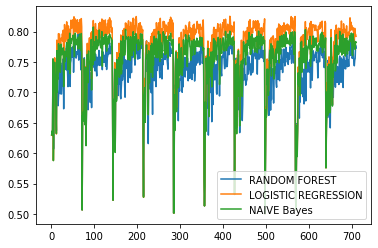

In [128]:
plt.plot(range(1,711,1),rF_auc)
plt.plot(range(1,711,1),log_auc)
plt.plot(range(1,711,1),nB_auc)

plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION','NAIVE Bayes'])

In [129]:
mean_RF = []
mean_LR = []
mean_NB = []
for i in range(0,len(features),1):
    sum_RF = 0
    sum_L = 0
    sum_NB = 0
    for j in range(i,len(rF_auc), 71 ):
        sum_RF= sum_RF + rF_auc[j]
        sum_L= sum_L + log_auc[j]
        sum_NB= sum_NB + nB_auc[j]
    mean_RF.append(sum_RF/10)
    mean_LR.append(sum_L/10)
    mean_NB.append(sum_NB/10)


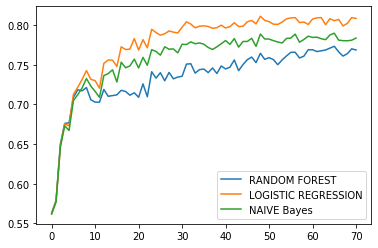

In [130]:
plt.plot(range(0,len(mean_RF),1),mean_RF)
plt.plot(range(0,len(mean_LR),1),mean_LR)
plt.plot(range(0,len(mean_NB),1),mean_NB)


plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION','NAIVE Bayes'])

# CHOOSING 1 RANDOM ATTRIBUTE AT A TIME (appending 1 new variable choosing it radomly in existing list)

In [64]:
rF_auc = []
nB_auc= []
c =[]
log_auc = []
for i in range(1,len(features)+1,1):
    z = []
    z = random.choices(features,k= 1)
    #c = list(res[:i]['features'])
    c.append(z[0])
    print(c)
    rf.fit(X_train[c],y_train)
    probs = rf.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    rF_auc.append(a)
    
    log.fit(X_train[c],y_train)
    probs = log.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    log_auc.append(a)
    
    nB.fit(X_train[c],y_train)
    probs = nB.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    nB_auc.append(a)

['G-16']
0.5005200253475258
0.5005200253475258
0.5005200253475258
['G-16', 'H']
0.5086305437685995
0.5093085098702944
0.5093081729727994
['G-16', 'H', 'G-2']
0.628389678102465
0.6284608116021081
0.6224621752348256
['G-16', 'H', 'G-2', 'drugs_m5-6']
0.6761745449878477
0.6657195568995804
0.6584575709690617
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2']
0.6762061491814193
0.6657195568995804
0.6634168946072336
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17']
0.6770984623035767
0.6668960510800773
0.6643768920403956
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10']
0.6867253403065767
0.67040907377253
0.6665259932460074
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2']
0.686047919657969
0.6703340739730643
0.6661505129665429
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19']
0.6856054769907032
0.6768032598843318
0.6698320325346724
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-

C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6900175667979497
0.6818787008590885
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10']
0.6909023719187917


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6914787874898729
0.6831718097010435
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20']
0.6897862465608381


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6918493105633406
0.6813984775441777
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B']
0.6832457988080245


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.695756214555576
0.684425838433587
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2']
0.6838060272566117


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6957568883505658
0.684425838433587
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12']
0.6731095317926956


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6963178547650942
0.6873011622963576
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U']
0.671867390728902


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6961671332429593
0.6873041943738118
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21']
0.6937816743805498


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7296048352811891
0.7147009553450393
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21']
0.6978557116157443


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7520732992692533
0.7302429672647934
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10']
0.6975562257854926


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7522845179558343
0.7302429672647934
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2']
0.6992440982778121


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7522468175218782
0.730685522231224
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B']
0.6977217707974042


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7521673097130758
0.72758061074703
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6']
0.7203144697474071


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7769436338405512
0.7476875516375625
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11']
0.716560019892995


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7772006705864423
0.7478651126601265
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3']
0.7204538971820931


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7794525576134823
0.7481995235306859
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B']
0.7200812083390152


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7794671565049291
0.7454898409362543
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7']
0.7200968660511603


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7809304787955111
0.7484292715794877
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27']
0.7232725580947644


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7891552696383165
0.7549243665123889
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25']
0.7261226146454154


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7900866307844095
0.7550685746829554
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11']
0.728147753615632


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7901082243095606
0.7535128301795985
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21']
0.7258970858366689


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7896794660976841
0.7584514266004636
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3']
0.726413661995556


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7901147697466049
0.7574905949449332
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19']
0.7266083406194102


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7900671228151797
0.7553063120152084
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12']
0.7262877906743566


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.789748546126882
0.755932155261617
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17']
0.7374654238892409


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026866933510873
0.761741198552945
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10']
0.7377642519672407


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026760088876768
0.7616244074213705
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5']
0.7390292058042625


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8026076186962068
0.7602272293389591
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14']
0.7501916465463996


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067799497862305
0.7642624912767615
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2']
0.7501077109419494


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067709337675567
0.7642631650717511
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7']
0.7483529241900424


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067036184395229
0.7630507993294136
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2']
0.7486118700217379


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8068048802008551
0.7621613899428077
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8']
0.754970505426456


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8068541474488036
0.762349234360336
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6']
0.7652044245871


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131144889986924
0.7729162168015594
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10']
0.7621682722773467


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130871842588656
0.7728715217338992
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19']
0.7612159753583546


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8129923075071992
0.7709344253090233
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19']
0.7605357151451466


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130284678383213
0.7694224774800067
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17']
0.7620998179149252


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130767243937851
0.7693021409033667
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20']
0.7599222408496235


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131538739201232
0.7689744038117544
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H']
0.7605443621808496


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130636174769588
0.7680199571658899
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21']
0.7601373097932892


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130097780487218
0.7693654134614614
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15']
0.7629748850938901


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8129708904521646
0.769223724000738
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2']
0.7598561126841907


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130943232772104
0.7692031411680718
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2']
0.7684900093850016


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130699543584108
0.7691228793505899
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21']
0.7665877738294816


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8130704998114978
0.7716483752717238
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21']
0.7652542533308735


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.813029269975214
0.7723834374774399
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18']
0.768337940272887


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8135678407276987
0.7754812901569783
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11']
0.7672386437469418


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8136342576624127
0.774429464092342
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6']
0.7666074903543039


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8136700971387778
0.7776374501672456
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28']
0.7712236277443109


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143056141561119
0.7789237568883507
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N']
0.7669408905323782


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8142966943938653
0.778257806797308
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5']
0.767828246448539


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143471969326286
0.7780942671276281
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10']
0.7697217868401421


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143371541787321
0.7779290429704734
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7']
0.7706376667442066


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143900470854356
0.7775924823730418
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7']
0.771834150176069


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143578332678255
0.7772165368541795
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21']
0.7702589458316957


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8143485284798704
0.7776525142980901
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21', 'ELIX1']
0.7714141352563226


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8155717070275214
0.7790460185935331
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21', 'ELIX1', 'G-15']
0.7688315913593815


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8155548300672993
0.7789407782332133
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21', 'ELIX1', 'G-15', 'ELIX12']
0.7703698011502643


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8157317654230871
0.7791829914893276
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21', 'ELIX1', 'G-15', 'ELIX12', 'drugs_m9-10']
0.7706722869724947


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8155378408079123
0.778634105256403
['G-16', 'H', 'G-2', 'drugs_m5-6', 'G-2', 'ELIX17', 'drugs_m9-10', 'ELIX2', 'ELIX19', 'G-7', 'A', 'G-8', 'ELIX10', 'ELIX20', 'B', 'ELIX2', 'drugs_m11-12', 'U', 'ELIX21', 'G-21', 'ELIX10', 'G-2', 'B', 'ELIX6', 'ELIX11', 'ELIX3', 'B', 'ELIX7', 'ELIX27', 'ELIX25', 'ELIX11', 'ELIX21', 'ELIX3', 'ELIX19', 'drugs_m11-12', 'G-17', 'drugs_m9-10', 'G-5', 'ELIX14', 'ELIX2', 'G-7', 'G-2', 'drugs_m7-8', 'G-6', 'G-10', 'ELIX19', 'ELIX19', 'ELIX17', 'G-20', 'H', 'G-21', 'ELIX15', 'ELIX2', 'drugs_m1-2', 'ELIX21', 'G-21', 'G-18', 'ELIX11', 'G-6', 'ELIX28', 'Am.N', 'drugs_m4-5', 'drugs_m9-10', 'drugs_m6-7', 'drugs_m6-7', 'G-21', 'ELIX1', 'G-15', 'ELIX12', 'drugs_m9-10', 'G-16']
0.7691729006072175


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8156033914347822
0.7786193780230534


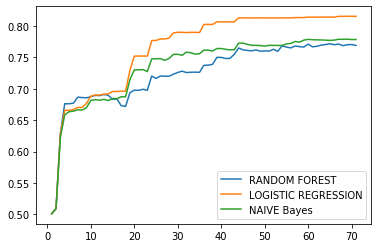

In [65]:
plt.plot(range(1,len(features)+1,1),rF_auc)
plt.plot(range(1,len(features)+1,1),log_auc)
plt.plot(range(1,len(features)+1,1),nB_auc)
plt.legend(['RANDOM FOREST','LOGISTIC REGRESSION','NAIVE Bayes'])

# 4.b Use ranking of attributes from question 2

In [41]:
rF_auc = []
nB_auc= []
log_auc = []
for i in range(1,len(res.index),1):
    c = list(res[:i]['features'])
    print(c)
    rf.fit(X_train[c],y_train)
    probs = rf.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    rF_auc.append(a)
    
    log.fit(X_train[c],y_train)
    probs = log.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    log_auc.append(a)
    
    nB.fit(X_train[c],y_train)
    probs = nB.predict_proba(X_test[c])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    a=auc(fpr,tpr)
    print(a)
    nB_auc.append(a)

['age']
0.5279025724530149
0.5267488429175324
0.5270712056919634
['age', 'ELIX1']
0.591429680669303
0.5854199748129015
0.5855857283804053
['age', 'ELIX1', 'ELIX2']
0.5906879446846397
0.5867371638043749
0.587027088162866
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5942630367298484
0.6001156200117111
0.5967514899692782
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6092115315199691
0.6208227678535618
0.6152358523105553
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6197986796826748


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6352999430482806
0.62945279825455
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.7019210216015465


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7255028997248671
0.7048889120617325
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6919408183400579


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.72915815733113
0.7035534022636303
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6759430964088331


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7364334587340676
0.7182042240528769
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6809754626324528


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.759854652795046
0.7403819134173438
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6792698629148052


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7623389990935854
0.7418793746540785
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6759031018633639


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7626432496169796
0.7379096152149327
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6670424571057297


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.764612736329582
0.7385955064291272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6665983299509894


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7682208924575069
0.7474373009697834
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6663785444423945


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.778500517378296
0.7584305710412539
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6711541787321424


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7782477159151981
0.7570517137654711
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6826319876150064


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7805561856786479
0.7621957855727659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.68249787032655


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7811811144889987
0.7624634426111161
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6825551910289009


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7810550827404206
0.7655237552840767
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6924175924663303


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7822738334924239
0.762997360969623
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6941174970120401


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7820629677460755
0.7604271378953531
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7033863331916224


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.786725965973353
0.7723367691530236
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7032395421402617


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7878108721634434
0.7727627198857757
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7049236285464476


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7872234031459808
0.7719198825671589
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7122532667024953


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7877058243159778
0.771784594158839
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7140099144119936


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7885442819671604
0.77057964016139
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7224850200935292


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7890508955858407
0.7715372632693495
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7305224317582037


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7948930029598851
0.7761919674011567
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7356034395629958


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.796553650926067
0.7768647356557871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7449999598931554


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.799697690647886
0.7787762278710484
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7580654383277049


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8022982505394369
0.7814420656629261
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7631268258641019


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.802567800620854
0.7809965427899924
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7611937722091652


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8010098261769353
0.7810737885727579
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7616992307507198


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8016716051561359
0.7794795735840278
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7718043267263992


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8103657583803252
0.788579527862225
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7695399103210954


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8122412346491051
0.7884697634498303
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7725272606222978


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113006168432705
0.7874116486319556
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7735824877473589


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.810487667145275
0.7874334186272229
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.772058764548758


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113816968403826
0.7873863492343603
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.77700186897896


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8183732342961649
0.7928474897125943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7852427667305701


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8173614509052115
0.7940344918863853
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.785492824885495


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172337186264207
0.798770917724819
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.785243103628065


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8189387087200302
0.7986677789631579
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7856119903422719


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8195968780832138
0.7988194790923019
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.785797781289355


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8181450744784105
0.7983043628225593
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7910969703289564


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8198559843422879
0.7994722741383045
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7922104967633776


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.823157291023286
0.7995007660407325
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7934026967842331


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8229818476421187
0.799589273825471
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.793409964144481


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8228695163916675
0.7993255953861085
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7954141994272743


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8234150817778562
0.7999662621222938
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.8024755388354576


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8207509284734533
0.8012029165697419
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.8030259491284784


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8215315680974116
0.801486471961305
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.8059672086438272


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8228527517306103
0.8024724586297898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.8101272028684416


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8168678319041928
0.8031017831503124
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.8095412418683372


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8209856016427763
0.8033574562634859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.8108203133146703


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8189509974572261
0.8034771511306119
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8114462849029814


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8172733762743949
0.8033405793032639
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.8086888430779597


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.82168585110735
0.802963607049179
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.8100242405768969


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.819537872893388
0.8026462335662206
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8127361370691523


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8182385073836701
0.8021397001612296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8102689083719027


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8183121595931562
0.8014254133010341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.8123147906021642


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8178711126440839
0.8008112010395695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8137849470990719


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151909647300408
0.8001337964336994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8110240560854114


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8176280651656013
0.7995079371445531
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.8117342039192408


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8179605188221423
0.799572733762744
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.8100850746388378


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8124533998572196
0.7988692276223861
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.8118777222520797


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134614934184667
0.7995049692380501
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.8113671139916738


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134694506164422
0.7995832257133002
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8137298402945448


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8156583538546689
0.7993970818259843
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8123757850914837


C:\Users\mayan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8131648150673394
0.7994838409522969


In [93]:
len(res.index)

71

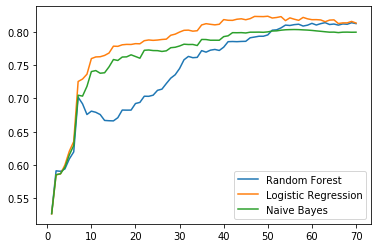

In [42]:
plt.plot(list(range(1,len(res.index),1)),rF_auc)
plt.plot(list(range(1,len(res.index),1)),log_auc)
plt.plot(list(range(1,len(res.index),1)),nB_auc)
plt.legend(['Random Forest', 'Logistic Regression', 'Naive Bayes'])

# 5. Create 3D plot with learning curves as follows: x-axis number of attributes, y-axis size of training data, z-axis AUC of obtained models

In [53]:
rf = RandomForestClassifier(n_estimators=150, n_jobs = -1)
RF_auc = []
sz = []
att = []
for i in range(1,len(res.index)):
    for j in range(1, 1000, 5):
        s = int(j/1000.0*len(tr_x.index))
        sz.append(s)
        print(s)
        c = list(res[:i]['features'])
        att.append(len(c))  
        print(c)
        rf.fit(tr_x[:s][c],tr_y[:s])
        probs = rf.predict_proba(ts_x[c])[:,1]
        fpr, tpr, thresholds = roc_curve(ts_y, probs)
        a=auc(fpr,tpr)
        print(a)
        RF_auc.append(a)

90
['age']
0.5003868983727864
542
['age']
0.5174045250184742
994
['age']
0.5203493553948269
1446
['age']
0.5265015549097187
1898
['age']
0.520851281123476
2350
['age']
0.5137795130930234
2802
['age']
0.5098611692164099
3255
['age']
0.5141046137301725
3707
['age']
0.5130025622404487
4159
['age']
0.5131496346731178
4611
['age']
0.5124914018067636
5063
['age']
0.5109827956794847
5515
['age']
0.5125764001129756
5967
['age']
0.5062214598026622
6419
['age']
0.5160537217909839
6871
['age']
0.51157219097344
7323
['age']
0.5093540083204693
7776
['age']
0.50958816011964
8228
['age']
0.5107964757504124
8680
['age']
0.5119517243437945
9132
['age']
0.5156729527910823
9584
['age']
0.5143724526927848
10036
['age']
0.5168903405440555
10488
['age']
0.5165048891585018
10940
['age']
0.5102385890099076
11392
['age']
0.5122878480971663
11844
['age']
0.5110027933682071
12296
['age']
0.5143906294537535
12749
['age']
0.5118024082680005
13201
['age']
0.5106604264339659
13653
['age']
0.514324555789552
14105
['a

0.5726986383427424
18626
['age', 'ELIX1']
0.5726178997068111
19078
['age', 'ELIX1']
0.5730577513090032
19530
['age', 'ELIX1']
0.5739057183439676
19982
['age', 'ELIX1']
0.5728311108368158
20434
['age', 'ELIX1']
0.5722015900991475
20886
['age', 'ELIX1']
0.5726946062884309
21338
['age', 'ELIX1']
0.5717447648489666
21790
['age', 'ELIX1']
0.5714732515142802
22243
['age', 'ELIX1']
0.5729062566232183
22695
['age', 'ELIX1']
0.5707314185540961
23147
['age', 'ELIX1']
0.5727405521976419
23599
['age', 'ELIX1']
0.5755300184167332
24051
['age', 'ELIX1']
0.574486008999155
24503
['age', 'ELIX1']
0.5756763754849277
24955
['age', 'ELIX1']
0.5741749880355291
25407
['age', 'ELIX1']
0.5729297010680456
25859
['age', 'ELIX1']
0.5749824069114093
26311
['age', 'ELIX1']
0.5744900410534666
26764
['age', 'ELIX1']
0.5756368028228543
27216
['age', 'ELIX1']
0.5763213090753675
27668
['age', 'ELIX1']
0.5767282864282939
28120
['age', 'ELIX1']
0.5782054165186892
28572
['age', 'ELIX1']
0.5742466545492596
29024
['age', 'E

0.5676266391845313
14105
['age', 'ELIX1', 'ELIX2']
0.5688908995688758
14557
['age', 'ELIX1', 'ELIX2']
0.5734092066237286
15009
['age', 'ELIX1', 'ELIX2']
0.5689173680544368
15461
['age', 'ELIX1', 'ELIX2']
0.5684227585533691
15913
['age', 'ELIX1', 'ELIX2']
0.5684090365620832
16365
['age', 'ELIX1', 'ELIX2']
0.569894718509607
16817
['age', 'ELIX1', 'ELIX2']
0.5730701238627575
17270
['age', 'ELIX1', 'ELIX2']
0.5724753633352424
17722
['age', 'ELIX1', 'ELIX2']
0.5720576880317638
18174
['age', 'ELIX1', 'ELIX2']
0.5736296364316138
18626
['age', 'ELIX1', 'ELIX2']
0.5747858767802901
19078
['age', 'ELIX1', 'ELIX2']
0.572636206534048
19530
['age', 'ELIX1', 'ELIX2']
0.5741743539624722
19982
['age', 'ELIX1', 'ELIX2']
0.5712454241873964
20434
['age', 'ELIX1', 'ELIX2']
0.5722742483681723
20886
['age', 'ELIX1', 'ELIX2']
0.569424951665749
21338
['age', 'ELIX1', 'ELIX2']
0.569993438807105
21790
['age', 'ELIX1', 'ELIX2']
0.5717800453241924
22243
['age', 'ELIX1', 'ELIX2']
0.5729096871210397
22695
['age', 'E

0.5938826452383357
86892
['age', 'ELIX1', 'ELIX2']
0.5937261430012285
87344
['age', 'ELIX1', 'ELIX2']
0.5934227309142871
87796
['age', 'ELIX1', 'ELIX2']
0.5924779620592794
88248
['age', 'ELIX1', 'ELIX2']
0.593620577966371
88701
['age', 'ELIX1', 'ELIX2']
0.5933059639220885
89153
['age', 'ELIX1', 'ELIX2']
0.5929588007942106
89605
['age', 'ELIX1', 'ELIX2']
0.5921520972828052
90057
['age', 'ELIX1', 'ELIX2']
0.5931414138346416
90
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5018628741250524
542
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5159071533651037
994
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.4952883169210297
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5072095569832351
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5207318315144975
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5240426683693209
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5138367259927097
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5185533353315848
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5187622542747418
4159
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.51324

0.59790027845237
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.598320929021732
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6009433901525658
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6012122208704724
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5996025532528697
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5992360427676099
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6000156112038304
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6003031552060618
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5990456745259425
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6003094309034982
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6013894036442096
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6012274386238416
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6000482415788432
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6007544038649972
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.6005059447763339
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.599641589391587
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3']
0.5998271451813342
66548
['age', 'ELIX1', 'E

0.5875123733666684
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5875056586955771
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5897941421664631
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5876266853580566
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5870472889084624
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5857474716580724
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5868187624753874
29928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5863746837194816
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5847066326057795
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5869288310547783
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5875925267043935
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.588286983026417
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5844223727768179
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5856660989490841
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.5863808456089336
33545
['age', 'E

0.6134590493183326
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6126523458069268
81467
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6127838753205563
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6123426905391163
82371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6134866558837395
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6128662235265556
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6145565322303886
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.614076343826798
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6142460803066858
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.614520812781508
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.614729666691531
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6153872329682611
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6153433193444894
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.6146246381800297
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4']
0.615018869038681
87344
['age', 'ELIX

0.6079512306122408
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6082482369354774
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6077972158925112
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6115467012365465
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.608183528967091
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6100183900696485
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.609685339131861
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.611598548902673
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.608941961634743
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6119118460259909
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6104439343823482
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6142242454319264
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6145431841796237
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.6258008911750492
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6235889842195149
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6232348462880095
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6253958810744281
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.623901939918879
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6242336414191348
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5']
0.6255781039160546
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.614757712230593
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6070218095768704
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.5757894518467687
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.5523698496765609
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.5570461872471715
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.5444477571600342
280

0.6768280017327428
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6796220527877851
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6786375486878687
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6812007158587263
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6794042568218295
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6809488100139581
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6816553787572
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6800958842025216
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6824533353120749
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6832967500276553
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6814891378082676
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.681769690748588
45752
['age', 'ELIX1', 'ELIX

0.6965112715102784
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.697110080350388
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6975237073412719
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6970862131901894
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6969697551053774
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6988360272116841
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6981431804597285
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6974872725279166
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6967922959408204
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6983058933611381
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6969099733968959
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6']
0.6979682575873994
88701
['age', 'ELIX1', 'E

0.6541334214575655
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6520868612453702
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6517110185053734
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6523081852588484
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6524773852153803
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6520653352779976
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6521830289923565
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6531806372687853
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6550228796320581
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6551611400750624
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.653110238901169
37614
['age', 'ELIX1',

0.6812682039935937
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6806006226142188
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.679933675307901
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6804265939474833
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6784580897544393
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6820185075194886
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6806221648398751
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6808952714863459
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6820536254118792
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.681390905259275
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7']
0.6833678149848956
76494
['age', 'ELIX1', 

0.6268991544847141
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6241516671536564
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.624688141734773
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6254209838641739
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6213535515277356
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6233812033562041
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6260951661066556
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6268693855675997
21790
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6300240453509862
22243
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6328064554750322
22695
['age', 'ELIX1', 'ELIX2', 'ELIX

0.6518122100619655
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.650390634526338
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6540485207010547
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6526938967769385
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6530643742833755
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6566744285879934
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6556524003697264
57054
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6559135734360979
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6572401030463015
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6568147700912877
58410
['age', 'ELIX1', 'ELIX2', 'ELIX

0.6749856618197689
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8']
0.6757422410431003
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6763562676365795
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6678657367535472
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6366893562935848
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6301998786871917
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6111738337624328
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6037844601635309
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.5887850555418733
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELI

0.6412236614994157
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6386558119429059
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6408064902027258
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6388283936224086
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6405470079978399
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6435435397157675
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.641753421409441
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.641112617423014
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6419898981431544
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'EL

0.6646635377491655
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6672245913431664
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6681630032093201
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6679422157191979
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6652905059363221
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6660860887818039
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6656804608664092
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6685336107820254
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9']
0.6661214993232978
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', '

0.6053162993779515
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6044276866342018
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6018035671584494
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6063289140500638
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6032150137834476
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.609675031380113
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.611457166869234
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6075163703030876
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.609843841137840

0.6457814274083574
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6460330243457391
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6458162689099283
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6423797880401074
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6442553598845844
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6417475846856594
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.642368960023287
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6433008523177517
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6438681

0.6623611859624419
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6629665956656585
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6644034214712224
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6631473390034855
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.66350619183721
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6648266571076631
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6622627420557636
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.6620100070385362
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10']
0.66265549

0.6021673950269293
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6068921822824119
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6027404832625198
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.5981778723850908
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6020421574690197
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6031390225663025
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6068162398401172
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6035845645677244
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 

0.6315953596777789
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6324797615260987
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6320859858993859
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6307184854147263
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6279442369490043
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6358382676681857
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6364257770012532
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6340113243496996
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'E

0.6591941211087342
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6602035166407109
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6576855637563059
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6592470255632894
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6608626274543749
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6594662197416272
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6619033364403997
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11']
0.6580345640702209
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'E

0.6857208600996164
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6732151347450771
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6567338363559541
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6508510203406085
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6485713651176707
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6502366848397424
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.63259108199332
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6

0.6238882829607271
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6228122934994765
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6198433520886725
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6200539618933149
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6205842745849797
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6215876708103395
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6218415601656966
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'E

0.6363696208899954
52533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6381885000998583
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6333169818356604
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6355206295831695
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6374245396158116
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6373286807762121
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6357688773141471
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'E

0.6520952342613799
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.649524149306451
78754
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6488022815184223
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.651225806292177
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.652578251606302
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6530390113610934
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12']
0.6533735580609643
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX

0.648008080627039
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6481172875174036
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6494769027345587
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6445954994339841
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6504994999927488
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6472899034693681
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6486407554717091
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5',

0.648172793297321
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6476023226453762
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6442869172128853
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6441512093203927
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.647426034077232
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6456850483036854
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6474610219033546
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 

0.6484171227819717
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6516053721790984
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6494005375768926
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6517157984407265
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6520973803548038
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6513245265896749
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.649555365210798
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5',

0.6612023117718363
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6583509014925559
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6603360541679182
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.659077679282206
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6643429731731169
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6595698175241794
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13']
0.6610615312948871
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5',

0.669615453225341
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6686556454580825
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6693427692942416
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6675925488156588
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6680524631397075
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6678285540591504
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.668994484344801

0.662462979075524
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6622950797816733
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6637641782800128
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6594764949768083
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6642689654665604
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6619249274409065
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.661472345602722

0.6716560141309196
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6733306010745944
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6722919081157253
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6740965938440805
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6763456347191612
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6726828710593904
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.67456379187914

0.6781604330998622
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6797951547323604
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.677331829680563
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6755366550480637
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6809215448725048
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.6848423600082124
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14']
0.679989766386024

0.6766507864424385
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6761488769720729
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6781699116791509
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.678855263362407
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6775892958582933
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6791583340253943
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11

0.6713295477979553
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6718035255372435
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6692095489191267
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6712469232011363
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.669627468096858
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6741187213679435
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11

0.6752242196137722
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.671665004961703
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6724577913824205
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6742096702059215
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6701218662402402
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6715511319439698
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11

0.6783575647874714
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6785216596429797
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6786617735303048
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6785951633427473
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6808011197665155
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15']
0.6806917177767485
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX1

0.6975468591369959
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.7006573776806415
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6967644129845936
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6969855093821026
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.7001271625386776
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6978082110444862
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'E

0.6867948823085618
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6846819720413453
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6861244394712885
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6870833042581029
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6830130917551839
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6814102363583734
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'E

0.6830839616130221
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.684989985222521
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6862543106399994
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6821456635548531
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6851526330907967
57054
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6851826133655967
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'EL

0.6870704439558433
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6899464205015134
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6930075301215594
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6913644029564843
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6938623418938833
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16']
0.6920005408155427
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'E

0.6990223146241895
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.7019899553723125
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.7028523272464704
6419
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.7076701444002211
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.7008535989043738
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.7007897526250138
7776
['age', 'EL

0.6871838129667875
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6905106479725889
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6883263150658945
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6872448465630998
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6903875727663865
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6856052311872637
27216
['age

0.6875486000739945
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6870979041966987
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.688343906528657
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6867677797499437
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6892569554725284
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6882614282563896
46656
['age'

0.6864767727333237
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6848849567110195
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6852541985879096
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6862338577193388
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6856729631963837
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6891854352833497
66096
['age

0.695104507270932
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6931179563831875
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6944942038243774
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6914196160872984
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6951204078722086
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17']
0.6934476418562875
85536
['age'

0.7040475874755808
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.7074973838795997
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.7036031510374379
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.7057479763151926
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.7073599688673381
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 

0.6872410421247573
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6893181679099594
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6888640090182747
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6877993515806335
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6887272931122042
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 

0.6838404432866523
48916
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6861916837319031
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6877232140389368
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6854240976506325
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6816651174690247
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 

0.6874780716401104
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6866387377536918
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6909900072037203
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6878397696734497
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6900472056010177
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 

0.6909706273297714
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6904415502676536
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6913240986716527
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.6900526358677115
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18']
0.691003940552692
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', '

0.7116491479326259
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.7098846689394013
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.7124217578235023
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.7101638236673393
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.7122654019109467
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 

0.6928910232618969
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6926922332293692
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6931264919820325
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6900953626367867
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6888537175248104
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 

0.6897322989076319
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6864570351771376
48916
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6894605579569762
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.68887467445226
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6879953939632473
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'E

0.6904123666487457
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6919757794497507
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.687082296244525
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6885469724897488
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6840077735405801
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', '

0.694883345840289
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.689591713530085
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6909864791561977
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6910667950767576
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19']
0.6907834131951057
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'E

0.7031487157549337
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.7053562167156354
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.7051613286711513
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.7049566531399916
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.7063716278125123
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7005959213689579
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.697540437115008
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6943658934508838
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6944868388219454
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6951345363205826
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 

0.6905053640304467
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6896656562035073
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6906453478515037
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6906259679775547
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6905412948370131
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.6907455801693684
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6895812269372184
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6890482641453408
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6886302636761917
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6896336273849845
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.6962334011867376
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6940516045722717
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6945951677650004
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6953890272324298
78754
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20']
0.6946781663023401
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7287196465163018
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.725271459682351
4159
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7299880527629423
4611
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7231044418475991
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7256148346301698
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', '

0.7149216477549228
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7138673468438801
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7151974207598901
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7087084959351365
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.711866163500973
21790
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX

0.6987628974524376
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.700879286992326
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6995453923796906
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7022917578891856
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6975268939648406
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX

0.6973661970905867
52533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6948917513728657
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6995862982210121
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7024574785730455
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6996245377038374
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELI

0.7030013831897283
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7012915645456782
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.700803929848238
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7014088192863822
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7015245457484361
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX

0.7033175905457951
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.7004022201791703
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.70206526374155
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6967754848756668
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21']
0.6995245655185088
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4

0.7224284874522144
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7223147770173163
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7212969759527631
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.721521990596599
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7220580749789114
12296


0.7112799060557358
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7063672705925306
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7063541176411675
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7073732356266857
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7081517310161941
27668

0.7008923261357046
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7002818113314643
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7005624943380527
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7007756241766399
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7009343212820216
43039

0.699843878206727
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7012961656399127
57054
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7017018260718745
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7031936699088502
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7027575902284335
58410


0.7009059343190058
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7084256993516913
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7020910981540539
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7046746369541549
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7027230413759659
73781

0.7005325790963868
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.7026153139894011
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.6985349075427185
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.6985075611098477
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22']
0.6973086752835136
89153

0.7201632533267537
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7227169581766062
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7295730438179601
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.723565217860674
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX

0.7093380329310882
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7074653713193604
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7060919365612183
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7070828951996897
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELI

0.7009174289254503
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7003574448663722
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7000079242873848
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7011300710155319
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELI

0.7020586303618763
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7015912372274112
57054
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.6995419618818689
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.6980017659097222
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELI

0.7043513897613264
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7048570548951838
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7028216153489123
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.704987023613596
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX

0.7025233733961285
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7014935086852077
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.7009344350900061
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23']
0.6998403013843538
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELI

0.721190793103132
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7219327723878678
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7212231470873252
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7224794246544642
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX

0.7131756544300538
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7114990677175067
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7114699328734495
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7089971617589303
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELI

0.7013914066647388
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.6994045468696073
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.6995677800360894
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7048924166618271
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELI

0.7012879064318875
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7032903579209091
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7016672609611233
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7035084953108184
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELI

0.704896936464644
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.703723852534247
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7054006180879127
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.703835481908855
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19

0.7001532083088673
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.705250749230479
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7044236253149799
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24']
0.7041020527253534
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX

0.734106942566703
6419
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7321786125922227
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7276420474849834
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7291294202939927
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16',

0.7183814104867361
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7185559594185439
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7195462026925409
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7200381133185452
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELI

0.7059629433398169
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7068848205316367
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.706147361049718
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7073082350091959
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX

0.7076727619838669
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7028309963784999
47560
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7016352971757346
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7012924099764208
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELI

0.7023564170827216
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7056549626752083
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7057443669762526
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7021147539565671
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELI

0.7054213311411097
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7063722131107188
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7053471608517182
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7067334721704035
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELI

0.7033940207365952
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7031142156773165
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7027532330084516
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25']
0.7020824162306574
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELI

0.7340987809083789
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7308343939695554
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7313707222261205
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7365874038493243
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7270765356095104
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.725323892646684
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7259942867091068
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7277063815128489
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX

0.7165319982204332
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7163966967850285
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7147973044026066
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7153246906032389
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.717170704888287
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7122513710122738
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7101207879908774
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.707761808602674
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX1

0.7137771458869437
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7131618836639175
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7158483211403794
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7142703084007787
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7135254351415774
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7132349971648804
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7107574298567247
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7167176027850309
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7101243973298176
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7090790547329913
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26']
0.7092333621018241
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7301944841887218
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12',

0.7434220448147228
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7395037334546765
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7423409014775982
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7447113592139627
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELI

0.7340366092322208
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7368712247046308
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7338946906754257
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7351062417046172
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELI

0.725785562865352
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7254969783329758
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.722870029915892
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7272424188762053
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX1

0.7271956600528187
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7256587157373747
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7271794668024385
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7249253370846179
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELI

0.7231102623130974
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.725104535885511
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7223780542567535
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7251857297533806
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX

0.7240628351441917
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7233473243450171
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7219816773046784
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7278329197334397
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELI

0.7218466685183768
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7207518194482498
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7203110736404645
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27']
0.7175972572145646
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELI

0.741655533536059
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7418670538045782
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7433623281393754
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7412199903789981
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'E

0.7388735623856677
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7368527552945587
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7365178834290176
23599
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7354937578921774
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', '

0.7299436676489488
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.728761170172397
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7302767348450199
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7296752271298464
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'E

0.7304419840386578
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7271081091960948
47560
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.724221581024424
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7258596843798932
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'E

0.7253932179675884
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7286467443730242
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7232634966352183
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7262164398950443
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', '

0.7235384729842932
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.724235937088767
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7239680005764537
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7254972709820791
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'E

0.726773432429956
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7228935068772864
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7255634747125487
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28']
0.7221611687546746
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'E

0.7567789563443628
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7604896494239332
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7588497088824271
6419
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7565589329935657
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'E

0.7475275215345842
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7477202960022116
18174
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7508026877153776
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7484546501519792
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3'

0.7445613928068281
29928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7473604676714765
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7454959677180725
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7445621244295861
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3'

0.7393778130488594
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.744652618035626
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7423023693456697
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7428062298100571
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3',

0.7407840082482824
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7414697176137756
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.739245275521652
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.74045981807501
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', '

0.739041705553771
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7384989227586509
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7366821896422118
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.740529761210688
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 

0.735610394818108
78754
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7382687217223739
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7374815606677524
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29']
0.7330486258596324
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3',

0.7445070088484732
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7362700746716948
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7489866862216965
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7526803731367113
1898
['age', 'ELIX1', '

0.7589845388276099
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7564389631195145
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7578498894794403
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.758165836702971
13653
['age', 'ELIX

0.753267541045825
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7528048140387287
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7562632110747265
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7541736802192032
25407
['age', 'ELIX

0.7486030557638965
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7486641218767756
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7512872495972336
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7486502047860875
37162
['age', 'ELI

0.7488483119707074
47560
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7475926684766255
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7451693388022731
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.748446521010222
48916
['age', 'ELIX

0.7504699619432603
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7502246081867481
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7502334689512633
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7510746237654353
60671
['age', 'ELI

0.7462640090312813
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7476287293494599
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7499391127282395
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7477046717917545
72425
['age', 'ELI

0.7448730641017945
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7453923861938039
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7457407686929454
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2']
0.7467223300435455
84180
['age', 'ELI

0.7597438657008553
4159
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7634954971383145
4611
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.762967948354847
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.765780615144513
55

0.7587429569928732
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7563831484322103
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7583258832458843
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.75755862233028

0.754430463549026
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7550859162488992
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7547224298043732
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.754630716827069

0.7539527138879623
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7511553298847996
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7497977794696509
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.75457738965714

0.7524854038008095
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7553543567680013
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.753975247868913
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.753152773822498

0.751045927895033
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7515003469192536
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7515343429900817
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.753929318217985

0.7526651228667751
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7514292494454462
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7502691233670099
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.75145365312900

0.7490339978267228
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.748665780221694
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.7489764109865157
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3']
0.749870356447258

0.7638106964808036
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7668218606538939
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7667940264725175
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4'

0.7587530859035023
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7597398011299766
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7579984901907598
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7565966034364678
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7533366224924769
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7523242516946173
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7476588884653786
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7485047744400534
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.749955094620934
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-

0.7542815539303197
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7530420223952002
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7522911823459494
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7539444384216536
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7551598426640382
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7510027296357359
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7504579958465939
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7494456738235848
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7523047580126837
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7477084274552462
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7498581627346225
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4']
0.7492087743744998
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7620569316964146
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7651016204501113
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7671881435231842
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2'

0.7590277208286236
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7575977885352698
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7567395137485574
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7549952925765913
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.754152576967202
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7530976907579526
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7512780961836151
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7524614878657602
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7509905684396672
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7522250273903304
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7523442818999065
48916
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7525142622540472
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7583782349188001
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7550060393019941
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7538192008637441
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7493330526936821
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7520180756994785
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7537372591148328
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7520205307002892
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7508030128810479
81467
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5']
0.7493375562382156
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G

0.7529130779486495
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7628917782965833
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7708730834816684
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', '

0.7697337354895634
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7696257642287457
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7682585401349059
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28'

0.7675832848457124
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7653261798620088
23599
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7669505287096248
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28'

0.7630844064396589
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.767061556527743
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.76342436714794
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', '

0.765447450398741
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7651198134693635
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.765220094562079
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 

0.7660136613804049
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.768864746494015
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7668479714572177
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28',

0.7653723696454724
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7631465455992501
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7638599753381349
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28'

0.7656654577223823
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7650153052229347
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7644001568078929
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28'

0.7622370084446174
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7625723355420969
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']
0.7631000794249666
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28'

0.7656659779874548
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7663887724976437
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.767847026720879
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27'

0.7698879453086951
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7714547723492382
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7700397651601502
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELI

0.7662095899550341
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7624653397782905
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7621078038655306
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELI

0.7620129530395088
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7651966988921021
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7671433194355358
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELI

0.7608814577983409
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7672764097443827
52533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7676437981769523
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELI

0.7639550862966927
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.766135874897581
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7653914243537512
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX

0.7633990855170755
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7627919524358063
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.76469781346247
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX2

0.7658771080571697
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7649350380772253
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7']
0.7621502054689354
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELI

0.7701713271903469
4611
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.76822982800622
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7708879923276509
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX

0.771710141208395
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7692733009004422
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.770338072146068
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'E

0.7650963527662525
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7690565454646314
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7678536763588365
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 

0.7629746630259383
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7662494877827779
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7627836932277812
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 

0.7659274762194964
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7631552112643631
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.765932711386788
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', '

0.7662158981690377
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7678915581594244
57054
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.768386037594224
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', '

0.7678368490353993
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7669127607170215
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7659369060239346
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 

0.7664382139378103
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.765046212219895
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7610303511587637
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', '

0.7633466525527425
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7629794754778587
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8']
0.7630267545663177
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 

0.7665086773385605
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7670090910468429
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7690425145659587
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24',

0.7698746460327806
18174
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7719168002501434
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7702153546221031
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX2

0.767855903743678
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7647800641187681
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.767248624337857
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24'

0.7660426986747613
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7619664380903749
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.766746796158909
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24

0.7648725087188297
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7655930270693265
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7667621114619794
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX2

0.7693358140005543
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7681807605065742
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7657254833051165
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX2

0.7641930262759223
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7675758385518631
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7639522898719283
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX2

0.7668717735842823
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7654054227358568
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9']
0.7660781579911057
81467
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX2

0.7453767619833467
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7492853021150009
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.754941363850175
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX2

0.7682351769814962
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7681250271106876
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7679827346133719
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 

0.7715624184443852
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.767985644846121
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.770176009575999
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'E

0.76588372517856
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.763989846506846
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7632125867468846
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'EL

0.7660856530598058
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7660392844352233
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7666616190115784
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 

0.7661434512576986
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7676476026152946
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.76554178095969
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'E

0.7685765359021595
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7685673824885411
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7685890710387489
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 

0.7666807224947074
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7650838826627973
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7649531172884929
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 

0.7664560980496758
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7663635884164803
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7644988120722568
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 

0.7642108616129374
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10']
0.7628708701439839
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7645004704171752
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22

0.7732716843067959
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7757172715712791
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7766991093126993
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX

0.7719517555596989
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7740221178989589
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7773393767757704
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELI

0.7717574365551376
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7747205412421602
29928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7729964478251847
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELI

0.7728051853779241
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7724880350414134
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7727261538617618
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELI

0.7707544793034328
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7746338195578957
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.77423919850044
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX2

0.7726230926025656
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7748888957679493
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.774181302752846
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX

0.7718858282200489
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.77109201752747
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7722982520979527
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX2

0.77088461060468
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7720851385176491
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7690071202827484
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX2

0.7711347117799783
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7672683293774761
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11']
0.7698417717835148
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELI

0.779611910870529
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7769245791884737
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7796300388566473
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'E

0.7776403826367515
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7822076271249822
18174
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7738822478858867
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7769299769386003
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7780637320811766
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7805651990660982
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7772255200163207
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7751001396456487
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7763718300655593
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7792238256430462
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7803355833280278
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7799872983785874
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7802366191562771
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7831610291285358
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7817951869887949
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7789227547489306
65192
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7778841430814794
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7781796211260658
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7799250454110117
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7765954627552965
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7771834273203025
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7769577948616931
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7785498059833995
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12']
0.7773195416698832
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19'

0.7764906943763312
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7760094004094616
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7795336597519753
4159
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX

0.783259180386111
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7822417207455112
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7817228376271568
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'EL

0.77973368541405
22243
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7769944735493011
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7792961262298335
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELI

0.7786224642524242
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7757850686135334
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7777886256658336
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'E

0.778425836571604
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7792109815990698
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7779505256530677
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'EL

0.779223663060211
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7794274769023444
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7814253435554147
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'EL

0.7790403346553051
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7800739712880014
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7797434729007255
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'E

0.781697799870545
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.778714534911965
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7818584317116648
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELI

0.7796939501691414
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7802965959641608
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7789216004108013
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'E

0.7811594555868243
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.77856873062541
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13']
0.7815994209970009
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELI

0.7782362649858289
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7796416472710764
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7790351970377147
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16',

0.7795222789535154
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7795497717109379
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7823385875986886
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7776737283762392
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7789754153292332
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7811867857614114
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7772267719041515
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7782332084285283
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7759012340492419
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7799778523158656
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7783182067347403
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7774251392213075
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7805199522630782
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7786138961370124
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7805749540362067
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7797511142939773
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7815471993903533
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7812027839123894
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7778290437586498
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7817356654128496
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7782855438431604
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7814667696618088
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7806589605871244
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7791698644000625
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7811070388807746
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7771446675724047
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14']
0.7807198478588849
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX1

0.7816143461012669
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.779594709606571
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7803277793519408
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELI

0.7784192844833479
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7808324364722203
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7774174815697724
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 

0.7800067270273867
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7768151609404234
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7782371917079893
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 

0.7761898348399018
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7783535197265331
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.775931685814264
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', '

0.7766550168478088
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.779571948009651
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7801717811216227
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', '

0.7794737154606586
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7795459510143121
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7810820011241627
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 

0.777371681985113
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7787667240020455
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7820464099856556
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', '

0.7815785291026851
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7794716018838018
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7806212413693716
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 

0.7800175062693567
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7805791161567863
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7800549978711403
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 

0.7770661563213149
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.7827858042033126
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15']
0.783453466874105
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', '

0.7794386626014022
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7807945546716324
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7801539132680405
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13

0.7774643379428602
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7789063013660144
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7781435602532312
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7778250442209054
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7782157958068847
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7787982325554959
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7761626997647167
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7766361247223654
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7787651469485446
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7826625501559917
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7807399105807413
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7790844433784793
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7824768968165434
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7802420169064038
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7802688430742022
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7814612255871305
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.780999669176447
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7822843662231688
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX

0.7794064874583275
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7781597535036113
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7797377499849285
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7797805580454215
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7797265155110205
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7806727313532609
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7794180470979062
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7809389932623721
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16']
0.7816005915934139
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELI

0.7853834714517873
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7829495901514342
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7828376356111557
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', '

0.780205598351332
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7812251227939379
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7828408872678585
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',

0.7767923505686529
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7784823341068158
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7784415258151952
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11'

0.7769365127685732
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7781555751247482
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7781883030494623
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11'

0.7786911717585552
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7827902264564285
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.783576916020828
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',

0.7826075483828633
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7823328159080409
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7821085328869632
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11'

0.7803976086796344
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7823905978476504
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7840464389904335
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11'

0.7808460121389549
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7816067047080153
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7812665326420485
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11'

0.783649362932167
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7841581008816086
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.7807434874031144
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11',

0.7844917046010357
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.784052942303839
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17']
0.783123472493618
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 

0.7845576481989691
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7810320556772072
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7784062128234024
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX

0.7857864980418198
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7842402052133552
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7840699647266784
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7825207291488978
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7807311311076436
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7819467954825643
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7782934453689483
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7796505730687258
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7809781757256413
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7796719201949798
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7774572493312479
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7783007615965296
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7811483836957511
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7835707541313761
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7811998086465063
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7834899667205943
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7851858682739561
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7857971634758052
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7851356139196138
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7835145817618347
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7831702963501389
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7829539636296994
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7845265135860395
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7861770220118298
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7848977877483687
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7862757097927608
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7824165135515719
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7832481572698883
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7838881808587065
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18']
0.7823267190517232
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'E

0.7864398046482692
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7847794437026694
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.782676564796381
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7816411885273487
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7825210868311352
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7802712493001621
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7810961295725366
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7807495842594322
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.780555964361062
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX

0.7817127737496616
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7791948208652567
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7785423109146995
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7810914797034515
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7803511099887837
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7795478207169162
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7836795383063695
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.783803670301
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7827417442549892
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8',

0.7844813643327208
58410
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7849298003086083
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7841545728340861
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7865069025843322
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7835608040618656
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7845984239740226
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7847127034488437
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7833421626651671
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7844202982198415
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7833220674267436
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7852929128126135
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19']
0.7851996552983762
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELI

0.7844306710047236
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.785699857648973
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7812812463886287
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', '

0.7835256861694748
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7848110823223879
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7848967309599405
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.7814917423852865
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7794509050888881
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7803400380977106
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.7801057399739881
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7789890235125345
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7790614541655901
27668
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.7789022205368524
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7792229639540197
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7821335543852914
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.7811666254898539
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7821072484825656
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7810642633368488
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.782402824076853
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7842321898795827
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7839064714276601
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6'

0.786681321449872
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7833888401971362
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7842015430151585
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6'

0.7872364117656124
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7846760410195193
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7836083432828609
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.783691634469304
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.782229852198546
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7827698873437522
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6',

0.7827896574165055
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7826389919031798
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20']
0.7839894211901492
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6

0.774952920888428
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7834270796799616
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7875421325288128
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'EL

0.7889997689372747
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7906871674083586
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7876272771595765
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 

0.7908394262334689
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7891670504163519
18174
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7908991916836668
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7841236008039917
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7845171162981683
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7853344852435592
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7838306753099169
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7833265872295605
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7847600475704369
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7824175540817169
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7831452423352436
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7817657107207836
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.784074500787779
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7867181139454646
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7823432699843407
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 

0.7881951952610095
58410
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.785281011749081
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7886459073965891
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 

0.7830475463096069
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7848597758815127
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7856836806568763
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7867886261210656
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7856781528404815
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7877133322542169
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7864580464423722
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7870248589805262
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21']
0.7862243336168562
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4',

0.7773817621208918
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7713704081160832
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7778632511871637
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3

0.791145049446968
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7924038958229023
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7934564733558925
9584
['age', 'ELIX1', 'ELIX2', 'ELIX

0.7943357863614724
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7901881193958915
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7918158662247623
17722
['age', 'ELIX1', 'ELIX2', '

0.7868315642478265
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.78936829544969
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7870280456040951
25859
['age', 'ELIX1', 'ELIX2', 'EL

0.7832430684271482
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7838934322842817
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7865295828898345
33997
['age', 'ELIX1', 'ELIX2', '

0.7890990745329792
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.788928947854287
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7866905886714752
42135
['age', 'ELIX1', 'ELIX2', 'E

0.7893855454884986
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.790851262263867
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7906594632932507
50272
['age', 'ELIX1', 'ELIX2', 'E

0.7904004363203031
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7884912748620859
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7914290816599604
58410
['age', 'ELIX1', 'ELIX2', '

0.7906272556336091
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7901734869407289
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7888223585475682
66548
['age', 'ELIX1', 'ELIX2', '

0.7928199127814626
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7900807496915642
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.79242646232042
74686
['age', 'ELIX1', 'ELIX2', 'EL

0.7922287941094547
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7930632017359684
82371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7913502777597672
82823
['age', 'ELIX1', 'ELIX2', '

0.7915899898919001
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22']
0.7917827155846767
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7764913934825224
542
['age', 'ELIX1', 'ELIX2'

0.7890086297017899
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7892048834420894
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7939837457485402
8680
['age', 'ELIX1

0.7940112059893956
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7936509549432887
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7932564151772507
16817
['age', 'EL

0.7867733433345622
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7891080003306284
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7897577626312718
24955
['age', 'EL

0.7890592417383695
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7890274893106662
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7892324087160789
32641
['age', 'EL

0.7882236147405922
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7870428081255259
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7871099223198723
40778
['age', 'EL

0.7885971650626136
47560
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7900447050770134
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.788906901621842
48464
['age', 'ELI

0.790158187895942
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7914897250574682
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.791729437189601
56602
['age', 'ELIX

0.793009273009552
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.792738247423371
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7930774114757598
64740
['age', 'ELIX

0.791489968931721
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.792524841193964
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7936300142741227
72877
['age', 'ELIX

0.7893394695130194
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7932225816892577
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7889605214408715
81015
['age', 'EL

0.7935474384521543
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7922251522539476
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23']
0.7914574848812596
88701
['age', 'EL

0.7918914997596701
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7941311596051631
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.79480319

0.7992101660835688
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7973438939772619
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.795454

0.7937944993284354
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7954696227954662
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.796068

0.7928172951978167
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7915628710749982
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.792517

0.7951032423764746
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7907265937458807
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.792832

0.7942972217129767
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7960862994891583
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.793643

0.7935354398389207
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7963359454325181
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.795607

0.7972249971499229
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7985127019790947
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.798451

0.7959268545027349
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7984264517850521
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.797998

0.7971623377252594
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7965426207325501
74686
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.796920

0.7982438712611881
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7968878978995404
82371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.801307

0.7967653104418435
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.7990424618891201
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1']
0.799097

0.7977009096249493
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7953670655430588
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-

0.8002131070769901
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7994433261274453
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7963607555731608
22243
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.8003288335390439
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7961615916001124
29928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7963233127462276
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7957676859071312
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7947600950446247
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7966776782937024
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.799579798159263
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0

0.800034786223407
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.8007102040954357
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0

0.8013423099001826
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7997064989626891
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.8003939804810852
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.8043018865396826
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.8021877081263518
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.8004836286563823
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7996161516812008
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2']
0.7998364351645342
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m

0.7601014178718987
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7789510441622455
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23

0.7956795822687681
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7938839849208974
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-2

0.7993566694763149
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7958324751669351
15913
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.7954309931138366
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.797316856451778
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-

0.7942213605620996
29928
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7944904188959754
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.7965463438794748
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7966417312288525
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.796853235239088
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7966370325849168
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-

0.7991562536154357
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7993433376838331
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.8035315040336476
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.8019745295129143
59314
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.8018409351972784
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.8026866423308343
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.8036486449663671
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7994020300873194
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.8003636100074807
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.8015160459178148
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.8002339339381718
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3']
0.7989085424078141
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G

0.7946667399806864
4611
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.794606958272205
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21',

0.7975951820072569
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.7966780847507902
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7985698173290801
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.796951955536586
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21

0.7973714192512514
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.7948584414016019
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7942358141761435
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.7956117364516635
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7958508632855897
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.7967221446991135
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7970466925546229
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.7978369264248288
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.803496727565211
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.8014078958158787
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21

0.7983572727886994
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.800521120258166
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21

0.7992555592111403
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.8001172644956743
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7991481895068127
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.797173962397972
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21

0.8005037889279398
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4']
0.8012344361890661
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-2

0.7653672482861655
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7797237028279724
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', '

0.7922896976394989
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7945324140422925
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 

0.7970705597148219
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8009264392661739
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7980116379394719
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8005618635166525
21790
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7947068329078324
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7959876279665108
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7975292546676069
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7969703111386737
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7965815918381336
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7965456122567167
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7980757443513682
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7978406658300371
48916
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7992501614610135
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8002046690278464
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.7995626456701558
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.7998991271057647
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.8007358921833879
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.798718369265549
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19',

0.7996231102265448
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8018049881324285
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19'

0.799885632730448
82371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8009407790722334
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19',

0.801444460695502
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5']
0.8016428930457922
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19',

0.7947227822839599
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7912709210779345
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G

0.7979256316196821
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7995972920723243
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7986526858001518
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.799000401709669
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', '

0.7956155571482892
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7973133771791059
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7960214777127873
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7950017581707792
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7964817659773566
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7960575873604722
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7959270821187041
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7955584255400205
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7976675313688948
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.8028598093085437
53437
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.8000219096628636
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.8021215856872999
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7996712672623136
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7981689856073221
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.8002230246299338
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7993475160626964
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.8015739741819758
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7998020001200512
80563
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.8008561059316917
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6']
0.7983243985394338
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 

0.7879636935620513
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.789456512896038
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16

0.7941106253930846
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7976994951542837
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7990774171986756
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7921945379060904
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7947627939196881
23599
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7975765987892001
24051
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.79807829690188
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7924740340579822
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-1

0.7950478016296912
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7968550236502747
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7979581644449938
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.798466349612796
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-

0.7980487230841677
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7990258134068018
51177
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7992345209922729
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7996678692810593
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.8015104693265694
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7984219157239517
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7985752638540573
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.7989254022478183
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.8008698116646941
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.8023771984207093
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.8018963596857781
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7']
0.8008310844333633
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G

0.7549935366819718
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7777437528033346
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14',

0.7912363397089
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7954219047333521
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', '

0.7944214512573082
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7983851394866427
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7988604178886122
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7979789750478921
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7958193872487064
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7941227540725864
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7974048625404401
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7954490560668208
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7978843843544067
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7984371497356044
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7997196519140519
45299
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7973352445704324
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7992696388846635
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8001621373581732
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.8010939483612203
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8012039356491936
58410
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.8006629575235433
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.7994354733765081
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7998497669570157
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.798651775336275
71069
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14

0.800806599458391
76946
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8029841689191435
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14

0.7978207331744487
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8009313492677952
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.8007876422998135
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8']
0.8024033905154506
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-1

0.7883070359933034
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.795691060616929
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', '

0.7977038848908324
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7950057251919567
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.8004921479969437
18174
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8016086531007115
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.797791907237778
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.793031221692296
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 

0.793908453637586
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7942444473246897
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12',

0.7972849089246726
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7989322632434612
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.7966821980965192
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7984217693994001
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.7988936985949657
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7976346896361961
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.8018774675603346
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8024096336963202
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.8040335598285648
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8009062139614823
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.8003554646074401
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8009686132536096
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.7994166625424821
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.798424517049314
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12',

0.7986971684638464
81467
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.8004828482587736
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.8004095396584083
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9']
0.7998128931700056
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12'

0.7915680249508722
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7904735985961167
4159
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', '

0.7952125305582567
10036
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7970766728294233
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7961130768821061
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7969430947720709
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7968603238507003
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7958346700352096
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7941364435473052
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7939420432513262
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7981401271540843
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7957899434972621
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7971496562641183
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.796441494209092
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 

0.8002554436472611
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7983652393476214
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7992971316420858
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7988010263789349
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7984621062007987
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.8028545416246851
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.7989906142229934
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7980568684842083
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.8003302317514261
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7977528385824935
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.8028437786409988
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.7999581771914881
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10',

0.8010916722015282
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10']
0.800582657861267
86440
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 

0.7871396262038527
1898
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7896637572359929
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 

0.7941662449809865
7776
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7899161183126996
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 

0.7964701738212111
13653
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7995747580913737
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7979081377066208
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7985263589372467
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7933164570182685
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.797930622912721
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8',

0.7959851404491332
31284
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7949473579541408
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7993690257717856
37162
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.795121028938639
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8',

0.7954495925901768
43039
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7981320955620285
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7972261840046194
48916
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.7996027385973017
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7990660364002157
54793
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8010844047487975
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.8002315927453457
60671
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8033848380580664
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.8002540616931624
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.800367788386344
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8',

0.7995720104414599
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8010897862406405
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.8014980805145316
78302
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8017175836002564
78754
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.7987170848611512
84180
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8008735185533353
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8'

0.8002069451875382
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11']
0.8005145356533427
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', '

0.7898643844545576
5515
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7922530352101744
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6'

0.7988679779904462
11392
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7977742995167323
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.7999915066726923
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7990949598865874
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.7989820948824321
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7945541188507839
23599
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.798237384206066
29024
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7946198023161811
29476
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6

0.7964798312416184
34901
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7960626436866453
35353
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.7983362345698322
40778
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.799241951027839
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6

0.7980850440895383
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7995798957089642
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.7996634795445107
52533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7987794516367116
52985
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.7981509389126213
58410
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8003638213651664
58862
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.8012239983710501
64287
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8007258283058927
64740
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.8008485946047081
70165
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8031173892942585
70617
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.798283671539231
76042
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8011144175401648
76494
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6

0.8049241560829035
81919
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.8002331860571303
82371
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-

0.8014517606648
87796
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12']
0.7996210129079715
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6',

0.7866859062858231
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.791964759585185
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', '

0.796835334868939
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.794316585328642
9584
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G

0.7988149272113394
15009
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7979964201861027
15461
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.8003309145993337
20886
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7986362649338025
21338
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7948233072509279
26764
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7975391397039835
27216
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7946769989575839
32641
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7945248539404584
33093
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7959896439936667
38518
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7971686296809793
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7970368725513804
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7981498658659093
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7973142063515651
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.799263265637526
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',

0.8001870613068006
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.8008265971471135
56602
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.801709600783051
62027
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.8018635992444971
62479
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',

0.800507869757102
67904
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7998767882242164
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5',

0.7994658926249629
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7961192550298414
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.8009104736317632
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.8026998440570479
80111
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.8019902350147888
85536
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A']
0.7994172640989721
85988
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5'

0.7501240994780636
994
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7732788054349751
1446
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 

0.7946706094521628
6871
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.792685473035084
7323
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 

0.7972719835892789
12749
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7986741304761069
13201
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.801152185532768
18626
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7962331768224251
19078
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4'

0.792784794889072
24503
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7945871719411682
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4'

0.7962475979199022
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7954084266163188
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.7965231920837508
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7958986138642707
36710
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.7933531682224435
42135
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7934880632007605
42587
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.797169442595155
48012
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7973485926211975
48464
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4'

0.7977430510958181
53889
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7984322397339833
54341
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.7984386780142548
59766
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.8005828367023857
60219
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.8028863103106718
65644
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.8007337623482476
66096
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.8002336900639192
71521
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7973901487938596
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.7997499736128059
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7986736102110346
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.801036166421611
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.8014639218608683
83727
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4'

0.8015120463800703
89153
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N']
0.7987577630865038
89605
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4

0.7941043659539317
4611
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.793627559273312
5063
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G

0.7986680823946397
10488
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7946108602602483
10940
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7988268282748718
16365
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7990144163500583
16817
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.8009469247034018
22243
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.797676018192889
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 

0.7938130662882085
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7955550925919002
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7966535184844002
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7977343854307051
34449
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7995597679539737
39874
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7978343250994666
40326
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7974210395325366
45752
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7997074907179833
46204
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7995536548393722
51629
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7988455253009132
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.8046782495447519
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.7998580424233244
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7988488257324666
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.8006533651362702
63835
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.8034003322022555
69260
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.8009137740633163
69713
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7989394819213416
75138
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.801754343579282
75590
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 

0.804270215403397
81015
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.8007496954660915
81467
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 

0.8028721330874474
86892
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B']
0.8006650548421168
87344
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3',

0.7919482249108509
2350
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7959700852785991
2802
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-

0.7939364178852304
8228
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7928521692159546
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-

0.8010630738808269
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.797521255592118
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G

0.7973259448322624
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7943966573749491
20434
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.7957425668591019
25859
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7930046393987504
26311
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.796961726764978
31737
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7978724832908743
32189
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G

0.7955747325983852
37614
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7968721923976657
38066
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.7961903037287983
43491
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7975606981879232
43943
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.7985036623734609
49368
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7992427639420148
49820
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.7998269565852454
55246
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.8010928427979412
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.8018299283393394
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.8021097008820508
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.8006845160074832
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7995152527737119
67452
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.8021893502129868
72877
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.8022573748712101
73329
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.8016272038022011
78754
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.802025336648896
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G

0.8043792271943593
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H']
0.7991584322254267
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.7985261638378445
90
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7276015318424661
542
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', '

0.791195076185341
5967
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7947699800810013
6419
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2',

0.7999661437504101
11844
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.796168192463219
12296
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2

0.7971445836796618
17270
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7971030925401338
17722
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7989314665875692
22695
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7927909405202405
23147
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7946034952578163
28120
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7953347603337162
28572
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7957286497684137
33545
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7949436510654996
33997
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7987931411114304
38970
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7983221548963088
39422
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.793478275714085
44395
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7963464645419517
44847
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2

0.7978196113528863
50272
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8009226673443985
50725
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.8003048688291442
55698
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8004377802968724
56150
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7991386133778229
61123
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8008696978567096
61575
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.8017461656626743
66548
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7982573493782215
67000
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7993577587813103
71973
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7996766324958735
72425
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.800708919691038
77398
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8037787600093309
77850
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2

0.8012007002507743
82823
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.8034019092557564
83275
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.8000411432122609
88248
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O']
0.7994164999596469
88701
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-

0.7889290128874211
3255
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.790948177891895
3707
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', '

0.7956208248321478
8680
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7993278435396443
9132
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 

0.7976726202116347
14105
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8004328215204005
14557
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.7965879976018382
19530
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7985178721132522
19982
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.795251143981603
24955
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7952788968715615
25407
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29',

0.7951022181046131
30380
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7944914269095533
30832
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.7991746254758068
35805
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7958971831353214
36258
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.7980251810896393
41231
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.795998927473553
41683
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29',

0.798792458263523
46656
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.7999033542594784
47108
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29',

0.7997702639506314
52081
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8016413159922915
52533
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.7982772820338099
57506
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8015888017365408
57958
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.7981604337501936
62931
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.800671606930373
63383
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29',

0.8013601940120483
68356
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8006652011666684
68808
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.8013924179299733
73781
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8012786262036575
74233
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.8013868901135783
79207
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8005921852154063
79659
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.8024560998706035
84632
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8048032269701251
85084
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29'

0.8003481808964259
90057
['age', 'ELIX1', 'ELIX2', 'ELIX3', 'ELIX4', 'ELIX5', 'ELIX6', 'ELIX7', 'ELIX8', 'ELIX9', 'ELIX10', 'ELIX11', 'ELIX12', 'ELIX13', 'ELIX14', 'ELIX15', 'ELIX16', 'ELIX17', 'ELIX18', 'ELIX19', 'ELIX20', 'ELIX21', 'ELIX22', 'ELIX23', 'ELIX24', 'ELIX25', 'ELIX26', 'ELIX27', 'ELIX28', 'ELIX29', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6', 'G-7', 'G-8', 'G-9', 'G-10', 'G-11', 'G-12', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-20', 'G-21', 'G-22', 'G-23', 'drugs_m0-1', 'drugs_m1-2', 'drugs_m2-3', 'drugs_m3-4', 'drugs_m4-5', 'drugs_m5-6', 'drugs_m6-7', 'drugs_m7-8', 'drugs_m8-9', 'drugs_m9-10', 'drugs_m10-11', 'drugs_m11-12', 'A', 'Am.N', 'B', 'H', 'O', 'U']
0.8026345182738879


In [54]:
len(RF_auc)

14000

In [55]:
len(sz)

14000

In [56]:
len(att)

14000

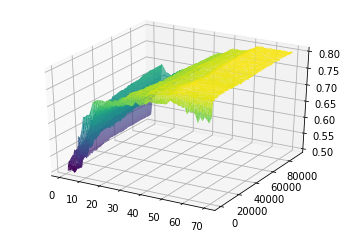

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(att,sz,RF_auc, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [67]:
l =[1,2,3]